## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env1 import TicTacToe# - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    
    actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0
    return state1

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, agent_act_space, time):
    epsilon = - 1/ (1 + np.exp((-time+7500000)/1700000)) + 1
    z = np.random.random()
    
    if z > epsilon:
        action = max(Q_dict[state],key=Q_dict[state].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        random_action_idx = np.random.choice(np.arange(len(agent_act_space))) 
        action = agent_act_space[random_action_idx] #Exploration: randomly choosing an action from agent action space
    
    return action




#### Tracking the state-action pairs for checking convergence - write your code here

In [6]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
sample_q_values = [("2-x-x-x-3-x-x-x-x",(7, 9)),("x-x-5-x-x-4-x-x-x",(3, 1)),("x-2-x-x-x-x-x-x-3",(5, 7)),("x-x-4-x-5-x-x-x-x",(3, 9)),("x-x-x-3-x-2-x-x-x",(1, 9)),("x-8-x-x-x-x-9-x-x",(3, 5)),("x-x-x-x-x-x-6-x-7",(1, 5)),("x-x-x-3-x-x-x-2-x",(8, 9)),("8-x-x-x-x-9-x-x-x",(6, 3)),("x-x-x-3-2-x-x-x-x",(1, 7)),("x-x-x-2-3-x-x-x-x",(1, 7))]
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

rewards_tracked = { q_value:[] for q_value in sample_q_values }

In [7]:
# Initialise states to be tracked
def initialise_tracking_states():
    nan=np.nan
    
    for q_values in sample_q_values:
        state=q_values[0]
        action=q_values[1]
        States_track[state][action]=[]
  
  
  
  

In [8]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [10]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [11]:
EPISODES = 100000
LR = 0.01                   #learning rate
GAMMA = 0.91

STEPS = 4                 #since agent has to make 5 moves
threshold = 2000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 3000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

### Q-update loop ---write your code here

In [12]:
start_time = time.time()
states_won = set()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe()      #creating an instance of the class
    #this initialises the state back to some initial value which is required for every new episode
    #this also initialises all parameters
    initial_state = Q_state(env.state)    #for the purpose of tracking reward
    curr_state = env.state     #current state is first move
    add_to_dict(curr_state)
    
    #reward is not calculated immediately
    time_step = 0
    reward = None
       
    total_reward = 0
    is_terminated = False
    while not is_terminated and time_step < STEPS:    #the episode will run only for a few steps and not infinitely
        print(episode, reward, status)
        Q_curr_state = Q_state(curr_state)
        agent_act_space, _ = env.action_space(curr_state)
        curr_action = epsilon_greedy(Q_curr_state, agent_act_space, episode+1)
        next_state, reward, is_terminated, status = env.step(curr_state, curr_action)
        
        if is_terminated:
            if status == 'Win':
                states_won.add(initial_state)
            Q_dict[Q_curr_state][curr_action] = reward
            # print(Q_curr_state, Q_dict[Q_curr_state], curr_action, Q_dict[Q_curr_state][curr_action] )
        else:
            Q_next_state = add_to_dict(next_state)
            # UPDATE RULE
            max_next = max(Q_dict[Q_next_state],key=Q_dict[Q_next_state].get) 

            #this gets the action corresponding to max q-value of next state
            Q_dict[Q_curr_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[Q_next_state][max_next]))) - Q_dict[Q_curr_state][curr_action] ) 

        total_reward += reward
        curr_state = next_state       #state(t) became state(t-1)
        time_step += 1
    
    #TRACKING REWARDS
    if initial_state in rewards_tracked:     #storing rewards
        rewards_tracked[initial_state].append(total_reward)
        #save_obj(rewards_tracked,'Rewards')

    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_obj(rewards_tracked,'Rewards')   
    
    #TRACKING Q-VALUES
    if (episode == threshold-1):        #at the 1999th episode
        initialise_tracking_states()
      
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')   
    
elapsed_time = time.time() - start_time
print("Time taken :", elapsed_time)
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

0 -1 Resume
0 10 Win
1 -1 Resume
1 -1 Resume
1 -1 Resume
1 0 Tie
2 -1 Resume
2 -10 Loss
3 -1 Resume
3 -1 Resume
3 -1 Resume
3 0 Tie
4 -1 Resume
4 -1 Resume
4 -1 Resume
4 0 Tie
5 -1 Resume
5 -1 Resume
5 -1 Resume
5 10 Win
6 -1 Resume
6 -10 Loss
7 -1 Resume
7 -10 Loss
8 -1 Resume
8 -1 Resume
8 -10 Loss
9 -1 Resume
9 -1 Resume
9 -1 Resume
9 0 Tie
10 -1 Resume
10 -1 Resume
10 10 Win
11 -1 Resume
11 -10 Loss
12 -1 Resume
12 -1 Resume
12 -1 Resume
12 0 Tie
13 -1 Resume
13 -1 Resume
13 -1 Resume
13 0 Tie
14 -1 Resume
14 -1 Resume
14 -10 Loss
15 -10 Loss
16 -1 Resume
16 -1 Resume
16 -1 Resume
16 0 Tie
17 -1 Resume
17 -1 Resume
17 -1 Resume
17 0 Tie
18 -1 Resume
18 -1 Resume
18 -1 Resume
18 0 Tie
19 -1 Resume
19 -1 Resume
19 -1 Resume
19 10 Win
20 -1 Resume
20 -10 Loss
21 -1 Resume
21 -1 Resume
21 -1 Resume
21 0 Tie
22 -1 Resume
22 -1 Resume
22 10 Win
23 -1 Resume
23 -1 Resume
23 -10 Loss
24 -1 Resume
24 -1 Resume
24 -1 Resume
24 0 Tie
25 -1 Resume
25 -1 Resume
25 -1 Resume
25 0 Tie
26 -1 Resum

204 -1 Resume
204 -1 Resume
204 0 Tie
205 -1 Resume
205 -1 Resume
205 -10 Loss
206 -1 Resume
206 -1 Resume
206 -10 Loss
207 -1 Resume
207 -1 Resume
207 10 Win
208 -1 Resume
208 10 Win
209 -1 Resume
209 -1 Resume
209 -1 Resume
209 0 Tie
210 -1 Resume
210 -1 Resume
210 -1 Resume
210 0 Tie
211 -1 Resume
211 -1 Resume
211 -1 Resume
211 10 Win
212 -1 Resume
212 -1 Resume
212 -1 Resume
212 0 Tie
213 -1 Resume
213 10 Win
214 -1 Resume
214 -1 Resume
214 -1 Resume
214 0 Tie
215 -10 Loss
216 -1 Resume
216 -1 Resume
216 -10 Loss
217 -1 Resume
217 -1 Resume
217 -10 Loss
218 -1 Resume
218 -1 Resume
218 -1 Resume
218 0 Tie
219 -1 Resume
219 -1 Resume
219 -1 Resume
219 10 Win
220 -1 Resume
220 -1 Resume
220 -1 Resume
220 0 Tie
221 -1 Resume
221 -1 Resume
221 -1 Resume
221 10 Win
222 -1 Resume
222 -1 Resume
222 -1 Resume
222 0 Tie
223 -1 Resume
223 -10 Loss
224 -1 Resume
224 -10 Loss
225 -1 Resume
225 -1 Resume
225 -1 Resume
225 0 Tie
226 -1 Resume
226 -1 Resume
226 -1 Resume
226 0 Tie
227 -1 Resume
2

402 -1 Resume
402 -1 Resume
402 -1 Resume
402 0 Tie
403 -1 Resume
403 -1 Resume
403 -1 Resume
403 0 Tie
404 -1 Resume
404 -1 Resume
404 -1 Resume
404 10 Win
405 -1 Resume
405 -1 Resume
405 -1 Resume
405 0 Tie
406 -1 Resume
406 -10 Loss
407 -1 Resume
407 -1 Resume
407 -1 Resume
407 10 Win
408 -1 Resume
408 -1 Resume
408 -1 Resume
408 10 Win
409 -1 Resume
409 -1 Resume
409 -1 Resume
409 0 Tie
410 -1 Resume
410 -1 Resume
410 -1 Resume
410 0 Tie
411 -1 Resume
411 -1 Resume
411 -1 Resume
411 0 Tie
412 -1 Resume
412 -1 Resume
412 -1 Resume
412 10 Win
413 -1 Resume
413 -1 Resume
413 -1 Resume
413 0 Tie
414 -1 Resume
414 -1 Resume
414 -1 Resume
414 0 Tie
415 -1 Resume
415 -1 Resume
415 -10 Loss
416 -1 Resume
416 10 Win
417 -1 Resume
417 -1 Resume
417 -1 Resume
417 0 Tie
418 -1 Resume
418 -1 Resume
418 -1 Resume
418 0 Tie
419 -1 Resume
419 -1 Resume
419 -1 Resume
419 0 Tie
420 -1 Resume
420 -1 Resume
420 -1 Resume
420 10 Win
421 -1 Resume
421 -1 Resume
421 -1 Resume
421 10 Win
422 -1 Resume
422

643 -1 Resume
643 10 Win
644 -1 Resume
644 -1 Resume
644 -1 Resume
644 0 Tie
645 -1 Resume
645 -1 Resume
645 -1 Resume
645 10 Win
646 -1 Resume
646 -1 Resume
646 -1 Resume
646 0 Tie
647 -1 Resume
647 -1 Resume
647 -1 Resume
647 0 Tie
648 -1 Resume
648 -1 Resume
648 10 Win
649 -1 Resume
649 10 Win
650 -1 Resume
650 -1 Resume
650 -10 Loss
651 -1 Resume
651 -1 Resume
651 -10 Loss
652 -1 Resume
652 -1 Resume
652 10 Win
653 -1 Resume
653 -1 Resume
653 -10 Loss
654 -1 Resume
654 -1 Resume
654 -1 Resume
654 0 Tie
655 -1 Resume
655 -1 Resume
655 -1 Resume
655 0 Tie
656 -1 Resume
656 -1 Resume
656 -10 Loss
657 -1 Resume
657 -1 Resume
657 -1 Resume
657 0 Tie
658 -1 Resume
658 -1 Resume
658 10 Win
659 -1 Resume
659 -1 Resume
659 -1 Resume
659 0 Tie
660 -1 Resume
660 -1 Resume
660 -10 Loss
661 -1 Resume
661 -1 Resume
661 -1 Resume
661 0 Tie
662 -1 Resume
662 10 Win
663 -1 Resume
663 -1 Resume
663 10 Win
664 -1 Resume
664 -1 Resume
664 -10 Loss
665 -1 Resume
665 -10 Loss
666 -1 Resume
666 -1 Resume

876 0 Tie
877 -1 Resume
877 -1 Resume
877 -1 Resume
877 0 Tie
878 -1 Resume
878 -1 Resume
878 10 Win
879 -1 Resume
879 -1 Resume
879 -1 Resume
879 0 Tie
880 -1 Resume
880 10 Win
881 -1 Resume
881 -1 Resume
881 -1 Resume
881 0 Tie
882 -1 Resume
882 -1 Resume
882 -1 Resume
882 0 Tie
883 -1 Resume
883 -1 Resume
883 -1 Resume
883 0 Tie
884 -1 Resume
884 -1 Resume
884 10 Win
885 -1 Resume
885 -1 Resume
885 -10 Loss
886 -1 Resume
886 -1 Resume
886 -1 Resume
886 0 Tie
887 -1 Resume
887 -1 Resume
887 -1 Resume
887 0 Tie
888 -1 Resume
888 -1 Resume
888 -10 Loss
889 -1 Resume
889 -1 Resume
889 -10 Loss
890 -1 Resume
890 -10 Loss
891 -1 Resume
891 -1 Resume
891 10 Win
892 -1 Resume
892 -1 Resume
892 -1 Resume
892 10 Win
893 -1 Resume
893 -10 Loss
894 -1 Resume
894 -1 Resume
894 -1 Resume
894 0 Tie
895 -1 Resume
895 -1 Resume
895 -1 Resume
895 0 Tie
896 -1 Resume
896 -1 Resume
896 -1 Resume
896 10 Win
897 -1 Resume
897 -1 Resume
897 -1 Resume
897 10 Win
898 -1 Resume
898 -1 Resume
898 -1 Resume
89

1095 -1 Resume
1095 10 Win
1096 -1 Resume
1096 -1 Resume
1096 -10 Loss
1097 -1 Resume
1097 -1 Resume
1097 -1 Resume
1097 10 Win
1098 -1 Resume
1098 -10 Loss
1099 -1 Resume
1099 -10 Loss
1100 -1 Resume
1100 -1 Resume
1100 -1 Resume
1100 0 Tie
1101 -1 Resume
1101 -1 Resume
1101 -1 Resume
1101 0 Tie
1102 -1 Resume
1102 10 Win
1103 -1 Resume
1103 -1 Resume
1103 -10 Loss
1104 -1 Resume
1104 -1 Resume
1104 -1 Resume
1104 0 Tie
1105 -1 Resume
1105 -1 Resume
1105 -1 Resume
1105 0 Tie
1106 -1 Resume
1106 -1 Resume
1106 -1 Resume
1106 0 Tie
1107 -1 Resume
1107 -1 Resume
1107 -1 Resume
1107 0 Tie
1108 -1 Resume
1108 10 Win
1109 -1 Resume
1109 -1 Resume
1109 10 Win
1110 -1 Resume
1110 -1 Resume
1110 -10 Loss
1111 -1 Resume
1111 -1 Resume
1111 -1 Resume
1111 0 Tie
1112 -1 Resume
1112 -1 Resume
1112 -10 Loss
1113 -1 Resume
1113 -1 Resume
1113 -10 Loss
1114 -1 Resume
1114 -10 Loss
1115 -1 Resume
1115 -1 Resume
1115 -10 Loss
1116 -1 Resume
1116 -1 Resume
1116 -1 Resume
1116 10 Win
1117 -1 Resume
1117 

1279 -1 Resume
1279 -1 Resume
1279 -1 Resume
1279 10 Win
1280 -1 Resume
1280 -1 Resume
1280 -1 Resume
1280 0 Tie
1281 -1 Resume
1281 -1 Resume
1281 -1 Resume
1281 10 Win
1282 -1 Resume
1282 -1 Resume
1282 10 Win
1283 -1 Resume
1283 -10 Loss
1284 -1 Resume
1284 -1 Resume
1284 -1 Resume
1284 0 Tie
1285 -1 Resume
1285 -1 Resume
1285 -1 Resume
1285 0 Tie
1286 -1 Resume
1286 10 Win
1287 -1 Resume
1287 -1 Resume
1287 -1 Resume
1287 0 Tie
1288 -1 Resume
1288 -1 Resume
1288 10 Win
1289 -1 Resume
1289 -1 Resume
1289 -1 Resume
1289 0 Tie
1290 -1 Resume
1290 -1 Resume
1290 -1 Resume
1290 0 Tie
1291 -1 Resume
1291 -1 Resume
1291 10 Win
1292 -1 Resume
1292 -1 Resume
1292 -10 Loss
1293 -1 Resume
1293 -1 Resume
1293 -1 Resume
1293 0 Tie
1294 -1 Resume
1294 -1 Resume
1294 -1 Resume
1294 0 Tie
1295 -1 Resume
1295 -1 Resume
1295 -1 Resume
1295 0 Tie
1296 -1 Resume
1296 -1 Resume
1296 -1 Resume
1296 0 Tie
1297 -1 Resume
1297 -1 Resume
1297 -1 Resume
1297 0 Tie
1298 -1 Resume
1298 10 Win
1299 -1 Resume
12

1463 -1 Resume
1463 0 Tie
1464 -1 Resume
1464 -1 Resume
1464 -1 Resume
1464 0 Tie
1465 -1 Resume
1465 -10 Loss
1466 -1 Resume
1466 -1 Resume
1466 -1 Resume
1466 0 Tie
1467 -1 Resume
1467 -1 Resume
1467 -1 Resume
1467 0 Tie
1468 -1 Resume
1468 -1 Resume
1468 -1 Resume
1468 0 Tie
1469 -10 Loss
1470 -1 Resume
1470 -1 Resume
1470 -1 Resume
1470 0 Tie
1471 -1 Resume
1471 -1 Resume
1471 -10 Loss
1472 -1 Resume
1472 -10 Loss
1473 -1 Resume
1473 -1 Resume
1473 -1 Resume
1473 0 Tie
1474 -1 Resume
1474 -1 Resume
1474 -1 Resume
1474 0 Tie
1475 -1 Resume
1475 -1 Resume
1475 -1 Resume
1475 10 Win
1476 -1 Resume
1476 -1 Resume
1476 -1 Resume
1476 0 Tie
1477 -1 Resume
1477 -1 Resume
1477 -1 Resume
1477 10 Win
1478 -1 Resume
1478 -10 Loss
1479 -1 Resume
1479 -1 Resume
1479 -1 Resume
1479 0 Tie
1480 -1 Resume
1480 -1 Resume
1480 -10 Loss
1481 -1 Resume
1481 -1 Resume
1481 -1 Resume
1481 0 Tie
1482 -1 Resume
1482 -1 Resume
1482 -1 Resume
1482 0 Tie
1483 -1 Resume
1483 -1 Resume
1483 -1 Resume
1483 0 Tie

1662 -1 Resume
1662 0 Tie
1663 -1 Resume
1663 -1 Resume
1663 -1 Resume
1663 0 Tie
1664 -1 Resume
1664 -1 Resume
1664 -10 Loss
1665 -1 Resume
1665 -1 Resume
1665 -1 Resume
1665 0 Tie
1666 -1 Resume
1666 -1 Resume
1666 -10 Loss
1667 -1 Resume
1667 -1 Resume
1667 -1 Resume
1667 0 Tie
1668 -1 Resume
1668 -1 Resume
1668 -1 Resume
1668 0 Tie
1669 -1 Resume
1669 10 Win
1670 -1 Resume
1670 -1 Resume
1670 -1 Resume
1670 0 Tie
1671 -1 Resume
1671 -1 Resume
1671 -1 Resume
1671 0 Tie
1672 -1 Resume
1672 -10 Loss
1673 -1 Resume
1673 -10 Loss
1674 -1 Resume
1674 -1 Resume
1674 -1 Resume
1674 0 Tie
1675 -1 Resume
1675 -1 Resume
1675 -1 Resume
1675 10 Win
1676 -1 Resume
1676 -1 Resume
1676 -1 Resume
1676 0 Tie
1677 -1 Resume
1677 -1 Resume
1677 -1 Resume
1677 0 Tie
1678 -1 Resume
1678 10 Win
1679 -1 Resume
1679 -1 Resume
1679 -10 Loss
1680 -1 Resume
1680 -1 Resume
1680 -1 Resume
1680 10 Win
1681 -1 Resume
1681 -1 Resume
1681 -10 Loss
1682 -1 Resume
1682 -1 Resume
1682 -1 Resume
1682 0 Tie
1683 -1 Resu

1867 -10 Loss
1868 -1 Resume
1868 -1 Resume
1868 -10 Loss
1869 -1 Resume
1869 -1 Resume
1869 -1 Resume
1869 0 Tie
1870 -1 Resume
1870 -1 Resume
1870 -1 Resume
1870 0 Tie
1871 -1 Resume
1871 -1 Resume
1871 -1 Resume
1871 10 Win
1872 -1 Resume
1872 -1 Resume
1872 -1 Resume
1872 0 Tie
1873 -1 Resume
1873 -1 Resume
1873 -1 Resume
1873 10 Win
1874 -1 Resume
1874 -1 Resume
1874 -1 Resume
1874 0 Tie
1875 -1 Resume
1875 -1 Resume
1875 -1 Resume
1875 0 Tie
1876 -1 Resume
1876 -1 Resume
1876 -1 Resume
1876 0 Tie
1877 -1 Resume
1877 -1 Resume
1877 -1 Resume
1877 0 Tie
1878 -1 Resume
1878 -1 Resume
1878 -1 Resume
1878 0 Tie
1879 -1 Resume
1879 -1 Resume
1879 -1 Resume
1879 0 Tie
1880 -1 Resume
1880 -1 Resume
1880 -1 Resume
1880 0 Tie
1881 -1 Resume
1881 -1 Resume
1881 -1 Resume
1881 0 Tie
1882 -1 Resume
1882 -1 Resume
1882 -1 Resume
1882 0 Tie
1883 -1 Resume
1883 -10 Loss
1884 -1 Resume
1884 -1 Resume
1884 10 Win
1885 -1 Resume
1885 -1 Resume
1885 -1 Resume
1885 0 Tie
1886 -1 Resume
1886 -1 Resume

2075 -1 Resume
2075 0 Tie
2076 -1 Resume
2076 -1 Resume
2076 -1 Resume
2076 0 Tie
2077 -1 Resume
2077 -1 Resume
2077 -1 Resume
2077 0 Tie
2078 -10 Loss
2079 -1 Resume
2079 -1 Resume
2079 -1 Resume
2079 0 Tie
2080 -1 Resume
2080 -1 Resume
2080 -1 Resume
2080 0 Tie
2081 -1 Resume
2081 -1 Resume
2081 -1 Resume
2081 0 Tie
2082 -1 Resume
2082 -1 Resume
2082 -10 Loss
2083 -1 Resume
2083 -1 Resume
2083 -10 Loss
2084 -1 Resume
2084 -1 Resume
2084 -1 Resume
2084 0 Tie
2085 -1 Resume
2085 -1 Resume
2085 -1 Resume
2085 0 Tie
2086 -1 Resume
2086 -1 Resume
2086 -1 Resume
2086 0 Tie
2087 -1 Resume
2087 -1 Resume
2087 -10 Loss
2088 -1 Resume
2088 -10 Loss
2089 -1 Resume
2089 -1 Resume
2089 -1 Resume
2089 0 Tie
2090 -1 Resume
2090 -10 Loss
2091 -10 Loss
2092 -10 Loss
2093 -10 Loss
2094 -1 Resume
2094 -1 Resume
2094 -1 Resume
2094 0 Tie
2095 -1 Resume
2095 10 Win
2096 -1 Resume
2096 -1 Resume
2096 -10 Loss
2097 -1 Resume
2097 -1 Resume
2097 -10 Loss
2098 -1 Resume
2098 -1 Resume
2098 -1 Resume
2098 0 T

2285 0 Tie
2286 -1 Resume
2286 -1 Resume
2286 10 Win
2287 -1 Resume
2287 -1 Resume
2287 -10 Loss
2288 -1 Resume
2288 -1 Resume
2288 10 Win
2289 -1 Resume
2289 -1 Resume
2289 -1 Resume
2289 0 Tie
2290 -1 Resume
2290 -1 Resume
2290 -1 Resume
2290 0 Tie
2291 -1 Resume
2291 -1 Resume
2291 -10 Loss
2292 -1 Resume
2292 -1 Resume
2292 -1 Resume
2292 0 Tie
2293 -1 Resume
2293 -1 Resume
2293 -1 Resume
2293 0 Tie
2294 -10 Loss
2295 -1 Resume
2295 10 Win
2296 -1 Resume
2296 -1 Resume
2296 10 Win
2297 -1 Resume
2297 -10 Loss
2298 -1 Resume
2298 -1 Resume
2298 -1 Resume
2298 0 Tie
2299 -1 Resume
2299 10 Win
2300 -10 Loss
2301 -1 Resume
2301 -1 Resume
2301 -1 Resume
2301 10 Win
2302 -1 Resume
2302 -10 Loss
2303 -1 Resume
2303 -10 Loss
2304 -1 Resume
2304 -10 Loss
2305 -1 Resume
2305 -1 Resume
2305 -10 Loss
2306 -1 Resume
2306 -1 Resume
2306 -10 Loss
2307 -1 Resume
2307 -1 Resume
2307 -1 Resume
2307 0 Tie
2308 -1 Resume
2308 -1 Resume
2308 -1 Resume
2308 10 Win
2309 -1 Resume
2309 -1 Resume
2309 -1 R

2458 -1 Resume
2458 10 Win
2459 -1 Resume
2459 -1 Resume
2459 -1 Resume
2459 0 Tie
2460 -1 Resume
2460 -1 Resume
2460 -1 Resume
2460 10 Win
2461 -1 Resume
2461 -1 Resume
2461 -1 Resume
2461 0 Tie
2462 -1 Resume
2462 10 Win
2463 -1 Resume
2463 -1 Resume
2463 -1 Resume
2463 10 Win
2464 -1 Resume
2464 -1 Resume
2464 -1 Resume
2464 0 Tie
2465 -1 Resume
2465 -1 Resume
2465 -1 Resume
2465 0 Tie
2466 -1 Resume
2466 -1 Resume
2466 -1 Resume
2466 0 Tie
2467 -1 Resume
2467 -1 Resume
2467 -1 Resume
2467 0 Tie
2468 -1 Resume
2468 -1 Resume
2468 -1 Resume
2468 0 Tie
2469 -1 Resume
2469 -1 Resume
2469 -1 Resume
2469 10 Win
2470 -1 Resume
2470 -1 Resume
2470 -10 Loss
2471 -1 Resume
2471 -1 Resume
2471 -1 Resume
2471 0 Tie
2472 -10 Loss
2473 -1 Resume
2473 -1 Resume
2473 10 Win
2474 -1 Resume
2474 -1 Resume
2474 -1 Resume
2474 0 Tie
2475 -1 Resume
2475 -1 Resume
2475 -1 Resume
2475 0 Tie
2476 -1 Resume
2476 -10 Loss
2477 -1 Resume
2477 -1 Resume
2477 -1 Resume
2477 0 Tie
2478 -1 Resume
2478 -1 Resume


2629 0 Tie
2630 -1 Resume
2630 -1 Resume
2630 -1 Resume
2630 0 Tie
2631 -1 Resume
2631 -1 Resume
2631 -1 Resume
2631 10 Win
2632 -1 Resume
2632 -1 Resume
2632 -1 Resume
2632 0 Tie
2633 -10 Loss
2634 -1 Resume
2634 -1 Resume
2634 -1 Resume
2634 0 Tie
2635 -1 Resume
2635 -1 Resume
2635 -1 Resume
2635 0 Tie
2636 -1 Resume
2636 -1 Resume
2636 -1 Resume
2636 10 Win
2637 -1 Resume
2637 -1 Resume
2637 -1 Resume
2637 0 Tie
2638 -1 Resume
2638 -1 Resume
2638 -1 Resume
2638 0 Tie
2639 -1 Resume
2639 -1 Resume
2639 -10 Loss
2640 -1 Resume
2640 -1 Resume
2640 10 Win
2641 -1 Resume
2641 -1 Resume
2641 -10 Loss
2642 -1 Resume
2642 -1 Resume
2642 -1 Resume
2642 0 Tie
2643 -1 Resume
2643 -1 Resume
2643 -1 Resume
2643 0 Tie
2644 -1 Resume
2644 -1 Resume
2644 -1 Resume
2644 0 Tie
2645 -1 Resume
2645 -1 Resume
2645 -1 Resume
2645 0 Tie
2646 -1 Resume
2646 -1 Resume
2646 -10 Loss
2647 -1 Resume
2647 -1 Resume
2647 -10 Loss
2648 -1 Resume
2648 -1 Resume
2648 -10 Loss
2649 -1 Resume
2649 -1 Resume
2649 -1 R

2841 -1 Resume
2841 -1 Resume
2841 -1 Resume
2841 0 Tie
2842 -1 Resume
2842 -1 Resume
2842 -10 Loss
2843 -1 Resume
2843 -1 Resume
2843 -1 Resume
2843 0 Tie
2844 -1 Resume
2844 -1 Resume
2844 -10 Loss
2845 -1 Resume
2845 -1 Resume
2845 -1 Resume
2845 0 Tie
2846 -1 Resume
2846 -10 Loss
2847 -1 Resume
2847 -1 Resume
2847 -1 Resume
2847 0 Tie
2848 -1 Resume
2848 -1 Resume
2848 -1 Resume
2848 0 Tie
2849 -1 Resume
2849 -1 Resume
2849 -1 Resume
2849 0 Tie
2850 -1 Resume
2850 -1 Resume
2850 -1 Resume
2850 10 Win
2851 -1 Resume
2851 -1 Resume
2851 -1 Resume
2851 0 Tie
2852 -1 Resume
2852 -1 Resume
2852 -1 Resume
2852 0 Tie
2853 -1 Resume
2853 -1 Resume
2853 -1 Resume
2853 10 Win
2854 -1 Resume
2854 -1 Resume
2854 -10 Loss
2855 -1 Resume
2855 10 Win
2856 -1 Resume
2856 -1 Resume
2856 -1 Resume
2856 0 Tie
2857 -1 Resume
2857 -10 Loss
2858 -1 Resume
2858 -1 Resume
2858 -1 Resume
2858 0 Tie
2859 -10 Loss
2860 -1 Resume
2860 -1 Resume
2860 -1 Resume
2860 10 Win
2861 -1 Resume
2861 -1 Resume
2861 -1 

3045 -1 Resume
3045 -1 Resume
3045 0 Tie
3046 -1 Resume
3046 -1 Resume
3046 -1 Resume
3046 10 Win
3047 -1 Resume
3047 -1 Resume
3047 -10 Loss
3048 -1 Resume
3048 -1 Resume
3048 -10 Loss
3049 -1 Resume
3049 -10 Loss
3050 -1 Resume
3050 -1 Resume
3050 -1 Resume
3050 10 Win
3051 -1 Resume
3051 -1 Resume
3051 -1 Resume
3051 0 Tie
3052 -1 Resume
3052 -1 Resume
3052 -1 Resume
3052 0 Tie
3053 -1 Resume
3053 -10 Loss
3054 -1 Resume
3054 -1 Resume
3054 -10 Loss
3055 -10 Loss
3056 -1 Resume
3056 -1 Resume
3056 -1 Resume
3056 0 Tie
3057 -1 Resume
3057 10 Win
3058 -1 Resume
3058 -1 Resume
3058 10 Win
3059 -1 Resume
3059 -1 Resume
3059 -1 Resume
3059 0 Tie
3060 -1 Resume
3060 -1 Resume
3060 -1 Resume
3060 0 Tie
3061 -1 Resume
3061 -1 Resume
3061 -10 Loss
3062 -1 Resume
3062 -1 Resume
3062 -10 Loss
3063 -1 Resume
3063 -1 Resume
3063 -1 Resume
3063 10 Win
3064 -1 Resume
3064 -1 Resume
3064 -1 Resume
3064 0 Tie
3065 -1 Resume
3065 -1 Resume
3065 -1 Resume
3065 10 Win
3066 -1 Resume
3066 -10 Loss
3067 

3262 -1 Resume
3262 -10 Loss
3263 -1 Resume
3263 -1 Resume
3263 -1 Resume
3263 10 Win
3264 -1 Resume
3264 -1 Resume
3264 -10 Loss
3265 -1 Resume
3265 -1 Resume
3265 -1 Resume
3265 0 Tie
3266 -1 Resume
3266 -1 Resume
3266 -1 Resume
3266 0 Tie
3267 -1 Resume
3267 -10 Loss
3268 -1 Resume
3268 -1 Resume
3268 10 Win
3269 -1 Resume
3269 -1 Resume
3269 10 Win
3270 -1 Resume
3270 -1 Resume
3270 -1 Resume
3270 10 Win
3271 -1 Resume
3271 -1 Resume
3271 -10 Loss
3272 -1 Resume
3272 -10 Loss
3273 -1 Resume
3273 -1 Resume
3273 -1 Resume
3273 10 Win
3274 -1 Resume
3274 -1 Resume
3274 -1 Resume
3274 0 Tie
3275 -1 Resume
3275 -1 Resume
3275 -1 Resume
3275 10 Win
3276 -1 Resume
3276 -1 Resume
3276 -1 Resume
3276 0 Tie
3277 -1 Resume
3277 -1 Resume
3277 -1 Resume
3277 0 Tie
3278 -1 Resume
3278 -1 Resume
3278 -1 Resume
3278 0 Tie
3279 -1 Resume
3279 -10 Loss
3280 -1 Resume
3280 -1 Resume
3280 -1 Resume
3280 0 Tie
3281 -1 Resume
3281 -1 Resume
3281 -1 Resume
3281 0 Tie
3282 -1 Resume
3282 -10 Loss
3283 -1

3439 -1 Resume
3439 -1 Resume
3439 -1 Resume
3439 0 Tie
3440 -1 Resume
3440 -1 Resume
3440 -10 Loss
3441 -1 Resume
3441 -1 Resume
3441 -10 Loss
3442 -1 Resume
3442 -1 Resume
3442 -1 Resume
3442 10 Win
3443 -1 Resume
3443 -1 Resume
3443 -1 Resume
3443 0 Tie
3444 -1 Resume
3444 -1 Resume
3444 -10 Loss
3445 -1 Resume
3445 -10 Loss
3446 -1 Resume
3446 -1 Resume
3446 -1 Resume
3446 0 Tie
3447 -1 Resume
3447 -1 Resume
3447 -1 Resume
3447 10 Win
3448 -1 Resume
3448 -1 Resume
3448 -1 Resume
3448 10 Win
3449 -1 Resume
3449 -10 Loss
3450 -1 Resume
3450 -1 Resume
3450 10 Win
3451 -1 Resume
3451 -10 Loss
3452 -1 Resume
3452 -1 Resume
3452 -1 Resume
3452 0 Tie
3453 -1 Resume
3453 -1 Resume
3453 -1 Resume
3453 0 Tie
3454 -1 Resume
3454 -1 Resume
3454 -1 Resume
3454 0 Tie
3455 -10 Loss
3456 -1 Resume
3456 10 Win
3457 -10 Loss
3458 -1 Resume
3458 -1 Resume
3458 -10 Loss
3459 -1 Resume
3459 -1 Resume
3459 -1 Resume
3459 0 Tie
3460 -1 Resume
3460 -1 Resume
3460 -1 Resume
3460 10 Win
3461 -1 Resume
3461 

3659 -1 Resume
3659 -10 Loss
3660 -1 Resume
3660 -1 Resume
3660 -10 Loss
3661 -10 Loss
3662 -10 Loss
3663 -1 Resume
3663 -1 Resume
3663 -1 Resume
3663 0 Tie
3664 -1 Resume
3664 -1 Resume
3664 -1 Resume
3664 10 Win
3665 -1 Resume
3665 -1 Resume
3665 -1 Resume
3665 0 Tie
3666 -1 Resume
3666 -1 Resume
3666 -1 Resume
3666 0 Tie
3667 -10 Loss
3668 -1 Resume
3668 -1 Resume
3668 -10 Loss
3669 -1 Resume
3669 -1 Resume
3669 10 Win
3670 -1 Resume
3670 -1 Resume
3670 -1 Resume
3670 0 Tie
3671 -1 Resume
3671 -1 Resume
3671 -1 Resume
3671 0 Tie
3672 -1 Resume
3672 -1 Resume
3672 -1 Resume
3672 0 Tie
3673 -1 Resume
3673 -1 Resume
3673 -1 Resume
3673 0 Tie
3674 -1 Resume
3674 -10 Loss
3675 -1 Resume
3675 10 Win
3676 -1 Resume
3676 -10 Loss
3677 -1 Resume
3677 10 Win
3678 -1 Resume
3678 -1 Resume
3678 -1 Resume
3678 0 Tie
3679 -1 Resume
3679 10 Win
3680 -1 Resume
3680 -1 Resume
3680 10 Win
3681 -1 Resume
3681 -1 Resume
3681 -1 Resume
3681 0 Tie
3682 -1 Resume
3682 -1 Resume
3682 -1 Resume
3682 0 Tie
3

3837 -1 Resume
3837 -1 Resume
3837 -1 Resume
3837 0 Tie
3838 -1 Resume
3838 -1 Resume
3838 -1 Resume
3838 10 Win
3839 -1 Resume
3839 -10 Loss
3840 -1 Resume
3840 -1 Resume
3840 -1 Resume
3840 0 Tie
3841 -1 Resume
3841 -1 Resume
3841 -10 Loss
3842 -1 Resume
3842 -1 Resume
3842 -1 Resume
3842 0 Tie
3843 -1 Resume
3843 -1 Resume
3843 -1 Resume
3843 0 Tie
3844 -1 Resume
3844 -1 Resume
3844 -10 Loss
3845 -1 Resume
3845 -1 Resume
3845 -1 Resume
3845 0 Tie
3846 -1 Resume
3846 -1 Resume
3846 -1 Resume
3846 10 Win
3847 -1 Resume
3847 -1 Resume
3847 -1 Resume
3847 0 Tie
3848 -1 Resume
3848 -1 Resume
3848 -1 Resume
3848 0 Tie
3849 -1 Resume
3849 -1 Resume
3849 -10 Loss
3850 -1 Resume
3850 -1 Resume
3850 -10 Loss
3851 -1 Resume
3851 -1 Resume
3851 -1 Resume
3851 10 Win
3852 -1 Resume
3852 -1 Resume
3852 -1 Resume
3852 10 Win
3853 -1 Resume
3853 -1 Resume
3853 10 Win
3854 -1 Resume
3854 -1 Resume
3854 -1 Resume
3854 0 Tie
3855 -10 Loss
3856 -1 Resume
3856 -1 Resume
3856 -10 Loss
3857 -1 Resume
3857

4057 0 Tie
4058 -1 Resume
4058 -1 Resume
4058 -1 Resume
4058 0 Tie
4059 -1 Resume
4059 -1 Resume
4059 -1 Resume
4059 0 Tie
4060 -1 Resume
4060 -1 Resume
4060 -1 Resume
4060 0 Tie
4061 -1 Resume
4061 -1 Resume
4061 -1 Resume
4061 10 Win
4062 -1 Resume
4062 -1 Resume
4062 -1 Resume
4062 0 Tie
4063 -1 Resume
4063 -1 Resume
4063 -10 Loss
4064 -1 Resume
4064 -1 Resume
4064 -10 Loss
4065 -1 Resume
4065 -10 Loss
4066 -1 Resume
4066 -1 Resume
4066 -1 Resume
4066 0 Tie
4067 -1 Resume
4067 -1 Resume
4067 -1 Resume
4067 0 Tie
4068 -1 Resume
4068 -10 Loss
4069 -1 Resume
4069 -1 Resume
4069 -1 Resume
4069 0 Tie
4070 -1 Resume
4070 -1 Resume
4070 -1 Resume
4070 10 Win
4071 -1 Resume
4071 -1 Resume
4071 -10 Loss
4072 -1 Resume
4072 -1 Resume
4072 -10 Loss
4073 -1 Resume
4073 -1 Resume
4073 -1 Resume
4073 0 Tie
4074 -1 Resume
4074 -1 Resume
4074 -1 Resume
4074 10 Win
4075 -1 Resume
4075 -1 Resume
4075 10 Win
4076 -1 Resume
4076 -10 Loss
4077 -1 Resume
4077 -1 Resume
4077 -1 Resume
4077 0 Tie
4078 -1 R

4294 -1 Resume
4294 0 Tie
4295 -1 Resume
4295 -1 Resume
4295 -10 Loss
4296 -1 Resume
4296 -1 Resume
4296 -1 Resume
4296 0 Tie
4297 -1 Resume
4297 -1 Resume
4297 -1 Resume
4297 0 Tie
4298 -1 Resume
4298 -1 Resume
4298 -1 Resume
4298 10 Win
4299 -1 Resume
4299 10 Win
4300 -1 Resume
4300 -1 Resume
4300 -10 Loss
4301 -1 Resume
4301 -1 Resume
4301 -1 Resume
4301 0 Tie
4302 -1 Resume
4302 -10 Loss
4303 -1 Resume
4303 -1 Resume
4303 -1 Resume
4303 0 Tie
4304 -1 Resume
4304 -1 Resume
4304 -1 Resume
4304 0 Tie
4305 -1 Resume
4305 -1 Resume
4305 10 Win
4306 -1 Resume
4306 -1 Resume
4306 -1 Resume
4306 0 Tie
4307 -1 Resume
4307 -1 Resume
4307 -1 Resume
4307 0 Tie
4308 -10 Loss
4309 -1 Resume
4309 -1 Resume
4309 -1 Resume
4309 0 Tie
4310 -1 Resume
4310 -10 Loss
4311 -1 Resume
4311 -10 Loss
4312 -1 Resume
4312 -1 Resume
4312 -10 Loss
4313 -1 Resume
4313 -1 Resume
4313 -1 Resume
4313 0 Tie
4314 -1 Resume
4314 -1 Resume
4314 -1 Resume
4314 0 Tie
4315 -1 Resume
4315 -1 Resume
4315 -1 Resume
4315 0 Tie

4520 -1 Resume
4520 -1 Resume
4520 0 Tie
4521 -1 Resume
4521 -1 Resume
4521 -1 Resume
4521 0 Tie
4522 -1 Resume
4522 -1 Resume
4522 -1 Resume
4522 0 Tie
4523 -1 Resume
4523 -1 Resume
4523 -1 Resume
4523 0 Tie
4524 -1 Resume
4524 -1 Resume
4524 10 Win
4525 -1 Resume
4525 -10 Loss
4526 -1 Resume
4526 -1 Resume
4526 10 Win
4527 -1 Resume
4527 -1 Resume
4527 -10 Loss
4528 -1 Resume
4528 -1 Resume
4528 -1 Resume
4528 0 Tie
4529 -1 Resume
4529 -1 Resume
4529 -1 Resume
4529 0 Tie
4530 -1 Resume
4530 -1 Resume
4530 -1 Resume
4530 0 Tie
4531 -1 Resume
4531 -1 Resume
4531 -1 Resume
4531 0 Tie
4532 -10 Loss
4533 -1 Resume
4533 -1 Resume
4533 -10 Loss
4534 -10 Loss
4535 -1 Resume
4535 -1 Resume
4535 -1 Resume
4535 10 Win
4536 -1 Resume
4536 10 Win
4537 -1 Resume
4537 -1 Resume
4537 -1 Resume
4537 0 Tie
4538 -1 Resume
4538 -1 Resume
4538 -1 Resume
4538 0 Tie
4539 -1 Resume
4539 -10 Loss
4540 -1 Resume
4540 10 Win
4541 -1 Resume
4541 -1 Resume
4541 10 Win
4542 -1 Resume
4542 -1 Resume
4542 -1 Resume

4714 0 Tie
4715 -1 Resume
4715 -10 Loss
4716 -1 Resume
4716 -1 Resume
4716 -1 Resume
4716 10 Win
4717 -1 Resume
4717 -1 Resume
4717 -1 Resume
4717 0 Tie
4718 -1 Resume
4718 -1 Resume
4718 -1 Resume
4718 10 Win
4719 -1 Resume
4719 -1 Resume
4719 -1 Resume
4719 0 Tie
4720 -1 Resume
4720 -1 Resume
4720 -1 Resume
4720 10 Win
4721 -1 Resume
4721 -1 Resume
4721 -1 Resume
4721 10 Win
4722 -1 Resume
4722 -1 Resume
4722 -1 Resume
4722 0 Tie
4723 -1 Resume
4723 -1 Resume
4723 -1 Resume
4723 0 Tie
4724 -10 Loss
4725 -1 Resume
4725 -10 Loss
4726 -1 Resume
4726 -1 Resume
4726 -1 Resume
4726 0 Tie
4727 -1 Resume
4727 -1 Resume
4727 -10 Loss
4728 -1 Resume
4728 -1 Resume
4728 10 Win
4729 -1 Resume
4729 -1 Resume
4729 10 Win
4730 -1 Resume
4730 10 Win
4731 -1 Resume
4731 10 Win
4732 -1 Resume
4732 -1 Resume
4732 10 Win
4733 -1 Resume
4733 -1 Resume
4733 -1 Resume
4733 10 Win
4734 -1 Resume
4734 -1 Resume
4734 -1 Resume
4734 0 Tie
4735 -1 Resume
4735 -1 Resume
4735 -1 Resume
4735 0 Tie
4736 -1 Resume
4

4971 -1 Resume
4971 10 Win
4972 -1 Resume
4972 -1 Resume
4972 -1 Resume
4972 0 Tie
4973 -1 Resume
4973 -1 Resume
4973 -1 Resume
4973 0 Tie
4974 -1 Resume
4974 -1 Resume
4974 -1 Resume
4974 10 Win
4975 -10 Loss
4976 -1 Resume
4976 -1 Resume
4976 -10 Loss
4977 -1 Resume
4977 -1 Resume
4977 -1 Resume
4977 0 Tie
4978 -1 Resume
4978 -1 Resume
4978 -1 Resume
4978 0 Tie
4979 -10 Loss
4980 -1 Resume
4980 -1 Resume
4980 10 Win
4981 -1 Resume
4981 -1 Resume
4981 -1 Resume
4981 10 Win
4982 -1 Resume
4982 -1 Resume
4982 -1 Resume
4982 10 Win
4983 -1 Resume
4983 -1 Resume
4983 -1 Resume
4983 0 Tie
4984 -1 Resume
4984 -1 Resume
4984 -1 Resume
4984 0 Tie
4985 -1 Resume
4985 -1 Resume
4985 -1 Resume
4985 0 Tie
4986 -1 Resume
4986 -1 Resume
4986 -1 Resume
4986 10 Win
4987 -1 Resume
4987 -1 Resume
4987 -1 Resume
4987 0 Tie
4988 -1 Resume
4988 -1 Resume
4988 -1 Resume
4988 10 Win
4989 -1 Resume
4989 -1 Resume
4989 -1 Resume
4989 0 Tie
4990 -1 Resume
4990 -1 Resume
4990 -1 Resume
4990 0 Tie
4991 -1 Resume

5155 10 Win
5156 -1 Resume
5156 -1 Resume
5156 -1 Resume
5156 0 Tie
5157 -1 Resume
5157 -1 Resume
5157 -10 Loss
5158 -1 Resume
5158 -1 Resume
5158 -1 Resume
5158 0 Tie
5159 -1 Resume
5159 10 Win
5160 -1 Resume
5160 -10 Loss
5161 -1 Resume
5161 -1 Resume
5161 -1 Resume
5161 10 Win
5162 -10 Loss
5163 -1 Resume
5163 -1 Resume
5163 -1 Resume
5163 0 Tie
5164 -1 Resume
5164 -1 Resume
5164 -1 Resume
5164 0 Tie
5165 -10 Loss
5166 -1 Resume
5166 -1 Resume
5166 -1 Resume
5166 0 Tie
5167 -1 Resume
5167 -1 Resume
5167 -1 Resume
5167 0 Tie
5168 -1 Resume
5168 -1 Resume
5168 -1 Resume
5168 0 Tie
5169 -1 Resume
5169 -1 Resume
5169 -1 Resume
5169 0 Tie
5170 -1 Resume
5170 -10 Loss
5171 -1 Resume
5171 -1 Resume
5171 -10 Loss
5172 -1 Resume
5172 -1 Resume
5172 10 Win
5173 -1 Resume
5173 -1 Resume
5173 -1 Resume
5173 0 Tie
5174 -1 Resume
5174 -1 Resume
5174 -1 Resume
5174 0 Tie
5175 -1 Resume
5175 -1 Resume
5175 -1 Resume
5175 0 Tie
5176 -1 Resume
5176 -1 Resume
5176 -10 Loss
5177 -1 Resume
5177 -10 Loss

5348 -1 Resume
5348 -1 Resume
5348 0 Tie
5349 -1 Resume
5349 -10 Loss
5350 -1 Resume
5350 -1 Resume
5350 10 Win
5351 -1 Resume
5351 -1 Resume
5351 -10 Loss
5352 -1 Resume
5352 -1 Resume
5352 -1 Resume
5352 0 Tie
5353 -1 Resume
5353 -10 Loss
5354 -1 Resume
5354 -1 Resume
5354 -1 Resume
5354 10 Win
5355 -1 Resume
5355 -10 Loss
5356 -1 Resume
5356 -1 Resume
5356 -1 Resume
5356 0 Tie
5357 -1 Resume
5357 -1 Resume
5357 10 Win
5358 -1 Resume
5358 -1 Resume
5358 -1 Resume
5358 0 Tie
5359 -1 Resume
5359 -1 Resume
5359 -1 Resume
5359 0 Tie
5360 -1 Resume
5360 -1 Resume
5360 -1 Resume
5360 0 Tie
5361 -1 Resume
5361 -1 Resume
5361 -1 Resume
5361 0 Tie
5362 -1 Resume
5362 -1 Resume
5362 -1 Resume
5362 0 Tie
5363 -1 Resume
5363 -1 Resume
5363 -1 Resume
5363 0 Tie
5364 -1 Resume
5364 -1 Resume
5364 -10 Loss
5365 -1 Resume
5365 -1 Resume
5365 -1 Resume
5365 0 Tie
5366 -1 Resume
5366 -1 Resume
5366 -1 Resume
5366 10 Win
5367 -1 Resume
5367 -1 Resume
5367 -10 Loss
5368 -10 Loss
5369 -1 Resume
5369 -1 R

5565 -10 Loss
5566 -1 Resume
5566 10 Win
5567 -1 Resume
5567 -10 Loss
5568 -1 Resume
5568 -1 Resume
5568 -1 Resume
5568 0 Tie
5569 -1 Resume
5569 -1 Resume
5569 -1 Resume
5569 10 Win
5570 -1 Resume
5570 -1 Resume
5570 -1 Resume
5570 0 Tie
5571 -1 Resume
5571 -1 Resume
5571 -1 Resume
5571 0 Tie
5572 -1 Resume
5572 -1 Resume
5572 -1 Resume
5572 10 Win
5573 -1 Resume
5573 -1 Resume
5573 -1 Resume
5573 10 Win
5574 -1 Resume
5574 -1 Resume
5574 -1 Resume
5574 0 Tie
5575 -1 Resume
5575 -1 Resume
5575 -1 Resume
5575 0 Tie
5576 -1 Resume
5576 -1 Resume
5576 -1 Resume
5576 10 Win
5577 -1 Resume
5577 -1 Resume
5577 -1 Resume
5577 0 Tie
5578 -1 Resume
5578 -1 Resume
5578 -10 Loss
5579 -1 Resume
5579 -1 Resume
5579 -1 Resume
5579 0 Tie
5580 -1 Resume
5580 -1 Resume
5580 -1 Resume
5580 10 Win
5581 -1 Resume
5581 -1 Resume
5581 -1 Resume
5581 0 Tie
5582 -1 Resume
5582 -1 Resume
5582 -1 Resume
5582 0 Tie
5583 -1 Resume
5583 -1 Resume
5583 -10 Loss
5584 -1 Resume
5584 -1 Resume
5584 -1 Resume
5584 0 T

5765 0 Tie
5766 -1 Resume
5766 -1 Resume
5766 -10 Loss
5767 -1 Resume
5767 -1 Resume
5767 -1 Resume
5767 0 Tie
5768 -1 Resume
5768 -1 Resume
5768 -1 Resume
5768 0 Tie
5769 -1 Resume
5769 -1 Resume
5769 -1 Resume
5769 0 Tie
5770 -10 Loss
5771 -1 Resume
5771 -1 Resume
5771 -10 Loss
5772 -1 Resume
5772 -1 Resume
5772 -1 Resume
5772 0 Tie
5773 -1 Resume
5773 -1 Resume
5773 -10 Loss
5774 -1 Resume
5774 -1 Resume
5774 -1 Resume
5774 0 Tie
5775 -1 Resume
5775 -1 Resume
5775 -1 Resume
5775 0 Tie
5776 -10 Loss
5777 -1 Resume
5777 -1 Resume
5777 -10 Loss
5778 -1 Resume
5778 -1 Resume
5778 -10 Loss
5779 -1 Resume
5779 -1 Resume
5779 10 Win
5780 -1 Resume
5780 -10 Loss
5781 -1 Resume
5781 -10 Loss
5782 -1 Resume
5782 -1 Resume
5782 -1 Resume
5782 0 Tie
5783 -1 Resume
5783 -10 Loss
5784 -1 Resume
5784 10 Win
5785 -1 Resume
5785 -10 Loss
5786 -1 Resume
5786 -1 Resume
5786 -10 Loss
5787 -1 Resume
5787 -1 Resume
5787 -10 Loss
5788 -1 Resume
5788 -1 Resume
5788 -10 Loss
5789 -1 Resume
5789 -1 Resume
57

5986 -1 Resume
5986 -1 Resume
5986 10 Win
5987 -1 Resume
5987 -1 Resume
5987 -1 Resume
5987 0 Tie
5988 -1 Resume
5988 -1 Resume
5988 -10 Loss
5989 -1 Resume
5989 -1 Resume
5989 -10 Loss
5990 -1 Resume
5990 -1 Resume
5990 -1 Resume
5990 0 Tie
5991 -1 Resume
5991 10 Win
5992 -1 Resume
5992 -10 Loss
5993 -1 Resume
5993 -1 Resume
5993 -1 Resume
5993 0 Tie
5994 -1 Resume
5994 10 Win
5995 -1 Resume
5995 -1 Resume
5995 -1 Resume
5995 0 Tie
5996 -1 Resume
5996 -1 Resume
5996 -1 Resume
5996 0 Tie
5997 -1 Resume
5997 -10 Loss
5998 -1 Resume
5998 -1 Resume
5998 10 Win
5999 -1 Resume
5999 -1 Resume
5999 -1 Resume
5999 0 Tie
6000 -1 Resume
6000 -1 Resume
6000 -1 Resume
6000 0 Tie
6001 -1 Resume
6001 -1 Resume
6001 -10 Loss
6002 -1 Resume
6002 -1 Resume
6002 -1 Resume
6002 0 Tie
6003 -1 Resume
6003 -1 Resume
6003 -1 Resume
6003 0 Tie
6004 -1 Resume
6004 -10 Loss
6005 -1 Resume
6005 -1 Resume
6005 -1 Resume
6005 0 Tie
6006 -1 Resume
6006 -1 Resume
6006 -10 Loss
6007 -1 Resume
6007 -1 Resume
6007 -1 R

6160 -1 Resume
6160 -1 Resume
6160 -1 Resume
6160 0 Tie
6161 -1 Resume
6161 -1 Resume
6161 -10 Loss
6162 -1 Resume
6162 -1 Resume
6162 -1 Resume
6162 0 Tie
6163 -10 Loss
6164 -1 Resume
6164 -1 Resume
6164 -10 Loss
6165 -1 Resume
6165 -1 Resume
6165 -10 Loss
6166 -1 Resume
6166 -1 Resume
6166 -1 Resume
6166 0 Tie
6167 -1 Resume
6167 -1 Resume
6167 -1 Resume
6167 0 Tie
6168 -1 Resume
6168 -1 Resume
6168 -1 Resume
6168 0 Tie
6169 -1 Resume
6169 -1 Resume
6169 -1 Resume
6169 0 Tie
6170 -1 Resume
6170 -1 Resume
6170 -1 Resume
6170 0 Tie
6171 -1 Resume
6171 -1 Resume
6171 -1 Resume
6171 0 Tie
6172 -1 Resume
6172 -1 Resume
6172 -1 Resume
6172 10 Win
6173 -1 Resume
6173 -10 Loss
6174 -1 Resume
6174 -1 Resume
6174 -10 Loss
6175 -1 Resume
6175 -1 Resume
6175 -1 Resume
6175 0 Tie
6176 -1 Resume
6176 -1 Resume
6176 -10 Loss
6177 -1 Resume
6177 -1 Resume
6177 -1 Resume
6177 0 Tie
6178 -1 Resume
6178 -1 Resume
6178 -1 Resume
6178 0 Tie
6179 -1 Resume
6179 -1 Resume
6179 -1 Resume
6179 0 Tie
6180 -1 

6378 -10 Loss
6379 -1 Resume
6379 -1 Resume
6379 -1 Resume
6379 0 Tie
6380 -1 Resume
6380 -1 Resume
6380 -1 Resume
6380 0 Tie
6381 -1 Resume
6381 -1 Resume
6381 -1 Resume
6381 0 Tie
6382 -1 Resume
6382 -10 Loss
6383 -1 Resume
6383 -10 Loss
6384 -1 Resume
6384 -10 Loss
6385 -1 Resume
6385 -1 Resume
6385 -1 Resume
6385 0 Tie
6386 -1 Resume
6386 -1 Resume
6386 -10 Loss
6387 -1 Resume
6387 -10 Loss
6388 -1 Resume
6388 -1 Resume
6388 10 Win
6389 -1 Resume
6389 -10 Loss
6390 -1 Resume
6390 -1 Resume
6390 -1 Resume
6390 0 Tie
6391 -1 Resume
6391 -1 Resume
6391 -1 Resume
6391 0 Tie
6392 -1 Resume
6392 -1 Resume
6392 -1 Resume
6392 0 Tie
6393 -1 Resume
6393 -1 Resume
6393 -1 Resume
6393 0 Tie
6394 -1 Resume
6394 -1 Resume
6394 -1 Resume
6394 0 Tie
6395 -1 Resume
6395 -1 Resume
6395 -10 Loss
6396 -1 Resume
6396 -1 Resume
6396 -1 Resume
6396 0 Tie
6397 -1 Resume
6397 -1 Resume
6397 -1 Resume
6397 0 Tie
6398 -1 Resume
6398 -1 Resume
6398 10 Win
6399 -1 Resume
6399 -10 Loss
6400 -1 Resume
6400 -1 R

6570 -1 Resume
6570 -1 Resume
6570 0 Tie
6571 -1 Resume
6571 -1 Resume
6571 -1 Resume
6571 10 Win
6572 -1 Resume
6572 -1 Resume
6572 -1 Resume
6572 0 Tie
6573 -1 Resume
6573 -10 Loss
6574 -1 Resume
6574 -1 Resume
6574 -10 Loss
6575 -1 Resume
6575 -10 Loss
6576 -1 Resume
6576 -1 Resume
6576 -1 Resume
6576 0 Tie
6577 -1 Resume
6577 -1 Resume
6577 -1 Resume
6577 0 Tie
6578 -1 Resume
6578 -1 Resume
6578 -1 Resume
6578 10 Win
6579 -1 Resume
6579 -1 Resume
6579 -10 Loss
6580 -1 Resume
6580 -1 Resume
6580 -1 Resume
6580 0 Tie
6581 -1 Resume
6581 10 Win
6582 -1 Resume
6582 -1 Resume
6582 -10 Loss
6583 -1 Resume
6583 -1 Resume
6583 -1 Resume
6583 0 Tie
6584 -1 Resume
6584 -10 Loss
6585 -1 Resume
6585 -1 Resume
6585 -1 Resume
6585 0 Tie
6586 -1 Resume
6586 -1 Resume
6586 -1 Resume
6586 10 Win
6587 -1 Resume
6587 -10 Loss
6588 -1 Resume
6588 -10 Loss
6589 -1 Resume
6589 -1 Resume
6589 10 Win
6590 -1 Resume
6590 -1 Resume
6590 -1 Resume
6590 0 Tie
6591 -1 Resume
6591 -1 Resume
6591 -1 Resume
6591 

6792 -1 Resume
6792 0 Tie
6793 -1 Resume
6793 -1 Resume
6793 -1 Resume
6793 0 Tie
6794 -1 Resume
6794 -1 Resume
6794 -1 Resume
6794 0 Tie
6795 -1 Resume
6795 -1 Resume
6795 -1 Resume
6795 10 Win
6796 -1 Resume
6796 -10 Loss
6797 -1 Resume
6797 -10 Loss
6798 -1 Resume
6798 -1 Resume
6798 -1 Resume
6798 0 Tie
6799 -1 Resume
6799 -1 Resume
6799 -1 Resume
6799 0 Tie
6800 -1 Resume
6800 -1 Resume
6800 -10 Loss
6801 -1 Resume
6801 -1 Resume
6801 -1 Resume
6801 10 Win
6802 -1 Resume
6802 -1 Resume
6802 -1 Resume
6802 0 Tie
6803 -1 Resume
6803 -1 Resume
6803 -10 Loss
6804 -1 Resume
6804 -1 Resume
6804 -1 Resume
6804 0 Tie
6805 -1 Resume
6805 -1 Resume
6805 -1 Resume
6805 10 Win
6806 -1 Resume
6806 -1 Resume
6806 -1 Resume
6806 0 Tie
6807 -1 Resume
6807 -1 Resume
6807 -1 Resume
6807 0 Tie
6808 -1 Resume
6808 -1 Resume
6808 -1 Resume
6808 0 Tie
6809 -1 Resume
6809 -1 Resume
6809 -10 Loss
6810 -1 Resume
6810 -1 Resume
6810 -1 Resume
6810 0 Tie
6811 -1 Resume
6811 -1 Resume
6811 -1 Resume
6811 0 T

6987 -1 Resume
6987 0 Tie
6988 -1 Resume
6988 -10 Loss
6989 -1 Resume
6989 -1 Resume
6989 -1 Resume
6989 0 Tie
6990 -1 Resume
6990 -1 Resume
6990 -10 Loss
6991 -1 Resume
6991 -1 Resume
6991 -1 Resume
6991 0 Tie
6992 -1 Resume
6992 -10 Loss
6993 -1 Resume
6993 -1 Resume
6993 10 Win
6994 -1 Resume
6994 -10 Loss
6995 -1 Resume
6995 -1 Resume
6995 -10 Loss
6996 -1 Resume
6996 -1 Resume
6996 -10 Loss
6997 -1 Resume
6997 -1 Resume
6997 -1 Resume
6997 10 Win
6998 -1 Resume
6998 -1 Resume
6998 -1 Resume
6998 10 Win
6999 -1 Resume
6999 -1 Resume
6999 -10 Loss
7000 -1 Resume
7000 -1 Resume
7000 10 Win
7001 -1 Resume
7001 -1 Resume
7001 -1 Resume
7001 0 Tie
7002 -1 Resume
7002 -1 Resume
7002 -1 Resume
7002 0 Tie
7003 -1 Resume
7003 -1 Resume
7003 -1 Resume
7003 0 Tie
7004 -1 Resume
7004 -1 Resume
7004 -1 Resume
7004 0 Tie
7005 -1 Resume
7005 10 Win
7006 -1 Resume
7006 -1 Resume
7006 -10 Loss
7007 -1 Resume
7007 -1 Resume
7007 -1 Resume
7007 10 Win
7008 -1 Resume
7008 -1 Resume
7008 -1 Resume
7008

7172 -1 Resume
7172 -1 Resume
7172 0 Tie
7173 -1 Resume
7173 -1 Resume
7173 -1 Resume
7173 0 Tie
7174 -1 Resume
7174 -1 Resume
7174 -1 Resume
7174 0 Tie
7175 -1 Resume
7175 -1 Resume
7175 10 Win
7176 -1 Resume
7176 -1 Resume
7176 -1 Resume
7176 0 Tie
7177 -1 Resume
7177 -1 Resume
7177 -1 Resume
7177 0 Tie
7178 -1 Resume
7178 -10 Loss
7179 -1 Resume
7179 -1 Resume
7179 -10 Loss
7180 -1 Resume
7180 -10 Loss
7181 -1 Resume
7181 -10 Loss
7182 -1 Resume
7182 -1 Resume
7182 -1 Resume
7182 0 Tie
7183 -1 Resume
7183 -1 Resume
7183 -1 Resume
7183 0 Tie
7184 -1 Resume
7184 -1 Resume
7184 -1 Resume
7184 0 Tie
7185 -1 Resume
7185 -1 Resume
7185 -1 Resume
7185 0 Tie
7186 -1 Resume
7186 -1 Resume
7186 -1 Resume
7186 0 Tie
7187 -1 Resume
7187 -1 Resume
7187 -1 Resume
7187 0 Tie
7188 -1 Resume
7188 -1 Resume
7188 -1 Resume
7188 0 Tie
7189 -1 Resume
7189 -10 Loss
7190 -1 Resume
7190 -1 Resume
7190 -1 Resume
7190 0 Tie
7191 -1 Resume
7191 -1 Resume
7191 10 Win
7192 -10 Loss
7193 -1 Resume
7193 -1 Resume

7364 -10 Loss
7365 -1 Resume
7365 10 Win
7366 -1 Resume
7366 -1 Resume
7366 -1 Resume
7366 0 Tie
7367 -1 Resume
7367 -1 Resume
7367 -10 Loss
7368 -1 Resume
7368 -1 Resume
7368 -1 Resume
7368 0 Tie
7369 -1 Resume
7369 -1 Resume
7369 -10 Loss
7370 -1 Resume
7370 -10 Loss
7371 -1 Resume
7371 -1 Resume
7371 10 Win
7372 -1 Resume
7372 -10 Loss
7373 -1 Resume
7373 -10 Loss
7374 -1 Resume
7374 -1 Resume
7374 -1 Resume
7374 0 Tie
7375 -1 Resume
7375 -1 Resume
7375 -1 Resume
7375 10 Win
7376 -1 Resume
7376 -1 Resume
7376 -1 Resume
7376 0 Tie
7377 -1 Resume
7377 -1 Resume
7377 -10 Loss
7378 -1 Resume
7378 -1 Resume
7378 10 Win
7379 -1 Resume
7379 -1 Resume
7379 -1 Resume
7379 10 Win
7380 -1 Resume
7380 -1 Resume
7380 -1 Resume
7380 0 Tie
7381 -1 Resume
7381 -1 Resume
7381 -1 Resume
7381 10 Win
7382 -1 Resume
7382 -1 Resume
7382 10 Win
7383 -1 Resume
7383 -10 Loss
7384 -1 Resume
7384 -1 Resume
7384 -10 Loss
7385 -1 Resume
7385 -1 Resume
7385 -10 Loss
7386 -1 Resume
7386 -1 Resume
7386 -1 Resume
7

7583 -1 Resume
7583 10 Win
7584 -1 Resume
7584 -1 Resume
7584 10 Win
7585 -1 Resume
7585 -1 Resume
7585 -1 Resume
7585 10 Win
7586 -1 Resume
7586 -1 Resume
7586 -1 Resume
7586 0 Tie
7587 -1 Resume
7587 -1 Resume
7587 -10 Loss
7588 -1 Resume
7588 -1 Resume
7588 -1 Resume
7588 10 Win
7589 -1 Resume
7589 -1 Resume
7589 -10 Loss
7590 -1 Resume
7590 -1 Resume
7590 -1 Resume
7590 0 Tie
7591 -1 Resume
7591 -1 Resume
7591 -1 Resume
7591 0 Tie
7592 -1 Resume
7592 -1 Resume
7592 -1 Resume
7592 10 Win
7593 -1 Resume
7593 -1 Resume
7593 -1 Resume
7593 0 Tie
7594 -1 Resume
7594 -1 Resume
7594 -1 Resume
7594 0 Tie
7595 -1 Resume
7595 -1 Resume
7595 -1 Resume
7595 0 Tie
7596 -10 Loss
7597 -1 Resume
7597 -1 Resume
7597 -10 Loss
7598 -1 Resume
7598 -1 Resume
7598 -1 Resume
7598 0 Tie
7599 -1 Resume
7599 -1 Resume
7599 -1 Resume
7599 0 Tie
7600 -1 Resume
7600 -1 Resume
7600 -1 Resume
7600 10 Win
7601 -1 Resume
7601 -10 Loss
7602 -1 Resume
7602 -1 Resume
7602 -1 Resume
7602 0 Tie
7603 -10 Loss
7604 -1 Re

7787 -1 Resume
7787 -1 Resume
7787 -1 Resume
7787 0 Tie
7788 -1 Resume
7788 -1 Resume
7788 -10 Loss
7789 -1 Resume
7789 -1 Resume
7789 -1 Resume
7789 0 Tie
7790 -1 Resume
7790 -1 Resume
7790 -1 Resume
7790 10 Win
7791 -10 Loss
7792 -1 Resume
7792 -10 Loss
7793 -1 Resume
7793 -1 Resume
7793 10 Win
7794 -1 Resume
7794 -1 Resume
7794 -1 Resume
7794 0 Tie
7795 -1 Resume
7795 -1 Resume
7795 -1 Resume
7795 0 Tie
7796 -1 Resume
7796 -1 Resume
7796 -1 Resume
7796 0 Tie
7797 -1 Resume
7797 -1 Resume
7797 10 Win
7798 -1 Resume
7798 -1 Resume
7798 -1 Resume
7798 0 Tie
7799 -1 Resume
7799 -1 Resume
7799 10 Win
7800 -10 Loss
7801 -1 Resume
7801 -1 Resume
7801 10 Win
7802 -1 Resume
7802 -1 Resume
7802 -1 Resume
7802 0 Tie
7803 -1 Resume
7803 -1 Resume
7803 -1 Resume
7803 10 Win
7804 -1 Resume
7804 -1 Resume
7804 -1 Resume
7804 0 Tie
7805 -1 Resume
7805 -1 Resume
7805 -1 Resume
7805 0 Tie
7806 -1 Resume
7806 -10 Loss
7807 -1 Resume
7807 -1 Resume
7807 10 Win
7808 -1 Resume
7808 -1 Resume
7808 -1 Resu

7959 -1 Resume
7959 -1 Resume
7959 -1 Resume
7959 10 Win
7960 -1 Resume
7960 -1 Resume
7960 -10 Loss
7961 -1 Resume
7961 -1 Resume
7961 -1 Resume
7961 0 Tie
7962 -1 Resume
7962 -1 Resume
7962 -1 Resume
7962 0 Tie
7963 -1 Resume
7963 -1 Resume
7963 -1 Resume
7963 0 Tie
7964 -1 Resume
7964 -1 Resume
7964 -1 Resume
7964 0 Tie
7965 -1 Resume
7965 -10 Loss
7966 -1 Resume
7966 -1 Resume
7966 -1 Resume
7966 10 Win
7967 -1 Resume
7967 -1 Resume
7967 -1 Resume
7967 10 Win
7968 -1 Resume
7968 -1 Resume
7968 -1 Resume
7968 0 Tie
7969 -1 Resume
7969 -1 Resume
7969 -1 Resume
7969 0 Tie
7970 -1 Resume
7970 -1 Resume
7970 -10 Loss
7971 -1 Resume
7971 -1 Resume
7971 10 Win
7972 -1 Resume
7972 -1 Resume
7972 -1 Resume
7972 10 Win
7973 -1 Resume
7973 -1 Resume
7973 -1 Resume
7973 0 Tie
7974 -1 Resume
7974 10 Win
7975 -1 Resume
7975 -1 Resume
7975 10 Win
7976 -10 Loss
7977 -1 Resume
7977 -1 Resume
7977 -1 Resume
7977 0 Tie
7978 -1 Resume
7978 -1 Resume
7978 -1 Resume
7978 10 Win
7979 -1 Resume
7979 -1 Re

8181 -1 Resume
8181 0 Tie
8182 -1 Resume
8182 -10 Loss
8183 -1 Resume
8183 -1 Resume
8183 -10 Loss
8184 -1 Resume
8184 -1 Resume
8184 -10 Loss
8185 -1 Resume
8185 -1 Resume
8185 -1 Resume
8185 10 Win
8186 -1 Resume
8186 -1 Resume
8186 -1 Resume
8186 0 Tie
8187 -1 Resume
8187 -10 Loss
8188 -1 Resume
8188 10 Win
8189 -1 Resume
8189 -1 Resume
8189 -1 Resume
8189 0 Tie
8190 -1 Resume
8190 -1 Resume
8190 -1 Resume
8190 0 Tie
8191 -1 Resume
8191 -1 Resume
8191 10 Win
8192 -1 Resume
8192 -1 Resume
8192 10 Win
8193 -1 Resume
8193 -1 Resume
8193 -1 Resume
8193 0 Tie
8194 -1 Resume
8194 -1 Resume
8194 -10 Loss
8195 -1 Resume
8195 -1 Resume
8195 -1 Resume
8195 0 Tie
8196 -1 Resume
8196 -10 Loss
8197 -1 Resume
8197 -1 Resume
8197 -1 Resume
8197 0 Tie
8198 -1 Resume
8198 10 Win
8199 -1 Resume
8199 -10 Loss
8200 -1 Resume
8200 -1 Resume
8200 -10 Loss
8201 -1 Resume
8201 -1 Resume
8201 -1 Resume
8201 0 Tie
8202 -1 Resume
8202 -1 Resume
8202 -10 Loss
8203 -10 Loss
8204 -1 Resume
8204 -1 Resume
8204 -1

8361 -1 Resume
8361 -1 Resume
8361 -1 Resume
8361 0 Tie
8362 -1 Resume
8362 -10 Loss
8363 -1 Resume
8363 -1 Resume
8363 -1 Resume
8363 0 Tie
8364 -1 Resume
8364 -1 Resume
8364 10 Win
8365 -1 Resume
8365 -1 Resume
8365 -10 Loss
8366 -1 Resume
8366 -1 Resume
8366 -1 Resume
8366 0 Tie
8367 -1 Resume
8367 -1 Resume
8367 -1 Resume
8367 0 Tie
8368 -1 Resume
8368 -1 Resume
8368 -1 Resume
8368 0 Tie
8369 -1 Resume
8369 -1 Resume
8369 -1 Resume
8369 0 Tie
8370 -1 Resume
8370 -10 Loss
8371 -1 Resume
8371 -10 Loss
8372 -10 Loss
8373 -1 Resume
8373 -1 Resume
8373 -1 Resume
8373 0 Tie
8374 -1 Resume
8374 -1 Resume
8374 10 Win
8375 -1 Resume
8375 -1 Resume
8375 -1 Resume
8375 0 Tie
8376 -1 Resume
8376 -1 Resume
8376 -1 Resume
8376 10 Win
8377 -1 Resume
8377 -1 Resume
8377 -1 Resume
8377 0 Tie
8378 -1 Resume
8378 -1 Resume
8378 -1 Resume
8378 0 Tie
8379 -1 Resume
8379 -1 Resume
8379 10 Win
8380 -1 Resume
8380 -1 Resume
8380 -1 Resume
8380 0 Tie
8381 -1 Resume
8381 -1 Resume
8381 -1 Resume
8381 0 Tie


8549 -1 Resume
8549 0 Tie
8550 -1 Resume
8550 -10 Loss
8551 -1 Resume
8551 -1 Resume
8551 -1 Resume
8551 0 Tie
8552 -1 Resume
8552 -1 Resume
8552 -10 Loss
8553 -1 Resume
8553 -1 Resume
8553 -1 Resume
8553 0 Tie
8554 -1 Resume
8554 -1 Resume
8554 -1 Resume
8554 0 Tie
8555 -1 Resume
8555 -1 Resume
8555 -1 Resume
8555 0 Tie
8556 -1 Resume
8556 -1 Resume
8556 10 Win
8557 -1 Resume
8557 -1 Resume
8557 -1 Resume
8557 10 Win
8558 -1 Resume
8558 -1 Resume
8558 -1 Resume
8558 0 Tie
8559 -1 Resume
8559 -1 Resume
8559 -1 Resume
8559 0 Tie
8560 -1 Resume
8560 -1 Resume
8560 -1 Resume
8560 10 Win
8561 -1 Resume
8561 -1 Resume
8561 -1 Resume
8561 0 Tie
8562 -1 Resume
8562 10 Win
8563 -1 Resume
8563 -1 Resume
8563 -1 Resume
8563 0 Tie
8564 -1 Resume
8564 -10 Loss
8565 -1 Resume
8565 -1 Resume
8565 -1 Resume
8565 0 Tie
8566 -1 Resume
8566 -10 Loss
8567 -1 Resume
8567 -1 Resume
8567 -1 Resume
8567 10 Win
8568 -1 Resume
8568 -1 Resume
8568 -1 Resume
8568 0 Tie
8569 -1 Resume
8569 -10 Loss
8570 -1 Resume

8759 -1 Resume
8759 -1 Resume
8759 10 Win
8760 -1 Resume
8760 -1 Resume
8760 -10 Loss
8761 -1 Resume
8761 -1 Resume
8761 -1 Resume
8761 0 Tie
8762 -1 Resume
8762 -1 Resume
8762 -1 Resume
8762 0 Tie
8763 -1 Resume
8763 -1 Resume
8763 -10 Loss
8764 -1 Resume
8764 -1 Resume
8764 -1 Resume
8764 0 Tie
8765 -10 Loss
8766 -1 Resume
8766 -1 Resume
8766 -1 Resume
8766 0 Tie
8767 -1 Resume
8767 -1 Resume
8767 -1 Resume
8767 0 Tie
8768 -1 Resume
8768 -1 Resume
8768 -1 Resume
8768 0 Tie
8769 -1 Resume
8769 -10 Loss
8770 -1 Resume
8770 -1 Resume
8770 -1 Resume
8770 0 Tie
8771 -1 Resume
8771 -1 Resume
8771 -1 Resume
8771 10 Win
8772 -1 Resume
8772 -10 Loss
8773 -1 Resume
8773 -1 Resume
8773 -10 Loss
8774 -1 Resume
8774 -1 Resume
8774 -1 Resume
8774 0 Tie
8775 -1 Resume
8775 -1 Resume
8775 -1 Resume
8775 0 Tie
8776 -1 Resume
8776 -1 Resume
8776 -1 Resume
8776 10 Win
8777 -1 Resume
8777 -1 Resume
8777 -1 Resume
8777 0 Tie
8778 -1 Resume
8778 -1 Resume
8778 -1 Resume
8778 10 Win
8779 -1 Resume
8779 -1 

8955 0 Tie
8956 -1 Resume
8956 -1 Resume
8956 -1 Resume
8956 0 Tie
8957 -1 Resume
8957 -1 Resume
8957 -1 Resume
8957 0 Tie
8958 -1 Resume
8958 -1 Resume
8958 -1 Resume
8958 0 Tie
8959 -1 Resume
8959 -1 Resume
8959 -1 Resume
8959 0 Tie
8960 -1 Resume
8960 -1 Resume
8960 -1 Resume
8960 0 Tie
8961 -1 Resume
8961 -1 Resume
8961 -1 Resume
8961 0 Tie
8962 -1 Resume
8962 -1 Resume
8962 -10 Loss
8963 -1 Resume
8963 -1 Resume
8963 -1 Resume
8963 10 Win
8964 -1 Resume
8964 -1 Resume
8964 -1 Resume
8964 0 Tie
8965 -1 Resume
8965 -1 Resume
8965 -1 Resume
8965 0 Tie
8966 -1 Resume
8966 -1 Resume
8966 -1 Resume
8966 0 Tie
8967 -1 Resume
8967 -1 Resume
8967 -10 Loss
8968 -1 Resume
8968 -1 Resume
8968 10 Win
8969 -1 Resume
8969 -10 Loss
8970 -1 Resume
8970 -1 Resume
8970 -1 Resume
8970 0 Tie
8971 -1 Resume
8971 -1 Resume
8971 -1 Resume
8971 10 Win
8972 -1 Resume
8972 -10 Loss
8973 -1 Resume
8973 -1 Resume
8973 -1 Resume
8973 0 Tie
8974 -1 Resume
8974 -1 Resume
8974 -1 Resume
8974 0 Tie
8975 -1 Resume


9203 -10 Loss
9204 -1 Resume
9204 -10 Loss
9205 -1 Resume
9205 -1 Resume
9205 -1 Resume
9205 10 Win
9206 -1 Resume
9206 -1 Resume
9206 -1 Resume
9206 0 Tie
9207 -1 Resume
9207 -1 Resume
9207 -1 Resume
9207 0 Tie
9208 -1 Resume
9208 -1 Resume
9208 -1 Resume
9208 0 Tie
9209 -1 Resume
9209 -1 Resume
9209 -10 Loss
9210 -1 Resume
9210 -1 Resume
9210 -1 Resume
9210 0 Tie
9211 -1 Resume
9211 -1 Resume
9211 -1 Resume
9211 0 Tie
9212 -1 Resume
9212 -1 Resume
9212 10 Win
9213 -1 Resume
9213 -1 Resume
9213 -1 Resume
9213 0 Tie
9214 -1 Resume
9214 -1 Resume
9214 -1 Resume
9214 10 Win
9215 -1 Resume
9215 -1 Resume
9215 -1 Resume
9215 0 Tie
9216 -1 Resume
9216 -1 Resume
9216 -1 Resume
9216 0 Tie
9217 -1 Resume
9217 -1 Resume
9217 -1 Resume
9217 0 Tie
9218 -1 Resume
9218 -10 Loss
9219 -1 Resume
9219 -1 Resume
9219 -1 Resume
9219 0 Tie
9220 -1 Resume
9220 -1 Resume
9220 -1 Resume
9220 0 Tie
9221 -1 Resume
9221 -1 Resume
9221 -1 Resume
9221 0 Tie
9222 -1 Resume
9222 -1 Resume
9222 -1 Resume
9222 10 Win

9392 -1 Resume
9392 -1 Resume
9392 -1 Resume
9392 10 Win
9393 -1 Resume
9393 -1 Resume
9393 -1 Resume
9393 10 Win
9394 -1 Resume
9394 -1 Resume
9394 -1 Resume
9394 10 Win
9395 -10 Loss
9396 -1 Resume
9396 -1 Resume
9396 -1 Resume
9396 0 Tie
9397 -1 Resume
9397 -1 Resume
9397 -1 Resume
9397 10 Win
9398 -1 Resume
9398 -1 Resume
9398 -1 Resume
9398 0 Tie
9399 -1 Resume
9399 -1 Resume
9399 -10 Loss
9400 -1 Resume
9400 -1 Resume
9400 -10 Loss
9401 -1 Resume
9401 -1 Resume
9401 -1 Resume
9401 0 Tie
9402 -1 Resume
9402 -1 Resume
9402 -1 Resume
9402 0 Tie
9403 -1 Resume
9403 -1 Resume
9403 -1 Resume
9403 0 Tie
9404 -1 Resume
9404 -1 Resume
9404 10 Win
9405 -1 Resume
9405 -1 Resume
9405 -1 Resume
9405 10 Win
9406 -1 Resume
9406 -1 Resume
9406 -1 Resume
9406 10 Win
9407 -1 Resume
9407 -1 Resume
9407 -1 Resume
9407 0 Tie
9408 -1 Resume
9408 -1 Resume
9408 -10 Loss
9409 -1 Resume
9409 -1 Resume
9409 -1 Resume
9409 10 Win
9410 -1 Resume
9410 -1 Resume
9410 -1 Resume
9410 0 Tie
9411 -1 Resume
9411 -

9584 10 Win
9585 -1 Resume
9585 -1 Resume
9585 -1 Resume
9585 0 Tie
9586 -1 Resume
9586 -10 Loss
9587 -1 Resume
9587 -1 Resume
9587 -1 Resume
9587 0 Tie
9588 -1 Resume
9588 -1 Resume
9588 -1 Resume
9588 10 Win
9589 -1 Resume
9589 -1 Resume
9589 -10 Loss
9590 -1 Resume
9590 -1 Resume
9590 -1 Resume
9590 0 Tie
9591 -1 Resume
9591 -1 Resume
9591 -1 Resume
9591 0 Tie
9592 -1 Resume
9592 -1 Resume
9592 -1 Resume
9592 0 Tie
9593 -1 Resume
9593 -1 Resume
9593 -1 Resume
9593 0 Tie
9594 -1 Resume
9594 -1 Resume
9594 -10 Loss
9595 -1 Resume
9595 -1 Resume
9595 -10 Loss
9596 -1 Resume
9596 -1 Resume
9596 10 Win
9597 -1 Resume
9597 -1 Resume
9597 -1 Resume
9597 0 Tie
9598 -1 Resume
9598 -10 Loss
9599 -1 Resume
9599 -1 Resume
9599 -1 Resume
9599 0 Tie
9600 -1 Resume
9600 10 Win
9601 -1 Resume
9601 -1 Resume
9601 -1 Resume
9601 0 Tie
9602 -1 Resume
9602 -1 Resume
9602 -1 Resume
9602 10 Win
9603 -1 Resume
9603 -1 Resume
9603 -1 Resume
9603 0 Tie
9604 -1 Resume
9604 -1 Resume
9604 -10 Loss
9605 -1 Res

9793 -1 Resume
9793 10 Win
9794 -1 Resume
9794 -1 Resume
9794 -10 Loss
9795 -1 Resume
9795 -1 Resume
9795 -1 Resume
9795 10 Win
9796 -1 Resume
9796 -1 Resume
9796 -1 Resume
9796 0 Tie
9797 -1 Resume
9797 10 Win
9798 -1 Resume
9798 -1 Resume
9798 -1 Resume
9798 0 Tie
9799 -1 Resume
9799 -1 Resume
9799 10 Win
9800 -1 Resume
9800 -1 Resume
9800 -1 Resume
9800 10 Win
9801 -1 Resume
9801 -1 Resume
9801 -10 Loss
9802 -1 Resume
9802 -1 Resume
9802 -1 Resume
9802 0 Tie
9803 -1 Resume
9803 -1 Resume
9803 -1 Resume
9803 10 Win
9804 -1 Resume
9804 -1 Resume
9804 10 Win
9805 -1 Resume
9805 -1 Resume
9805 -1 Resume
9805 10 Win
9806 -1 Resume
9806 -1 Resume
9806 -1 Resume
9806 10 Win
9807 -1 Resume
9807 -10 Loss
9808 -1 Resume
9808 -1 Resume
9808 -1 Resume
9808 0 Tie
9809 -1 Resume
9809 -1 Resume
9809 -1 Resume
9809 0 Tie
9810 -1 Resume
9810 -1 Resume
9810 -10 Loss
9811 -1 Resume
9811 -1 Resume
9811 10 Win
9812 -1 Resume
9812 -1 Resume
9812 -1 Resume
9812 0 Tie
9813 -1 Resume
9813 -1 Resume
9813 -1 

9968 -1 Resume
9968 0 Tie
9969 -1 Resume
9969 -1 Resume
9969 -1 Resume
9969 10 Win
9970 -1 Resume
9970 -1 Resume
9970 -1 Resume
9970 0 Tie
9971 -1 Resume
9971 -1 Resume
9971 -1 Resume
9971 0 Tie
9972 -1 Resume
9972 -10 Loss
9973 -1 Resume
9973 -1 Resume
9973 -1 Resume
9973 0 Tie
9974 -1 Resume
9974 -1 Resume
9974 -10 Loss
9975 -1 Resume
9975 -1 Resume
9975 -1 Resume
9975 10 Win
9976 -1 Resume
9976 -1 Resume
9976 -10 Loss
9977 -1 Resume
9977 -1 Resume
9977 -1 Resume
9977 10 Win
9978 -1 Resume
9978 -1 Resume
9978 -1 Resume
9978 0 Tie
9979 -1 Resume
9979 -1 Resume
9979 -1 Resume
9979 10 Win
9980 -1 Resume
9980 -1 Resume
9980 -10 Loss
9981 -1 Resume
9981 -1 Resume
9981 -1 Resume
9981 0 Tie
9982 -1 Resume
9982 -1 Resume
9982 -1 Resume
9982 0 Tie
9983 -1 Resume
9983 -1 Resume
9983 -1 Resume
9983 0 Tie
9984 -1 Resume
9984 -10 Loss
9985 -1 Resume
9985 -1 Resume
9985 -1 Resume
9985 0 Tie
9986 -1 Resume
9986 -1 Resume
9986 -10 Loss
9987 -1 Resume
9987 -1 Resume
9987 -1 Resume
9987 0 Tie
9988 -1 

10186 -1 Resume
10186 -1 Resume
10186 -1 Resume
10186 0 Tie
10187 -1 Resume
10187 -1 Resume
10187 -1 Resume
10187 0 Tie
10188 -1 Resume
10188 -1 Resume
10188 -10 Loss
10189 -1 Resume
10189 -10 Loss
10190 -1 Resume
10190 -1 Resume
10190 -1 Resume
10190 0 Tie
10191 -1 Resume
10191 -1 Resume
10191 -10 Loss
10192 -1 Resume
10192 -10 Loss
10193 -1 Resume
10193 -1 Resume
10193 -1 Resume
10193 0 Tie
10194 -1 Resume
10194 10 Win
10195 -1 Resume
10195 -1 Resume
10195 -1 Resume
10195 10 Win
10196 -1 Resume
10196 -1 Resume
10196 -1 Resume
10196 0 Tie
10197 -1 Resume
10197 -1 Resume
10197 -1 Resume
10197 0 Tie
10198 -1 Resume
10198 -1 Resume
10198 -1 Resume
10198 10 Win
10199 -1 Resume
10199 -1 Resume
10199 -1 Resume
10199 0 Tie
10200 -1 Resume
10200 -1 Resume
10200 -1 Resume
10200 0 Tie
10201 -1 Resume
10201 -1 Resume
10201 -1 Resume
10201 0 Tie
10202 -1 Resume
10202 -1 Resume
10202 -1 Resume
10202 0 Tie
10203 -1 Resume
10203 -1 Resume
10203 -10 Loss
10204 -1 Resume
10204 -1 Resume
10204 -1 Resum

10361 10 Win
10362 -1 Resume
10362 -1 Resume
10362 -10 Loss
10363 -1 Resume
10363 -1 Resume
10363 -1 Resume
10363 0 Tie
10364 -1 Resume
10364 -1 Resume
10364 -1 Resume
10364 0 Tie
10365 -1 Resume
10365 -1 Resume
10365 -1 Resume
10365 0 Tie
10366 -1 Resume
10366 -1 Resume
10366 -1 Resume
10366 10 Win
10367 -1 Resume
10367 -1 Resume
10367 -1 Resume
10367 0 Tie
10368 -1 Resume
10368 -1 Resume
10368 -1 Resume
10368 0 Tie
10369 -1 Resume
10369 -1 Resume
10369 -1 Resume
10369 0 Tie
10370 -1 Resume
10370 -1 Resume
10370 -1 Resume
10370 0 Tie
10371 -1 Resume
10371 -1 Resume
10371 10 Win
10372 -1 Resume
10372 -10 Loss
10373 -1 Resume
10373 -1 Resume
10373 10 Win
10374 -1 Resume
10374 -1 Resume
10374 -1 Resume
10374 10 Win
10375 -1 Resume
10375 -1 Resume
10375 -1 Resume
10375 0 Tie
10376 -1 Resume
10376 -1 Resume
10376 -1 Resume
10376 0 Tie
10377 -1 Resume
10377 -1 Resume
10377 -1 Resume
10377 0 Tie
10378 -1 Resume
10378 -1 Resume
10378 -1 Resume
10378 0 Tie
10379 -1 Resume
10379 -1 Resume
10379

10537 -1 Resume
10537 0 Tie
10538 -1 Resume
10538 -1 Resume
10538 -1 Resume
10538 10 Win
10539 -1 Resume
10539 -1 Resume
10539 -10 Loss
10540 -1 Resume
10540 -1 Resume
10540 -1 Resume
10540 0 Tie
10541 -1 Resume
10541 -1 Resume
10541 -1 Resume
10541 0 Tie
10542 -1 Resume
10542 -1 Resume
10542 -1 Resume
10542 0 Tie
10543 -1 Resume
10543 -1 Resume
10543 -1 Resume
10543 0 Tie
10544 -1 Resume
10544 -1 Resume
10544 -10 Loss
10545 -1 Resume
10545 -1 Resume
10545 -10 Loss
10546 -1 Resume
10546 -1 Resume
10546 -1 Resume
10546 0 Tie
10547 -1 Resume
10547 -1 Resume
10547 10 Win
10548 -1 Resume
10548 -1 Resume
10548 -1 Resume
10548 10 Win
10549 -1 Resume
10549 -1 Resume
10549 -1 Resume
10549 0 Tie
10550 -1 Resume
10550 -10 Loss
10551 -1 Resume
10551 -1 Resume
10551 -1 Resume
10551 0 Tie
10552 -1 Resume
10552 -1 Resume
10552 -1 Resume
10552 0 Tie
10553 -1 Resume
10553 -1 Resume
10553 10 Win
10554 -1 Resume
10554 -1 Resume
10554 -1 Resume
10554 0 Tie
10555 -1 Resume
10555 -10 Loss
10556 -1 Resume
1

10706 -1 Resume
10706 0 Tie
10707 -1 Resume
10707 -10 Loss
10708 -1 Resume
10708 -1 Resume
10708 -1 Resume
10708 0 Tie
10709 -10 Loss
10710 -1 Resume
10710 -1 Resume
10710 -1 Resume
10710 0 Tie
10711 -1 Resume
10711 -1 Resume
10711 -1 Resume
10711 0 Tie
10712 -1 Resume
10712 -1 Resume
10712 -1 Resume
10712 0 Tie
10713 -1 Resume
10713 -1 Resume
10713 -1 Resume
10713 0 Tie
10714 -1 Resume
10714 -10 Loss
10715 -1 Resume
10715 -1 Resume
10715 -1 Resume
10715 0 Tie
10716 -1 Resume
10716 -1 Resume
10716 -10 Loss
10717 -1 Resume
10717 -10 Loss
10718 -10 Loss
10719 -1 Resume
10719 -10 Loss
10720 -1 Resume
10720 -1 Resume
10720 -1 Resume
10720 0 Tie
10721 -1 Resume
10721 -1 Resume
10721 -1 Resume
10721 0 Tie
10722 -1 Resume
10722 -1 Resume
10722 -1 Resume
10722 0 Tie
10723 -1 Resume
10723 -10 Loss
10724 -1 Resume
10724 -1 Resume
10724 -10 Loss
10725 -1 Resume
10725 -1 Resume
10725 -1 Resume
10725 0 Tie
10726 -1 Resume
10726 -1 Resume
10726 -10 Loss
10727 -10 Loss
10728 -1 Resume
10728 -1 Resume

10896 -1 Resume
10896 -10 Loss
10897 -10 Loss
10898 -1 Resume
10898 -1 Resume
10898 -1 Resume
10898 0 Tie
10899 -1 Resume
10899 -1 Resume
10899 -1 Resume
10899 0 Tie
10900 -1 Resume
10900 -1 Resume
10900 -1 Resume
10900 0 Tie
10901 -1 Resume
10901 -1 Resume
10901 -1 Resume
10901 0 Tie
10902 -1 Resume
10902 -1 Resume
10902 10 Win
10903 -1 Resume
10903 -1 Resume
10903 -1 Resume
10903 0 Tie
10904 -1 Resume
10904 -1 Resume
10904 -1 Resume
10904 0 Tie
10905 -1 Resume
10905 -1 Resume
10905 -1 Resume
10905 0 Tie
10906 -1 Resume
10906 -1 Resume
10906 -1 Resume
10906 0 Tie
10907 -1 Resume
10907 -1 Resume
10907 -1 Resume
10907 0 Tie
10908 -1 Resume
10908 -1 Resume
10908 -1 Resume
10908 0 Tie
10909 -1 Resume
10909 -1 Resume
10909 -1 Resume
10909 0 Tie
10910 -1 Resume
10910 -1 Resume
10910 10 Win
10911 -1 Resume
10911 10 Win
10912 -1 Resume
10912 -1 Resume
10912 -10 Loss
10913 -1 Resume
10913 -1 Resume
10913 -1 Resume
10913 0 Tie
10914 -1 Resume
10914 -10 Loss
10915 -1 Resume
10915 -1 Resume
10915

11069 -1 Resume
11069 -1 Resume
11069 -1 Resume
11069 0 Tie
11070 -1 Resume
11070 -1 Resume
11070 -1 Resume
11070 10 Win
11071 -1 Resume
11071 -1 Resume
11071 -1 Resume
11071 0 Tie
11072 -1 Resume
11072 -10 Loss
11073 -1 Resume
11073 -1 Resume
11073 -1 Resume
11073 0 Tie
11074 -1 Resume
11074 -1 Resume
11074 -1 Resume
11074 0 Tie
11075 -1 Resume
11075 -1 Resume
11075 10 Win
11076 -1 Resume
11076 -1 Resume
11076 -1 Resume
11076 0 Tie
11077 -1 Resume
11077 -1 Resume
11077 -10 Loss
11078 -1 Resume
11078 -10 Loss
11079 -1 Resume
11079 -1 Resume
11079 -10 Loss
11080 -1 Resume
11080 -1 Resume
11080 -1 Resume
11080 0 Tie
11081 -1 Resume
11081 -1 Resume
11081 10 Win
11082 -1 Resume
11082 -10 Loss
11083 -1 Resume
11083 -1 Resume
11083 -10 Loss
11084 -1 Resume
11084 -10 Loss
11085 -1 Resume
11085 -10 Loss
11086 -1 Resume
11086 -10 Loss
11087 -1 Resume
11087 -1 Resume
11087 -1 Resume
11087 0 Tie
11088 -1 Resume
11088 -1 Resume
11088 -10 Loss
11089 -1 Resume
11089 10 Win
11090 -1 Resume
11090 10 W

11263 -10 Loss
11264 -1 Resume
11264 -10 Loss
11265 -1 Resume
11265 -10 Loss
11266 -1 Resume
11266 -1 Resume
11266 10 Win
11267 -1 Resume
11267 -1 Resume
11267 -10 Loss
11268 -1 Resume
11268 -1 Resume
11268 -1 Resume
11268 0 Tie
11269 -1 Resume
11269 -10 Loss
11270 -1 Resume
11270 -1 Resume
11270 -1 Resume
11270 10 Win
11271 -1 Resume
11271 -1 Resume
11271 -1 Resume
11271 0 Tie
11272 -1 Resume
11272 -1 Resume
11272 -10 Loss
11273 -1 Resume
11273 -10 Loss
11274 -1 Resume
11274 -1 Resume
11274 -10 Loss
11275 -1 Resume
11275 -1 Resume
11275 -1 Resume
11275 0 Tie
11276 -1 Resume
11276 -1 Resume
11276 -1 Resume
11276 0 Tie
11277 -1 Resume
11277 -1 Resume
11277 -1 Resume
11277 10 Win
11278 -1 Resume
11278 -1 Resume
11278 -1 Resume
11278 0 Tie
11279 -1 Resume
11279 -1 Resume
11279 -1 Resume
11279 10 Win
11280 -1 Resume
11280 -1 Resume
11280 -1 Resume
11280 0 Tie
11281 -1 Resume
11281 -10 Loss
11282 -1 Resume
11282 -1 Resume
11282 -10 Loss
11283 -1 Resume
11283 -1 Resume
11283 -1 Resume
11283 

11466 -1 Resume
11466 -1 Resume
11466 -1 Resume
11466 0 Tie
11467 -1 Resume
11467 -1 Resume
11467 -1 Resume
11467 0 Tie
11468 -1 Resume
11468 -1 Resume
11468 -1 Resume
11468 0 Tie
11469 -1 Resume
11469 -1 Resume
11469 -1 Resume
11469 0 Tie
11470 -1 Resume
11470 -1 Resume
11470 -1 Resume
11470 0 Tie
11471 -10 Loss
11472 -1 Resume
11472 -1 Resume
11472 -10 Loss
11473 -1 Resume
11473 -1 Resume
11473 -10 Loss
11474 -1 Resume
11474 -1 Resume
11474 -1 Resume
11474 0 Tie
11475 -1 Resume
11475 -10 Loss
11476 -1 Resume
11476 -1 Resume
11476 -1 Resume
11476 0 Tie
11477 -1 Resume
11477 -1 Resume
11477 -1 Resume
11477 0 Tie
11478 -1 Resume
11478 -1 Resume
11478 -1 Resume
11478 0 Tie
11479 -1 Resume
11479 -1 Resume
11479 -1 Resume
11479 10 Win
11480 -1 Resume
11480 -1 Resume
11480 -1 Resume
11480 0 Tie
11481 -1 Resume
11481 -1 Resume
11481 -10 Loss
11482 -1 Resume
11482 -1 Resume
11482 -1 Resume
11482 0 Tie
11483 -1 Resume
11483 -1 Resume
11483 -1 Resume
11483 0 Tie
11484 -1 Resume
11484 -1 Resume


11661 -1 Resume
11661 0 Tie
11662 -1 Resume
11662 -1 Resume
11662 -1 Resume
11662 0 Tie
11663 -1 Resume
11663 -1 Resume
11663 -1 Resume
11663 0 Tie
11664 -1 Resume
11664 -1 Resume
11664 10 Win
11665 -1 Resume
11665 -1 Resume
11665 -1 Resume
11665 10 Win
11666 -1 Resume
11666 -1 Resume
11666 -1 Resume
11666 0 Tie
11667 -1 Resume
11667 -1 Resume
11667 10 Win
11668 -1 Resume
11668 -1 Resume
11668 -1 Resume
11668 0 Tie
11669 -1 Resume
11669 -1 Resume
11669 -1 Resume
11669 0 Tie
11670 -1 Resume
11670 -1 Resume
11670 -1 Resume
11670 0 Tie
11671 -1 Resume
11671 -1 Resume
11671 -1 Resume
11671 10 Win
11672 -1 Resume
11672 -1 Resume
11672 -1 Resume
11672 0 Tie
11673 -1 Resume
11673 -1 Resume
11673 -1 Resume
11673 10 Win
11674 -1 Resume
11674 -1 Resume
11674 -10 Loss
11675 -1 Resume
11675 -1 Resume
11675 -1 Resume
11675 0 Tie
11676 -1 Resume
11676 -1 Resume
11676 -1 Resume
11676 0 Tie
11677 -1 Resume
11677 -1 Resume
11677 -1 Resume
11677 10 Win
11678 -1 Resume
11678 -1 Resume
11678 -10 Loss
1167

11822 -10 Loss
11823 -1 Resume
11823 -1 Resume
11823 -1 Resume
11823 0 Tie
11824 -1 Resume
11824 -1 Resume
11824 -1 Resume
11824 0 Tie
11825 -1 Resume
11825 -10 Loss
11826 -1 Resume
11826 10 Win
11827 -1 Resume
11827 -1 Resume
11827 -1 Resume
11827 0 Tie
11828 -1 Resume
11828 -1 Resume
11828 -10 Loss
11829 -1 Resume
11829 -1 Resume
11829 -1 Resume
11829 0 Tie
11830 -1 Resume
11830 -1 Resume
11830 10 Win
11831 -1 Resume
11831 -1 Resume
11831 -1 Resume
11831 0 Tie
11832 -1 Resume
11832 -1 Resume
11832 -1 Resume
11832 0 Tie
11833 -1 Resume
11833 -1 Resume
11833 -10 Loss
11834 -1 Resume
11834 -1 Resume
11834 -10 Loss
11835 -1 Resume
11835 -1 Resume
11835 -10 Loss
11836 -1 Resume
11836 -1 Resume
11836 -1 Resume
11836 0 Tie
11837 -1 Resume
11837 -1 Resume
11837 -1 Resume
11837 10 Win
11838 -1 Resume
11838 -1 Resume
11838 -1 Resume
11838 0 Tie
11839 -1 Resume
11839 10 Win
11840 -1 Resume
11840 -1 Resume
11840 -1 Resume
11840 0 Tie
11841 -1 Resume
11841 -1 Resume
11841 -1 Resume
11841 0 Tie
11

12000 -1 Resume
12000 -1 Resume
12000 -1 Resume
12000 0 Tie
12001 -10 Loss
12002 -1 Resume
12002 -1 Resume
12002 -1 Resume
12002 0 Tie
12003 -1 Resume
12003 -1 Resume
12003 -1 Resume
12003 10 Win
12004 -1 Resume
12004 -10 Loss
12005 -1 Resume
12005 -1 Resume
12005 -1 Resume
12005 10 Win
12006 -1 Resume
12006 -1 Resume
12006 -1 Resume
12006 10 Win
12007 -1 Resume
12007 -1 Resume
12007 -1 Resume
12007 0 Tie
12008 -1 Resume
12008 -1 Resume
12008 -1 Resume
12008 0 Tie
12009 -1 Resume
12009 -1 Resume
12009 -10 Loss
12010 -1 Resume
12010 10 Win
12011 -1 Resume
12011 -10 Loss
12012 -1 Resume
12012 -1 Resume
12012 -1 Resume
12012 0 Tie
12013 -1 Resume
12013 -1 Resume
12013 -1 Resume
12013 0 Tie
12014 -1 Resume
12014 -1 Resume
12014 -1 Resume
12014 0 Tie
12015 -1 Resume
12015 -1 Resume
12015 -10 Loss
12016 -1 Resume
12016 -1 Resume
12016 -1 Resume
12016 0 Tie
12017 -1 Resume
12017 -1 Resume
12017 -10 Loss
12018 -1 Resume
12018 -1 Resume
12018 10 Win
12019 -1 Resume
12019 -1 Resume
12019 -1 Resu

12190 -1 Resume
12190 0 Tie
12191 -1 Resume
12191 -1 Resume
12191 -10 Loss
12192 -1 Resume
12192 -10 Loss
12193 -1 Resume
12193 -10 Loss
12194 -1 Resume
12194 -1 Resume
12194 -1 Resume
12194 0 Tie
12195 -1 Resume
12195 -1 Resume
12195 -1 Resume
12195 0 Tie
12196 -1 Resume
12196 -1 Resume
12196 -1 Resume
12196 0 Tie
12197 -1 Resume
12197 -1 Resume
12197 -1 Resume
12197 0 Tie
12198 -1 Resume
12198 -1 Resume
12198 -1 Resume
12198 0 Tie
12199 -1 Resume
12199 -1 Resume
12199 10 Win
12200 -1 Resume
12200 -1 Resume
12200 -10 Loss
12201 -1 Resume
12201 -1 Resume
12201 -10 Loss
12202 -1 Resume
12202 -1 Resume
12202 -1 Resume
12202 10 Win
12203 -1 Resume
12203 -1 Resume
12203 -10 Loss
12204 -1 Resume
12204 -1 Resume
12204 -1 Resume
12204 0 Tie
12205 -1 Resume
12205 -10 Loss
12206 -1 Resume
12206 -1 Resume
12206 -10 Loss
12207 -1 Resume
12207 -1 Resume
12207 -1 Resume
12207 0 Tie
12208 -1 Resume
12208 -1 Resume
12208 -1 Resume
12208 0 Tie
12209 -1 Resume
12209 -1 Resume
12209 -1 Resume
12209 0 Ti

12372 -1 Resume
12372 -1 Resume
12372 0 Tie
12373 -1 Resume
12373 -1 Resume
12373 -1 Resume
12373 0 Tie
12374 -1 Resume
12374 -1 Resume
12374 -1 Resume
12374 0 Tie
12375 -1 Resume
12375 -1 Resume
12375 -1 Resume
12375 0 Tie
12376 -1 Resume
12376 -1 Resume
12376 10 Win
12377 -1 Resume
12377 -1 Resume
12377 -1 Resume
12377 0 Tie
12378 -1 Resume
12378 -1 Resume
12378 -1 Resume
12378 0 Tie
12379 -1 Resume
12379 -10 Loss
12380 -1 Resume
12380 -1 Resume
12380 -10 Loss
12381 -1 Resume
12381 -1 Resume
12381 -1 Resume
12381 10 Win
12382 -10 Loss
12383 -1 Resume
12383 -1 Resume
12383 -10 Loss
12384 -1 Resume
12384 -1 Resume
12384 -1 Resume
12384 0 Tie
12385 -1 Resume
12385 -1 Resume
12385 -1 Resume
12385 0 Tie
12386 -1 Resume
12386 -1 Resume
12386 -1 Resume
12386 0 Tie
12387 -10 Loss
12388 -1 Resume
12388 10 Win
12389 -1 Resume
12389 -1 Resume
12389 -10 Loss
12390 -1 Resume
12390 -1 Resume
12390 -1 Resume
12390 0 Tie
12391 -1 Resume
12391 -1 Resume
12391 10 Win
12392 -1 Resume
12392 -1 Resume
12

12568 10 Win
12569 -1 Resume
12569 10 Win
12570 -1 Resume
12570 -1 Resume
12570 -1 Resume
12570 0 Tie
12571 -10 Loss
12572 -1 Resume
12572 -1 Resume
12572 -10 Loss
12573 -1 Resume
12573 -1 Resume
12573 -1 Resume
12573 0 Tie
12574 -1 Resume
12574 -10 Loss
12575 -1 Resume
12575 -10 Loss
12576 -1 Resume
12576 -1 Resume
12576 10 Win
12577 -1 Resume
12577 -1 Resume
12577 -1 Resume
12577 0 Tie
12578 -1 Resume
12578 -1 Resume
12578 -1 Resume
12578 0 Tie
12579 -1 Resume
12579 -1 Resume
12579 -1 Resume
12579 0 Tie
12580 -1 Resume
12580 -1 Resume
12580 10 Win
12581 -10 Loss
12582 -1 Resume
12582 -1 Resume
12582 -1 Resume
12582 0 Tie
12583 -1 Resume
12583 -1 Resume
12583 -10 Loss
12584 -1 Resume
12584 -1 Resume
12584 -1 Resume
12584 0 Tie
12585 -1 Resume
12585 -1 Resume
12585 -1 Resume
12585 0 Tie
12586 -1 Resume
12586 -1 Resume
12586 -10 Loss
12587 -1 Resume
12587 -1 Resume
12587 -1 Resume
12587 0 Tie
12588 -1 Resume
12588 -1 Resume
12588 -1 Resume
12588 0 Tie
12589 -1 Resume
12589 -1 Resume
125

12763 -1 Resume
12763 0 Tie
12764 -1 Resume
12764 -1 Resume
12764 -1 Resume
12764 0 Tie
12765 -1 Resume
12765 -1 Resume
12765 -1 Resume
12765 0 Tie
12766 -1 Resume
12766 -1 Resume
12766 -10 Loss
12767 -1 Resume
12767 -1 Resume
12767 -1 Resume
12767 0 Tie
12768 -1 Resume
12768 -1 Resume
12768 -1 Resume
12768 0 Tie
12769 -1 Resume
12769 -1 Resume
12769 -1 Resume
12769 0 Tie
12770 -1 Resume
12770 -1 Resume
12770 -1 Resume
12770 0 Tie
12771 -1 Resume
12771 10 Win
12772 -1 Resume
12772 10 Win
12773 -1 Resume
12773 -1 Resume
12773 -1 Resume
12773 0 Tie
12774 -1 Resume
12774 -1 Resume
12774 -1 Resume
12774 0 Tie
12775 -1 Resume
12775 -1 Resume
12775 -1 Resume
12775 10 Win
12776 -1 Resume
12776 -1 Resume
12776 -1 Resume
12776 0 Tie
12777 -1 Resume
12777 -1 Resume
12777 -1 Resume
12777 0 Tie
12778 -1 Resume
12778 -1 Resume
12778 -1 Resume
12778 0 Tie
12779 -1 Resume
12779 -1 Resume
12779 -1 Resume
12779 10 Win
12780 -1 Resume
12780 -1 Resume
12780 10 Win
12781 -1 Resume
12781 -1 Resume
12781 -1

12939 -1 Resume
12939 0 Tie
12940 -1 Resume
12940 -1 Resume
12940 -1 Resume
12940 10 Win
12941 -1 Resume
12941 -10 Loss
12942 -1 Resume
12942 -1 Resume
12942 -1 Resume
12942 0 Tie
12943 -1 Resume
12943 -1 Resume
12943 10 Win
12944 -1 Resume
12944 -1 Resume
12944 10 Win
12945 -1 Resume
12945 -1 Resume
12945 -1 Resume
12945 10 Win
12946 -1 Resume
12946 -1 Resume
12946 -1 Resume
12946 0 Tie
12947 -10 Loss
12948 -1 Resume
12948 -1 Resume
12948 -1 Resume
12948 0 Tie
12949 -1 Resume
12949 -1 Resume
12949 -1 Resume
12949 0 Tie
12950 -1 Resume
12950 -1 Resume
12950 -10 Loss
12951 -1 Resume
12951 -1 Resume
12951 -1 Resume
12951 0 Tie
12952 -1 Resume
12952 -1 Resume
12952 -1 Resume
12952 0 Tie
12953 -1 Resume
12953 -1 Resume
12953 -1 Resume
12953 0 Tie
12954 -1 Resume
12954 -10 Loss
12955 -10 Loss
12956 -1 Resume
12956 -1 Resume
12956 -10 Loss
12957 -1 Resume
12957 -1 Resume
12957 -10 Loss
12958 -1 Resume
12958 -1 Resume
12958 -1 Resume
12958 0 Tie
12959 -1 Resume
12959 -1 Resume
12959 -1 Resume

13142 -1 Resume
13142 -1 Resume
13142 0 Tie
13143 -1 Resume
13143 -1 Resume
13143 -1 Resume
13143 0 Tie
13144 -1 Resume
13144 -1 Resume
13144 -1 Resume
13144 0 Tie
13145 -1 Resume
13145 -10 Loss
13146 -1 Resume
13146 -1 Resume
13146 10 Win
13147 -1 Resume
13147 -1 Resume
13147 -1 Resume
13147 0 Tie
13148 -1 Resume
13148 -1 Resume
13148 -10 Loss
13149 -1 Resume
13149 -1 Resume
13149 -1 Resume
13149 10 Win
13150 -1 Resume
13150 -1 Resume
13150 -1 Resume
13150 0 Tie
13151 -1 Resume
13151 -1 Resume
13151 -1 Resume
13151 0 Tie
13152 -1 Resume
13152 -1 Resume
13152 -1 Resume
13152 0 Tie
13153 -1 Resume
13153 -1 Resume
13153 -1 Resume
13153 0 Tie
13154 -1 Resume
13154 -1 Resume
13154 -1 Resume
13154 0 Tie
13155 -1 Resume
13155 -1 Resume
13155 -1 Resume
13155 0 Tie
13156 -1 Resume
13156 -1 Resume
13156 -1 Resume
13156 0 Tie
13157 -1 Resume
13157 -1 Resume
13157 10 Win
13158 -1 Resume
13158 -1 Resume
13158 -1 Resume
13158 0 Tie
13159 -1 Resume
13159 -1 Resume
13159 -1 Resume
13159 0 Tie
13160 -

13325 -1 Resume
13325 -1 Resume
13325 -1 Resume
13325 0 Tie
13326 -1 Resume
13326 -1 Resume
13326 10 Win
13327 -1 Resume
13327 -1 Resume
13327 -1 Resume
13327 0 Tie
13328 -1 Resume
13328 -1 Resume
13328 -1 Resume
13328 0 Tie
13329 -1 Resume
13329 -10 Loss
13330 -1 Resume
13330 -1 Resume
13330 10 Win
13331 -1 Resume
13331 -1 Resume
13331 -1 Resume
13331 0 Tie
13332 -1 Resume
13332 -10 Loss
13333 -1 Resume
13333 10 Win
13334 -1 Resume
13334 -1 Resume
13334 -1 Resume
13334 0 Tie
13335 -1 Resume
13335 -1 Resume
13335 -1 Resume
13335 10 Win
13336 -1 Resume
13336 -1 Resume
13336 -1 Resume
13336 0 Tie
13337 -1 Resume
13337 -1 Resume
13337 -1 Resume
13337 10 Win
13338 -1 Resume
13338 -1 Resume
13338 -1 Resume
13338 0 Tie
13339 -10 Loss
13340 -1 Resume
13340 -10 Loss
13341 -1 Resume
13341 -1 Resume
13341 10 Win
13342 -1 Resume
13342 -1 Resume
13342 -10 Loss
13343 -1 Resume
13343 -1 Resume
13343 10 Win
13344 -1 Resume
13344 -1 Resume
13344 -10 Loss
13345 -1 Resume
13345 -1 Resume
13345 -1 Resume

13528 -1 Resume
13528 0 Tie
13529 -1 Resume
13529 -1 Resume
13529 -1 Resume
13529 0 Tie
13530 -1 Resume
13530 -10 Loss
13531 -1 Resume
13531 -1 Resume
13531 -10 Loss
13532 -1 Resume
13532 -1 Resume
13532 -1 Resume
13532 10 Win
13533 -1 Resume
13533 -10 Loss
13534 -1 Resume
13534 -1 Resume
13534 10 Win
13535 -1 Resume
13535 -1 Resume
13535 -1 Resume
13535 10 Win
13536 -1 Resume
13536 -1 Resume
13536 10 Win
13537 -1 Resume
13537 -1 Resume
13537 -10 Loss
13538 -10 Loss
13539 -1 Resume
13539 -1 Resume
13539 -10 Loss
13540 -1 Resume
13540 -1 Resume
13540 -1 Resume
13540 10 Win
13541 -1 Resume
13541 -1 Resume
13541 -1 Resume
13541 10 Win
13542 -1 Resume
13542 -1 Resume
13542 -1 Resume
13542 0 Tie
13543 -1 Resume
13543 -1 Resume
13543 -10 Loss
13544 -1 Resume
13544 -1 Resume
13544 10 Win
13545 -1 Resume
13545 -1 Resume
13545 -1 Resume
13545 0 Tie
13546 -1 Resume
13546 -1 Resume
13546 -1 Resume
13546 0 Tie
13547 -1 Resume
13547 -1 Resume
13547 10 Win
13548 -1 Resume
13548 -1 Resume
13548 -1 Re

13726 -1 Resume
13726 -1 Resume
13726 10 Win
13727 -1 Resume
13727 -1 Resume
13727 -1 Resume
13727 0 Tie
13728 -1 Resume
13728 -1 Resume
13728 -1 Resume
13728 0 Tie
13729 -1 Resume
13729 -1 Resume
13729 10 Win
13730 -1 Resume
13730 -1 Resume
13730 -1 Resume
13730 0 Tie
13731 -1 Resume
13731 -1 Resume
13731 10 Win
13732 -1 Resume
13732 -1 Resume
13732 -1 Resume
13732 0 Tie
13733 -1 Resume
13733 -1 Resume
13733 -1 Resume
13733 0 Tie
13734 -1 Resume
13734 -1 Resume
13734 -1 Resume
13734 0 Tie
13735 -1 Resume
13735 -1 Resume
13735 -10 Loss
13736 -1 Resume
13736 -1 Resume
13736 -10 Loss
13737 -1 Resume
13737 -1 Resume
13737 -10 Loss
13738 -1 Resume
13738 -1 Resume
13738 -1 Resume
13738 0 Tie
13739 -1 Resume
13739 -1 Resume
13739 -1 Resume
13739 0 Tie
13740 -1 Resume
13740 -1 Resume
13740 -10 Loss
13741 -1 Resume
13741 -1 Resume
13741 -1 Resume
13741 0 Tie
13742 -1 Resume
13742 -1 Resume
13742 -1 Resume
13742 0 Tie
13743 -1 Resume
13743 -1 Resume
13743 -1 Resume
13743 0 Tie
13744 -1 Resume
1

13944 -1 Resume
13944 -10 Loss
13945 -1 Resume
13945 -10 Loss
13946 -1 Resume
13946 -1 Resume
13946 -1 Resume
13946 0 Tie
13947 -1 Resume
13947 10 Win
13948 -1 Resume
13948 -1 Resume
13948 -1 Resume
13948 0 Tie
13949 -1 Resume
13949 -1 Resume
13949 10 Win
13950 -1 Resume
13950 -1 Resume
13950 -1 Resume
13950 0 Tie
13951 -1 Resume
13951 -1 Resume
13951 -1 Resume
13951 0 Tie
13952 -1 Resume
13952 -1 Resume
13952 10 Win
13953 -1 Resume
13953 -1 Resume
13953 -1 Resume
13953 0 Tie
13954 -1 Resume
13954 -1 Resume
13954 -1 Resume
13954 0 Tie
13955 -1 Resume
13955 -1 Resume
13955 -1 Resume
13955 10 Win
13956 -1 Resume
13956 -1 Resume
13956 -1 Resume
13956 0 Tie
13957 -1 Resume
13957 -1 Resume
13957 10 Win
13958 -1 Resume
13958 10 Win
13959 -1 Resume
13959 -1 Resume
13959 -1 Resume
13959 0 Tie
13960 -1 Resume
13960 -1 Resume
13960 -10 Loss
13961 -1 Resume
13961 -1 Resume
13961 -1 Resume
13961 0 Tie
13962 -1 Resume
13962 10 Win
13963 -1 Resume
13963 -10 Loss
13964 -10 Loss
13965 -1 Resume
13965 

14159 -1 Resume
14159 -1 Resume
14159 -1 Resume
14159 10 Win
14160 -1 Resume
14160 -1 Resume
14160 -1 Resume
14160 10 Win
14161 -1 Resume
14161 -10 Loss
14162 -1 Resume
14162 -1 Resume
14162 -1 Resume
14162 0 Tie
14163 -1 Resume
14163 -1 Resume
14163 -1 Resume
14163 0 Tie
14164 -10 Loss
14165 -1 Resume
14165 -1 Resume
14165 -10 Loss
14166 -1 Resume
14166 10 Win
14167 -10 Loss
14168 -1 Resume
14168 -1 Resume
14168 -10 Loss
14169 -1 Resume
14169 -1 Resume
14169 -1 Resume
14169 0 Tie
14170 -1 Resume
14170 -1 Resume
14170 -1 Resume
14170 10 Win
14171 -1 Resume
14171 -1 Resume
14171 -1 Resume
14171 0 Tie
14172 -1 Resume
14172 -1 Resume
14172 -1 Resume
14172 0 Tie
14173 -1 Resume
14173 -1 Resume
14173 -1 Resume
14173 0 Tie
14174 -1 Resume
14174 -1 Resume
14174 -1 Resume
14174 0 Tie
14175 -1 Resume
14175 -1 Resume
14175 -1 Resume
14175 0 Tie
14176 -1 Resume
14176 -1 Resume
14176 -1 Resume
14176 0 Tie
14177 -1 Resume
14177 -1 Resume
14177 -10 Loss
14178 -1 Resume
14178 -1 Resume
14178 -10 Loss

14365 -1 Resume
14365 -1 Resume
14365 10 Win
14366 -1 Resume
14366 -1 Resume
14366 -1 Resume
14366 0 Tie
14367 -1 Resume
14367 -1 Resume
14367 -1 Resume
14367 0 Tie
14368 -1 Resume
14368 -1 Resume
14368 -1 Resume
14368 10 Win
14369 -1 Resume
14369 -1 Resume
14369 -1 Resume
14369 0 Tie
14370 -1 Resume
14370 -1 Resume
14370 -1 Resume
14370 0 Tie
14371 -1 Resume
14371 -1 Resume
14371 -1 Resume
14371 10 Win
14372 -1 Resume
14372 -1 Resume
14372 -1 Resume
14372 10 Win
14373 -1 Resume
14373 -1 Resume
14373 -10 Loss
14374 -1 Resume
14374 -1 Resume
14374 -10 Loss
14375 -1 Resume
14375 -1 Resume
14375 -1 Resume
14375 10 Win
14376 -1 Resume
14376 -10 Loss
14377 -1 Resume
14377 -1 Resume
14377 -1 Resume
14377 0 Tie
14378 -1 Resume
14378 -1 Resume
14378 -1 Resume
14378 10 Win
14379 -1 Resume
14379 -10 Loss
14380 -1 Resume
14380 10 Win
14381 -10 Loss
14382 -1 Resume
14382 10 Win
14383 -1 Resume
14383 -1 Resume
14383 -1 Resume
14383 10 Win
14384 -1 Resume
14384 -1 Resume
14384 -1 Resume
14384 0 Tie


14544 -10 Loss
14545 -1 Resume
14545 -1 Resume
14545 -1 Resume
14545 0 Tie
14546 -1 Resume
14546 -1 Resume
14546 -1 Resume
14546 10 Win
14547 -1 Resume
14547 -1 Resume
14547 -1 Resume
14547 10 Win
14548 -1 Resume
14548 -1 Resume
14548 -1 Resume
14548 0 Tie
14549 -1 Resume
14549 -1 Resume
14549 -10 Loss
14550 -1 Resume
14550 -1 Resume
14550 -1 Resume
14550 10 Win
14551 -1 Resume
14551 -1 Resume
14551 -1 Resume
14551 0 Tie
14552 -1 Resume
14552 -1 Resume
14552 -1 Resume
14552 0 Tie
14553 -1 Resume
14553 -10 Loss
14554 -1 Resume
14554 -10 Loss
14555 -1 Resume
14555 -1 Resume
14555 -10 Loss
14556 -1 Resume
14556 -1 Resume
14556 -1 Resume
14556 0 Tie
14557 -1 Resume
14557 -1 Resume
14557 -1 Resume
14557 10 Win
14558 -1 Resume
14558 -1 Resume
14558 -1 Resume
14558 0 Tie
14559 -1 Resume
14559 -1 Resume
14559 10 Win
14560 -1 Resume
14560 -1 Resume
14560 -10 Loss
14561 -1 Resume
14561 -1 Resume
14561 -1 Resume
14561 0 Tie
14562 -1 Resume
14562 -1 Resume
14562 -1 Resume
14562 0 Tie
14563 -1 Resu

14754 10 Win
14755 -1 Resume
14755 -1 Resume
14755 10 Win
14756 -1 Resume
14756 -1 Resume
14756 -10 Loss
14757 -1 Resume
14757 -10 Loss
14758 -1 Resume
14758 -1 Resume
14758 -1 Resume
14758 0 Tie
14759 -1 Resume
14759 -1 Resume
14759 -1 Resume
14759 0 Tie
14760 -1 Resume
14760 -1 Resume
14760 -1 Resume
14760 10 Win
14761 -1 Resume
14761 -1 Resume
14761 -1 Resume
14761 0 Tie
14762 -1 Resume
14762 -1 Resume
14762 -1 Resume
14762 0 Tie
14763 -1 Resume
14763 -1 Resume
14763 10 Win
14764 -1 Resume
14764 -1 Resume
14764 10 Win
14765 -1 Resume
14765 -10 Loss
14766 -1 Resume
14766 -1 Resume
14766 -1 Resume
14766 10 Win
14767 -1 Resume
14767 -1 Resume
14767 -10 Loss
14768 -1 Resume
14768 -10 Loss
14769 -1 Resume
14769 -1 Resume
14769 -1 Resume
14769 0 Tie
14770 -1 Resume
14770 -1 Resume
14770 -1 Resume
14770 0 Tie
14771 -1 Resume
14771 -1 Resume
14771 -1 Resume
14771 0 Tie
14772 -1 Resume
14772 -1 Resume
14772 -1 Resume
14772 0 Tie
14773 -1 Resume
14773 -1 Resume
14773 10 Win
14774 -10 Loss
147

14965 -10 Loss
14966 -1 Resume
14966 -1 Resume
14966 -1 Resume
14966 0 Tie
14967 -1 Resume
14967 -1 Resume
14967 -10 Loss
14968 -1 Resume
14968 -1 Resume
14968 -10 Loss
14969 -1 Resume
14969 -1 Resume
14969 10 Win
14970 -1 Resume
14970 -1 Resume
14970 -1 Resume
14970 0 Tie
14971 -1 Resume
14971 -1 Resume
14971 10 Win
14972 -1 Resume
14972 -1 Resume
14972 -10 Loss
14973 -1 Resume
14973 -1 Resume
14973 -1 Resume
14973 10 Win
14974 -1 Resume
14974 -1 Resume
14974 -1 Resume
14974 0 Tie
14975 -1 Resume
14975 -1 Resume
14975 -1 Resume
14975 0 Tie
14976 -1 Resume
14976 -1 Resume
14976 -1 Resume
14976 0 Tie
14977 -1 Resume
14977 -10 Loss
14978 -1 Resume
14978 -10 Loss
14979 -1 Resume
14979 -1 Resume
14979 -1 Resume
14979 10 Win
14980 -1 Resume
14980 -1 Resume
14980 10 Win
14981 -1 Resume
14981 -1 Resume
14981 10 Win
14982 -1 Resume
14982 -1 Resume
14982 -1 Resume
14982 0 Tie
14983 -1 Resume
14983 -1 Resume
14983 -1 Resume
14983 0 Tie
14984 -1 Resume
14984 -1 Resume
14984 -10 Loss
14985 -1 Resu

15160 -1 Resume
15160 -1 Resume
15160 10 Win
15161 -1 Resume
15161 -1 Resume
15161 -1 Resume
15161 0 Tie
15162 -10 Loss
15163 -1 Resume
15163 -1 Resume
15163 -1 Resume
15163 0 Tie
15164 -1 Resume
15164 -1 Resume
15164 -1 Resume
15164 10 Win
15165 -10 Loss
15166 -1 Resume
15166 -1 Resume
15166 -1 Resume
15166 0 Tie
15167 -1 Resume
15167 -1 Resume
15167 -1 Resume
15167 0 Tie
15168 -1 Resume
15168 -1 Resume
15168 -1 Resume
15168 10 Win
15169 -1 Resume
15169 -1 Resume
15169 -10 Loss
15170 -1 Resume
15170 -1 Resume
15170 -1 Resume
15170 0 Tie
15171 -1 Resume
15171 -1 Resume
15171 10 Win
15172 -1 Resume
15172 -1 Resume
15172 -1 Resume
15172 0 Tie
15173 -1 Resume
15173 -1 Resume
15173 -10 Loss
15174 -1 Resume
15174 -1 Resume
15174 -10 Loss
15175 -1 Resume
15175 -1 Resume
15175 -10 Loss
15176 -1 Resume
15176 -1 Resume
15176 -1 Resume
15176 10 Win
15177 -1 Resume
15177 -1 Resume
15177 -1 Resume
15177 0 Tie
15178 -1 Resume
15178 -1 Resume
15178 -10 Loss
15179 -1 Resume
15179 -1 Resume
15179 -1 R

15315 -1 Resume
15315 -10 Loss
15316 -1 Resume
15316 -1 Resume
15316 10 Win
15317 -10 Loss
15318 -1 Resume
15318 -10 Loss
15319 -1 Resume
15319 -10 Loss
15320 -1 Resume
15320 -10 Loss
15321 -1 Resume
15321 -10 Loss
15322 -1 Resume
15322 -10 Loss
15323 -1 Resume
15323 -1 Resume
15323 -10 Loss
15324 -1 Resume
15324 -1 Resume
15324 -1 Resume
15324 0 Tie
15325 -1 Resume
15325 -1 Resume
15325 -1 Resume
15325 0 Tie
15326 -1 Resume
15326 -1 Resume
15326 -1 Resume
15326 0 Tie
15327 -1 Resume
15327 -10 Loss
15328 -1 Resume
15328 -1 Resume
15328 -1 Resume
15328 0 Tie
15329 -1 Resume
15329 -1 Resume
15329 -1 Resume
15329 0 Tie
15330 -1 Resume
15330 -10 Loss
15331 -1 Resume
15331 -1 Resume
15331 -1 Resume
15331 0 Tie
15332 -1 Resume
15332 -1 Resume
15332 -1 Resume
15332 0 Tie
15333 -1 Resume
15333 -1 Resume
15333 -1 Resume
15333 0 Tie
15334 -1 Resume
15334 -1 Resume
15334 -1 Resume
15334 0 Tie
15335 -1 Resume
15335 -1 Resume
15335 -10 Loss
15336 -1 Resume
15336 -1 Resume
15336 -10 Loss
15337 -1 Re

15492 -1 Resume
15492 -1 Resume
15492 -1 Resume
15492 0 Tie
15493 -1 Resume
15493 -1 Resume
15493 10 Win
15494 -1 Resume
15494 -1 Resume
15494 -1 Resume
15494 0 Tie
15495 -1 Resume
15495 -1 Resume
15495 -1 Resume
15495 0 Tie
15496 -1 Resume
15496 -1 Resume
15496 -1 Resume
15496 0 Tie
15497 -1 Resume
15497 -10 Loss
15498 -1 Resume
15498 -1 Resume
15498 -1 Resume
15498 0 Tie
15499 -1 Resume
15499 -1 Resume
15499 -1 Resume
15499 0 Tie
15500 -1 Resume
15500 -1 Resume
15500 -1 Resume
15500 10 Win
15501 -1 Resume
15501 -1 Resume
15501 -1 Resume
15501 0 Tie
15502 -1 Resume
15502 -1 Resume
15502 -1 Resume
15502 0 Tie
15503 -1 Resume
15503 -1 Resume
15503 -1 Resume
15503 0 Tie
15504 -1 Resume
15504 -1 Resume
15504 -10 Loss
15505 -1 Resume
15505 -1 Resume
15505 -1 Resume
15505 0 Tie
15506 -1 Resume
15506 -1 Resume
15506 -1 Resume
15506 0 Tie
15507 -1 Resume
15507 -10 Loss
15508 -1 Resume
15508 10 Win
15509 -1 Resume
15509 -1 Resume
15509 -1 Resume
15509 0 Tie
15510 -1 Resume
15510 -10 Loss
15511

15686 10 Win
15687 -1 Resume
15687 -1 Resume
15687 -1 Resume
15687 10 Win
15688 -1 Resume
15688 -1 Resume
15688 -10 Loss
15689 -1 Resume
15689 -1 Resume
15689 -1 Resume
15689 0 Tie
15690 -1 Resume
15690 -1 Resume
15690 -1 Resume
15690 0 Tie
15691 -1 Resume
15691 -1 Resume
15691 -1 Resume
15691 0 Tie
15692 -1 Resume
15692 -10 Loss
15693 -1 Resume
15693 -1 Resume
15693 -1 Resume
15693 10 Win
15694 -1 Resume
15694 -1 Resume
15694 -1 Resume
15694 10 Win
15695 -1 Resume
15695 -1 Resume
15695 -10 Loss
15696 -1 Resume
15696 -1 Resume
15696 -1 Resume
15696 0 Tie
15697 -1 Resume
15697 -10 Loss
15698 -10 Loss
15699 -1 Resume
15699 -1 Resume
15699 -1 Resume
15699 0 Tie
15700 -1 Resume
15700 -1 Resume
15700 -1 Resume
15700 0 Tie
15701 -1 Resume
15701 -1 Resume
15701 -1 Resume
15701 0 Tie
15702 -1 Resume
15702 -1 Resume
15702 -10 Loss
15703 -1 Resume
15703 10 Win
15704 -1 Resume
15704 -1 Resume
15704 -10 Loss
15705 -1 Resume
15705 -1 Resume
15705 10 Win
15706 -1 Resume
15706 10 Win
15707 -1 Resume


15869 0 Tie
15870 -1 Resume
15870 -1 Resume
15870 -1 Resume
15870 0 Tie
15871 -1 Resume
15871 -1 Resume
15871 -1 Resume
15871 0 Tie
15872 -1 Resume
15872 -1 Resume
15872 -1 Resume
15872 0 Tie
15873 -10 Loss
15874 -1 Resume
15874 -1 Resume
15874 -1 Resume
15874 10 Win
15875 -1 Resume
15875 -1 Resume
15875 -1 Resume
15875 0 Tie
15876 -1 Resume
15876 -1 Resume
15876 10 Win
15877 -1 Resume
15877 -1 Resume
15877 -1 Resume
15877 0 Tie
15878 -1 Resume
15878 -1 Resume
15878 -1 Resume
15878 0 Tie
15879 -1 Resume
15879 -1 Resume
15879 -1 Resume
15879 0 Tie
15880 -1 Resume
15880 -1 Resume
15880 -1 Resume
15880 0 Tie
15881 -1 Resume
15881 -10 Loss
15882 -1 Resume
15882 -1 Resume
15882 -1 Resume
15882 0 Tie
15883 -1 Resume
15883 -1 Resume
15883 -1 Resume
15883 10 Win
15884 -1 Resume
15884 -1 Resume
15884 -10 Loss
15885 -1 Resume
15885 -1 Resume
15885 -1 Resume
15885 0 Tie
15886 -1 Resume
15886 -1 Resume
15886 10 Win
15887 -1 Resume
15887 10 Win
15888 -1 Resume
15888 -10 Loss
15889 -1 Resume
15889 -

16059 -1 Resume
16059 -1 Resume
16059 0 Tie
16060 -1 Resume
16060 -1 Resume
16060 -1 Resume
16060 0 Tie
16061 -1 Resume
16061 -1 Resume
16061 -1 Resume
16061 0 Tie
16062 -1 Resume
16062 -1 Resume
16062 -1 Resume
16062 0 Tie
16063 -1 Resume
16063 -10 Loss
16064 -1 Resume
16064 -10 Loss
16065 -1 Resume
16065 -1 Resume
16065 -1 Resume
16065 10 Win
16066 -1 Resume
16066 -1 Resume
16066 -1 Resume
16066 0 Tie
16067 -1 Resume
16067 -1 Resume
16067 -1 Resume
16067 0 Tie
16068 -1 Resume
16068 -1 Resume
16068 -10 Loss
16069 -1 Resume
16069 -1 Resume
16069 -1 Resume
16069 0 Tie
16070 -1 Resume
16070 -1 Resume
16070 -1 Resume
16070 0 Tie
16071 -1 Resume
16071 -1 Resume
16071 -1 Resume
16071 0 Tie
16072 -1 Resume
16072 -1 Resume
16072 -1 Resume
16072 0 Tie
16073 -1 Resume
16073 -10 Loss
16074 -1 Resume
16074 -1 Resume
16074 10 Win
16075 -1 Resume
16075 -1 Resume
16075 -1 Resume
16075 0 Tie
16076 -1 Resume
16076 -1 Resume
16076 -10 Loss
16077 -1 Resume
16077 -1 Resume
16077 -1 Resume
16077 0 Tie
160

16254 -1 Resume
16254 0 Tie
16255 -1 Resume
16255 -1 Resume
16255 -1 Resume
16255 0 Tie
16256 -1 Resume
16256 -1 Resume
16256 -10 Loss
16257 -1 Resume
16257 -1 Resume
16257 10 Win
16258 -1 Resume
16258 -1 Resume
16258 -1 Resume
16258 10 Win
16259 -1 Resume
16259 -1 Resume
16259 -1 Resume
16259 0 Tie
16260 -1 Resume
16260 -1 Resume
16260 -1 Resume
16260 0 Tie
16261 -1 Resume
16261 -1 Resume
16261 -1 Resume
16261 0 Tie
16262 -1 Resume
16262 -1 Resume
16262 -1 Resume
16262 0 Tie
16263 -1 Resume
16263 -1 Resume
16263 -1 Resume
16263 0 Tie
16264 -1 Resume
16264 -1 Resume
16264 -10 Loss
16265 -1 Resume
16265 -1 Resume
16265 -1 Resume
16265 0 Tie
16266 -1 Resume
16266 -1 Resume
16266 -1 Resume
16266 10 Win
16267 -1 Resume
16267 -1 Resume
16267 -10 Loss
16268 -1 Resume
16268 -1 Resume
16268 -1 Resume
16268 0 Tie
16269 -1 Resume
16269 -1 Resume
16269 -1 Resume
16269 0 Tie
16270 -1 Resume
16270 -1 Resume
16270 -1 Resume
16270 0 Tie
16271 -1 Resume
16271 -1 Resume
16271 -1 Resume
16271 0 Tie
1627

16418 -1 Resume
16418 -1 Resume
16418 10 Win
16419 -1 Resume
16419 -10 Loss
16420 -1 Resume
16420 -1 Resume
16420 -1 Resume
16420 10 Win
16421 -1 Resume
16421 -10 Loss
16422 -1 Resume
16422 -1 Resume
16422 -1 Resume
16422 0 Tie
16423 -1 Resume
16423 -10 Loss
16424 -1 Resume
16424 10 Win
16425 -1 Resume
16425 -1 Resume
16425 -1 Resume
16425 0 Tie
16426 -1 Resume
16426 -1 Resume
16426 10 Win
16427 -1 Resume
16427 -1 Resume
16427 -1 Resume
16427 0 Tie
16428 -1 Resume
16428 -1 Resume
16428 -1 Resume
16428 0 Tie
16429 -10 Loss
16430 -1 Resume
16430 -1 Resume
16430 -1 Resume
16430 0 Tie
16431 -1 Resume
16431 -1 Resume
16431 -1 Resume
16431 10 Win
16432 -1 Resume
16432 -1 Resume
16432 -1 Resume
16432 0 Tie
16433 -1 Resume
16433 -1 Resume
16433 -1 Resume
16433 0 Tie
16434 -1 Resume
16434 -1 Resume
16434 -1 Resume
16434 0 Tie
16435 -1 Resume
16435 -10 Loss
16436 -1 Resume
16436 -1 Resume
16436 -1 Resume
16436 0 Tie
16437 -1 Resume
16437 -1 Resume
16437 -10 Loss
16438 -1 Resume
16438 -1 Resume
1

16600 -1 Resume
16600 -1 Resume
16600 -1 Resume
16600 0 Tie
16601 -10 Loss
16602 -1 Resume
16602 -1 Resume
16602 10 Win
16603 -1 Resume
16603 -1 Resume
16603 -1 Resume
16603 0 Tie
16604 -1 Resume
16604 -10 Loss
16605 -1 Resume
16605 -1 Resume
16605 -1 Resume
16605 0 Tie
16606 -10 Loss
16607 -1 Resume
16607 -1 Resume
16607 -1 Resume
16607 0 Tie
16608 -1 Resume
16608 -1 Resume
16608 -1 Resume
16608 0 Tie
16609 -1 Resume
16609 -1 Resume
16609 -10 Loss
16610 -1 Resume
16610 -1 Resume
16610 -1 Resume
16610 0 Tie
16611 -1 Resume
16611 -1 Resume
16611 -1 Resume
16611 0 Tie
16612 -1 Resume
16612 -1 Resume
16612 -1 Resume
16612 0 Tie
16613 -1 Resume
16613 -1 Resume
16613 -10 Loss
16614 -1 Resume
16614 -1 Resume
16614 -1 Resume
16614 10 Win
16615 -1 Resume
16615 -10 Loss
16616 -1 Resume
16616 -1 Resume
16616 -1 Resume
16616 0 Tie
16617 -1 Resume
16617 -1 Resume
16617 -1 Resume
16617 0 Tie
16618 -1 Resume
16618 -1 Resume
16618 10 Win
16619 -1 Resume
16619 10 Win
16620 -1 Resume
16620 -1 Resume
16

16765 -1 Resume
16765 -1 Resume
16765 10 Win
16766 -1 Resume
16766 -1 Resume
16766 -10 Loss
16767 -1 Resume
16767 10 Win
16768 -1 Resume
16768 -10 Loss
16769 -1 Resume
16769 -1 Resume
16769 -1 Resume
16769 10 Win
16770 -1 Resume
16770 -1 Resume
16770 -1 Resume
16770 0 Tie
16771 -1 Resume
16771 -10 Loss
16772 -1 Resume
16772 -1 Resume
16772 -1 Resume
16772 0 Tie
16773 -1 Resume
16773 -1 Resume
16773 -10 Loss
16774 -1 Resume
16774 -1 Resume
16774 -1 Resume
16774 0 Tie
16775 -1 Resume
16775 -1 Resume
16775 -1 Resume
16775 10 Win
16776 -1 Resume
16776 -1 Resume
16776 10 Win
16777 -1 Resume
16777 10 Win
16778 -1 Resume
16778 -1 Resume
16778 10 Win
16779 -1 Resume
16779 -10 Loss
16780 -1 Resume
16780 -1 Resume
16780 -1 Resume
16780 10 Win
16781 -1 Resume
16781 -1 Resume
16781 -10 Loss
16782 -1 Resume
16782 -1 Resume
16782 -1 Resume
16782 10 Win
16783 -1 Resume
16783 -1 Resume
16783 -1 Resume
16783 0 Tie
16784 -1 Resume
16784 -1 Resume
16784 -1 Resume
16784 0 Tie
16785 -1 Resume
16785 -1 Resu

16976 -1 Resume
16976 -1 Resume
16976 0 Tie
16977 -1 Resume
16977 -1 Resume
16977 -1 Resume
16977 0 Tie
16978 -1 Resume
16978 -10 Loss
16979 -1 Resume
16979 -1 Resume
16979 -1 Resume
16979 0 Tie
16980 -1 Resume
16980 -1 Resume
16980 -1 Resume
16980 0 Tie
16981 -1 Resume
16981 -1 Resume
16981 -1 Resume
16981 0 Tie
16982 -1 Resume
16982 -1 Resume
16982 -1 Resume
16982 0 Tie
16983 -1 Resume
16983 -1 Resume
16983 -10 Loss
16984 -1 Resume
16984 10 Win
16985 -1 Resume
16985 -1 Resume
16985 -1 Resume
16985 10 Win
16986 -1 Resume
16986 -1 Resume
16986 -1 Resume
16986 0 Tie
16987 -1 Resume
16987 -1 Resume
16987 -1 Resume
16987 0 Tie
16988 -1 Resume
16988 -1 Resume
16988 -1 Resume
16988 0 Tie
16989 -1 Resume
16989 -1 Resume
16989 -10 Loss
16990 -1 Resume
16990 -1 Resume
16990 -1 Resume
16990 0 Tie
16991 -1 Resume
16991 -1 Resume
16991 -1 Resume
16991 0 Tie
16992 -1 Resume
16992 -1 Resume
16992 -1 Resume
16992 0 Tie
16993 -1 Resume
16993 -1 Resume
16993 -1 Resume
16993 0 Tie
16994 -1 Resume
16994

17147 -1 Resume
17147 0 Tie
17148 -1 Resume
17148 -10 Loss
17149 -1 Resume
17149 -1 Resume
17149 -10 Loss
17150 -1 Resume
17150 -1 Resume
17150 10 Win
17151 -1 Resume
17151 -1 Resume
17151 -10 Loss
17152 -1 Resume
17152 -1 Resume
17152 -1 Resume
17152 0 Tie
17153 -1 Resume
17153 -1 Resume
17153 -1 Resume
17153 10 Win
17154 -1 Resume
17154 10 Win
17155 -1 Resume
17155 -1 Resume
17155 -10 Loss
17156 -1 Resume
17156 -1 Resume
17156 -1 Resume
17156 0 Tie
17157 -1 Resume
17157 -10 Loss
17158 -1 Resume
17158 -1 Resume
17158 -1 Resume
17158 0 Tie
17159 -1 Resume
17159 -1 Resume
17159 -1 Resume
17159 0 Tie
17160 -1 Resume
17160 -1 Resume
17160 -10 Loss
17161 -1 Resume
17161 -1 Resume
17161 -1 Resume
17161 0 Tie
17162 -1 Resume
17162 -1 Resume
17162 -1 Resume
17162 0 Tie
17163 -1 Resume
17163 -1 Resume
17163 -1 Resume
17163 0 Tie
17164 -1 Resume
17164 10 Win
17165 -1 Resume
17165 -1 Resume
17165 -1 Resume
17165 0 Tie
17166 -1 Resume
17166 -1 Resume
17166 10 Win
17167 -1 Resume
17167 -1 Resume
1

17371 -1 Resume
17371 -1 Resume
17371 -1 Resume
17371 0 Tie
17372 -1 Resume
17372 -10 Loss
17373 -1 Resume
17373 -1 Resume
17373 -1 Resume
17373 0 Tie
17374 -1 Resume
17374 -1 Resume
17374 -1 Resume
17374 0 Tie
17375 -1 Resume
17375 -10 Loss
17376 -1 Resume
17376 -1 Resume
17376 10 Win
17377 -1 Resume
17377 -1 Resume
17377 -1 Resume
17377 0 Tie
17378 -1 Resume
17378 -1 Resume
17378 -1 Resume
17378 0 Tie
17379 -1 Resume
17379 -1 Resume
17379 10 Win
17380 -1 Resume
17380 -1 Resume
17380 -1 Resume
17380 0 Tie
17381 -1 Resume
17381 -1 Resume
17381 -10 Loss
17382 -1 Resume
17382 -1 Resume
17382 -1 Resume
17382 0 Tie
17383 -1 Resume
17383 -1 Resume
17383 -1 Resume
17383 0 Tie
17384 -1 Resume
17384 -1 Resume
17384 -1 Resume
17384 0 Tie
17385 -1 Resume
17385 -1 Resume
17385 10 Win
17386 -1 Resume
17386 -1 Resume
17386 -1 Resume
17386 10 Win
17387 -1 Resume
17387 -1 Resume
17387 -1 Resume
17387 0 Tie
17388 -1 Resume
17388 -1 Resume
17388 -1 Resume
17388 0 Tie
17389 -1 Resume
17389 -1 Resume
173

17579 -10 Loss
17580 -1 Resume
17580 -1 Resume
17580 -10 Loss
17581 -1 Resume
17581 -1 Resume
17581 -1 Resume
17581 0 Tie
17582 -1 Resume
17582 -1 Resume
17582 -1 Resume
17582 0 Tie
17583 -1 Resume
17583 -1 Resume
17583 -1 Resume
17583 0 Tie
17584 -1 Resume
17584 -1 Resume
17584 -1 Resume
17584 0 Tie
17585 -1 Resume
17585 -1 Resume
17585 -10 Loss
17586 -1 Resume
17586 -1 Resume
17586 -10 Loss
17587 -1 Resume
17587 -1 Resume
17587 -1 Resume
17587 0 Tie
17588 -1 Resume
17588 -1 Resume
17588 -1 Resume
17588 10 Win
17589 -1 Resume
17589 -1 Resume
17589 -1 Resume
17589 10 Win
17590 -1 Resume
17590 -1 Resume
17590 -1 Resume
17590 0 Tie
17591 -1 Resume
17591 -1 Resume
17591 -10 Loss
17592 -1 Resume
17592 -1 Resume
17592 -10 Loss
17593 -1 Resume
17593 -1 Resume
17593 -10 Loss
17594 -1 Resume
17594 10 Win
17595 -1 Resume
17595 -1 Resume
17595 -10 Loss
17596 -10 Loss
17597 -1 Resume
17597 -1 Resume
17597 -1 Resume
17597 0 Tie
17598 -1 Resume
17598 -10 Loss
17599 -1 Resume
17599 -1 Resume
17599 -

17764 0 Tie
17765 -1 Resume
17765 -1 Resume
17765 -1 Resume
17765 0 Tie
17766 -1 Resume
17766 -1 Resume
17766 -1 Resume
17766 0 Tie
17767 -1 Resume
17767 -1 Resume
17767 -1 Resume
17767 10 Win
17768 -1 Resume
17768 -1 Resume
17768 -1 Resume
17768 10 Win
17769 -1 Resume
17769 -1 Resume
17769 10 Win
17770 -1 Resume
17770 -10 Loss
17771 -1 Resume
17771 -1 Resume
17771 -1 Resume
17771 0 Tie
17772 -1 Resume
17772 -1 Resume
17772 -1 Resume
17772 0 Tie
17773 -1 Resume
17773 -1 Resume
17773 -1 Resume
17773 10 Win
17774 -1 Resume
17774 -1 Resume
17774 10 Win
17775 -1 Resume
17775 -1 Resume
17775 -1 Resume
17775 0 Tie
17776 -1 Resume
17776 -1 Resume
17776 -1 Resume
17776 0 Tie
17777 -1 Resume
17777 -1 Resume
17777 -1 Resume
17777 0 Tie
17778 -1 Resume
17778 -1 Resume
17778 -1 Resume
17778 0 Tie
17779 -1 Resume
17779 -1 Resume
17779 10 Win
17780 -10 Loss
17781 -1 Resume
17781 -1 Resume
17781 10 Win
17782 -1 Resume
17782 10 Win
17783 -1 Resume
17783 -1 Resume
17783 -10 Loss
17784 -1 Resume
17784 -

17945 -1 Resume
17945 -1 Resume
17945 -1 Resume
17945 0 Tie
17946 -1 Resume
17946 -1 Resume
17946 -1 Resume
17946 0 Tie
17947 -1 Resume
17947 -1 Resume
17947 -1 Resume
17947 0 Tie
17948 -1 Resume
17948 -1 Resume
17948 -1 Resume
17948 0 Tie
17949 -1 Resume
17949 -1 Resume
17949 -1 Resume
17949 0 Tie
17950 -1 Resume
17950 -10 Loss
17951 -1 Resume
17951 -1 Resume
17951 -1 Resume
17951 10 Win
17952 -1 Resume
17952 -1 Resume
17952 -1 Resume
17952 0 Tie
17953 -1 Resume
17953 -1 Resume
17953 -1 Resume
17953 10 Win
17954 -1 Resume
17954 -1 Resume
17954 -1 Resume
17954 10 Win
17955 -1 Resume
17955 -1 Resume
17955 -1 Resume
17955 0 Tie
17956 -1 Resume
17956 -1 Resume
17956 -1 Resume
17956 10 Win
17957 -1 Resume
17957 -1 Resume
17957 -1 Resume
17957 0 Tie
17958 -1 Resume
17958 -1 Resume
17958 -10 Loss
17959 -1 Resume
17959 -1 Resume
17959 -1 Resume
17959 0 Tie
17960 -1 Resume
17960 -1 Resume
17960 -1 Resume
17960 0 Tie
17961 -1 Resume
17961 -1 Resume
17961 -1 Resume
17961 0 Tie
17962 -1 Resume
17

18125 0 Tie
18126 -1 Resume
18126 -1 Resume
18126 -1 Resume
18126 0 Tie
18127 -1 Resume
18127 -1 Resume
18127 -1 Resume
18127 0 Tie
18128 -1 Resume
18128 -1 Resume
18128 -1 Resume
18128 0 Tie
18129 -1 Resume
18129 -1 Resume
18129 -1 Resume
18129 0 Tie
18130 -10 Loss
18131 -1 Resume
18131 -1 Resume
18131 -1 Resume
18131 0 Tie
18132 -1 Resume
18132 -1 Resume
18132 -1 Resume
18132 0 Tie
18133 -1 Resume
18133 -1 Resume
18133 -10 Loss
18134 -1 Resume
18134 -1 Resume
18134 -1 Resume
18134 10 Win
18135 -1 Resume
18135 -1 Resume
18135 -1 Resume
18135 0 Tie
18136 -1 Resume
18136 -1 Resume
18136 -1 Resume
18136 0 Tie
18137 -1 Resume
18137 -1 Resume
18137 10 Win
18138 -1 Resume
18138 -10 Loss
18139 -1 Resume
18139 -1 Resume
18139 -1 Resume
18139 0 Tie
18140 -1 Resume
18140 -1 Resume
18140 -1 Resume
18140 0 Tie
18141 -1 Resume
18141 -10 Loss
18142 -1 Resume
18142 -1 Resume
18142 -10 Loss
18143 -1 Resume
18143 -10 Loss
18144 -1 Resume
18144 -1 Resume
18144 -10 Loss
18145 -1 Resume
18145 -1 Resume
1

18305 0 Tie
18306 -1 Resume
18306 -1 Resume
18306 -1 Resume
18306 0 Tie
18307 -1 Resume
18307 -1 Resume
18307 -10 Loss
18308 -10 Loss
18309 -1 Resume
18309 -1 Resume
18309 -1 Resume
18309 0 Tie
18310 -1 Resume
18310 -10 Loss
18311 -1 Resume
18311 -1 Resume
18311 10 Win
18312 -1 Resume
18312 -1 Resume
18312 -1 Resume
18312 10 Win
18313 -1 Resume
18313 -1 Resume
18313 -1 Resume
18313 0 Tie
18314 -1 Resume
18314 -1 Resume
18314 -1 Resume
18314 0 Tie
18315 -1 Resume
18315 -1 Resume
18315 -10 Loss
18316 -10 Loss
18317 -1 Resume
18317 -1 Resume
18317 -1 Resume
18317 10 Win
18318 -1 Resume
18318 10 Win
18319 -1 Resume
18319 -1 Resume
18319 -1 Resume
18319 0 Tie
18320 -1 Resume
18320 -1 Resume
18320 -1 Resume
18320 0 Tie
18321 -1 Resume
18321 -1 Resume
18321 -1 Resume
18321 0 Tie
18322 -1 Resume
18322 -1 Resume
18322 -1 Resume
18322 0 Tie
18323 -1 Resume
18323 -1 Resume
18323 -1 Resume
18323 0 Tie
18324 -1 Resume
18324 -10 Loss
18325 -1 Resume
18325 -1 Resume
18325 -1 Resume
18325 0 Tie
18326 

18476 -1 Resume
18476 -1 Resume
18476 10 Win
18477 -1 Resume
18477 -1 Resume
18477 -1 Resume
18477 0 Tie
18478 -1 Resume
18478 -1 Resume
18478 -1 Resume
18478 0 Tie
18479 -1 Resume
18479 -1 Resume
18479 -1 Resume
18479 0 Tie
18480 -1 Resume
18480 -1 Resume
18480 -1 Resume
18480 0 Tie
18481 -1 Resume
18481 -1 Resume
18481 -1 Resume
18481 0 Tie
18482 -1 Resume
18482 -1 Resume
18482 -10 Loss
18483 -10 Loss
18484 -1 Resume
18484 -1 Resume
18484 -1 Resume
18484 0 Tie
18485 -1 Resume
18485 -1 Resume
18485 10 Win
18486 -1 Resume
18486 -1 Resume
18486 -1 Resume
18486 10 Win
18487 -1 Resume
18487 -1 Resume
18487 -1 Resume
18487 0 Tie
18488 -1 Resume
18488 -1 Resume
18488 -1 Resume
18488 10 Win
18489 -1 Resume
18489 -1 Resume
18489 -1 Resume
18489 0 Tie
18490 -1 Resume
18490 -1 Resume
18490 -1 Resume
18490 0 Tie
18491 -1 Resume
18491 -10 Loss
18492 -1 Resume
18492 -1 Resume
18492 -1 Resume
18492 10 Win
18493 -1 Resume
18493 -1 Resume
18493 -10 Loss
18494 -10 Loss
18495 -1 Resume
18495 -1 Resume


18648 0 Tie
18649 -1 Resume
18649 -10 Loss
18650 -1 Resume
18650 -10 Loss
18651 -1 Resume
18651 -1 Resume
18651 -10 Loss
18652 -1 Resume
18652 -1 Resume
18652 10 Win
18653 -1 Resume
18653 -1 Resume
18653 -1 Resume
18653 0 Tie
18654 -1 Resume
18654 -1 Resume
18654 -10 Loss
18655 -1 Resume
18655 -1 Resume
18655 -1 Resume
18655 0 Tie
18656 -1 Resume
18656 -1 Resume
18656 -1 Resume
18656 0 Tie
18657 -1 Resume
18657 -1 Resume
18657 -1 Resume
18657 10 Win
18658 -1 Resume
18658 -1 Resume
18658 -1 Resume
18658 0 Tie
18659 -1 Resume
18659 -1 Resume
18659 -1 Resume
18659 0 Tie
18660 -1 Resume
18660 -1 Resume
18660 -1 Resume
18660 0 Tie
18661 -1 Resume
18661 -1 Resume
18661 -1 Resume
18661 0 Tie
18662 -1 Resume
18662 -1 Resume
18662 -1 Resume
18662 0 Tie
18663 -1 Resume
18663 10 Win
18664 -1 Resume
18664 -1 Resume
18664 -1 Resume
18664 0 Tie
18665 -1 Resume
18665 -1 Resume
18665 -10 Loss
18666 -1 Resume
18666 -1 Resume
18666 -1 Resume
18666 10 Win
18667 -1 Resume
18667 -1 Resume
18667 -1 Resume
1

18851 -1 Resume
18851 -1 Resume
18851 -1 Resume
18851 10 Win
18852 -1 Resume
18852 -1 Resume
18852 -1 Resume
18852 0 Tie
18853 -1 Resume
18853 -1 Resume
18853 -1 Resume
18853 0 Tie
18854 -1 Resume
18854 -10 Loss
18855 -1 Resume
18855 -10 Loss
18856 -1 Resume
18856 -1 Resume
18856 -1 Resume
18856 10 Win
18857 -1 Resume
18857 -10 Loss
18858 -1 Resume
18858 10 Win
18859 -1 Resume
18859 -1 Resume
18859 -1 Resume
18859 0 Tie
18860 -1 Resume
18860 -1 Resume
18860 10 Win
18861 -1 Resume
18861 -1 Resume
18861 -1 Resume
18861 10 Win
18862 -1 Resume
18862 -1 Resume
18862 -1 Resume
18862 0 Tie
18863 -1 Resume
18863 -1 Resume
18863 -10 Loss
18864 -1 Resume
18864 -1 Resume
18864 -1 Resume
18864 0 Tie
18865 -1 Resume
18865 -1 Resume
18865 -1 Resume
18865 0 Tie
18866 -1 Resume
18866 -1 Resume
18866 -1 Resume
18866 0 Tie
18867 -1 Resume
18867 -1 Resume
18867 -1 Resume
18867 0 Tie
18868 -1 Resume
18868 -1 Resume
18868 -1 Resume
18868 0 Tie
18869 -1 Resume
18869 -1 Resume
18869 -1 Resume
18869 0 Tie
188

19044 -1 Resume
19044 -1 Resume
19044 -1 Resume
19044 0 Tie
19045 -1 Resume
19045 -1 Resume
19045 10 Win
19046 -1 Resume
19046 -1 Resume
19046 -1 Resume
19046 0 Tie
19047 -1 Resume
19047 -1 Resume
19047 -1 Resume
19047 0 Tie
19048 -1 Resume
19048 -1 Resume
19048 10 Win
19049 -1 Resume
19049 -1 Resume
19049 10 Win
19050 -1 Resume
19050 -1 Resume
19050 10 Win
19051 -1 Resume
19051 -1 Resume
19051 -1 Resume
19051 0 Tie
19052 -1 Resume
19052 -1 Resume
19052 -1 Resume
19052 0 Tie
19053 -1 Resume
19053 -1 Resume
19053 -1 Resume
19053 0 Tie
19054 -1 Resume
19054 -1 Resume
19054 -1 Resume
19054 10 Win
19055 -1 Resume
19055 -1 Resume
19055 -1 Resume
19055 0 Tie
19056 -1 Resume
19056 -1 Resume
19056 10 Win
19057 -10 Loss
19058 -10 Loss
19059 -1 Resume
19059 -1 Resume
19059 -1 Resume
19059 0 Tie
19060 -1 Resume
19060 -1 Resume
19060 -1 Resume
19060 0 Tie
19061 -1 Resume
19061 -10 Loss
19062 -1 Resume
19062 -1 Resume
19062 -10 Loss
19063 -10 Loss
19064 -1 Resume
19064 -10 Loss
19065 -1 Resume
1906

19257 -1 Resume
19257 -1 Resume
19257 -1 Resume
19257 0 Tie
19258 -1 Resume
19258 -1 Resume
19258 -10 Loss
19259 -1 Resume
19259 -1 Resume
19259 -1 Resume
19259 10 Win
19260 -1 Resume
19260 -1 Resume
19260 -1 Resume
19260 0 Tie
19261 -1 Resume
19261 -1 Resume
19261 -1 Resume
19261 10 Win
19262 -10 Loss
19263 -1 Resume
19263 -1 Resume
19263 -10 Loss
19264 -1 Resume
19264 -1 Resume
19264 -1 Resume
19264 0 Tie
19265 -1 Resume
19265 -1 Resume
19265 -1 Resume
19265 10 Win
19266 -1 Resume
19266 -1 Resume
19266 -1 Resume
19266 0 Tie
19267 -1 Resume
19267 -1 Resume
19267 -10 Loss
19268 -1 Resume
19268 -1 Resume
19268 -1 Resume
19268 0 Tie
19269 -1 Resume
19269 -1 Resume
19269 -1 Resume
19269 0 Tie
19270 -1 Resume
19270 -1 Resume
19270 10 Win
19271 -1 Resume
19271 -1 Resume
19271 -1 Resume
19271 0 Tie
19272 -1 Resume
19272 -1 Resume
19272 -1 Resume
19272 0 Tie
19273 -1 Resume
19273 -1 Resume
19273 -1 Resume
19273 0 Tie
19274 -1 Resume
19274 -10 Loss
19275 -1 Resume
19275 -1 Resume
19275 -1 Resu

19435 -1 Resume
19435 -1 Resume
19435 -1 Resume
19435 0 Tie
19436 -1 Resume
19436 -1 Resume
19436 -10 Loss
19437 -1 Resume
19437 -1 Resume
19437 -1 Resume
19437 0 Tie
19438 -1 Resume
19438 -1 Resume
19438 -1 Resume
19438 10 Win
19439 -1 Resume
19439 -1 Resume
19439 -1 Resume
19439 0 Tie
19440 -1 Resume
19440 -1 Resume
19440 -1 Resume
19440 0 Tie
19441 -1 Resume
19441 -1 Resume
19441 -1 Resume
19441 0 Tie
19442 -1 Resume
19442 -1 Resume
19442 -1 Resume
19442 10 Win
19443 -1 Resume
19443 -1 Resume
19443 -1 Resume
19443 0 Tie
19444 -1 Resume
19444 -1 Resume
19444 10 Win
19445 -1 Resume
19445 -1 Resume
19445 -1 Resume
19445 0 Tie
19446 -1 Resume
19446 -1 Resume
19446 -10 Loss
19447 -1 Resume
19447 -1 Resume
19447 -1 Resume
19447 0 Tie
19448 -1 Resume
19448 -1 Resume
19448 -1 Resume
19448 0 Tie
19449 -1 Resume
19449 10 Win
19450 -1 Resume
19450 -1 Resume
19450 -10 Loss
19451 -1 Resume
19451 -1 Resume
19451 -1 Resume
19451 0 Tie
19452 -1 Resume
19452 -1 Resume
19452 -10 Loss
19453 -1 Resume


19613 0 Tie
19614 -1 Resume
19614 -1 Resume
19614 -1 Resume
19614 10 Win
19615 -1 Resume
19615 10 Win
19616 -1 Resume
19616 -1 Resume
19616 -1 Resume
19616 0 Tie
19617 -1 Resume
19617 -1 Resume
19617 -10 Loss
19618 -1 Resume
19618 -1 Resume
19618 10 Win
19619 -1 Resume
19619 -1 Resume
19619 -10 Loss
19620 -1 Resume
19620 -1 Resume
19620 -1 Resume
19620 0 Tie
19621 -1 Resume
19621 -1 Resume
19621 -1 Resume
19621 10 Win
19622 -1 Resume
19622 -1 Resume
19622 -1 Resume
19622 0 Tie
19623 -1 Resume
19623 -1 Resume
19623 -1 Resume
19623 0 Tie
19624 -1 Resume
19624 -1 Resume
19624 -1 Resume
19624 10 Win
19625 -1 Resume
19625 -1 Resume
19625 -10 Loss
19626 -1 Resume
19626 -1 Resume
19626 -10 Loss
19627 -1 Resume
19627 -1 Resume
19627 -1 Resume
19627 0 Tie
19628 -1 Resume
19628 -1 Resume
19628 -1 Resume
19628 0 Tie
19629 -1 Resume
19629 -1 Resume
19629 -1 Resume
19629 0 Tie
19630 -1 Resume
19630 -10 Loss
19631 -1 Resume
19631 -1 Resume
19631 -1 Resume
19631 0 Tie
19632 -1 Resume
19632 -1 Resume


19832 -1 Resume
19832 -1 Resume
19832 -1 Resume
19832 0 Tie
19833 -1 Resume
19833 -1 Resume
19833 -1 Resume
19833 0 Tie
19834 -1 Resume
19834 -1 Resume
19834 -10 Loss
19835 -1 Resume
19835 -1 Resume
19835 -1 Resume
19835 10 Win
19836 -1 Resume
19836 -1 Resume
19836 -1 Resume
19836 0 Tie
19837 -1 Resume
19837 -1 Resume
19837 -1 Resume
19837 0 Tie
19838 -1 Resume
19838 -10 Loss
19839 -1 Resume
19839 -1 Resume
19839 -1 Resume
19839 0 Tie
19840 -1 Resume
19840 -1 Resume
19840 -1 Resume
19840 0 Tie
19841 -1 Resume
19841 -1 Resume
19841 -1 Resume
19841 0 Tie
19842 -1 Resume
19842 -1 Resume
19842 -1 Resume
19842 0 Tie
19843 -1 Resume
19843 -1 Resume
19843 -1 Resume
19843 0 Tie
19844 -1 Resume
19844 10 Win
19845 -1 Resume
19845 -1 Resume
19845 -1 Resume
19845 0 Tie
19846 -1 Resume
19846 -1 Resume
19846 -1 Resume
19846 0 Tie
19847 -1 Resume
19847 -1 Resume
19847 -1 Resume
19847 10 Win
19848 -1 Resume
19848 -1 Resume
19848 -10 Loss
19849 -1 Resume
19849 -1 Resume
19849 -1 Resume
19849 0 Tie
1985

20009 10 Win
20010 -1 Resume
20010 -10 Loss
20011 -1 Resume
20011 -1 Resume
20011 -1 Resume
20011 0 Tie
20012 -1 Resume
20012 -1 Resume
20012 -1 Resume
20012 0 Tie
20013 -1 Resume
20013 10 Win
20014 -1 Resume
20014 -1 Resume
20014 -1 Resume
20014 10 Win
20015 -1 Resume
20015 -1 Resume
20015 -1 Resume
20015 0 Tie
20016 -1 Resume
20016 -1 Resume
20016 -1 Resume
20016 0 Tie
20017 -1 Resume
20017 -1 Resume
20017 -1 Resume
20017 10 Win
20018 -1 Resume
20018 -1 Resume
20018 -1 Resume
20018 0 Tie
20019 -1 Resume
20019 -1 Resume
20019 -1 Resume
20019 10 Win
20020 -1 Resume
20020 -1 Resume
20020 10 Win
20021 -1 Resume
20021 -1 Resume
20021 -1 Resume
20021 0 Tie
20022 -1 Resume
20022 -1 Resume
20022 -1 Resume
20022 0 Tie
20023 -1 Resume
20023 10 Win
20024 -10 Loss
20025 -1 Resume
20025 -1 Resume
20025 -1 Resume
20025 10 Win
20026 -1 Resume
20026 -1 Resume
20026 -1 Resume
20026 0 Tie
20027 -1 Resume
20027 -1 Resume
20027 -1 Resume
20027 0 Tie
20028 -1 Resume
20028 -1 Resume
20028 -10 Loss
20029 -

20193 -1 Resume
20193 0 Tie
20194 -1 Resume
20194 -1 Resume
20194 -1 Resume
20194 0 Tie
20195 -1 Resume
20195 -1 Resume
20195 -1 Resume
20195 0 Tie
20196 -1 Resume
20196 10 Win
20197 -1 Resume
20197 -1 Resume
20197 -1 Resume
20197 0 Tie
20198 -1 Resume
20198 -1 Resume
20198 -1 Resume
20198 10 Win
20199 -1 Resume
20199 -1 Resume
20199 10 Win
20200 -1 Resume
20200 -1 Resume
20200 -1 Resume
20200 0 Tie
20201 -1 Resume
20201 -1 Resume
20201 -10 Loss
20202 -1 Resume
20202 -1 Resume
20202 -1 Resume
20202 0 Tie
20203 -1 Resume
20203 -1 Resume
20203 -10 Loss
20204 -1 Resume
20204 -1 Resume
20204 -1 Resume
20204 10 Win
20205 -1 Resume
20205 -1 Resume
20205 -1 Resume
20205 0 Tie
20206 -1 Resume
20206 -1 Resume
20206 -1 Resume
20206 0 Tie
20207 -1 Resume
20207 -10 Loss
20208 -1 Resume
20208 -1 Resume
20208 -1 Resume
20208 0 Tie
20209 -1 Resume
20209 -1 Resume
20209 -1 Resume
20209 10 Win
20210 -1 Resume
20210 -1 Resume
20210 -10 Loss
20211 -1 Resume
20211 -1 Resume
20211 -10 Loss
20212 -1 Resume


20375 -1 Resume
20375 10 Win
20376 -1 Resume
20376 -1 Resume
20376 -1 Resume
20376 0 Tie
20377 -1 Resume
20377 -1 Resume
20377 -1 Resume
20377 0 Tie
20378 -1 Resume
20378 -1 Resume
20378 -1 Resume
20378 10 Win
20379 -1 Resume
20379 -10 Loss
20380 -1 Resume
20380 -10 Loss
20381 -1 Resume
20381 -1 Resume
20381 -1 Resume
20381 10 Win
20382 -1 Resume
20382 -1 Resume
20382 -1 Resume
20382 10 Win
20383 -1 Resume
20383 -1 Resume
20383 -1 Resume
20383 0 Tie
20384 -1 Resume
20384 -1 Resume
20384 -10 Loss
20385 -1 Resume
20385 -1 Resume
20385 -1 Resume
20385 0 Tie
20386 -1 Resume
20386 -1 Resume
20386 -1 Resume
20386 0 Tie
20387 -1 Resume
20387 -1 Resume
20387 -1 Resume
20387 0 Tie
20388 -1 Resume
20388 -1 Resume
20388 -10 Loss
20389 -1 Resume
20389 -1 Resume
20389 -1 Resume
20389 0 Tie
20390 -1 Resume
20390 -10 Loss
20391 -1 Resume
20391 -1 Resume
20391 -10 Loss
20392 -1 Resume
20392 -1 Resume
20392 -1 Resume
20392 0 Tie
20393 -1 Resume
20393 -1 Resume
20393 -1 Resume
20393 0 Tie
20394 -1 Resum

20557 -1 Resume
20557 -1 Resume
20557 -1 Resume
20557 10 Win
20558 -1 Resume
20558 -1 Resume
20558 10 Win
20559 -1 Resume
20559 -1 Resume
20559 -10 Loss
20560 -1 Resume
20560 -10 Loss
20561 -1 Resume
20561 -1 Resume
20561 -10 Loss
20562 -1 Resume
20562 -1 Resume
20562 -1 Resume
20562 0 Tie
20563 -1 Resume
20563 -10 Loss
20564 -10 Loss
20565 -1 Resume
20565 -1 Resume
20565 10 Win
20566 -1 Resume
20566 -1 Resume
20566 -10 Loss
20567 -1 Resume
20567 -1 Resume
20567 -1 Resume
20567 0 Tie
20568 -1 Resume
20568 -1 Resume
20568 -1 Resume
20568 0 Tie
20569 -1 Resume
20569 -1 Resume
20569 -1 Resume
20569 0 Tie
20570 -1 Resume
20570 -10 Loss
20571 -1 Resume
20571 -1 Resume
20571 -1 Resume
20571 0 Tie
20572 -1 Resume
20572 -1 Resume
20572 -1 Resume
20572 10 Win
20573 -1 Resume
20573 -1 Resume
20573 -1 Resume
20573 0 Tie
20574 -1 Resume
20574 -1 Resume
20574 -1 Resume
20574 10 Win
20575 -1 Resume
20575 -1 Resume
20575 -1 Resume
20575 0 Tie
20576 -1 Resume
20576 -1 Resume
20576 -1 Resume
20576 0 Ti

20749 -1 Resume
20749 -1 Resume
20749 -1 Resume
20749 10 Win
20750 -1 Resume
20750 -10 Loss
20751 -1 Resume
20751 -1 Resume
20751 -1 Resume
20751 10 Win
20752 -1 Resume
20752 -10 Loss
20753 -1 Resume
20753 -1 Resume
20753 -1 Resume
20753 0 Tie
20754 -1 Resume
20754 -1 Resume
20754 -1 Resume
20754 0 Tie
20755 -1 Resume
20755 -1 Resume
20755 -1 Resume
20755 0 Tie
20756 -1 Resume
20756 -1 Resume
20756 -1 Resume
20756 0 Tie
20757 -1 Resume
20757 -1 Resume
20757 -1 Resume
20757 0 Tie
20758 -1 Resume
20758 -1 Resume
20758 -1 Resume
20758 10 Win
20759 -1 Resume
20759 -1 Resume
20759 -1 Resume
20759 10 Win
20760 -1 Resume
20760 -1 Resume
20760 10 Win
20761 -1 Resume
20761 -1 Resume
20761 10 Win
20762 -1 Resume
20762 10 Win
20763 -1 Resume
20763 -1 Resume
20763 -10 Loss
20764 -1 Resume
20764 -10 Loss
20765 -1 Resume
20765 -1 Resume
20765 -1 Resume
20765 0 Tie
20766 -1 Resume
20766 -1 Resume
20766 -10 Loss
20767 -1 Resume
20767 10 Win
20768 -1 Resume
20768 -10 Loss
20769 -1 Resume
20769 -10 Loss

20961 -1 Resume
20961 -1 Resume
20961 -1 Resume
20961 0 Tie
20962 -1 Resume
20962 -1 Resume
20962 -1 Resume
20962 0 Tie
20963 -1 Resume
20963 -1 Resume
20963 -1 Resume
20963 0 Tie
20964 -1 Resume
20964 -10 Loss
20965 -1 Resume
20965 -10 Loss
20966 -1 Resume
20966 -1 Resume
20966 -1 Resume
20966 0 Tie
20967 -1 Resume
20967 -1 Resume
20967 10 Win
20968 -1 Resume
20968 -1 Resume
20968 -10 Loss
20969 -1 Resume
20969 -1 Resume
20969 -1 Resume
20969 0 Tie
20970 -1 Resume
20970 -1 Resume
20970 -1 Resume
20970 0 Tie
20971 -1 Resume
20971 -1 Resume
20971 -1 Resume
20971 0 Tie
20972 -1 Resume
20972 -1 Resume
20972 10 Win
20973 -1 Resume
20973 -1 Resume
20973 -1 Resume
20973 10 Win
20974 -1 Resume
20974 -1 Resume
20974 -10 Loss
20975 -1 Resume
20975 -1 Resume
20975 -10 Loss
20976 -1 Resume
20976 -10 Loss
20977 -1 Resume
20977 10 Win
20978 -1 Resume
20978 -1 Resume
20978 -1 Resume
20978 0 Tie
20979 -1 Resume
20979 -1 Resume
20979 -10 Loss
20980 -1 Resume
20980 -1 Resume
20980 -1 Resume
20980 0 Tie

21136 -10 Loss
21137 -1 Resume
21137 -1 Resume
21137 -1 Resume
21137 0 Tie
21138 -1 Resume
21138 -1 Resume
21138 -1 Resume
21138 0 Tie
21139 -1 Resume
21139 -1 Resume
21139 -1 Resume
21139 0 Tie
21140 -1 Resume
21140 -10 Loss
21141 -1 Resume
21141 -1 Resume
21141 -1 Resume
21141 0 Tie
21142 -1 Resume
21142 -1 Resume
21142 -10 Loss
21143 -1 Resume
21143 -1 Resume
21143 -1 Resume
21143 0 Tie
21144 -1 Resume
21144 -1 Resume
21144 -1 Resume
21144 10 Win
21145 -1 Resume
21145 -1 Resume
21145 10 Win
21146 -1 Resume
21146 -1 Resume
21146 -1 Resume
21146 10 Win
21147 -1 Resume
21147 -1 Resume
21147 -1 Resume
21147 10 Win
21148 -1 Resume
21148 -1 Resume
21148 -10 Loss
21149 -1 Resume
21149 -1 Resume
21149 -10 Loss
21150 -1 Resume
21150 -1 Resume
21150 -1 Resume
21150 0 Tie
21151 -1 Resume
21151 -1 Resume
21151 -1 Resume
21151 10 Win
21152 -1 Resume
21152 -1 Resume
21152 -1 Resume
21152 0 Tie
21153 -1 Resume
21153 -1 Resume
21153 -1 Resume
21153 0 Tie
21154 -1 Resume
21154 -1 Resume
21154 -1 Res

21345 0 Tie
21346 -1 Resume
21346 -1 Resume
21346 10 Win
21347 -1 Resume
21347 -1 Resume
21347 -1 Resume
21347 0 Tie
21348 -1 Resume
21348 -1 Resume
21348 -1 Resume
21348 10 Win
21349 -1 Resume
21349 -1 Resume
21349 -1 Resume
21349 0 Tie
21350 -1 Resume
21350 -10 Loss
21351 -1 Resume
21351 10 Win
21352 -1 Resume
21352 -1 Resume
21352 10 Win
21353 -1 Resume
21353 -1 Resume
21353 -1 Resume
21353 0 Tie
21354 -1 Resume
21354 -1 Resume
21354 -1 Resume
21354 10 Win
21355 -1 Resume
21355 -1 Resume
21355 -1 Resume
21355 0 Tie
21356 -1 Resume
21356 -1 Resume
21356 -1 Resume
21356 0 Tie
21357 -1 Resume
21357 -1 Resume
21357 10 Win
21358 -1 Resume
21358 -1 Resume
21358 -1 Resume
21358 0 Tie
21359 -1 Resume
21359 -1 Resume
21359 -1 Resume
21359 0 Tie
21360 -1 Resume
21360 -1 Resume
21360 -1 Resume
21360 0 Tie
21361 -1 Resume
21361 -1 Resume
21361 -1 Resume
21361 0 Tie
21362 -1 Resume
21362 -1 Resume
21362 10 Win
21363 -1 Resume
21363 -10 Loss
21364 -1 Resume
21364 -1 Resume
21364 -1 Resume
21364 0

21522 10 Win
21523 -1 Resume
21523 -10 Loss
21524 -1 Resume
21524 -1 Resume
21524 -10 Loss
21525 -1 Resume
21525 -1 Resume
21525 -1 Resume
21525 0 Tie
21526 -1 Resume
21526 -1 Resume
21526 10 Win
21527 -1 Resume
21527 -1 Resume
21527 -1 Resume
21527 0 Tie
21528 -1 Resume
21528 -1 Resume
21528 -1 Resume
21528 0 Tie
21529 -1 Resume
21529 -1 Resume
21529 10 Win
21530 -1 Resume
21530 -1 Resume
21530 -1 Resume
21530 0 Tie
21531 -1 Resume
21531 -1 Resume
21531 -10 Loss
21532 -1 Resume
21532 -1 Resume
21532 -1 Resume
21532 0 Tie
21533 -1 Resume
21533 -1 Resume
21533 10 Win
21534 -1 Resume
21534 -1 Resume
21534 -10 Loss
21535 -1 Resume
21535 -1 Resume
21535 -10 Loss
21536 -1 Resume
21536 -1 Resume
21536 -1 Resume
21536 10 Win
21537 -1 Resume
21537 -1 Resume
21537 10 Win
21538 -1 Resume
21538 -1 Resume
21538 -1 Resume
21538 0 Tie
21539 -1 Resume
21539 -1 Resume
21539 -1 Resume
21539 0 Tie
21540 -1 Resume
21540 10 Win
21541 -1 Resume
21541 -1 Resume
21541 -1 Resume
21541 10 Win
21542 -1 Resume
2

21693 -1 Resume
21693 -1 Resume
21693 -1 Resume
21693 0 Tie
21694 -1 Resume
21694 -1 Resume
21694 10 Win
21695 -10 Loss
21696 -1 Resume
21696 -1 Resume
21696 -10 Loss
21697 -1 Resume
21697 -1 Resume
21697 -1 Resume
21697 0 Tie
21698 -1 Resume
21698 -1 Resume
21698 -1 Resume
21698 0 Tie
21699 -1 Resume
21699 -1 Resume
21699 -1 Resume
21699 0 Tie
21700 -1 Resume
21700 -1 Resume
21700 -1 Resume
21700 0 Tie
21701 -1 Resume
21701 -1 Resume
21701 -1 Resume
21701 10 Win
21702 -1 Resume
21702 -1 Resume
21702 -1 Resume
21702 0 Tie
21703 -1 Resume
21703 -1 Resume
21703 -1 Resume
21703 0 Tie
21704 -1 Resume
21704 -1 Resume
21704 -1 Resume
21704 0 Tie
21705 -1 Resume
21705 -1 Resume
21705 -1 Resume
21705 0 Tie
21706 -1 Resume
21706 -10 Loss
21707 -1 Resume
21707 -1 Resume
21707 -1 Resume
21707 0 Tie
21708 -1 Resume
21708 -1 Resume
21708 -1 Resume
21708 0 Tie
21709 -1 Resume
21709 -1 Resume
21709 -1 Resume
21709 0 Tie
21710 -1 Resume
21710 -1 Resume
21710 -1 Resume
21710 0 Tie
21711 -1 Resume
21711

21897 -1 Resume
21897 -10 Loss
21898 -1 Resume
21898 -1 Resume
21898 -1 Resume
21898 0 Tie
21899 -1 Resume
21899 -1 Resume
21899 -1 Resume
21899 10 Win
21900 -1 Resume
21900 -1 Resume
21900 -1 Resume
21900 0 Tie
21901 -10 Loss
21902 -1 Resume
21902 -1 Resume
21902 -1 Resume
21902 0 Tie
21903 -1 Resume
21903 -1 Resume
21903 -1 Resume
21903 10 Win
21904 -1 Resume
21904 10 Win
21905 -1 Resume
21905 -10 Loss
21906 -1 Resume
21906 -10 Loss
21907 -1 Resume
21907 -1 Resume
21907 -10 Loss
21908 -10 Loss
21909 -1 Resume
21909 -1 Resume
21909 -10 Loss
21910 -1 Resume
21910 -1 Resume
21910 -1 Resume
21910 10 Win
21911 -1 Resume
21911 10 Win
21912 -1 Resume
21912 -1 Resume
21912 -1 Resume
21912 10 Win
21913 -1 Resume
21913 -1 Resume
21913 -10 Loss
21914 -1 Resume
21914 10 Win
21915 -1 Resume
21915 -1 Resume
21915 -1 Resume
21915 10 Win
21916 -1 Resume
21916 -1 Resume
21916 -1 Resume
21916 10 Win
21917 -1 Resume
21917 10 Win
21918 -1 Resume
21918 -1 Resume
21918 -1 Resume
21918 0 Tie
21919 -1 Resum

22112 -10 Loss
22113 -1 Resume
22113 -10 Loss
22114 -1 Resume
22114 -1 Resume
22114 -10 Loss
22115 -1 Resume
22115 -1 Resume
22115 -1 Resume
22115 0 Tie
22116 -1 Resume
22116 -1 Resume
22116 -1 Resume
22116 0 Tie
22117 -1 Resume
22117 -1 Resume
22117 -1 Resume
22117 0 Tie
22118 -1 Resume
22118 -1 Resume
22118 -1 Resume
22118 0 Tie
22119 -1 Resume
22119 -1 Resume
22119 -1 Resume
22119 10 Win
22120 -1 Resume
22120 -1 Resume
22120 -1 Resume
22120 0 Tie
22121 -1 Resume
22121 -1 Resume
22121 -1 Resume
22121 0 Tie
22122 -1 Resume
22122 -1 Resume
22122 -10 Loss
22123 -1 Resume
22123 -1 Resume
22123 -1 Resume
22123 0 Tie
22124 -1 Resume
22124 -1 Resume
22124 -1 Resume
22124 0 Tie
22125 -1 Resume
22125 -1 Resume
22125 -1 Resume
22125 0 Tie
22126 -1 Resume
22126 -1 Resume
22126 -1 Resume
22126 0 Tie
22127 -1 Resume
22127 -1 Resume
22127 -1 Resume
22127 0 Tie
22128 -1 Resume
22128 -1 Resume
22128 -1 Resume
22128 10 Win
22129 -1 Resume
22129 -1 Resume
22129 -1 Resume
22129 0 Tie
22130 -1 Resume
22

22306 -1 Resume
22306 -10 Loss
22307 -1 Resume
22307 -1 Resume
22307 -1 Resume
22307 0 Tie
22308 -1 Resume
22308 -1 Resume
22308 -1 Resume
22308 0 Tie
22309 -1 Resume
22309 -10 Loss
22310 -1 Resume
22310 -10 Loss
22311 -10 Loss
22312 -1 Resume
22312 -1 Resume
22312 -1 Resume
22312 10 Win
22313 -1 Resume
22313 -10 Loss
22314 -1 Resume
22314 -1 Resume
22314 -1 Resume
22314 0 Tie
22315 -1 Resume
22315 -1 Resume
22315 -10 Loss
22316 -1 Resume
22316 -1 Resume
22316 10 Win
22317 -1 Resume
22317 -1 Resume
22317 -1 Resume
22317 0 Tie
22318 -1 Resume
22318 -1 Resume
22318 -10 Loss
22319 -1 Resume
22319 -1 Resume
22319 10 Win
22320 -1 Resume
22320 -1 Resume
22320 -1 Resume
22320 0 Tie
22321 -1 Resume
22321 10 Win
22322 -1 Resume
22322 -1 Resume
22322 -1 Resume
22322 0 Tie
22323 -1 Resume
22323 -1 Resume
22323 -1 Resume
22323 10 Win
22324 -1 Resume
22324 -1 Resume
22324 10 Win
22325 -1 Resume
22325 -1 Resume
22325 -1 Resume
22325 10 Win
22326 -1 Resume
22326 -1 Resume
22326 -1 Resume
22326 0 Tie


22532 10 Win
22533 -1 Resume
22533 -1 Resume
22533 -1 Resume
22533 0 Tie
22534 -1 Resume
22534 -1 Resume
22534 -10 Loss
22535 -1 Resume
22535 -1 Resume
22535 -1 Resume
22535 0 Tie
22536 -1 Resume
22536 -1 Resume
22536 -1 Resume
22536 0 Tie
22537 -1 Resume
22537 -1 Resume
22537 10 Win
22538 -1 Resume
22538 -1 Resume
22538 -1 Resume
22538 0 Tie
22539 -1 Resume
22539 -10 Loss
22540 -1 Resume
22540 -1 Resume
22540 -1 Resume
22540 0 Tie
22541 -1 Resume
22541 -1 Resume
22541 -1 Resume
22541 10 Win
22542 -1 Resume
22542 -1 Resume
22542 -1 Resume
22542 0 Tie
22543 -1 Resume
22543 -1 Resume
22543 10 Win
22544 -1 Resume
22544 -1 Resume
22544 -10 Loss
22545 -1 Resume
22545 -1 Resume
22545 10 Win
22546 -1 Resume
22546 -1 Resume
22546 10 Win
22547 -1 Resume
22547 -1 Resume
22547 -10 Loss
22548 -1 Resume
22548 -1 Resume
22548 10 Win
22549 -1 Resume
22549 -1 Resume
22549 -10 Loss
22550 -1 Resume
22550 -1 Resume
22550 -1 Resume
22550 0 Tie
22551 -1 Resume
22551 -1 Resume
22551 -1 Resume
22551 0 Tie
22

22712 -1 Resume
22712 -1 Resume
22712 0 Tie
22713 -1 Resume
22713 -1 Resume
22713 10 Win
22714 -1 Resume
22714 -1 Resume
22714 -1 Resume
22714 10 Win
22715 -1 Resume
22715 -1 Resume
22715 -10 Loss
22716 -1 Resume
22716 -1 Resume
22716 -10 Loss
22717 -1 Resume
22717 -1 Resume
22717 -10 Loss
22718 -1 Resume
22718 -10 Loss
22719 -10 Loss
22720 -1 Resume
22720 -1 Resume
22720 10 Win
22721 -1 Resume
22721 -1 Resume
22721 -1 Resume
22721 0 Tie
22722 -1 Resume
22722 -1 Resume
22722 -10 Loss
22723 -1 Resume
22723 -1 Resume
22723 -1 Resume
22723 10 Win
22724 -1 Resume
22724 10 Win
22725 -1 Resume
22725 -1 Resume
22725 -1 Resume
22725 0 Tie
22726 -1 Resume
22726 -1 Resume
22726 -1 Resume
22726 0 Tie
22727 -1 Resume
22727 -1 Resume
22727 -1 Resume
22727 0 Tie
22728 -1 Resume
22728 -1 Resume
22728 -1 Resume
22728 0 Tie
22729 -1 Resume
22729 -1 Resume
22729 10 Win
22730 -1 Resume
22730 -1 Resume
22730 10 Win
22731 -1 Resume
22731 -1 Resume
22731 -10 Loss
22732 -1 Resume
22732 -1 Resume
22732 -1 Res

22897 -1 Resume
22897 -1 Resume
22897 -1 Resume
22897 0 Tie
22898 -1 Resume
22898 -1 Resume
22898 -1 Resume
22898 0 Tie
22899 -1 Resume
22899 -1 Resume
22899 -1 Resume
22899 0 Tie
22900 -1 Resume
22900 -1 Resume
22900 -1 Resume
22900 0 Tie
22901 -1 Resume
22901 -1 Resume
22901 -1 Resume
22901 0 Tie
22902 -1 Resume
22902 -1 Resume
22902 -1 Resume
22902 0 Tie
22903 -1 Resume
22903 -1 Resume
22903 -1 Resume
22903 0 Tie
22904 -1 Resume
22904 -1 Resume
22904 -10 Loss
22905 -1 Resume
22905 -1 Resume
22905 -1 Resume
22905 10 Win
22906 -1 Resume
22906 -1 Resume
22906 -1 Resume
22906 0 Tie
22907 -1 Resume
22907 -10 Loss
22908 -1 Resume
22908 -1 Resume
22908 -10 Loss
22909 -1 Resume
22909 -1 Resume
22909 -10 Loss
22910 -1 Resume
22910 -1 Resume
22910 -1 Resume
22910 0 Tie
22911 -1 Resume
22911 -1 Resume
22911 -1 Resume
22911 0 Tie
22912 -1 Resume
22912 -1 Resume
22912 -10 Loss
22913 -1 Resume
22913 -1 Resume
22913 -1 Resume
22913 0 Tie
22914 -1 Resume
22914 -1 Resume
22914 -1 Resume
22914 0 Tie


23075 10 Win
23076 -1 Resume
23076 -1 Resume
23076 -1 Resume
23076 0 Tie
23077 -1 Resume
23077 -1 Resume
23077 -1 Resume
23077 0 Tie
23078 -1 Resume
23078 -1 Resume
23078 -1 Resume
23078 0 Tie
23079 -1 Resume
23079 -1 Resume
23079 -1 Resume
23079 0 Tie
23080 -1 Resume
23080 -1 Resume
23080 -1 Resume
23080 0 Tie
23081 -1 Resume
23081 -1 Resume
23081 -1 Resume
23081 0 Tie
23082 -1 Resume
23082 -1 Resume
23082 -10 Loss
23083 -1 Resume
23083 -1 Resume
23083 -1 Resume
23083 0 Tie
23084 -1 Resume
23084 -10 Loss
23085 -1 Resume
23085 -1 Resume
23085 10 Win
23086 -1 Resume
23086 -1 Resume
23086 -10 Loss
23087 -1 Resume
23087 10 Win
23088 -1 Resume
23088 -10 Loss
23089 -1 Resume
23089 -1 Resume
23089 -1 Resume
23089 0 Tie
23090 -1 Resume
23090 -1 Resume
23090 -10 Loss
23091 -1 Resume
23091 -1 Resume
23091 -1 Resume
23091 0 Tie
23092 -1 Resume
23092 -1 Resume
23092 -1 Resume
23092 10 Win
23093 -1 Resume
23093 -1 Resume
23093 -10 Loss
23094 -1 Resume
23094 -1 Resume
23094 -1 Resume
23094 0 Tie
23

23265 -1 Resume
23265 0 Tie
23266 -1 Resume
23266 -1 Resume
23266 -1 Resume
23266 0 Tie
23267 -1 Resume
23267 -1 Resume
23267 -1 Resume
23267 0 Tie
23268 -1 Resume
23268 -1 Resume
23268 -10 Loss
23269 -1 Resume
23269 -1 Resume
23269 -1 Resume
23269 10 Win
23270 -1 Resume
23270 -1 Resume
23270 -1 Resume
23270 0 Tie
23271 -1 Resume
23271 -1 Resume
23271 -10 Loss
23272 -1 Resume
23272 -1 Resume
23272 -10 Loss
23273 -1 Resume
23273 -1 Resume
23273 10 Win
23274 -1 Resume
23274 10 Win
23275 -1 Resume
23275 -1 Resume
23275 -1 Resume
23275 0 Tie
23276 -1 Resume
23276 -1 Resume
23276 -10 Loss
23277 -1 Resume
23277 -10 Loss
23278 -1 Resume
23278 -10 Loss
23279 -1 Resume
23279 -10 Loss
23280 -1 Resume
23280 -10 Loss
23281 -1 Resume
23281 -1 Resume
23281 -10 Loss
23282 -10 Loss
23283 -1 Resume
23283 -1 Resume
23283 10 Win
23284 -1 Resume
23284 -1 Resume
23284 -10 Loss
23285 -1 Resume
23285 -1 Resume
23285 -1 Resume
23285 0 Tie
23286 -1 Resume
23286 -1 Resume
23286 -1 Resume
23286 0 Tie
23287 -1 Re

23453 -1 Resume
23453 -1 Resume
23453 0 Tie
23454 -1 Resume
23454 -1 Resume
23454 -10 Loss
23455 -1 Resume
23455 -1 Resume
23455 -10 Loss
23456 -1 Resume
23456 -1 Resume
23456 -1 Resume
23456 0 Tie
23457 -1 Resume
23457 -1 Resume
23457 -1 Resume
23457 0 Tie
23458 -1 Resume
23458 -1 Resume
23458 -1 Resume
23458 0 Tie
23459 -1 Resume
23459 -1 Resume
23459 -10 Loss
23460 -1 Resume
23460 -1 Resume
23460 -1 Resume
23460 0 Tie
23461 -1 Resume
23461 -1 Resume
23461 -1 Resume
23461 0 Tie
23462 -1 Resume
23462 -1 Resume
23462 -1 Resume
23462 0 Tie
23463 -1 Resume
23463 -1 Resume
23463 10 Win
23464 -1 Resume
23464 -10 Loss
23465 -1 Resume
23465 -1 Resume
23465 10 Win
23466 -1 Resume
23466 -1 Resume
23466 -1 Resume
23466 0 Tie
23467 -1 Resume
23467 10 Win
23468 -1 Resume
23468 -10 Loss
23469 -1 Resume
23469 -1 Resume
23469 -1 Resume
23469 0 Tie
23470 -1 Resume
23470 -1 Resume
23470 -10 Loss
23471 -1 Resume
23471 -1 Resume
23471 -1 Resume
23471 0 Tie
23472 -1 Resume
23472 -10 Loss
23473 -1 Resume


23642 0 Tie
23643 -1 Resume
23643 -10 Loss
23644 -1 Resume
23644 -1 Resume
23644 -1 Resume
23644 10 Win
23645 -10 Loss
23646 -1 Resume
23646 -1 Resume
23646 -1 Resume
23646 10 Win
23647 -1 Resume
23647 10 Win
23648 -1 Resume
23648 -1 Resume
23648 -1 Resume
23648 0 Tie
23649 -1 Resume
23649 -1 Resume
23649 -1 Resume
23649 10 Win
23650 -1 Resume
23650 -1 Resume
23650 -1 Resume
23650 0 Tie
23651 -1 Resume
23651 -1 Resume
23651 -10 Loss
23652 -1 Resume
23652 -1 Resume
23652 -1 Resume
23652 0 Tie
23653 -1 Resume
23653 -1 Resume
23653 -1 Resume
23653 10 Win
23654 -1 Resume
23654 -1 Resume
23654 10 Win
23655 -1 Resume
23655 -1 Resume
23655 -1 Resume
23655 0 Tie
23656 -1 Resume
23656 -1 Resume
23656 10 Win
23657 -1 Resume
23657 -1 Resume
23657 -1 Resume
23657 0 Tie
23658 -1 Resume
23658 -1 Resume
23658 -1 Resume
23658 0 Tie
23659 -1 Resume
23659 -10 Loss
23660 -1 Resume
23660 -1 Resume
23660 -1 Resume
23660 0 Tie
23661 -1 Resume
23661 -1 Resume
23661 -1 Resume
23661 0 Tie
23662 -1 Resume
23662

23805 -1 Resume
23805 -1 Resume
23805 -1 Resume
23805 0 Tie
23806 -1 Resume
23806 -1 Resume
23806 -1 Resume
23806 0 Tie
23807 -1 Resume
23807 -10 Loss
23808 -1 Resume
23808 -1 Resume
23808 10 Win
23809 -1 Resume
23809 -1 Resume
23809 -1 Resume
23809 10 Win
23810 -1 Resume
23810 -1 Resume
23810 -10 Loss
23811 -1 Resume
23811 -1 Resume
23811 -10 Loss
23812 -1 Resume
23812 -1 Resume
23812 -1 Resume
23812 0 Tie
23813 -10 Loss
23814 -1 Resume
23814 -1 Resume
23814 -1 Resume
23814 0 Tie
23815 -1 Resume
23815 10 Win
23816 -1 Resume
23816 -1 Resume
23816 -10 Loss
23817 -1 Resume
23817 -1 Resume
23817 -1 Resume
23817 10 Win
23818 -1 Resume
23818 -1 Resume
23818 -10 Loss
23819 -1 Resume
23819 -1 Resume
23819 -1 Resume
23819 0 Tie
23820 -1 Resume
23820 -1 Resume
23820 -1 Resume
23820 0 Tie
23821 -1 Resume
23821 -1 Resume
23821 -1 Resume
23821 0 Tie
23822 -1 Resume
23822 -1 Resume
23822 -10 Loss
23823 -1 Resume
23823 -1 Resume
23823 -10 Loss
23824 -1 Resume
23824 -1 Resume
23824 -1 Resume
23824 0 

23986 -1 Resume
23986 10 Win
23987 -1 Resume
23987 -10 Loss
23988 -1 Resume
23988 -1 Resume
23988 10 Win
23989 -10 Loss
23990 -1 Resume
23990 -1 Resume
23990 10 Win
23991 -1 Resume
23991 -1 Resume
23991 -1 Resume
23991 10 Win
23992 -1 Resume
23992 -1 Resume
23992 -1 Resume
23992 10 Win
23993 -1 Resume
23993 -1 Resume
23993 -1 Resume
23993 0 Tie
23994 -1 Resume
23994 -1 Resume
23994 -1 Resume
23994 10 Win
23995 -1 Resume
23995 -1 Resume
23995 -1 Resume
23995 0 Tie
23996 -1 Resume
23996 -1 Resume
23996 -1 Resume
23996 0 Tie
23997 -1 Resume
23997 -1 Resume
23997 10 Win
23998 -1 Resume
23998 -1 Resume
23998 -1 Resume
23998 0 Tie
23999 -1 Resume
23999 -1 Resume
23999 -1 Resume
23999 0 Tie
24000 -1 Resume
24000 -1 Resume
24000 -1 Resume
24000 0 Tie
24001 -1 Resume
24001 -1 Resume
24001 -10 Loss
24002 -1 Resume
24002 -1 Resume
24002 -1 Resume
24002 0 Tie
24003 -1 Resume
24003 -1 Resume
24003 -1 Resume
24003 0 Tie
24004 -1 Resume
24004 -1 Resume
24004 -10 Loss
24005 -1 Resume
24005 -10 Loss
24

24193 -1 Resume
24193 10 Win
24194 -1 Resume
24194 -1 Resume
24194 -1 Resume
24194 0 Tie
24195 -1 Resume
24195 -1 Resume
24195 -1 Resume
24195 0 Tie
24196 -1 Resume
24196 -1 Resume
24196 -1 Resume
24196 0 Tie
24197 -10 Loss
24198 -1 Resume
24198 -1 Resume
24198 10 Win
24199 -1 Resume
24199 -10 Loss
24200 -1 Resume
24200 -1 Resume
24200 -1 Resume
24200 10 Win
24201 -1 Resume
24201 -1 Resume
24201 10 Win
24202 -1 Resume
24202 -1 Resume
24202 -1 Resume
24202 0 Tie
24203 -1 Resume
24203 -1 Resume
24203 -10 Loss
24204 -1 Resume
24204 -1 Resume
24204 -1 Resume
24204 0 Tie
24205 -1 Resume
24205 -10 Loss
24206 -1 Resume
24206 -1 Resume
24206 -1 Resume
24206 0 Tie
24207 -1 Resume
24207 -1 Resume
24207 -1 Resume
24207 0 Tie
24208 -10 Loss
24209 -1 Resume
24209 -10 Loss
24210 -1 Resume
24210 -1 Resume
24210 10 Win
24211 -1 Resume
24211 -1 Resume
24211 -1 Resume
24211 10 Win
24212 -1 Resume
24212 -1 Resume
24212 10 Win
24213 -1 Resume
24213 -1 Resume
24213 -10 Loss
24214 -1 Resume
24214 10 Win
242

24364 -1 Resume
24364 0 Tie
24365 -1 Resume
24365 -1 Resume
24365 -1 Resume
24365 0 Tie
24366 -1 Resume
24366 -1 Resume
24366 10 Win
24367 -1 Resume
24367 -1 Resume
24367 10 Win
24368 -1 Resume
24368 -1 Resume
24368 -10 Loss
24369 -1 Resume
24369 -10 Loss
24370 -1 Resume
24370 -1 Resume
24370 10 Win
24371 -1 Resume
24371 -1 Resume
24371 -10 Loss
24372 -1 Resume
24372 -1 Resume
24372 -1 Resume
24372 0 Tie
24373 -1 Resume
24373 -1 Resume
24373 -1 Resume
24373 0 Tie
24374 -1 Resume
24374 -1 Resume
24374 -10 Loss
24375 -1 Resume
24375 -1 Resume
24375 -1 Resume
24375 0 Tie
24376 -1 Resume
24376 -10 Loss
24377 -1 Resume
24377 -1 Resume
24377 -1 Resume
24377 0 Tie
24378 -10 Loss
24379 -1 Resume
24379 -1 Resume
24379 -1 Resume
24379 0 Tie
24380 -1 Resume
24380 -1 Resume
24380 -10 Loss
24381 -1 Resume
24381 -1 Resume
24381 -1 Resume
24381 0 Tie
24382 -1 Resume
24382 -1 Resume
24382 -1 Resume
24382 10 Win
24383 -1 Resume
24383 -1 Resume
24383 -1 Resume
24383 0 Tie
24384 -1 Resume
24384 -1 Resume

24525 10 Win
24526 -1 Resume
24526 -1 Resume
24526 -1 Resume
24526 0 Tie
24527 -1 Resume
24527 -1 Resume
24527 -10 Loss
24528 -1 Resume
24528 -1 Resume
24528 10 Win
24529 -1 Resume
24529 -1 Resume
24529 -1 Resume
24529 0 Tie
24530 -1 Resume
24530 -1 Resume
24530 -1 Resume
24530 0 Tie
24531 -1 Resume
24531 -1 Resume
24531 -1 Resume
24531 0 Tie
24532 -1 Resume
24532 -1 Resume
24532 -1 Resume
24532 10 Win
24533 -1 Resume
24533 -10 Loss
24534 -1 Resume
24534 -1 Resume
24534 -1 Resume
24534 10 Win
24535 -1 Resume
24535 -1 Resume
24535 10 Win
24536 -1 Resume
24536 -1 Resume
24536 -1 Resume
24536 0 Tie
24537 -1 Resume
24537 -1 Resume
24537 -1 Resume
24537 10 Win
24538 -1 Resume
24538 -1 Resume
24538 -1 Resume
24538 0 Tie
24539 -1 Resume
24539 -10 Loss
24540 -1 Resume
24540 -1 Resume
24540 -1 Resume
24540 0 Tie
24541 -1 Resume
24541 -10 Loss
24542 -1 Resume
24542 -1 Resume
24542 -10 Loss
24543 -1 Resume
24543 -1 Resume
24543 -1 Resume
24543 0 Tie
24544 -1 Resume
24544 -1 Resume
24544 -1 Resume

24717 -1 Resume
24717 -1 Resume
24717 -10 Loss
24718 -1 Resume
24718 -1 Resume
24718 -1 Resume
24718 0 Tie
24719 -1 Resume
24719 -1 Resume
24719 -1 Resume
24719 0 Tie
24720 -1 Resume
24720 -1 Resume
24720 -1 Resume
24720 0 Tie
24721 -1 Resume
24721 -1 Resume
24721 -1 Resume
24721 0 Tie
24722 -1 Resume
24722 -1 Resume
24722 -1 Resume
24722 0 Tie
24723 -1 Resume
24723 -1 Resume
24723 -10 Loss
24724 -1 Resume
24724 -1 Resume
24724 -1 Resume
24724 0 Tie
24725 -1 Resume
24725 -1 Resume
24725 -10 Loss
24726 -1 Resume
24726 -10 Loss
24727 -1 Resume
24727 -1 Resume
24727 -1 Resume
24727 0 Tie
24728 -1 Resume
24728 -1 Resume
24728 -1 Resume
24728 0 Tie
24729 -1 Resume
24729 -1 Resume
24729 -1 Resume
24729 0 Tie
24730 -1 Resume
24730 -1 Resume
24730 -1 Resume
24730 0 Tie
24731 -1 Resume
24731 -1 Resume
24731 -10 Loss
24732 -1 Resume
24732 -1 Resume
24732 -1 Resume
24732 0 Tie
24733 -1 Resume
24733 -10 Loss
24734 -1 Resume
24734 -10 Loss
24735 -1 Resume
24735 -1 Resume
24735 -10 Loss
24736 -1 Res

24934 -1 Resume
24934 -1 Resume
24934 10 Win
24935 -1 Resume
24935 -1 Resume
24935 -10 Loss
24936 -1 Resume
24936 -1 Resume
24936 -1 Resume
24936 0 Tie
24937 -1 Resume
24937 -10 Loss
24938 -1 Resume
24938 -1 Resume
24938 -10 Loss
24939 -1 Resume
24939 -1 Resume
24939 -10 Loss
24940 -1 Resume
24940 -1 Resume
24940 -1 Resume
24940 0 Tie
24941 -1 Resume
24941 -1 Resume
24941 -1 Resume
24941 0 Tie
24942 -1 Resume
24942 -1 Resume
24942 -10 Loss
24943 -1 Resume
24943 -1 Resume
24943 -10 Loss
24944 -1 Resume
24944 -1 Resume
24944 -1 Resume
24944 10 Win
24945 -1 Resume
24945 -10 Loss
24946 -1 Resume
24946 -1 Resume
24946 -1 Resume
24946 10 Win
24947 -1 Resume
24947 -1 Resume
24947 -1 Resume
24947 10 Win
24948 -1 Resume
24948 -1 Resume
24948 -10 Loss
24949 -1 Resume
24949 -10 Loss
24950 -1 Resume
24950 -1 Resume
24950 -1 Resume
24950 0 Tie
24951 -1 Resume
24951 -1 Resume
24951 -1 Resume
24951 0 Tie
24952 -1 Resume
24952 10 Win
24953 -1 Resume
24953 -1 Resume
24953 -1 Resume
24953 0 Tie
24954 -1

25136 -1 Resume
25136 -10 Loss
25137 -1 Resume
25137 -10 Loss
25138 -1 Resume
25138 -1 Resume
25138 -1 Resume
25138 0 Tie
25139 -1 Resume
25139 -1 Resume
25139 -1 Resume
25139 0 Tie
25140 -1 Resume
25140 -1 Resume
25140 -1 Resume
25140 10 Win
25141 -1 Resume
25141 -1 Resume
25141 -1 Resume
25141 0 Tie
25142 -1 Resume
25142 -1 Resume
25142 -10 Loss
25143 -1 Resume
25143 -1 Resume
25143 -1 Resume
25143 0 Tie
25144 -1 Resume
25144 -1 Resume
25144 -1 Resume
25144 0 Tie
25145 -1 Resume
25145 -1 Resume
25145 -1 Resume
25145 0 Tie
25146 -1 Resume
25146 -1 Resume
25146 -10 Loss
25147 -1 Resume
25147 -1 Resume
25147 -1 Resume
25147 0 Tie
25148 -1 Resume
25148 -1 Resume
25148 -1 Resume
25148 0 Tie
25149 -1 Resume
25149 10 Win
25150 -1 Resume
25150 -1 Resume
25150 -10 Loss
25151 -1 Resume
25151 -1 Resume
25151 -1 Resume
25151 0 Tie
25152 -1 Resume
25152 -1 Resume
25152 -1 Resume
25152 0 Tie
25153 -1 Resume
25153 -1 Resume
25153 -1 Resume
25153 0 Tie
25154 -1 Resume
25154 -1 Resume
25154 -1 Resume

25354 -1 Resume
25354 -10 Loss
25355 -1 Resume
25355 -1 Resume
25355 -1 Resume
25355 0 Tie
25356 -1 Resume
25356 -1 Resume
25356 -1 Resume
25356 0 Tie
25357 -1 Resume
25357 -1 Resume
25357 -10 Loss
25358 -1 Resume
25358 -1 Resume
25358 -1 Resume
25358 0 Tie
25359 -1 Resume
25359 -1 Resume
25359 -1 Resume
25359 10 Win
25360 -1 Resume
25360 -1 Resume
25360 -1 Resume
25360 0 Tie
25361 -1 Resume
25361 -1 Resume
25361 -1 Resume
25361 0 Tie
25362 -1 Resume
25362 -1 Resume
25362 -1 Resume
25362 0 Tie
25363 -1 Resume
25363 -1 Resume
25363 -10 Loss
25364 -1 Resume
25364 -1 Resume
25364 -1 Resume
25364 0 Tie
25365 -1 Resume
25365 -1 Resume
25365 10 Win
25366 -1 Resume
25366 -1 Resume
25366 -1 Resume
25366 0 Tie
25367 -1 Resume
25367 -1 Resume
25367 -10 Loss
25368 -1 Resume
25368 10 Win
25369 -1 Resume
25369 -10 Loss
25370 -1 Resume
25370 -1 Resume
25370 10 Win
25371 -1 Resume
25371 10 Win
25372 -1 Resume
25372 -1 Resume
25372 -1 Resume
25372 0 Tie
25373 -1 Resume
25373 -10 Loss
25374 -1 Resume
2

25561 -1 Resume
25561 -1 Resume
25561 -1 Resume
25561 0 Tie
25562 -1 Resume
25562 10 Win
25563 -1 Resume
25563 -1 Resume
25563 -1 Resume
25563 0 Tie
25564 -1 Resume
25564 -10 Loss
25565 -1 Resume
25565 -1 Resume
25565 -1 Resume
25565 0 Tie
25566 -1 Resume
25566 -10 Loss
25567 -10 Loss
25568 -1 Resume
25568 -1 Resume
25568 -1 Resume
25568 0 Tie
25569 -10 Loss
25570 -1 Resume
25570 -10 Loss
25571 -1 Resume
25571 -1 Resume
25571 -1 Resume
25571 10 Win
25572 -1 Resume
25572 -1 Resume
25572 -1 Resume
25572 0 Tie
25573 -1 Resume
25573 -1 Resume
25573 -1 Resume
25573 10 Win
25574 -1 Resume
25574 -1 Resume
25574 -10 Loss
25575 -1 Resume
25575 -1 Resume
25575 -1 Resume
25575 0 Tie
25576 -1 Resume
25576 -1 Resume
25576 10 Win
25577 -1 Resume
25577 -1 Resume
25577 -1 Resume
25577 0 Tie
25578 -1 Resume
25578 -1 Resume
25578 10 Win
25579 -1 Resume
25579 -1 Resume
25579 -1 Resume
25579 0 Tie
25580 -1 Resume
25580 -1 Resume
25580 -10 Loss
25581 -1 Resume
25581 -1 Resume
25581 10 Win
25582 -1 Resume
2

25751 -1 Resume
25751 -1 Resume
25751 0 Tie
25752 -1 Resume
25752 -1 Resume
25752 -10 Loss
25753 -1 Resume
25753 -1 Resume
25753 -1 Resume
25753 0 Tie
25754 -1 Resume
25754 -1 Resume
25754 -1 Resume
25754 0 Tie
25755 -1 Resume
25755 -10 Loss
25756 -1 Resume
25756 -10 Loss
25757 -1 Resume
25757 -1 Resume
25757 10 Win
25758 -1 Resume
25758 -1 Resume
25758 -10 Loss
25759 -1 Resume
25759 -1 Resume
25759 -1 Resume
25759 0 Tie
25760 -1 Resume
25760 -1 Resume
25760 -1 Resume
25760 10 Win
25761 -1 Resume
25761 -1 Resume
25761 -1 Resume
25761 0 Tie
25762 -1 Resume
25762 -1 Resume
25762 -10 Loss
25763 -1 Resume
25763 -1 Resume
25763 -1 Resume
25763 0 Tie
25764 -1 Resume
25764 -1 Resume
25764 -1 Resume
25764 10 Win
25765 -1 Resume
25765 -1 Resume
25765 10 Win
25766 -1 Resume
25766 -1 Resume
25766 -1 Resume
25766 0 Tie
25767 -1 Resume
25767 -1 Resume
25767 -1 Resume
25767 0 Tie
25768 -1 Resume
25768 -1 Resume
25768 -1 Resume
25768 0 Tie
25769 -1 Resume
25769 -10 Loss
25770 -1 Resume
25770 -1 Resum

25939 -1 Resume
25939 -1 Resume
25939 -10 Loss
25940 -1 Resume
25940 -1 Resume
25940 -1 Resume
25940 10 Win
25941 -1 Resume
25941 -1 Resume
25941 -10 Loss
25942 -1 Resume
25942 -10 Loss
25943 -1 Resume
25943 -1 Resume
25943 10 Win
25944 -1 Resume
25944 -1 Resume
25944 -1 Resume
25944 10 Win
25945 -1 Resume
25945 -1 Resume
25945 -1 Resume
25945 0 Tie
25946 -1 Resume
25946 -1 Resume
25946 -1 Resume
25946 10 Win
25947 -1 Resume
25947 -1 Resume
25947 -1 Resume
25947 0 Tie
25948 -1 Resume
25948 -1 Resume
25948 -1 Resume
25948 0 Tie
25949 -1 Resume
25949 -10 Loss
25950 -1 Resume
25950 -1 Resume
25950 -1 Resume
25950 0 Tie
25951 -1 Resume
25951 -1 Resume
25951 -1 Resume
25951 0 Tie
25952 -1 Resume
25952 -1 Resume
25952 -1 Resume
25952 0 Tie
25953 -1 Resume
25953 -1 Resume
25953 -10 Loss
25954 -1 Resume
25954 -1 Resume
25954 -10 Loss
25955 -1 Resume
25955 -1 Resume
25955 -10 Loss
25956 -1 Resume
25956 -1 Resume
25956 -10 Loss
25957 -1 Resume
25957 -1 Resume
25957 -1 Resume
25957 0 Tie
25958 -1

26138 -1 Resume
26138 -10 Loss
26139 -1 Resume
26139 -1 Resume
26139 10 Win
26140 -1 Resume
26140 -10 Loss
26141 -1 Resume
26141 -10 Loss
26142 -1 Resume
26142 -1 Resume
26142 10 Win
26143 -1 Resume
26143 -1 Resume
26143 -1 Resume
26143 0 Tie
26144 -1 Resume
26144 -1 Resume
26144 -1 Resume
26144 0 Tie
26145 -10 Loss
26146 -1 Resume
26146 -1 Resume
26146 -1 Resume
26146 0 Tie
26147 -1 Resume
26147 -1 Resume
26147 -10 Loss
26148 -1 Resume
26148 -1 Resume
26148 -10 Loss
26149 -1 Resume
26149 -1 Resume
26149 10 Win
26150 -1 Resume
26150 -1 Resume
26150 10 Win
26151 -1 Resume
26151 -1 Resume
26151 -1 Resume
26151 0 Tie
26152 -1 Resume
26152 -1 Resume
26152 -1 Resume
26152 10 Win
26153 -1 Resume
26153 -1 Resume
26153 -1 Resume
26153 0 Tie
26154 -1 Resume
26154 -1 Resume
26154 -10 Loss
26155 -1 Resume
26155 -1 Resume
26155 -1 Resume
26155 0 Tie
26156 -1 Resume
26156 -1 Resume
26156 -1 Resume
26156 10 Win
26157 -10 Loss
26158 -1 Resume
26158 -1 Resume
26158 -1 Resume
26158 0 Tie
26159 -1 Resum

26341 -1 Resume
26341 10 Win
26342 -10 Loss
26343 -10 Loss
26344 -1 Resume
26344 -1 Resume
26344 -1 Resume
26344 0 Tie
26345 -10 Loss
26346 -1 Resume
26346 -1 Resume
26346 -1 Resume
26346 0 Tie
26347 -1 Resume
26347 -1 Resume
26347 -1 Resume
26347 0 Tie
26348 -1 Resume
26348 -1 Resume
26348 -1 Resume
26348 0 Tie
26349 -1 Resume
26349 -1 Resume
26349 10 Win
26350 -1 Resume
26350 -1 Resume
26350 -10 Loss
26351 -1 Resume
26351 -1 Resume
26351 -1 Resume
26351 0 Tie
26352 -1 Resume
26352 -1 Resume
26352 -10 Loss
26353 -1 Resume
26353 -1 Resume
26353 -10 Loss
26354 -1 Resume
26354 -1 Resume
26354 -1 Resume
26354 0 Tie
26355 -1 Resume
26355 10 Win
26356 -1 Resume
26356 -1 Resume
26356 -1 Resume
26356 0 Tie
26357 -10 Loss
26358 -10 Loss
26359 -1 Resume
26359 -1 Resume
26359 -1 Resume
26359 0 Tie
26360 -1 Resume
26360 -10 Loss
26361 -1 Resume
26361 -1 Resume
26361 -1 Resume
26361 0 Tie
26362 -1 Resume
26362 -1 Resume
26362 10 Win
26363 -1 Resume
26363 10 Win
26364 -1 Resume
26364 -1 Resume
2636

26508 0 Tie
26509 -1 Resume
26509 -1 Resume
26509 -1 Resume
26509 0 Tie
26510 -1 Resume
26510 -1 Resume
26510 -1 Resume
26510 0 Tie
26511 -1 Resume
26511 -1 Resume
26511 -1 Resume
26511 0 Tie
26512 -1 Resume
26512 -1 Resume
26512 -10 Loss
26513 -1 Resume
26513 -1 Resume
26513 -1 Resume
26513 0 Tie
26514 -1 Resume
26514 -1 Resume
26514 -1 Resume
26514 10 Win
26515 -1 Resume
26515 -1 Resume
26515 -10 Loss
26516 -1 Resume
26516 -1 Resume
26516 -10 Loss
26517 -1 Resume
26517 -1 Resume
26517 -10 Loss
26518 -1 Resume
26518 -1 Resume
26518 -10 Loss
26519 -1 Resume
26519 -1 Resume
26519 -1 Resume
26519 0 Tie
26520 -1 Resume
26520 -1 Resume
26520 -1 Resume
26520 10 Win
26521 -1 Resume
26521 10 Win
26522 -1 Resume
26522 -1 Resume
26522 -1 Resume
26522 0 Tie
26523 -1 Resume
26523 -1 Resume
26523 10 Win
26524 -1 Resume
26524 -1 Resume
26524 10 Win
26525 -1 Resume
26525 -1 Resume
26525 -1 Resume
26525 0 Tie
26526 -1 Resume
26526 -10 Loss
26527 -1 Resume
26527 -1 Resume
26527 -1 Resume
26527 0 Tie
2

26684 -1 Resume
26684 -1 Resume
26684 0 Tie
26685 -1 Resume
26685 -1 Resume
26685 -1 Resume
26685 0 Tie
26686 -1 Resume
26686 -1 Resume
26686 -1 Resume
26686 10 Win
26687 -1 Resume
26687 -1 Resume
26687 -1 Resume
26687 0 Tie
26688 -1 Resume
26688 -1 Resume
26688 -1 Resume
26688 0 Tie
26689 -1 Resume
26689 -1 Resume
26689 -1 Resume
26689 0 Tie
26690 -1 Resume
26690 -10 Loss
26691 -1 Resume
26691 -1 Resume
26691 -1 Resume
26691 0 Tie
26692 -1 Resume
26692 -1 Resume
26692 -1 Resume
26692 0 Tie
26693 -1 Resume
26693 -1 Resume
26693 -1 Resume
26693 10 Win
26694 -1 Resume
26694 -10 Loss
26695 -1 Resume
26695 -1 Resume
26695 -1 Resume
26695 10 Win
26696 -1 Resume
26696 -1 Resume
26696 -1 Resume
26696 0 Tie
26697 -1 Resume
26697 10 Win
26698 -1 Resume
26698 -1 Resume
26698 -1 Resume
26698 0 Tie
26699 -1 Resume
26699 -1 Resume
26699 -1 Resume
26699 0 Tie
26700 -1 Resume
26700 -1 Resume
26700 -1 Resume
26700 0 Tie
26701 -1 Resume
26701 -10 Loss
26702 -10 Loss
26703 -1 Resume
26703 -1 Resume
2670

26868 -1 Resume
26868 10 Win
26869 -1 Resume
26869 -1 Resume
26869 -1 Resume
26869 0 Tie
26870 -1 Resume
26870 -1 Resume
26870 -1 Resume
26870 0 Tie
26871 -1 Resume
26871 -1 Resume
26871 -1 Resume
26871 0 Tie
26872 -1 Resume
26872 10 Win
26873 -1 Resume
26873 -1 Resume
26873 -1 Resume
26873 10 Win
26874 -1 Resume
26874 -10 Loss
26875 -1 Resume
26875 -10 Loss
26876 -1 Resume
26876 -1 Resume
26876 -1 Resume
26876 0 Tie
26877 -1 Resume
26877 10 Win
26878 -10 Loss
26879 -1 Resume
26879 -1 Resume
26879 -10 Loss
26880 -1 Resume
26880 -1 Resume
26880 -1 Resume
26880 0 Tie
26881 -1 Resume
26881 -1 Resume
26881 -1 Resume
26881 0 Tie
26882 -1 Resume
26882 -1 Resume
26882 10 Win
26883 -1 Resume
26883 -1 Resume
26883 10 Win
26884 -1 Resume
26884 -1 Resume
26884 -1 Resume
26884 0 Tie
26885 -1 Resume
26885 -1 Resume
26885 10 Win
26886 -1 Resume
26886 -1 Resume
26886 -1 Resume
26886 0 Tie
26887 -1 Resume
26887 -1 Resume
26887 -1 Resume
26887 10 Win
26888 -1 Resume
26888 -1 Resume
26888 -1 Resume
2688

27081 -1 Resume
27081 -1 Resume
27081 10 Win
27082 -1 Resume
27082 -1 Resume
27082 -1 Resume
27082 10 Win
27083 -1 Resume
27083 -1 Resume
27083 -10 Loss
27084 -1 Resume
27084 -1 Resume
27084 -1 Resume
27084 0 Tie
27085 -1 Resume
27085 -1 Resume
27085 -10 Loss
27086 -1 Resume
27086 -1 Resume
27086 -10 Loss
27087 -1 Resume
27087 -1 Resume
27087 -1 Resume
27087 10 Win
27088 -1 Resume
27088 -1 Resume
27088 -1 Resume
27088 0 Tie
27089 -1 Resume
27089 -1 Resume
27089 -1 Resume
27089 0 Tie
27090 -1 Resume
27090 -1 Resume
27090 10 Win
27091 -1 Resume
27091 -1 Resume
27091 -10 Loss
27092 -10 Loss
27093 -1 Resume
27093 -1 Resume
27093 -1 Resume
27093 0 Tie
27094 -1 Resume
27094 -1 Resume
27094 -1 Resume
27094 0 Tie
27095 -1 Resume
27095 -1 Resume
27095 -1 Resume
27095 0 Tie
27096 -1 Resume
27096 -1 Resume
27096 10 Win
27097 -1 Resume
27097 -1 Resume
27097 -1 Resume
27097 0 Tie
27098 -1 Resume
27098 -1 Resume
27098 10 Win
27099 -1 Resume
27099 -1 Resume
27099 -1 Resume
27099 0 Tie
27100 -1 Resume

27252 -1 Resume
27252 0 Tie
27253 -1 Resume
27253 -1 Resume
27253 10 Win
27254 -1 Resume
27254 -1 Resume
27254 -1 Resume
27254 0 Tie
27255 -1 Resume
27255 -1 Resume
27255 -1 Resume
27255 0 Tie
27256 -1 Resume
27256 -1 Resume
27256 -1 Resume
27256 0 Tie
27257 -1 Resume
27257 -1 Resume
27257 10 Win
27258 -1 Resume
27258 -1 Resume
27258 -10 Loss
27259 -10 Loss
27260 -1 Resume
27260 -1 Resume
27260 -1 Resume
27260 0 Tie
27261 -1 Resume
27261 -1 Resume
27261 -1 Resume
27261 0 Tie
27262 -1 Resume
27262 -1 Resume
27262 10 Win
27263 -1 Resume
27263 -10 Loss
27264 -1 Resume
27264 -1 Resume
27264 -1 Resume
27264 0 Tie
27265 -1 Resume
27265 10 Win
27266 -1 Resume
27266 -1 Resume
27266 -1 Resume
27266 0 Tie
27267 -1 Resume
27267 -1 Resume
27267 -1 Resume
27267 0 Tie
27268 -1 Resume
27268 -1 Resume
27268 -1 Resume
27268 0 Tie
27269 -1 Resume
27269 -10 Loss
27270 -1 Resume
27270 -1 Resume
27270 -10 Loss
27271 -1 Resume
27271 -1 Resume
27271 -1 Resume
27271 0 Tie
27272 -1 Resume
27272 -1 Resume
27272

27424 0 Tie
27425 -1 Resume
27425 -1 Resume
27425 -1 Resume
27425 0 Tie
27426 -10 Loss
27427 -1 Resume
27427 -1 Resume
27427 10 Win
27428 -1 Resume
27428 -1 Resume
27428 -10 Loss
27429 -1 Resume
27429 -10 Loss
27430 -1 Resume
27430 -1 Resume
27430 -1 Resume
27430 0 Tie
27431 -1 Resume
27431 -1 Resume
27431 -1 Resume
27431 0 Tie
27432 -1 Resume
27432 -1 Resume
27432 -1 Resume
27432 0 Tie
27433 -1 Resume
27433 -1 Resume
27433 -1 Resume
27433 0 Tie
27434 -1 Resume
27434 -1 Resume
27434 -10 Loss
27435 -1 Resume
27435 -1 Resume
27435 -1 Resume
27435 0 Tie
27436 -1 Resume
27436 -1 Resume
27436 -1 Resume
27436 0 Tie
27437 -1 Resume
27437 -10 Loss
27438 -1 Resume
27438 -1 Resume
27438 -1 Resume
27438 10 Win
27439 -1 Resume
27439 10 Win
27440 -1 Resume
27440 -1 Resume
27440 -1 Resume
27440 10 Win
27441 -1 Resume
27441 -1 Resume
27441 -10 Loss
27442 -1 Resume
27442 -1 Resume
27442 -10 Loss
27443 -1 Resume
27443 -1 Resume
27443 -1 Resume
27443 0 Tie
27444 -1 Resume
27444 -1 Resume
27444 -1 Resume

27614 -1 Resume
27614 -1 Resume
27614 0 Tie
27615 -1 Resume
27615 -10 Loss
27616 -1 Resume
27616 -1 Resume
27616 -1 Resume
27616 10 Win
27617 -1 Resume
27617 -1 Resume
27617 -1 Resume
27617 0 Tie
27618 -1 Resume
27618 -1 Resume
27618 -1 Resume
27618 0 Tie
27619 -1 Resume
27619 -1 Resume
27619 -1 Resume
27619 0 Tie
27620 -1 Resume
27620 -1 Resume
27620 -10 Loss
27621 -1 Resume
27621 -1 Resume
27621 -1 Resume
27621 0 Tie
27622 -1 Resume
27622 -1 Resume
27622 -1 Resume
27622 0 Tie
27623 -1 Resume
27623 -1 Resume
27623 -1 Resume
27623 0 Tie
27624 -1 Resume
27624 -1 Resume
27624 -1 Resume
27624 10 Win
27625 -1 Resume
27625 -1 Resume
27625 -1 Resume
27625 0 Tie
27626 -1 Resume
27626 -1 Resume
27626 10 Win
27627 -1 Resume
27627 -1 Resume
27627 -1 Resume
27627 0 Tie
27628 -1 Resume
27628 -1 Resume
27628 10 Win
27629 -1 Resume
27629 10 Win
27630 -1 Resume
27630 -1 Resume
27630 -10 Loss
27631 -1 Resume
27631 -1 Resume
27631 -1 Resume
27631 0 Tie
27632 -1 Resume
27632 -1 Resume
27632 -1 Resume
27

27800 -1 Resume
27800 -1 Resume
27800 10 Win
27801 -1 Resume
27801 -1 Resume
27801 -1 Resume
27801 10 Win
27802 -1 Resume
27802 -1 Resume
27802 -1 Resume
27802 0 Tie
27803 -1 Resume
27803 -1 Resume
27803 -1 Resume
27803 10 Win
27804 -1 Resume
27804 -1 Resume
27804 -1 Resume
27804 0 Tie
27805 -1 Resume
27805 -1 Resume
27805 -1 Resume
27805 0 Tie
27806 -1 Resume
27806 -1 Resume
27806 -10 Loss
27807 -1 Resume
27807 -1 Resume
27807 -1 Resume
27807 0 Tie
27808 -1 Resume
27808 10 Win
27809 -1 Resume
27809 -1 Resume
27809 -10 Loss
27810 -1 Resume
27810 -1 Resume
27810 -1 Resume
27810 0 Tie
27811 -1 Resume
27811 -1 Resume
27811 -1 Resume
27811 10 Win
27812 -1 Resume
27812 -1 Resume
27812 -1 Resume
27812 0 Tie
27813 -1 Resume
27813 -10 Loss
27814 -1 Resume
27814 -1 Resume
27814 -1 Resume
27814 0 Tie
27815 -1 Resume
27815 -1 Resume
27815 -1 Resume
27815 0 Tie
27816 -1 Resume
27816 -1 Resume
27816 -1 Resume
27816 10 Win
27817 -1 Resume
27817 -1 Resume
27817 -1 Resume
27817 0 Tie
27818 -1 Resume
2

28045 0 Tie
28046 -1 Resume
28046 -1 Resume
28046 10 Win
28047 -1 Resume
28047 -10 Loss
28048 -1 Resume
28048 -1 Resume
28048 10 Win
28049 -1 Resume
28049 -1 Resume
28049 -1 Resume
28049 0 Tie
28050 -1 Resume
28050 -1 Resume
28050 -1 Resume
28050 10 Win
28051 -1 Resume
28051 -1 Resume
28051 10 Win
28052 -1 Resume
28052 -1 Resume
28052 -1 Resume
28052 0 Tie
28053 -1 Resume
28053 -1 Resume
28053 -10 Loss
28054 -1 Resume
28054 -1 Resume
28054 -1 Resume
28054 0 Tie
28055 -1 Resume
28055 -10 Loss
28056 -1 Resume
28056 -1 Resume
28056 -1 Resume
28056 0 Tie
28057 -1 Resume
28057 -1 Resume
28057 -10 Loss
28058 -1 Resume
28058 -1 Resume
28058 -1 Resume
28058 0 Tie
28059 -1 Resume
28059 -1 Resume
28059 -1 Resume
28059 10 Win
28060 -1 Resume
28060 -10 Loss
28061 -1 Resume
28061 -1 Resume
28061 -1 Resume
28061 0 Tie
28062 -1 Resume
28062 -10 Loss
28063 -1 Resume
28063 -10 Loss
28064 -1 Resume
28064 -1 Resume
28064 -10 Loss
28065 -1 Resume
28065 -10 Loss
28066 -1 Resume
28066 -1 Resume
28066 -1 Res

28253 -1 Resume
28253 10 Win
28254 -1 Resume
28254 -10 Loss
28255 -1 Resume
28255 -1 Resume
28255 -1 Resume
28255 0 Tie
28256 -1 Resume
28256 -1 Resume
28256 -1 Resume
28256 0 Tie
28257 -10 Loss
28258 -1 Resume
28258 -1 Resume
28258 -1 Resume
28258 0 Tie
28259 -1 Resume
28259 -1 Resume
28259 -10 Loss
28260 -1 Resume
28260 -1 Resume
28260 -1 Resume
28260 10 Win
28261 -1 Resume
28261 -1 Resume
28261 -1 Resume
28261 0 Tie
28262 -1 Resume
28262 -1 Resume
28262 -1 Resume
28262 0 Tie
28263 -1 Resume
28263 -10 Loss
28264 -1 Resume
28264 -1 Resume
28264 -1 Resume
28264 0 Tie
28265 -1 Resume
28265 -10 Loss
28266 -1 Resume
28266 -1 Resume
28266 -10 Loss
28267 -1 Resume
28267 -1 Resume
28267 -1 Resume
28267 0 Tie
28268 -1 Resume
28268 -1 Resume
28268 -1 Resume
28268 0 Tie
28269 -1 Resume
28269 10 Win
28270 -1 Resume
28270 -1 Resume
28270 -10 Loss
28271 -1 Resume
28271 -10 Loss
28272 -1 Resume
28272 -1 Resume
28272 -1 Resume
28272 0 Tie
28273 -10 Loss
28274 -1 Resume
28274 -10 Loss
28275 -10 Loss


28444 -1 Resume
28444 -1 Resume
28444 -1 Resume
28444 0 Tie
28445 -1 Resume
28445 -1 Resume
28445 -1 Resume
28445 0 Tie
28446 -1 Resume
28446 10 Win
28447 -1 Resume
28447 -1 Resume
28447 -10 Loss
28448 -1 Resume
28448 -1 Resume
28448 -1 Resume
28448 10 Win
28449 -1 Resume
28449 -1 Resume
28449 -10 Loss
28450 -1 Resume
28450 -1 Resume
28450 -10 Loss
28451 -1 Resume
28451 -1 Resume
28451 -1 Resume
28451 0 Tie
28452 -1 Resume
28452 -1 Resume
28452 -1 Resume
28452 0 Tie
28453 -1 Resume
28453 -1 Resume
28453 -1 Resume
28453 0 Tie
28454 -1 Resume
28454 -1 Resume
28454 -1 Resume
28454 0 Tie
28455 -1 Resume
28455 -1 Resume
28455 -10 Loss
28456 -1 Resume
28456 -1 Resume
28456 -1 Resume
28456 0 Tie
28457 -1 Resume
28457 -1 Resume
28457 -1 Resume
28457 0 Tie
28458 -1 Resume
28458 -1 Resume
28458 -1 Resume
28458 0 Tie
28459 -1 Resume
28459 -1 Resume
28459 -10 Loss
28460 -1 Resume
28460 -10 Loss
28461 -1 Resume
28461 -1 Resume
28461 10 Win
28462 -1 Resume
28462 -1 Resume
28462 -1 Resume
28462 10 Wi

28617 -1 Resume
28617 -1 Resume
28617 -1 Resume
28617 0 Tie
28618 -1 Resume
28618 -1 Resume
28618 -1 Resume
28618 0 Tie
28619 -1 Resume
28619 -1 Resume
28619 -1 Resume
28619 0 Tie
28620 -1 Resume
28620 -1 Resume
28620 -1 Resume
28620 0 Tie
28621 -1 Resume
28621 -1 Resume
28621 -10 Loss
28622 -1 Resume
28622 -1 Resume
28622 -1 Resume
28622 0 Tie
28623 -1 Resume
28623 -1 Resume
28623 -1 Resume
28623 0 Tie
28624 -1 Resume
28624 -10 Loss
28625 -1 Resume
28625 -1 Resume
28625 -1 Resume
28625 10 Win
28626 -1 Resume
28626 -1 Resume
28626 -1 Resume
28626 0 Tie
28627 -1 Resume
28627 -10 Loss
28628 -1 Resume
28628 -1 Resume
28628 10 Win
28629 -1 Resume
28629 -1 Resume
28629 10 Win
28630 -1 Resume
28630 -1 Resume
28630 10 Win
28631 -1 Resume
28631 -10 Loss
28632 -1 Resume
28632 -1 Resume
28632 -10 Loss
28633 -1 Resume
28633 -1 Resume
28633 -1 Resume
28633 0 Tie
28634 -1 Resume
28634 -1 Resume
28634 -1 Resume
28634 10 Win
28635 -1 Resume
28635 -10 Loss
28636 -1 Resume
28636 -1 Resume
28636 -1 Resu

28810 10 Win
28811 -1 Resume
28811 -10 Loss
28812 -1 Resume
28812 -1 Resume
28812 -1 Resume
28812 0 Tie
28813 -1 Resume
28813 -1 Resume
28813 -10 Loss
28814 -1 Resume
28814 -1 Resume
28814 -1 Resume
28814 0 Tie
28815 -1 Resume
28815 -1 Resume
28815 -1 Resume
28815 0 Tie
28816 -1 Resume
28816 -10 Loss
28817 -1 Resume
28817 -1 Resume
28817 -1 Resume
28817 0 Tie
28818 -1 Resume
28818 -1 Resume
28818 -1 Resume
28818 0 Tie
28819 -1 Resume
28819 -1 Resume
28819 -1 Resume
28819 0 Tie
28820 -1 Resume
28820 -1 Resume
28820 -1 Resume
28820 0 Tie
28821 -1 Resume
28821 -1 Resume
28821 -10 Loss
28822 -1 Resume
28822 -1 Resume
28822 -10 Loss
28823 -1 Resume
28823 -10 Loss
28824 -1 Resume
28824 -1 Resume
28824 10 Win
28825 -1 Resume
28825 -10 Loss
28826 -1 Resume
28826 -10 Loss
28827 -1 Resume
28827 -1 Resume
28827 -1 Resume
28827 0 Tie
28828 -1 Resume
28828 -1 Resume
28828 10 Win
28829 -1 Resume
28829 -1 Resume
28829 10 Win
28830 -1 Resume
28830 -1 Resume
28830 -1 Resume
28830 0 Tie
28831 -1 Resume


29034 0 Tie
29035 -10 Loss
29036 -1 Resume
29036 -1 Resume
29036 -1 Resume
29036 0 Tie
29037 -1 Resume
29037 -1 Resume
29037 -1 Resume
29037 0 Tie
29038 -1 Resume
29038 -1 Resume
29038 -1 Resume
29038 10 Win
29039 -1 Resume
29039 -1 Resume
29039 -1 Resume
29039 0 Tie
29040 -1 Resume
29040 -1 Resume
29040 -1 Resume
29040 10 Win
29041 -1 Resume
29041 -1 Resume
29041 10 Win
29042 -1 Resume
29042 -1 Resume
29042 -1 Resume
29042 0 Tie
29043 -1 Resume
29043 -10 Loss
29044 -1 Resume
29044 -10 Loss
29045 -1 Resume
29045 -1 Resume
29045 -1 Resume
29045 10 Win
29046 -1 Resume
29046 -1 Resume
29046 -1 Resume
29046 0 Tie
29047 -1 Resume
29047 -1 Resume
29047 -1 Resume
29047 0 Tie
29048 -1 Resume
29048 -1 Resume
29048 -10 Loss
29049 -1 Resume
29049 -1 Resume
29049 -1 Resume
29049 10 Win
29050 -1 Resume
29050 -1 Resume
29050 -1 Resume
29050 0 Tie
29051 -1 Resume
29051 -1 Resume
29051 -1 Resume
29051 10 Win
29052 -1 Resume
29052 -1 Resume
29052 -1 Resume
29052 0 Tie
29053 -1 Resume
29053 -1 Resume
29

29247 -10 Loss
29248 -1 Resume
29248 -1 Resume
29248 -10 Loss
29249 -1 Resume
29249 -1 Resume
29249 -1 Resume
29249 0 Tie
29250 -1 Resume
29250 -1 Resume
29250 10 Win
29251 -1 Resume
29251 -1 Resume
29251 -1 Resume
29251 0 Tie
29252 -1 Resume
29252 -1 Resume
29252 -1 Resume
29252 0 Tie
29253 -1 Resume
29253 -1 Resume
29253 -1 Resume
29253 0 Tie
29254 -1 Resume
29254 -1 Resume
29254 -10 Loss
29255 -1 Resume
29255 -10 Loss
29256 -1 Resume
29256 -1 Resume
29256 -1 Resume
29256 0 Tie
29257 -1 Resume
29257 -1 Resume
29257 -1 Resume
29257 0 Tie
29258 -1 Resume
29258 -1 Resume
29258 -1 Resume
29258 10 Win
29259 -1 Resume
29259 -1 Resume
29259 -1 Resume
29259 0 Tie
29260 -1 Resume
29260 -1 Resume
29260 -10 Loss
29261 -1 Resume
29261 -1 Resume
29261 -1 Resume
29261 0 Tie
29262 -1 Resume
29262 -1 Resume
29262 -1 Resume
29262 0 Tie
29263 -1 Resume
29263 -1 Resume
29263 -10 Loss
29264 -1 Resume
29264 -1 Resume
29264 -1 Resume
29264 0 Tie
29265 -1 Resume
29265 -1 Resume
29265 -1 Resume
29265 0 Tie


29459 10 Win
29460 -1 Resume
29460 -1 Resume
29460 -1 Resume
29460 10 Win
29461 -1 Resume
29461 -10 Loss
29462 -1 Resume
29462 -1 Resume
29462 -1 Resume
29462 0 Tie
29463 -1 Resume
29463 -1 Resume
29463 -1 Resume
29463 0 Tie
29464 -1 Resume
29464 -1 Resume
29464 -10 Loss
29465 -1 Resume
29465 -1 Resume
29465 -1 Resume
29465 0 Tie
29466 -1 Resume
29466 -1 Resume
29466 -1 Resume
29466 0 Tie
29467 -1 Resume
29467 -1 Resume
29467 -1 Resume
29467 0 Tie
29468 -1 Resume
29468 10 Win
29469 -1 Resume
29469 -1 Resume
29469 -1 Resume
29469 10 Win
29470 -1 Resume
29470 -1 Resume
29470 -1 Resume
29470 0 Tie
29471 -1 Resume
29471 -10 Loss
29472 -1 Resume
29472 -1 Resume
29472 -1 Resume
29472 0 Tie
29473 -1 Resume
29473 -1 Resume
29473 -1 Resume
29473 0 Tie
29474 -1 Resume
29474 10 Win
29475 -1 Resume
29475 -1 Resume
29475 -1 Resume
29475 0 Tie
29476 -1 Resume
29476 -1 Resume
29476 -1 Resume
29476 0 Tie
29477 -1 Resume
29477 -1 Resume
29477 -1 Resume
29477 10 Win
29478 -1 Resume
29478 -1 Resume
29478

29663 -10 Loss
29664 -1 Resume
29664 -1 Resume
29664 10 Win
29665 -1 Resume
29665 -1 Resume
29665 -10 Loss
29666 -1 Resume
29666 -1 Resume
29666 -1 Resume
29666 0 Tie
29667 -1 Resume
29667 -1 Resume
29667 -1 Resume
29667 0 Tie
29668 -1 Resume
29668 -1 Resume
29668 -1 Resume
29668 10 Win
29669 -1 Resume
29669 -1 Resume
29669 -1 Resume
29669 10 Win
29670 -1 Resume
29670 -1 Resume
29670 10 Win
29671 -1 Resume
29671 -1 Resume
29671 -1 Resume
29671 0 Tie
29672 -1 Resume
29672 -1 Resume
29672 -1 Resume
29672 0 Tie
29673 -1 Resume
29673 -1 Resume
29673 -1 Resume
29673 0 Tie
29674 -1 Resume
29674 -1 Resume
29674 -1 Resume
29674 10 Win
29675 -1 Resume
29675 -1 Resume
29675 -1 Resume
29675 0 Tie
29676 -1 Resume
29676 -10 Loss
29677 -1 Resume
29677 -1 Resume
29677 -1 Resume
29677 10 Win
29678 -1 Resume
29678 -1 Resume
29678 -10 Loss
29679 -1 Resume
29679 -1 Resume
29679 -1 Resume
29679 0 Tie
29680 -1 Resume
29680 -1 Resume
29680 -1 Resume
29680 0 Tie
29681 -1 Resume
29681 -1 Resume
29681 -1 Resum

29833 -1 Resume
29833 0 Tie
29834 -1 Resume
29834 -1 Resume
29834 -1 Resume
29834 0 Tie
29835 -1 Resume
29835 -1 Resume
29835 -1 Resume
29835 0 Tie
29836 -1 Resume
29836 -1 Resume
29836 -1 Resume
29836 10 Win
29837 -1 Resume
29837 -1 Resume
29837 -1 Resume
29837 10 Win
29838 -1 Resume
29838 -1 Resume
29838 -1 Resume
29838 0 Tie
29839 -1 Resume
29839 -1 Resume
29839 -1 Resume
29839 10 Win
29840 -1 Resume
29840 -1 Resume
29840 -1 Resume
29840 10 Win
29841 -1 Resume
29841 -1 Resume
29841 -1 Resume
29841 0 Tie
29842 -1 Resume
29842 -1 Resume
29842 -1 Resume
29842 10 Win
29843 -10 Loss
29844 -1 Resume
29844 -1 Resume
29844 10 Win
29845 -1 Resume
29845 -1 Resume
29845 -1 Resume
29845 10 Win
29846 -1 Resume
29846 -1 Resume
29846 -1 Resume
29846 10 Win
29847 -1 Resume
29847 -1 Resume
29847 -1 Resume
29847 0 Tie
29848 -1 Resume
29848 -1 Resume
29848 10 Win
29849 -1 Resume
29849 -1 Resume
29849 -1 Resume
29849 0 Tie
29850 -1 Resume
29850 -1 Resume
29850 -1 Resume
29850 0 Tie
29851 -10 Loss
29852

30000 -1 Resume
30000 -1 Resume
30000 -10 Loss
30001 -1 Resume
30001 -1 Resume
30001 -1 Resume
30001 0 Tie
30002 -1 Resume
30002 -10 Loss
30003 -1 Resume
30003 -1 Resume
30003 -1 Resume
30003 10 Win
30004 -1 Resume
30004 -1 Resume
30004 -1 Resume
30004 0 Tie
30005 -1 Resume
30005 -1 Resume
30005 10 Win
30006 -1 Resume
30006 -1 Resume
30006 -1 Resume
30006 0 Tie
30007 -1 Resume
30007 -1 Resume
30007 -1 Resume
30007 0 Tie
30008 -1 Resume
30008 -1 Resume
30008 -1 Resume
30008 0 Tie
30009 -1 Resume
30009 -1 Resume
30009 -1 Resume
30009 0 Tie
30010 -1 Resume
30010 -1 Resume
30010 -1 Resume
30010 0 Tie
30011 -1 Resume
30011 -1 Resume
30011 -1 Resume
30011 0 Tie
30012 -1 Resume
30012 -1 Resume
30012 10 Win
30013 -1 Resume
30013 -1 Resume
30013 -10 Loss
30014 -1 Resume
30014 -1 Resume
30014 -1 Resume
30014 0 Tie
30015 -1 Resume
30015 -1 Resume
30015 -1 Resume
30015 0 Tie
30016 -1 Resume
30016 -1 Resume
30016 -1 Resume
30016 0 Tie
30017 -10 Loss
30018 -1 Resume
30018 -1 Resume
30018 -1 Resume
3

30196 -1 Resume
30196 -1 Resume
30196 -1 Resume
30196 0 Tie
30197 -1 Resume
30197 -10 Loss
30198 -1 Resume
30198 -1 Resume
30198 -1 Resume
30198 10 Win
30199 -1 Resume
30199 -1 Resume
30199 -10 Loss
30200 -1 Resume
30200 -1 Resume
30200 -1 Resume
30200 10 Win
30201 -1 Resume
30201 -1 Resume
30201 -1 Resume
30201 0 Tie
30202 -1 Resume
30202 -10 Loss
30203 -1 Resume
30203 -10 Loss
30204 -1 Resume
30204 -1 Resume
30204 -1 Resume
30204 0 Tie
30205 -1 Resume
30205 -10 Loss
30206 -1 Resume
30206 -1 Resume
30206 -10 Loss
30207 -1 Resume
30207 -1 Resume
30207 -1 Resume
30207 0 Tie
30208 -1 Resume
30208 -1 Resume
30208 -1 Resume
30208 0 Tie
30209 -1 Resume
30209 -1 Resume
30209 -1 Resume
30209 0 Tie
30210 -10 Loss
30211 -1 Resume
30211 -1 Resume
30211 -1 Resume
30211 10 Win
30212 -1 Resume
30212 10 Win
30213 -1 Resume
30213 -1 Resume
30213 -10 Loss
30214 -1 Resume
30214 -1 Resume
30214 -1 Resume
30214 10 Win
30215 -1 Resume
30215 -1 Resume
30215 -1 Resume
30215 0 Tie
30216 -1 Resume
30216 -1 Re

30370 -1 Resume
30370 -1 Resume
30370 0 Tie
30371 -1 Resume
30371 -1 Resume
30371 -1 Resume
30371 0 Tie
30372 -1 Resume
30372 -1 Resume
30372 -10 Loss
30373 -1 Resume
30373 -1 Resume
30373 -10 Loss
30374 -1 Resume
30374 -1 Resume
30374 -1 Resume
30374 0 Tie
30375 -1 Resume
30375 -1 Resume
30375 -1 Resume
30375 0 Tie
30376 -1 Resume
30376 -1 Resume
30376 -1 Resume
30376 0 Tie
30377 -1 Resume
30377 -1 Resume
30377 -1 Resume
30377 0 Tie
30378 -1 Resume
30378 -1 Resume
30378 -1 Resume
30378 0 Tie
30379 -1 Resume
30379 -1 Resume
30379 -1 Resume
30379 0 Tie
30380 -1 Resume
30380 -1 Resume
30380 -10 Loss
30381 -1 Resume
30381 -1 Resume
30381 -1 Resume
30381 0 Tie
30382 -1 Resume
30382 -1 Resume
30382 -10 Loss
30383 -1 Resume
30383 -1 Resume
30383 -1 Resume
30383 0 Tie
30384 -1 Resume
30384 -1 Resume
30384 -1 Resume
30384 10 Win
30385 -1 Resume
30385 -1 Resume
30385 -10 Loss
30386 -1 Resume
30386 -1 Resume
30386 -1 Resume
30386 0 Tie
30387 -1 Resume
30387 -1 Resume
30387 -1 Resume
30387 10 Win

30536 -1 Resume
30536 -1 Resume
30536 0 Tie
30537 -1 Resume
30537 -1 Resume
30537 -1 Resume
30537 0 Tie
30538 -1 Resume
30538 -1 Resume
30538 -10 Loss
30539 -1 Resume
30539 -1 Resume
30539 -1 Resume
30539 0 Tie
30540 -1 Resume
30540 -1 Resume
30540 10 Win
30541 -1 Resume
30541 -1 Resume
30541 -1 Resume
30541 0 Tie
30542 -1 Resume
30542 -10 Loss
30543 -1 Resume
30543 -1 Resume
30543 -10 Loss
30544 -1 Resume
30544 -1 Resume
30544 -1 Resume
30544 0 Tie
30545 -1 Resume
30545 -1 Resume
30545 -10 Loss
30546 -1 Resume
30546 -1 Resume
30546 -1 Resume
30546 0 Tie
30547 -1 Resume
30547 -10 Loss
30548 -1 Resume
30548 -1 Resume
30548 -1 Resume
30548 10 Win
30549 -1 Resume
30549 -10 Loss
30550 -1 Resume
30550 -1 Resume
30550 -1 Resume
30550 0 Tie
30551 -1 Resume
30551 -1 Resume
30551 -10 Loss
30552 -10 Loss
30553 -1 Resume
30553 -1 Resume
30553 -1 Resume
30553 0 Tie
30554 -1 Resume
30554 -1 Resume
30554 -10 Loss
30555 -1 Resume
30555 -1 Resume
30555 -1 Resume
30555 0 Tie
30556 -1 Resume
30556 -1 Re

30732 0 Tie
30733 -1 Resume
30733 -1 Resume
30733 -1 Resume
30733 0 Tie
30734 -1 Resume
30734 -1 Resume
30734 -1 Resume
30734 0 Tie
30735 -1 Resume
30735 -10 Loss
30736 -1 Resume
30736 -1 Resume
30736 -1 Resume
30736 0 Tie
30737 -1 Resume
30737 -1 Resume
30737 -10 Loss
30738 -1 Resume
30738 -1 Resume
30738 -1 Resume
30738 0 Tie
30739 -1 Resume
30739 -1 Resume
30739 -1 Resume
30739 0 Tie
30740 -1 Resume
30740 -1 Resume
30740 -1 Resume
30740 10 Win
30741 -1 Resume
30741 -1 Resume
30741 10 Win
30742 -1 Resume
30742 -1 Resume
30742 -1 Resume
30742 0 Tie
30743 -1 Resume
30743 -10 Loss
30744 -1 Resume
30744 10 Win
30745 -10 Loss
30746 -1 Resume
30746 -1 Resume
30746 -10 Loss
30747 -1 Resume
30747 -1 Resume
30747 -10 Loss
30748 -1 Resume
30748 -1 Resume
30748 -1 Resume
30748 0 Tie
30749 -1 Resume
30749 10 Win
30750 -1 Resume
30750 -1 Resume
30750 -10 Loss
30751 -1 Resume
30751 -10 Loss
30752 -1 Resume
30752 -10 Loss
30753 -1 Resume
30753 -1 Resume
30753 -1 Resume
30753 0 Tie
30754 -1 Resume
3

30947 -1 Resume
30947 -1 Resume
30947 -1 Resume
30947 0 Tie
30948 -1 Resume
30948 -1 Resume
30948 -1 Resume
30948 10 Win
30949 -1 Resume
30949 -1 Resume
30949 -1 Resume
30949 0 Tie
30950 -1 Resume
30950 -1 Resume
30950 -1 Resume
30950 0 Tie
30951 -1 Resume
30951 -1 Resume
30951 -1 Resume
30951 0 Tie
30952 -1 Resume
30952 -1 Resume
30952 -10 Loss
30953 -1 Resume
30953 -1 Resume
30953 -10 Loss
30954 -1 Resume
30954 -1 Resume
30954 -1 Resume
30954 0 Tie
30955 -1 Resume
30955 -1 Resume
30955 -10 Loss
30956 -1 Resume
30956 -1 Resume
30956 10 Win
30957 -1 Resume
30957 -1 Resume
30957 -1 Resume
30957 10 Win
30958 -1 Resume
30958 -10 Loss
30959 -1 Resume
30959 -10 Loss
30960 -10 Loss
30961 -1 Resume
30961 -1 Resume
30961 -1 Resume
30961 0 Tie
30962 -1 Resume
30962 -1 Resume
30962 -1 Resume
30962 10 Win
30963 -1 Resume
30963 -1 Resume
30963 -1 Resume
30963 0 Tie
30964 -1 Resume
30964 -1 Resume
30964 -1 Resume
30964 0 Tie
30965 -1 Resume
30965 -1 Resume
30965 -10 Loss
30966 -1 Resume
30966 -1 Re

31153 -1 Resume
31153 -10 Loss
31154 -1 Resume
31154 -1 Resume
31154 -10 Loss
31155 -1 Resume
31155 -1 Resume
31155 -1 Resume
31155 10 Win
31156 -1 Resume
31156 -1 Resume
31156 10 Win
31157 -1 Resume
31157 -1 Resume
31157 -1 Resume
31157 0 Tie
31158 -1 Resume
31158 -1 Resume
31158 -1 Resume
31158 0 Tie
31159 -1 Resume
31159 -1 Resume
31159 -1 Resume
31159 0 Tie
31160 -1 Resume
31160 -1 Resume
31160 -1 Resume
31160 10 Win
31161 -1 Resume
31161 -1 Resume
31161 -10 Loss
31162 -1 Resume
31162 -1 Resume
31162 -1 Resume
31162 0 Tie
31163 -1 Resume
31163 10 Win
31164 -1 Resume
31164 -1 Resume
31164 -1 Resume
31164 10 Win
31165 -1 Resume
31165 -1 Resume
31165 -1 Resume
31165 0 Tie
31166 -10 Loss
31167 -1 Resume
31167 -10 Loss
31168 -1 Resume
31168 -1 Resume
31168 -1 Resume
31168 0 Tie
31169 -1 Resume
31169 -10 Loss
31170 -1 Resume
31170 -1 Resume
31170 -1 Resume
31170 10 Win
31171 -1 Resume
31171 -1 Resume
31171 -1 Resume
31171 0 Tie
31172 -1 Resume
31172 -1 Resume
31172 -10 Loss
31173 -10 Los

31332 0 Tie
31333 -1 Resume
31333 -1 Resume
31333 -1 Resume
31333 0 Tie
31334 -1 Resume
31334 -1 Resume
31334 -1 Resume
31334 0 Tie
31335 -1 Resume
31335 -1 Resume
31335 -1 Resume
31335 0 Tie
31336 -1 Resume
31336 -1 Resume
31336 -1 Resume
31336 0 Tie
31337 -1 Resume
31337 -1 Resume
31337 -10 Loss
31338 -1 Resume
31338 -1 Resume
31338 -1 Resume
31338 10 Win
31339 -1 Resume
31339 -1 Resume
31339 -1 Resume
31339 10 Win
31340 -1 Resume
31340 -1 Resume
31340 10 Win
31341 -1 Resume
31341 -1 Resume
31341 -10 Loss
31342 -1 Resume
31342 -1 Resume
31342 -1 Resume
31342 0 Tie
31343 -1 Resume
31343 -1 Resume
31343 -10 Loss
31344 -1 Resume
31344 -1 Resume
31344 -1 Resume
31344 0 Tie
31345 -1 Resume
31345 10 Win
31346 -1 Resume
31346 -1 Resume
31346 10 Win
31347 -1 Resume
31347 -1 Resume
31347 -1 Resume
31347 0 Tie
31348 -1 Resume
31348 -1 Resume
31348 -1 Resume
31348 10 Win
31349 -1 Resume
31349 -1 Resume
31349 -1 Resume
31349 0 Tie
31350 -1 Resume
31350 -1 Resume
31350 -10 Loss
31351 -1 Resume
31

31514 -10 Loss
31515 -1 Resume
31515 -1 Resume
31515 10 Win
31516 -1 Resume
31516 -1 Resume
31516 -1 Resume
31516 10 Win
31517 -1 Resume
31517 -1 Resume
31517 -1 Resume
31517 0 Tie
31518 -1 Resume
31518 -1 Resume
31518 -1 Resume
31518 0 Tie
31519 -1 Resume
31519 -1 Resume
31519 -1 Resume
31519 10 Win
31520 -1 Resume
31520 -1 Resume
31520 -1 Resume
31520 0 Tie
31521 -1 Resume
31521 -1 Resume
31521 -1 Resume
31521 0 Tie
31522 -1 Resume
31522 -1 Resume
31522 -1 Resume
31522 10 Win
31523 -1 Resume
31523 -1 Resume
31523 -1 Resume
31523 0 Tie
31524 -1 Resume
31524 -1 Resume
31524 -1 Resume
31524 0 Tie
31525 -1 Resume
31525 -1 Resume
31525 10 Win
31526 -1 Resume
31526 -1 Resume
31526 -1 Resume
31526 0 Tie
31527 -1 Resume
31527 -1 Resume
31527 -1 Resume
31527 0 Tie
31528 -1 Resume
31528 -10 Loss
31529 -1 Resume
31529 -1 Resume
31529 -10 Loss
31530 -1 Resume
31530 -1 Resume
31530 -1 Resume
31530 0 Tie
31531 -1 Resume
31531 -1 Resume
31531 -1 Resume
31531 0 Tie
31532 -1 Resume
31532 -1 Resume
31

31720 -1 Resume
31720 10 Win
31721 -1 Resume
31721 -1 Resume
31721 -1 Resume
31721 0 Tie
31722 -1 Resume
31722 -1 Resume
31722 -1 Resume
31722 10 Win
31723 -1 Resume
31723 -1 Resume
31723 -1 Resume
31723 10 Win
31724 -1 Resume
31724 -1 Resume
31724 -1 Resume
31724 0 Tie
31725 -1 Resume
31725 -1 Resume
31725 -1 Resume
31725 0 Tie
31726 -1 Resume
31726 -1 Resume
31726 -1 Resume
31726 0 Tie
31727 -1 Resume
31727 -1 Resume
31727 -1 Resume
31727 0 Tie
31728 -1 Resume
31728 -1 Resume
31728 -1 Resume
31728 0 Tie
31729 -1 Resume
31729 -10 Loss
31730 -1 Resume
31730 -1 Resume
31730 -1 Resume
31730 0 Tie
31731 -1 Resume
31731 10 Win
31732 -1 Resume
31732 -1 Resume
31732 -10 Loss
31733 -1 Resume
31733 -1 Resume
31733 -10 Loss
31734 -1 Resume
31734 -10 Loss
31735 -1 Resume
31735 -1 Resume
31735 -1 Resume
31735 0 Tie
31736 -1 Resume
31736 -1 Resume
31736 -10 Loss
31737 -1 Resume
31737 -1 Resume
31737 -1 Resume
31737 0 Tie
31738 -1 Resume
31738 -1 Resume
31738 -10 Loss
31739 -1 Resume
31739 -10 Loss

31918 10 Win
31919 -1 Resume
31919 -1 Resume
31919 -1 Resume
31919 0 Tie
31920 -1 Resume
31920 -1 Resume
31920 -1 Resume
31920 0 Tie
31921 -1 Resume
31921 -1 Resume
31921 -1 Resume
31921 0 Tie
31922 -1 Resume
31922 -1 Resume
31922 -1 Resume
31922 10 Win
31923 -1 Resume
31923 -1 Resume
31923 -1 Resume
31923 0 Tie
31924 -1 Resume
31924 -1 Resume
31924 -1 Resume
31924 0 Tie
31925 -1 Resume
31925 -1 Resume
31925 -1 Resume
31925 0 Tie
31926 -1 Resume
31926 -1 Resume
31926 -10 Loss
31927 -1 Resume
31927 -10 Loss
31928 -1 Resume
31928 10 Win
31929 -1 Resume
31929 -1 Resume
31929 -1 Resume
31929 0 Tie
31930 -1 Resume
31930 -1 Resume
31930 10 Win
31931 -1 Resume
31931 -10 Loss
31932 -1 Resume
31932 10 Win
31933 -1 Resume
31933 -1 Resume
31933 -1 Resume
31933 0 Tie
31934 -1 Resume
31934 -1 Resume
31934 -1 Resume
31934 0 Tie
31935 -1 Resume
31935 -1 Resume
31935 -1 Resume
31935 0 Tie
31936 -1 Resume
31936 -1 Resume
31936 -10 Loss
31937 -1 Resume
31937 -1 Resume
31937 10 Win
31938 -10 Loss
31939 -

32123 -1 Resume
32123 -1 Resume
32123 -1 Resume
32123 10 Win
32124 -1 Resume
32124 -1 Resume
32124 -1 Resume
32124 0 Tie
32125 -10 Loss
32126 -1 Resume
32126 -10 Loss
32127 -1 Resume
32127 -1 Resume
32127 -1 Resume
32127 10 Win
32128 -1 Resume
32128 -1 Resume
32128 -1 Resume
32128 10 Win
32129 -1 Resume
32129 -1 Resume
32129 -10 Loss
32130 -1 Resume
32130 -1 Resume
32130 -10 Loss
32131 -10 Loss
32132 -1 Resume
32132 -1 Resume
32132 -1 Resume
32132 0 Tie
32133 -1 Resume
32133 -1 Resume
32133 -1 Resume
32133 0 Tie
32134 -1 Resume
32134 -1 Resume
32134 -1 Resume
32134 0 Tie
32135 -1 Resume
32135 -10 Loss
32136 -1 Resume
32136 -1 Resume
32136 -10 Loss
32137 -1 Resume
32137 -10 Loss
32138 -1 Resume
32138 -1 Resume
32138 -1 Resume
32138 0 Tie
32139 -1 Resume
32139 -1 Resume
32139 -1 Resume
32139 0 Tie
32140 -1 Resume
32140 -1 Resume
32140 -1 Resume
32140 0 Tie
32141 -1 Resume
32141 -10 Loss
32142 -1 Resume
32142 -1 Resume
32142 -1 Resume
32142 0 Tie
32143 -1 Resume
32143 -1 Resume
32143 -1 R

32299 -1 Resume
32299 -1 Resume
32299 -1 Resume
32299 10 Win
32300 -1 Resume
32300 -1 Resume
32300 10 Win
32301 -1 Resume
32301 -1 Resume
32301 -1 Resume
32301 0 Tie
32302 -1 Resume
32302 -1 Resume
32302 -1 Resume
32302 10 Win
32303 -1 Resume
32303 -1 Resume
32303 -1 Resume
32303 0 Tie
32304 -1 Resume
32304 -1 Resume
32304 -1 Resume
32304 10 Win
32305 -1 Resume
32305 -10 Loss
32306 -1 Resume
32306 -1 Resume
32306 -1 Resume
32306 0 Tie
32307 -1 Resume
32307 -1 Resume
32307 -1 Resume
32307 0 Tie
32308 -1 Resume
32308 -1 Resume
32308 -10 Loss
32309 -1 Resume
32309 -10 Loss
32310 -1 Resume
32310 -1 Resume
32310 -1 Resume
32310 0 Tie
32311 -1 Resume
32311 -1 Resume
32311 -10 Loss
32312 -1 Resume
32312 -1 Resume
32312 -1 Resume
32312 0 Tie
32313 -1 Resume
32313 10 Win
32314 -1 Resume
32314 -1 Resume
32314 -1 Resume
32314 0 Tie
32315 -1 Resume
32315 -1 Resume
32315 -1 Resume
32315 0 Tie
32316 -1 Resume
32316 -1 Resume
32316 10 Win
32317 -1 Resume
32317 -1 Resume
32317 10 Win
32318 -1 Resume
3

32477 -1 Resume
32477 -1 Resume
32477 0 Tie
32478 -1 Resume
32478 -1 Resume
32478 -1 Resume
32478 0 Tie
32479 -1 Resume
32479 -1 Resume
32479 -10 Loss
32480 -1 Resume
32480 -1 Resume
32480 -1 Resume
32480 0 Tie
32481 -1 Resume
32481 -1 Resume
32481 -1 Resume
32481 0 Tie
32482 -1 Resume
32482 -1 Resume
32482 10 Win
32483 -1 Resume
32483 -1 Resume
32483 -1 Resume
32483 10 Win
32484 -1 Resume
32484 -1 Resume
32484 -1 Resume
32484 0 Tie
32485 -1 Resume
32485 -1 Resume
32485 -1 Resume
32485 0 Tie
32486 -1 Resume
32486 -1 Resume
32486 10 Win
32487 -1 Resume
32487 10 Win
32488 -1 Resume
32488 -10 Loss
32489 -1 Resume
32489 -1 Resume
32489 10 Win
32490 -1 Resume
32490 -1 Resume
32490 -1 Resume
32490 0 Tie
32491 -1 Resume
32491 -1 Resume
32491 -1 Resume
32491 0 Tie
32492 -1 Resume
32492 -1 Resume
32492 -1 Resume
32492 0 Tie
32493 -1 Resume
32493 -1 Resume
32493 -1 Resume
32493 0 Tie
32494 -1 Resume
32494 -1 Resume
32494 -1 Resume
32494 0 Tie
32495 -1 Resume
32495 -1 Resume
32495 -1 Resume
32495

32659 -10 Loss
32660 -1 Resume
32660 -1 Resume
32660 -1 Resume
32660 0 Tie
32661 -1 Resume
32661 -1 Resume
32661 -1 Resume
32661 0 Tie
32662 -1 Resume
32662 -1 Resume
32662 -10 Loss
32663 -1 Resume
32663 -1 Resume
32663 -10 Loss
32664 -1 Resume
32664 -10 Loss
32665 -10 Loss
32666 -1 Resume
32666 -1 Resume
32666 -1 Resume
32666 0 Tie
32667 -1 Resume
32667 -1 Resume
32667 -1 Resume
32667 10 Win
32668 -1 Resume
32668 -1 Resume
32668 -1 Resume
32668 10 Win
32669 -1 Resume
32669 -1 Resume
32669 -1 Resume
32669 0 Tie
32670 -1 Resume
32670 -1 Resume
32670 -1 Resume
32670 0 Tie
32671 -1 Resume
32671 -1 Resume
32671 -10 Loss
32672 -1 Resume
32672 -1 Resume
32672 -10 Loss
32673 -1 Resume
32673 -1 Resume
32673 -10 Loss
32674 -1 Resume
32674 -1 Resume
32674 -1 Resume
32674 10 Win
32675 -1 Resume
32675 -1 Resume
32675 10 Win
32676 -1 Resume
32676 -1 Resume
32676 -1 Resume
32676 0 Tie
32677 -1 Resume
32677 -1 Resume
32677 10 Win
32678 -10 Loss
32679 -1 Resume
32679 -1 Resume
32679 -1 Resume
32679 0 

32848 -1 Resume
32848 -1 Resume
32848 -1 Resume
32848 0 Tie
32849 -1 Resume
32849 -1 Resume
32849 -1 Resume
32849 0 Tie
32850 -1 Resume
32850 -1 Resume
32850 -1 Resume
32850 10 Win
32851 -1 Resume
32851 -1 Resume
32851 10 Win
32852 -1 Resume
32852 10 Win
32853 -1 Resume
32853 -1 Resume
32853 -1 Resume
32853 0 Tie
32854 -1 Resume
32854 -1 Resume
32854 -10 Loss
32855 -1 Resume
32855 -1 Resume
32855 -1 Resume
32855 0 Tie
32856 -1 Resume
32856 -1 Resume
32856 -10 Loss
32857 -1 Resume
32857 -1 Resume
32857 -1 Resume
32857 0 Tie
32858 -1 Resume
32858 -1 Resume
32858 -1 Resume
32858 10 Win
32859 -1 Resume
32859 10 Win
32860 -1 Resume
32860 -1 Resume
32860 -1 Resume
32860 0 Tie
32861 -1 Resume
32861 -10 Loss
32862 -1 Resume
32862 -1 Resume
32862 -10 Loss
32863 -1 Resume
32863 -1 Resume
32863 -1 Resume
32863 0 Tie
32864 -1 Resume
32864 -1 Resume
32864 -1 Resume
32864 0 Tie
32865 -1 Resume
32865 -1 Resume
32865 -10 Loss
32866 -1 Resume
32866 -1 Resume
32866 -10 Loss
32867 -1 Resume
32867 -1 Resu

33068 10 Win
33069 -1 Resume
33069 -1 Resume
33069 -1 Resume
33069 0 Tie
33070 -1 Resume
33070 -1 Resume
33070 -1 Resume
33070 0 Tie
33071 -1 Resume
33071 -1 Resume
33071 -1 Resume
33071 0 Tie
33072 -1 Resume
33072 -1 Resume
33072 -1 Resume
33072 0 Tie
33073 -1 Resume
33073 10 Win
33074 -1 Resume
33074 -1 Resume
33074 -1 Resume
33074 10 Win
33075 -1 Resume
33075 -1 Resume
33075 -1 Resume
33075 0 Tie
33076 -1 Resume
33076 -1 Resume
33076 -1 Resume
33076 0 Tie
33077 -1 Resume
33077 -1 Resume
33077 -1 Resume
33077 0 Tie
33078 -1 Resume
33078 -1 Resume
33078 -1 Resume
33078 0 Tie
33079 -1 Resume
33079 -1 Resume
33079 -1 Resume
33079 0 Tie
33080 -1 Resume
33080 -1 Resume
33080 -1 Resume
33080 10 Win
33081 -1 Resume
33081 -1 Resume
33081 -1 Resume
33081 0 Tie
33082 -1 Resume
33082 -1 Resume
33082 -1 Resume
33082 0 Tie
33083 -1 Resume
33083 -1 Resume
33083 -10 Loss
33084 -1 Resume
33084 -1 Resume
33084 -1 Resume
33084 0 Tie
33085 -1 Resume
33085 -1 Resume
33085 -1 Resume
33085 0 Tie
33086 -1 

33260 -1 Resume
33260 -1 Resume
33260 -1 Resume
33260 0 Tie
33261 -1 Resume
33261 -1 Resume
33261 -1 Resume
33261 0 Tie
33262 -1 Resume
33262 -1 Resume
33262 -1 Resume
33262 10 Win
33263 -1 Resume
33263 -1 Resume
33263 10 Win
33264 -10 Loss
33265 -1 Resume
33265 -1 Resume
33265 -1 Resume
33265 10 Win
33266 -1 Resume
33266 -1 Resume
33266 -1 Resume
33266 0 Tie
33267 -1 Resume
33267 -1 Resume
33267 10 Win
33268 -1 Resume
33268 -1 Resume
33268 -1 Resume
33268 0 Tie
33269 -1 Resume
33269 -1 Resume
33269 -10 Loss
33270 -1 Resume
33270 -1 Resume
33270 -10 Loss
33271 -1 Resume
33271 -1 Resume
33271 -1 Resume
33271 0 Tie
33272 -1 Resume
33272 -1 Resume
33272 -1 Resume
33272 0 Tie
33273 -1 Resume
33273 -10 Loss
33274 -1 Resume
33274 -10 Loss
33275 -1 Resume
33275 -1 Resume
33275 -1 Resume
33275 10 Win
33276 -1 Resume
33276 -1 Resume
33276 -1 Resume
33276 0 Tie
33277 -10 Loss
33278 -1 Resume
33278 -1 Resume
33278 -1 Resume
33278 0 Tie
33279 -1 Resume
33279 -1 Resume
33279 -10 Loss
33280 -1 Resum

33431 -1 Resume
33431 0 Tie
33432 -1 Resume
33432 -1 Resume
33432 -1 Resume
33432 0 Tie
33433 -1 Resume
33433 -1 Resume
33433 -1 Resume
33433 0 Tie
33434 -1 Resume
33434 -1 Resume
33434 -1 Resume
33434 0 Tie
33435 -1 Resume
33435 -1 Resume
33435 -1 Resume
33435 0 Tie
33436 -1 Resume
33436 -1 Resume
33436 -1 Resume
33436 0 Tie
33437 -1 Resume
33437 -1 Resume
33437 -1 Resume
33437 0 Tie
33438 -1 Resume
33438 -1 Resume
33438 -1 Resume
33438 0 Tie
33439 -10 Loss
33440 -1 Resume
33440 -1 Resume
33440 10 Win
33441 -1 Resume
33441 -1 Resume
33441 -1 Resume
33441 0 Tie
33442 -1 Resume
33442 -1 Resume
33442 -10 Loss
33443 -1 Resume
33443 -1 Resume
33443 -1 Resume
33443 10 Win
33444 -1 Resume
33444 -1 Resume
33444 -1 Resume
33444 0 Tie
33445 -1 Resume
33445 -1 Resume
33445 -1 Resume
33445 0 Tie
33446 -1 Resume
33446 -1 Resume
33446 -1 Resume
33446 0 Tie
33447 -1 Resume
33447 -1 Resume
33447 -10 Loss
33448 -1 Resume
33448 -1 Resume
33448 10 Win
33449 -10 Loss
33450 -1 Resume
33450 -1 Resume
33450

33604 -1 Resume
33604 -1 Resume
33604 10 Win
33605 -1 Resume
33605 -1 Resume
33605 10 Win
33606 -1 Resume
33606 -1 Resume
33606 -1 Resume
33606 10 Win
33607 -1 Resume
33607 -1 Resume
33607 -1 Resume
33607 10 Win
33608 -1 Resume
33608 -1 Resume
33608 -1 Resume
33608 10 Win
33609 -1 Resume
33609 -1 Resume
33609 -1 Resume
33609 0 Tie
33610 -1 Resume
33610 10 Win
33611 -1 Resume
33611 -1 Resume
33611 -1 Resume
33611 0 Tie
33612 -1 Resume
33612 -1 Resume
33612 -10 Loss
33613 -1 Resume
33613 -1 Resume
33613 -1 Resume
33613 10 Win
33614 -1 Resume
33614 -1 Resume
33614 -1 Resume
33614 0 Tie
33615 -1 Resume
33615 -1 Resume
33615 -1 Resume
33615 10 Win
33616 -1 Resume
33616 -1 Resume
33616 -1 Resume
33616 0 Tie
33617 -1 Resume
33617 10 Win
33618 -1 Resume
33618 -10 Loss
33619 -1 Resume
33619 -1 Resume
33619 -1 Resume
33619 10 Win
33620 -1 Resume
33620 -1 Resume
33620 -1 Resume
33620 0 Tie
33621 -1 Resume
33621 -1 Resume
33621 -1 Resume
33621 10 Win
33622 -1 Resume
33622 10 Win
33623 -1 Resume
33

33775 -1 Resume
33775 -1 Resume
33775 -1 Resume
33775 0 Tie
33776 -1 Resume
33776 -1 Resume
33776 -1 Resume
33776 10 Win
33777 -1 Resume
33777 -1 Resume
33777 -1 Resume
33777 0 Tie
33778 -1 Resume
33778 -1 Resume
33778 10 Win
33779 -1 Resume
33779 -1 Resume
33779 -10 Loss
33780 -1 Resume
33780 -1 Resume
33780 -1 Resume
33780 0 Tie
33781 -1 Resume
33781 -1 Resume
33781 -10 Loss
33782 -1 Resume
33782 -1 Resume
33782 -1 Resume
33782 0 Tie
33783 -1 Resume
33783 -1 Resume
33783 -1 Resume
33783 0 Tie
33784 -1 Resume
33784 -1 Resume
33784 10 Win
33785 -1 Resume
33785 -1 Resume
33785 10 Win
33786 -1 Resume
33786 -1 Resume
33786 -1 Resume
33786 0 Tie
33787 -1 Resume
33787 -1 Resume
33787 -1 Resume
33787 0 Tie
33788 -1 Resume
33788 -1 Resume
33788 -1 Resume
33788 0 Tie
33789 -1 Resume
33789 -1 Resume
33789 -10 Loss
33790 -1 Resume
33790 -1 Resume
33790 -10 Loss
33791 -1 Resume
33791 -1 Resume
33791 -1 Resume
33791 0 Tie
33792 -1 Resume
33792 -1 Resume
33792 -1 Resume
33792 0 Tie
33793 -10 Loss
3

33973 -10 Loss
33974 -1 Resume
33974 -1 Resume
33974 10 Win
33975 -1 Resume
33975 -10 Loss
33976 -1 Resume
33976 -1 Resume
33976 -1 Resume
33976 0 Tie
33977 -10 Loss
33978 -1 Resume
33978 -1 Resume
33978 -1 Resume
33978 0 Tie
33979 -1 Resume
33979 -1 Resume
33979 -1 Resume
33979 0 Tie
33980 -1 Resume
33980 -1 Resume
33980 -1 Resume
33980 0 Tie
33981 -1 Resume
33981 -1 Resume
33981 -1 Resume
33981 0 Tie
33982 -1 Resume
33982 -1 Resume
33982 -1 Resume
33982 0 Tie
33983 -1 Resume
33983 -10 Loss
33984 -1 Resume
33984 -1 Resume
33984 -1 Resume
33984 0 Tie
33985 -1 Resume
33985 -1 Resume
33985 -1 Resume
33985 0 Tie
33986 -1 Resume
33986 -1 Resume
33986 -1 Resume
33986 0 Tie
33987 -1 Resume
33987 -1 Resume
33987 -1 Resume
33987 0 Tie
33988 -1 Resume
33988 -1 Resume
33988 -10 Loss
33989 -1 Resume
33989 -1 Resume
33989 10 Win
33990 -1 Resume
33990 -1 Resume
33990 -10 Loss
33991 -1 Resume
33991 -1 Resume
33991 -1 Resume
33991 0 Tie
33992 -1 Resume
33992 -1 Resume
33992 -1 Resume
33992 0 Tie
3399

34134 0 Tie
34135 -1 Resume
34135 -1 Resume
34135 -10 Loss
34136 -1 Resume
34136 -1 Resume
34136 -1 Resume
34136 0 Tie
34137 -1 Resume
34137 -1 Resume
34137 -1 Resume
34137 0 Tie
34138 -1 Resume
34138 -1 Resume
34138 -1 Resume
34138 0 Tie
34139 -1 Resume
34139 -1 Resume
34139 -1 Resume
34139 0 Tie
34140 -1 Resume
34140 -1 Resume
34140 -1 Resume
34140 0 Tie
34141 -1 Resume
34141 -10 Loss
34142 -1 Resume
34142 -1 Resume
34142 -1 Resume
34142 0 Tie
34143 -1 Resume
34143 -1 Resume
34143 10 Win
34144 -1 Resume
34144 -1 Resume
34144 -10 Loss
34145 -1 Resume
34145 -1 Resume
34145 -10 Loss
34146 -1 Resume
34146 -1 Resume
34146 -1 Resume
34146 0 Tie
34147 -1 Resume
34147 -1 Resume
34147 -1 Resume
34147 0 Tie
34148 -1 Resume
34148 -10 Loss
34149 -1 Resume
34149 -1 Resume
34149 -1 Resume
34149 0 Tie
34150 -1 Resume
34150 -1 Resume
34150 -1 Resume
34150 0 Tie
34151 -1 Resume
34151 -1 Resume
34151 -1 Resume
34151 0 Tie
34152 -1 Resume
34152 -10 Loss
34153 -1 Resume
34153 -1 Resume
34153 10 Win
3415

34312 0 Tie
34313 -1 Resume
34313 -1 Resume
34313 -1 Resume
34313 0 Tie
34314 -1 Resume
34314 -1 Resume
34314 -1 Resume
34314 10 Win
34315 -1 Resume
34315 -1 Resume
34315 -1 Resume
34315 0 Tie
34316 -1 Resume
34316 10 Win
34317 -1 Resume
34317 -1 Resume
34317 -1 Resume
34317 0 Tie
34318 -1 Resume
34318 -10 Loss
34319 -1 Resume
34319 -1 Resume
34319 -10 Loss
34320 -1 Resume
34320 -1 Resume
34320 -1 Resume
34320 10 Win
34321 -1 Resume
34321 -1 Resume
34321 -1 Resume
34321 0 Tie
34322 -1 Resume
34322 -1 Resume
34322 -1 Resume
34322 0 Tie
34323 -1 Resume
34323 -10 Loss
34324 -1 Resume
34324 -1 Resume
34324 -1 Resume
34324 10 Win
34325 -1 Resume
34325 -1 Resume
34325 -10 Loss
34326 -1 Resume
34326 -1 Resume
34326 -1 Resume
34326 0 Tie
34327 -1 Resume
34327 -1 Resume
34327 -1 Resume
34327 0 Tie
34328 -1 Resume
34328 -1 Resume
34328 10 Win
34329 -1 Resume
34329 -1 Resume
34329 10 Win
34330 -1 Resume
34330 -1 Resume
34330 -1 Resume
34330 0 Tie
34331 -1 Resume
34331 -1 Resume
34331 -1 Resume
34

34480 10 Win
34481 -1 Resume
34481 -1 Resume
34481 -1 Resume
34481 0 Tie
34482 -1 Resume
34482 -10 Loss
34483 -1 Resume
34483 -1 Resume
34483 10 Win
34484 -1 Resume
34484 -1 Resume
34484 -1 Resume
34484 0 Tie
34485 -1 Resume
34485 -1 Resume
34485 10 Win
34486 -1 Resume
34486 -1 Resume
34486 -10 Loss
34487 -1 Resume
34487 -1 Resume
34487 -10 Loss
34488 -1 Resume
34488 -1 Resume
34488 10 Win
34489 -1 Resume
34489 -1 Resume
34489 10 Win
34490 -1 Resume
34490 -1 Resume
34490 -10 Loss
34491 -1 Resume
34491 -10 Loss
34492 -1 Resume
34492 -10 Loss
34493 -1 Resume
34493 -1 Resume
34493 -1 Resume
34493 0 Tie
34494 -1 Resume
34494 -1 Resume
34494 -1 Resume
34494 0 Tie
34495 -1 Resume
34495 -10 Loss
34496 -1 Resume
34496 -10 Loss
34497 -1 Resume
34497 -1 Resume
34497 -1 Resume
34497 10 Win
34498 -1 Resume
34498 -1 Resume
34498 -10 Loss
34499 -1 Resume
34499 -1 Resume
34499 -1 Resume
34499 0 Tie
34500 -1 Resume
34500 -1 Resume
34500 -1 Resume
34500 0 Tie
34501 -1 Resume
34501 -1 Resume
34501 -1 Re

34657 -1 Resume
34657 -1 Resume
34657 -1 Resume
34657 10 Win
34658 -1 Resume
34658 -1 Resume
34658 -10 Loss
34659 -1 Resume
34659 -1 Resume
34659 -1 Resume
34659 0 Tie
34660 -1 Resume
34660 -1 Resume
34660 -1 Resume
34660 0 Tie
34661 -1 Resume
34661 -1 Resume
34661 -1 Resume
34661 0 Tie
34662 -1 Resume
34662 -1 Resume
34662 10 Win
34663 -1 Resume
34663 -10 Loss
34664 -1 Resume
34664 -1 Resume
34664 -1 Resume
34664 0 Tie
34665 -1 Resume
34665 -1 Resume
34665 -10 Loss
34666 -1 Resume
34666 -1 Resume
34666 -1 Resume
34666 0 Tie
34667 -1 Resume
34667 -1 Resume
34667 -1 Resume
34667 0 Tie
34668 -1 Resume
34668 -1 Resume
34668 -10 Loss
34669 -1 Resume
34669 -1 Resume
34669 10 Win
34670 -1 Resume
34670 -1 Resume
34670 -1 Resume
34670 0 Tie
34671 -1 Resume
34671 -1 Resume
34671 -10 Loss
34672 -1 Resume
34672 -10 Loss
34673 -10 Loss
34674 -1 Resume
34674 -1 Resume
34674 -1 Resume
34674 0 Tie
34675 -1 Resume
34675 -1 Resume
34675 -1 Resume
34675 0 Tie
34676 -1 Resume
34676 -1 Resume
34676 -1 Res

34875 -10 Loss
34876 -1 Resume
34876 -1 Resume
34876 -1 Resume
34876 0 Tie
34877 -1 Resume
34877 -1 Resume
34877 -1 Resume
34877 0 Tie
34878 -1 Resume
34878 -1 Resume
34878 -1 Resume
34878 10 Win
34879 -1 Resume
34879 -1 Resume
34879 -1 Resume
34879 0 Tie
34880 -1 Resume
34880 -1 Resume
34880 -1 Resume
34880 10 Win
34881 -1 Resume
34881 -10 Loss
34882 -1 Resume
34882 -1 Resume
34882 -1 Resume
34882 0 Tie
34883 -1 Resume
34883 -1 Resume
34883 -1 Resume
34883 0 Tie
34884 -1 Resume
34884 -1 Resume
34884 -1 Resume
34884 10 Win
34885 -1 Resume
34885 -1 Resume
34885 -10 Loss
34886 -1 Resume
34886 -1 Resume
34886 -1 Resume
34886 0 Tie
34887 -1 Resume
34887 -1 Resume
34887 -1 Resume
34887 0 Tie
34888 -1 Resume
34888 -10 Loss
34889 -1 Resume
34889 -1 Resume
34889 -10 Loss
34890 -10 Loss
34891 -1 Resume
34891 -1 Resume
34891 -1 Resume
34891 0 Tie
34892 -1 Resume
34892 -1 Resume
34892 -10 Loss
34893 -10 Loss
34894 -1 Resume
34894 -1 Resume
34894 -1 Resume
34894 10 Win
34895 -1 Resume
34895 10 Win

35084 10 Win
35085 -1 Resume
35085 -1 Resume
35085 -1 Resume
35085 10 Win
35086 -1 Resume
35086 -1 Resume
35086 -10 Loss
35087 -1 Resume
35087 -1 Resume
35087 -1 Resume
35087 0 Tie
35088 -1 Resume
35088 -1 Resume
35088 -1 Resume
35088 0 Tie
35089 -1 Resume
35089 -1 Resume
35089 -1 Resume
35089 0 Tie
35090 -1 Resume
35090 -1 Resume
35090 -1 Resume
35090 0 Tie
35091 -1 Resume
35091 -10 Loss
35092 -1 Resume
35092 -1 Resume
35092 -1 Resume
35092 0 Tie
35093 -1 Resume
35093 -1 Resume
35093 -1 Resume
35093 0 Tie
35094 -1 Resume
35094 -1 Resume
35094 -10 Loss
35095 -1 Resume
35095 -1 Resume
35095 -1 Resume
35095 10 Win
35096 -1 Resume
35096 -1 Resume
35096 -1 Resume
35096 0 Tie
35097 -1 Resume
35097 -1 Resume
35097 10 Win
35098 -1 Resume
35098 -1 Resume
35098 -1 Resume
35098 0 Tie
35099 -1 Resume
35099 10 Win
35100 -1 Resume
35100 -1 Resume
35100 -1 Resume
35100 10 Win
35101 -1 Resume
35101 -10 Loss
35102 -1 Resume
35102 -1 Resume
35102 -1 Resume
35102 0 Tie
35103 -1 Resume
35103 -1 Resume
35

35289 0 Tie
35290 -1 Resume
35290 -1 Resume
35290 -1 Resume
35290 0 Tie
35291 -1 Resume
35291 -1 Resume
35291 -10 Loss
35292 -1 Resume
35292 -1 Resume
35292 -1 Resume
35292 0 Tie
35293 -1 Resume
35293 -10 Loss
35294 -1 Resume
35294 -1 Resume
35294 -1 Resume
35294 0 Tie
35295 -1 Resume
35295 -1 Resume
35295 -1 Resume
35295 10 Win
35296 -1 Resume
35296 -1 Resume
35296 -1 Resume
35296 0 Tie
35297 -1 Resume
35297 -1 Resume
35297 -10 Loss
35298 -1 Resume
35298 -10 Loss
35299 -1 Resume
35299 -1 Resume
35299 -1 Resume
35299 0 Tie
35300 -1 Resume
35300 -1 Resume
35300 -10 Loss
35301 -1 Resume
35301 -1 Resume
35301 -1 Resume
35301 0 Tie
35302 -1 Resume
35302 -1 Resume
35302 10 Win
35303 -1 Resume
35303 -1 Resume
35303 -10 Loss
35304 -1 Resume
35304 -1 Resume
35304 -10 Loss
35305 -10 Loss
35306 -1 Resume
35306 -1 Resume
35306 -10 Loss
35307 -1 Resume
35307 -1 Resume
35307 -10 Loss
35308 -1 Resume
35308 -1 Resume
35308 -1 Resume
35308 0 Tie
35309 -1 Resume
35309 -1 Resume
35309 -1 Resume
35309 0 

35493 -10 Loss
35494 -1 Resume
35494 -1 Resume
35494 -1 Resume
35494 0 Tie
35495 -1 Resume
35495 10 Win
35496 -1 Resume
35496 -1 Resume
35496 -10 Loss
35497 -1 Resume
35497 -1 Resume
35497 -1 Resume
35497 0 Tie
35498 -1 Resume
35498 -1 Resume
35498 -1 Resume
35498 0 Tie
35499 -1 Resume
35499 -1 Resume
35499 -1 Resume
35499 0 Tie
35500 -1 Resume
35500 -1 Resume
35500 -1 Resume
35500 0 Tie
35501 -1 Resume
35501 -1 Resume
35501 -1 Resume
35501 0 Tie
35502 -1 Resume
35502 -1 Resume
35502 -1 Resume
35502 0 Tie
35503 -1 Resume
35503 -1 Resume
35503 -10 Loss
35504 -1 Resume
35504 -1 Resume
35504 -1 Resume
35504 0 Tie
35505 -1 Resume
35505 -1 Resume
35505 -1 Resume
35505 0 Tie
35506 -1 Resume
35506 -1 Resume
35506 -1 Resume
35506 0 Tie
35507 -1 Resume
35507 -1 Resume
35507 -1 Resume
35507 0 Tie
35508 -1 Resume
35508 -1 Resume
35508 -1 Resume
35508 0 Tie
35509 -1 Resume
35509 -1 Resume
35509 -1 Resume
35509 0 Tie
35510 -1 Resume
35510 -1 Resume
35510 -1 Resume
35510 0 Tie
35511 -1 Resume
35511 

35705 -1 Resume
35705 -10 Loss
35706 -1 Resume
35706 -1 Resume
35706 -10 Loss
35707 -1 Resume
35707 -1 Resume
35707 -1 Resume
35707 0 Tie
35708 -1 Resume
35708 -1 Resume
35708 -1 Resume
35708 10 Win
35709 -1 Resume
35709 -10 Loss
35710 -1 Resume
35710 -1 Resume
35710 -10 Loss
35711 -1 Resume
35711 -10 Loss
35712 -1 Resume
35712 -1 Resume
35712 -1 Resume
35712 0 Tie
35713 -1 Resume
35713 -1 Resume
35713 -1 Resume
35713 0 Tie
35714 -1 Resume
35714 -1 Resume
35714 -1 Resume
35714 0 Tie
35715 -1 Resume
35715 10 Win
35716 -1 Resume
35716 -1 Resume
35716 10 Win
35717 -1 Resume
35717 -10 Loss
35718 -1 Resume
35718 -1 Resume
35718 -1 Resume
35718 0 Tie
35719 -1 Resume
35719 -1 Resume
35719 -10 Loss
35720 -1 Resume
35720 -10 Loss
35721 -1 Resume
35721 -10 Loss
35722 -1 Resume
35722 -1 Resume
35722 -1 Resume
35722 10 Win
35723 -1 Resume
35723 10 Win
35724 -1 Resume
35724 -1 Resume
35724 -1 Resume
35724 0 Tie
35725 -1 Resume
35725 -1 Resume
35725 -10 Loss
35726 -1 Resume
35726 -1 Resume
35726 -1 

35877 -1 Resume
35877 0 Tie
35878 -1 Resume
35878 -1 Resume
35878 -1 Resume
35878 0 Tie
35879 -1 Resume
35879 -1 Resume
35879 -1 Resume
35879 0 Tie
35880 -1 Resume
35880 -1 Resume
35880 -1 Resume
35880 0 Tie
35881 -1 Resume
35881 -1 Resume
35881 10 Win
35882 -1 Resume
35882 -10 Loss
35883 -1 Resume
35883 -1 Resume
35883 -1 Resume
35883 0 Tie
35884 -1 Resume
35884 -10 Loss
35885 -1 Resume
35885 10 Win
35886 -1 Resume
35886 -1 Resume
35886 10 Win
35887 -10 Loss
35888 -1 Resume
35888 -10 Loss
35889 -1 Resume
35889 -1 Resume
35889 -1 Resume
35889 0 Tie
35890 -1 Resume
35890 -1 Resume
35890 10 Win
35891 -1 Resume
35891 10 Win
35892 -1 Resume
35892 -1 Resume
35892 -1 Resume
35892 0 Tie
35893 -1 Resume
35893 -1 Resume
35893 -10 Loss
35894 -1 Resume
35894 -1 Resume
35894 -1 Resume
35894 0 Tie
35895 -1 Resume
35895 -10 Loss
35896 -1 Resume
35896 -1 Resume
35896 -10 Loss
35897 -1 Resume
35897 -10 Loss
35898 -1 Resume
35898 -1 Resume
35898 10 Win
35899 -1 Resume
35899 -1 Resume
35899 -1 Resume
35

36075 -1 Resume
36075 0 Tie
36076 -1 Resume
36076 -1 Resume
36076 -10 Loss
36077 -1 Resume
36077 -1 Resume
36077 -1 Resume
36077 0 Tie
36078 -10 Loss
36079 -1 Resume
36079 -1 Resume
36079 -1 Resume
36079 0 Tie
36080 -1 Resume
36080 -1 Resume
36080 -1 Resume
36080 0 Tie
36081 -1 Resume
36081 -1 Resume
36081 -1 Resume
36081 0 Tie
36082 -1 Resume
36082 -1 Resume
36082 -1 Resume
36082 0 Tie
36083 -1 Resume
36083 -1 Resume
36083 -1 Resume
36083 10 Win
36084 -1 Resume
36084 -10 Loss
36085 -1 Resume
36085 -1 Resume
36085 -1 Resume
36085 0 Tie
36086 -1 Resume
36086 -1 Resume
36086 -1 Resume
36086 10 Win
36087 -1 Resume
36087 -1 Resume
36087 -1 Resume
36087 0 Tie
36088 -1 Resume
36088 -1 Resume
36088 -1 Resume
36088 0 Tie
36089 -1 Resume
36089 10 Win
36090 -1 Resume
36090 -1 Resume
36090 -1 Resume
36090 10 Win
36091 -1 Resume
36091 -1 Resume
36091 -1 Resume
36091 0 Tie
36092 -1 Resume
36092 -1 Resume
36092 -1 Resume
36092 0 Tie
36093 -1 Resume
36093 -1 Resume
36093 10 Win
36094 -1 Resume
36094 

36275 -1 Resume
36275 -10 Loss
36276 -1 Resume
36276 -1 Resume
36276 -1 Resume
36276 0 Tie
36277 -1 Resume
36277 -1 Resume
36277 -1 Resume
36277 0 Tie
36278 -1 Resume
36278 -1 Resume
36278 -1 Resume
36278 0 Tie
36279 -1 Resume
36279 -1 Resume
36279 -1 Resume
36279 0 Tie
36280 -1 Resume
36280 -10 Loss
36281 -1 Resume
36281 -1 Resume
36281 10 Win
36282 -1 Resume
36282 -1 Resume
36282 -1 Resume
36282 0 Tie
36283 -1 Resume
36283 -1 Resume
36283 -1 Resume
36283 0 Tie
36284 -1 Resume
36284 -1 Resume
36284 -10 Loss
36285 -1 Resume
36285 -1 Resume
36285 -1 Resume
36285 0 Tie
36286 -1 Resume
36286 -1 Resume
36286 -1 Resume
36286 0 Tie
36287 -1 Resume
36287 -1 Resume
36287 -10 Loss
36288 -1 Resume
36288 -1 Resume
36288 -1 Resume
36288 0 Tie
36289 -1 Resume
36289 -1 Resume
36289 -1 Resume
36289 0 Tie
36290 -1 Resume
36290 -1 Resume
36290 -10 Loss
36291 -1 Resume
36291 -1 Resume
36291 -1 Resume
36291 0 Tie
36292 -1 Resume
36292 -1 Resume
36292 -1 Resume
36292 0 Tie
36293 -1 Resume
36293 -1 Resume


36470 -1 Resume
36470 -10 Loss
36471 -1 Resume
36471 -1 Resume
36471 10 Win
36472 -1 Resume
36472 -1 Resume
36472 -10 Loss
36473 -1 Resume
36473 -1 Resume
36473 -1 Resume
36473 0 Tie
36474 -1 Resume
36474 -1 Resume
36474 -10 Loss
36475 -1 Resume
36475 -1 Resume
36475 -1 Resume
36475 10 Win
36476 -1 Resume
36476 -1 Resume
36476 -1 Resume
36476 10 Win
36477 -1 Resume
36477 -1 Resume
36477 -1 Resume
36477 10 Win
36478 -1 Resume
36478 -1 Resume
36478 -1 Resume
36478 0 Tie
36479 -1 Resume
36479 -1 Resume
36479 -1 Resume
36479 0 Tie
36480 -1 Resume
36480 -1 Resume
36480 -1 Resume
36480 0 Tie
36481 -1 Resume
36481 -1 Resume
36481 -10 Loss
36482 -1 Resume
36482 -1 Resume
36482 -1 Resume
36482 0 Tie
36483 -1 Resume
36483 -10 Loss
36484 -1 Resume
36484 -1 Resume
36484 -1 Resume
36484 0 Tie
36485 -1 Resume
36485 -1 Resume
36485 10 Win
36486 -1 Resume
36486 -1 Resume
36486 -10 Loss
36487 -1 Resume
36487 -1 Resume
36487 -1 Resume
36487 0 Tie
36488 -1 Resume
36488 -1 Resume
36488 -1 Resume
36488 10 

36692 -1 Resume
36692 -1 Resume
36692 0 Tie
36693 -1 Resume
36693 -10 Loss
36694 -1 Resume
36694 -10 Loss
36695 -1 Resume
36695 -1 Resume
36695 -1 Resume
36695 0 Tie
36696 -1 Resume
36696 -1 Resume
36696 -1 Resume
36696 0 Tie
36697 -1 Resume
36697 -10 Loss
36698 -1 Resume
36698 -1 Resume
36698 -10 Loss
36699 -1 Resume
36699 -1 Resume
36699 10 Win
36700 -1 Resume
36700 -1 Resume
36700 -1 Resume
36700 0 Tie
36701 -1 Resume
36701 -1 Resume
36701 -1 Resume
36701 0 Tie
36702 -1 Resume
36702 -1 Resume
36702 -10 Loss
36703 -1 Resume
36703 -1 Resume
36703 -1 Resume
36703 10 Win
36704 -1 Resume
36704 -1 Resume
36704 -1 Resume
36704 0 Tie
36705 -1 Resume
36705 -10 Loss
36706 -1 Resume
36706 -1 Resume
36706 -1 Resume
36706 0 Tie
36707 -1 Resume
36707 -1 Resume
36707 -1 Resume
36707 0 Tie
36708 -1 Resume
36708 -1 Resume
36708 10 Win
36709 -1 Resume
36709 -1 Resume
36709 -1 Resume
36709 10 Win
36710 -1 Resume
36710 -1 Resume
36710 -10 Loss
36711 -1 Resume
36711 -1 Resume
36711 -10 Loss
36712 -1 Res

36903 -1 Resume
36903 -1 Resume
36903 10 Win
36904 -1 Resume
36904 -10 Loss
36905 -1 Resume
36905 -10 Loss
36906 -10 Loss
36907 -1 Resume
36907 -10 Loss
36908 -1 Resume
36908 -1 Resume
36908 -1 Resume
36908 0 Tie
36909 -1 Resume
36909 -1 Resume
36909 -10 Loss
36910 -1 Resume
36910 -1 Resume
36910 -1 Resume
36910 0 Tie
36911 -1 Resume
36911 -1 Resume
36911 -1 Resume
36911 0 Tie
36912 -1 Resume
36912 -10 Loss
36913 -1 Resume
36913 -1 Resume
36913 -1 Resume
36913 0 Tie
36914 -1 Resume
36914 -10 Loss
36915 -1 Resume
36915 -1 Resume
36915 -10 Loss
36916 -1 Resume
36916 -1 Resume
36916 -10 Loss
36917 -1 Resume
36917 -1 Resume
36917 -10 Loss
36918 -1 Resume
36918 -1 Resume
36918 -10 Loss
36919 -1 Resume
36919 -1 Resume
36919 -1 Resume
36919 0 Tie
36920 -1 Resume
36920 -1 Resume
36920 -1 Resume
36920 0 Tie
36921 -1 Resume
36921 -10 Loss
36922 -1 Resume
36922 -1 Resume
36922 -1 Resume
36922 0 Tie
36923 -1 Resume
36923 -1 Resume
36923 -1 Resume
36923 0 Tie
36924 -1 Resume
36924 -1 Resume
36924 -

37102 -1 Resume
37102 10 Win
37103 -1 Resume
37103 -1 Resume
37103 10 Win
37104 -1 Resume
37104 -1 Resume
37104 -10 Loss
37105 -1 Resume
37105 -1 Resume
37105 -10 Loss
37106 -1 Resume
37106 -1 Resume
37106 -1 Resume
37106 0 Tie
37107 -10 Loss
37108 -1 Resume
37108 -1 Resume
37108 10 Win
37109 -1 Resume
37109 -1 Resume
37109 -1 Resume
37109 0 Tie
37110 -1 Resume
37110 -1 Resume
37110 -1 Resume
37110 0 Tie
37111 -1 Resume
37111 -1 Resume
37111 -1 Resume
37111 0 Tie
37112 -1 Resume
37112 -1 Resume
37112 -1 Resume
37112 0 Tie
37113 -1 Resume
37113 -1 Resume
37113 -1 Resume
37113 0 Tie
37114 -1 Resume
37114 -10 Loss
37115 -1 Resume
37115 -1 Resume
37115 10 Win
37116 -1 Resume
37116 -1 Resume
37116 -1 Resume
37116 0 Tie
37117 -1 Resume
37117 -1 Resume
37117 -10 Loss
37118 -1 Resume
37118 -1 Resume
37118 -1 Resume
37118 0 Tie
37119 -1 Resume
37119 -1 Resume
37119 -10 Loss
37120 -1 Resume
37120 -1 Resume
37120 -1 Resume
37120 0 Tie
37121 -1 Resume
37121 10 Win
37122 -1 Resume
37122 -1 Resume
3

37301 -1 Resume
37301 -1 Resume
37301 -1 Resume
37301 0 Tie
37302 -1 Resume
37302 -1 Resume
37302 -1 Resume
37302 0 Tie
37303 -1 Resume
37303 -1 Resume
37303 -10 Loss
37304 -1 Resume
37304 -1 Resume
37304 -1 Resume
37304 10 Win
37305 -1 Resume
37305 -1 Resume
37305 -1 Resume
37305 0 Tie
37306 -1 Resume
37306 -1 Resume
37306 -10 Loss
37307 -1 Resume
37307 -1 Resume
37307 10 Win
37308 -1 Resume
37308 -1 Resume
37308 -10 Loss
37309 -10 Loss
37310 -1 Resume
37310 -1 Resume
37310 10 Win
37311 -1 Resume
37311 -1 Resume
37311 -1 Resume
37311 10 Win
37312 -1 Resume
37312 -10 Loss
37313 -1 Resume
37313 -1 Resume
37313 -1 Resume
37313 10 Win
37314 -1 Resume
37314 -10 Loss
37315 -1 Resume
37315 -1 Resume
37315 -1 Resume
37315 0 Tie
37316 -1 Resume
37316 -1 Resume
37316 -1 Resume
37316 0 Tie
37317 -1 Resume
37317 -1 Resume
37317 -1 Resume
37317 0 Tie
37318 -1 Resume
37318 -1 Resume
37318 -1 Resume
37318 0 Tie
37319 -1 Resume
37319 -10 Loss
37320 -1 Resume
37320 -1 Resume
37320 -10 Loss
37321 -1 Re

37512 -1 Resume
37512 0 Tie
37513 -1 Resume
37513 -10 Loss
37514 -1 Resume
37514 -1 Resume
37514 -1 Resume
37514 0 Tie
37515 -1 Resume
37515 -1 Resume
37515 -10 Loss
37516 -1 Resume
37516 -10 Loss
37517 -1 Resume
37517 -10 Loss
37518 -1 Resume
37518 -1 Resume
37518 -1 Resume
37518 0 Tie
37519 -1 Resume
37519 -1 Resume
37519 -1 Resume
37519 0 Tie
37520 -1 Resume
37520 -1 Resume
37520 -1 Resume
37520 10 Win
37521 -1 Resume
37521 -1 Resume
37521 -1 Resume
37521 0 Tie
37522 -1 Resume
37522 -1 Resume
37522 -1 Resume
37522 10 Win
37523 -1 Resume
37523 -1 Resume
37523 -1 Resume
37523 0 Tie
37524 -1 Resume
37524 -10 Loss
37525 -1 Resume
37525 -1 Resume
37525 10 Win
37526 -1 Resume
37526 -10 Loss
37527 -1 Resume
37527 -1 Resume
37527 -1 Resume
37527 0 Tie
37528 -1 Resume
37528 -1 Resume
37528 -10 Loss
37529 -1 Resume
37529 -1 Resume
37529 -1 Resume
37529 0 Tie
37530 -1 Resume
37530 -1 Resume
37530 -1 Resume
37530 0 Tie
37531 -1 Resume
37531 -1 Resume
37531 -1 Resume
37531 0 Tie
37532 -1 Resume


37730 -1 Resume
37730 -1 Resume
37730 10 Win
37731 -1 Resume
37731 -1 Resume
37731 -1 Resume
37731 0 Tie
37732 -1 Resume
37732 -1 Resume
37732 -1 Resume
37732 0 Tie
37733 -1 Resume
37733 -1 Resume
37733 10 Win
37734 -1 Resume
37734 -10 Loss
37735 -1 Resume
37735 -1 Resume
37735 10 Win
37736 -1 Resume
37736 -1 Resume
37736 -1 Resume
37736 0 Tie
37737 -1 Resume
37737 -1 Resume
37737 -10 Loss
37738 -1 Resume
37738 -10 Loss
37739 -1 Resume
37739 -10 Loss
37740 -1 Resume
37740 -1 Resume
37740 -1 Resume
37740 0 Tie
37741 -1 Resume
37741 -1 Resume
37741 10 Win
37742 -1 Resume
37742 -1 Resume
37742 -10 Loss
37743 -1 Resume
37743 -10 Loss
37744 -1 Resume
37744 -1 Resume
37744 -1 Resume
37744 10 Win
37745 -1 Resume
37745 10 Win
37746 -1 Resume
37746 -1 Resume
37746 -1 Resume
37746 0 Tie
37747 -1 Resume
37747 -1 Resume
37747 -1 Resume
37747 10 Win
37748 -1 Resume
37748 -1 Resume
37748 -1 Resume
37748 0 Tie
37749 -1 Resume
37749 -1 Resume
37749 -1 Resume
37749 0 Tie
37750 -1 Resume
37750 -1 Resume

37913 -1 Resume
37913 -1 Resume
37913 -1 Resume
37913 0 Tie
37914 -1 Resume
37914 -10 Loss
37915 -1 Resume
37915 -1 Resume
37915 -1 Resume
37915 10 Win
37916 -1 Resume
37916 -1 Resume
37916 -10 Loss
37917 -1 Resume
37917 -1 Resume
37917 -1 Resume
37917 10 Win
37918 -1 Resume
37918 -10 Loss
37919 -1 Resume
37919 -1 Resume
37919 -1 Resume
37919 0 Tie
37920 -1 Resume
37920 -10 Loss
37921 -10 Loss
37922 -1 Resume
37922 -1 Resume
37922 -10 Loss
37923 -1 Resume
37923 -1 Resume
37923 -1 Resume
37923 0 Tie
37924 -1 Resume
37924 -1 Resume
37924 -1 Resume
37924 0 Tie
37925 -1 Resume
37925 -1 Resume
37925 10 Win
37926 -1 Resume
37926 10 Win
37927 -10 Loss
37928 -1 Resume
37928 -1 Resume
37928 -1 Resume
37928 0 Tie
37929 -1 Resume
37929 -1 Resume
37929 -10 Loss
37930 -1 Resume
37930 -1 Resume
37930 -10 Loss
37931 -1 Resume
37931 -10 Loss
37932 -1 Resume
37932 -1 Resume
37932 -10 Loss
37933 -1 Resume
37933 -1 Resume
37933 -1 Resume
37933 10 Win
37934 -1 Resume
37934 -1 Resume
37934 -10 Loss
37935 -

38122 0 Tie
38123 -1 Resume
38123 -1 Resume
38123 -1 Resume
38123 0 Tie
38124 -1 Resume
38124 -1 Resume
38124 -1 Resume
38124 0 Tie
38125 -1 Resume
38125 -1 Resume
38125 -1 Resume
38125 10 Win
38126 -1 Resume
38126 -1 Resume
38126 10 Win
38127 -1 Resume
38127 -1 Resume
38127 -1 Resume
38127 0 Tie
38128 -1 Resume
38128 -10 Loss
38129 -1 Resume
38129 -1 Resume
38129 -1 Resume
38129 10 Win
38130 -1 Resume
38130 -1 Resume
38130 -1 Resume
38130 0 Tie
38131 -1 Resume
38131 -1 Resume
38131 10 Win
38132 -1 Resume
38132 -1 Resume
38132 -1 Resume
38132 10 Win
38133 -1 Resume
38133 -1 Resume
38133 -1 Resume
38133 10 Win
38134 -1 Resume
38134 -1 Resume
38134 -1 Resume
38134 10 Win
38135 -1 Resume
38135 -10 Loss
38136 -1 Resume
38136 10 Win
38137 -1 Resume
38137 -1 Resume
38137 -1 Resume
38137 10 Win
38138 -1 Resume
38138 -1 Resume
38138 -1 Resume
38138 0 Tie
38139 -1 Resume
38139 -1 Resume
38139 -1 Resume
38139 0 Tie
38140 -1 Resume
38140 -10 Loss
38141 -1 Resume
38141 -1 Resume
38141 10 Win
38142

38314 -1 Resume
38314 -1 Resume
38314 10 Win
38315 -10 Loss
38316 -1 Resume
38316 -1 Resume
38316 -1 Resume
38316 10 Win
38317 -1 Resume
38317 -10 Loss
38318 -1 Resume
38318 -1 Resume
38318 -1 Resume
38318 0 Tie
38319 -1 Resume
38319 -1 Resume
38319 -1 Resume
38319 0 Tie
38320 -1 Resume
38320 -1 Resume
38320 -10 Loss
38321 -1 Resume
38321 -1 Resume
38321 -10 Loss
38322 -10 Loss
38323 -1 Resume
38323 -1 Resume
38323 -1 Resume
38323 0 Tie
38324 -1 Resume
38324 -1 Resume
38324 -1 Resume
38324 0 Tie
38325 -1 Resume
38325 10 Win
38326 -1 Resume
38326 -1 Resume
38326 -1 Resume
38326 0 Tie
38327 -1 Resume
38327 10 Win
38328 -1 Resume
38328 -1 Resume
38328 -1 Resume
38328 0 Tie
38329 -1 Resume
38329 -1 Resume
38329 -1 Resume
38329 0 Tie
38330 -1 Resume
38330 -1 Resume
38330 -1 Resume
38330 0 Tie
38331 -1 Resume
38331 -1 Resume
38331 -1 Resume
38331 0 Tie
38332 -1 Resume
38332 -1 Resume
38332 -1 Resume
38332 10 Win
38333 -1 Resume
38333 -1 Resume
38333 -10 Loss
38334 -1 Resume
38334 -1 Resume
3

38525 -1 Resume
38525 -1 Resume
38525 -1 Resume
38525 0 Tie
38526 -1 Resume
38526 -1 Resume
38526 -1 Resume
38526 0 Tie
38527 -1 Resume
38527 -1 Resume
38527 10 Win
38528 -1 Resume
38528 10 Win
38529 -1 Resume
38529 -1 Resume
38529 -1 Resume
38529 0 Tie
38530 -1 Resume
38530 -1 Resume
38530 10 Win
38531 -10 Loss
38532 -1 Resume
38532 -1 Resume
38532 -10 Loss
38533 -1 Resume
38533 -1 Resume
38533 -1 Resume
38533 0 Tie
38534 -1 Resume
38534 -1 Resume
38534 -1 Resume
38534 0 Tie
38535 -1 Resume
38535 -1 Resume
38535 -10 Loss
38536 -1 Resume
38536 -1 Resume
38536 -1 Resume
38536 0 Tie
38537 -1 Resume
38537 -1 Resume
38537 10 Win
38538 -1 Resume
38538 -1 Resume
38538 -1 Resume
38538 10 Win
38539 -10 Loss
38540 -1 Resume
38540 -1 Resume
38540 -1 Resume
38540 0 Tie
38541 -1 Resume
38541 -1 Resume
38541 -1 Resume
38541 0 Tie
38542 -1 Resume
38542 -1 Resume
38542 -1 Resume
38542 0 Tie
38543 -1 Resume
38543 -1 Resume
38543 -1 Resume
38543 10 Win
38544 -1 Resume
38544 -1 Resume
38544 -10 Loss
385

38704 10 Win
38705 -1 Resume
38705 -1 Resume
38705 -1 Resume
38705 0 Tie
38706 -1 Resume
38706 -1 Resume
38706 -1 Resume
38706 0 Tie
38707 -1 Resume
38707 -10 Loss
38708 -1 Resume
38708 -1 Resume
38708 -1 Resume
38708 0 Tie
38709 -1 Resume
38709 -1 Resume
38709 -1 Resume
38709 10 Win
38710 -1 Resume
38710 -1 Resume
38710 -1 Resume
38710 0 Tie
38711 -1 Resume
38711 -1 Resume
38711 -1 Resume
38711 0 Tie
38712 -1 Resume
38712 -1 Resume
38712 -1 Resume
38712 0 Tie
38713 -1 Resume
38713 -10 Loss
38714 -1 Resume
38714 -1 Resume
38714 -1 Resume
38714 0 Tie
38715 -1 Resume
38715 10 Win
38716 -1 Resume
38716 -1 Resume
38716 -1 Resume
38716 0 Tie
38717 -1 Resume
38717 -1 Resume
38717 -10 Loss
38718 -1 Resume
38718 -10 Loss
38719 -1 Resume
38719 -1 Resume
38719 -10 Loss
38720 -1 Resume
38720 -1 Resume
38720 -10 Loss
38721 -1 Resume
38721 -1 Resume
38721 -1 Resume
38721 0 Tie
38722 -1 Resume
38722 -1 Resume
38722 -10 Loss
38723 -1 Resume
38723 -1 Resume
38723 -1 Resume
38723 10 Win
38724 -1 Resume

38917 -1 Resume
38917 10 Win
38918 -1 Resume
38918 -1 Resume
38918 -10 Loss
38919 -1 Resume
38919 -1 Resume
38919 -1 Resume
38919 0 Tie
38920 -1 Resume
38920 -1 Resume
38920 -1 Resume
38920 0 Tie
38921 -1 Resume
38921 -1 Resume
38921 -1 Resume
38921 0 Tie
38922 -1 Resume
38922 -1 Resume
38922 10 Win
38923 -1 Resume
38923 -1 Resume
38923 10 Win
38924 -1 Resume
38924 -1 Resume
38924 -10 Loss
38925 -1 Resume
38925 -1 Resume
38925 -1 Resume
38925 0 Tie
38926 -1 Resume
38926 -1 Resume
38926 -1 Resume
38926 0 Tie
38927 -1 Resume
38927 -1 Resume
38927 -1 Resume
38927 0 Tie
38928 -1 Resume
38928 -1 Resume
38928 -10 Loss
38929 -1 Resume
38929 -1 Resume
38929 -1 Resume
38929 0 Tie
38930 -1 Resume
38930 -1 Resume
38930 -1 Resume
38930 0 Tie
38931 -1 Resume
38931 -10 Loss
38932 -1 Resume
38932 -1 Resume
38932 10 Win
38933 -1 Resume
38933 -1 Resume
38933 -1 Resume
38933 0 Tie
38934 -1 Resume
38934 -10 Loss
38935 -1 Resume
38935 -1 Resume
38935 -1 Resume
38935 0 Tie
38936 -1 Resume
38936 -1 Resume
3

39140 -1 Resume
39140 -1 Resume
39140 -1 Resume
39140 0 Tie
39141 -1 Resume
39141 -10 Loss
39142 -1 Resume
39142 10 Win
39143 -1 Resume
39143 -1 Resume
39143 -1 Resume
39143 10 Win
39144 -1 Resume
39144 -1 Resume
39144 -1 Resume
39144 0 Tie
39145 -1 Resume
39145 -10 Loss
39146 -1 Resume
39146 -1 Resume
39146 -1 Resume
39146 0 Tie
39147 -1 Resume
39147 -1 Resume
39147 10 Win
39148 -1 Resume
39148 -1 Resume
39148 -1 Resume
39148 0 Tie
39149 -1 Resume
39149 -10 Loss
39150 -1 Resume
39150 -1 Resume
39150 -1 Resume
39150 10 Win
39151 -1 Resume
39151 -1 Resume
39151 -1 Resume
39151 10 Win
39152 -1 Resume
39152 -1 Resume
39152 -1 Resume
39152 0 Tie
39153 -1 Resume
39153 -1 Resume
39153 -1 Resume
39153 0 Tie
39154 -1 Resume
39154 -10 Loss
39155 -1 Resume
39155 -10 Loss
39156 -1 Resume
39156 -10 Loss
39157 -1 Resume
39157 10 Win
39158 -1 Resume
39158 -1 Resume
39158 -10 Loss
39159 -1 Resume
39159 -1 Resume
39159 -1 Resume
39159 0 Tie
39160 -1 Resume
39160 -1 Resume
39160 -10 Loss
39161 -1 Resum

39326 -1 Resume
39326 0 Tie
39327 -10 Loss
39328 -1 Resume
39328 -1 Resume
39328 10 Win
39329 -1 Resume
39329 -1 Resume
39329 -1 Resume
39329 0 Tie
39330 -10 Loss
39331 -1 Resume
39331 -1 Resume
39331 -1 Resume
39331 0 Tie
39332 -1 Resume
39332 -1 Resume
39332 -1 Resume
39332 0 Tie
39333 -1 Resume
39333 -1 Resume
39333 -10 Loss
39334 -1 Resume
39334 -10 Loss
39335 -1 Resume
39335 -1 Resume
39335 -10 Loss
39336 -1 Resume
39336 -1 Resume
39336 -10 Loss
39337 -1 Resume
39337 -1 Resume
39337 10 Win
39338 -1 Resume
39338 -1 Resume
39338 -1 Resume
39338 0 Tie
39339 -10 Loss
39340 -1 Resume
39340 -1 Resume
39340 -1 Resume
39340 0 Tie
39341 -1 Resume
39341 -1 Resume
39341 -1 Resume
39341 0 Tie
39342 -1 Resume
39342 -1 Resume
39342 -10 Loss
39343 -1 Resume
39343 -1 Resume
39343 -1 Resume
39343 0 Tie
39344 -1 Resume
39344 10 Win
39345 -1 Resume
39345 -1 Resume
39345 -1 Resume
39345 0 Tie
39346 -1 Resume
39346 -1 Resume
39346 -1 Resume
39346 10 Win
39347 -1 Resume
39347 -1 Resume
39347 -10 Loss
3

39500 10 Win
39501 -1 Resume
39501 -1 Resume
39501 -1 Resume
39501 0 Tie
39502 -1 Resume
39502 -1 Resume
39502 -10 Loss
39503 -1 Resume
39503 -1 Resume
39503 10 Win
39504 -1 Resume
39504 -1 Resume
39504 -1 Resume
39504 0 Tie
39505 -1 Resume
39505 -1 Resume
39505 10 Win
39506 -1 Resume
39506 -1 Resume
39506 -10 Loss
39507 -1 Resume
39507 -1 Resume
39507 -1 Resume
39507 0 Tie
39508 -1 Resume
39508 -1 Resume
39508 -1 Resume
39508 0 Tie
39509 -1 Resume
39509 -1 Resume
39509 10 Win
39510 -1 Resume
39510 -1 Resume
39510 10 Win
39511 -1 Resume
39511 -1 Resume
39511 -1 Resume
39511 0 Tie
39512 -1 Resume
39512 10 Win
39513 -1 Resume
39513 -1 Resume
39513 -1 Resume
39513 0 Tie
39514 -1 Resume
39514 -1 Resume
39514 -1 Resume
39514 0 Tie
39515 -1 Resume
39515 -1 Resume
39515 -1 Resume
39515 0 Tie
39516 -10 Loss
39517 -1 Resume
39517 -1 Resume
39517 -1 Resume
39517 0 Tie
39518 -1 Resume
39518 -1 Resume
39518 10 Win
39519 -1 Resume
39519 -1 Resume
39519 -1 Resume
39519 0 Tie
39520 -1 Resume
39520 -1

39666 0 Tie
39667 -1 Resume
39667 -1 Resume
39667 -1 Resume
39667 10 Win
39668 -1 Resume
39668 -1 Resume
39668 -1 Resume
39668 0 Tie
39669 -1 Resume
39669 10 Win
39670 -1 Resume
39670 -1 Resume
39670 -1 Resume
39670 0 Tie
39671 -1 Resume
39671 -1 Resume
39671 -1 Resume
39671 0 Tie
39672 -1 Resume
39672 -1 Resume
39672 -1 Resume
39672 0 Tie
39673 -1 Resume
39673 -1 Resume
39673 -10 Loss
39674 -1 Resume
39674 -10 Loss
39675 -1 Resume
39675 -1 Resume
39675 -10 Loss
39676 -1 Resume
39676 -1 Resume
39676 -10 Loss
39677 -1 Resume
39677 -1 Resume
39677 -1 Resume
39677 0 Tie
39678 -1 Resume
39678 -1 Resume
39678 -1 Resume
39678 0 Tie
39679 -10 Loss
39680 -1 Resume
39680 -10 Loss
39681 -1 Resume
39681 -10 Loss
39682 -1 Resume
39682 -1 Resume
39682 -10 Loss
39683 -1 Resume
39683 -1 Resume
39683 -1 Resume
39683 10 Win
39684 -1 Resume
39684 -1 Resume
39684 -10 Loss
39685 -1 Resume
39685 -1 Resume
39685 -1 Resume
39685 0 Tie
39686 -1 Resume
39686 10 Win
39687 -1 Resume
39687 -1 Resume
39687 -1 Resu

39869 10 Win
39870 -1 Resume
39870 -1 Resume
39870 -1 Resume
39870 0 Tie
39871 -1 Resume
39871 10 Win
39872 -1 Resume
39872 -1 Resume
39872 -1 Resume
39872 0 Tie
39873 -1 Resume
39873 -1 Resume
39873 -10 Loss
39874 -1 Resume
39874 -1 Resume
39874 -1 Resume
39874 0 Tie
39875 -10 Loss
39876 -1 Resume
39876 -1 Resume
39876 -1 Resume
39876 0 Tie
39877 -1 Resume
39877 -1 Resume
39877 -1 Resume
39877 0 Tie
39878 -1 Resume
39878 -1 Resume
39878 -10 Loss
39879 -1 Resume
39879 -1 Resume
39879 -1 Resume
39879 0 Tie
39880 -1 Resume
39880 -1 Resume
39880 -1 Resume
39880 0 Tie
39881 -1 Resume
39881 -1 Resume
39881 -1 Resume
39881 0 Tie
39882 -1 Resume
39882 -1 Resume
39882 -10 Loss
39883 -1 Resume
39883 -1 Resume
39883 -1 Resume
39883 0 Tie
39884 -1 Resume
39884 -1 Resume
39884 -1 Resume
39884 0 Tie
39885 -1 Resume
39885 -1 Resume
39885 -1 Resume
39885 0 Tie
39886 -1 Resume
39886 -10 Loss
39887 -1 Resume
39887 -1 Resume
39887 -10 Loss
39888 -1 Resume
39888 -1 Resume
39888 -1 Resume
39888 0 Tie
3988

40082 10 Win
40083 -1 Resume
40083 -1 Resume
40083 -1 Resume
40083 0 Tie
40084 -1 Resume
40084 -1 Resume
40084 -1 Resume
40084 0 Tie
40085 -1 Resume
40085 -1 Resume
40085 -1 Resume
40085 0 Tie
40086 -1 Resume
40086 -1 Resume
40086 10 Win
40087 -1 Resume
40087 -1 Resume
40087 -10 Loss
40088 -1 Resume
40088 -1 Resume
40088 -1 Resume
40088 0 Tie
40089 -1 Resume
40089 -1 Resume
40089 -1 Resume
40089 10 Win
40090 -1 Resume
40090 -1 Resume
40090 -1 Resume
40090 0 Tie
40091 -1 Resume
40091 -1 Resume
40091 10 Win
40092 -1 Resume
40092 -1 Resume
40092 -1 Resume
40092 0 Tie
40093 -1 Resume
40093 -1 Resume
40093 -1 Resume
40093 0 Tie
40094 -1 Resume
40094 -10 Loss
40095 -1 Resume
40095 -1 Resume
40095 -1 Resume
40095 10 Win
40096 -1 Resume
40096 -1 Resume
40096 -1 Resume
40096 0 Tie
40097 -1 Resume
40097 -1 Resume
40097 -1 Resume
40097 0 Tie
40098 -1 Resume
40098 -1 Resume
40098 -1 Resume
40098 10 Win
40099 -1 Resume
40099 -1 Resume
40099 -1 Resume
40099 0 Tie
40100 -1 Resume
40100 -1 Resume
4010

40310 0 Tie
40311 -1 Resume
40311 -1 Resume
40311 -1 Resume
40311 0 Tie
40312 -1 Resume
40312 -1 Resume
40312 -1 Resume
40312 0 Tie
40313 -1 Resume
40313 -1 Resume
40313 -1 Resume
40313 0 Tie
40314 -1 Resume
40314 -1 Resume
40314 -10 Loss
40315 -1 Resume
40315 -1 Resume
40315 -1 Resume
40315 0 Tie
40316 -1 Resume
40316 -1 Resume
40316 -1 Resume
40316 10 Win
40317 -1 Resume
40317 -1 Resume
40317 -1 Resume
40317 0 Tie
40318 -1 Resume
40318 -1 Resume
40318 -10 Loss
40319 -1 Resume
40319 -1 Resume
40319 -1 Resume
40319 0 Tie
40320 -10 Loss
40321 -1 Resume
40321 -1 Resume
40321 -1 Resume
40321 0 Tie
40322 -1 Resume
40322 -1 Resume
40322 -1 Resume
40322 0 Tie
40323 -1 Resume
40323 -1 Resume
40323 -1 Resume
40323 0 Tie
40324 -1 Resume
40324 -1 Resume
40324 -1 Resume
40324 0 Tie
40325 -1 Resume
40325 -1 Resume
40325 -1 Resume
40325 0 Tie
40326 -1 Resume
40326 -1 Resume
40326 -10 Loss
40327 -1 Resume
40327 -1 Resume
40327 -1 Resume
40327 10 Win
40328 -1 Resume
40328 -1 Resume
40328 -1 Resume
40

40481 -1 Resume
40481 0 Tie
40482 -1 Resume
40482 -1 Resume
40482 -1 Resume
40482 0 Tie
40483 -1 Resume
40483 -10 Loss
40484 -1 Resume
40484 -1 Resume
40484 -10 Loss
40485 -1 Resume
40485 -1 Resume
40485 10 Win
40486 -1 Resume
40486 -1 Resume
40486 -1 Resume
40486 0 Tie
40487 -1 Resume
40487 -1 Resume
40487 -1 Resume
40487 0 Tie
40488 -1 Resume
40488 -1 Resume
40488 -1 Resume
40488 0 Tie
40489 -1 Resume
40489 -1 Resume
40489 -1 Resume
40489 10 Win
40490 -1 Resume
40490 -1 Resume
40490 -1 Resume
40490 0 Tie
40491 -1 Resume
40491 -1 Resume
40491 -1 Resume
40491 0 Tie
40492 -1 Resume
40492 -1 Resume
40492 -1 Resume
40492 0 Tie
40493 -1 Resume
40493 10 Win
40494 -1 Resume
40494 -1 Resume
40494 -1 Resume
40494 0 Tie
40495 -1 Resume
40495 -1 Resume
40495 -1 Resume
40495 0 Tie
40496 -1 Resume
40496 -10 Loss
40497 -1 Resume
40497 -1 Resume
40497 -1 Resume
40497 0 Tie
40498 -1 Resume
40498 -1 Resume
40498 -1 Resume
40498 0 Tie
40499 -1 Resume
40499 -1 Resume
40499 -1 Resume
40499 0 Tie
40500 -1

40677 -1 Resume
40677 -1 Resume
40677 -1 Resume
40677 0 Tie
40678 -1 Resume
40678 -1 Resume
40678 -1 Resume
40678 0 Tie
40679 -1 Resume
40679 -1 Resume
40679 -1 Resume
40679 0 Tie
40680 -1 Resume
40680 -1 Resume
40680 -1 Resume
40680 0 Tie
40681 -10 Loss
40682 -1 Resume
40682 -1 Resume
40682 -10 Loss
40683 -1 Resume
40683 -1 Resume
40683 -1 Resume
40683 0 Tie
40684 -1 Resume
40684 -1 Resume
40684 -1 Resume
40684 0 Tie
40685 -1 Resume
40685 -1 Resume
40685 10 Win
40686 -1 Resume
40686 -1 Resume
40686 -1 Resume
40686 0 Tie
40687 -1 Resume
40687 -1 Resume
40687 -1 Resume
40687 0 Tie
40688 -10 Loss
40689 -1 Resume
40689 -1 Resume
40689 -10 Loss
40690 -1 Resume
40690 -1 Resume
40690 -1 Resume
40690 10 Win
40691 -1 Resume
40691 -1 Resume
40691 -1 Resume
40691 0 Tie
40692 -1 Resume
40692 10 Win
40693 -1 Resume
40693 -1 Resume
40693 -10 Loss
40694 -1 Resume
40694 10 Win
40695 -1 Resume
40695 -1 Resume
40695 -10 Loss
40696 -1 Resume
40696 -1 Resume
40696 -1 Resume
40696 0 Tie
40697 -1 Resume
40

40851 -1 Resume
40851 -10 Loss
40852 -1 Resume
40852 -1 Resume
40852 -1 Resume
40852 0 Tie
40853 -1 Resume
40853 -10 Loss
40854 -1 Resume
40854 -1 Resume
40854 -10 Loss
40855 -1 Resume
40855 -1 Resume
40855 -1 Resume
40855 10 Win
40856 -1 Resume
40856 -1 Resume
40856 -1 Resume
40856 0 Tie
40857 -1 Resume
40857 -1 Resume
40857 -1 Resume
40857 10 Win
40858 -1 Resume
40858 -1 Resume
40858 -10 Loss
40859 -1 Resume
40859 -1 Resume
40859 -1 Resume
40859 0 Tie
40860 -1 Resume
40860 -1 Resume
40860 -1 Resume
40860 0 Tie
40861 -1 Resume
40861 -1 Resume
40861 -1 Resume
40861 0 Tie
40862 -1 Resume
40862 -1 Resume
40862 -1 Resume
40862 0 Tie
40863 -1 Resume
40863 10 Win
40864 -1 Resume
40864 -1 Resume
40864 -1 Resume
40864 0 Tie
40865 -1 Resume
40865 -1 Resume
40865 -10 Loss
40866 -1 Resume
40866 -1 Resume
40866 -10 Loss
40867 -1 Resume
40867 -1 Resume
40867 -1 Resume
40867 0 Tie
40868 -1 Resume
40868 -10 Loss
40869 -1 Resume
40869 -1 Resume
40869 -1 Resume
40869 0 Tie
40870 -1 Resume
40870 -1 Res

41038 -10 Loss
41039 -1 Resume
41039 -1 Resume
41039 -1 Resume
41039 0 Tie
41040 -1 Resume
41040 -1 Resume
41040 10 Win
41041 -1 Resume
41041 -1 Resume
41041 -1 Resume
41041 0 Tie
41042 -1 Resume
41042 -10 Loss
41043 -1 Resume
41043 -10 Loss
41044 -1 Resume
41044 -1 Resume
41044 -1 Resume
41044 0 Tie
41045 -1 Resume
41045 -1 Resume
41045 -10 Loss
41046 -1 Resume
41046 -1 Resume
41046 -1 Resume
41046 0 Tie
41047 -1 Resume
41047 -1 Resume
41047 -1 Resume
41047 0 Tie
41048 -1 Resume
41048 -1 Resume
41048 -1 Resume
41048 0 Tie
41049 -1 Resume
41049 -1 Resume
41049 10 Win
41050 -1 Resume
41050 -1 Resume
41050 -1 Resume
41050 10 Win
41051 -1 Resume
41051 -1 Resume
41051 -1 Resume
41051 0 Tie
41052 -1 Resume
41052 -1 Resume
41052 10 Win
41053 -1 Resume
41053 -1 Resume
41053 -1 Resume
41053 10 Win
41054 -1 Resume
41054 -1 Resume
41054 -1 Resume
41054 0 Tie
41055 -10 Loss
41056 -1 Resume
41056 10 Win
41057 -1 Resume
41057 -10 Loss
41058 -1 Resume
41058 -1 Resume
41058 -1 Resume
41058 0 Tie
4105

41259 10 Win
41260 -1 Resume
41260 -10 Loss
41261 -1 Resume
41261 -1 Resume
41261 10 Win
41262 -1 Resume
41262 -1 Resume
41262 -1 Resume
41262 0 Tie
41263 -1 Resume
41263 -1 Resume
41263 -1 Resume
41263 0 Tie
41264 -1 Resume
41264 -1 Resume
41264 -1 Resume
41264 0 Tie
41265 -1 Resume
41265 -1 Resume
41265 10 Win
41266 -1 Resume
41266 -1 Resume
41266 -10 Loss
41267 -1 Resume
41267 -1 Resume
41267 -1 Resume
41267 0 Tie
41268 -1 Resume
41268 -1 Resume
41268 -1 Resume
41268 0 Tie
41269 -1 Resume
41269 -1 Resume
41269 -1 Resume
41269 10 Win
41270 -1 Resume
41270 -1 Resume
41270 -10 Loss
41271 -1 Resume
41271 -1 Resume
41271 -10 Loss
41272 -1 Resume
41272 -1 Resume
41272 -1 Resume
41272 10 Win
41273 -1 Resume
41273 10 Win
41274 -1 Resume
41274 -1 Resume
41274 -1 Resume
41274 10 Win
41275 -1 Resume
41275 -1 Resume
41275 -1 Resume
41275 0 Tie
41276 -1 Resume
41276 -1 Resume
41276 -1 Resume
41276 0 Tie
41277 -1 Resume
41277 -1 Resume
41277 -1 Resume
41277 0 Tie
41278 -1 Resume
41278 -1 Resume
4

41473 -1 Resume
41473 -10 Loss
41474 -10 Loss
41475 -1 Resume
41475 -1 Resume
41475 10 Win
41476 -1 Resume
41476 10 Win
41477 -1 Resume
41477 -1 Resume
41477 10 Win
41478 -1 Resume
41478 -1 Resume
41478 -1 Resume
41478 0 Tie
41479 -1 Resume
41479 -1 Resume
41479 -1 Resume
41479 10 Win
41480 -1 Resume
41480 -10 Loss
41481 -1 Resume
41481 -1 Resume
41481 -1 Resume
41481 0 Tie
41482 -1 Resume
41482 -10 Loss
41483 -1 Resume
41483 -10 Loss
41484 -1 Resume
41484 -1 Resume
41484 -1 Resume
41484 0 Tie
41485 -1 Resume
41485 -1 Resume
41485 -1 Resume
41485 0 Tie
41486 -1 Resume
41486 -1 Resume
41486 -10 Loss
41487 -1 Resume
41487 -1 Resume
41487 -1 Resume
41487 10 Win
41488 -1 Resume
41488 -1 Resume
41488 -1 Resume
41488 10 Win
41489 -1 Resume
41489 -1 Resume
41489 -1 Resume
41489 0 Tie
41490 -1 Resume
41490 -1 Resume
41490 -1 Resume
41490 0 Tie
41491 -1 Resume
41491 -10 Loss
41492 -1 Resume
41492 -1 Resume
41492 -1 Resume
41492 0 Tie
41493 -1 Resume
41493 -1 Resume
41493 -10 Loss
41494 -10 Loss

41698 -1 Resume
41698 10 Win
41699 -1 Resume
41699 -1 Resume
41699 -1 Resume
41699 0 Tie
41700 -1 Resume
41700 10 Win
41701 -1 Resume
41701 -10 Loss
41702 -1 Resume
41702 -1 Resume
41702 -1 Resume
41702 0 Tie
41703 -1 Resume
41703 10 Win
41704 -1 Resume
41704 -1 Resume
41704 -1 Resume
41704 0 Tie
41705 -1 Resume
41705 -1 Resume
41705 10 Win
41706 -1 Resume
41706 -1 Resume
41706 10 Win
41707 -1 Resume
41707 -1 Resume
41707 -1 Resume
41707 0 Tie
41708 -1 Resume
41708 -1 Resume
41708 -10 Loss
41709 -1 Resume
41709 -1 Resume
41709 -1 Resume
41709 0 Tie
41710 -1 Resume
41710 -1 Resume
41710 -10 Loss
41711 -1 Resume
41711 -1 Resume
41711 -10 Loss
41712 -1 Resume
41712 -1 Resume
41712 -1 Resume
41712 0 Tie
41713 -1 Resume
41713 -1 Resume
41713 -1 Resume
41713 0 Tie
41714 -1 Resume
41714 -1 Resume
41714 -1 Resume
41714 0 Tie
41715 -1 Resume
41715 -1 Resume
41715 -1 Resume
41715 0 Tie
41716 -1 Resume
41716 -1 Resume
41716 -1 Resume
41716 10 Win
41717 -1 Resume
41717 -1 Resume
41717 -1 Resume
41

41901 0 Tie
41902 -1 Resume
41902 -10 Loss
41903 -1 Resume
41903 -1 Resume
41903 -1 Resume
41903 0 Tie
41904 -1 Resume
41904 -1 Resume
41904 -1 Resume
41904 0 Tie
41905 -1 Resume
41905 -1 Resume
41905 -1 Resume
41905 0 Tie
41906 -1 Resume
41906 -1 Resume
41906 -10 Loss
41907 -1 Resume
41907 -1 Resume
41907 10 Win
41908 -1 Resume
41908 -1 Resume
41908 10 Win
41909 -1 Resume
41909 -1 Resume
41909 -1 Resume
41909 0 Tie
41910 -1 Resume
41910 -1 Resume
41910 -1 Resume
41910 0 Tie
41911 -1 Resume
41911 -1 Resume
41911 -1 Resume
41911 0 Tie
41912 -1 Resume
41912 10 Win
41913 -1 Resume
41913 -1 Resume
41913 -1 Resume
41913 0 Tie
41914 -10 Loss
41915 -1 Resume
41915 -10 Loss
41916 -1 Resume
41916 -1 Resume
41916 -1 Resume
41916 0 Tie
41917 -1 Resume
41917 -1 Resume
41917 -1 Resume
41917 0 Tie
41918 -1 Resume
41918 -1 Resume
41918 -1 Resume
41918 0 Tie
41919 -1 Resume
41919 -1 Resume
41919 10 Win
41920 -1 Resume
41920 -1 Resume
41920 -10 Loss
41921 -1 Resume
41921 -1 Resume
41921 -1 Resume
41921

42068 -1 Resume
42068 -1 Resume
42068 0 Tie
42069 -1 Resume
42069 -1 Resume
42069 -1 Resume
42069 0 Tie
42070 -1 Resume
42070 10 Win
42071 -1 Resume
42071 -1 Resume
42071 -10 Loss
42072 -1 Resume
42072 -1 Resume
42072 -1 Resume
42072 0 Tie
42073 -1 Resume
42073 -1 Resume
42073 -1 Resume
42073 0 Tie
42074 -1 Resume
42074 -1 Resume
42074 -1 Resume
42074 0 Tie
42075 -1 Resume
42075 -1 Resume
42075 -10 Loss
42076 -1 Resume
42076 -1 Resume
42076 -1 Resume
42076 0 Tie
42077 -1 Resume
42077 -1 Resume
42077 10 Win
42078 -1 Resume
42078 -1 Resume
42078 -10 Loss
42079 -1 Resume
42079 -10 Loss
42080 -1 Resume
42080 -1 Resume
42080 -1 Resume
42080 0 Tie
42081 -1 Resume
42081 -1 Resume
42081 -1 Resume
42081 0 Tie
42082 -1 Resume
42082 -1 Resume
42082 10 Win
42083 -1 Resume
42083 -1 Resume
42083 -1 Resume
42083 0 Tie
42084 -1 Resume
42084 -10 Loss
42085 -1 Resume
42085 -1 Resume
42085 -1 Resume
42085 10 Win
42086 -1 Resume
42086 -1 Resume
42086 -1 Resume
42086 0 Tie
42087 -1 Resume
42087 -1 Resume
4

42267 -10 Loss
42268 -1 Resume
42268 -1 Resume
42268 -1 Resume
42268 0 Tie
42269 -1 Resume
42269 -1 Resume
42269 -1 Resume
42269 0 Tie
42270 -1 Resume
42270 -1 Resume
42270 -1 Resume
42270 0 Tie
42271 -1 Resume
42271 -10 Loss
42272 -1 Resume
42272 -1 Resume
42272 -1 Resume
42272 0 Tie
42273 -1 Resume
42273 -1 Resume
42273 -1 Resume
42273 10 Win
42274 -1 Resume
42274 -1 Resume
42274 -10 Loss
42275 -1 Resume
42275 -1 Resume
42275 -1 Resume
42275 0 Tie
42276 -1 Resume
42276 -1 Resume
42276 10 Win
42277 -1 Resume
42277 -10 Loss
42278 -1 Resume
42278 -10 Loss
42279 -1 Resume
42279 -1 Resume
42279 -1 Resume
42279 0 Tie
42280 -1 Resume
42280 -10 Loss
42281 -1 Resume
42281 -1 Resume
42281 -1 Resume
42281 0 Tie
42282 -1 Resume
42282 -1 Resume
42282 10 Win
42283 -1 Resume
42283 -1 Resume
42283 -1 Resume
42283 0 Tie
42284 -1 Resume
42284 -10 Loss
42285 -1 Resume
42285 -1 Resume
42285 -1 Resume
42285 0 Tie
42286 -1 Resume
42286 -1 Resume
42286 -1 Resume
42286 10 Win
42287 -1 Resume
42287 -1 Resume

42455 -1 Resume
42455 10 Win
42456 -1 Resume
42456 -1 Resume
42456 -1 Resume
42456 0 Tie
42457 -1 Resume
42457 -1 Resume
42457 -1 Resume
42457 10 Win
42458 -1 Resume
42458 -1 Resume
42458 -1 Resume
42458 0 Tie
42459 -1 Resume
42459 -1 Resume
42459 -10 Loss
42460 -1 Resume
42460 -1 Resume
42460 -1 Resume
42460 0 Tie
42461 -1 Resume
42461 -1 Resume
42461 -1 Resume
42461 0 Tie
42462 -1 Resume
42462 -1 Resume
42462 -1 Resume
42462 0 Tie
42463 -1 Resume
42463 -1 Resume
42463 -10 Loss
42464 -1 Resume
42464 -1 Resume
42464 -1 Resume
42464 0 Tie
42465 -1 Resume
42465 -1 Resume
42465 -1 Resume
42465 0 Tie
42466 -1 Resume
42466 -1 Resume
42466 10 Win
42467 -1 Resume
42467 -1 Resume
42467 -1 Resume
42467 10 Win
42468 -1 Resume
42468 -1 Resume
42468 -10 Loss
42469 -1 Resume
42469 -1 Resume
42469 -1 Resume
42469 0 Tie
42470 -1 Resume
42470 -1 Resume
42470 -10 Loss
42471 -1 Resume
42471 -1 Resume
42471 -1 Resume
42471 0 Tie
42472 -1 Resume
42472 -1 Resume
42472 -1 Resume
42472 0 Tie
42473 -1 Resume


42636 -10 Loss
42637 -1 Resume
42637 -1 Resume
42637 -1 Resume
42637 0 Tie
42638 -1 Resume
42638 -1 Resume
42638 -10 Loss
42639 -1 Resume
42639 -1 Resume
42639 -1 Resume
42639 0 Tie
42640 -1 Resume
42640 -1 Resume
42640 -10 Loss
42641 -1 Resume
42641 -1 Resume
42641 -1 Resume
42641 0 Tie
42642 -1 Resume
42642 -10 Loss
42643 -1 Resume
42643 -1 Resume
42643 -1 Resume
42643 0 Tie
42644 -1 Resume
42644 -1 Resume
42644 10 Win
42645 -1 Resume
42645 -1 Resume
42645 -1 Resume
42645 0 Tie
42646 -1 Resume
42646 -1 Resume
42646 -10 Loss
42647 -1 Resume
42647 -1 Resume
42647 -10 Loss
42648 -1 Resume
42648 -10 Loss
42649 -1 Resume
42649 -1 Resume
42649 -1 Resume
42649 10 Win
42650 -1 Resume
42650 -1 Resume
42650 10 Win
42651 -1 Resume
42651 10 Win
42652 -1 Resume
42652 -1 Resume
42652 10 Win
42653 -1 Resume
42653 -1 Resume
42653 -1 Resume
42653 0 Tie
42654 -1 Resume
42654 -1 Resume
42654 10 Win
42655 -1 Resume
42655 -1 Resume
42655 -1 Resume
42655 0 Tie
42656 -1 Resume
42656 -1 Resume
42656 -1 Resu

42815 0 Tie
42816 -1 Resume
42816 -1 Resume
42816 -1 Resume
42816 10 Win
42817 -1 Resume
42817 -1 Resume
42817 -1 Resume
42817 10 Win
42818 -1 Resume
42818 -1 Resume
42818 -1 Resume
42818 0 Tie
42819 -1 Resume
42819 -1 Resume
42819 -1 Resume
42819 0 Tie
42820 -1 Resume
42820 -1 Resume
42820 10 Win
42821 -10 Loss
42822 -1 Resume
42822 -1 Resume
42822 -1 Resume
42822 0 Tie
42823 -1 Resume
42823 -1 Resume
42823 -1 Resume
42823 0 Tie
42824 -1 Resume
42824 -1 Resume
42824 -1 Resume
42824 0 Tie
42825 -1 Resume
42825 -1 Resume
42825 10 Win
42826 -1 Resume
42826 10 Win
42827 -1 Resume
42827 -10 Loss
42828 -1 Resume
42828 -1 Resume
42828 -1 Resume
42828 0 Tie
42829 -1 Resume
42829 -1 Resume
42829 -1 Resume
42829 0 Tie
42830 -1 Resume
42830 -1 Resume
42830 -1 Resume
42830 0 Tie
42831 -1 Resume
42831 -1 Resume
42831 -1 Resume
42831 10 Win
42832 -1 Resume
42832 -1 Resume
42832 -1 Resume
42832 0 Tie
42833 -1 Resume
42833 -1 Resume
42833 -1 Resume
42833 10 Win
42834 -1 Resume
42834 -1 Resume
42834 -

43026 -1 Resume
43026 -1 Resume
43026 -1 Resume
43026 0 Tie
43027 -1 Resume
43027 -1 Resume
43027 -1 Resume
43027 0 Tie
43028 -1 Resume
43028 -1 Resume
43028 -1 Resume
43028 10 Win
43029 -1 Resume
43029 -1 Resume
43029 -1 Resume
43029 0 Tie
43030 -1 Resume
43030 -1 Resume
43030 -1 Resume
43030 0 Tie
43031 -1 Resume
43031 -10 Loss
43032 -1 Resume
43032 -1 Resume
43032 -1 Resume
43032 0 Tie
43033 -1 Resume
43033 -1 Resume
43033 -1 Resume
43033 0 Tie
43034 -1 Resume
43034 -10 Loss
43035 -1 Resume
43035 -1 Resume
43035 -1 Resume
43035 10 Win
43036 -1 Resume
43036 -1 Resume
43036 -1 Resume
43036 0 Tie
43037 -1 Resume
43037 -1 Resume
43037 -1 Resume
43037 0 Tie
43038 -1 Resume
43038 -1 Resume
43038 -1 Resume
43038 0 Tie
43039 -1 Resume
43039 -1 Resume
43039 -1 Resume
43039 0 Tie
43040 -1 Resume
43040 -1 Resume
43040 -1 Resume
43040 0 Tie
43041 -1 Resume
43041 -1 Resume
43041 -1 Resume
43041 0 Tie
43042 -1 Resume
43042 -1 Resume
43042 -1 Resume
43042 0 Tie
43043 -1 Resume
43043 -1 Resume
4304

43233 -1 Resume
43233 -10 Loss
43234 -1 Resume
43234 -10 Loss
43235 -1 Resume
43235 -1 Resume
43235 -1 Resume
43235 10 Win
43236 -1 Resume
43236 -1 Resume
43236 -1 Resume
43236 0 Tie
43237 -1 Resume
43237 -1 Resume
43237 -1 Resume
43237 10 Win
43238 -1 Resume
43238 -1 Resume
43238 -1 Resume
43238 0 Tie
43239 -1 Resume
43239 -1 Resume
43239 -1 Resume
43239 0 Tie
43240 -1 Resume
43240 -1 Resume
43240 -1 Resume
43240 0 Tie
43241 -1 Resume
43241 -1 Resume
43241 -1 Resume
43241 0 Tie
43242 -10 Loss
43243 -1 Resume
43243 -1 Resume
43243 -1 Resume
43243 10 Win
43244 -1 Resume
43244 -1 Resume
43244 -10 Loss
43245 -1 Resume
43245 -1 Resume
43245 -1 Resume
43245 0 Tie
43246 -1 Resume
43246 -1 Resume
43246 -1 Resume
43246 10 Win
43247 -1 Resume
43247 -1 Resume
43247 -1 Resume
43247 10 Win
43248 -1 Resume
43248 -1 Resume
43248 -1 Resume
43248 0 Tie
43249 -1 Resume
43249 -1 Resume
43249 -10 Loss
43250 -1 Resume
43250 -1 Resume
43250 -1 Resume
43250 0 Tie
43251 -1 Resume
43251 -1 Resume
43251 -10 Lo

43441 -1 Resume
43441 0 Tie
43442 -1 Resume
43442 10 Win
43443 -1 Resume
43443 -1 Resume
43443 -1 Resume
43443 0 Tie
43444 -1 Resume
43444 -1 Resume
43444 -1 Resume
43444 0 Tie
43445 -1 Resume
43445 -1 Resume
43445 -10 Loss
43446 -1 Resume
43446 -1 Resume
43446 -1 Resume
43446 0 Tie
43447 -1 Resume
43447 -1 Resume
43447 -1 Resume
43447 0 Tie
43448 -1 Resume
43448 -1 Resume
43448 -1 Resume
43448 0 Tie
43449 -1 Resume
43449 -1 Resume
43449 10 Win
43450 -1 Resume
43450 -1 Resume
43450 -1 Resume
43450 10 Win
43451 -1 Resume
43451 -1 Resume
43451 -1 Resume
43451 0 Tie
43452 -1 Resume
43452 -1 Resume
43452 -1 Resume
43452 0 Tie
43453 -1 Resume
43453 -10 Loss
43454 -1 Resume
43454 -1 Resume
43454 -1 Resume
43454 0 Tie
43455 -10 Loss
43456 -1 Resume
43456 10 Win
43457 -1 Resume
43457 -1 Resume
43457 -1 Resume
43457 0 Tie
43458 -1 Resume
43458 -1 Resume
43458 -1 Resume
43458 10 Win
43459 -1 Resume
43459 -1 Resume
43459 -10 Loss
43460 -1 Resume
43460 -1 Resume
43460 -10 Loss
43461 -1 Resume
4346

43664 -1 Resume
43664 0 Tie
43665 -1 Resume
43665 -1 Resume
43665 -1 Resume
43665 0 Tie
43666 -1 Resume
43666 -10 Loss
43667 -1 Resume
43667 -1 Resume
43667 -1 Resume
43667 0 Tie
43668 -1 Resume
43668 -1 Resume
43668 -1 Resume
43668 0 Tie
43669 -1 Resume
43669 -1 Resume
43669 -1 Resume
43669 0 Tie
43670 -1 Resume
43670 -1 Resume
43670 -1 Resume
43670 0 Tie
43671 -1 Resume
43671 -1 Resume
43671 -1 Resume
43671 0 Tie
43672 -1 Resume
43672 -10 Loss
43673 -1 Resume
43673 -1 Resume
43673 -1 Resume
43673 0 Tie
43674 -1 Resume
43674 -1 Resume
43674 -1 Resume
43674 0 Tie
43675 -1 Resume
43675 -1 Resume
43675 -1 Resume
43675 0 Tie
43676 -1 Resume
43676 -1 Resume
43676 -1 Resume
43676 0 Tie
43677 -1 Resume
43677 -1 Resume
43677 -1 Resume
43677 10 Win
43678 -1 Resume
43678 -1 Resume
43678 -1 Resume
43678 0 Tie
43679 -1 Resume
43679 -1 Resume
43679 10 Win
43680 -1 Resume
43680 -1 Resume
43680 10 Win
43681 -1 Resume
43681 -1 Resume
43681 -1 Resume
43681 10 Win
43682 -1 Resume
43682 -1 Resume
43682 

43841 -1 Resume
43841 -1 Resume
43841 -1 Resume
43841 10 Win
43842 -1 Resume
43842 -1 Resume
43842 -1 Resume
43842 0 Tie
43843 -1 Resume
43843 -1 Resume
43843 -1 Resume
43843 0 Tie
43844 -1 Resume
43844 -1 Resume
43844 -1 Resume
43844 0 Tie
43845 -1 Resume
43845 -10 Loss
43846 -1 Resume
43846 -1 Resume
43846 10 Win
43847 -1 Resume
43847 -10 Loss
43848 -10 Loss
43849 -1 Resume
43849 -1 Resume
43849 -1 Resume
43849 0 Tie
43850 -1 Resume
43850 -1 Resume
43850 10 Win
43851 -1 Resume
43851 -1 Resume
43851 -1 Resume
43851 0 Tie
43852 -1 Resume
43852 -1 Resume
43852 -1 Resume
43852 10 Win
43853 -1 Resume
43853 -1 Resume
43853 -1 Resume
43853 0 Tie
43854 -1 Resume
43854 -1 Resume
43854 -1 Resume
43854 0 Tie
43855 -1 Resume
43855 -1 Resume
43855 10 Win
43856 -1 Resume
43856 -1 Resume
43856 -1 Resume
43856 0 Tie
43857 -1 Resume
43857 -10 Loss
43858 -1 Resume
43858 -1 Resume
43858 -10 Loss
43859 -1 Resume
43859 -1 Resume
43859 -1 Resume
43859 0 Tie
43860 -1 Resume
43860 -1 Resume
43860 -1 Resume


44058 -1 Resume
44058 -1 Resume
44058 -1 Resume
44058 0 Tie
44059 -1 Resume
44059 -1 Resume
44059 -10 Loss
44060 -1 Resume
44060 -1 Resume
44060 -1 Resume
44060 10 Win
44061 -1 Resume
44061 -1 Resume
44061 -1 Resume
44061 0 Tie
44062 -1 Resume
44062 -1 Resume
44062 -1 Resume
44062 0 Tie
44063 -1 Resume
44063 -1 Resume
44063 10 Win
44064 -1 Resume
44064 -1 Resume
44064 -1 Resume
44064 10 Win
44065 -1 Resume
44065 -1 Resume
44065 -1 Resume
44065 0 Tie
44066 -1 Resume
44066 -1 Resume
44066 -1 Resume
44066 10 Win
44067 -1 Resume
44067 -1 Resume
44067 -1 Resume
44067 10 Win
44068 -1 Resume
44068 -10 Loss
44069 -1 Resume
44069 -10 Loss
44070 -1 Resume
44070 -1 Resume
44070 -1 Resume
44070 0 Tie
44071 -1 Resume
44071 -1 Resume
44071 -1 Resume
44071 10 Win
44072 -1 Resume
44072 -1 Resume
44072 -1 Resume
44072 0 Tie
44073 -1 Resume
44073 -1 Resume
44073 -10 Loss
44074 -1 Resume
44074 -1 Resume
44074 -1 Resume
44074 10 Win
44075 -1 Resume
44075 -10 Loss
44076 -1 Resume
44076 -1 Resume
44076 -1 R

44280 0 Tie
44281 -1 Resume
44281 -1 Resume
44281 -10 Loss
44282 -1 Resume
44282 -1 Resume
44282 -1 Resume
44282 0 Tie
44283 -1 Resume
44283 -1 Resume
44283 -10 Loss
44284 -1 Resume
44284 -1 Resume
44284 -1 Resume
44284 0 Tie
44285 -1 Resume
44285 -1 Resume
44285 -1 Resume
44285 0 Tie
44286 -1 Resume
44286 -1 Resume
44286 -1 Resume
44286 0 Tie
44287 -1 Resume
44287 -1 Resume
44287 -1 Resume
44287 0 Tie
44288 -1 Resume
44288 -1 Resume
44288 -1 Resume
44288 0 Tie
44289 -1 Resume
44289 -1 Resume
44289 -1 Resume
44289 0 Tie
44290 -1 Resume
44290 -1 Resume
44290 -1 Resume
44290 0 Tie
44291 -1 Resume
44291 -1 Resume
44291 -1 Resume
44291 0 Tie
44292 -1 Resume
44292 -1 Resume
44292 -1 Resume
44292 0 Tie
44293 -1 Resume
44293 -10 Loss
44294 -10 Loss
44295 -1 Resume
44295 -1 Resume
44295 -1 Resume
44295 0 Tie
44296 -1 Resume
44296 -1 Resume
44296 10 Win
44297 -1 Resume
44297 -1 Resume
44297 -1 Resume
44297 10 Win
44298 -1 Resume
44298 -1 Resume
44298 -1 Resume
44298 0 Tie
44299 -1 Resume
44299 

44438 -1 Resume
44438 0 Tie
44439 -1 Resume
44439 -1 Resume
44439 -1 Resume
44439 0 Tie
44440 -1 Resume
44440 -10 Loss
44441 -1 Resume
44441 -1 Resume
44441 -10 Loss
44442 -1 Resume
44442 -1 Resume
44442 -1 Resume
44442 0 Tie
44443 -1 Resume
44443 -1 Resume
44443 -10 Loss
44444 -10 Loss
44445 -1 Resume
44445 -1 Resume
44445 -10 Loss
44446 -1 Resume
44446 10 Win
44447 -1 Resume
44447 -1 Resume
44447 -10 Loss
44448 -1 Resume
44448 -1 Resume
44448 -10 Loss
44449 -1 Resume
44449 -1 Resume
44449 -1 Resume
44449 10 Win
44450 -1 Resume
44450 -1 Resume
44450 -10 Loss
44451 -1 Resume
44451 -1 Resume
44451 -1 Resume
44451 0 Tie
44452 -1 Resume
44452 -1 Resume
44452 -1 Resume
44452 0 Tie
44453 -1 Resume
44453 -1 Resume
44453 -1 Resume
44453 0 Tie
44454 -1 Resume
44454 -1 Resume
44454 -1 Resume
44454 0 Tie
44455 -1 Resume
44455 -10 Loss
44456 -1 Resume
44456 -1 Resume
44456 -1 Resume
44456 0 Tie
44457 -1 Resume
44457 -1 Resume
44457 -1 Resume
44457 10 Win
44458 -1 Resume
44458 -10 Loss
44459 -1 Re

44632 0 Tie
44633 -1 Resume
44633 -1 Resume
44633 -1 Resume
44633 0 Tie
44634 -1 Resume
44634 -1 Resume
44634 -10 Loss
44635 -1 Resume
44635 -1 Resume
44635 -1 Resume
44635 0 Tie
44636 -1 Resume
44636 -1 Resume
44636 -1 Resume
44636 0 Tie
44637 -1 Resume
44637 -1 Resume
44637 10 Win
44638 -1 Resume
44638 -1 Resume
44638 -1 Resume
44638 0 Tie
44639 -1 Resume
44639 -1 Resume
44639 -1 Resume
44639 10 Win
44640 -10 Loss
44641 -1 Resume
44641 -10 Loss
44642 -1 Resume
44642 -1 Resume
44642 -1 Resume
44642 0 Tie
44643 -10 Loss
44644 -1 Resume
44644 -1 Resume
44644 -10 Loss
44645 -1 Resume
44645 -10 Loss
44646 -1 Resume
44646 -1 Resume
44646 -1 Resume
44646 0 Tie
44647 -1 Resume
44647 -1 Resume
44647 -1 Resume
44647 0 Tie
44648 -1 Resume
44648 -10 Loss
44649 -1 Resume
44649 -1 Resume
44649 -10 Loss
44650 -1 Resume
44650 -1 Resume
44650 -1 Resume
44650 10 Win
44651 -1 Resume
44651 -1 Resume
44651 -1 Resume
44651 0 Tie
44652 -1 Resume
44652 -10 Loss
44653 -1 Resume
44653 -1 Resume
44653 -1 Resum

44857 -10 Loss
44858 -1 Resume
44858 -10 Loss
44859 -1 Resume
44859 -1 Resume
44859 -1 Resume
44859 0 Tie
44860 -1 Resume
44860 -1 Resume
44860 -1 Resume
44860 0 Tie
44861 -1 Resume
44861 -1 Resume
44861 -1 Resume
44861 10 Win
44862 -1 Resume
44862 -1 Resume
44862 10 Win
44863 -1 Resume
44863 -10 Loss
44864 -1 Resume
44864 -1 Resume
44864 -1 Resume
44864 0 Tie
44865 -1 Resume
44865 -1 Resume
44865 -1 Resume
44865 0 Tie
44866 -1 Resume
44866 -10 Loss
44867 -1 Resume
44867 -1 Resume
44867 -10 Loss
44868 -1 Resume
44868 -1 Resume
44868 -1 Resume
44868 0 Tie
44869 -1 Resume
44869 -1 Resume
44869 -1 Resume
44869 0 Tie
44870 -1 Resume
44870 -1 Resume
44870 -1 Resume
44870 10 Win
44871 -1 Resume
44871 -1 Resume
44871 -1 Resume
44871 10 Win
44872 -1 Resume
44872 -1 Resume
44872 10 Win
44873 -1 Resume
44873 -1 Resume
44873 -1 Resume
44873 0 Tie
44874 -1 Resume
44874 -1 Resume
44874 -1 Resume
44874 0 Tie
44875 -1 Resume
44875 -1 Resume
44875 -1 Resume
44875 10 Win
44876 -1 Resume
44876 -1 Resume

45049 -1 Resume
45049 -1 Resume
45049 0 Tie
45050 -1 Resume
45050 -1 Resume
45050 -1 Resume
45050 0 Tie
45051 -1 Resume
45051 -1 Resume
45051 -10 Loss
45052 -1 Resume
45052 -1 Resume
45052 -1 Resume
45052 0 Tie
45053 -1 Resume
45053 -1 Resume
45053 -1 Resume
45053 0 Tie
45054 -1 Resume
45054 -1 Resume
45054 -1 Resume
45054 0 Tie
45055 -1 Resume
45055 -10 Loss
45056 -10 Loss
45057 -1 Resume
45057 -1 Resume
45057 10 Win
45058 -1 Resume
45058 -1 Resume
45058 -1 Resume
45058 10 Win
45059 -1 Resume
45059 -1 Resume
45059 -1 Resume
45059 0 Tie
45060 -1 Resume
45060 -1 Resume
45060 -1 Resume
45060 10 Win
45061 -1 Resume
45061 -1 Resume
45061 -1 Resume
45061 0 Tie
45062 -1 Resume
45062 -1 Resume
45062 10 Win
45063 -1 Resume
45063 -1 Resume
45063 -1 Resume
45063 0 Tie
45064 -1 Resume
45064 -1 Resume
45064 -10 Loss
45065 -1 Resume
45065 -1 Resume
45065 -1 Resume
45065 0 Tie
45066 -1 Resume
45066 -1 Resume
45066 -10 Loss
45067 -1 Resume
45067 -1 Resume
45067 -1 Resume
45067 0 Tie
45068 -1 Resume
4

45219 -1 Resume
45219 -10 Loss
45220 -1 Resume
45220 -1 Resume
45220 -1 Resume
45220 0 Tie
45221 -1 Resume
45221 -1 Resume
45221 -10 Loss
45222 -1 Resume
45222 -1 Resume
45222 -1 Resume
45222 0 Tie
45223 -1 Resume
45223 -1 Resume
45223 -1 Resume
45223 10 Win
45224 -1 Resume
45224 -1 Resume
45224 -1 Resume
45224 10 Win
45225 -1 Resume
45225 -1 Resume
45225 10 Win
45226 -1 Resume
45226 -1 Resume
45226 -1 Resume
45226 0 Tie
45227 -1 Resume
45227 -1 Resume
45227 -1 Resume
45227 10 Win
45228 -1 Resume
45228 -1 Resume
45228 10 Win
45229 -1 Resume
45229 -1 Resume
45229 -1 Resume
45229 10 Win
45230 -1 Resume
45230 -1 Resume
45230 -1 Resume
45230 0 Tie
45231 -1 Resume
45231 -1 Resume
45231 10 Win
45232 -1 Resume
45232 -1 Resume
45232 -1 Resume
45232 0 Tie
45233 -1 Resume
45233 -1 Resume
45233 -10 Loss
45234 -1 Resume
45234 -1 Resume
45234 10 Win
45235 -1 Resume
45235 -1 Resume
45235 -1 Resume
45235 0 Tie
45236 -1 Resume
45236 -1 Resume
45236 10 Win
45237 -1 Resume
45237 -1 Resume
45237 -1 Resum

45387 -1 Resume
45387 0 Tie
45388 -1 Resume
45388 -1 Resume
45388 -1 Resume
45388 0 Tie
45389 -1 Resume
45389 -1 Resume
45389 -1 Resume
45389 10 Win
45390 -1 Resume
45390 -1 Resume
45390 -1 Resume
45390 0 Tie
45391 -1 Resume
45391 -1 Resume
45391 -1 Resume
45391 10 Win
45392 -1 Resume
45392 -1 Resume
45392 -1 Resume
45392 0 Tie
45393 -1 Resume
45393 -1 Resume
45393 -10 Loss
45394 -1 Resume
45394 -10 Loss
45395 -1 Resume
45395 -1 Resume
45395 -10 Loss
45396 -1 Resume
45396 -1 Resume
45396 -1 Resume
45396 10 Win
45397 -1 Resume
45397 -1 Resume
45397 -1 Resume
45397 10 Win
45398 -1 Resume
45398 -10 Loss
45399 -1 Resume
45399 -1 Resume
45399 -1 Resume
45399 10 Win
45400 -1 Resume
45400 -1 Resume
45400 10 Win
45401 -1 Resume
45401 -1 Resume
45401 -1 Resume
45401 0 Tie
45402 -1 Resume
45402 -1 Resume
45402 -1 Resume
45402 0 Tie
45403 -1 Resume
45403 -1 Resume
45403 -10 Loss
45404 -1 Resume
45404 -1 Resume
45404 -1 Resume
45404 0 Tie
45405 -1 Resume
45405 -1 Resume
45405 -1 Resume
45405 0 Tie

45555 -1 Resume
45555 10 Win
45556 -1 Resume
45556 -1 Resume
45556 -1 Resume
45556 0 Tie
45557 -1 Resume
45557 -10 Loss
45558 -1 Resume
45558 -1 Resume
45558 -1 Resume
45558 10 Win
45559 -1 Resume
45559 -1 Resume
45559 -10 Loss
45560 -1 Resume
45560 -1 Resume
45560 -1 Resume
45560 0 Tie
45561 -10 Loss
45562 -1 Resume
45562 -1 Resume
45562 -1 Resume
45562 10 Win
45563 -1 Resume
45563 -1 Resume
45563 -1 Resume
45563 0 Tie
45564 -1 Resume
45564 -1 Resume
45564 -1 Resume
45564 0 Tie
45565 -1 Resume
45565 -1 Resume
45565 -1 Resume
45565 0 Tie
45566 -1 Resume
45566 -1 Resume
45566 -10 Loss
45567 -1 Resume
45567 10 Win
45568 -1 Resume
45568 -1 Resume
45568 10 Win
45569 -1 Resume
45569 -1 Resume
45569 -10 Loss
45570 -1 Resume
45570 -1 Resume
45570 -10 Loss
45571 -1 Resume
45571 -1 Resume
45571 -1 Resume
45571 0 Tie
45572 -1 Resume
45572 -1 Resume
45572 -1 Resume
45572 10 Win
45573 -1 Resume
45573 -1 Resume
45573 10 Win
45574 -1 Resume
45574 -10 Loss
45575 -1 Resume
45575 -10 Loss
45576 -1 Resu

45762 -1 Resume
45762 -1 Resume
45762 -1 Resume
45762 0 Tie
45763 -1 Resume
45763 -1 Resume
45763 -1 Resume
45763 0 Tie
45764 -1 Resume
45764 10 Win
45765 -1 Resume
45765 -1 Resume
45765 10 Win
45766 -1 Resume
45766 -1 Resume
45766 -1 Resume
45766 0 Tie
45767 -1 Resume
45767 -1 Resume
45767 -1 Resume
45767 0 Tie
45768 -1 Resume
45768 -1 Resume
45768 -10 Loss
45769 -1 Resume
45769 -1 Resume
45769 -1 Resume
45769 0 Tie
45770 -1 Resume
45770 -1 Resume
45770 -10 Loss
45771 -1 Resume
45771 -1 Resume
45771 -1 Resume
45771 0 Tie
45772 -1 Resume
45772 -1 Resume
45772 -1 Resume
45772 0 Tie
45773 -1 Resume
45773 -1 Resume
45773 -1 Resume
45773 0 Tie
45774 -1 Resume
45774 -10 Loss
45775 -1 Resume
45775 -1 Resume
45775 -10 Loss
45776 -1 Resume
45776 -1 Resume
45776 -1 Resume
45776 0 Tie
45777 -1 Resume
45777 -1 Resume
45777 10 Win
45778 -1 Resume
45778 -1 Resume
45778 -1 Resume
45778 0 Tie
45779 -1 Resume
45779 -1 Resume
45779 -1 Resume
45779 10 Win
45780 -1 Resume
45780 -1 Resume
45780 -1 Resume


45969 -1 Resume
45969 0 Tie
45970 -1 Resume
45970 -1 Resume
45970 10 Win
45971 -1 Resume
45971 -1 Resume
45971 -1 Resume
45971 0 Tie
45972 -1 Resume
45972 -1 Resume
45972 -1 Resume
45972 10 Win
45973 -1 Resume
45973 -1 Resume
45973 -1 Resume
45973 0 Tie
45974 -1 Resume
45974 -1 Resume
45974 -10 Loss
45975 -1 Resume
45975 -1 Resume
45975 -1 Resume
45975 0 Tie
45976 -1 Resume
45976 10 Win
45977 -1 Resume
45977 -1 Resume
45977 10 Win
45978 -1 Resume
45978 -1 Resume
45978 -1 Resume
45978 10 Win
45979 -1 Resume
45979 -10 Loss
45980 -1 Resume
45980 -1 Resume
45980 -1 Resume
45980 0 Tie
45981 -1 Resume
45981 -1 Resume
45981 10 Win
45982 -1 Resume
45982 -1 Resume
45982 -1 Resume
45982 0 Tie
45983 -1 Resume
45983 -1 Resume
45983 -1 Resume
45983 0 Tie
45984 -1 Resume
45984 -1 Resume
45984 -1 Resume
45984 0 Tie
45985 -1 Resume
45985 -1 Resume
45985 -1 Resume
45985 0 Tie
45986 -1 Resume
45986 -1 Resume
45986 -1 Resume
45986 10 Win
45987 -1 Resume
45987 -1 Resume
45987 -1 Resume
45987 0 Tie
45988 -

46172 0 Tie
46173 -1 Resume
46173 -1 Resume
46173 -1 Resume
46173 0 Tie
46174 -1 Resume
46174 -10 Loss
46175 -1 Resume
46175 -1 Resume
46175 -1 Resume
46175 0 Tie
46176 -1 Resume
46176 -1 Resume
46176 -1 Resume
46176 0 Tie
46177 -1 Resume
46177 -10 Loss
46178 -1 Resume
46178 -10 Loss
46179 -1 Resume
46179 -1 Resume
46179 -1 Resume
46179 0 Tie
46180 -1 Resume
46180 -1 Resume
46180 -1 Resume
46180 0 Tie
46181 -10 Loss
46182 -1 Resume
46182 -1 Resume
46182 -1 Resume
46182 0 Tie
46183 -1 Resume
46183 -1 Resume
46183 -1 Resume
46183 0 Tie
46184 -1 Resume
46184 -10 Loss
46185 -1 Resume
46185 -10 Loss
46186 -1 Resume
46186 -1 Resume
46186 -1 Resume
46186 0 Tie
46187 -1 Resume
46187 10 Win
46188 -1 Resume
46188 -1 Resume
46188 -1 Resume
46188 0 Tie
46189 -1 Resume
46189 -1 Resume
46189 -1 Resume
46189 0 Tie
46190 -1 Resume
46190 10 Win
46191 -1 Resume
46191 -1 Resume
46191 -10 Loss
46192 -1 Resume
46192 -1 Resume
46192 10 Win
46193 -1 Resume
46193 -1 Resume
46193 -1 Resume
46193 0 Tie
46194 -1

46358 -1 Resume
46358 -1 Resume
46358 -1 Resume
46358 0 Tie
46359 -1 Resume
46359 -1 Resume
46359 -10 Loss
46360 -1 Resume
46360 -1 Resume
46360 -1 Resume
46360 0 Tie
46361 -1 Resume
46361 -1 Resume
46361 -1 Resume
46361 0 Tie
46362 -1 Resume
46362 -1 Resume
46362 10 Win
46363 -1 Resume
46363 -10 Loss
46364 -1 Resume
46364 -1 Resume
46364 -1 Resume
46364 0 Tie
46365 -1 Resume
46365 -1 Resume
46365 -1 Resume
46365 0 Tie
46366 -1 Resume
46366 -1 Resume
46366 -10 Loss
46367 -1 Resume
46367 -1 Resume
46367 -1 Resume
46367 10 Win
46368 -1 Resume
46368 -10 Loss
46369 -1 Resume
46369 -10 Loss
46370 -1 Resume
46370 -1 Resume
46370 -1 Resume
46370 10 Win
46371 -1 Resume
46371 -1 Resume
46371 -10 Loss
46372 -1 Resume
46372 -1 Resume
46372 -1 Resume
46372 10 Win
46373 -1 Resume
46373 -1 Resume
46373 -1 Resume
46373 0 Tie
46374 -1 Resume
46374 -1 Resume
46374 -10 Loss
46375 -1 Resume
46375 -1 Resume
46375 -1 Resume
46375 0 Tie
46376 -1 Resume
46376 -1 Resume
46376 -10 Loss
46377 -1 Resume
46377 -1

46548 -1 Resume
46548 -1 Resume
46548 0 Tie
46549 -1 Resume
46549 -1 Resume
46549 -1 Resume
46549 0 Tie
46550 -1 Resume
46550 -1 Resume
46550 -1 Resume
46550 0 Tie
46551 -1 Resume
46551 -1 Resume
46551 10 Win
46552 -1 Resume
46552 -10 Loss
46553 -1 Resume
46553 -10 Loss
46554 -1 Resume
46554 10 Win
46555 -1 Resume
46555 -1 Resume
46555 -1 Resume
46555 0 Tie
46556 -1 Resume
46556 -1 Resume
46556 -1 Resume
46556 0 Tie
46557 -1 Resume
46557 -1 Resume
46557 -10 Loss
46558 -1 Resume
46558 -1 Resume
46558 -1 Resume
46558 0 Tie
46559 -1 Resume
46559 10 Win
46560 -1 Resume
46560 -1 Resume
46560 -10 Loss
46561 -1 Resume
46561 -10 Loss
46562 -1 Resume
46562 -1 Resume
46562 -1 Resume
46562 10 Win
46563 -10 Loss
46564 -1 Resume
46564 -1 Resume
46564 -1 Resume
46564 0 Tie
46565 -1 Resume
46565 -1 Resume
46565 -1 Resume
46565 0 Tie
46566 -1 Resume
46566 -1 Resume
46566 -1 Resume
46566 10 Win
46567 -1 Resume
46567 -1 Resume
46567 -1 Resume
46567 0 Tie
46568 -1 Resume
46568 -1 Resume
46568 -1 Resume
4

46719 -1 Resume
46719 -1 Resume
46719 10 Win
46720 -1 Resume
46720 -1 Resume
46720 10 Win
46721 -1 Resume
46721 -1 Resume
46721 -10 Loss
46722 -1 Resume
46722 -1 Resume
46722 -1 Resume
46722 0 Tie
46723 -1 Resume
46723 -1 Resume
46723 -1 Resume
46723 10 Win
46724 -1 Resume
46724 -1 Resume
46724 -1 Resume
46724 0 Tie
46725 -1 Resume
46725 -1 Resume
46725 -1 Resume
46725 0 Tie
46726 -1 Resume
46726 -1 Resume
46726 -1 Resume
46726 0 Tie
46727 -1 Resume
46727 10 Win
46728 -1 Resume
46728 -1 Resume
46728 10 Win
46729 -1 Resume
46729 -1 Resume
46729 -1 Resume
46729 0 Tie
46730 -1 Resume
46730 -1 Resume
46730 -1 Resume
46730 0 Tie
46731 -1 Resume
46731 -1 Resume
46731 -10 Loss
46732 -1 Resume
46732 -1 Resume
46732 -1 Resume
46732 0 Tie
46733 -1 Resume
46733 -1 Resume
46733 -1 Resume
46733 0 Tie
46734 -1 Resume
46734 -1 Resume
46734 10 Win
46735 -1 Resume
46735 -10 Loss
46736 -1 Resume
46736 -1 Resume
46736 -10 Loss
46737 -1 Resume
46737 -10 Loss
46738 -1 Resume
46738 10 Win
46739 -10 Loss
467

46940 -1 Resume
46940 -1 Resume
46940 -1 Resume
46940 0 Tie
46941 -1 Resume
46941 10 Win
46942 -1 Resume
46942 -10 Loss
46943 -1 Resume
46943 -1 Resume
46943 -1 Resume
46943 0 Tie
46944 -1 Resume
46944 -1 Resume
46944 10 Win
46945 -1 Resume
46945 -1 Resume
46945 -10 Loss
46946 -1 Resume
46946 -1 Resume
46946 -1 Resume
46946 0 Tie
46947 -1 Resume
46947 -1 Resume
46947 -1 Resume
46947 0 Tie
46948 -1 Resume
46948 -10 Loss
46949 -1 Resume
46949 -1 Resume
46949 -1 Resume
46949 0 Tie
46950 -1 Resume
46950 -1 Resume
46950 -1 Resume
46950 0 Tie
46951 -1 Resume
46951 -1 Resume
46951 -1 Resume
46951 0 Tie
46952 -1 Resume
46952 -1 Resume
46952 -1 Resume
46952 0 Tie
46953 -1 Resume
46953 -1 Resume
46953 -1 Resume
46953 0 Tie
46954 -1 Resume
46954 -1 Resume
46954 -1 Resume
46954 0 Tie
46955 -1 Resume
46955 -1 Resume
46955 -10 Loss
46956 -1 Resume
46956 -1 Resume
46956 -1 Resume
46956 10 Win
46957 -1 Resume
46957 -1 Resume
46957 -1 Resume
46957 0 Tie
46958 -1 Resume
46958 -1 Resume
46958 -1 Resume
4

47138 -1 Resume
47138 -1 Resume
47138 -1 Resume
47138 0 Tie
47139 -1 Resume
47139 -1 Resume
47139 -1 Resume
47139 10 Win
47140 -1 Resume
47140 -1 Resume
47140 -1 Resume
47140 0 Tie
47141 -1 Resume
47141 -1 Resume
47141 -1 Resume
47141 0 Tie
47142 -1 Resume
47142 10 Win
47143 -1 Resume
47143 -1 Resume
47143 -10 Loss
47144 -1 Resume
47144 -10 Loss
47145 -1 Resume
47145 -1 Resume
47145 -10 Loss
47146 -10 Loss
47147 -1 Resume
47147 -1 Resume
47147 -1 Resume
47147 0 Tie
47148 -1 Resume
47148 -1 Resume
47148 -1 Resume
47148 0 Tie
47149 -1 Resume
47149 -1 Resume
47149 -1 Resume
47149 0 Tie
47150 -1 Resume
47150 -1 Resume
47150 -1 Resume
47150 0 Tie
47151 -1 Resume
47151 -1 Resume
47151 -1 Resume
47151 10 Win
47152 -1 Resume
47152 -1 Resume
47152 -1 Resume
47152 0 Tie
47153 -1 Resume
47153 -1 Resume
47153 -10 Loss
47154 -1 Resume
47154 -1 Resume
47154 -1 Resume
47154 10 Win
47155 -1 Resume
47155 -1 Resume
47155 -1 Resume
47155 0 Tie
47156 -1 Resume
47156 -1 Resume
47156 -1 Resume
47156 0 Tie
4

47352 0 Tie
47353 -1 Resume
47353 -1 Resume
47353 -1 Resume
47353 0 Tie
47354 -1 Resume
47354 -1 Resume
47354 -10 Loss
47355 -1 Resume
47355 -1 Resume
47355 -1 Resume
47355 0 Tie
47356 -1 Resume
47356 -1 Resume
47356 -10 Loss
47357 -1 Resume
47357 -1 Resume
47357 10 Win
47358 -1 Resume
47358 -1 Resume
47358 -1 Resume
47358 0 Tie
47359 -1 Resume
47359 -1 Resume
47359 -1 Resume
47359 0 Tie
47360 -1 Resume
47360 -1 Resume
47360 10 Win
47361 -1 Resume
47361 -1 Resume
47361 -10 Loss
47362 -1 Resume
47362 -1 Resume
47362 -1 Resume
47362 0 Tie
47363 -1 Resume
47363 -1 Resume
47363 -1 Resume
47363 0 Tie
47364 -1 Resume
47364 -1 Resume
47364 -1 Resume
47364 0 Tie
47365 -1 Resume
47365 -1 Resume
47365 -1 Resume
47365 0 Tie
47366 -1 Resume
47366 -10 Loss
47367 -1 Resume
47367 -10 Loss
47368 -1 Resume
47368 -1 Resume
47368 -1 Resume
47368 10 Win
47369 -1 Resume
47369 -1 Resume
47369 10 Win
47370 -1 Resume
47370 -1 Resume
47370 -1 Resume
47370 0 Tie
47371 -1 Resume
47371 -1 Resume
47371 -1 Resume
4

47561 0 Tie
47562 -1 Resume
47562 -1 Resume
47562 -10 Loss
47563 -1 Resume
47563 -1 Resume
47563 -1 Resume
47563 0 Tie
47564 -1 Resume
47564 -1 Resume
47564 -1 Resume
47564 0 Tie
47565 -1 Resume
47565 -1 Resume
47565 10 Win
47566 -1 Resume
47566 -1 Resume
47566 -1 Resume
47566 10 Win
47567 -1 Resume
47567 -1 Resume
47567 10 Win
47568 -1 Resume
47568 -1 Resume
47568 -1 Resume
47568 0 Tie
47569 -1 Resume
47569 -1 Resume
47569 -1 Resume
47569 0 Tie
47570 -1 Resume
47570 -1 Resume
47570 -1 Resume
47570 10 Win
47571 -1 Resume
47571 -1 Resume
47571 10 Win
47572 -1 Resume
47572 -1 Resume
47572 10 Win
47573 -1 Resume
47573 -1 Resume
47573 -1 Resume
47573 0 Tie
47574 -1 Resume
47574 -1 Resume
47574 -1 Resume
47574 10 Win
47575 -1 Resume
47575 -1 Resume
47575 10 Win
47576 -1 Resume
47576 -10 Loss
47577 -1 Resume
47577 -1 Resume
47577 10 Win
47578 -1 Resume
47578 -1 Resume
47578 10 Win
47579 -1 Resume
47579 -1 Resume
47579 -1 Resume
47579 0 Tie
47580 -1 Resume
47580 -1 Resume
47580 -1 Resume
4758

47736 -1 Resume
47736 -1 Resume
47736 -1 Resume
47736 0 Tie
47737 -1 Resume
47737 -1 Resume
47737 -1 Resume
47737 0 Tie
47738 -1 Resume
47738 -1 Resume
47738 -1 Resume
47738 0 Tie
47739 -1 Resume
47739 -1 Resume
47739 -1 Resume
47739 0 Tie
47740 -1 Resume
47740 -1 Resume
47740 10 Win
47741 -1 Resume
47741 -1 Resume
47741 -1 Resume
47741 0 Tie
47742 -1 Resume
47742 -1 Resume
47742 -1 Resume
47742 0 Tie
47743 -1 Resume
47743 -1 Resume
47743 -1 Resume
47743 10 Win
47744 -1 Resume
47744 -1 Resume
47744 -1 Resume
47744 10 Win
47745 -1 Resume
47745 -1 Resume
47745 -1 Resume
47745 0 Tie
47746 -10 Loss
47747 -1 Resume
47747 -1 Resume
47747 -1 Resume
47747 0 Tie
47748 -1 Resume
47748 -1 Resume
47748 -1 Resume
47748 0 Tie
47749 -1 Resume
47749 -1 Resume
47749 -1 Resume
47749 0 Tie
47750 -1 Resume
47750 -10 Loss
47751 -1 Resume
47751 -1 Resume
47751 -10 Loss
47752 -1 Resume
47752 10 Win
47753 -1 Resume
47753 -1 Resume
47753 -10 Loss
47754 -1 Resume
47754 -1 Resume
47754 -1 Resume
47754 0 Tie
4775

47954 -1 Resume
47954 -1 Resume
47954 0 Tie
47955 -1 Resume
47955 -1 Resume
47955 -1 Resume
47955 0 Tie
47956 -1 Resume
47956 -1 Resume
47956 -1 Resume
47956 0 Tie
47957 -1 Resume
47957 -1 Resume
47957 -10 Loss
47958 -1 Resume
47958 -1 Resume
47958 -1 Resume
47958 0 Tie
47959 -1 Resume
47959 -1 Resume
47959 -1 Resume
47959 0 Tie
47960 -1 Resume
47960 10 Win
47961 -1 Resume
47961 -1 Resume
47961 -1 Resume
47961 0 Tie
47962 -1 Resume
47962 -1 Resume
47962 10 Win
47963 -1 Resume
47963 10 Win
47964 -1 Resume
47964 -10 Loss
47965 -1 Resume
47965 -1 Resume
47965 -1 Resume
47965 0 Tie
47966 -1 Resume
47966 -1 Resume
47966 -1 Resume
47966 10 Win
47967 -1 Resume
47967 -1 Resume
47967 -1 Resume
47967 0 Tie
47968 -1 Resume
47968 -1 Resume
47968 10 Win
47969 -1 Resume
47969 -1 Resume
47969 -1 Resume
47969 10 Win
47970 -1 Resume
47970 -1 Resume
47970 -10 Loss
47971 -1 Resume
47971 -1 Resume
47971 -1 Resume
47971 0 Tie
47972 -1 Resume
47972 -1 Resume
47972 -1 Resume
47972 0 Tie
47973 -1 Resume
47973

48115 0 Tie
48116 -1 Resume
48116 -1 Resume
48116 -1 Resume
48116 10 Win
48117 -1 Resume
48117 -1 Resume
48117 -10 Loss
48118 -1 Resume
48118 -1 Resume
48118 -1 Resume
48118 10 Win
48119 -1 Resume
48119 -1 Resume
48119 -10 Loss
48120 -1 Resume
48120 10 Win
48121 -1 Resume
48121 -1 Resume
48121 -1 Resume
48121 0 Tie
48122 -10 Loss
48123 -1 Resume
48123 -1 Resume
48123 -1 Resume
48123 0 Tie
48124 -1 Resume
48124 -10 Loss
48125 -1 Resume
48125 -1 Resume
48125 -1 Resume
48125 0 Tie
48126 -1 Resume
48126 -1 Resume
48126 -10 Loss
48127 -1 Resume
48127 -1 Resume
48127 -1 Resume
48127 10 Win
48128 -1 Resume
48128 -1 Resume
48128 -10 Loss
48129 -1 Resume
48129 -1 Resume
48129 -10 Loss
48130 -1 Resume
48130 -1 Resume
48130 -1 Resume
48130 0 Tie
48131 -1 Resume
48131 -1 Resume
48131 -1 Resume
48131 0 Tie
48132 -1 Resume
48132 -1 Resume
48132 -10 Loss
48133 -1 Resume
48133 -10 Loss
48134 -1 Resume
48134 -1 Resume
48134 -1 Resume
48134 0 Tie
48135 -1 Resume
48135 -1 Resume
48135 -1 Resume
48135 0 T

48325 -1 Resume
48325 0 Tie
48326 -1 Resume
48326 -1 Resume
48326 10 Win
48327 -1 Resume
48327 -10 Loss
48328 -10 Loss
48329 -1 Resume
48329 -1 Resume
48329 -10 Loss
48330 -1 Resume
48330 -1 Resume
48330 -1 Resume
48330 0 Tie
48331 -1 Resume
48331 -1 Resume
48331 -1 Resume
48331 0 Tie
48332 -1 Resume
48332 -1 Resume
48332 -10 Loss
48333 -1 Resume
48333 -1 Resume
48333 -1 Resume
48333 10 Win
48334 -1 Resume
48334 -1 Resume
48334 -1 Resume
48334 0 Tie
48335 -1 Resume
48335 -10 Loss
48336 -1 Resume
48336 -1 Resume
48336 10 Win
48337 -1 Resume
48337 -1 Resume
48337 -1 Resume
48337 10 Win
48338 -1 Resume
48338 -1 Resume
48338 -10 Loss
48339 -1 Resume
48339 -1 Resume
48339 -10 Loss
48340 -1 Resume
48340 -1 Resume
48340 -1 Resume
48340 0 Tie
48341 -1 Resume
48341 -1 Resume
48341 -1 Resume
48341 0 Tie
48342 -1 Resume
48342 -1 Resume
48342 -1 Resume
48342 0 Tie
48343 -1 Resume
48343 -1 Resume
48343 -10 Loss
48344 -1 Resume
48344 -1 Resume
48344 -1 Resume
48344 0 Tie
48345 -1 Resume
48345 -1 Res

48554 -1 Resume
48554 -1 Resume
48554 -1 Resume
48554 0 Tie
48555 -1 Resume
48555 -1 Resume
48555 -1 Resume
48555 0 Tie
48556 -1 Resume
48556 -1 Resume
48556 -1 Resume
48556 0 Tie
48557 -1 Resume
48557 -1 Resume
48557 -1 Resume
48557 0 Tie
48558 -1 Resume
48558 -1 Resume
48558 -1 Resume
48558 0 Tie
48559 -1 Resume
48559 -1 Resume
48559 10 Win
48560 -1 Resume
48560 -1 Resume
48560 -1 Resume
48560 0 Tie
48561 -1 Resume
48561 -1 Resume
48561 -10 Loss
48562 -1 Resume
48562 -1 Resume
48562 -1 Resume
48562 0 Tie
48563 -1 Resume
48563 -1 Resume
48563 10 Win
48564 -1 Resume
48564 -1 Resume
48564 -1 Resume
48564 0 Tie
48565 -10 Loss
48566 -1 Resume
48566 10 Win
48567 -1 Resume
48567 -1 Resume
48567 -1 Resume
48567 0 Tie
48568 -1 Resume
48568 -1 Resume
48568 -10 Loss
48569 -1 Resume
48569 -1 Resume
48569 -1 Resume
48569 0 Tie
48570 -1 Resume
48570 -1 Resume
48570 -10 Loss
48571 -1 Resume
48571 -10 Loss
48572 -10 Loss
48573 -1 Resume
48573 -1 Resume
48573 -1 Resume
48573 0 Tie
48574 -1 Resume
485

48746 -1 Resume
48746 -1 Resume
48746 10 Win
48747 -1 Resume
48747 -10 Loss
48748 -1 Resume
48748 -1 Resume
48748 -1 Resume
48748 0 Tie
48749 -1 Resume
48749 -1 Resume
48749 -1 Resume
48749 0 Tie
48750 -1 Resume
48750 -10 Loss
48751 -1 Resume
48751 -1 Resume
48751 -1 Resume
48751 10 Win
48752 -1 Resume
48752 -1 Resume
48752 -1 Resume
48752 10 Win
48753 -10 Loss
48754 -1 Resume
48754 -1 Resume
48754 -1 Resume
48754 0 Tie
48755 -1 Resume
48755 -1 Resume
48755 -1 Resume
48755 0 Tie
48756 -1 Resume
48756 10 Win
48757 -1 Resume
48757 -1 Resume
48757 -1 Resume
48757 0 Tie
48758 -1 Resume
48758 -1 Resume
48758 -10 Loss
48759 -1 Resume
48759 -10 Loss
48760 -1 Resume
48760 -1 Resume
48760 -1 Resume
48760 0 Tie
48761 -1 Resume
48761 -1 Resume
48761 -1 Resume
48761 10 Win
48762 -1 Resume
48762 -1 Resume
48762 10 Win
48763 -1 Resume
48763 -1 Resume
48763 -10 Loss
48764 -1 Resume
48764 -1 Resume
48764 -1 Resume
48764 10 Win
48765 -1 Resume
48765 -1 Resume
48765 -1 Resume
48765 0 Tie
48766 -1 Resume

48948 -10 Loss
48949 -1 Resume
48949 -1 Resume
48949 -1 Resume
48949 0 Tie
48950 -1 Resume
48950 -10 Loss
48951 -1 Resume
48951 -1 Resume
48951 -1 Resume
48951 0 Tie
48952 -1 Resume
48952 -1 Resume
48952 -10 Loss
48953 -10 Loss
48954 -1 Resume
48954 -1 Resume
48954 -10 Loss
48955 -1 Resume
48955 -1 Resume
48955 10 Win
48956 -1 Resume
48956 -1 Resume
48956 -1 Resume
48956 10 Win
48957 -1 Resume
48957 -1 Resume
48957 -1 Resume
48957 0 Tie
48958 -1 Resume
48958 -1 Resume
48958 10 Win
48959 -1 Resume
48959 -1 Resume
48959 -10 Loss
48960 -1 Resume
48960 -1 Resume
48960 -10 Loss
48961 -1 Resume
48961 -1 Resume
48961 -1 Resume
48961 10 Win
48962 -1 Resume
48962 -1 Resume
48962 -1 Resume
48962 10 Win
48963 -1 Resume
48963 -1 Resume
48963 -1 Resume
48963 0 Tie
48964 -1 Resume
48964 -1 Resume
48964 -10 Loss
48965 -10 Loss
48966 -1 Resume
48966 -1 Resume
48966 -1 Resume
48966 0 Tie
48967 -1 Resume
48967 -1 Resume
48967 -1 Resume
48967 10 Win
48968 -1 Resume
48968 -1 Resume
48968 10 Win
48969 -1 R

49146 10 Win
49147 -1 Resume
49147 -1 Resume
49147 -10 Loss
49148 -1 Resume
49148 -10 Loss
49149 -1 Resume
49149 -1 Resume
49149 -1 Resume
49149 10 Win
49150 -1 Resume
49150 -1 Resume
49150 10 Win
49151 -1 Resume
49151 -1 Resume
49151 -1 Resume
49151 10 Win
49152 -1 Resume
49152 -10 Loss
49153 -1 Resume
49153 -1 Resume
49153 -1 Resume
49153 0 Tie
49154 -1 Resume
49154 -10 Loss
49155 -1 Resume
49155 -1 Resume
49155 -1 Resume
49155 0 Tie
49156 -1 Resume
49156 -1 Resume
49156 10 Win
49157 -1 Resume
49157 -1 Resume
49157 -1 Resume
49157 10 Win
49158 -1 Resume
49158 -1 Resume
49158 -1 Resume
49158 10 Win
49159 -1 Resume
49159 -1 Resume
49159 -1 Resume
49159 0 Tie
49160 -1 Resume
49160 -1 Resume
49160 -1 Resume
49160 0 Tie
49161 -1 Resume
49161 -10 Loss
49162 -1 Resume
49162 -1 Resume
49162 -1 Resume
49162 0 Tie
49163 -1 Resume
49163 -1 Resume
49163 -1 Resume
49163 0 Tie
49164 -1 Resume
49164 -1 Resume
49164 -1 Resume
49164 0 Tie
49165 -1 Resume
49165 -1 Resume
49165 -1 Resume
49165 0 Tie
49

49360 -1 Resume
49360 0 Tie
49361 -1 Resume
49361 -1 Resume
49361 -1 Resume
49361 0 Tie
49362 -1 Resume
49362 -1 Resume
49362 -1 Resume
49362 0 Tie
49363 -1 Resume
49363 -10 Loss
49364 -1 Resume
49364 -1 Resume
49364 -1 Resume
49364 10 Win
49365 -1 Resume
49365 -1 Resume
49365 -1 Resume
49365 0 Tie
49366 -1 Resume
49366 -10 Loss
49367 -1 Resume
49367 -1 Resume
49367 10 Win
49368 -1 Resume
49368 -1 Resume
49368 -1 Resume
49368 0 Tie
49369 -1 Resume
49369 -1 Resume
49369 -1 Resume
49369 0 Tie
49370 -1 Resume
49370 -1 Resume
49370 -1 Resume
49370 0 Tie
49371 -1 Resume
49371 -1 Resume
49371 -10 Loss
49372 -1 Resume
49372 -1 Resume
49372 -1 Resume
49372 0 Tie
49373 -1 Resume
49373 -1 Resume
49373 -1 Resume
49373 10 Win
49374 -1 Resume
49374 -1 Resume
49374 -1 Resume
49374 0 Tie
49375 -1 Resume
49375 -1 Resume
49375 10 Win
49376 -1 Resume
49376 -1 Resume
49376 -10 Loss
49377 -1 Resume
49377 10 Win
49378 -1 Resume
49378 -1 Resume
49378 -10 Loss
49379 -1 Resume
49379 -1 Resume
49379 -1 Resume


49571 -1 Resume
49571 -1 Resume
49571 0 Tie
49572 -1 Resume
49572 10 Win
49573 -1 Resume
49573 -1 Resume
49573 -10 Loss
49574 -1 Resume
49574 -1 Resume
49574 -1 Resume
49574 0 Tie
49575 -1 Resume
49575 -1 Resume
49575 -1 Resume
49575 0 Tie
49576 -1 Resume
49576 -1 Resume
49576 -1 Resume
49576 0 Tie
49577 -1 Resume
49577 -1 Resume
49577 -1 Resume
49577 0 Tie
49578 -1 Resume
49578 -1 Resume
49578 -10 Loss
49579 -1 Resume
49579 -1 Resume
49579 -1 Resume
49579 0 Tie
49580 -1 Resume
49580 -1 Resume
49580 -1 Resume
49580 0 Tie
49581 -1 Resume
49581 -1 Resume
49581 -10 Loss
49582 -1 Resume
49582 -10 Loss
49583 -1 Resume
49583 -1 Resume
49583 -1 Resume
49583 0 Tie
49584 -1 Resume
49584 -1 Resume
49584 -1 Resume
49584 0 Tie
49585 -1 Resume
49585 -1 Resume
49585 -1 Resume
49585 0 Tie
49586 -1 Resume
49586 -1 Resume
49586 -1 Resume
49586 10 Win
49587 -1 Resume
49587 -1 Resume
49587 -1 Resume
49587 0 Tie
49588 -1 Resume
49588 -1 Resume
49588 -1 Resume
49588 0 Tie
49589 -1 Resume
49589 -1 Resume
49

49731 -1 Resume
49731 -1 Resume
49731 -1 Resume
49731 0 Tie
49732 -1 Resume
49732 -1 Resume
49732 -1 Resume
49732 0 Tie
49733 -1 Resume
49733 -10 Loss
49734 -1 Resume
49734 -1 Resume
49734 -1 Resume
49734 0 Tie
49735 -1 Resume
49735 -1 Resume
49735 -1 Resume
49735 0 Tie
49736 -1 Resume
49736 -1 Resume
49736 -1 Resume
49736 0 Tie
49737 -1 Resume
49737 -1 Resume
49737 -1 Resume
49737 0 Tie
49738 -1 Resume
49738 -1 Resume
49738 -10 Loss
49739 -1 Resume
49739 -1 Resume
49739 -1 Resume
49739 0 Tie
49740 -1 Resume
49740 -1 Resume
49740 -1 Resume
49740 0 Tie
49741 -1 Resume
49741 -1 Resume
49741 -1 Resume
49741 0 Tie
49742 -1 Resume
49742 -1 Resume
49742 -1 Resume
49742 0 Tie
49743 -1 Resume
49743 -1 Resume
49743 10 Win
49744 -1 Resume
49744 -1 Resume
49744 -1 Resume
49744 0 Tie
49745 -1 Resume
49745 -1 Resume
49745 -1 Resume
49745 0 Tie
49746 -1 Resume
49746 -10 Loss
49747 -1 Resume
49747 -1 Resume
49747 10 Win
49748 -1 Resume
49748 -1 Resume
49748 -1 Resume
49748 0 Tie
49749 -1 Resume
49749

49938 0 Tie
49939 -1 Resume
49939 -1 Resume
49939 -1 Resume
49939 0 Tie
49940 -1 Resume
49940 -1 Resume
49940 -1 Resume
49940 0 Tie
49941 -1 Resume
49941 -1 Resume
49941 10 Win
49942 -1 Resume
49942 -1 Resume
49942 -10 Loss
49943 -1 Resume
49943 -1 Resume
49943 -1 Resume
49943 0 Tie
49944 -1 Resume
49944 -1 Resume
49944 -1 Resume
49944 0 Tie
49945 -1 Resume
49945 -1 Resume
49945 -1 Resume
49945 0 Tie
49946 -1 Resume
49946 -1 Resume
49946 10 Win
49947 -1 Resume
49947 -1 Resume
49947 -1 Resume
49947 0 Tie
49948 -1 Resume
49948 -1 Resume
49948 -1 Resume
49948 10 Win
49949 -1 Resume
49949 -1 Resume
49949 -1 Resume
49949 10 Win
49950 -1 Resume
49950 -1 Resume
49950 -1 Resume
49950 0 Tie
49951 -1 Resume
49951 -1 Resume
49951 -1 Resume
49951 10 Win
49952 -1 Resume
49952 -1 Resume
49952 -1 Resume
49952 0 Tie
49953 -1 Resume
49953 -1 Resume
49953 -1 Resume
49953 0 Tie
49954 -1 Resume
49954 -1 Resume
49954 -1 Resume
49954 0 Tie
49955 -1 Resume
49955 -1 Resume
49955 -10 Loss
49956 -1 Resume
49956

50107 -10 Loss
50108 -1 Resume
50108 -1 Resume
50108 -1 Resume
50108 0 Tie
50109 -1 Resume
50109 -1 Resume
50109 -1 Resume
50109 0 Tie
50110 -1 Resume
50110 -10 Loss
50111 -1 Resume
50111 -1 Resume
50111 -1 Resume
50111 0 Tie
50112 -1 Resume
50112 -1 Resume
50112 -1 Resume
50112 0 Tie
50113 -1 Resume
50113 -1 Resume
50113 -10 Loss
50114 -1 Resume
50114 -1 Resume
50114 10 Win
50115 -1 Resume
50115 -1 Resume
50115 -1 Resume
50115 10 Win
50116 -1 Resume
50116 -1 Resume
50116 -10 Loss
50117 -10 Loss
50118 -1 Resume
50118 -1 Resume
50118 -1 Resume
50118 0 Tie
50119 -1 Resume
50119 -1 Resume
50119 -1 Resume
50119 0 Tie
50120 -1 Resume
50120 -1 Resume
50120 -1 Resume
50120 0 Tie
50121 -1 Resume
50121 -1 Resume
50121 -1 Resume
50121 0 Tie
50122 -1 Resume
50122 -1 Resume
50122 -10 Loss
50123 -1 Resume
50123 -10 Loss
50124 -1 Resume
50124 -1 Resume
50124 -10 Loss
50125 -1 Resume
50125 -1 Resume
50125 -1 Resume
50125 10 Win
50126 -1 Resume
50126 -1 Resume
50126 -1 Resume
50126 10 Win
50127 -1 Res

50300 -1 Resume
50300 -1 Resume
50300 0 Tie
50301 -1 Resume
50301 -1 Resume
50301 -1 Resume
50301 0 Tie
50302 -1 Resume
50302 -1 Resume
50302 -1 Resume
50302 0 Tie
50303 -1 Resume
50303 -10 Loss
50304 -1 Resume
50304 -1 Resume
50304 -10 Loss
50305 -1 Resume
50305 -1 Resume
50305 -1 Resume
50305 0 Tie
50306 -1 Resume
50306 -1 Resume
50306 -10 Loss
50307 -1 Resume
50307 -1 Resume
50307 10 Win
50308 -1 Resume
50308 -1 Resume
50308 -10 Loss
50309 -1 Resume
50309 -1 Resume
50309 -1 Resume
50309 0 Tie
50310 -1 Resume
50310 -10 Loss
50311 -1 Resume
50311 -1 Resume
50311 -10 Loss
50312 -1 Resume
50312 -1 Resume
50312 -1 Resume
50312 10 Win
50313 -10 Loss
50314 -1 Resume
50314 -1 Resume
50314 -1 Resume
50314 0 Tie
50315 -1 Resume
50315 -10 Loss
50316 -1 Resume
50316 -1 Resume
50316 -10 Loss
50317 -1 Resume
50317 -1 Resume
50317 -1 Resume
50317 0 Tie
50318 -1 Resume
50318 -10 Loss
50319 -1 Resume
50319 -1 Resume
50319 -1 Resume
50319 0 Tie
50320 -1 Resume
50320 -10 Loss
50321 -1 Resume
50321 -1 

50488 0 Tie
50489 -1 Resume
50489 -1 Resume
50489 -1 Resume
50489 10 Win
50490 -1 Resume
50490 -10 Loss
50491 -1 Resume
50491 -1 Resume
50491 -10 Loss
50492 -1 Resume
50492 -1 Resume
50492 -1 Resume
50492 0 Tie
50493 -1 Resume
50493 -1 Resume
50493 -1 Resume
50493 10 Win
50494 -1 Resume
50494 -1 Resume
50494 10 Win
50495 -1 Resume
50495 -1 Resume
50495 -10 Loss
50496 -1 Resume
50496 -1 Resume
50496 -1 Resume
50496 0 Tie
50497 -1 Resume
50497 -1 Resume
50497 -1 Resume
50497 0 Tie
50498 -1 Resume
50498 -1 Resume
50498 -1 Resume
50498 0 Tie
50499 -1 Resume
50499 -1 Resume
50499 -1 Resume
50499 0 Tie
50500 -1 Resume
50500 -1 Resume
50500 10 Win
50501 -1 Resume
50501 -1 Resume
50501 -10 Loss
50502 -1 Resume
50502 -1 Resume
50502 -1 Resume
50502 0 Tie
50503 -1 Resume
50503 -1 Resume
50503 -10 Loss
50504 -1 Resume
50504 -1 Resume
50504 -1 Resume
50504 0 Tie
50505 -1 Resume
50505 -1 Resume
50505 -1 Resume
50505 0 Tie
50506 -10 Loss
50507 -1 Resume
50507 -1 Resume
50507 -1 Resume
50507 0 Tie
50

50664 -1 Resume
50664 -10 Loss
50665 -1 Resume
50665 -1 Resume
50665 -1 Resume
50665 0 Tie
50666 -1 Resume
50666 -1 Resume
50666 -10 Loss
50667 -1 Resume
50667 -1 Resume
50667 -1 Resume
50667 10 Win
50668 -1 Resume
50668 -1 Resume
50668 -1 Resume
50668 0 Tie
50669 -1 Resume
50669 -1 Resume
50669 10 Win
50670 -1 Resume
50670 -1 Resume
50670 -10 Loss
50671 -1 Resume
50671 -1 Resume
50671 -1 Resume
50671 10 Win
50672 -1 Resume
50672 -1 Resume
50672 -1 Resume
50672 0 Tie
50673 -1 Resume
50673 -1 Resume
50673 -1 Resume
50673 0 Tie
50674 -1 Resume
50674 -1 Resume
50674 -1 Resume
50674 0 Tie
50675 -1 Resume
50675 -1 Resume
50675 -1 Resume
50675 10 Win
50676 -1 Resume
50676 -1 Resume
50676 10 Win
50677 -1 Resume
50677 -1 Resume
50677 10 Win
50678 -1 Resume
50678 -10 Loss
50679 -1 Resume
50679 -1 Resume
50679 -1 Resume
50679 0 Tie
50680 -1 Resume
50680 -1 Resume
50680 10 Win
50681 -1 Resume
50681 -1 Resume
50681 -1 Resume
50681 0 Tie
50682 -1 Resume
50682 -10 Loss
50683 -1 Resume
50683 -1 Resum

50869 -1 Resume
50869 0 Tie
50870 -1 Resume
50870 -1 Resume
50870 -1 Resume
50870 10 Win
50871 -1 Resume
50871 -1 Resume
50871 10 Win
50872 -1 Resume
50872 -1 Resume
50872 -1 Resume
50872 10 Win
50873 -1 Resume
50873 -1 Resume
50873 -1 Resume
50873 0 Tie
50874 -1 Resume
50874 -1 Resume
50874 -1 Resume
50874 0 Tie
50875 -1 Resume
50875 -1 Resume
50875 -1 Resume
50875 0 Tie
50876 -1 Resume
50876 -1 Resume
50876 -1 Resume
50876 0 Tie
50877 -1 Resume
50877 -1 Resume
50877 10 Win
50878 -1 Resume
50878 -1 Resume
50878 -1 Resume
50878 0 Tie
50879 -1 Resume
50879 -1 Resume
50879 -1 Resume
50879 10 Win
50880 -1 Resume
50880 -10 Loss
50881 -1 Resume
50881 -1 Resume
50881 -1 Resume
50881 0 Tie
50882 -1 Resume
50882 -1 Resume
50882 -1 Resume
50882 10 Win
50883 -1 Resume
50883 -1 Resume
50883 -1 Resume
50883 10 Win
50884 -1 Resume
50884 -1 Resume
50884 -10 Loss
50885 -1 Resume
50885 -10 Loss
50886 -1 Resume
50886 -1 Resume
50886 10 Win
50887 -1 Resume
50887 -1 Resume
50887 10 Win
50888 -1 Resume
50

51074 0 Tie
51075 -1 Resume
51075 -1 Resume
51075 -1 Resume
51075 0 Tie
51076 -1 Resume
51076 -10 Loss
51077 -1 Resume
51077 -1 Resume
51077 -1 Resume
51077 10 Win
51078 -1 Resume
51078 10 Win
51079 -1 Resume
51079 -10 Loss
51080 -1 Resume
51080 -1 Resume
51080 -1 Resume
51080 10 Win
51081 -1 Resume
51081 -1 Resume
51081 -1 Resume
51081 10 Win
51082 -1 Resume
51082 -1 Resume
51082 -1 Resume
51082 0 Tie
51083 -1 Resume
51083 -1 Resume
51083 -1 Resume
51083 0 Tie
51084 -1 Resume
51084 -10 Loss
51085 -1 Resume
51085 -1 Resume
51085 -1 Resume
51085 0 Tie
51086 -1 Resume
51086 10 Win
51087 -1 Resume
51087 -1 Resume
51087 -1 Resume
51087 10 Win
51088 -1 Resume
51088 -1 Resume
51088 -1 Resume
51088 10 Win
51089 -1 Resume
51089 -1 Resume
51089 -10 Loss
51090 -1 Resume
51090 -10 Loss
51091 -1 Resume
51091 -1 Resume
51091 -1 Resume
51091 0 Tie
51092 -1 Resume
51092 -1 Resume
51092 -1 Resume
51092 0 Tie
51093 -1 Resume
51093 -1 Resume
51093 -10 Loss
51094 -1 Resume
51094 -1 Resume
51094 -1 Resume

51283 -1 Resume
51283 -1 Resume
51283 10 Win
51284 -1 Resume
51284 -1 Resume
51284 -1 Resume
51284 0 Tie
51285 -1 Resume
51285 -1 Resume
51285 -1 Resume
51285 10 Win
51286 -1 Resume
51286 -1 Resume
51286 -1 Resume
51286 0 Tie
51287 -1 Resume
51287 -10 Loss
51288 -1 Resume
51288 -10 Loss
51289 -1 Resume
51289 -1 Resume
51289 -1 Resume
51289 0 Tie
51290 -1 Resume
51290 -10 Loss
51291 -1 Resume
51291 -1 Resume
51291 -1 Resume
51291 0 Tie
51292 -1 Resume
51292 -10 Loss
51293 -1 Resume
51293 -1 Resume
51293 -1 Resume
51293 10 Win
51294 -1 Resume
51294 -1 Resume
51294 -1 Resume
51294 10 Win
51295 -1 Resume
51295 -1 Resume
51295 -1 Resume
51295 0 Tie
51296 -1 Resume
51296 -1 Resume
51296 -10 Loss
51297 -1 Resume
51297 -1 Resume
51297 -1 Resume
51297 0 Tie
51298 -1 Resume
51298 -1 Resume
51298 -1 Resume
51298 0 Tie
51299 -1 Resume
51299 -1 Resume
51299 10 Win
51300 -1 Resume
51300 -1 Resume
51300 10 Win
51301 -1 Resume
51301 -1 Resume
51301 -1 Resume
51301 0 Tie
51302 -1 Resume
51302 -1 Resume

51459 -10 Loss
51460 -1 Resume
51460 -1 Resume
51460 -1 Resume
51460 0 Tie
51461 -1 Resume
51461 -1 Resume
51461 10 Win
51462 -1 Resume
51462 -1 Resume
51462 -1 Resume
51462 0 Tie
51463 -1 Resume
51463 -1 Resume
51463 -10 Loss
51464 -1 Resume
51464 -1 Resume
51464 -1 Resume
51464 0 Tie
51465 -1 Resume
51465 -1 Resume
51465 -1 Resume
51465 0 Tie
51466 -1 Resume
51466 -1 Resume
51466 -1 Resume
51466 0 Tie
51467 -1 Resume
51467 -1 Resume
51467 10 Win
51468 -1 Resume
51468 -10 Loss
51469 -1 Resume
51469 -1 Resume
51469 -1 Resume
51469 0 Tie
51470 -1 Resume
51470 -1 Resume
51470 -1 Resume
51470 0 Tie
51471 -1 Resume
51471 -1 Resume
51471 -1 Resume
51471 10 Win
51472 -1 Resume
51472 -1 Resume
51472 -1 Resume
51472 10 Win
51473 -1 Resume
51473 -1 Resume
51473 -1 Resume
51473 0 Tie
51474 -1 Resume
51474 -1 Resume
51474 -10 Loss
51475 -1 Resume
51475 -1 Resume
51475 -1 Resume
51475 0 Tie
51476 -1 Resume
51476 -1 Resume
51476 -10 Loss
51477 -1 Resume
51477 -1 Resume
51477 -1 Resume
51477 0 Tie
5

51636 -1 Resume
51636 0 Tie
51637 -1 Resume
51637 -1 Resume
51637 -1 Resume
51637 0 Tie
51638 -1 Resume
51638 -1 Resume
51638 -10 Loss
51639 -1 Resume
51639 -10 Loss
51640 -1 Resume
51640 -10 Loss
51641 -1 Resume
51641 -1 Resume
51641 -1 Resume
51641 0 Tie
51642 -1 Resume
51642 -1 Resume
51642 -1 Resume
51642 0 Tie
51643 -1 Resume
51643 -1 Resume
51643 -1 Resume
51643 10 Win
51644 -10 Loss
51645 -1 Resume
51645 -1 Resume
51645 -1 Resume
51645 0 Tie
51646 -1 Resume
51646 -1 Resume
51646 -1 Resume
51646 0 Tie
51647 -1 Resume
51647 -1 Resume
51647 10 Win
51648 -1 Resume
51648 -10 Loss
51649 -1 Resume
51649 -1 Resume
51649 -1 Resume
51649 10 Win
51650 -1 Resume
51650 -10 Loss
51651 -1 Resume
51651 -1 Resume
51651 -1 Resume
51651 0 Tie
51652 -1 Resume
51652 -1 Resume
51652 -1 Resume
51652 10 Win
51653 -1 Resume
51653 -1 Resume
51653 -1 Resume
51653 0 Tie
51654 -1 Resume
51654 -1 Resume
51654 -1 Resume
51654 0 Tie
51655 -1 Resume
51655 -1 Resume
51655 -1 Resume
51655 0 Tie
51656 -1 Resume
51

51847 -1 Resume
51847 10 Win
51848 -1 Resume
51848 -1 Resume
51848 -1 Resume
51848 0 Tie
51849 -1 Resume
51849 -1 Resume
51849 -1 Resume
51849 0 Tie
51850 -1 Resume
51850 -10 Loss
51851 -1 Resume
51851 -1 Resume
51851 -1 Resume
51851 0 Tie
51852 -1 Resume
51852 -1 Resume
51852 -1 Resume
51852 0 Tie
51853 -1 Resume
51853 -10 Loss
51854 -1 Resume
51854 -1 Resume
51854 -1 Resume
51854 0 Tie
51855 -1 Resume
51855 -1 Resume
51855 -1 Resume
51855 0 Tie
51856 -1 Resume
51856 -1 Resume
51856 10 Win
51857 -1 Resume
51857 -1 Resume
51857 -1 Resume
51857 10 Win
51858 -1 Resume
51858 -1 Resume
51858 -1 Resume
51858 0 Tie
51859 -1 Resume
51859 10 Win
51860 -1 Resume
51860 -1 Resume
51860 -1 Resume
51860 0 Tie
51861 -1 Resume
51861 -1 Resume
51861 -1 Resume
51861 0 Tie
51862 -1 Resume
51862 -1 Resume
51862 -1 Resume
51862 0 Tie
51863 -1 Resume
51863 10 Win
51864 -1 Resume
51864 -1 Resume
51864 -1 Resume
51864 0 Tie
51865 -1 Resume
51865 -1 Resume
51865 -1 Resume
51865 0 Tie
51866 -1 Resume
51866 -1 

52058 -1 Resume
52058 -10 Loss
52059 -1 Resume
52059 -1 Resume
52059 10 Win
52060 -1 Resume
52060 -1 Resume
52060 -1 Resume
52060 10 Win
52061 -1 Resume
52061 -1 Resume
52061 -1 Resume
52061 0 Tie
52062 -1 Resume
52062 10 Win
52063 -1 Resume
52063 -1 Resume
52063 -10 Loss
52064 -1 Resume
52064 -10 Loss
52065 -1 Resume
52065 -1 Resume
52065 -1 Resume
52065 0 Tie
52066 -1 Resume
52066 -10 Loss
52067 -1 Resume
52067 -1 Resume
52067 -1 Resume
52067 0 Tie
52068 -1 Resume
52068 -1 Resume
52068 -10 Loss
52069 -1 Resume
52069 -1 Resume
52069 -10 Loss
52070 -1 Resume
52070 -1 Resume
52070 -1 Resume
52070 0 Tie
52071 -1 Resume
52071 -1 Resume
52071 10 Win
52072 -1 Resume
52072 -1 Resume
52072 -1 Resume
52072 10 Win
52073 -1 Resume
52073 -1 Resume
52073 -1 Resume
52073 0 Tie
52074 -1 Resume
52074 -1 Resume
52074 -10 Loss
52075 -1 Resume
52075 -1 Resume
52075 -1 Resume
52075 0 Tie
52076 -1 Resume
52076 -1 Resume
52076 10 Win
52077 -1 Resume
52077 -1 Resume
52077 -1 Resume
52077 0 Tie
52078 -1 Resu

52252 -1 Resume
52252 -10 Loss
52253 -1 Resume
52253 -1 Resume
52253 -1 Resume
52253 0 Tie
52254 -1 Resume
52254 -1 Resume
52254 -1 Resume
52254 0 Tie
52255 -1 Resume
52255 -1 Resume
52255 10 Win
52256 -1 Resume
52256 -1 Resume
52256 -1 Resume
52256 0 Tie
52257 -1 Resume
52257 -10 Loss
52258 -1 Resume
52258 -10 Loss
52259 -1 Resume
52259 -1 Resume
52259 -1 Resume
52259 0 Tie
52260 -1 Resume
52260 -1 Resume
52260 10 Win
52261 -1 Resume
52261 -1 Resume
52261 -1 Resume
52261 0 Tie
52262 -1 Resume
52262 -10 Loss
52263 -1 Resume
52263 -1 Resume
52263 -1 Resume
52263 0 Tie
52264 -1 Resume
52264 -1 Resume
52264 -1 Resume
52264 0 Tie
52265 -1 Resume
52265 -1 Resume
52265 -1 Resume
52265 0 Tie
52266 -1 Resume
52266 -1 Resume
52266 -10 Loss
52267 -1 Resume
52267 -1 Resume
52267 -1 Resume
52267 0 Tie
52268 -10 Loss
52269 -1 Resume
52269 -1 Resume
52269 -1 Resume
52269 0 Tie
52270 -1 Resume
52270 -1 Resume
52270 -10 Loss
52271 -1 Resume
52271 -1 Resume
52271 -10 Loss
52272 -1 Resume
52272 -1 Resum

52438 -1 Resume
52438 -1 Resume
52438 -1 Resume
52438 0 Tie
52439 -1 Resume
52439 -1 Resume
52439 -1 Resume
52439 0 Tie
52440 -1 Resume
52440 -10 Loss
52441 -1 Resume
52441 -10 Loss
52442 -1 Resume
52442 -1 Resume
52442 -1 Resume
52442 0 Tie
52443 -1 Resume
52443 -1 Resume
52443 -10 Loss
52444 -1 Resume
52444 -1 Resume
52444 -1 Resume
52444 0 Tie
52445 -1 Resume
52445 -1 Resume
52445 -1 Resume
52445 10 Win
52446 -1 Resume
52446 -1 Resume
52446 -1 Resume
52446 0 Tie
52447 -1 Resume
52447 -1 Resume
52447 -10 Loss
52448 -1 Resume
52448 -1 Resume
52448 -1 Resume
52448 0 Tie
52449 -1 Resume
52449 -1 Resume
52449 -1 Resume
52449 0 Tie
52450 -1 Resume
52450 -1 Resume
52450 -1 Resume
52450 0 Tie
52451 -1 Resume
52451 -1 Resume
52451 -1 Resume
52451 0 Tie
52452 -1 Resume
52452 -1 Resume
52452 -1 Resume
52452 10 Win
52453 -1 Resume
52453 -1 Resume
52453 -1 Resume
52453 10 Win
52454 -1 Resume
52454 -1 Resume
52454 10 Win
52455 -1 Resume
52455 10 Win
52456 -1 Resume
52456 -10 Loss
52457 -1 Resume


52639 10 Win
52640 -1 Resume
52640 -10 Loss
52641 -1 Resume
52641 -1 Resume
52641 -1 Resume
52641 0 Tie
52642 -1 Resume
52642 -1 Resume
52642 -1 Resume
52642 0 Tie
52643 -1 Resume
52643 -1 Resume
52643 -10 Loss
52644 -1 Resume
52644 -1 Resume
52644 -1 Resume
52644 0 Tie
52645 -1 Resume
52645 -10 Loss
52646 -1 Resume
52646 -1 Resume
52646 -1 Resume
52646 0 Tie
52647 -1 Resume
52647 -1 Resume
52647 -1 Resume
52647 10 Win
52648 -1 Resume
52648 -1 Resume
52648 -1 Resume
52648 0 Tie
52649 -1 Resume
52649 -1 Resume
52649 -1 Resume
52649 10 Win
52650 -1 Resume
52650 10 Win
52651 -10 Loss
52652 -10 Loss
52653 -1 Resume
52653 -10 Loss
52654 -1 Resume
52654 -1 Resume
52654 10 Win
52655 -1 Resume
52655 -10 Loss
52656 -1 Resume
52656 -1 Resume
52656 -1 Resume
52656 0 Tie
52657 -1 Resume
52657 -1 Resume
52657 -1 Resume
52657 0 Tie
52658 -1 Resume
52658 -1 Resume
52658 10 Win
52659 -1 Resume
52659 -1 Resume
52659 -1 Resume
52659 0 Tie
52660 -1 Resume
52660 -1 Resume
52660 -1 Resume
52660 0 Tie
52661

52820 -1 Resume
52820 -1 Resume
52820 -10 Loss
52821 -1 Resume
52821 -1 Resume
52821 -1 Resume
52821 10 Win
52822 -1 Resume
52822 -10 Loss
52823 -1 Resume
52823 -1 Resume
52823 -1 Resume
52823 0 Tie
52824 -10 Loss
52825 -10 Loss
52826 -1 Resume
52826 10 Win
52827 -1 Resume
52827 -1 Resume
52827 -1 Resume
52827 10 Win
52828 -1 Resume
52828 -1 Resume
52828 -1 Resume
52828 0 Tie
52829 -10 Loss
52830 -1 Resume
52830 -10 Loss
52831 -1 Resume
52831 -1 Resume
52831 -1 Resume
52831 0 Tie
52832 -1 Resume
52832 -1 Resume
52832 -1 Resume
52832 0 Tie
52833 -10 Loss
52834 -1 Resume
52834 -1 Resume
52834 -1 Resume
52834 0 Tie
52835 -1 Resume
52835 -1 Resume
52835 -1 Resume
52835 10 Win
52836 -1 Resume
52836 -1 Resume
52836 -1 Resume
52836 0 Tie
52837 -10 Loss
52838 -1 Resume
52838 -1 Resume
52838 10 Win
52839 -1 Resume
52839 -10 Loss
52840 -1 Resume
52840 -1 Resume
52840 -1 Resume
52840 0 Tie
52841 -1 Resume
52841 -1 Resume
52841 -1 Resume
52841 0 Tie
52842 -1 Resume
52842 -1 Resume
52842 -1 Resume


53028 -1 Resume
53028 -1 Resume
53028 -1 Resume
53028 10 Win
53029 -1 Resume
53029 -1 Resume
53029 -10 Loss
53030 -1 Resume
53030 -1 Resume
53030 -1 Resume
53030 0 Tie
53031 -1 Resume
53031 10 Win
53032 -1 Resume
53032 -1 Resume
53032 -1 Resume
53032 10 Win
53033 -1 Resume
53033 -10 Loss
53034 -1 Resume
53034 -1 Resume
53034 -1 Resume
53034 0 Tie
53035 -1 Resume
53035 -1 Resume
53035 -1 Resume
53035 10 Win
53036 -1 Resume
53036 -1 Resume
53036 -1 Resume
53036 0 Tie
53037 -1 Resume
53037 -1 Resume
53037 -1 Resume
53037 10 Win
53038 -1 Resume
53038 -1 Resume
53038 -1 Resume
53038 10 Win
53039 -1 Resume
53039 -1 Resume
53039 10 Win
53040 -1 Resume
53040 -1 Resume
53040 -1 Resume
53040 0 Tie
53041 -1 Resume
53041 -1 Resume
53041 -10 Loss
53042 -1 Resume
53042 -1 Resume
53042 -1 Resume
53042 0 Tie
53043 -1 Resume
53043 -1 Resume
53043 -10 Loss
53044 -1 Resume
53044 -1 Resume
53044 -1 Resume
53044 0 Tie
53045 -1 Resume
53045 -1 Resume
53045 -1 Resume
53045 0 Tie
53046 -1 Resume
53046 -1 Resu

53204 -1 Resume
53204 -1 Resume
53204 -1 Resume
53204 0 Tie
53205 -1 Resume
53205 -1 Resume
53205 -1 Resume
53205 0 Tie
53206 -1 Resume
53206 -1 Resume
53206 -10 Loss
53207 -1 Resume
53207 -1 Resume
53207 10 Win
53208 -1 Resume
53208 -1 Resume
53208 -10 Loss
53209 -1 Resume
53209 -1 Resume
53209 -1 Resume
53209 0 Tie
53210 -1 Resume
53210 -1 Resume
53210 -1 Resume
53210 0 Tie
53211 -1 Resume
53211 -1 Resume
53211 -1 Resume
53211 0 Tie
53212 -1 Resume
53212 -1 Resume
53212 -1 Resume
53212 0 Tie
53213 -1 Resume
53213 -1 Resume
53213 10 Win
53214 -1 Resume
53214 -1 Resume
53214 -10 Loss
53215 -1 Resume
53215 -1 Resume
53215 -1 Resume
53215 0 Tie
53216 -1 Resume
53216 -10 Loss
53217 -1 Resume
53217 -1 Resume
53217 -1 Resume
53217 0 Tie
53218 -1 Resume
53218 -1 Resume
53218 -1 Resume
53218 0 Tie
53219 -1 Resume
53219 -1 Resume
53219 -1 Resume
53219 0 Tie
53220 -1 Resume
53220 -1 Resume
53220 -1 Resume
53220 0 Tie
53221 -1 Resume
53221 -1 Resume
53221 -1 Resume
53221 0 Tie
53222 -1 Resume
53

53405 -1 Resume
53405 10 Win
53406 -1 Resume
53406 -1 Resume
53406 -1 Resume
53406 0 Tie
53407 -1 Resume
53407 -1 Resume
53407 -1 Resume
53407 0 Tie
53408 -1 Resume
53408 -1 Resume
53408 -1 Resume
53408 0 Tie
53409 -1 Resume
53409 -10 Loss
53410 -1 Resume
53410 -1 Resume
53410 -1 Resume
53410 0 Tie
53411 -1 Resume
53411 -1 Resume
53411 -1 Resume
53411 0 Tie
53412 -1 Resume
53412 -1 Resume
53412 -1 Resume
53412 0 Tie
53413 -1 Resume
53413 -1 Resume
53413 -1 Resume
53413 0 Tie
53414 -1 Resume
53414 -10 Loss
53415 -1 Resume
53415 -1 Resume
53415 -1 Resume
53415 0 Tie
53416 -1 Resume
53416 -1 Resume
53416 -1 Resume
53416 0 Tie
53417 -1 Resume
53417 -1 Resume
53417 -1 Resume
53417 0 Tie
53418 -1 Resume
53418 10 Win
53419 -1 Resume
53419 -1 Resume
53419 -10 Loss
53420 -1 Resume
53420 -1 Resume
53420 -1 Resume
53420 0 Tie
53421 -1 Resume
53421 -1 Resume
53421 -1 Resume
53421 0 Tie
53422 -1 Resume
53422 -1 Resume
53422 -10 Loss
53423 -1 Resume
53423 -1 Resume
53423 -1 Resume
53423 0 Tie
53424 

53593 -1 Resume
53593 -10 Loss
53594 -1 Resume
53594 -1 Resume
53594 -1 Resume
53594 0 Tie
53595 -1 Resume
53595 -1 Resume
53595 -1 Resume
53595 10 Win
53596 -1 Resume
53596 -1 Resume
53596 -1 Resume
53596 0 Tie
53597 -1 Resume
53597 -1 Resume
53597 -1 Resume
53597 0 Tie
53598 -1 Resume
53598 -1 Resume
53598 -1 Resume
53598 0 Tie
53599 -1 Resume
53599 -1 Resume
53599 -10 Loss
53600 -1 Resume
53600 -1 Resume
53600 -1 Resume
53600 10 Win
53601 -1 Resume
53601 -1 Resume
53601 -1 Resume
53601 10 Win
53602 -1 Resume
53602 -1 Resume
53602 10 Win
53603 -1 Resume
53603 -1 Resume
53603 10 Win
53604 -1 Resume
53604 -1 Resume
53604 -1 Resume
53604 10 Win
53605 -1 Resume
53605 -1 Resume
53605 -1 Resume
53605 0 Tie
53606 -1 Resume
53606 -10 Loss
53607 -1 Resume
53607 -1 Resume
53607 -1 Resume
53607 0 Tie
53608 -1 Resume
53608 -1 Resume
53608 -1 Resume
53608 0 Tie
53609 -1 Resume
53609 -1 Resume
53609 -1 Resume
53609 0 Tie
53610 -1 Resume
53610 -1 Resume
53610 -1 Resume
53610 0 Tie
53611 -1 Resume
5

53782 -1 Resume
53782 -1 Resume
53782 -1 Resume
53782 0 Tie
53783 -1 Resume
53783 -1 Resume
53783 -1 Resume
53783 0 Tie
53784 -1 Resume
53784 -1 Resume
53784 -1 Resume
53784 0 Tie
53785 -1 Resume
53785 -1 Resume
53785 -1 Resume
53785 10 Win
53786 -1 Resume
53786 -1 Resume
53786 10 Win
53787 -1 Resume
53787 -10 Loss
53788 -1 Resume
53788 -1 Resume
53788 -1 Resume
53788 0 Tie
53789 -1 Resume
53789 -1 Resume
53789 -10 Loss
53790 -1 Resume
53790 -1 Resume
53790 -1 Resume
53790 0 Tie
53791 -1 Resume
53791 -1 Resume
53791 10 Win
53792 -1 Resume
53792 -1 Resume
53792 10 Win
53793 -1 Resume
53793 -1 Resume
53793 -1 Resume
53793 0 Tie
53794 -1 Resume
53794 -1 Resume
53794 -1 Resume
53794 0 Tie
53795 -1 Resume
53795 -1 Resume
53795 -1 Resume
53795 0 Tie
53796 -1 Resume
53796 -1 Resume
53796 -10 Loss
53797 -1 Resume
53797 -1 Resume
53797 -10 Loss
53798 -1 Resume
53798 -10 Loss
53799 -1 Resume
53799 -1 Resume
53799 -1 Resume
53799 10 Win
53800 -1 Resume
53800 -1 Resume
53800 -1 Resume
53800 0 Tie


53949 -1 Resume
53949 -1 Resume
53949 -1 Resume
53949 0 Tie
53950 -1 Resume
53950 -10 Loss
53951 -1 Resume
53951 -10 Loss
53952 -1 Resume
53952 -1 Resume
53952 -1 Resume
53952 0 Tie
53953 -1 Resume
53953 -1 Resume
53953 -1 Resume
53953 0 Tie
53954 -10 Loss
53955 -1 Resume
53955 -1 Resume
53955 -10 Loss
53956 -10 Loss
53957 -1 Resume
53957 -1 Resume
53957 -10 Loss
53958 -1 Resume
53958 -1 Resume
53958 -1 Resume
53958 0 Tie
53959 -1 Resume
53959 -1 Resume
53959 -1 Resume
53959 0 Tie
53960 -1 Resume
53960 -10 Loss
53961 -1 Resume
53961 -1 Resume
53961 -1 Resume
53961 0 Tie
53962 -1 Resume
53962 -1 Resume
53962 -1 Resume
53962 0 Tie
53963 -1 Resume
53963 -10 Loss
53964 -1 Resume
53964 -1 Resume
53964 -10 Loss
53965 -1 Resume
53965 -10 Loss
53966 -1 Resume
53966 -1 Resume
53966 -1 Resume
53966 0 Tie
53967 -1 Resume
53967 -1 Resume
53967 -1 Resume
53967 0 Tie
53968 -1 Resume
53968 -1 Resume
53968 -10 Loss
53969 -1 Resume
53969 -1 Resume
53969 -1 Resume
53969 0 Tie
53970 -1 Resume
53970 -1 Re

54154 -1 Resume
54154 0 Tie
54155 -1 Resume
54155 -1 Resume
54155 -1 Resume
54155 0 Tie
54156 -1 Resume
54156 -1 Resume
54156 -1 Resume
54156 0 Tie
54157 -10 Loss
54158 -1 Resume
54158 -1 Resume
54158 -1 Resume
54158 0 Tie
54159 -1 Resume
54159 -1 Resume
54159 -10 Loss
54160 -1 Resume
54160 -1 Resume
54160 -1 Resume
54160 0 Tie
54161 -1 Resume
54161 -1 Resume
54161 -1 Resume
54161 10 Win
54162 -1 Resume
54162 -1 Resume
54162 -1 Resume
54162 0 Tie
54163 -1 Resume
54163 -1 Resume
54163 -1 Resume
54163 0 Tie
54164 -1 Resume
54164 -1 Resume
54164 10 Win
54165 -1 Resume
54165 -1 Resume
54165 -1 Resume
54165 10 Win
54166 -1 Resume
54166 -1 Resume
54166 -1 Resume
54166 0 Tie
54167 -1 Resume
54167 -10 Loss
54168 -1 Resume
54168 -1 Resume
54168 -1 Resume
54168 0 Tie
54169 -1 Resume
54169 -1 Resume
54169 -1 Resume
54169 10 Win
54170 -1 Resume
54170 -1 Resume
54170 -1 Resume
54170 0 Tie
54171 -1 Resume
54171 -1 Resume
54171 -1 Resume
54171 10 Win
54172 -1 Resume
54172 -1 Resume
54172 -1 Resume
54

54350 -1 Resume
54350 0 Tie
54351 -1 Resume
54351 -1 Resume
54351 -1 Resume
54351 0 Tie
54352 -1 Resume
54352 -1 Resume
54352 -1 Resume
54352 10 Win
54353 -1 Resume
54353 -1 Resume
54353 -10 Loss
54354 -1 Resume
54354 -1 Resume
54354 -1 Resume
54354 0 Tie
54355 -1 Resume
54355 -1 Resume
54355 -1 Resume
54355 0 Tie
54356 -1 Resume
54356 -1 Resume
54356 -1 Resume
54356 0 Tie
54357 -1 Resume
54357 -1 Resume
54357 -1 Resume
54357 10 Win
54358 -1 Resume
54358 -1 Resume
54358 -1 Resume
54358 10 Win
54359 -1 Resume
54359 -10 Loss
54360 -1 Resume
54360 -1 Resume
54360 -1 Resume
54360 0 Tie
54361 -1 Resume
54361 -1 Resume
54361 -1 Resume
54361 0 Tie
54362 -1 Resume
54362 -1 Resume
54362 -1 Resume
54362 0 Tie
54363 -1 Resume
54363 -1 Resume
54363 -1 Resume
54363 0 Tie
54364 -1 Resume
54364 -1 Resume
54364 -1 Resume
54364 0 Tie
54365 -1 Resume
54365 -1 Resume
54365 -1 Resume
54365 0 Tie
54366 -1 Resume
54366 -10 Loss
54367 -1 Resume
54367 -1 Resume
54367 -1 Resume
54367 10 Win
54368 -10 Loss
5436

54536 -1 Resume
54536 -1 Resume
54536 -10 Loss
54537 -1 Resume
54537 -1 Resume
54537 -1 Resume
54537 0 Tie
54538 -1 Resume
54538 -1 Resume
54538 -10 Loss
54539 -1 Resume
54539 -1 Resume
54539 -10 Loss
54540 -1 Resume
54540 -1 Resume
54540 -1 Resume
54540 0 Tie
54541 -1 Resume
54541 -1 Resume
54541 -1 Resume
54541 0 Tie
54542 -1 Resume
54542 -1 Resume
54542 -1 Resume
54542 10 Win
54543 -1 Resume
54543 -10 Loss
54544 -1 Resume
54544 10 Win
54545 -1 Resume
54545 10 Win
54546 -1 Resume
54546 -1 Resume
54546 -10 Loss
54547 -1 Resume
54547 -1 Resume
54547 -1 Resume
54547 10 Win
54548 -1 Resume
54548 -1 Resume
54548 10 Win
54549 -1 Resume
54549 -1 Resume
54549 -1 Resume
54549 0 Tie
54550 -1 Resume
54550 -1 Resume
54550 -1 Resume
54550 0 Tie
54551 -1 Resume
54551 -1 Resume
54551 -10 Loss
54552 -1 Resume
54552 -1 Resume
54552 -1 Resume
54552 0 Tie
54553 -1 Resume
54553 -1 Resume
54553 -1 Resume
54553 0 Tie
54554 -1 Resume
54554 -1 Resume
54554 -1 Resume
54554 0 Tie
54555 -1 Resume
54555 -1 Resu

54722 -1 Resume
54722 -1 Resume
54722 10 Win
54723 -1 Resume
54723 -1 Resume
54723 -10 Loss
54724 -1 Resume
54724 -1 Resume
54724 -1 Resume
54724 0 Tie
54725 -1 Resume
54725 -1 Resume
54725 -10 Loss
54726 -1 Resume
54726 -1 Resume
54726 -10 Loss
54727 -1 Resume
54727 -1 Resume
54727 -1 Resume
54727 0 Tie
54728 -1 Resume
54728 -1 Resume
54728 -1 Resume
54728 10 Win
54729 -1 Resume
54729 -1 Resume
54729 10 Win
54730 -1 Resume
54730 -1 Resume
54730 10 Win
54731 -1 Resume
54731 -1 Resume
54731 -1 Resume
54731 0 Tie
54732 -1 Resume
54732 -1 Resume
54732 -1 Resume
54732 0 Tie
54733 -1 Resume
54733 -1 Resume
54733 -1 Resume
54733 0 Tie
54734 -1 Resume
54734 -1 Resume
54734 -10 Loss
54735 -1 Resume
54735 -1 Resume
54735 10 Win
54736 -1 Resume
54736 -1 Resume
54736 -1 Resume
54736 0 Tie
54737 -1 Resume
54737 -1 Resume
54737 -1 Resume
54737 10 Win
54738 -1 Resume
54738 -1 Resume
54738 -1 Resume
54738 0 Tie
54739 -1 Resume
54739 -10 Loss
54740 -1 Resume
54740 -1 Resume
54740 -1 Resume
54740 0 Tie

54935 10 Win
54936 -1 Resume
54936 -1 Resume
54936 -1 Resume
54936 0 Tie
54937 -1 Resume
54937 -1 Resume
54937 -1 Resume
54937 0 Tie
54938 -1 Resume
54938 -1 Resume
54938 -1 Resume
54938 0 Tie
54939 -1 Resume
54939 -1 Resume
54939 -1 Resume
54939 0 Tie
54940 -1 Resume
54940 -1 Resume
54940 -1 Resume
54940 0 Tie
54941 -1 Resume
54941 -1 Resume
54941 -1 Resume
54941 0 Tie
54942 -1 Resume
54942 -1 Resume
54942 10 Win
54943 -1 Resume
54943 -1 Resume
54943 -1 Resume
54943 0 Tie
54944 -1 Resume
54944 -1 Resume
54944 10 Win
54945 -1 Resume
54945 -1 Resume
54945 -1 Resume
54945 0 Tie
54946 -1 Resume
54946 -1 Resume
54946 -10 Loss
54947 -1 Resume
54947 -1 Resume
54947 -10 Loss
54948 -1 Resume
54948 -1 Resume
54948 -1 Resume
54948 0 Tie
54949 -1 Resume
54949 -1 Resume
54949 -10 Loss
54950 -1 Resume
54950 -1 Resume
54950 -10 Loss
54951 -1 Resume
54951 -1 Resume
54951 -1 Resume
54951 10 Win
54952 -1 Resume
54952 -1 Resume
54952 -1 Resume
54952 10 Win
54953 -1 Resume
54953 -1 Resume
54953 -10 Loss


55155 -1 Resume
55155 -1 Resume
55155 -1 Resume
55155 0 Tie
55156 -1 Resume
55156 -1 Resume
55156 -1 Resume
55156 0 Tie
55157 -1 Resume
55157 -1 Resume
55157 -1 Resume
55157 0 Tie
55158 -1 Resume
55158 -1 Resume
55158 -1 Resume
55158 0 Tie
55159 -10 Loss
55160 -1 Resume
55160 -1 Resume
55160 -10 Loss
55161 -1 Resume
55161 -1 Resume
55161 -1 Resume
55161 0 Tie
55162 -1 Resume
55162 -1 Resume
55162 -1 Resume
55162 0 Tie
55163 -1 Resume
55163 -10 Loss
55164 -1 Resume
55164 -1 Resume
55164 -1 Resume
55164 0 Tie
55165 -1 Resume
55165 -1 Resume
55165 -1 Resume
55165 0 Tie
55166 -1 Resume
55166 -1 Resume
55166 -1 Resume
55166 0 Tie
55167 -1 Resume
55167 -1 Resume
55167 -1 Resume
55167 0 Tie
55168 -1 Resume
55168 -1 Resume
55168 -1 Resume
55168 10 Win
55169 -1 Resume
55169 10 Win
55170 -1 Resume
55170 10 Win
55171 -1 Resume
55171 -1 Resume
55171 -1 Resume
55171 10 Win
55172 -1 Resume
55172 -1 Resume
55172 -10 Loss
55173 -10 Loss
55174 -1 Resume
55174 10 Win
55175 -1 Resume
55175 -1 Resume
5517

55334 -10 Loss
55335 -1 Resume
55335 -1 Resume
55335 -10 Loss
55336 -1 Resume
55336 -1 Resume
55336 -1 Resume
55336 10 Win
55337 -1 Resume
55337 -1 Resume
55337 -1 Resume
55337 0 Tie
55338 -1 Resume
55338 -1 Resume
55338 -1 Resume
55338 10 Win
55339 -1 Resume
55339 -1 Resume
55339 -1 Resume
55339 0 Tie
55340 -1 Resume
55340 10 Win
55341 -1 Resume
55341 -1 Resume
55341 -1 Resume
55341 0 Tie
55342 -1 Resume
55342 -1 Resume
55342 10 Win
55343 -1 Resume
55343 -1 Resume
55343 -1 Resume
55343 0 Tie
55344 -1 Resume
55344 -1 Resume
55344 -1 Resume
55344 0 Tie
55345 -1 Resume
55345 -1 Resume
55345 -10 Loss
55346 -10 Loss
55347 -1 Resume
55347 -10 Loss
55348 -1 Resume
55348 10 Win
55349 -1 Resume
55349 -1 Resume
55349 -1 Resume
55349 0 Tie
55350 -1 Resume
55350 -1 Resume
55350 -1 Resume
55350 0 Tie
55351 -1 Resume
55351 -1 Resume
55351 -10 Loss
55352 -1 Resume
55352 -1 Resume
55352 -1 Resume
55352 0 Tie
55353 -1 Resume
55353 -1 Resume
55353 -1 Resume
55353 0 Tie
55354 -1 Resume
55354 -1 Resume
5

55521 -10 Loss
55522 -10 Loss
55523 -1 Resume
55523 -10 Loss
55524 -1 Resume
55524 -1 Resume
55524 -1 Resume
55524 10 Win
55525 -1 Resume
55525 -1 Resume
55525 -1 Resume
55525 0 Tie
55526 -1 Resume
55526 -1 Resume
55526 -1 Resume
55526 0 Tie
55527 -1 Resume
55527 -1 Resume
55527 -1 Resume
55527 0 Tie
55528 -1 Resume
55528 -1 Resume
55528 -1 Resume
55528 10 Win
55529 -1 Resume
55529 -1 Resume
55529 -10 Loss
55530 -1 Resume
55530 -10 Loss
55531 -1 Resume
55531 -1 Resume
55531 -1 Resume
55531 0 Tie
55532 -1 Resume
55532 -1 Resume
55532 -1 Resume
55532 0 Tie
55533 -1 Resume
55533 -1 Resume
55533 10 Win
55534 -1 Resume
55534 -1 Resume
55534 -1 Resume
55534 0 Tie
55535 -1 Resume
55535 -1 Resume
55535 10 Win
55536 -1 Resume
55536 -1 Resume
55536 10 Win
55537 -1 Resume
55537 -1 Resume
55537 -1 Resume
55537 0 Tie
55538 -1 Resume
55538 -10 Loss
55539 -1 Resume
55539 10 Win
55540 -1 Resume
55540 10 Win
55541 -1 Resume
55541 -1 Resume
55541 -1 Resume
55541 0 Tie
55542 -1 Resume
55542 10 Win
55543 

55739 -1 Resume
55739 10 Win
55740 -10 Loss
55741 -1 Resume
55741 -1 Resume
55741 -1 Resume
55741 10 Win
55742 -1 Resume
55742 -1 Resume
55742 -1 Resume
55742 0 Tie
55743 -1 Resume
55743 -1 Resume
55743 -1 Resume
55743 0 Tie
55744 -1 Resume
55744 -1 Resume
55744 -1 Resume
55744 0 Tie
55745 -1 Resume
55745 -1 Resume
55745 -1 Resume
55745 0 Tie
55746 -1 Resume
55746 -1 Resume
55746 -1 Resume
55746 0 Tie
55747 -1 Resume
55747 -10 Loss
55748 -1 Resume
55748 -1 Resume
55748 -10 Loss
55749 -1 Resume
55749 -10 Loss
55750 -1 Resume
55750 -1 Resume
55750 -1 Resume
55750 10 Win
55751 -1 Resume
55751 -1 Resume
55751 -1 Resume
55751 10 Win
55752 -1 Resume
55752 -10 Loss
55753 -1 Resume
55753 -1 Resume
55753 -1 Resume
55753 0 Tie
55754 -1 Resume
55754 -1 Resume
55754 -1 Resume
55754 0 Tie
55755 -1 Resume
55755 -1 Resume
55755 -1 Resume
55755 0 Tie
55756 -1 Resume
55756 -1 Resume
55756 -1 Resume
55756 0 Tie
55757 -1 Resume
55757 -1 Resume
55757 -1 Resume
55757 0 Tie
55758 -1 Resume
55758 -1 Resume
5

55943 -1 Resume
55943 -1 Resume
55943 0 Tie
55944 -1 Resume
55944 -1 Resume
55944 -10 Loss
55945 -1 Resume
55945 -1 Resume
55945 10 Win
55946 -1 Resume
55946 -1 Resume
55946 -1 Resume
55946 0 Tie
55947 -1 Resume
55947 -1 Resume
55947 -1 Resume
55947 0 Tie
55948 -1 Resume
55948 -1 Resume
55948 -1 Resume
55948 10 Win
55949 -1 Resume
55949 -1 Resume
55949 -1 Resume
55949 0 Tie
55950 -1 Resume
55950 -1 Resume
55950 -10 Loss
55951 -1 Resume
55951 -1 Resume
55951 -1 Resume
55951 0 Tie
55952 -1 Resume
55952 -1 Resume
55952 -1 Resume
55952 10 Win
55953 -1 Resume
55953 -1 Resume
55953 -1 Resume
55953 10 Win
55954 -1 Resume
55954 -1 Resume
55954 -10 Loss
55955 -1 Resume
55955 -1 Resume
55955 -1 Resume
55955 0 Tie
55956 -1 Resume
55956 -1 Resume
55956 -1 Resume
55956 10 Win
55957 -1 Resume
55957 -10 Loss
55958 -1 Resume
55958 -1 Resume
55958 -10 Loss
55959 -1 Resume
55959 -1 Resume
55959 -1 Resume
55959 0 Tie
55960 -1 Resume
55960 -1 Resume
55960 -1 Resume
55960 0 Tie
55961 -1 Resume
55961 -10 Lo

56142 -1 Resume
56142 -1 Resume
56142 -1 Resume
56142 10 Win
56143 -1 Resume
56143 -1 Resume
56143 -1 Resume
56143 0 Tie
56144 -1 Resume
56144 10 Win
56145 -1 Resume
56145 -1 Resume
56145 -1 Resume
56145 0 Tie
56146 -1 Resume
56146 -1 Resume
56146 -1 Resume
56146 0 Tie
56147 -1 Resume
56147 -1 Resume
56147 -1 Resume
56147 0 Tie
56148 -1 Resume
56148 -1 Resume
56148 -10 Loss
56149 -1 Resume
56149 -1 Resume
56149 10 Win
56150 -1 Resume
56150 -1 Resume
56150 -1 Resume
56150 0 Tie
56151 -1 Resume
56151 -10 Loss
56152 -1 Resume
56152 -1 Resume
56152 -1 Resume
56152 0 Tie
56153 -1 Resume
56153 -1 Resume
56153 -1 Resume
56153 0 Tie
56154 -1 Resume
56154 -1 Resume
56154 -1 Resume
56154 0 Tie
56155 -1 Resume
56155 -1 Resume
56155 -1 Resume
56155 0 Tie
56156 -1 Resume
56156 -1 Resume
56156 -1 Resume
56156 10 Win
56157 -1 Resume
56157 -1 Resume
56157 10 Win
56158 -1 Resume
56158 -1 Resume
56158 -10 Loss
56159 -1 Resume
56159 -1 Resume
56159 -1 Resume
56159 0 Tie
56160 -1 Resume
56160 -1 Resume
56

56338 -1 Resume
56338 -1 Resume
56338 0 Tie
56339 -1 Resume
56339 -1 Resume
56339 -1 Resume
56339 10 Win
56340 -1 Resume
56340 -1 Resume
56340 -1 Resume
56340 10 Win
56341 -1 Resume
56341 -1 Resume
56341 -10 Loss
56342 -1 Resume
56342 -10 Loss
56343 -1 Resume
56343 -1 Resume
56343 -1 Resume
56343 0 Tie
56344 -1 Resume
56344 -10 Loss
56345 -1 Resume
56345 -1 Resume
56345 -1 Resume
56345 0 Tie
56346 -1 Resume
56346 -1 Resume
56346 -1 Resume
56346 0 Tie
56347 -1 Resume
56347 -1 Resume
56347 -1 Resume
56347 0 Tie
56348 -1 Resume
56348 -1 Resume
56348 -1 Resume
56348 0 Tie
56349 -1 Resume
56349 -1 Resume
56349 -1 Resume
56349 10 Win
56350 -1 Resume
56350 -10 Loss
56351 -1 Resume
56351 -1 Resume
56351 -1 Resume
56351 0 Tie
56352 -1 Resume
56352 -1 Resume
56352 10 Win
56353 -1 Resume
56353 -1 Resume
56353 -1 Resume
56353 0 Tie
56354 -1 Resume
56354 -1 Resume
56354 -1 Resume
56354 0 Tie
56355 -1 Resume
56355 -1 Resume
56355 -1 Resume
56355 0 Tie
56356 -1 Resume
56356 -1 Resume
56356 10 Win
563

56520 0 Tie
56521 -1 Resume
56521 -1 Resume
56521 -1 Resume
56521 10 Win
56522 -1 Resume
56522 -1 Resume
56522 -1 Resume
56522 0 Tie
56523 -1 Resume
56523 -10 Loss
56524 -1 Resume
56524 -1 Resume
56524 -1 Resume
56524 0 Tie
56525 -1 Resume
56525 -1 Resume
56525 -1 Resume
56525 10 Win
56526 -10 Loss
56527 -1 Resume
56527 -1 Resume
56527 -1 Resume
56527 0 Tie
56528 -1 Resume
56528 -1 Resume
56528 -1 Resume
56528 0 Tie
56529 -1 Resume
56529 -1 Resume
56529 -1 Resume
56529 0 Tie
56530 -1 Resume
56530 -1 Resume
56530 -1 Resume
56530 0 Tie
56531 -1 Resume
56531 -1 Resume
56531 -1 Resume
56531 0 Tie
56532 -1 Resume
56532 -1 Resume
56532 -1 Resume
56532 0 Tie
56533 -1 Resume
56533 -1 Resume
56533 -1 Resume
56533 0 Tie
56534 -1 Resume
56534 -1 Resume
56534 -10 Loss
56535 -1 Resume
56535 -10 Loss
56536 -1 Resume
56536 -1 Resume
56536 -1 Resume
56536 0 Tie
56537 -1 Resume
56537 -1 Resume
56537 10 Win
56538 -1 Resume
56538 -1 Resume
56538 -10 Loss
56539 -1 Resume
56539 -1 Resume
56539 -10 Loss
565

56728 -1 Resume
56728 -1 Resume
56728 0 Tie
56729 -1 Resume
56729 -1 Resume
56729 -1 Resume
56729 0 Tie
56730 -1 Resume
56730 -1 Resume
56730 -1 Resume
56730 0 Tie
56731 -1 Resume
56731 -1 Resume
56731 -1 Resume
56731 0 Tie
56732 -1 Resume
56732 -1 Resume
56732 -1 Resume
56732 10 Win
56733 -1 Resume
56733 -1 Resume
56733 -1 Resume
56733 0 Tie
56734 -1 Resume
56734 -1 Resume
56734 -1 Resume
56734 10 Win
56735 -1 Resume
56735 -1 Resume
56735 -10 Loss
56736 -1 Resume
56736 -10 Loss
56737 -1 Resume
56737 -1 Resume
56737 -10 Loss
56738 -1 Resume
56738 -1 Resume
56738 -1 Resume
56738 0 Tie
56739 -1 Resume
56739 -1 Resume
56739 -1 Resume
56739 0 Tie
56740 -1 Resume
56740 -1 Resume
56740 -1 Resume
56740 0 Tie
56741 -1 Resume
56741 -1 Resume
56741 -1 Resume
56741 0 Tie
56742 -1 Resume
56742 -1 Resume
56742 -1 Resume
56742 0 Tie
56743 -1 Resume
56743 -1 Resume
56743 -1 Resume
56743 0 Tie
56744 -1 Resume
56744 -1 Resume
56744 -1 Resume
56744 0 Tie
56745 -1 Resume
56745 -1 Resume
56745 -1 Resume
5

56887 -1 Resume
56887 -1 Resume
56887 -1 Resume
56887 0 Tie
56888 -1 Resume
56888 -1 Resume
56888 -10 Loss
56889 -1 Resume
56889 -1 Resume
56889 -10 Loss
56890 -1 Resume
56890 -1 Resume
56890 -1 Resume
56890 0 Tie
56891 -1 Resume
56891 -1 Resume
56891 -1 Resume
56891 0 Tie
56892 -1 Resume
56892 -1 Resume
56892 -1 Resume
56892 10 Win
56893 -1 Resume
56893 -1 Resume
56893 -1 Resume
56893 0 Tie
56894 -1 Resume
56894 -1 Resume
56894 -1 Resume
56894 0 Tie
56895 -1 Resume
56895 -1 Resume
56895 -1 Resume
56895 10 Win
56896 -1 Resume
56896 -1 Resume
56896 -10 Loss
56897 -1 Resume
56897 -1 Resume
56897 -1 Resume
56897 0 Tie
56898 -1 Resume
56898 -1 Resume
56898 -1 Resume
56898 0 Tie
56899 -1 Resume
56899 -1 Resume
56899 -10 Loss
56900 -1 Resume
56900 -1 Resume
56900 -10 Loss
56901 -1 Resume
56901 -1 Resume
56901 -1 Resume
56901 0 Tie
56902 -1 Resume
56902 -1 Resume
56902 -1 Resume
56902 0 Tie
56903 -1 Resume
56903 -1 Resume
56903 -10 Loss
56904 -1 Resume
56904 -1 Resume
56904 10 Win
56905 -1 Re

57053 -1 Resume
57053 0 Tie
57054 -1 Resume
57054 -10 Loss
57055 -1 Resume
57055 -1 Resume
57055 -1 Resume
57055 0 Tie
57056 -1 Resume
57056 -1 Resume
57056 -1 Resume
57056 0 Tie
57057 -1 Resume
57057 -1 Resume
57057 -1 Resume
57057 10 Win
57058 -1 Resume
57058 -1 Resume
57058 -1 Resume
57058 0 Tie
57059 -1 Resume
57059 -1 Resume
57059 -1 Resume
57059 0 Tie
57060 -10 Loss
57061 -1 Resume
57061 -1 Resume
57061 -1 Resume
57061 0 Tie
57062 -1 Resume
57062 -1 Resume
57062 -10 Loss
57063 -1 Resume
57063 -1 Resume
57063 10 Win
57064 -10 Loss
57065 -1 Resume
57065 -1 Resume
57065 -1 Resume
57065 0 Tie
57066 -1 Resume
57066 -1 Resume
57066 -1 Resume
57066 0 Tie
57067 -1 Resume
57067 -1 Resume
57067 -1 Resume
57067 0 Tie
57068 -1 Resume
57068 -10 Loss
57069 -1 Resume
57069 -1 Resume
57069 10 Win
57070 -1 Resume
57070 10 Win
57071 -1 Resume
57071 -1 Resume
57071 -1 Resume
57071 10 Win
57072 -1 Resume
57072 -1 Resume
57072 -1 Resume
57072 0 Tie
57073 -1 Resume
57073 -1 Resume
57073 -10 Loss
57074

57229 -1 Resume
57229 10 Win
57230 -1 Resume
57230 -1 Resume
57230 -1 Resume
57230 0 Tie
57231 -1 Resume
57231 -1 Resume
57231 -1 Resume
57231 0 Tie
57232 -1 Resume
57232 -1 Resume
57232 -1 Resume
57232 0 Tie
57233 -1 Resume
57233 -1 Resume
57233 10 Win
57234 -1 Resume
57234 -1 Resume
57234 -10 Loss
57235 -1 Resume
57235 -1 Resume
57235 -1 Resume
57235 0 Tie
57236 -1 Resume
57236 -10 Loss
57237 -1 Resume
57237 -1 Resume
57237 -1 Resume
57237 0 Tie
57238 -1 Resume
57238 -1 Resume
57238 -1 Resume
57238 10 Win
57239 -1 Resume
57239 -1 Resume
57239 -1 Resume
57239 0 Tie
57240 -1 Resume
57240 -1 Resume
57240 10 Win
57241 -1 Resume
57241 -1 Resume
57241 10 Win
57242 -1 Resume
57242 -1 Resume
57242 -10 Loss
57243 -1 Resume
57243 -1 Resume
57243 -1 Resume
57243 10 Win
57244 -1 Resume
57244 -1 Resume
57244 -1 Resume
57244 10 Win
57245 -1 Resume
57245 -1 Resume
57245 -10 Loss
57246 -1 Resume
57246 -1 Resume
57246 10 Win
57247 -10 Loss
57248 -1 Resume
57248 -1 Resume
57248 -1 Resume
57248 0 Tie
5

57397 -1 Resume
57397 -10 Loss
57398 -1 Resume
57398 -1 Resume
57398 -1 Resume
57398 0 Tie
57399 -1 Resume
57399 -10 Loss
57400 -1 Resume
57400 -1 Resume
57400 -1 Resume
57400 0 Tie
57401 -1 Resume
57401 -1 Resume
57401 -1 Resume
57401 10 Win
57402 -1 Resume
57402 -1 Resume
57402 -10 Loss
57403 -1 Resume
57403 -1 Resume
57403 -1 Resume
57403 0 Tie
57404 -1 Resume
57404 -1 Resume
57404 -1 Resume
57404 0 Tie
57405 -10 Loss
57406 -1 Resume
57406 -1 Resume
57406 -1 Resume
57406 0 Tie
57407 -1 Resume
57407 -1 Resume
57407 -10 Loss
57408 -1 Resume
57408 -1 Resume
57408 -1 Resume
57408 0 Tie
57409 -1 Resume
57409 -1 Resume
57409 -10 Loss
57410 -1 Resume
57410 -1 Resume
57410 10 Win
57411 -1 Resume
57411 -1 Resume
57411 10 Win
57412 -1 Resume
57412 -10 Loss
57413 -1 Resume
57413 -1 Resume
57413 -1 Resume
57413 10 Win
57414 -1 Resume
57414 -1 Resume
57414 -1 Resume
57414 0 Tie
57415 -1 Resume
57415 -1 Resume
57415 -10 Loss
57416 -1 Resume
57416 -1 Resume
57416 -10 Loss
57417 -1 Resume
57417 -1 

57616 -1 Resume
57616 -1 Resume
57616 -1 Resume
57616 0 Tie
57617 -1 Resume
57617 -1 Resume
57617 -1 Resume
57617 0 Tie
57618 -1 Resume
57618 10 Win
57619 -1 Resume
57619 -1 Resume
57619 -1 Resume
57619 10 Win
57620 -1 Resume
57620 -1 Resume
57620 -1 Resume
57620 0 Tie
57621 -1 Resume
57621 -1 Resume
57621 10 Win
57622 -1 Resume
57622 -10 Loss
57623 -1 Resume
57623 -1 Resume
57623 -1 Resume
57623 0 Tie
57624 -1 Resume
57624 -1 Resume
57624 -1 Resume
57624 0 Tie
57625 -1 Resume
57625 10 Win
57626 -1 Resume
57626 10 Win
57627 -1 Resume
57627 -10 Loss
57628 -1 Resume
57628 -1 Resume
57628 -1 Resume
57628 0 Tie
57629 -1 Resume
57629 -1 Resume
57629 -1 Resume
57629 10 Win
57630 -1 Resume
57630 -10 Loss
57631 -1 Resume
57631 -1 Resume
57631 -10 Loss
57632 -1 Resume
57632 -1 Resume
57632 -10 Loss
57633 -1 Resume
57633 -1 Resume
57633 -1 Resume
57633 0 Tie
57634 -1 Resume
57634 -1 Resume
57634 -1 Resume
57634 0 Tie
57635 -1 Resume
57635 -1 Resume
57635 -1 Resume
57635 0 Tie
57636 -1 Resume
576

57779 -1 Resume
57779 -1 Resume
57779 -1 Resume
57779 0 Tie
57780 -1 Resume
57780 -1 Resume
57780 -1 Resume
57780 0 Tie
57781 -1 Resume
57781 -1 Resume
57781 10 Win
57782 -1 Resume
57782 -1 Resume
57782 -1 Resume
57782 0 Tie
57783 -1 Resume
57783 -1 Resume
57783 -1 Resume
57783 10 Win
57784 -1 Resume
57784 -10 Loss
57785 -1 Resume
57785 -1 Resume
57785 -1 Resume
57785 0 Tie
57786 -1 Resume
57786 -1 Resume
57786 10 Win
57787 -1 Resume
57787 -1 Resume
57787 10 Win
57788 -1 Resume
57788 -1 Resume
57788 10 Win
57789 -1 Resume
57789 -10 Loss
57790 -1 Resume
57790 10 Win
57791 -1 Resume
57791 -1 Resume
57791 -10 Loss
57792 -1 Resume
57792 10 Win
57793 -1 Resume
57793 -1 Resume
57793 -1 Resume
57793 10 Win
57794 -1 Resume
57794 -1 Resume
57794 -1 Resume
57794 0 Tie
57795 -1 Resume
57795 -1 Resume
57795 -1 Resume
57795 0 Tie
57796 -1 Resume
57796 -1 Resume
57796 -1 Resume
57796 0 Tie
57797 -1 Resume
57797 -1 Resume
57797 -10 Loss
57798 -1 Resume
57798 -1 Resume
57798 -10 Loss
57799 -1 Resume
5

57944 -10 Loss
57945 -1 Resume
57945 -1 Resume
57945 -1 Resume
57945 0 Tie
57946 -1 Resume
57946 -10 Loss
57947 -1 Resume
57947 -1 Resume
57947 -10 Loss
57948 -1 Resume
57948 -1 Resume
57948 -1 Resume
57948 0 Tie
57949 -1 Resume
57949 -1 Resume
57949 -1 Resume
57949 0 Tie
57950 -1 Resume
57950 -1 Resume
57950 -1 Resume
57950 10 Win
57951 -1 Resume
57951 -1 Resume
57951 -1 Resume
57951 0 Tie
57952 -1 Resume
57952 -1 Resume
57952 10 Win
57953 -1 Resume
57953 -1 Resume
57953 -1 Resume
57953 0 Tie
57954 -10 Loss
57955 -1 Resume
57955 -1 Resume
57955 10 Win
57956 -1 Resume
57956 -1 Resume
57956 -1 Resume
57956 0 Tie
57957 -1 Resume
57957 -1 Resume
57957 -10 Loss
57958 -1 Resume
57958 -1 Resume
57958 10 Win
57959 -1 Resume
57959 -1 Resume
57959 -1 Resume
57959 0 Tie
57960 -1 Resume
57960 -1 Resume
57960 -10 Loss
57961 -1 Resume
57961 -10 Loss
57962 -1 Resume
57962 -1 Resume
57962 -1 Resume
57962 0 Tie
57963 -1 Resume
57963 -1 Resume
57963 -10 Loss
57964 -1 Resume
57964 -1 Resume
57964 -10 Lo

58156 -1 Resume
58156 -1 Resume
58156 -1 Resume
58156 0 Tie
58157 -1 Resume
58157 -1 Resume
58157 -1 Resume
58157 0 Tie
58158 -1 Resume
58158 -1 Resume
58158 -10 Loss
58159 -1 Resume
58159 -1 Resume
58159 -1 Resume
58159 0 Tie
58160 -1 Resume
58160 -1 Resume
58160 -1 Resume
58160 10 Win
58161 -10 Loss
58162 -1 Resume
58162 -1 Resume
58162 -10 Loss
58163 -1 Resume
58163 -1 Resume
58163 -10 Loss
58164 -1 Resume
58164 -1 Resume
58164 -1 Resume
58164 0 Tie
58165 -1 Resume
58165 -1 Resume
58165 -1 Resume
58165 0 Tie
58166 -1 Resume
58166 -1 Resume
58166 -1 Resume
58166 10 Win
58167 -1 Resume
58167 -1 Resume
58167 -1 Resume
58167 0 Tie
58168 -1 Resume
58168 -1 Resume
58168 -1 Resume
58168 0 Tie
58169 -1 Resume
58169 -1 Resume
58169 -1 Resume
58169 10 Win
58170 -1 Resume
58170 -1 Resume
58170 -10 Loss
58171 -1 Resume
58171 -1 Resume
58171 -1 Resume
58171 0 Tie
58172 -1 Resume
58172 -1 Resume
58172 -1 Resume
58172 0 Tie
58173 -1 Resume
58173 -10 Loss
58174 -1 Resume
58174 -1 Resume
58174 -1 Re

58363 -1 Resume
58363 10 Win
58364 -1 Resume
58364 -1 Resume
58364 -10 Loss
58365 -1 Resume
58365 -1 Resume
58365 -1 Resume
58365 0 Tie
58366 -1 Resume
58366 -1 Resume
58366 -1 Resume
58366 0 Tie
58367 -1 Resume
58367 -1 Resume
58367 -10 Loss
58368 -1 Resume
58368 -1 Resume
58368 -10 Loss
58369 -1 Resume
58369 -1 Resume
58369 -1 Resume
58369 0 Tie
58370 -1 Resume
58370 -1 Resume
58370 -1 Resume
58370 0 Tie
58371 -1 Resume
58371 -1 Resume
58371 -1 Resume
58371 0 Tie
58372 -1 Resume
58372 -1 Resume
58372 -1 Resume
58372 0 Tie
58373 -1 Resume
58373 -1 Resume
58373 -10 Loss
58374 -1 Resume
58374 -1 Resume
58374 -1 Resume
58374 0 Tie
58375 -1 Resume
58375 -1 Resume
58375 -1 Resume
58375 0 Tie
58376 -1 Resume
58376 -1 Resume
58376 -1 Resume
58376 10 Win
58377 -1 Resume
58377 -1 Resume
58377 -10 Loss
58378 -1 Resume
58378 -1 Resume
58378 -10 Loss
58379 -1 Resume
58379 -10 Loss
58380 -1 Resume
58380 -1 Resume
58380 -1 Resume
58380 10 Win
58381 -1 Resume
58381 -1 Resume
58381 -1 Resume
58381 0 

58545 -1 Resume
58545 -1 Resume
58545 0 Tie
58546 -1 Resume
58546 -1 Resume
58546 -1 Resume
58546 0 Tie
58547 -1 Resume
58547 -1 Resume
58547 -1 Resume
58547 0 Tie
58548 -1 Resume
58548 -1 Resume
58548 -1 Resume
58548 0 Tie
58549 -1 Resume
58549 -10 Loss
58550 -1 Resume
58550 -1 Resume
58550 -1 Resume
58550 0 Tie
58551 -1 Resume
58551 -1 Resume
58551 -1 Resume
58551 0 Tie
58552 -1 Resume
58552 -10 Loss
58553 -1 Resume
58553 -1 Resume
58553 -1 Resume
58553 0 Tie
58554 -10 Loss
58555 -1 Resume
58555 -1 Resume
58555 10 Win
58556 -1 Resume
58556 -1 Resume
58556 -1 Resume
58556 0 Tie
58557 -1 Resume
58557 -1 Resume
58557 -1 Resume
58557 10 Win
58558 -1 Resume
58558 -1 Resume
58558 -1 Resume
58558 0 Tie
58559 -10 Loss
58560 -1 Resume
58560 -1 Resume
58560 -1 Resume
58560 0 Tie
58561 -1 Resume
58561 -1 Resume
58561 -1 Resume
58561 0 Tie
58562 -1 Resume
58562 -1 Resume
58562 -1 Resume
58562 0 Tie
58563 -1 Resume
58563 10 Win
58564 -10 Loss
58565 -1 Resume
58565 -1 Resume
58565 -1 Resume
58565 

58707 10 Win
58708 -1 Resume
58708 -1 Resume
58708 -10 Loss
58709 -1 Resume
58709 -1 Resume
58709 -1 Resume
58709 0 Tie
58710 -1 Resume
58710 -1 Resume
58710 -10 Loss
58711 -1 Resume
58711 -1 Resume
58711 -1 Resume
58711 10 Win
58712 -1 Resume
58712 -1 Resume
58712 -1 Resume
58712 0 Tie
58713 -1 Resume
58713 -1 Resume
58713 -1 Resume
58713 0 Tie
58714 -1 Resume
58714 -1 Resume
58714 -1 Resume
58714 0 Tie
58715 -1 Resume
58715 -1 Resume
58715 -1 Resume
58715 0 Tie
58716 -1 Resume
58716 -1 Resume
58716 -10 Loss
58717 -1 Resume
58717 -1 Resume
58717 -1 Resume
58717 0 Tie
58718 -1 Resume
58718 -1 Resume
58718 10 Win
58719 -1 Resume
58719 -1 Resume
58719 -1 Resume
58719 0 Tie
58720 -1 Resume
58720 -1 Resume
58720 -1 Resume
58720 10 Win
58721 -1 Resume
58721 -1 Resume
58721 -1 Resume
58721 0 Tie
58722 -1 Resume
58722 -1 Resume
58722 -1 Resume
58722 10 Win
58723 -10 Loss
58724 -1 Resume
58724 -1 Resume
58724 -1 Resume
58724 0 Tie
58725 -1 Resume
58725 -1 Resume
58725 -1 Resume
58725 0 Tie
587

58889 -1 Resume
58889 0 Tie
58890 -1 Resume
58890 -1 Resume
58890 -10 Loss
58891 -1 Resume
58891 -1 Resume
58891 -10 Loss
58892 -1 Resume
58892 -1 Resume
58892 -1 Resume
58892 0 Tie
58893 -1 Resume
58893 -1 Resume
58893 -10 Loss
58894 -1 Resume
58894 -1 Resume
58894 -1 Resume
58894 0 Tie
58895 -1 Resume
58895 -1 Resume
58895 -1 Resume
58895 10 Win
58896 -1 Resume
58896 10 Win
58897 -1 Resume
58897 -1 Resume
58897 -1 Resume
58897 10 Win
58898 -1 Resume
58898 -1 Resume
58898 -1 Resume
58898 10 Win
58899 -1 Resume
58899 -1 Resume
58899 -10 Loss
58900 -1 Resume
58900 -1 Resume
58900 -10 Loss
58901 -1 Resume
58901 -1 Resume
58901 10 Win
58902 -1 Resume
58902 -1 Resume
58902 -1 Resume
58902 0 Tie
58903 -1 Resume
58903 -1 Resume
58903 -1 Resume
58903 0 Tie
58904 -1 Resume
58904 -1 Resume
58904 10 Win
58905 -1 Resume
58905 -1 Resume
58905 -1 Resume
58905 0 Tie
58906 -1 Resume
58906 -1 Resume
58906 -1 Resume
58906 0 Tie
58907 -1 Resume
58907 -1 Resume
58907 -1 Resume
58907 0 Tie
58908 -1 Resume

59073 -10 Loss
59074 -1 Resume
59074 -1 Resume
59074 -1 Resume
59074 0 Tie
59075 -1 Resume
59075 -1 Resume
59075 -1 Resume
59075 0 Tie
59076 -1 Resume
59076 -1 Resume
59076 -1 Resume
59076 0 Tie
59077 -10 Loss
59078 -1 Resume
59078 -1 Resume
59078 -1 Resume
59078 0 Tie
59079 -1 Resume
59079 -1 Resume
59079 -1 Resume
59079 0 Tie
59080 -1 Resume
59080 -1 Resume
59080 -1 Resume
59080 0 Tie
59081 -1 Resume
59081 -1 Resume
59081 10 Win
59082 -1 Resume
59082 -1 Resume
59082 -1 Resume
59082 0 Tie
59083 -1 Resume
59083 -1 Resume
59083 -1 Resume
59083 0 Tie
59084 -1 Resume
59084 -1 Resume
59084 -1 Resume
59084 0 Tie
59085 -1 Resume
59085 -1 Resume
59085 10 Win
59086 -1 Resume
59086 -1 Resume
59086 -1 Resume
59086 0 Tie
59087 -1 Resume
59087 -1 Resume
59087 10 Win
59088 -1 Resume
59088 -1 Resume
59088 -1 Resume
59088 10 Win
59089 -1 Resume
59089 -10 Loss
59090 -1 Resume
59090 -1 Resume
59090 -10 Loss
59091 -10 Loss
59092 -1 Resume
59092 -1 Resume
59092 -1 Resume
59092 0 Tie
59093 -1 Resume
59093

59267 -1 Resume
59267 -1 Resume
59267 0 Tie
59268 -1 Resume
59268 -1 Resume
59268 -1 Resume
59268 10 Win
59269 -1 Resume
59269 -1 Resume
59269 -10 Loss
59270 -1 Resume
59270 -1 Resume
59270 -1 Resume
59270 0 Tie
59271 -1 Resume
59271 -1 Resume
59271 -1 Resume
59271 0 Tie
59272 -1 Resume
59272 -1 Resume
59272 10 Win
59273 -1 Resume
59273 10 Win
59274 -1 Resume
59274 -10 Loss
59275 -1 Resume
59275 -1 Resume
59275 -1 Resume
59275 0 Tie
59276 -1 Resume
59276 -1 Resume
59276 -10 Loss
59277 -1 Resume
59277 -1 Resume
59277 -1 Resume
59277 10 Win
59278 -1 Resume
59278 -1 Resume
59278 -1 Resume
59278 10 Win
59279 -1 Resume
59279 -1 Resume
59279 -10 Loss
59280 -1 Resume
59280 -1 Resume
59280 -1 Resume
59280 0 Tie
59281 -1 Resume
59281 -1 Resume
59281 -1 Resume
59281 0 Tie
59282 -1 Resume
59282 -1 Resume
59282 -10 Loss
59283 -1 Resume
59283 -1 Resume
59283 -1 Resume
59283 0 Tie
59284 -1 Resume
59284 -1 Resume
59284 10 Win
59285 -1 Resume
59285 -1 Resume
59285 -1 Resume
59285 0 Tie
59286 -1 Resume

59463 0 Tie
59464 -1 Resume
59464 -10 Loss
59465 -1 Resume
59465 -1 Resume
59465 -10 Loss
59466 -1 Resume
59466 -1 Resume
59466 -1 Resume
59466 0 Tie
59467 -1 Resume
59467 -1 Resume
59467 -1 Resume
59467 0 Tie
59468 -1 Resume
59468 -1 Resume
59468 -1 Resume
59468 0 Tie
59469 -1 Resume
59469 -10 Loss
59470 -1 Resume
59470 -1 Resume
59470 -1 Resume
59470 10 Win
59471 -1 Resume
59471 -1 Resume
59471 -10 Loss
59472 -1 Resume
59472 10 Win
59473 -1 Resume
59473 -1 Resume
59473 -1 Resume
59473 0 Tie
59474 -1 Resume
59474 -1 Resume
59474 -1 Resume
59474 10 Win
59475 -1 Resume
59475 -1 Resume
59475 -1 Resume
59475 0 Tie
59476 -1 Resume
59476 -1 Resume
59476 -1 Resume
59476 0 Tie
59477 -1 Resume
59477 -1 Resume
59477 -1 Resume
59477 0 Tie
59478 -1 Resume
59478 -1 Resume
59478 -1 Resume
59478 0 Tie
59479 -1 Resume
59479 -1 Resume
59479 -10 Loss
59480 -1 Resume
59480 -1 Resume
59480 -1 Resume
59480 0 Tie
59481 -1 Resume
59481 -1 Resume
59481 -1 Resume
59481 0 Tie
59482 -1 Resume
59482 -1 Resume
59

59645 -1 Resume
59645 -1 Resume
59645 10 Win
59646 -1 Resume
59646 -1 Resume
59646 -10 Loss
59647 -1 Resume
59647 -1 Resume
59647 -1 Resume
59647 0 Tie
59648 -1 Resume
59648 -1 Resume
59648 -1 Resume
59648 10 Win
59649 -1 Resume
59649 -1 Resume
59649 -1 Resume
59649 0 Tie
59650 -1 Resume
59650 -1 Resume
59650 -1 Resume
59650 0 Tie
59651 -1 Resume
59651 -1 Resume
59651 -1 Resume
59651 0 Tie
59652 -1 Resume
59652 -1 Resume
59652 -1 Resume
59652 0 Tie
59653 -10 Loss
59654 -1 Resume
59654 -1 Resume
59654 -1 Resume
59654 0 Tie
59655 -1 Resume
59655 -1 Resume
59655 -1 Resume
59655 0 Tie
59656 -1 Resume
59656 -1 Resume
59656 -1 Resume
59656 0 Tie
59657 -1 Resume
59657 -10 Loss
59658 -1 Resume
59658 -10 Loss
59659 -1 Resume
59659 -1 Resume
59659 -10 Loss
59660 -1 Resume
59660 -1 Resume
59660 -1 Resume
59660 0 Tie
59661 -1 Resume
59661 -1 Resume
59661 -1 Resume
59661 0 Tie
59662 -1 Resume
59662 -1 Resume
59662 -1 Resume
59662 0 Tie
59663 -1 Resume
59663 -10 Loss
59664 -10 Loss
59665 -1 Resume
5

59856 -1 Resume
59856 -10 Loss
59857 -1 Resume
59857 -1 Resume
59857 10 Win
59858 -1 Resume
59858 -10 Loss
59859 -1 Resume
59859 -1 Resume
59859 -10 Loss
59860 -1 Resume
59860 -1 Resume
59860 -1 Resume
59860 0 Tie
59861 -1 Resume
59861 -1 Resume
59861 -1 Resume
59861 0 Tie
59862 -1 Resume
59862 -10 Loss
59863 -10 Loss
59864 -1 Resume
59864 -1 Resume
59864 -1 Resume
59864 0 Tie
59865 -1 Resume
59865 -1 Resume
59865 -1 Resume
59865 0 Tie
59866 -1 Resume
59866 -1 Resume
59866 -1 Resume
59866 0 Tie
59867 -1 Resume
59867 -1 Resume
59867 -1 Resume
59867 0 Tie
59868 -1 Resume
59868 -1 Resume
59868 -10 Loss
59869 -1 Resume
59869 -1 Resume
59869 -1 Resume
59869 0 Tie
59870 -1 Resume
59870 -10 Loss
59871 -1 Resume
59871 -1 Resume
59871 10 Win
59872 -1 Resume
59872 -1 Resume
59872 -1 Resume
59872 0 Tie
59873 -1 Resume
59873 -1 Resume
59873 -1 Resume
59873 0 Tie
59874 -1 Resume
59874 -1 Resume
59874 -10 Loss
59875 -1 Resume
59875 -1 Resume
59875 -1 Resume
59875 10 Win
59876 -1 Resume
59876 -1 Resu

60043 -1 Resume
60043 0 Tie
60044 -1 Resume
60044 -1 Resume
60044 -1 Resume
60044 10 Win
60045 -10 Loss
60046 -1 Resume
60046 -1 Resume
60046 -1 Resume
60046 0 Tie
60047 -1 Resume
60047 -1 Resume
60047 -1 Resume
60047 10 Win
60048 -1 Resume
60048 -1 Resume
60048 -1 Resume
60048 10 Win
60049 -1 Resume
60049 -10 Loss
60050 -1 Resume
60050 -1 Resume
60050 -1 Resume
60050 0 Tie
60051 -1 Resume
60051 -1 Resume
60051 -1 Resume
60051 0 Tie
60052 -1 Resume
60052 -10 Loss
60053 -1 Resume
60053 -1 Resume
60053 -10 Loss
60054 -1 Resume
60054 -1 Resume
60054 -1 Resume
60054 0 Tie
60055 -1 Resume
60055 -1 Resume
60055 -1 Resume
60055 0 Tie
60056 -1 Resume
60056 -1 Resume
60056 -1 Resume
60056 0 Tie
60057 -1 Resume
60057 -1 Resume
60057 -1 Resume
60057 0 Tie
60058 -1 Resume
60058 -1 Resume
60058 -1 Resume
60058 0 Tie
60059 -1 Resume
60059 -10 Loss
60060 -1 Resume
60060 -1 Resume
60060 -1 Resume
60060 10 Win
60061 -1 Resume
60061 -1 Resume
60061 -1 Resume
60061 0 Tie
60062 -1 Resume
60062 -10 Loss
60

60221 -1 Resume
60221 0 Tie
60222 -1 Resume
60222 -1 Resume
60222 -1 Resume
60222 0 Tie
60223 -1 Resume
60223 -1 Resume
60223 -1 Resume
60223 0 Tie
60224 -1 Resume
60224 -1 Resume
60224 -1 Resume
60224 0 Tie
60225 -1 Resume
60225 -1 Resume
60225 -1 Resume
60225 0 Tie
60226 -1 Resume
60226 -1 Resume
60226 10 Win
60227 -1 Resume
60227 -10 Loss
60228 -1 Resume
60228 -1 Resume
60228 -1 Resume
60228 0 Tie
60229 -1 Resume
60229 -1 Resume
60229 -1 Resume
60229 10 Win
60230 -10 Loss
60231 -1 Resume
60231 -1 Resume
60231 -1 Resume
60231 0 Tie
60232 -1 Resume
60232 -10 Loss
60233 -1 Resume
60233 -1 Resume
60233 10 Win
60234 -1 Resume
60234 -1 Resume
60234 -1 Resume
60234 0 Tie
60235 -1 Resume
60235 -1 Resume
60235 -1 Resume
60235 0 Tie
60236 -1 Resume
60236 -1 Resume
60236 -10 Loss
60237 -1 Resume
60237 -1 Resume
60237 -1 Resume
60237 0 Tie
60238 -1 Resume
60238 -1 Resume
60238 -10 Loss
60239 -1 Resume
60239 -1 Resume
60239 -1 Resume
60239 0 Tie
60240 -1 Resume
60240 -1 Resume
60240 -1 Resume
60

60405 -1 Resume
60405 -10 Loss
60406 -1 Resume
60406 -1 Resume
60406 -1 Resume
60406 10 Win
60407 -1 Resume
60407 -1 Resume
60407 -1 Resume
60407 0 Tie
60408 -1 Resume
60408 -1 Resume
60408 -10 Loss
60409 -1 Resume
60409 -1 Resume
60409 -1 Resume
60409 10 Win
60410 -1 Resume
60410 -1 Resume
60410 -1 Resume
60410 0 Tie
60411 -1 Resume
60411 -1 Resume
60411 -1 Resume
60411 10 Win
60412 -1 Resume
60412 -1 Resume
60412 10 Win
60413 -1 Resume
60413 -1 Resume
60413 -1 Resume
60413 0 Tie
60414 -10 Loss
60415 -1 Resume
60415 -1 Resume
60415 -1 Resume
60415 10 Win
60416 -1 Resume
60416 -1 Resume
60416 -1 Resume
60416 10 Win
60417 -1 Resume
60417 -1 Resume
60417 -1 Resume
60417 0 Tie
60418 -1 Resume
60418 10 Win
60419 -1 Resume
60419 -1 Resume
60419 10 Win
60420 -1 Resume
60420 -1 Resume
60420 -1 Resume
60420 0 Tie
60421 -1 Resume
60421 -1 Resume
60421 -1 Resume
60421 0 Tie
60422 -1 Resume
60422 -1 Resume
60422 -1 Resume
60422 0 Tie
60423 -1 Resume
60423 -1 Resume
60423 -1 Resume
60423 0 Tie
604

60599 -1 Resume
60599 -1 Resume
60599 10 Win
60600 -1 Resume
60600 -10 Loss
60601 -1 Resume
60601 -1 Resume
60601 -1 Resume
60601 0 Tie
60602 -1 Resume
60602 -10 Loss
60603 -1 Resume
60603 -1 Resume
60603 -1 Resume
60603 10 Win
60604 -1 Resume
60604 -1 Resume
60604 -1 Resume
60604 0 Tie
60605 -10 Loss
60606 -1 Resume
60606 -1 Resume
60606 -1 Resume
60606 0 Tie
60607 -1 Resume
60607 -1 Resume
60607 -1 Resume
60607 10 Win
60608 -1 Resume
60608 -1 Resume
60608 -1 Resume
60608 0 Tie
60609 -1 Resume
60609 -1 Resume
60609 -1 Resume
60609 0 Tie
60610 -1 Resume
60610 -1 Resume
60610 -1 Resume
60610 0 Tie
60611 -1 Resume
60611 -1 Resume
60611 -1 Resume
60611 10 Win
60612 -1 Resume
60612 -1 Resume
60612 -1 Resume
60612 0 Tie
60613 -1 Resume
60613 -1 Resume
60613 -1 Resume
60613 0 Tie
60614 -1 Resume
60614 -1 Resume
60614 -1 Resume
60614 10 Win
60615 -1 Resume
60615 -1 Resume
60615 -1 Resume
60615 0 Tie
60616 -1 Resume
60616 -1 Resume
60616 -10 Loss
60617 -10 Loss
60618 -1 Resume
60618 -1 Resume


60779 -1 Resume
60779 -1 Resume
60779 -1 Resume
60779 0 Tie
60780 -1 Resume
60780 -1 Resume
60780 -1 Resume
60780 0 Tie
60781 -1 Resume
60781 -1 Resume
60781 -1 Resume
60781 0 Tie
60782 -1 Resume
60782 -10 Loss
60783 -1 Resume
60783 -1 Resume
60783 -1 Resume
60783 0 Tie
60784 -1 Resume
60784 -10 Loss
60785 -1 Resume
60785 -1 Resume
60785 10 Win
60786 -1 Resume
60786 -1 Resume
60786 -1 Resume
60786 0 Tie
60787 -1 Resume
60787 -1 Resume
60787 -1 Resume
60787 0 Tie
60788 -1 Resume
60788 -1 Resume
60788 -1 Resume
60788 10 Win
60789 -1 Resume
60789 -1 Resume
60789 -1 Resume
60789 0 Tie
60790 -1 Resume
60790 -1 Resume
60790 -1 Resume
60790 0 Tie
60791 -1 Resume
60791 -1 Resume
60791 10 Win
60792 -1 Resume
60792 -1 Resume
60792 -1 Resume
60792 0 Tie
60793 -1 Resume
60793 -1 Resume
60793 -1 Resume
60793 0 Tie
60794 -1 Resume
60794 -1 Resume
60794 10 Win
60795 -1 Resume
60795 -1 Resume
60795 -1 Resume
60795 10 Win
60796 -1 Resume
60796 -10 Loss
60797 -1 Resume
60797 -1 Resume
60797 -10 Loss
607

60957 0 Tie
60958 -1 Resume
60958 -1 Resume
60958 10 Win
60959 -1 Resume
60959 -1 Resume
60959 -1 Resume
60959 0 Tie
60960 -1 Resume
60960 -1 Resume
60960 -1 Resume
60960 10 Win
60961 -1 Resume
60961 -1 Resume
60961 -1 Resume
60961 0 Tie
60962 -1 Resume
60962 -10 Loss
60963 -1 Resume
60963 -1 Resume
60963 -1 Resume
60963 0 Tie
60964 -1 Resume
60964 -1 Resume
60964 10 Win
60965 -1 Resume
60965 -10 Loss
60966 -1 Resume
60966 -1 Resume
60966 -1 Resume
60966 10 Win
60967 -1 Resume
60967 -1 Resume
60967 -1 Resume
60967 0 Tie
60968 -1 Resume
60968 -1 Resume
60968 -1 Resume
60968 0 Tie
60969 -1 Resume
60969 -1 Resume
60969 -1 Resume
60969 0 Tie
60970 -1 Resume
60970 10 Win
60971 -1 Resume
60971 -1 Resume
60971 10 Win
60972 -1 Resume
60972 -1 Resume
60972 -1 Resume
60972 0 Tie
60973 -1 Resume
60973 -1 Resume
60973 -1 Resume
60973 10 Win
60974 -1 Resume
60974 10 Win
60975 -1 Resume
60975 10 Win
60976 -1 Resume
60976 -1 Resume
60976 -1 Resume
60976 0 Tie
60977 -1 Resume
60977 -1 Resume
60977 -1 

61142 0 Tie
61143 -1 Resume
61143 -1 Resume
61143 -1 Resume
61143 0 Tie
61144 -1 Resume
61144 -1 Resume
61144 -10 Loss
61145 -1 Resume
61145 -1 Resume
61145 -1 Resume
61145 0 Tie
61146 -1 Resume
61146 -1 Resume
61146 10 Win
61147 -1 Resume
61147 -1 Resume
61147 -1 Resume
61147 0 Tie
61148 -1 Resume
61148 -1 Resume
61148 -10 Loss
61149 -1 Resume
61149 -1 Resume
61149 10 Win
61150 -1 Resume
61150 -1 Resume
61150 -1 Resume
61150 0 Tie
61151 -1 Resume
61151 -10 Loss
61152 -1 Resume
61152 -10 Loss
61153 -1 Resume
61153 -1 Resume
61153 -1 Resume
61153 10 Win
61154 -1 Resume
61154 -1 Resume
61154 10 Win
61155 -1 Resume
61155 10 Win
61156 -1 Resume
61156 -1 Resume
61156 10 Win
61157 -1 Resume
61157 -1 Resume
61157 -10 Loss
61158 -1 Resume
61158 -1 Resume
61158 -1 Resume
61158 0 Tie
61159 -1 Resume
61159 -1 Resume
61159 -1 Resume
61159 0 Tie
61160 -1 Resume
61160 -1 Resume
61160 -1 Resume
61160 10 Win
61161 -1 Resume
61161 -1 Resume
61161 10 Win
61162 -1 Resume
61162 -1 Resume
61162 -1 Resume
6

61348 -1 Resume
61348 -1 Resume
61348 -1 Resume
61348 0 Tie
61349 -1 Resume
61349 -1 Resume
61349 -1 Resume
61349 0 Tie
61350 -1 Resume
61350 -1 Resume
61350 -1 Resume
61350 0 Tie
61351 -1 Resume
61351 -1 Resume
61351 -1 Resume
61351 10 Win
61352 -1 Resume
61352 -10 Loss
61353 -1 Resume
61353 -1 Resume
61353 10 Win
61354 -1 Resume
61354 -1 Resume
61354 -1 Resume
61354 0 Tie
61355 -1 Resume
61355 -1 Resume
61355 -1 Resume
61355 10 Win
61356 -1 Resume
61356 -1 Resume
61356 -1 Resume
61356 0 Tie
61357 -1 Resume
61357 -10 Loss
61358 -1 Resume
61358 -1 Resume
61358 10 Win
61359 -1 Resume
61359 -1 Resume
61359 -10 Loss
61360 -1 Resume
61360 -1 Resume
61360 -1 Resume
61360 10 Win
61361 -1 Resume
61361 -1 Resume
61361 -1 Resume
61361 10 Win
61362 -1 Resume
61362 -1 Resume
61362 -1 Resume
61362 0 Tie
61363 -1 Resume
61363 -1 Resume
61363 -1 Resume
61363 0 Tie
61364 -1 Resume
61364 -1 Resume
61364 -10 Loss
61365 -1 Resume
61365 -1 Resume
61365 -1 Resume
61365 0 Tie
61366 -1 Resume
61366 -1 Resum

61541 10 Win
61542 -1 Resume
61542 -10 Loss
61543 -1 Resume
61543 -10 Loss
61544 -1 Resume
61544 -1 Resume
61544 -10 Loss
61545 -1 Resume
61545 -1 Resume
61545 -10 Loss
61546 -1 Resume
61546 -1 Resume
61546 -1 Resume
61546 10 Win
61547 -1 Resume
61547 -1 Resume
61547 10 Win
61548 -1 Resume
61548 -1 Resume
61548 10 Win
61549 -1 Resume
61549 -1 Resume
61549 -1 Resume
61549 0 Tie
61550 -1 Resume
61550 -1 Resume
61550 10 Win
61551 -1 Resume
61551 -10 Loss
61552 -1 Resume
61552 -1 Resume
61552 -1 Resume
61552 0 Tie
61553 -1 Resume
61553 -1 Resume
61553 -1 Resume
61553 0 Tie
61554 -1 Resume
61554 -1 Resume
61554 -10 Loss
61555 -1 Resume
61555 -1 Resume
61555 -10 Loss
61556 -1 Resume
61556 -1 Resume
61556 -1 Resume
61556 0 Tie
61557 -1 Resume
61557 -1 Resume
61557 -1 Resume
61557 0 Tie
61558 -1 Resume
61558 -1 Resume
61558 -1 Resume
61558 0 Tie
61559 -1 Resume
61559 -1 Resume
61559 10 Win
61560 -1 Resume
61560 -1 Resume
61560 -1 Resume
61560 0 Tie
61561 -1 Resume
61561 -1 Resume
61561 -1 Resu

61703 -1 Resume
61703 0 Tie
61704 -1 Resume
61704 -1 Resume
61704 -10 Loss
61705 -1 Resume
61705 -1 Resume
61705 -1 Resume
61705 0 Tie
61706 -1 Resume
61706 -1 Resume
61706 -10 Loss
61707 -1 Resume
61707 -1 Resume
61707 10 Win
61708 -1 Resume
61708 -1 Resume
61708 -1 Resume
61708 0 Tie
61709 -1 Resume
61709 -1 Resume
61709 -10 Loss
61710 -1 Resume
61710 -1 Resume
61710 -1 Resume
61710 0 Tie
61711 -1 Resume
61711 -1 Resume
61711 -1 Resume
61711 0 Tie
61712 -1 Resume
61712 -1 Resume
61712 -1 Resume
61712 0 Tie
61713 -1 Resume
61713 -10 Loss
61714 -1 Resume
61714 -1 Resume
61714 -1 Resume
61714 0 Tie
61715 -1 Resume
61715 -1 Resume
61715 -1 Resume
61715 0 Tie
61716 -1 Resume
61716 -1 Resume
61716 -1 Resume
61716 0 Tie
61717 -1 Resume
61717 -1 Resume
61717 -1 Resume
61717 0 Tie
61718 -1 Resume
61718 -1 Resume
61718 -1 Resume
61718 0 Tie
61719 -1 Resume
61719 -1 Resume
61719 10 Win
61720 -1 Resume
61720 -1 Resume
61720 -1 Resume
61720 0 Tie
61721 -1 Resume
61721 -1 Resume
61721 -1 Resume
61

61913 0 Tie
61914 -1 Resume
61914 -1 Resume
61914 10 Win
61915 -1 Resume
61915 -1 Resume
61915 -10 Loss
61916 -1 Resume
61916 -1 Resume
61916 -10 Loss
61917 -1 Resume
61917 -1 Resume
61917 -1 Resume
61917 0 Tie
61918 -1 Resume
61918 -1 Resume
61918 -10 Loss
61919 -1 Resume
61919 -1 Resume
61919 -10 Loss
61920 -1 Resume
61920 -1 Resume
61920 -1 Resume
61920 0 Tie
61921 -1 Resume
61921 -1 Resume
61921 -1 Resume
61921 0 Tie
61922 -1 Resume
61922 -1 Resume
61922 10 Win
61923 -1 Resume
61923 -1 Resume
61923 -1 Resume
61923 0 Tie
61924 -1 Resume
61924 -1 Resume
61924 -1 Resume
61924 0 Tie
61925 -1 Resume
61925 -1 Resume
61925 10 Win
61926 -1 Resume
61926 -10 Loss
61927 -1 Resume
61927 -1 Resume
61927 -1 Resume
61927 0 Tie
61928 -1 Resume
61928 -1 Resume
61928 -1 Resume
61928 10 Win
61929 -1 Resume
61929 10 Win
61930 -1 Resume
61930 -1 Resume
61930 -1 Resume
61930 0 Tie
61931 -1 Resume
61931 -1 Resume
61931 -1 Resume
61931 0 Tie
61932 -10 Loss
61933 -1 Resume
61933 -1 Resume
61933 -1 Resume
6

62098 -1 Resume
62098 -1 Resume
62098 10 Win
62099 -1 Resume
62099 -1 Resume
62099 -10 Loss
62100 -1 Resume
62100 -1 Resume
62100 -1 Resume
62100 0 Tie
62101 -1 Resume
62101 -1 Resume
62101 -1 Resume
62101 0 Tie
62102 -10 Loss
62103 -1 Resume
62103 -1 Resume
62103 -1 Resume
62103 0 Tie
62104 -1 Resume
62104 -10 Loss
62105 -1 Resume
62105 -1 Resume
62105 -1 Resume
62105 10 Win
62106 -1 Resume
62106 -1 Resume
62106 -10 Loss
62107 -1 Resume
62107 -1 Resume
62107 -10 Loss
62108 -1 Resume
62108 -1 Resume
62108 -1 Resume
62108 0 Tie
62109 -1 Resume
62109 -1 Resume
62109 -1 Resume
62109 0 Tie
62110 -10 Loss
62111 -1 Resume
62111 -10 Loss
62112 -1 Resume
62112 -10 Loss
62113 -1 Resume
62113 -1 Resume
62113 -10 Loss
62114 -1 Resume
62114 -1 Resume
62114 -1 Resume
62114 0 Tie
62115 -1 Resume
62115 -1 Resume
62115 -1 Resume
62115 0 Tie
62116 -1 Resume
62116 10 Win
62117 -10 Loss
62118 -1 Resume
62118 -1 Resume
62118 -1 Resume
62118 0 Tie
62119 -1 Resume
62119 -1 Resume
62119 -1 Resume
62119 0 Tie

62314 -10 Loss
62315 -1 Resume
62315 -1 Resume
62315 10 Win
62316 -1 Resume
62316 -1 Resume
62316 -1 Resume
62316 0 Tie
62317 -1 Resume
62317 -1 Resume
62317 -10 Loss
62318 -1 Resume
62318 -1 Resume
62318 -1 Resume
62318 0 Tie
62319 -1 Resume
62319 -1 Resume
62319 -1 Resume
62319 10 Win
62320 -1 Resume
62320 -1 Resume
62320 -1 Resume
62320 10 Win
62321 -1 Resume
62321 -10 Loss
62322 -1 Resume
62322 -1 Resume
62322 -1 Resume
62322 10 Win
62323 -1 Resume
62323 -1 Resume
62323 -1 Resume
62323 10 Win
62324 -1 Resume
62324 -1 Resume
62324 10 Win
62325 -1 Resume
62325 -1 Resume
62325 -10 Loss
62326 -1 Resume
62326 -1 Resume
62326 -1 Resume
62326 0 Tie
62327 -1 Resume
62327 -1 Resume
62327 -1 Resume
62327 0 Tie
62328 -1 Resume
62328 -1 Resume
62328 -1 Resume
62328 0 Tie
62329 -1 Resume
62329 -1 Resume
62329 -1 Resume
62329 0 Tie
62330 -1 Resume
62330 -1 Resume
62330 -1 Resume
62330 0 Tie
62331 -1 Resume
62331 -1 Resume
62331 -1 Resume
62331 10 Win
62332 -1 Resume
62332 -1 Resume
62332 10 Win


62481 -1 Resume
62481 -1 Resume
62481 0 Tie
62482 -1 Resume
62482 10 Win
62483 -1 Resume
62483 -1 Resume
62483 -1 Resume
62483 0 Tie
62484 -1 Resume
62484 -1 Resume
62484 -1 Resume
62484 10 Win
62485 -1 Resume
62485 -1 Resume
62485 -1 Resume
62485 0 Tie
62486 -1 Resume
62486 10 Win
62487 -1 Resume
62487 -1 Resume
62487 -1 Resume
62487 0 Tie
62488 -1 Resume
62488 -1 Resume
62488 -1 Resume
62488 0 Tie
62489 -1 Resume
62489 -1 Resume
62489 -1 Resume
62489 10 Win
62490 -1 Resume
62490 -1 Resume
62490 -10 Loss
62491 -1 Resume
62491 -1 Resume
62491 -1 Resume
62491 10 Win
62492 -10 Loss
62493 -1 Resume
62493 10 Win
62494 -1 Resume
62494 -1 Resume
62494 -1 Resume
62494 10 Win
62495 -1 Resume
62495 -1 Resume
62495 -1 Resume
62495 0 Tie
62496 -1 Resume
62496 -1 Resume
62496 -1 Resume
62496 0 Tie
62497 -1 Resume
62497 -1 Resume
62497 -1 Resume
62497 0 Tie
62498 -1 Resume
62498 -1 Resume
62498 -1 Resume
62498 0 Tie
62499 -1 Resume
62499 -1 Resume
62499 -10 Loss
62500 -1 Resume
62500 10 Win
62501 -

62698 -1 Resume
62698 -10 Loss
62699 -1 Resume
62699 -1 Resume
62699 -1 Resume
62699 10 Win
62700 -10 Loss
62701 -1 Resume
62701 -1 Resume
62701 -1 Resume
62701 0 Tie
62702 -1 Resume
62702 -1 Resume
62702 -1 Resume
62702 0 Tie
62703 -1 Resume
62703 -1 Resume
62703 -1 Resume
62703 10 Win
62704 -1 Resume
62704 -1 Resume
62704 -1 Resume
62704 0 Tie
62705 -1 Resume
62705 -1 Resume
62705 -1 Resume
62705 0 Tie
62706 -10 Loss
62707 -1 Resume
62707 -1 Resume
62707 -1 Resume
62707 0 Tie
62708 -1 Resume
62708 -10 Loss
62709 -1 Resume
62709 -1 Resume
62709 -1 Resume
62709 0 Tie
62710 -1 Resume
62710 -10 Loss
62711 -1 Resume
62711 -1 Resume
62711 -1 Resume
62711 0 Tie
62712 -1 Resume
62712 -1 Resume
62712 -1 Resume
62712 0 Tie
62713 -1 Resume
62713 -10 Loss
62714 -1 Resume
62714 -1 Resume
62714 -10 Loss
62715 -1 Resume
62715 -1 Resume
62715 -1 Resume
62715 0 Tie
62716 -1 Resume
62716 -1 Resume
62716 -10 Loss
62717 -1 Resume
62717 -1 Resume
62717 -1 Resume
62717 0 Tie
62718 -10 Loss
62719 -1 Resume

62901 -1 Resume
62901 10 Win
62902 -1 Resume
62902 -1 Resume
62902 -1 Resume
62902 0 Tie
62903 -1 Resume
62903 -10 Loss
62904 -1 Resume
62904 -1 Resume
62904 -10 Loss
62905 -1 Resume
62905 -1 Resume
62905 -1 Resume
62905 0 Tie
62906 -1 Resume
62906 -1 Resume
62906 -1 Resume
62906 10 Win
62907 -1 Resume
62907 -10 Loss
62908 -1 Resume
62908 -1 Resume
62908 -1 Resume
62908 0 Tie
62909 -1 Resume
62909 -1 Resume
62909 -1 Resume
62909 0 Tie
62910 -10 Loss
62911 -1 Resume
62911 -1 Resume
62911 -1 Resume
62911 10 Win
62912 -1 Resume
62912 -10 Loss
62913 -1 Resume
62913 -1 Resume
62913 -1 Resume
62913 0 Tie
62914 -1 Resume
62914 10 Win
62915 -1 Resume
62915 -1 Resume
62915 -1 Resume
62915 10 Win
62916 -1 Resume
62916 -1 Resume
62916 -1 Resume
62916 0 Tie
62917 -1 Resume
62917 -10 Loss
62918 -10 Loss
62919 -1 Resume
62919 -1 Resume
62919 -1 Resume
62919 10 Win
62920 -1 Resume
62920 -1 Resume
62920 -1 Resume
62920 0 Tie
62921 -1 Resume
62921 -1 Resume
62921 10 Win
62922 -1 Resume
62922 -1 Resume


63077 -1 Resume
63077 0 Tie
63078 -1 Resume
63078 10 Win
63079 -1 Resume
63079 -1 Resume
63079 -1 Resume
63079 0 Tie
63080 -1 Resume
63080 -1 Resume
63080 -1 Resume
63080 10 Win
63081 -1 Resume
63081 -1 Resume
63081 -1 Resume
63081 0 Tie
63082 -1 Resume
63082 -1 Resume
63082 -10 Loss
63083 -1 Resume
63083 -1 Resume
63083 -1 Resume
63083 0 Tie
63084 -1 Resume
63084 -1 Resume
63084 -1 Resume
63084 0 Tie
63085 -1 Resume
63085 -1 Resume
63085 -1 Resume
63085 0 Tie
63086 -1 Resume
63086 -1 Resume
63086 -1 Resume
63086 0 Tie
63087 -1 Resume
63087 -1 Resume
63087 10 Win
63088 -1 Resume
63088 -1 Resume
63088 -1 Resume
63088 0 Tie
63089 -1 Resume
63089 -1 Resume
63089 -1 Resume
63089 10 Win
63090 -1 Resume
63090 -1 Resume
63090 -1 Resume
63090 0 Tie
63091 -1 Resume
63091 -1 Resume
63091 -1 Resume
63091 0 Tie
63092 -1 Resume
63092 -1 Resume
63092 -1 Resume
63092 0 Tie
63093 -1 Resume
63093 -1 Resume
63093 -1 Resume
63093 0 Tie
63094 -1 Resume
63094 -1 Resume
63094 -1 Resume
63094 10 Win
63095 -1

63270 -1 Resume
63270 -1 Resume
63270 -1 Resume
63270 0 Tie
63271 -1 Resume
63271 -1 Resume
63271 -1 Resume
63271 10 Win
63272 -1 Resume
63272 -1 Resume
63272 -10 Loss
63273 -1 Resume
63273 -1 Resume
63273 -1 Resume
63273 10 Win
63274 -1 Resume
63274 -1 Resume
63274 -1 Resume
63274 0 Tie
63275 -1 Resume
63275 -1 Resume
63275 -10 Loss
63276 -1 Resume
63276 -1 Resume
63276 -1 Resume
63276 0 Tie
63277 -1 Resume
63277 -1 Resume
63277 -1 Resume
63277 0 Tie
63278 -1 Resume
63278 -10 Loss
63279 -1 Resume
63279 -1 Resume
63279 -10 Loss
63280 -1 Resume
63280 -10 Loss
63281 -1 Resume
63281 -1 Resume
63281 10 Win
63282 -1 Resume
63282 -1 Resume
63282 -1 Resume
63282 0 Tie
63283 -1 Resume
63283 -1 Resume
63283 -1 Resume
63283 0 Tie
63284 -1 Resume
63284 -1 Resume
63284 -1 Resume
63284 0 Tie
63285 -1 Resume
63285 -1 Resume
63285 -1 Resume
63285 0 Tie
63286 -1 Resume
63286 10 Win
63287 -1 Resume
63287 -1 Resume
63287 -1 Resume
63287 0 Tie
63288 -1 Resume
63288 -1 Resume
63288 -1 Resume
63288 0 Tie
6

63437 10 Win
63438 -1 Resume
63438 -1 Resume
63438 -1 Resume
63438 0 Tie
63439 -1 Resume
63439 -1 Resume
63439 -1 Resume
63439 0 Tie
63440 -1 Resume
63440 -1 Resume
63440 -1 Resume
63440 0 Tie
63441 -10 Loss
63442 -1 Resume
63442 -10 Loss
63443 -1 Resume
63443 -1 Resume
63443 -1 Resume
63443 10 Win
63444 -1 Resume
63444 -1 Resume
63444 -10 Loss
63445 -1 Resume
63445 -1 Resume
63445 -1 Resume
63445 0 Tie
63446 -1 Resume
63446 -1 Resume
63446 -1 Resume
63446 0 Tie
63447 -1 Resume
63447 -10 Loss
63448 -1 Resume
63448 -1 Resume
63448 -1 Resume
63448 0 Tie
63449 -1 Resume
63449 -1 Resume
63449 -10 Loss
63450 -10 Loss
63451 -1 Resume
63451 -1 Resume
63451 -10 Loss
63452 -10 Loss
63453 -1 Resume
63453 -1 Resume
63453 -10 Loss
63454 -1 Resume
63454 -1 Resume
63454 -1 Resume
63454 10 Win
63455 -1 Resume
63455 -1 Resume
63455 -1 Resume
63455 10 Win
63456 -1 Resume
63456 -1 Resume
63456 -1 Resume
63456 0 Tie
63457 -1 Resume
63457 -1 Resume
63457 -10 Loss
63458 -1 Resume
63458 -1 Resume
63458 -1 R

63614 -1 Resume
63614 -10 Loss
63615 -1 Resume
63615 -1 Resume
63615 -1 Resume
63615 0 Tie
63616 -1 Resume
63616 -1 Resume
63616 -1 Resume
63616 0 Tie
63617 -1 Resume
63617 -1 Resume
63617 -10 Loss
63618 -1 Resume
63618 -1 Resume
63618 -10 Loss
63619 -1 Resume
63619 -1 Resume
63619 -10 Loss
63620 -1 Resume
63620 -1 Resume
63620 -1 Resume
63620 0 Tie
63621 -1 Resume
63621 -1 Resume
63621 -10 Loss
63622 -1 Resume
63622 -10 Loss
63623 -1 Resume
63623 -1 Resume
63623 -10 Loss
63624 -1 Resume
63624 -1 Resume
63624 -1 Resume
63624 10 Win
63625 -1 Resume
63625 -1 Resume
63625 -10 Loss
63626 -1 Resume
63626 -1 Resume
63626 -1 Resume
63626 0 Tie
63627 -1 Resume
63627 -1 Resume
63627 -1 Resume
63627 0 Tie
63628 -1 Resume
63628 -1 Resume
63628 -1 Resume
63628 10 Win
63629 -1 Resume
63629 -1 Resume
63629 -1 Resume
63629 10 Win
63630 -1 Resume
63630 -1 Resume
63630 10 Win
63631 -1 Resume
63631 -1 Resume
63631 -1 Resume
63631 10 Win
63632 -1 Resume
63632 -1 Resume
63632 -1 Resume
63632 0 Tie
63633 -

63803 -1 Resume
63803 -1 Resume
63803 10 Win
63804 -1 Resume
63804 -1 Resume
63804 10 Win
63805 -1 Resume
63805 -1 Resume
63805 -10 Loss
63806 -1 Resume
63806 -1 Resume
63806 -1 Resume
63806 0 Tie
63807 -1 Resume
63807 -1 Resume
63807 -10 Loss
63808 -1 Resume
63808 -1 Resume
63808 -10 Loss
63809 -1 Resume
63809 -1 Resume
63809 -1 Resume
63809 0 Tie
63810 -1 Resume
63810 -1 Resume
63810 -10 Loss
63811 -1 Resume
63811 -1 Resume
63811 -1 Resume
63811 0 Tie
63812 -1 Resume
63812 -1 Resume
63812 -1 Resume
63812 10 Win
63813 -1 Resume
63813 -1 Resume
63813 10 Win
63814 -1 Resume
63814 10 Win
63815 -1 Resume
63815 -1 Resume
63815 -10 Loss
63816 -1 Resume
63816 -10 Loss
63817 -1 Resume
63817 -1 Resume
63817 -10 Loss
63818 -1 Resume
63818 -1 Resume
63818 -1 Resume
63818 0 Tie
63819 -1 Resume
63819 -1 Resume
63819 -1 Resume
63819 0 Tie
63820 -1 Resume
63820 -10 Loss
63821 -1 Resume
63821 -1 Resume
63821 -10 Loss
63822 -1 Resume
63822 -10 Loss
63823 -1 Resume
63823 -1 Resume
63823 -1 Resume
63823

64016 -1 Resume
64016 -1 Resume
64016 10 Win
64017 -1 Resume
64017 -1 Resume
64017 -1 Resume
64017 0 Tie
64018 -1 Resume
64018 -1 Resume
64018 -1 Resume
64018 0 Tie
64019 -1 Resume
64019 -1 Resume
64019 10 Win
64020 -1 Resume
64020 -1 Resume
64020 10 Win
64021 -1 Resume
64021 -10 Loss
64022 -1 Resume
64022 -1 Resume
64022 -1 Resume
64022 0 Tie
64023 -1 Resume
64023 -1 Resume
64023 -1 Resume
64023 0 Tie
64024 -1 Resume
64024 -10 Loss
64025 -1 Resume
64025 -1 Resume
64025 -1 Resume
64025 10 Win
64026 -1 Resume
64026 -1 Resume
64026 -1 Resume
64026 0 Tie
64027 -1 Resume
64027 -1 Resume
64027 -10 Loss
64028 -1 Resume
64028 -1 Resume
64028 -10 Loss
64029 -1 Resume
64029 -1 Resume
64029 -1 Resume
64029 0 Tie
64030 -1 Resume
64030 -1 Resume
64030 -1 Resume
64030 0 Tie
64031 -1 Resume
64031 10 Win
64032 -1 Resume
64032 -1 Resume
64032 -10 Loss
64033 -1 Resume
64033 -1 Resume
64033 -1 Resume
64033 0 Tie
64034 -1 Resume
64034 -1 Resume
64034 -1 Resume
64034 0 Tie
64035 -1 Resume
64035 -1 Resume


64218 -1 Resume
64218 -1 Resume
64218 -1 Resume
64218 0 Tie
64219 -1 Resume
64219 -1 Resume
64219 -1 Resume
64219 10 Win
64220 -1 Resume
64220 -1 Resume
64220 10 Win
64221 -1 Resume
64221 -1 Resume
64221 -1 Resume
64221 0 Tie
64222 -1 Resume
64222 -1 Resume
64222 -1 Resume
64222 10 Win
64223 -1 Resume
64223 -10 Loss
64224 -1 Resume
64224 -1 Resume
64224 -1 Resume
64224 0 Tie
64225 -1 Resume
64225 -1 Resume
64225 -1 Resume
64225 0 Tie
64226 -1 Resume
64226 -1 Resume
64226 -1 Resume
64226 0 Tie
64227 -1 Resume
64227 -1 Resume
64227 -1 Resume
64227 0 Tie
64228 -1 Resume
64228 -1 Resume
64228 10 Win
64229 -1 Resume
64229 -1 Resume
64229 -1 Resume
64229 0 Tie
64230 -1 Resume
64230 -1 Resume
64230 -1 Resume
64230 10 Win
64231 -1 Resume
64231 -1 Resume
64231 -1 Resume
64231 10 Win
64232 -1 Resume
64232 -1 Resume
64232 -1 Resume
64232 0 Tie
64233 -1 Resume
64233 -1 Resume
64233 10 Win
64234 -1 Resume
64234 -1 Resume
64234 -10 Loss
64235 -1 Resume
64235 -1 Resume
64235 -1 Resume
64235 0 Tie
642

64435 -1 Resume
64435 -1 Resume
64435 10 Win
64436 -1 Resume
64436 -1 Resume
64436 -1 Resume
64436 0 Tie
64437 -1 Resume
64437 -1 Resume
64437 10 Win
64438 -1 Resume
64438 -1 Resume
64438 -1 Resume
64438 0 Tie
64439 -1 Resume
64439 -1 Resume
64439 10 Win
64440 -1 Resume
64440 -10 Loss
64441 -1 Resume
64441 -1 Resume
64441 -10 Loss
64442 -1 Resume
64442 -1 Resume
64442 -1 Resume
64442 0 Tie
64443 -1 Resume
64443 -1 Resume
64443 -1 Resume
64443 0 Tie
64444 -1 Resume
64444 -1 Resume
64444 -1 Resume
64444 10 Win
64445 -1 Resume
64445 -1 Resume
64445 -1 Resume
64445 0 Tie
64446 -1 Resume
64446 -1 Resume
64446 -1 Resume
64446 0 Tie
64447 -1 Resume
64447 -1 Resume
64447 -1 Resume
64447 0 Tie
64448 -1 Resume
64448 -1 Resume
64448 -10 Loss
64449 -1 Resume
64449 -1 Resume
64449 -1 Resume
64449 0 Tie
64450 -1 Resume
64450 -1 Resume
64450 -1 Resume
64450 0 Tie
64451 -1 Resume
64451 -1 Resume
64451 -1 Resume
64451 0 Tie
64452 -1 Resume
64452 -1 Resume
64452 -1 Resume
64452 0 Tie
64453 -1 Resume
644

64600 -1 Resume
64600 0 Tie
64601 -1 Resume
64601 -1 Resume
64601 -1 Resume
64601 10 Win
64602 -1 Resume
64602 -1 Resume
64602 -1 Resume
64602 0 Tie
64603 -1 Resume
64603 -1 Resume
64603 10 Win
64604 -1 Resume
64604 -1 Resume
64604 -1 Resume
64604 0 Tie
64605 -10 Loss
64606 -1 Resume
64606 -1 Resume
64606 -1 Resume
64606 10 Win
64607 -1 Resume
64607 -1 Resume
64607 -1 Resume
64607 0 Tie
64608 -1 Resume
64608 -1 Resume
64608 -1 Resume
64608 0 Tie
64609 -1 Resume
64609 -1 Resume
64609 -1 Resume
64609 10 Win
64610 -1 Resume
64610 -1 Resume
64610 -1 Resume
64610 0 Tie
64611 -1 Resume
64611 -1 Resume
64611 -10 Loss
64612 -1 Resume
64612 -1 Resume
64612 -1 Resume
64612 10 Win
64613 -1 Resume
64613 -1 Resume
64613 -1 Resume
64613 10 Win
64614 -1 Resume
64614 10 Win
64615 -1 Resume
64615 -1 Resume
64615 10 Win
64616 -1 Resume
64616 -1 Resume
64616 -1 Resume
64616 0 Tie
64617 -1 Resume
64617 -10 Loss
64618 -1 Resume
64618 10 Win
64619 -1 Resume
64619 -1 Resume
64619 -1 Resume
64619 10 Win
64620

64791 -1 Resume
64791 -1 Resume
64791 10 Win
64792 -1 Resume
64792 -1 Resume
64792 -10 Loss
64793 -1 Resume
64793 -1 Resume
64793 -10 Loss
64794 -1 Resume
64794 -1 Resume
64794 -1 Resume
64794 0 Tie
64795 -1 Resume
64795 -1 Resume
64795 -1 Resume
64795 0 Tie
64796 -1 Resume
64796 -1 Resume
64796 -1 Resume
64796 0 Tie
64797 -1 Resume
64797 -1 Resume
64797 -1 Resume
64797 0 Tie
64798 -1 Resume
64798 -1 Resume
64798 -1 Resume
64798 0 Tie
64799 -1 Resume
64799 -10 Loss
64800 -1 Resume
64800 -1 Resume
64800 -10 Loss
64801 -1 Resume
64801 10 Win
64802 -1 Resume
64802 -1 Resume
64802 -1 Resume
64802 0 Tie
64803 -1 Resume
64803 -1 Resume
64803 -1 Resume
64803 0 Tie
64804 -1 Resume
64804 -1 Resume
64804 -1 Resume
64804 0 Tie
64805 -1 Resume
64805 -1 Resume
64805 -10 Loss
64806 -1 Resume
64806 -1 Resume
64806 -1 Resume
64806 10 Win
64807 -1 Resume
64807 -10 Loss
64808 -1 Resume
64808 10 Win
64809 -1 Resume
64809 -1 Resume
64809 -1 Resume
64809 0 Tie
64810 -1 Resume
64810 -1 Resume
64810 -1 Resum

64969 0 Tie
64970 -1 Resume
64970 10 Win
64971 -1 Resume
64971 -10 Loss
64972 -1 Resume
64972 -10 Loss
64973 -1 Resume
64973 -1 Resume
64973 -10 Loss
64974 -1 Resume
64974 -1 Resume
64974 -1 Resume
64974 0 Tie
64975 -1 Resume
64975 -1 Resume
64975 -10 Loss
64976 -1 Resume
64976 10 Win
64977 -1 Resume
64977 -10 Loss
64978 -1 Resume
64978 -1 Resume
64978 -10 Loss
64979 -1 Resume
64979 -1 Resume
64979 -1 Resume
64979 0 Tie
64980 -1 Resume
64980 -1 Resume
64980 -1 Resume
64980 10 Win
64981 -1 Resume
64981 -1 Resume
64981 -1 Resume
64981 10 Win
64982 -1 Resume
64982 -1 Resume
64982 -1 Resume
64982 0 Tie
64983 -1 Resume
64983 -1 Resume
64983 -1 Resume
64983 0 Tie
64984 -1 Resume
64984 -1 Resume
64984 -1 Resume
64984 0 Tie
64985 -1 Resume
64985 -10 Loss
64986 -1 Resume
64986 -1 Resume
64986 -1 Resume
64986 10 Win
64987 -1 Resume
64987 -1 Resume
64987 -1 Resume
64987 0 Tie
64988 -1 Resume
64988 -1 Resume
64988 -1 Resume
64988 0 Tie
64989 -1 Resume
64989 -1 Resume
64989 10 Win
64990 -1 Resume
6

65131 -1 Resume
65131 0 Tie
65132 -1 Resume
65132 -1 Resume
65132 -1 Resume
65132 0 Tie
65133 -1 Resume
65133 -1 Resume
65133 -1 Resume
65133 10 Win
65134 -1 Resume
65134 -1 Resume
65134 -1 Resume
65134 0 Tie
65135 -1 Resume
65135 -1 Resume
65135 -1 Resume
65135 0 Tie
65136 -1 Resume
65136 -1 Resume
65136 -1 Resume
65136 0 Tie
65137 -1 Resume
65137 -1 Resume
65137 -10 Loss
65138 -1 Resume
65138 -10 Loss
65139 -1 Resume
65139 -1 Resume
65139 -1 Resume
65139 0 Tie
65140 -1 Resume
65140 -1 Resume
65140 -1 Resume
65140 0 Tie
65141 -1 Resume
65141 -1 Resume
65141 -1 Resume
65141 0 Tie
65142 -1 Resume
65142 -1 Resume
65142 -10 Loss
65143 -1 Resume
65143 10 Win
65144 -1 Resume
65144 -1 Resume
65144 -1 Resume
65144 0 Tie
65145 -1 Resume
65145 -1 Resume
65145 -1 Resume
65145 10 Win
65146 -1 Resume
65146 -1 Resume
65146 -10 Loss
65147 -1 Resume
65147 -1 Resume
65147 -1 Resume
65147 10 Win
65148 -1 Resume
65148 10 Win
65149 -1 Resume
65149 -10 Loss
65150 -1 Resume
65150 -10 Loss
65151 -1 Resume
6

65333 -1 Resume
65333 -1 Resume
65333 -1 Resume
65333 10 Win
65334 -1 Resume
65334 -1 Resume
65334 -1 Resume
65334 0 Tie
65335 -1 Resume
65335 -10 Loss
65336 -1 Resume
65336 -1 Resume
65336 10 Win
65337 -1 Resume
65337 -1 Resume
65337 -10 Loss
65338 -1 Resume
65338 -1 Resume
65338 -10 Loss
65339 -10 Loss
65340 -1 Resume
65340 -1 Resume
65340 -1 Resume
65340 0 Tie
65341 -1 Resume
65341 -1 Resume
65341 -1 Resume
65341 0 Tie
65342 -1 Resume
65342 -1 Resume
65342 -1 Resume
65342 0 Tie
65343 -1 Resume
65343 -1 Resume
65343 -1 Resume
65343 10 Win
65344 -1 Resume
65344 -1 Resume
65344 -1 Resume
65344 0 Tie
65345 -1 Resume
65345 -1 Resume
65345 -1 Resume
65345 0 Tie
65346 -1 Resume
65346 -1 Resume
65346 -1 Resume
65346 0 Tie
65347 -1 Resume
65347 -10 Loss
65348 -1 Resume
65348 10 Win
65349 -1 Resume
65349 -1 Resume
65349 -1 Resume
65349 10 Win
65350 -1 Resume
65350 -1 Resume
65350 -10 Loss
65351 -1 Resume
65351 -1 Resume
65351 -1 Resume
65351 10 Win
65352 -1 Resume
65352 -1 Resume
65352 -1 Res

65553 -1 Resume
65553 0 Tie
65554 -1 Resume
65554 -1 Resume
65554 -1 Resume
65554 10 Win
65555 -1 Resume
65555 -1 Resume
65555 -10 Loss
65556 -1 Resume
65556 -1 Resume
65556 -10 Loss
65557 -1 Resume
65557 -10 Loss
65558 -1 Resume
65558 -1 Resume
65558 -1 Resume
65558 0 Tie
65559 -1 Resume
65559 -1 Resume
65559 -10 Loss
65560 -1 Resume
65560 -1 Resume
65560 -1 Resume
65560 0 Tie
65561 -1 Resume
65561 -1 Resume
65561 -1 Resume
65561 0 Tie
65562 -1 Resume
65562 -1 Resume
65562 -1 Resume
65562 10 Win
65563 -1 Resume
65563 -1 Resume
65563 -10 Loss
65564 -1 Resume
65564 -1 Resume
65564 -1 Resume
65564 0 Tie
65565 -1 Resume
65565 -1 Resume
65565 -1 Resume
65565 0 Tie
65566 -1 Resume
65566 -1 Resume
65566 -1 Resume
65566 0 Tie
65567 -1 Resume
65567 -1 Resume
65567 -1 Resume
65567 0 Tie
65568 -1 Resume
65568 -1 Resume
65568 -1 Resume
65568 0 Tie
65569 -1 Resume
65569 -1 Resume
65569 -1 Resume
65569 10 Win
65570 -1 Resume
65570 -1 Resume
65570 -1 Resume
65570 10 Win
65571 -1 Resume
65571 -1 Resu

65727 0 Tie
65728 -1 Resume
65728 -1 Resume
65728 -1 Resume
65728 0 Tie
65729 -1 Resume
65729 -1 Resume
65729 10 Win
65730 -1 Resume
65730 -1 Resume
65730 -1 Resume
65730 0 Tie
65731 -10 Loss
65732 -1 Resume
65732 -1 Resume
65732 -10 Loss
65733 -1 Resume
65733 -1 Resume
65733 -1 Resume
65733 0 Tie
65734 -1 Resume
65734 -1 Resume
65734 -1 Resume
65734 0 Tie
65735 -1 Resume
65735 -1 Resume
65735 -10 Loss
65736 -1 Resume
65736 -1 Resume
65736 -10 Loss
65737 -1 Resume
65737 -1 Resume
65737 -1 Resume
65737 0 Tie
65738 -1 Resume
65738 -1 Resume
65738 -1 Resume
65738 10 Win
65739 -1 Resume
65739 -1 Resume
65739 -1 Resume
65739 0 Tie
65740 -1 Resume
65740 -1 Resume
65740 -10 Loss
65741 -1 Resume
65741 -10 Loss
65742 -1 Resume
65742 -1 Resume
65742 -1 Resume
65742 0 Tie
65743 -1 Resume
65743 -1 Resume
65743 -1 Resume
65743 10 Win
65744 -1 Resume
65744 -1 Resume
65744 -1 Resume
65744 0 Tie
65745 -1 Resume
65745 10 Win
65746 -1 Resume
65746 -1 Resume
65746 -1 Resume
65746 0 Tie
65747 -1 Resume
65

65936 -1 Resume
65936 -1 Resume
65936 -1 Resume
65936 0 Tie
65937 -1 Resume
65937 -1 Resume
65937 -1 Resume
65937 0 Tie
65938 -1 Resume
65938 -1 Resume
65938 -1 Resume
65938 0 Tie
65939 -1 Resume
65939 -1 Resume
65939 -1 Resume
65939 0 Tie
65940 -1 Resume
65940 -1 Resume
65940 -1 Resume
65940 10 Win
65941 -1 Resume
65941 -1 Resume
65941 -1 Resume
65941 0 Tie
65942 -1 Resume
65942 -1 Resume
65942 -1 Resume
65942 0 Tie
65943 -1 Resume
65943 -1 Resume
65943 -1 Resume
65943 0 Tie
65944 -1 Resume
65944 -1 Resume
65944 -10 Loss
65945 -1 Resume
65945 -1 Resume
65945 -1 Resume
65945 10 Win
65946 -1 Resume
65946 -1 Resume
65946 -10 Loss
65947 -1 Resume
65947 -1 Resume
65947 -1 Resume
65947 10 Win
65948 -1 Resume
65948 -1 Resume
65948 -1 Resume
65948 0 Tie
65949 -1 Resume
65949 10 Win
65950 -1 Resume
65950 -1 Resume
65950 -1 Resume
65950 0 Tie
65951 -1 Resume
65951 -1 Resume
65951 -10 Loss
65952 -1 Resume
65952 -1 Resume
65952 -1 Resume
65952 10 Win
65953 -1 Resume
65953 -10 Loss
65954 -1 Resume

66138 0 Tie
66139 -1 Resume
66139 -1 Resume
66139 -1 Resume
66139 0 Tie
66140 -1 Resume
66140 -1 Resume
66140 -1 Resume
66140 0 Tie
66141 -1 Resume
66141 -1 Resume
66141 10 Win
66142 -1 Resume
66142 -1 Resume
66142 10 Win
66143 -1 Resume
66143 -1 Resume
66143 -1 Resume
66143 0 Tie
66144 -1 Resume
66144 -1 Resume
66144 -1 Resume
66144 0 Tie
66145 -1 Resume
66145 -1 Resume
66145 -1 Resume
66145 0 Tie
66146 -1 Resume
66146 -10 Loss
66147 -1 Resume
66147 -1 Resume
66147 -1 Resume
66147 0 Tie
66148 -1 Resume
66148 -1 Resume
66148 -1 Resume
66148 10 Win
66149 -1 Resume
66149 -1 Resume
66149 -1 Resume
66149 0 Tie
66150 -1 Resume
66150 -1 Resume
66150 -1 Resume
66150 0 Tie
66151 -1 Resume
66151 -1 Resume
66151 -1 Resume
66151 0 Tie
66152 -1 Resume
66152 -10 Loss
66153 -1 Resume
66153 -1 Resume
66153 -10 Loss
66154 -10 Loss
66155 -1 Resume
66155 -1 Resume
66155 -1 Resume
66155 10 Win
66156 -1 Resume
66156 -1 Resume
66156 10 Win
66157 -1 Resume
66157 -1 Resume
66157 -1 Resume
66157 10 Win
66158 

66343 0 Tie
66344 -1 Resume
66344 -1 Resume
66344 -1 Resume
66344 0 Tie
66345 -1 Resume
66345 -1 Resume
66345 -1 Resume
66345 10 Win
66346 -1 Resume
66346 -1 Resume
66346 -1 Resume
66346 0 Tie
66347 -1 Resume
66347 -1 Resume
66347 -1 Resume
66347 0 Tie
66348 -1 Resume
66348 -1 Resume
66348 -10 Loss
66349 -1 Resume
66349 -1 Resume
66349 -10 Loss
66350 -1 Resume
66350 -1 Resume
66350 -10 Loss
66351 -1 Resume
66351 -1 Resume
66351 -1 Resume
66351 0 Tie
66352 -1 Resume
66352 -1 Resume
66352 -1 Resume
66352 0 Tie
66353 -1 Resume
66353 -1 Resume
66353 -1 Resume
66353 0 Tie
66354 -1 Resume
66354 -1 Resume
66354 -1 Resume
66354 0 Tie
66355 -1 Resume
66355 -10 Loss
66356 -1 Resume
66356 -1 Resume
66356 -1 Resume
66356 0 Tie
66357 -1 Resume
66357 -1 Resume
66357 -1 Resume
66357 0 Tie
66358 -1 Resume
66358 -1 Resume
66358 10 Win
66359 -1 Resume
66359 -1 Resume
66359 -10 Loss
66360 -1 Resume
66360 -1 Resume
66360 -1 Resume
66360 0 Tie
66361 -1 Resume
66361 -1 Resume
66361 -1 Resume
66361 0 Tie
663

66523 -1 Resume
66523 -10 Loss
66524 -1 Resume
66524 -1 Resume
66524 -10 Loss
66525 -1 Resume
66525 -1 Resume
66525 -1 Resume
66525 0 Tie
66526 -1 Resume
66526 -1 Resume
66526 -1 Resume
66526 0 Tie
66527 -1 Resume
66527 -1 Resume
66527 -10 Loss
66528 -1 Resume
66528 10 Win
66529 -1 Resume
66529 10 Win
66530 -10 Loss
66531 -1 Resume
66531 10 Win
66532 -1 Resume
66532 -10 Loss
66533 -1 Resume
66533 10 Win
66534 -1 Resume
66534 -1 Resume
66534 10 Win
66535 -1 Resume
66535 -1 Resume
66535 -1 Resume
66535 0 Tie
66536 -1 Resume
66536 -1 Resume
66536 -10 Loss
66537 -1 Resume
66537 -1 Resume
66537 -10 Loss
66538 -1 Resume
66538 -1 Resume
66538 -1 Resume
66538 0 Tie
66539 -1 Resume
66539 -1 Resume
66539 -10 Loss
66540 -1 Resume
66540 -10 Loss
66541 -1 Resume
66541 -10 Loss
66542 -1 Resume
66542 -1 Resume
66542 -1 Resume
66542 0 Tie
66543 -1 Resume
66543 -1 Resume
66543 -1 Resume
66543 10 Win
66544 -1 Resume
66544 -1 Resume
66544 -1 Resume
66544 0 Tie
66545 -1 Resume
66545 -1 Resume
66545 10 Win

66696 -1 Resume
66696 0 Tie
66697 -1 Resume
66697 -10 Loss
66698 -1 Resume
66698 -10 Loss
66699 -1 Resume
66699 -1 Resume
66699 -1 Resume
66699 0 Tie
66700 -1 Resume
66700 -1 Resume
66700 10 Win
66701 -1 Resume
66701 -1 Resume
66701 -1 Resume
66701 0 Tie
66702 -1 Resume
66702 -10 Loss
66703 -1 Resume
66703 -1 Resume
66703 -1 Resume
66703 0 Tie
66704 -1 Resume
66704 -1 Resume
66704 -1 Resume
66704 0 Tie
66705 -10 Loss
66706 -1 Resume
66706 -10 Loss
66707 -1 Resume
66707 -1 Resume
66707 -1 Resume
66707 0 Tie
66708 -1 Resume
66708 -1 Resume
66708 -1 Resume
66708 10 Win
66709 -1 Resume
66709 -10 Loss
66710 -1 Resume
66710 -10 Loss
66711 -1 Resume
66711 -1 Resume
66711 -1 Resume
66711 10 Win
66712 -1 Resume
66712 -1 Resume
66712 -10 Loss
66713 -1 Resume
66713 -1 Resume
66713 -10 Loss
66714 -1 Resume
66714 -1 Resume
66714 -1 Resume
66714 0 Tie
66715 -1 Resume
66715 -1 Resume
66715 -10 Loss
66716 -1 Resume
66716 -1 Resume
66716 -10 Loss
66717 -1 Resume
66717 -10 Loss
66718 -1 Resume
66718 -1 

66892 0 Tie
66893 -1 Resume
66893 -1 Resume
66893 -10 Loss
66894 -10 Loss
66895 -1 Resume
66895 -1 Resume
66895 -1 Resume
66895 0 Tie
66896 -1 Resume
66896 -1 Resume
66896 -10 Loss
66897 -1 Resume
66897 -1 Resume
66897 -1 Resume
66897 0 Tie
66898 -1 Resume
66898 -1 Resume
66898 -1 Resume
66898 0 Tie
66899 -1 Resume
66899 -1 Resume
66899 -10 Loss
66900 -1 Resume
66900 -1 Resume
66900 -10 Loss
66901 -1 Resume
66901 -1 Resume
66901 -1 Resume
66901 0 Tie
66902 -1 Resume
66902 10 Win
66903 -1 Resume
66903 -1 Resume
66903 -1 Resume
66903 0 Tie
66904 -1 Resume
66904 -1 Resume
66904 10 Win
66905 -1 Resume
66905 -1 Resume
66905 -1 Resume
66905 10 Win
66906 -1 Resume
66906 -10 Loss
66907 -1 Resume
66907 -1 Resume
66907 -1 Resume
66907 0 Tie
66908 -1 Resume
66908 -1 Resume
66908 -1 Resume
66908 0 Tie
66909 -1 Resume
66909 -1 Resume
66909 -10 Loss
66910 -1 Resume
66910 -1 Resume
66910 -1 Resume
66910 10 Win
66911 -1 Resume
66911 -1 Resume
66911 -1 Resume
66911 0 Tie
66912 -1 Resume
66912 -1 Resume

67107 -1 Resume
67107 10 Win
67108 -1 Resume
67108 -1 Resume
67108 -1 Resume
67108 0 Tie
67109 -1 Resume
67109 10 Win
67110 -1 Resume
67110 -1 Resume
67110 -1 Resume
67110 0 Tie
67111 -1 Resume
67111 -1 Resume
67111 -1 Resume
67111 0 Tie
67112 -1 Resume
67112 -1 Resume
67112 -1 Resume
67112 0 Tie
67113 -1 Resume
67113 -1 Resume
67113 -10 Loss
67114 -1 Resume
67114 -1 Resume
67114 -10 Loss
67115 -1 Resume
67115 -1 Resume
67115 -10 Loss
67116 -1 Resume
67116 -1 Resume
67116 -10 Loss
67117 -1 Resume
67117 -1 Resume
67117 -1 Resume
67117 0 Tie
67118 -1 Resume
67118 -1 Resume
67118 -1 Resume
67118 0 Tie
67119 -1 Resume
67119 -1 Resume
67119 -1 Resume
67119 10 Win
67120 -1 Resume
67120 -1 Resume
67120 -10 Loss
67121 -1 Resume
67121 -10 Loss
67122 -1 Resume
67122 -1 Resume
67122 -10 Loss
67123 -1 Resume
67123 -1 Resume
67123 -1 Resume
67123 0 Tie
67124 -1 Resume
67124 -1 Resume
67124 -1 Resume
67124 0 Tie
67125 -1 Resume
67125 -1 Resume
67125 -1 Resume
67125 0 Tie
67126 -1 Resume
67126 -1 Res

67321 -1 Resume
67321 -1 Resume
67321 -1 Resume
67321 0 Tie
67322 -1 Resume
67322 10 Win
67323 -1 Resume
67323 -1 Resume
67323 -1 Resume
67323 0 Tie
67324 -10 Loss
67325 -1 Resume
67325 -1 Resume
67325 -1 Resume
67325 0 Tie
67326 -1 Resume
67326 10 Win
67327 -1 Resume
67327 -1 Resume
67327 -1 Resume
67327 0 Tie
67328 -1 Resume
67328 -1 Resume
67328 -1 Resume
67328 0 Tie
67329 -1 Resume
67329 -1 Resume
67329 -1 Resume
67329 0 Tie
67330 -1 Resume
67330 -1 Resume
67330 -1 Resume
67330 0 Tie
67331 -1 Resume
67331 -1 Resume
67331 -1 Resume
67331 0 Tie
67332 -1 Resume
67332 -1 Resume
67332 -10 Loss
67333 -1 Resume
67333 -1 Resume
67333 -10 Loss
67334 -1 Resume
67334 -1 Resume
67334 -10 Loss
67335 -1 Resume
67335 -10 Loss
67336 -1 Resume
67336 -1 Resume
67336 -10 Loss
67337 -1 Resume
67337 -1 Resume
67337 10 Win
67338 -1 Resume
67338 -1 Resume
67338 -10 Loss
67339 -1 Resume
67339 -1 Resume
67339 -1 Resume
67339 10 Win
67340 -1 Resume
67340 -1 Resume
67340 10 Win
67341 -1 Resume
67341 -10 Loss

67532 -1 Resume
67532 -1 Resume
67532 10 Win
67533 -1 Resume
67533 -1 Resume
67533 -1 Resume
67533 0 Tie
67534 -1 Resume
67534 -10 Loss
67535 -1 Resume
67535 -1 Resume
67535 -1 Resume
67535 0 Tie
67536 -1 Resume
67536 -10 Loss
67537 -1 Resume
67537 -1 Resume
67537 -1 Resume
67537 0 Tie
67538 -1 Resume
67538 -1 Resume
67538 -1 Resume
67538 0 Tie
67539 -1 Resume
67539 -1 Resume
67539 10 Win
67540 -1 Resume
67540 -1 Resume
67540 -10 Loss
67541 -1 Resume
67541 -1 Resume
67541 -1 Resume
67541 10 Win
67542 -1 Resume
67542 -1 Resume
67542 -1 Resume
67542 0 Tie
67543 -1 Resume
67543 -1 Resume
67543 -1 Resume
67543 0 Tie
67544 -1 Resume
67544 -1 Resume
67544 -1 Resume
67544 0 Tie
67545 -1 Resume
67545 -1 Resume
67545 -10 Loss
67546 -10 Loss
67547 -1 Resume
67547 -1 Resume
67547 -1 Resume
67547 10 Win
67548 -1 Resume
67548 -10 Loss
67549 -1 Resume
67549 -1 Resume
67549 -1 Resume
67549 10 Win
67550 -10 Loss
67551 -1 Resume
67551 -10 Loss
67552 -1 Resume
67552 -1 Resume
67552 -1 Resume
67552 0 Tie

67713 -1 Resume
67713 10 Win
67714 -1 Resume
67714 -1 Resume
67714 -1 Resume
67714 0 Tie
67715 -1 Resume
67715 -1 Resume
67715 -1 Resume
67715 10 Win
67716 -1 Resume
67716 -1 Resume
67716 -1 Resume
67716 0 Tie
67717 -1 Resume
67717 -1 Resume
67717 -1 Resume
67717 0 Tie
67718 -1 Resume
67718 -1 Resume
67718 -1 Resume
67718 0 Tie
67719 -1 Resume
67719 -1 Resume
67719 -1 Resume
67719 0 Tie
67720 -1 Resume
67720 -1 Resume
67720 -1 Resume
67720 0 Tie
67721 -1 Resume
67721 -10 Loss
67722 -1 Resume
67722 -1 Resume
67722 -1 Resume
67722 10 Win
67723 -1 Resume
67723 -1 Resume
67723 10 Win
67724 -1 Resume
67724 -10 Loss
67725 -1 Resume
67725 -1 Resume
67725 -1 Resume
67725 0 Tie
67726 -1 Resume
67726 -1 Resume
67726 -1 Resume
67726 0 Tie
67727 -1 Resume
67727 -1 Resume
67727 -10 Loss
67728 -1 Resume
67728 -1 Resume
67728 -1 Resume
67728 10 Win
67729 -1 Resume
67729 10 Win
67730 -1 Resume
67730 -1 Resume
67730 -1 Resume
67730 0 Tie
67731 -1 Resume
67731 -1 Resume
67731 -1 Resume
67731 0 Tie
67732

67881 -1 Resume
67881 -1 Resume
67881 -1 Resume
67881 0 Tie
67882 -1 Resume
67882 -10 Loss
67883 -1 Resume
67883 -1 Resume
67883 -1 Resume
67883 0 Tie
67884 -1 Resume
67884 -1 Resume
67884 -1 Resume
67884 0 Tie
67885 -1 Resume
67885 -1 Resume
67885 -1 Resume
67885 10 Win
67886 -1 Resume
67886 -1 Resume
67886 -1 Resume
67886 0 Tie
67887 -1 Resume
67887 10 Win
67888 -1 Resume
67888 -1 Resume
67888 -1 Resume
67888 0 Tie
67889 -1 Resume
67889 -10 Loss
67890 -1 Resume
67890 -1 Resume
67890 -1 Resume
67890 0 Tie
67891 -1 Resume
67891 -1 Resume
67891 -10 Loss
67892 -1 Resume
67892 -1 Resume
67892 -10 Loss
67893 -1 Resume
67893 -1 Resume
67893 -1 Resume
67893 0 Tie
67894 -1 Resume
67894 -1 Resume
67894 -1 Resume
67894 0 Tie
67895 -1 Resume
67895 -1 Resume
67895 -1 Resume
67895 0 Tie
67896 -1 Resume
67896 -10 Loss
67897 -1 Resume
67897 -1 Resume
67897 -10 Loss
67898 -1 Resume
67898 -1 Resume
67898 -1 Resume
67898 0 Tie
67899 -1 Resume
67899 -1 Resume
67899 -1 Resume
67899 10 Win
67900 -1 Resume

68080 -1 Resume
68080 -1 Resume
68080 -1 Resume
68080 10 Win
68081 -1 Resume
68081 -1 Resume
68081 -1 Resume
68081 0 Tie
68082 -1 Resume
68082 -1 Resume
68082 -1 Resume
68082 10 Win
68083 -1 Resume
68083 -1 Resume
68083 -1 Resume
68083 0 Tie
68084 -1 Resume
68084 -1 Resume
68084 -10 Loss
68085 -1 Resume
68085 -1 Resume
68085 -1 Resume
68085 0 Tie
68086 -1 Resume
68086 -1 Resume
68086 -10 Loss
68087 -1 Resume
68087 -1 Resume
68087 -10 Loss
68088 -1 Resume
68088 -1 Resume
68088 -10 Loss
68089 -1 Resume
68089 -1 Resume
68089 -1 Resume
68089 0 Tie
68090 -1 Resume
68090 -1 Resume
68090 -1 Resume
68090 0 Tie
68091 -10 Loss
68092 -1 Resume
68092 -1 Resume
68092 -1 Resume
68092 0 Tie
68093 -1 Resume
68093 -1 Resume
68093 -1 Resume
68093 0 Tie
68094 -1 Resume
68094 -1 Resume
68094 -1 Resume
68094 0 Tie
68095 -1 Resume
68095 -1 Resume
68095 -1 Resume
68095 0 Tie
68096 -1 Resume
68096 -1 Resume
68096 -1 Resume
68096 10 Win
68097 -1 Resume
68097 -1 Resume
68097 -1 Resume
68097 0 Tie
68098 -1 Resum

68238 -1 Resume
68238 -1 Resume
68238 0 Tie
68239 -1 Resume
68239 -10 Loss
68240 -1 Resume
68240 -1 Resume
68240 -1 Resume
68240 0 Tie
68241 -1 Resume
68241 -1 Resume
68241 -1 Resume
68241 0 Tie
68242 -1 Resume
68242 -1 Resume
68242 -1 Resume
68242 10 Win
68243 -1 Resume
68243 -10 Loss
68244 -1 Resume
68244 -1 Resume
68244 -1 Resume
68244 0 Tie
68245 -1 Resume
68245 -1 Resume
68245 10 Win
68246 -10 Loss
68247 -10 Loss
68248 -1 Resume
68248 -1 Resume
68248 -1 Resume
68248 0 Tie
68249 -1 Resume
68249 -1 Resume
68249 -10 Loss
68250 -1 Resume
68250 -1 Resume
68250 -1 Resume
68250 0 Tie
68251 -1 Resume
68251 -1 Resume
68251 -1 Resume
68251 0 Tie
68252 -1 Resume
68252 -1 Resume
68252 -10 Loss
68253 -1 Resume
68253 -1 Resume
68253 -1 Resume
68253 0 Tie
68254 -1 Resume
68254 -1 Resume
68254 -10 Loss
68255 -1 Resume
68255 -1 Resume
68255 -10 Loss
68256 -1 Resume
68256 -1 Resume
68256 -1 Resume
68256 0 Tie
68257 -1 Resume
68257 -10 Loss
68258 -1 Resume
68258 -1 Resume
68258 -1 Resume
68258 0 Tie

68411 -1 Resume
68411 -1 Resume
68411 0 Tie
68412 -1 Resume
68412 -1 Resume
68412 -1 Resume
68412 0 Tie
68413 -1 Resume
68413 10 Win
68414 -1 Resume
68414 -1 Resume
68414 -1 Resume
68414 0 Tie
68415 -1 Resume
68415 -1 Resume
68415 10 Win
68416 -1 Resume
68416 -1 Resume
68416 -1 Resume
68416 0 Tie
68417 -1 Resume
68417 -1 Resume
68417 -1 Resume
68417 0 Tie
68418 -1 Resume
68418 -1 Resume
68418 -1 Resume
68418 10 Win
68419 -10 Loss
68420 -1 Resume
68420 -1 Resume
68420 -10 Loss
68421 -1 Resume
68421 -1 Resume
68421 -1 Resume
68421 10 Win
68422 -10 Loss
68423 -1 Resume
68423 -1 Resume
68423 10 Win
68424 -1 Resume
68424 -1 Resume
68424 -10 Loss
68425 -1 Resume
68425 -1 Resume
68425 -1 Resume
68425 0 Tie
68426 -1 Resume
68426 -1 Resume
68426 -1 Resume
68426 0 Tie
68427 -1 Resume
68427 -1 Resume
68427 -10 Loss
68428 -1 Resume
68428 -1 Resume
68428 -1 Resume
68428 0 Tie
68429 -1 Resume
68429 -1 Resume
68429 -10 Loss
68430 -1 Resume
68430 10 Win
68431 -1 Resume
68431 -1 Resume
68431 -1 Resume


68597 -1 Resume
68597 -10 Loss
68598 -1 Resume
68598 -1 Resume
68598 -1 Resume
68598 10 Win
68599 -1 Resume
68599 -1 Resume
68599 -1 Resume
68599 0 Tie
68600 -1 Resume
68600 -1 Resume
68600 -1 Resume
68600 0 Tie
68601 -1 Resume
68601 -1 Resume
68601 -10 Loss
68602 -1 Resume
68602 10 Win
68603 -1 Resume
68603 -1 Resume
68603 -10 Loss
68604 -1 Resume
68604 -1 Resume
68604 -1 Resume
68604 0 Tie
68605 -1 Resume
68605 -1 Resume
68605 -1 Resume
68605 0 Tie
68606 -1 Resume
68606 -1 Resume
68606 -1 Resume
68606 0 Tie
68607 -1 Resume
68607 -1 Resume
68607 -1 Resume
68607 10 Win
68608 -1 Resume
68608 -1 Resume
68608 10 Win
68609 -1 Resume
68609 -1 Resume
68609 -10 Loss
68610 -1 Resume
68610 -1 Resume
68610 -1 Resume
68610 10 Win
68611 -1 Resume
68611 -1 Resume
68611 -1 Resume
68611 0 Tie
68612 -1 Resume
68612 -1 Resume
68612 -10 Loss
68613 -1 Resume
68613 -1 Resume
68613 -10 Loss
68614 -1 Resume
68614 -1 Resume
68614 -10 Loss
68615 -1 Resume
68615 -1 Resume
68615 -1 Resume
68615 0 Tie
68616 -10 

68777 -1 Resume
68777 -10 Loss
68778 -1 Resume
68778 -1 Resume
68778 -1 Resume
68778 0 Tie
68779 -10 Loss
68780 -1 Resume
68780 -10 Loss
68781 -10 Loss
68782 -1 Resume
68782 -1 Resume
68782 -1 Resume
68782 0 Tie
68783 -1 Resume
68783 -1 Resume
68783 -10 Loss
68784 -1 Resume
68784 -1 Resume
68784 -1 Resume
68784 0 Tie
68785 -1 Resume
68785 -1 Resume
68785 -1 Resume
68785 10 Win
68786 -1 Resume
68786 -1 Resume
68786 -1 Resume
68786 10 Win
68787 -1 Resume
68787 -1 Resume
68787 -1 Resume
68787 0 Tie
68788 -1 Resume
68788 -1 Resume
68788 -1 Resume
68788 0 Tie
68789 -1 Resume
68789 -1 Resume
68789 -1 Resume
68789 10 Win
68790 -1 Resume
68790 -1 Resume
68790 -1 Resume
68790 0 Tie
68791 -1 Resume
68791 -1 Resume
68791 -1 Resume
68791 0 Tie
68792 -1 Resume
68792 -10 Loss
68793 -1 Resume
68793 -1 Resume
68793 -1 Resume
68793 0 Tie
68794 -1 Resume
68794 -1 Resume
68794 -1 Resume
68794 0 Tie
68795 -10 Loss
68796 -1 Resume
68796 -1 Resume
68796 -1 Resume
68796 0 Tie
68797 -1 Resume
68797 -1 Resume


68995 -1 Resume
68995 -1 Resume
68995 -10 Loss
68996 -1 Resume
68996 -1 Resume
68996 -1 Resume
68996 0 Tie
68997 -1 Resume
68997 -10 Loss
68998 -1 Resume
68998 -1 Resume
68998 -1 Resume
68998 0 Tie
68999 -1 Resume
68999 -1 Resume
68999 -1 Resume
68999 0 Tie
69000 -1 Resume
69000 -10 Loss
69001 -10 Loss
69002 -1 Resume
69002 -1 Resume
69002 -1 Resume
69002 10 Win
69003 -1 Resume
69003 -1 Resume
69003 -1 Resume
69003 10 Win
69004 -1 Resume
69004 -10 Loss
69005 -1 Resume
69005 -10 Loss
69006 -1 Resume
69006 -1 Resume
69006 -1 Resume
69006 0 Tie
69007 -1 Resume
69007 -1 Resume
69007 -1 Resume
69007 0 Tie
69008 -1 Resume
69008 -1 Resume
69008 -1 Resume
69008 0 Tie
69009 -1 Resume
69009 -1 Resume
69009 -1 Resume
69009 0 Tie
69010 -1 Resume
69010 -1 Resume
69010 -1 Resume
69010 0 Tie
69011 -1 Resume
69011 -1 Resume
69011 -1 Resume
69011 0 Tie
69012 -1 Resume
69012 -1 Resume
69012 -1 Resume
69012 0 Tie
69013 -1 Resume
69013 -10 Loss
69014 -1 Resume
69014 -1 Resume
69014 -1 Resume
69014 0 Tie
6

69206 -10 Loss
69207 -1 Resume
69207 -1 Resume
69207 -1 Resume
69207 0 Tie
69208 -1 Resume
69208 -10 Loss
69209 -1 Resume
69209 -1 Resume
69209 -1 Resume
69209 0 Tie
69210 -1 Resume
69210 -10 Loss
69211 -1 Resume
69211 -1 Resume
69211 -1 Resume
69211 0 Tie
69212 -1 Resume
69212 -1 Resume
69212 10 Win
69213 -1 Resume
69213 -1 Resume
69213 -1 Resume
69213 10 Win
69214 -1 Resume
69214 -1 Resume
69214 -10 Loss
69215 -1 Resume
69215 -1 Resume
69215 -1 Resume
69215 0 Tie
69216 -1 Resume
69216 -1 Resume
69216 -10 Loss
69217 -1 Resume
69217 -1 Resume
69217 -1 Resume
69217 0 Tie
69218 -1 Resume
69218 -1 Resume
69218 -1 Resume
69218 0 Tie
69219 -1 Resume
69219 -1 Resume
69219 -1 Resume
69219 0 Tie
69220 -10 Loss
69221 -1 Resume
69221 -1 Resume
69221 -1 Resume
69221 10 Win
69222 -1 Resume
69222 -1 Resume
69222 10 Win
69223 -1 Resume
69223 -1 Resume
69223 -1 Resume
69223 0 Tie
69224 -1 Resume
69224 -1 Resume
69224 -1 Resume
69224 0 Tie
69225 -1 Resume
69225 -1 Resume
69225 10 Win
69226 -1 Resume
6

69424 -1 Resume
69424 0 Tie
69425 -1 Resume
69425 -10 Loss
69426 -1 Resume
69426 10 Win
69427 -1 Resume
69427 -1 Resume
69427 -1 Resume
69427 0 Tie
69428 -1 Resume
69428 -1 Resume
69428 -10 Loss
69429 -1 Resume
69429 -1 Resume
69429 -1 Resume
69429 10 Win
69430 -1 Resume
69430 -10 Loss
69431 -1 Resume
69431 -1 Resume
69431 -1 Resume
69431 10 Win
69432 -1 Resume
69432 -1 Resume
69432 -1 Resume
69432 0 Tie
69433 -1 Resume
69433 -1 Resume
69433 -1 Resume
69433 0 Tie
69434 -1 Resume
69434 -1 Resume
69434 -1 Resume
69434 10 Win
69435 -1 Resume
69435 -1 Resume
69435 10 Win
69436 -1 Resume
69436 -10 Loss
69437 -1 Resume
69437 -1 Resume
69437 -10 Loss
69438 -1 Resume
69438 -1 Resume
69438 -1 Resume
69438 10 Win
69439 -1 Resume
69439 -1 Resume
69439 10 Win
69440 -1 Resume
69440 -1 Resume
69440 -1 Resume
69440 0 Tie
69441 -1 Resume
69441 -1 Resume
69441 -1 Resume
69441 0 Tie
69442 -1 Resume
69442 -1 Resume
69442 -1 Resume
69442 0 Tie
69443 -1 Resume
69443 -1 Resume
69443 -10 Loss
69444 -1 Resume

69602 -1 Resume
69602 -1 Resume
69602 0 Tie
69603 -1 Resume
69603 -1 Resume
69603 -1 Resume
69603 0 Tie
69604 -1 Resume
69604 -10 Loss
69605 -1 Resume
69605 -1 Resume
69605 -1 Resume
69605 0 Tie
69606 -1 Resume
69606 -1 Resume
69606 -1 Resume
69606 0 Tie
69607 -1 Resume
69607 -1 Resume
69607 -1 Resume
69607 0 Tie
69608 -1 Resume
69608 -1 Resume
69608 -1 Resume
69608 0 Tie
69609 -1 Resume
69609 -1 Resume
69609 -1 Resume
69609 10 Win
69610 -1 Resume
69610 -1 Resume
69610 -1 Resume
69610 0 Tie
69611 -1 Resume
69611 -1 Resume
69611 -1 Resume
69611 10 Win
69612 -1 Resume
69612 -1 Resume
69612 -1 Resume
69612 0 Tie
69613 -1 Resume
69613 -1 Resume
69613 -10 Loss
69614 -1 Resume
69614 -1 Resume
69614 -1 Resume
69614 10 Win
69615 -1 Resume
69615 -1 Resume
69615 -1 Resume
69615 0 Tie
69616 -1 Resume
69616 -1 Resume
69616 -10 Loss
69617 -1 Resume
69617 -1 Resume
69617 -1 Resume
69617 0 Tie
69618 -1 Resume
69618 -1 Resume
69618 -1 Resume
69618 0 Tie
69619 -1 Resume
69619 -1 Resume
69619 -10 Loss
6

69804 -1 Resume
69804 0 Tie
69805 -1 Resume
69805 -10 Loss
69806 -1 Resume
69806 -1 Resume
69806 -1 Resume
69806 0 Tie
69807 -1 Resume
69807 -1 Resume
69807 -1 Resume
69807 0 Tie
69808 -1 Resume
69808 -1 Resume
69808 -1 Resume
69808 10 Win
69809 -1 Resume
69809 -1 Resume
69809 -1 Resume
69809 10 Win
69810 -1 Resume
69810 10 Win
69811 -1 Resume
69811 -1 Resume
69811 -10 Loss
69812 -1 Resume
69812 -1 Resume
69812 -1 Resume
69812 10 Win
69813 -1 Resume
69813 10 Win
69814 -1 Resume
69814 -1 Resume
69814 10 Win
69815 -1 Resume
69815 -1 Resume
69815 -10 Loss
69816 -1 Resume
69816 -1 Resume
69816 -1 Resume
69816 0 Tie
69817 -1 Resume
69817 -1 Resume
69817 10 Win
69818 -1 Resume
69818 -1 Resume
69818 -1 Resume
69818 10 Win
69819 -1 Resume
69819 10 Win
69820 -1 Resume
69820 -1 Resume
69820 -1 Resume
69820 10 Win
69821 -1 Resume
69821 -1 Resume
69821 -1 Resume
69821 0 Tie
69822 -1 Resume
69822 -1 Resume
69822 -1 Resume
69822 0 Tie
69823 -1 Resume
69823 -1 Resume
69823 -1 Resume
69823 0 Tie
69824

69973 -1 Resume
69973 -1 Resume
69973 -10 Loss
69974 -1 Resume
69974 -10 Loss
69975 -1 Resume
69975 10 Win
69976 -1 Resume
69976 -1 Resume
69976 -1 Resume
69976 0 Tie
69977 -1 Resume
69977 -1 Resume
69977 -1 Resume
69977 0 Tie
69978 -1 Resume
69978 -1 Resume
69978 10 Win
69979 -1 Resume
69979 -1 Resume
69979 -1 Resume
69979 0 Tie
69980 -1 Resume
69980 -1 Resume
69980 -1 Resume
69980 0 Tie
69981 -1 Resume
69981 -1 Resume
69981 -1 Resume
69981 0 Tie
69982 -1 Resume
69982 -1 Resume
69982 10 Win
69983 -1 Resume
69983 -10 Loss
69984 -1 Resume
69984 -1 Resume
69984 -1 Resume
69984 0 Tie
69985 -1 Resume
69985 -1 Resume
69985 10 Win
69986 -1 Resume
69986 -1 Resume
69986 -1 Resume
69986 10 Win
69987 -1 Resume
69987 -1 Resume
69987 -10 Loss
69988 -1 Resume
69988 -1 Resume
69988 10 Win
69989 -1 Resume
69989 -1 Resume
69989 -1 Resume
69989 10 Win
69990 -1 Resume
69990 -1 Resume
69990 -1 Resume
69990 0 Tie
69991 -1 Resume
69991 -10 Loss
69992 -1 Resume
69992 -10 Loss
69993 -1 Resume
69993 -1 Resume

70180 -1 Resume
70180 0 Tie
70181 -1 Resume
70181 -1 Resume
70181 -1 Resume
70181 0 Tie
70182 -1 Resume
70182 -1 Resume
70182 -1 Resume
70182 0 Tie
70183 -1 Resume
70183 -10 Loss
70184 -1 Resume
70184 -1 Resume
70184 -10 Loss
70185 -1 Resume
70185 -1 Resume
70185 10 Win
70186 -1 Resume
70186 -1 Resume
70186 -1 Resume
70186 0 Tie
70187 -1 Resume
70187 -1 Resume
70187 -1 Resume
70187 0 Tie
70188 -1 Resume
70188 -1 Resume
70188 -1 Resume
70188 10 Win
70189 -1 Resume
70189 -1 Resume
70189 -1 Resume
70189 0 Tie
70190 -1 Resume
70190 -1 Resume
70190 -1 Resume
70190 10 Win
70191 -1 Resume
70191 -1 Resume
70191 -1 Resume
70191 0 Tie
70192 -1 Resume
70192 -1 Resume
70192 -1 Resume
70192 0 Tie
70193 -1 Resume
70193 -1 Resume
70193 -1 Resume
70193 0 Tie
70194 -1 Resume
70194 -1 Resume
70194 -1 Resume
70194 0 Tie
70195 -1 Resume
70195 -1 Resume
70195 -1 Resume
70195 10 Win
70196 -1 Resume
70196 -1 Resume
70196 -1 Resume
70196 0 Tie
70197 -1 Resume
70197 -1 Resume
70197 -1 Resume
70197 0 Tie
70198 

70349 10 Win
70350 -1 Resume
70350 -1 Resume
70350 -1 Resume
70350 0 Tie
70351 -1 Resume
70351 -1 Resume
70351 -1 Resume
70351 0 Tie
70352 -1 Resume
70352 -1 Resume
70352 -10 Loss
70353 -1 Resume
70353 -1 Resume
70353 10 Win
70354 -1 Resume
70354 -1 Resume
70354 -10 Loss
70355 -1 Resume
70355 -1 Resume
70355 -1 Resume
70355 0 Tie
70356 -10 Loss
70357 -1 Resume
70357 -1 Resume
70357 -1 Resume
70357 0 Tie
70358 -1 Resume
70358 -1 Resume
70358 -1 Resume
70358 0 Tie
70359 -1 Resume
70359 -1 Resume
70359 10 Win
70360 -1 Resume
70360 -10 Loss
70361 -1 Resume
70361 -1 Resume
70361 -1 Resume
70361 10 Win
70362 -1 Resume
70362 -1 Resume
70362 -1 Resume
70362 0 Tie
70363 -1 Resume
70363 -1 Resume
70363 -1 Resume
70363 0 Tie
70364 -1 Resume
70364 -1 Resume
70364 -1 Resume
70364 0 Tie
70365 -1 Resume
70365 -10 Loss
70366 -1 Resume
70366 -1 Resume
70366 -1 Resume
70366 0 Tie
70367 -1 Resume
70367 -10 Loss
70368 -1 Resume
70368 -1 Resume
70368 -1 Resume
70368 10 Win
70369 -1 Resume
70369 -1 Resume
7

70534 -1 Resume
70534 0 Tie
70535 -1 Resume
70535 -1 Resume
70535 -1 Resume
70535 0 Tie
70536 -1 Resume
70536 -10 Loss
70537 -1 Resume
70537 -1 Resume
70537 -1 Resume
70537 0 Tie
70538 -1 Resume
70538 -1 Resume
70538 -1 Resume
70538 0 Tie
70539 -1 Resume
70539 -1 Resume
70539 10 Win
70540 -1 Resume
70540 -1 Resume
70540 -10 Loss
70541 -1 Resume
70541 -1 Resume
70541 -1 Resume
70541 0 Tie
70542 -1 Resume
70542 -1 Resume
70542 -1 Resume
70542 0 Tie
70543 -1 Resume
70543 -1 Resume
70543 -1 Resume
70543 0 Tie
70544 -10 Loss
70545 -1 Resume
70545 -1 Resume
70545 -1 Resume
70545 0 Tie
70546 -1 Resume
70546 -1 Resume
70546 10 Win
70547 -1 Resume
70547 -1 Resume
70547 -1 Resume
70547 10 Win
70548 -1 Resume
70548 -1 Resume
70548 -1 Resume
70548 0 Tie
70549 -1 Resume
70549 -1 Resume
70549 -1 Resume
70549 0 Tie
70550 -1 Resume
70550 -1 Resume
70550 -1 Resume
70550 0 Tie
70551 -1 Resume
70551 10 Win
70552 -1 Resume
70552 10 Win
70553 -1 Resume
70553 -1 Resume
70553 -1 Resume
70553 0 Tie
70554 -1 R

70713 -1 Resume
70713 -1 Resume
70713 0 Tie
70714 -1 Resume
70714 -1 Resume
70714 -1 Resume
70714 10 Win
70715 -1 Resume
70715 -10 Loss
70716 -1 Resume
70716 -1 Resume
70716 10 Win
70717 -1 Resume
70717 -1 Resume
70717 -10 Loss
70718 -1 Resume
70718 -1 Resume
70718 -1 Resume
70718 10 Win
70719 -1 Resume
70719 -1 Resume
70719 -1 Resume
70719 0 Tie
70720 -1 Resume
70720 -1 Resume
70720 -1 Resume
70720 0 Tie
70721 -10 Loss
70722 -1 Resume
70722 -1 Resume
70722 10 Win
70723 -1 Resume
70723 -1 Resume
70723 -1 Resume
70723 0 Tie
70724 -1 Resume
70724 -1 Resume
70724 -10 Loss
70725 -1 Resume
70725 -1 Resume
70725 -10 Loss
70726 -1 Resume
70726 -1 Resume
70726 -10 Loss
70727 -1 Resume
70727 -1 Resume
70727 -1 Resume
70727 0 Tie
70728 -1 Resume
70728 -1 Resume
70728 -1 Resume
70728 0 Tie
70729 -1 Resume
70729 -1 Resume
70729 -1 Resume
70729 0 Tie
70730 -1 Resume
70730 -1 Resume
70730 10 Win
70731 -1 Resume
70731 -1 Resume
70731 -10 Loss
70732 -1 Resume
70732 -1 Resume
70732 -1 Resume
70732 0 Ti

70915 -1 Resume
70915 -1 Resume
70915 -1 Resume
70915 10 Win
70916 -1 Resume
70916 -10 Loss
70917 -1 Resume
70917 -1 Resume
70917 -10 Loss
70918 -1 Resume
70918 -1 Resume
70918 -1 Resume
70918 0 Tie
70919 -1 Resume
70919 -1 Resume
70919 -1 Resume
70919 0 Tie
70920 -1 Resume
70920 -1 Resume
70920 -1 Resume
70920 0 Tie
70921 -1 Resume
70921 -1 Resume
70921 -1 Resume
70921 0 Tie
70922 -1 Resume
70922 -1 Resume
70922 -1 Resume
70922 10 Win
70923 -1 Resume
70923 -1 Resume
70923 -1 Resume
70923 0 Tie
70924 -1 Resume
70924 -1 Resume
70924 -1 Resume
70924 0 Tie
70925 -1 Resume
70925 -1 Resume
70925 10 Win
70926 -1 Resume
70926 -1 Resume
70926 -1 Resume
70926 0 Tie
70927 -1 Resume
70927 -1 Resume
70927 -1 Resume
70927 0 Tie
70928 -1 Resume
70928 -1 Resume
70928 -1 Resume
70928 0 Tie
70929 -1 Resume
70929 -1 Resume
70929 -1 Resume
70929 0 Tie
70930 -1 Resume
70930 -10 Loss
70931 -1 Resume
70931 -1 Resume
70931 10 Win
70932 -1 Resume
70932 -10 Loss
70933 -1 Resume
70933 -1 Resume
70933 -1 Resume


71117 -1 Resume
71117 -1 Resume
71117 -1 Resume
71117 0 Tie
71118 -1 Resume
71118 -1 Resume
71118 -10 Loss
71119 -1 Resume
71119 -1 Resume
71119 -10 Loss
71120 -1 Resume
71120 -1 Resume
71120 10 Win
71121 -1 Resume
71121 -1 Resume
71121 -1 Resume
71121 0 Tie
71122 -1 Resume
71122 -1 Resume
71122 -1 Resume
71122 0 Tie
71123 -1 Resume
71123 -10 Loss
71124 -1 Resume
71124 -1 Resume
71124 -1 Resume
71124 10 Win
71125 -1 Resume
71125 -1 Resume
71125 -1 Resume
71125 10 Win
71126 -1 Resume
71126 -1 Resume
71126 10 Win
71127 -1 Resume
71127 -1 Resume
71127 10 Win
71128 -1 Resume
71128 -10 Loss
71129 -1 Resume
71129 -1 Resume
71129 -10 Loss
71130 -1 Resume
71130 -10 Loss
71131 -1 Resume
71131 -1 Resume
71131 -1 Resume
71131 10 Win
71132 -1 Resume
71132 -1 Resume
71132 -10 Loss
71133 -1 Resume
71133 -1 Resume
71133 -10 Loss
71134 -1 Resume
71134 -1 Resume
71134 -1 Resume
71134 0 Tie
71135 -1 Resume
71135 -10 Loss
71136 -1 Resume
71136 -1 Resume
71136 -1 Resume
71136 0 Tie
71137 -1 Resume
71137 -

71417 -1 Resume
71417 10 Win
71418 -1 Resume
71418 -1 Resume
71418 -1 Resume
71418 0 Tie
71419 -1 Resume
71419 -1 Resume
71419 10 Win
71420 -1 Resume
71420 -1 Resume
71420 -1 Resume
71420 10 Win
71421 -1 Resume
71421 -1 Resume
71421 10 Win
71422 -1 Resume
71422 -10 Loss
71423 -1 Resume
71423 -1 Resume
71423 -1 Resume
71423 0 Tie
71424 -1 Resume
71424 -1 Resume
71424 -1 Resume
71424 0 Tie
71425 -1 Resume
71425 -1 Resume
71425 -10 Loss
71426 -1 Resume
71426 -1 Resume
71426 -1 Resume
71426 10 Win
71427 -1 Resume
71427 10 Win
71428 -1 Resume
71428 -1 Resume
71428 -1 Resume
71428 0 Tie
71429 -1 Resume
71429 10 Win
71430 -1 Resume
71430 -10 Loss
71431 -1 Resume
71431 -1 Resume
71431 -1 Resume
71431 0 Tie
71432 -1 Resume
71432 -1 Resume
71432 -1 Resume
71432 0 Tie
71433 -1 Resume
71433 -10 Loss
71434 -1 Resume
71434 -1 Resume
71434 -1 Resume
71434 0 Tie
71435 -1 Resume
71435 -1 Resume
71435 10 Win
71436 -1 Resume
71436 -1 Resume
71436 10 Win
71437 -1 Resume
71437 -1 Resume
71437 10 Win
71438 

71621 -1 Resume
71621 -1 Resume
71621 -10 Loss
71622 -1 Resume
71622 -1 Resume
71622 10 Win
71623 -1 Resume
71623 -1 Resume
71623 -1 Resume
71623 0 Tie
71624 -1 Resume
71624 -1 Resume
71624 10 Win
71625 -1 Resume
71625 -10 Loss
71626 -1 Resume
71626 -1 Resume
71626 -1 Resume
71626 0 Tie
71627 -10 Loss
71628 -1 Resume
71628 -10 Loss
71629 -10 Loss
71630 -1 Resume
71630 -1 Resume
71630 -1 Resume
71630 0 Tie
71631 -1 Resume
71631 -1 Resume
71631 -1 Resume
71631 0 Tie
71632 -1 Resume
71632 -1 Resume
71632 -1 Resume
71632 0 Tie
71633 -1 Resume
71633 -1 Resume
71633 10 Win
71634 -1 Resume
71634 -1 Resume
71634 -10 Loss
71635 -1 Resume
71635 -1 Resume
71635 -1 Resume
71635 0 Tie
71636 -1 Resume
71636 10 Win
71637 -1 Resume
71637 10 Win
71638 -1 Resume
71638 10 Win
71639 -1 Resume
71639 -1 Resume
71639 10 Win
71640 -1 Resume
71640 -1 Resume
71640 -1 Resume
71640 0 Tie
71641 -1 Resume
71641 -1 Resume
71641 -1 Resume
71641 0 Tie
71642 -1 Resume
71642 -1 Resume
71642 10 Win
71643 -1 Resume
71643 

71825 0 Tie
71826 -1 Resume
71826 -10 Loss
71827 -1 Resume
71827 -1 Resume
71827 -1 Resume
71827 0 Tie
71828 -1 Resume
71828 -1 Resume
71828 -1 Resume
71828 10 Win
71829 -1 Resume
71829 -1 Resume
71829 -1 Resume
71829 0 Tie
71830 -1 Resume
71830 10 Win
71831 -1 Resume
71831 -1 Resume
71831 -1 Resume
71831 0 Tie
71832 -1 Resume
71832 -1 Resume
71832 -1 Resume
71832 0 Tie
71833 -1 Resume
71833 -1 Resume
71833 -1 Resume
71833 10 Win
71834 -1 Resume
71834 -1 Resume
71834 10 Win
71835 -10 Loss
71836 -1 Resume
71836 -1 Resume
71836 -1 Resume
71836 10 Win
71837 -1 Resume
71837 -1 Resume
71837 10 Win
71838 -1 Resume
71838 -1 Resume
71838 -1 Resume
71838 0 Tie
71839 -1 Resume
71839 -1 Resume
71839 -1 Resume
71839 0 Tie
71840 -1 Resume
71840 -1 Resume
71840 -1 Resume
71840 0 Tie
71841 -1 Resume
71841 -1 Resume
71841 -10 Loss
71842 -1 Resume
71842 -1 Resume
71842 -1 Resume
71842 0 Tie
71843 -1 Resume
71843 -1 Resume
71843 -1 Resume
71843 0 Tie
71844 -1 Resume
71844 10 Win
71845 -1 Resume
71845 -1

71989 -1 Resume
71989 -1 Resume
71989 0 Tie
71990 -1 Resume
71990 -1 Resume
71990 -1 Resume
71990 10 Win
71991 -1 Resume
71991 -1 Resume
71991 -1 Resume
71991 10 Win
71992 -1 Resume
71992 -1 Resume
71992 -1 Resume
71992 10 Win
71993 -1 Resume
71993 -1 Resume
71993 -10 Loss
71994 -1 Resume
71994 -1 Resume
71994 -1 Resume
71994 0 Tie
71995 -1 Resume
71995 -1 Resume
71995 -1 Resume
71995 10 Win
71996 -1 Resume
71996 -1 Resume
71996 -1 Resume
71996 10 Win
71997 -1 Resume
71997 -1 Resume
71997 -1 Resume
71997 0 Tie
71998 -1 Resume
71998 -1 Resume
71998 -1 Resume
71998 0 Tie
71999 -1 Resume
71999 -1 Resume
71999 -1 Resume
71999 0 Tie
72000 -1 Resume
72000 -1 Resume
72000 10 Win
72001 -1 Resume
72001 -1 Resume
72001 -1 Resume
72001 0 Tie
72002 -1 Resume
72002 -1 Resume
72002 -10 Loss
72003 -1 Resume
72003 -1 Resume
72003 -1 Resume
72003 0 Tie
72004 -1 Resume
72004 -1 Resume
72004 10 Win
72005 -1 Resume
72005 -1 Resume
72005 -10 Loss
72006 -1 Resume
72006 -1 Resume
72006 -1 Resume
72006 0 Tie


72208 0 Tie
72209 -1 Resume
72209 -1 Resume
72209 -1 Resume
72209 10 Win
72210 -1 Resume
72210 -1 Resume
72210 -1 Resume
72210 10 Win
72211 -1 Resume
72211 -1 Resume
72211 -1 Resume
72211 0 Tie
72212 -10 Loss
72213 -1 Resume
72213 -1 Resume
72213 -1 Resume
72213 0 Tie
72214 -1 Resume
72214 -1 Resume
72214 -10 Loss
72215 -1 Resume
72215 -1 Resume
72215 -1 Resume
72215 0 Tie
72216 -10 Loss
72217 -1 Resume
72217 -1 Resume
72217 -1 Resume
72217 0 Tie
72218 -1 Resume
72218 -1 Resume
72218 -1 Resume
72218 0 Tie
72219 -1 Resume
72219 -1 Resume
72219 -1 Resume
72219 0 Tie
72220 -1 Resume
72220 -1 Resume
72220 10 Win
72221 -1 Resume
72221 -10 Loss
72222 -1 Resume
72222 10 Win
72223 -1 Resume
72223 -1 Resume
72223 -10 Loss
72224 -10 Loss
72225 -1 Resume
72225 10 Win
72226 -1 Resume
72226 -1 Resume
72226 -1 Resume
72226 0 Tie
72227 -1 Resume
72227 -1 Resume
72227 -1 Resume
72227 0 Tie
72228 -1 Resume
72228 -1 Resume
72228 -1 Resume
72228 0 Tie
72229 -1 Resume
72229 10 Win
72230 -10 Loss
72231 -1 

72388 -1 Resume
72388 10 Win
72389 -1 Resume
72389 -10 Loss
72390 -1 Resume
72390 -1 Resume
72390 -1 Resume
72390 0 Tie
72391 -1 Resume
72391 -1 Resume
72391 -1 Resume
72391 10 Win
72392 -1 Resume
72392 -1 Resume
72392 10 Win
72393 -1 Resume
72393 -1 Resume
72393 -1 Resume
72393 10 Win
72394 -1 Resume
72394 -1 Resume
72394 -1 Resume
72394 0 Tie
72395 -1 Resume
72395 -1 Resume
72395 -1 Resume
72395 0 Tie
72396 -1 Resume
72396 -1 Resume
72396 -1 Resume
72396 0 Tie
72397 -1 Resume
72397 -10 Loss
72398 -1 Resume
72398 -1 Resume
72398 -10 Loss
72399 -1 Resume
72399 -10 Loss
72400 -1 Resume
72400 -1 Resume
72400 -1 Resume
72400 0 Tie
72401 -1 Resume
72401 -1 Resume
72401 -1 Resume
72401 0 Tie
72402 -1 Resume
72402 -1 Resume
72402 -1 Resume
72402 0 Tie
72403 -1 Resume
72403 -1 Resume
72403 -1 Resume
72403 0 Tie
72404 -1 Resume
72404 -1 Resume
72404 -1 Resume
72404 0 Tie
72405 -1 Resume
72405 -1 Resume
72405 -1 Resume
72405 0 Tie
72406 -1 Resume
72406 -1 Resume
72406 -1 Resume
72406 0 Tie
7240

72567 -10 Loss
72568 -1 Resume
72568 -1 Resume
72568 -1 Resume
72568 0 Tie
72569 -1 Resume
72569 -1 Resume
72569 -1 Resume
72569 0 Tie
72570 -1 Resume
72570 -1 Resume
72570 -1 Resume
72570 0 Tie
72571 -1 Resume
72571 -1 Resume
72571 -1 Resume
72571 0 Tie
72572 -1 Resume
72572 -1 Resume
72572 -10 Loss
72573 -1 Resume
72573 10 Win
72574 -1 Resume
72574 -1 Resume
72574 -1 Resume
72574 0 Tie
72575 -1 Resume
72575 -1 Resume
72575 -1 Resume
72575 0 Tie
72576 -1 Resume
72576 10 Win
72577 -1 Resume
72577 -1 Resume
72577 -10 Loss
72578 -1 Resume
72578 -1 Resume
72578 -10 Loss
72579 -1 Resume
72579 -10 Loss
72580 -1 Resume
72580 -1 Resume
72580 10 Win
72581 -1 Resume
72581 -1 Resume
72581 -1 Resume
72581 0 Tie
72582 -1 Resume
72582 -1 Resume
72582 -1 Resume
72582 10 Win
72583 -1 Resume
72583 -1 Resume
72583 10 Win
72584 -1 Resume
72584 -1 Resume
72584 -10 Loss
72585 -1 Resume
72585 -1 Resume
72585 -1 Resume
72585 0 Tie
72586 -1 Resume
72586 -1 Resume
72586 -1 Resume
72586 0 Tie
72587 -1 Resume
7

72758 -1 Resume
72758 -10 Loss
72759 -1 Resume
72759 -1 Resume
72759 -1 Resume
72759 0 Tie
72760 -1 Resume
72760 -1 Resume
72760 -1 Resume
72760 0 Tie
72761 -1 Resume
72761 -1 Resume
72761 -10 Loss
72762 -1 Resume
72762 -1 Resume
72762 -10 Loss
72763 -1 Resume
72763 -1 Resume
72763 -1 Resume
72763 10 Win
72764 -1 Resume
72764 -1 Resume
72764 -1 Resume
72764 0 Tie
72765 -1 Resume
72765 -1 Resume
72765 -1 Resume
72765 0 Tie
72766 -1 Resume
72766 -1 Resume
72766 -1 Resume
72766 0 Tie
72767 -1 Resume
72767 -1 Resume
72767 -10 Loss
72768 -1 Resume
72768 -1 Resume
72768 -1 Resume
72768 0 Tie
72769 -10 Loss
72770 -1 Resume
72770 -1 Resume
72770 -1 Resume
72770 0 Tie
72771 -1 Resume
72771 -1 Resume
72771 -1 Resume
72771 0 Tie
72772 -1 Resume
72772 -1 Resume
72772 10 Win
72773 -1 Resume
72773 -1 Resume
72773 -1 Resume
72773 10 Win
72774 -10 Loss
72775 -1 Resume
72775 -1 Resume
72775 -1 Resume
72775 0 Tie
72776 -1 Resume
72776 -1 Resume
72776 -1 Resume
72776 0 Tie
72777 -1 Resume
72777 -1 Resume

72956 0 Tie
72957 -1 Resume
72957 -1 Resume
72957 -10 Loss
72958 -1 Resume
72958 -1 Resume
72958 -1 Resume
72958 0 Tie
72959 -10 Loss
72960 -1 Resume
72960 -1 Resume
72960 -1 Resume
72960 0 Tie
72961 -1 Resume
72961 -10 Loss
72962 -1 Resume
72962 -1 Resume
72962 -1 Resume
72962 0 Tie
72963 -1 Resume
72963 -1 Resume
72963 -1 Resume
72963 10 Win
72964 -1 Resume
72964 -1 Resume
72964 -10 Loss
72965 -1 Resume
72965 -10 Loss
72966 -1 Resume
72966 -1 Resume
72966 -1 Resume
72966 0 Tie
72967 -1 Resume
72967 -1 Resume
72967 -1 Resume
72967 0 Tie
72968 -1 Resume
72968 -10 Loss
72969 -1 Resume
72969 -1 Resume
72969 -1 Resume
72969 0 Tie
72970 -1 Resume
72970 -1 Resume
72970 -1 Resume
72970 10 Win
72971 -1 Resume
72971 -1 Resume
72971 -1 Resume
72971 0 Tie
72972 -1 Resume
72972 -1 Resume
72972 -1 Resume
72972 10 Win
72973 -1 Resume
72973 -10 Loss
72974 -1 Resume
72974 -1 Resume
72974 -1 Resume
72974 0 Tie
72975 -1 Resume
72975 -1 Resume
72975 -1 Resume
72975 0 Tie
72976 -1 Resume
72976 -1 Resume


73161 -10 Loss
73162 -1 Resume
73162 -10 Loss
73163 -1 Resume
73163 -1 Resume
73163 -10 Loss
73164 -1 Resume
73164 -10 Loss
73165 -1 Resume
73165 -1 Resume
73165 -1 Resume
73165 10 Win
73166 -10 Loss
73167 -1 Resume
73167 -1 Resume
73167 -1 Resume
73167 0 Tie
73168 -1 Resume
73168 -10 Loss
73169 -1 Resume
73169 -1 Resume
73169 -10 Loss
73170 -1 Resume
73170 -1 Resume
73170 -1 Resume
73170 10 Win
73171 -1 Resume
73171 -1 Resume
73171 -1 Resume
73171 0 Tie
73172 -1 Resume
73172 -1 Resume
73172 -1 Resume
73172 0 Tie
73173 -1 Resume
73173 -1 Resume
73173 -1 Resume
73173 0 Tie
73174 -1 Resume
73174 -10 Loss
73175 -1 Resume
73175 -1 Resume
73175 -1 Resume
73175 0 Tie
73176 -1 Resume
73176 -1 Resume
73176 -1 Resume
73176 0 Tie
73177 -1 Resume
73177 -1 Resume
73177 -1 Resume
73177 0 Tie
73178 -1 Resume
73178 -1 Resume
73178 -1 Resume
73178 0 Tie
73179 -1 Resume
73179 -1 Resume
73179 -1 Resume
73179 0 Tie
73180 -1 Resume
73180 -1 Resume
73180 -1 Resume
73180 0 Tie
73181 -1 Resume
73181 -1 Resum

73360 -1 Resume
73360 -1 Resume
73360 -1 Resume
73360 0 Tie
73361 -1 Resume
73361 -1 Resume
73361 -1 Resume
73361 0 Tie
73362 -1 Resume
73362 -1 Resume
73362 -1 Resume
73362 0 Tie
73363 -1 Resume
73363 -1 Resume
73363 -1 Resume
73363 0 Tie
73364 -1 Resume
73364 -1 Resume
73364 -1 Resume
73364 10 Win
73365 -1 Resume
73365 -1 Resume
73365 -10 Loss
73366 -1 Resume
73366 -1 Resume
73366 10 Win
73367 -1 Resume
73367 -1 Resume
73367 -1 Resume
73367 0 Tie
73368 -1 Resume
73368 -1 Resume
73368 -1 Resume
73368 0 Tie
73369 -1 Resume
73369 -10 Loss
73370 -1 Resume
73370 -1 Resume
73370 -10 Loss
73371 -1 Resume
73371 -1 Resume
73371 -1 Resume
73371 10 Win
73372 -1 Resume
73372 -1 Resume
73372 -1 Resume
73372 0 Tie
73373 -1 Resume
73373 -1 Resume
73373 -1 Resume
73373 0 Tie
73374 -1 Resume
73374 -1 Resume
73374 -1 Resume
73374 0 Tie
73375 -1 Resume
73375 -1 Resume
73375 -1 Resume
73375 0 Tie
73376 -1 Resume
73376 -1 Resume
73376 -1 Resume
73376 0 Tie
73377 -1 Resume
73377 -1 Resume
73377 -1 Resume


73573 -1 Resume
73573 -1 Resume
73573 -1 Resume
73573 0 Tie
73574 -1 Resume
73574 -1 Resume
73574 -1 Resume
73574 0 Tie
73575 -10 Loss
73576 -1 Resume
73576 -1 Resume
73576 -1 Resume
73576 0 Tie
73577 -1 Resume
73577 -1 Resume
73577 -1 Resume
73577 0 Tie
73578 -1 Resume
73578 -1 Resume
73578 -10 Loss
73579 -10 Loss
73580 -1 Resume
73580 -1 Resume
73580 10 Win
73581 -1 Resume
73581 -1 Resume
73581 -10 Loss
73582 -1 Resume
73582 -1 Resume
73582 -1 Resume
73582 0 Tie
73583 -1 Resume
73583 -10 Loss
73584 -1 Resume
73584 -1 Resume
73584 10 Win
73585 -1 Resume
73585 -1 Resume
73585 -1 Resume
73585 0 Tie
73586 -1 Resume
73586 -1 Resume
73586 -1 Resume
73586 0 Tie
73587 -1 Resume
73587 -1 Resume
73587 -1 Resume
73587 0 Tie
73588 -1 Resume
73588 -1 Resume
73588 -1 Resume
73588 0 Tie
73589 -1 Resume
73589 -1 Resume
73589 -1 Resume
73589 0 Tie
73590 -1 Resume
73590 -1 Resume
73590 -1 Resume
73590 0 Tie
73591 -1 Resume
73591 -1 Resume
73591 -10 Loss
73592 -1 Resume
73592 -1 Resume
73592 -1 Resume


73755 -1 Resume
73755 -1 Resume
73755 -1 Resume
73755 0 Tie
73756 -1 Resume
73756 -1 Resume
73756 -1 Resume
73756 0 Tie
73757 -1 Resume
73757 -1 Resume
73757 -1 Resume
73757 0 Tie
73758 -1 Resume
73758 -1 Resume
73758 10 Win
73759 -1 Resume
73759 -1 Resume
73759 -1 Resume
73759 0 Tie
73760 -1 Resume
73760 10 Win
73761 -1 Resume
73761 -1 Resume
73761 -1 Resume
73761 0 Tie
73762 -1 Resume
73762 -1 Resume
73762 -10 Loss
73763 -1 Resume
73763 -1 Resume
73763 -10 Loss
73764 -1 Resume
73764 -1 Resume
73764 -1 Resume
73764 0 Tie
73765 -1 Resume
73765 -1 Resume
73765 -1 Resume
73765 0 Tie
73766 -1 Resume
73766 10 Win
73767 -1 Resume
73767 -1 Resume
73767 -1 Resume
73767 10 Win
73768 -1 Resume
73768 -10 Loss
73769 -1 Resume
73769 -1 Resume
73769 -1 Resume
73769 0 Tie
73770 -1 Resume
73770 -1 Resume
73770 -1 Resume
73770 0 Tie
73771 -1 Resume
73771 10 Win
73772 -1 Resume
73772 -1 Resume
73772 -1 Resume
73772 0 Tie
73773 -1 Resume
73773 10 Win
73774 -1 Resume
73774 -10 Loss
73775 -1 Resume
73775 

73946 10 Win
73947 -1 Resume
73947 -1 Resume
73947 -10 Loss
73948 -1 Resume
73948 -10 Loss
73949 -1 Resume
73949 -1 Resume
73949 -1 Resume
73949 10 Win
73950 -1 Resume
73950 -1 Resume
73950 -10 Loss
73951 -1 Resume
73951 -1 Resume
73951 -1 Resume
73951 0 Tie
73952 -1 Resume
73952 -1 Resume
73952 -10 Loss
73953 -1 Resume
73953 -1 Resume
73953 -1 Resume
73953 0 Tie
73954 -1 Resume
73954 -1 Resume
73954 -1 Resume
73954 0 Tie
73955 -10 Loss
73956 -1 Resume
73956 -1 Resume
73956 -1 Resume
73956 10 Win
73957 -1 Resume
73957 -1 Resume
73957 10 Win
73958 -1 Resume
73958 -1 Resume
73958 -1 Resume
73958 0 Tie
73959 -1 Resume
73959 -1 Resume
73959 -1 Resume
73959 0 Tie
73960 -1 Resume
73960 -1 Resume
73960 -1 Resume
73960 0 Tie
73961 -1 Resume
73961 -1 Resume
73961 -1 Resume
73961 10 Win
73962 -1 Resume
73962 -1 Resume
73962 -1 Resume
73962 0 Tie
73963 -1 Resume
73963 -1 Resume
73963 -1 Resume
73963 0 Tie
73964 -1 Resume
73964 -1 Resume
73964 -1 Resume
73964 10 Win
73965 -1 Resume
73965 -1 Resume

74153 10 Win
74154 -1 Resume
74154 -1 Resume
74154 -1 Resume
74154 0 Tie
74155 -1 Resume
74155 -1 Resume
74155 -10 Loss
74156 -1 Resume
74156 10 Win
74157 -1 Resume
74157 -1 Resume
74157 -1 Resume
74157 0 Tie
74158 -1 Resume
74158 -10 Loss
74159 -1 Resume
74159 -1 Resume
74159 10 Win
74160 -1 Resume
74160 -1 Resume
74160 -1 Resume
74160 0 Tie
74161 -1 Resume
74161 -1 Resume
74161 -1 Resume
74161 0 Tie
74162 -1 Resume
74162 -1 Resume
74162 -1 Resume
74162 0 Tie
74163 -1 Resume
74163 -1 Resume
74163 -1 Resume
74163 0 Tie
74164 -1 Resume
74164 -10 Loss
74165 -1 Resume
74165 -1 Resume
74165 -10 Loss
74166 -1 Resume
74166 -1 Resume
74166 10 Win
74167 -1 Resume
74167 -1 Resume
74167 -10 Loss
74168 -1 Resume
74168 -1 Resume
74168 -1 Resume
74168 0 Tie
74169 -1 Resume
74169 -1 Resume
74169 -10 Loss
74170 -1 Resume
74170 -1 Resume
74170 -10 Loss
74171 -1 Resume
74171 -10 Loss
74172 -1 Resume
74172 -1 Resume
74172 10 Win
74173 -1 Resume
74173 -1 Resume
74173 -1 Resume
74173 10 Win
74174 -1 Resum

74329 10 Win
74330 -1 Resume
74330 -1 Resume
74330 -1 Resume
74330 10 Win
74331 -1 Resume
74331 -1 Resume
74331 -10 Loss
74332 -1 Resume
74332 -1 Resume
74332 -1 Resume
74332 0 Tie
74333 -1 Resume
74333 10 Win
74334 -1 Resume
74334 -10 Loss
74335 -1 Resume
74335 -1 Resume
74335 -1 Resume
74335 0 Tie
74336 -10 Loss
74337 -1 Resume
74337 -1 Resume
74337 -10 Loss
74338 -1 Resume
74338 -1 Resume
74338 10 Win
74339 -1 Resume
74339 -1 Resume
74339 -1 Resume
74339 10 Win
74340 -1 Resume
74340 -1 Resume
74340 -10 Loss
74341 -1 Resume
74341 -1 Resume
74341 -1 Resume
74341 0 Tie
74342 -1 Resume
74342 -10 Loss
74343 -1 Resume
74343 -1 Resume
74343 -10 Loss
74344 -1 Resume
74344 -1 Resume
74344 -1 Resume
74344 0 Tie
74345 -1 Resume
74345 -1 Resume
74345 -1 Resume
74345 0 Tie
74346 -1 Resume
74346 -1 Resume
74346 -1 Resume
74346 10 Win
74347 -1 Resume
74347 -1 Resume
74347 -1 Resume
74347 10 Win
74348 -1 Resume
74348 -10 Loss
74349 -1 Resume
74349 -1 Resume
74349 -1 Resume
74349 0 Tie
74350 -1 Resu

74516 -1 Resume
74516 -1 Resume
74516 10 Win
74517 -1 Resume
74517 -1 Resume
74517 -10 Loss
74518 -1 Resume
74518 -1 Resume
74518 -1 Resume
74518 0 Tie
74519 -10 Loss
74520 -1 Resume
74520 -1 Resume
74520 -10 Loss
74521 -1 Resume
74521 -1 Resume
74521 -10 Loss
74522 -1 Resume
74522 -1 Resume
74522 -1 Resume
74522 0 Tie
74523 -1 Resume
74523 -1 Resume
74523 -1 Resume
74523 0 Tie
74524 -1 Resume
74524 -1 Resume
74524 -1 Resume
74524 0 Tie
74525 -1 Resume
74525 -1 Resume
74525 -1 Resume
74525 10 Win
74526 -1 Resume
74526 -1 Resume
74526 10 Win
74527 -1 Resume
74527 -1 Resume
74527 -10 Loss
74528 -1 Resume
74528 -1 Resume
74528 -1 Resume
74528 0 Tie
74529 -1 Resume
74529 -1 Resume
74529 -10 Loss
74530 -1 Resume
74530 -1 Resume
74530 -1 Resume
74530 0 Tie
74531 -1 Resume
74531 -1 Resume
74531 -1 Resume
74531 10 Win
74532 -1 Resume
74532 -1 Resume
74532 -10 Loss
74533 -1 Resume
74533 -1 Resume
74533 -1 Resume
74533 0 Tie
74534 -1 Resume
74534 -1 Resume
74534 -1 Resume
74534 0 Tie
74535 -1 Re

74689 0 Tie
74690 -1 Resume
74690 -1 Resume
74690 -10 Loss
74691 -1 Resume
74691 -1 Resume
74691 -1 Resume
74691 0 Tie
74692 -1 Resume
74692 -1 Resume
74692 -1 Resume
74692 0 Tie
74693 -1 Resume
74693 -1 Resume
74693 -1 Resume
74693 10 Win
74694 -1 Resume
74694 -1 Resume
74694 -1 Resume
74694 0 Tie
74695 -1 Resume
74695 -1 Resume
74695 -1 Resume
74695 0 Tie
74696 -1 Resume
74696 -1 Resume
74696 -1 Resume
74696 0 Tie
74697 -1 Resume
74697 -1 Resume
74697 -10 Loss
74698 -1 Resume
74698 -1 Resume
74698 -1 Resume
74698 0 Tie
74699 -10 Loss
74700 -1 Resume
74700 -1 Resume
74700 -1 Resume
74700 0 Tie
74701 -1 Resume
74701 -1 Resume
74701 10 Win
74702 -1 Resume
74702 -1 Resume
74702 -1 Resume
74702 0 Tie
74703 -1 Resume
74703 -1 Resume
74703 -1 Resume
74703 0 Tie
74704 -1 Resume
74704 -1 Resume
74704 -1 Resume
74704 0 Tie
74705 -1 Resume
74705 -1 Resume
74705 -10 Loss
74706 -1 Resume
74706 -1 Resume
74706 -1 Resume
74706 0 Tie
74707 -1 Resume
74707 -10 Loss
74708 -1 Resume
74708 -1 Resume
747

74894 -1 Resume
74894 0 Tie
74895 -10 Loss
74896 -1 Resume
74896 -1 Resume
74896 -1 Resume
74896 0 Tie
74897 -1 Resume
74897 -1 Resume
74897 -1 Resume
74897 0 Tie
74898 -1 Resume
74898 -1 Resume
74898 -1 Resume
74898 10 Win
74899 -1 Resume
74899 -10 Loss
74900 -1 Resume
74900 -10 Loss
74901 -1 Resume
74901 -1 Resume
74901 10 Win
74902 -1 Resume
74902 -1 Resume
74902 10 Win
74903 -1 Resume
74903 -1 Resume
74903 -1 Resume
74903 10 Win
74904 -1 Resume
74904 -1 Resume
74904 -1 Resume
74904 0 Tie
74905 -1 Resume
74905 -10 Loss
74906 -1 Resume
74906 -1 Resume
74906 -10 Loss
74907 -1 Resume
74907 -1 Resume
74907 -1 Resume
74907 0 Tie
74908 -1 Resume
74908 -1 Resume
74908 -1 Resume
74908 0 Tie
74909 -1 Resume
74909 -1 Resume
74909 -1 Resume
74909 10 Win
74910 -1 Resume
74910 -1 Resume
74910 -1 Resume
74910 0 Tie
74911 -1 Resume
74911 -10 Loss
74912 -1 Resume
74912 -1 Resume
74912 -1 Resume
74912 0 Tie
74913 -1 Resume
74913 -1 Resume
74913 -1 Resume
74913 0 Tie
74914 -1 Resume
74914 -1 Resume
7

75057 -10 Loss
75058 -1 Resume
75058 -10 Loss
75059 -1 Resume
75059 -1 Resume
75059 -1 Resume
75059 0 Tie
75060 -1 Resume
75060 -1 Resume
75060 -1 Resume
75060 0 Tie
75061 -1 Resume
75061 -1 Resume
75061 -1 Resume
75061 0 Tie
75062 -1 Resume
75062 -10 Loss
75063 -1 Resume
75063 -1 Resume
75063 -1 Resume
75063 0 Tie
75064 -1 Resume
75064 -1 Resume
75064 -1 Resume
75064 0 Tie
75065 -1 Resume
75065 -1 Resume
75065 -1 Resume
75065 10 Win
75066 -1 Resume
75066 -1 Resume
75066 -1 Resume
75066 0 Tie
75067 -1 Resume
75067 -1 Resume
75067 -10 Loss
75068 -1 Resume
75068 -1 Resume
75068 -10 Loss
75069 -1 Resume
75069 -1 Resume
75069 10 Win
75070 -1 Resume
75070 -1 Resume
75070 -1 Resume
75070 0 Tie
75071 -1 Resume
75071 -10 Loss
75072 -1 Resume
75072 -1 Resume
75072 -1 Resume
75072 10 Win
75073 -1 Resume
75073 -1 Resume
75073 10 Win
75074 -1 Resume
75074 -1 Resume
75074 -1 Resume
75074 0 Tie
75075 -10 Loss
75076 -1 Resume
75076 -1 Resume
75076 -10 Loss
75077 -1 Resume
75077 -1 Resume
75077 -1 Res

75234 -1 Resume
75234 -1 Resume
75234 -1 Resume
75234 0 Tie
75235 -1 Resume
75235 -10 Loss
75236 -1 Resume
75236 -10 Loss
75237 -1 Resume
75237 -10 Loss
75238 -1 Resume
75238 -1 Resume
75238 -1 Resume
75238 10 Win
75239 -1 Resume
75239 -1 Resume
75239 10 Win
75240 -1 Resume
75240 -1 Resume
75240 -1 Resume
75240 0 Tie
75241 -1 Resume
75241 -1 Resume
75241 -1 Resume
75241 0 Tie
75242 -1 Resume
75242 -10 Loss
75243 -1 Resume
75243 -1 Resume
75243 10 Win
75244 -1 Resume
75244 -1 Resume
75244 -1 Resume
75244 0 Tie
75245 -1 Resume
75245 -1 Resume
75245 -1 Resume
75245 0 Tie
75246 -1 Resume
75246 -1 Resume
75246 -1 Resume
75246 0 Tie
75247 -1 Resume
75247 -1 Resume
75247 -1 Resume
75247 0 Tie
75248 -1 Resume
75248 -1 Resume
75248 -1 Resume
75248 10 Win
75249 -1 Resume
75249 -1 Resume
75249 -1 Resume
75249 10 Win
75250 -1 Resume
75250 -1 Resume
75250 -1 Resume
75250 0 Tie
75251 -1 Resume
75251 -1 Resume
75251 -1 Resume
75251 0 Tie
75252 -1 Resume
75252 -1 Resume
75252 -10 Loss
75253 -1 Resume


75412 -1 Resume
75412 0 Tie
75413 -1 Resume
75413 -1 Resume
75413 -10 Loss
75414 -1 Resume
75414 -1 Resume
75414 -1 Resume
75414 0 Tie
75415 -1 Resume
75415 -1 Resume
75415 -1 Resume
75415 10 Win
75416 -1 Resume
75416 -1 Resume
75416 -1 Resume
75416 0 Tie
75417 -1 Resume
75417 -1 Resume
75417 -1 Resume
75417 10 Win
75418 -1 Resume
75418 -10 Loss
75419 -1 Resume
75419 -1 Resume
75419 10 Win
75420 -1 Resume
75420 -1 Resume
75420 10 Win
75421 -1 Resume
75421 -1 Resume
75421 -1 Resume
75421 0 Tie
75422 -1 Resume
75422 -1 Resume
75422 -10 Loss
75423 -1 Resume
75423 -1 Resume
75423 10 Win
75424 -1 Resume
75424 -10 Loss
75425 -1 Resume
75425 -1 Resume
75425 -1 Resume
75425 0 Tie
75426 -1 Resume
75426 -1 Resume
75426 -1 Resume
75426 0 Tie
75427 -1 Resume
75427 -1 Resume
75427 -10 Loss
75428 -1 Resume
75428 -1 Resume
75428 -1 Resume
75428 0 Tie
75429 -1 Resume
75429 -1 Resume
75429 -1 Resume
75429 0 Tie
75430 -1 Resume
75430 -1 Resume
75430 -10 Loss
75431 -1 Resume
75431 -10 Loss
75432 -1 Resum

75592 -1 Resume
75592 -1 Resume
75592 0 Tie
75593 -1 Resume
75593 -10 Loss
75594 -1 Resume
75594 -1 Resume
75594 -1 Resume
75594 0 Tie
75595 -1 Resume
75595 -1 Resume
75595 10 Win
75596 -1 Resume
75596 -1 Resume
75596 -1 Resume
75596 0 Tie
75597 -1 Resume
75597 -1 Resume
75597 -10 Loss
75598 -1 Resume
75598 -1 Resume
75598 -1 Resume
75598 0 Tie
75599 -1 Resume
75599 -1 Resume
75599 -10 Loss
75600 -1 Resume
75600 -1 Resume
75600 -1 Resume
75600 0 Tie
75601 -1 Resume
75601 -1 Resume
75601 -10 Loss
75602 -1 Resume
75602 -1 Resume
75602 -1 Resume
75602 0 Tie
75603 -1 Resume
75603 -1 Resume
75603 -1 Resume
75603 0 Tie
75604 -1 Resume
75604 -1 Resume
75604 -10 Loss
75605 -1 Resume
75605 -1 Resume
75605 -1 Resume
75605 10 Win
75606 -1 Resume
75606 -1 Resume
75606 -1 Resume
75606 0 Tie
75607 -1 Resume
75607 -10 Loss
75608 -1 Resume
75608 -10 Loss
75609 -1 Resume
75609 -1 Resume
75609 10 Win
75610 -1 Resume
75610 -1 Resume
75610 -1 Resume
75610 10 Win
75611 -1 Resume
75611 -1 Resume
75611 -10 L

75804 -1 Resume
75804 -10 Loss
75805 -1 Resume
75805 -1 Resume
75805 -1 Resume
75805 0 Tie
75806 -1 Resume
75806 -1 Resume
75806 -1 Resume
75806 0 Tie
75807 -1 Resume
75807 -1 Resume
75807 -1 Resume
75807 0 Tie
75808 -1 Resume
75808 -1 Resume
75808 -1 Resume
75808 0 Tie
75809 -1 Resume
75809 -1 Resume
75809 -1 Resume
75809 0 Tie
75810 -1 Resume
75810 -1 Resume
75810 -1 Resume
75810 0 Tie
75811 -1 Resume
75811 -10 Loss
75812 -1 Resume
75812 -1 Resume
75812 -1 Resume
75812 0 Tie
75813 -1 Resume
75813 -1 Resume
75813 -1 Resume
75813 0 Tie
75814 -1 Resume
75814 -1 Resume
75814 -1 Resume
75814 0 Tie
75815 -1 Resume
75815 -1 Resume
75815 -1 Resume
75815 0 Tie
75816 -1 Resume
75816 -1 Resume
75816 -1 Resume
75816 10 Win
75817 -1 Resume
75817 -1 Resume
75817 -1 Resume
75817 0 Tie
75818 -1 Resume
75818 -1 Resume
75818 -1 Resume
75818 0 Tie
75819 -1 Resume
75819 -1 Resume
75819 -1 Resume
75819 0 Tie
75820 -1 Resume
75820 -10 Loss
75821 -1 Resume
75821 -1 Resume
75821 -1 Resume
75821 10 Win
75822

75996 -1 Resume
75996 -1 Resume
75996 -1 Resume
75996 0 Tie
75997 -1 Resume
75997 -1 Resume
75997 -1 Resume
75997 0 Tie
75998 -1 Resume
75998 -1 Resume
75998 -1 Resume
75998 0 Tie
75999 -1 Resume
75999 -1 Resume
75999 -1 Resume
75999 10 Win
76000 -1 Resume
76000 -1 Resume
76000 -1 Resume
76000 0 Tie
76001 -1 Resume
76001 -1 Resume
76001 -10 Loss
76002 -1 Resume
76002 -1 Resume
76002 -1 Resume
76002 10 Win
76003 -1 Resume
76003 -1 Resume
76003 -1 Resume
76003 0 Tie
76004 -10 Loss
76005 -10 Loss
76006 -1 Resume
76006 -1 Resume
76006 -10 Loss
76007 -1 Resume
76007 -1 Resume
76007 10 Win
76008 -1 Resume
76008 -1 Resume
76008 -1 Resume
76008 0 Tie
76009 -1 Resume
76009 -1 Resume
76009 -1 Resume
76009 0 Tie
76010 -1 Resume
76010 -1 Resume
76010 -1 Resume
76010 0 Tie
76011 -1 Resume
76011 -1 Resume
76011 -1 Resume
76011 0 Tie
76012 -1 Resume
76012 -1 Resume
76012 10 Win
76013 -1 Resume
76013 -1 Resume
76013 -1 Resume
76013 0 Tie
76014 -1 Resume
76014 -1 Resume
76014 -1 Resume
76014 0 Tie
7601

76220 -10 Loss
76221 -1 Resume
76221 -1 Resume
76221 10 Win
76222 -1 Resume
76222 10 Win
76223 -1 Resume
76223 10 Win
76224 -1 Resume
76224 -1 Resume
76224 -10 Loss
76225 -1 Resume
76225 -1 Resume
76225 -1 Resume
76225 0 Tie
76226 -1 Resume
76226 -1 Resume
76226 -1 Resume
76226 0 Tie
76227 -1 Resume
76227 -1 Resume
76227 -1 Resume
76227 0 Tie
76228 -1 Resume
76228 -1 Resume
76228 -10 Loss
76229 -1 Resume
76229 -1 Resume
76229 -1 Resume
76229 0 Tie
76230 -1 Resume
76230 -10 Loss
76231 -1 Resume
76231 -1 Resume
76231 -1 Resume
76231 0 Tie
76232 -1 Resume
76232 -1 Resume
76232 -1 Resume
76232 10 Win
76233 -1 Resume
76233 -1 Resume
76233 -1 Resume
76233 0 Tie
76234 -1 Resume
76234 -1 Resume
76234 -1 Resume
76234 0 Tie
76235 -1 Resume
76235 -1 Resume
76235 -1 Resume
76235 10 Win
76236 -1 Resume
76236 -1 Resume
76236 -1 Resume
76236 0 Tie
76237 -1 Resume
76237 -1 Resume
76237 -1 Resume
76237 10 Win
76238 -1 Resume
76238 -10 Loss
76239 -1 Resume
76239 -1 Resume
76239 -1 Resume
76239 0 Tie
762

76416 -1 Resume
76416 -1 Resume
76416 -1 Resume
76416 0 Tie
76417 -1 Resume
76417 -1 Resume
76417 -1 Resume
76417 0 Tie
76418 -1 Resume
76418 -1 Resume
76418 -1 Resume
76418 0 Tie
76419 -1 Resume
76419 -1 Resume
76419 -1 Resume
76419 10 Win
76420 -1 Resume
76420 -1 Resume
76420 -1 Resume
76420 0 Tie
76421 -1 Resume
76421 -1 Resume
76421 -1 Resume
76421 0 Tie
76422 -1 Resume
76422 -1 Resume
76422 -1 Resume
76422 0 Tie
76423 -1 Resume
76423 -1 Resume
76423 -1 Resume
76423 0 Tie
76424 -1 Resume
76424 -1 Resume
76424 -1 Resume
76424 10 Win
76425 -1 Resume
76425 -1 Resume
76425 -10 Loss
76426 -10 Loss
76427 -1 Resume
76427 10 Win
76428 -10 Loss
76429 -1 Resume
76429 -1 Resume
76429 -10 Loss
76430 -1 Resume
76430 -1 Resume
76430 -1 Resume
76430 0 Tie
76431 -1 Resume
76431 -10 Loss
76432 -1 Resume
76432 -1 Resume
76432 -1 Resume
76432 0 Tie
76433 -1 Resume
76433 -1 Resume
76433 -1 Resume
76433 10 Win
76434 -1 Resume
76434 -1 Resume
76434 -1 Resume
76434 10 Win
76435 -1 Resume
76435 -1 Resume


76599 -1 Resume
76599 0 Tie
76600 -1 Resume
76600 -1 Resume
76600 -1 Resume
76600 0 Tie
76601 -1 Resume
76601 -1 Resume
76601 -10 Loss
76602 -1 Resume
76602 -1 Resume
76602 -1 Resume
76602 10 Win
76603 -1 Resume
76603 -1 Resume
76603 10 Win
76604 -1 Resume
76604 -10 Loss
76605 -1 Resume
76605 -1 Resume
76605 -1 Resume
76605 0 Tie
76606 -1 Resume
76606 -1 Resume
76606 -1 Resume
76606 0 Tie
76607 -1 Resume
76607 -1 Resume
76607 -1 Resume
76607 10 Win
76608 -1 Resume
76608 -1 Resume
76608 10 Win
76609 -1 Resume
76609 -1 Resume
76609 -1 Resume
76609 10 Win
76610 -1 Resume
76610 -1 Resume
76610 10 Win
76611 -1 Resume
76611 -1 Resume
76611 -1 Resume
76611 0 Tie
76612 -1 Resume
76612 -1 Resume
76612 -10 Loss
76613 -1 Resume
76613 -1 Resume
76613 -10 Loss
76614 -1 Resume
76614 -10 Loss
76615 -1 Resume
76615 -10 Loss
76616 -1 Resume
76616 -1 Resume
76616 10 Win
76617 -1 Resume
76617 -1 Resume
76617 -1 Resume
76617 0 Tie
76618 -1 Resume
76618 10 Win
76619 -1 Resume
76619 -1 Resume
76619 10 Win
7

76781 -1 Resume
76781 0 Tie
76782 -1 Resume
76782 10 Win
76783 -1 Resume
76783 -1 Resume
76783 -1 Resume
76783 0 Tie
76784 -1 Resume
76784 -1 Resume
76784 -1 Resume
76784 0 Tie
76785 -1 Resume
76785 -1 Resume
76785 -1 Resume
76785 0 Tie
76786 -1 Resume
76786 -1 Resume
76786 -1 Resume
76786 0 Tie
76787 -1 Resume
76787 -1 Resume
76787 -1 Resume
76787 0 Tie
76788 -1 Resume
76788 -1 Resume
76788 -1 Resume
76788 0 Tie
76789 -1 Resume
76789 -1 Resume
76789 -1 Resume
76789 0 Tie
76790 -1 Resume
76790 -1 Resume
76790 -1 Resume
76790 0 Tie
76791 -1 Resume
76791 -1 Resume
76791 -1 Resume
76791 0 Tie
76792 -1 Resume
76792 -1 Resume
76792 -10 Loss
76793 -1 Resume
76793 -1 Resume
76793 10 Win
76794 -1 Resume
76794 -10 Loss
76795 -1 Resume
76795 -1 Resume
76795 -1 Resume
76795 0 Tie
76796 -1 Resume
76796 -10 Loss
76797 -1 Resume
76797 -1 Resume
76797 -1 Resume
76797 0 Tie
76798 -1 Resume
76798 -1 Resume
76798 -10 Loss
76799 -1 Resume
76799 -1 Resume
76799 -1 Resume
76799 10 Win
76800 -1 Resume
76800

76963 -10 Loss
76964 -1 Resume
76964 -1 Resume
76964 10 Win
76965 -1 Resume
76965 -1 Resume
76965 -1 Resume
76965 0 Tie
76966 -1 Resume
76966 -10 Loss
76967 -1 Resume
76967 -10 Loss
76968 -1 Resume
76968 -1 Resume
76968 -10 Loss
76969 -1 Resume
76969 -1 Resume
76969 10 Win
76970 -1 Resume
76970 -1 Resume
76970 10 Win
76971 -1 Resume
76971 -1 Resume
76971 -1 Resume
76971 0 Tie
76972 -1 Resume
76972 -1 Resume
76972 -1 Resume
76972 0 Tie
76973 -1 Resume
76973 10 Win
76974 -1 Resume
76974 -1 Resume
76974 -1 Resume
76974 0 Tie
76975 -1 Resume
76975 -1 Resume
76975 -1 Resume
76975 10 Win
76976 -1 Resume
76976 -1 Resume
76976 -1 Resume
76976 0 Tie
76977 -1 Resume
76977 -1 Resume
76977 -10 Loss
76978 -10 Loss
76979 -1 Resume
76979 -10 Loss
76980 -1 Resume
76980 -10 Loss
76981 -1 Resume
76981 -1 Resume
76981 -1 Resume
76981 10 Win
76982 -1 Resume
76982 -1 Resume
76982 -10 Loss
76983 -1 Resume
76983 -1 Resume
76983 -1 Resume
76983 0 Tie
76984 -1 Resume
76984 -1 Resume
76984 -10 Loss
76985 -1 Res

77163 -10 Loss
77164 -1 Resume
77164 -1 Resume
77164 -1 Resume
77164 10 Win
77165 -1 Resume
77165 -1 Resume
77165 -1 Resume
77165 0 Tie
77166 -1 Resume
77166 -10 Loss
77167 -1 Resume
77167 -1 Resume
77167 10 Win
77168 -1 Resume
77168 -10 Loss
77169 -1 Resume
77169 -1 Resume
77169 -1 Resume
77169 0 Tie
77170 -1 Resume
77170 -1 Resume
77170 -1 Resume
77170 10 Win
77171 -1 Resume
77171 -10 Loss
77172 -1 Resume
77172 -1 Resume
77172 -1 Resume
77172 0 Tie
77173 -1 Resume
77173 -1 Resume
77173 -1 Resume
77173 0 Tie
77174 -1 Resume
77174 -1 Resume
77174 -1 Resume
77174 0 Tie
77175 -1 Resume
77175 -1 Resume
77175 -10 Loss
77176 -1 Resume
77176 -1 Resume
77176 -1 Resume
77176 0 Tie
77177 -1 Resume
77177 -1 Resume
77177 -1 Resume
77177 10 Win
77178 -1 Resume
77178 -1 Resume
77178 -10 Loss
77179 -1 Resume
77179 -1 Resume
77179 -1 Resume
77179 0 Tie
77180 -1 Resume
77180 -1 Resume
77180 10 Win
77181 -1 Resume
77181 10 Win
77182 -1 Resume
77182 -1 Resume
77182 -1 Resume
77182 10 Win
77183 -1 Resume

77337 0 Tie
77338 -1 Resume
77338 -1 Resume
77338 -1 Resume
77338 0 Tie
77339 -1 Resume
77339 -1 Resume
77339 -1 Resume
77339 0 Tie
77340 -1 Resume
77340 -10 Loss
77341 -1 Resume
77341 -1 Resume
77341 -1 Resume
77341 0 Tie
77342 -1 Resume
77342 -1 Resume
77342 -10 Loss
77343 -1 Resume
77343 -1 Resume
77343 -1 Resume
77343 0 Tie
77344 -1 Resume
77344 -1 Resume
77344 -1 Resume
77344 0 Tie
77345 -1 Resume
77345 -1 Resume
77345 -1 Resume
77345 10 Win
77346 -1 Resume
77346 -1 Resume
77346 -10 Loss
77347 -1 Resume
77347 -1 Resume
77347 -1 Resume
77347 0 Tie
77348 -1 Resume
77348 -1 Resume
77348 -1 Resume
77348 0 Tie
77349 -1 Resume
77349 -1 Resume
77349 -1 Resume
77349 0 Tie
77350 -1 Resume
77350 -1 Resume
77350 -1 Resume
77350 0 Tie
77351 -1 Resume
77351 -1 Resume
77351 -1 Resume
77351 0 Tie
77352 -1 Resume
77352 -1 Resume
77352 -1 Resume
77352 10 Win
77353 -1 Resume
77353 -1 Resume
77353 -1 Resume
77353 0 Tie
77354 -1 Resume
77354 -10 Loss
77355 -10 Loss
77356 -1 Resume
77356 -1 Resume
773

77545 10 Win
77546 -1 Resume
77546 -1 Resume
77546 -10 Loss
77547 -1 Resume
77547 -1 Resume
77547 -10 Loss
77548 -1 Resume
77548 -1 Resume
77548 -1 Resume
77548 10 Win
77549 -1 Resume
77549 -1 Resume
77549 10 Win
77550 -1 Resume
77550 10 Win
77551 -1 Resume
77551 -1 Resume
77551 -1 Resume
77551 0 Tie
77552 -1 Resume
77552 -1 Resume
77552 -10 Loss
77553 -1 Resume
77553 -1 Resume
77553 -1 Resume
77553 0 Tie
77554 -1 Resume
77554 -1 Resume
77554 -1 Resume
77554 0 Tie
77555 -1 Resume
77555 -1 Resume
77555 -1 Resume
77555 0 Tie
77556 -1 Resume
77556 -1 Resume
77556 -10 Loss
77557 -1 Resume
77557 10 Win
77558 -1 Resume
77558 -10 Loss
77559 -1 Resume
77559 -1 Resume
77559 -1 Resume
77559 10 Win
77560 -1 Resume
77560 -1 Resume
77560 -1 Resume
77560 0 Tie
77561 -1 Resume
77561 -1 Resume
77561 -1 Resume
77561 0 Tie
77562 -1 Resume
77562 -1 Resume
77562 -1 Resume
77562 0 Tie
77563 -1 Resume
77563 -1 Resume
77563 -1 Resume
77563 0 Tie
77564 -1 Resume
77564 -1 Resume
77564 -1 Resume
77564 10 Win
77

77747 -1 Resume
77747 0 Tie
77748 -1 Resume
77748 -1 Resume
77748 -1 Resume
77748 0 Tie
77749 -1 Resume
77749 -1 Resume
77749 -1 Resume
77749 0 Tie
77750 -1 Resume
77750 -1 Resume
77750 -1 Resume
77750 10 Win
77751 -1 Resume
77751 -1 Resume
77751 10 Win
77752 -1 Resume
77752 -1 Resume
77752 -10 Loss
77753 -1 Resume
77753 -1 Resume
77753 -1 Resume
77753 0 Tie
77754 -1 Resume
77754 -10 Loss
77755 -1 Resume
77755 -1 Resume
77755 -1 Resume
77755 0 Tie
77756 -1 Resume
77756 -1 Resume
77756 -1 Resume
77756 0 Tie
77757 -1 Resume
77757 -1 Resume
77757 -1 Resume
77757 0 Tie
77758 -1 Resume
77758 -1 Resume
77758 10 Win
77759 -1 Resume
77759 -1 Resume
77759 -10 Loss
77760 -1 Resume
77760 -1 Resume
77760 -1 Resume
77760 0 Tie
77761 -1 Resume
77761 -1 Resume
77761 -1 Resume
77761 0 Tie
77762 -1 Resume
77762 -1 Resume
77762 -1 Resume
77762 0 Tie
77763 -1 Resume
77763 -1 Resume
77763 -1 Resume
77763 0 Tie
77764 -1 Resume
77764 -10 Loss
77765 -10 Loss
77766 -1 Resume
77766 -1 Resume
77766 -1 Resume
77

77929 -1 Resume
77929 0 Tie
77930 -1 Resume
77930 -1 Resume
77930 -1 Resume
77930 0 Tie
77931 -1 Resume
77931 -1 Resume
77931 -1 Resume
77931 0 Tie
77932 -1 Resume
77932 -1 Resume
77932 -1 Resume
77932 0 Tie
77933 -1 Resume
77933 -1 Resume
77933 -1 Resume
77933 0 Tie
77934 -1 Resume
77934 -1 Resume
77934 -1 Resume
77934 0 Tie
77935 -1 Resume
77935 -1 Resume
77935 10 Win
77936 -1 Resume
77936 -1 Resume
77936 -1 Resume
77936 0 Tie
77937 -1 Resume
77937 -1 Resume
77937 -1 Resume
77937 0 Tie
77938 -10 Loss
77939 -1 Resume
77939 -1 Resume
77939 -1 Resume
77939 0 Tie
77940 -1 Resume
77940 -10 Loss
77941 -1 Resume
77941 -1 Resume
77941 -1 Resume
77941 0 Tie
77942 -1 Resume
77942 10 Win
77943 -1 Resume
77943 -1 Resume
77943 -1 Resume
77943 0 Tie
77944 -1 Resume
77944 -1 Resume
77944 -1 Resume
77944 0 Tie
77945 -1 Resume
77945 -1 Resume
77945 -1 Resume
77945 0 Tie
77946 -1 Resume
77946 -1 Resume
77946 -10 Loss
77947 -1 Resume
77947 -1 Resume
77947 -10 Loss
77948 -1 Resume
77948 -1 Resume
77948 

78130 -10 Loss
78131 -1 Resume
78131 -1 Resume
78131 -10 Loss
78132 -1 Resume
78132 -1 Resume
78132 -1 Resume
78132 10 Win
78133 -1 Resume
78133 -1 Resume
78133 -1 Resume
78133 0 Tie
78134 -1 Resume
78134 -1 Resume
78134 -1 Resume
78134 0 Tie
78135 -1 Resume
78135 -1 Resume
78135 -1 Resume
78135 10 Win
78136 -1 Resume
78136 -1 Resume
78136 -10 Loss
78137 -1 Resume
78137 -1 Resume
78137 -1 Resume
78137 10 Win
78138 -10 Loss
78139 -1 Resume
78139 -1 Resume
78139 -1 Resume
78139 0 Tie
78140 -1 Resume
78140 -1 Resume
78140 -10 Loss
78141 -1 Resume
78141 -10 Loss
78142 -1 Resume
78142 -1 Resume
78142 -1 Resume
78142 0 Tie
78143 -1 Resume
78143 10 Win
78144 -1 Resume
78144 -1 Resume
78144 -1 Resume
78144 10 Win
78145 -1 Resume
78145 -1 Resume
78145 10 Win
78146 -1 Resume
78146 -10 Loss
78147 -1 Resume
78147 -1 Resume
78147 -1 Resume
78147 0 Tie
78148 -1 Resume
78148 -1 Resume
78148 -1 Resume
78148 0 Tie
78149 -1 Resume
78149 -10 Loss
78150 -1 Resume
78150 -1 Resume
78150 -10 Loss
78151 -1 Re

78351 -1 Resume
78351 0 Tie
78352 -1 Resume
78352 -1 Resume
78352 -1 Resume
78352 10 Win
78353 -1 Resume
78353 -1 Resume
78353 -1 Resume
78353 0 Tie
78354 -1 Resume
78354 -1 Resume
78354 -1 Resume
78354 0 Tie
78355 -1 Resume
78355 -1 Resume
78355 10 Win
78356 -1 Resume
78356 -10 Loss
78357 -1 Resume
78357 -1 Resume
78357 -1 Resume
78357 0 Tie
78358 -1 Resume
78358 -1 Resume
78358 -1 Resume
78358 0 Tie
78359 -1 Resume
78359 -1 Resume
78359 -1 Resume
78359 0 Tie
78360 -1 Resume
78360 -1 Resume
78360 10 Win
78361 -1 Resume
78361 -10 Loss
78362 -1 Resume
78362 -1 Resume
78362 -10 Loss
78363 -1 Resume
78363 -1 Resume
78363 -1 Resume
78363 0 Tie
78364 -1 Resume
78364 -1 Resume
78364 -1 Resume
78364 10 Win
78365 -1 Resume
78365 -1 Resume
78365 -1 Resume
78365 10 Win
78366 -1 Resume
78366 -1 Resume
78366 -1 Resume
78366 0 Tie
78367 -1 Resume
78367 -1 Resume
78367 -1 Resume
78367 0 Tie
78368 -1 Resume
78368 -1 Resume
78368 -1 Resume
78368 0 Tie
78369 -1 Resume
78369 -1 Resume
78369 -1 Resume
78

78540 -10 Loss
78541 -1 Resume
78541 -1 Resume
78541 -1 Resume
78541 10 Win
78542 -1 Resume
78542 -1 Resume
78542 -10 Loss
78543 -1 Resume
78543 -1 Resume
78543 -10 Loss
78544 -1 Resume
78544 -1 Resume
78544 -1 Resume
78544 0 Tie
78545 -1 Resume
78545 -1 Resume
78545 -1 Resume
78545 0 Tie
78546 -1 Resume
78546 -1 Resume
78546 -1 Resume
78546 0 Tie
78547 -1 Resume
78547 -1 Resume
78547 -1 Resume
78547 10 Win
78548 -1 Resume
78548 -10 Loss
78549 -1 Resume
78549 -1 Resume
78549 -1 Resume
78549 0 Tie
78550 -1 Resume
78550 -1 Resume
78550 10 Win
78551 -1 Resume
78551 -1 Resume
78551 10 Win
78552 -1 Resume
78552 -1 Resume
78552 -1 Resume
78552 10 Win
78553 -1 Resume
78553 -1 Resume
78553 -1 Resume
78553 0 Tie
78554 -1 Resume
78554 -1 Resume
78554 -1 Resume
78554 0 Tie
78555 -1 Resume
78555 -1 Resume
78555 -1 Resume
78555 0 Tie
78556 -1 Resume
78556 -1 Resume
78556 -1 Resume
78556 10 Win
78557 -1 Resume
78557 -1 Resume
78557 -1 Resume
78557 0 Tie
78558 -1 Resume
78558 -1 Resume
78558 -1 Resum

78731 -1 Resume
78731 -1 Resume
78731 0 Tie
78732 -1 Resume
78732 -1 Resume
78732 -1 Resume
78732 0 Tie
78733 -1 Resume
78733 -1 Resume
78733 -10 Loss
78734 -1 Resume
78734 -1 Resume
78734 -1 Resume
78734 0 Tie
78735 -10 Loss
78736 -1 Resume
78736 -1 Resume
78736 -1 Resume
78736 0 Tie
78737 -1 Resume
78737 -1 Resume
78737 -10 Loss
78738 -1 Resume
78738 -1 Resume
78738 -1 Resume
78738 0 Tie
78739 -1 Resume
78739 -1 Resume
78739 -1 Resume
78739 0 Tie
78740 -1 Resume
78740 -1 Resume
78740 -1 Resume
78740 0 Tie
78741 -1 Resume
78741 -1 Resume
78741 -1 Resume
78741 0 Tie
78742 -1 Resume
78742 -1 Resume
78742 -1 Resume
78742 0 Tie
78743 -1 Resume
78743 -10 Loss
78744 -1 Resume
78744 -1 Resume
78744 -1 Resume
78744 0 Tie
78745 -1 Resume
78745 -1 Resume
78745 -1 Resume
78745 10 Win
78746 -1 Resume
78746 -1 Resume
78746 -1 Resume
78746 0 Tie
78747 -1 Resume
78747 -1 Resume
78747 -1 Resume
78747 10 Win
78748 -1 Resume
78748 -10 Loss
78749 -1 Resume
78749 -1 Resume
78749 -1 Resume
78749 0 Tie
787

78932 -1 Resume
78932 -1 Resume
78932 -1 Resume
78932 0 Tie
78933 -1 Resume
78933 -1 Resume
78933 -10 Loss
78934 -1 Resume
78934 -1 Resume
78934 -1 Resume
78934 0 Tie
78935 -1 Resume
78935 -1 Resume
78935 -1 Resume
78935 0 Tie
78936 -1 Resume
78936 10 Win
78937 -1 Resume
78937 -1 Resume
78937 -1 Resume
78937 0 Tie
78938 -1 Resume
78938 -1 Resume
78938 10 Win
78939 -1 Resume
78939 -1 Resume
78939 10 Win
78940 -1 Resume
78940 -1 Resume
78940 -1 Resume
78940 0 Tie
78941 -1 Resume
78941 -1 Resume
78941 -10 Loss
78942 -1 Resume
78942 -1 Resume
78942 -1 Resume
78942 0 Tie
78943 -1 Resume
78943 -1 Resume
78943 -1 Resume
78943 0 Tie
78944 -1 Resume
78944 -1 Resume
78944 -10 Loss
78945 -1 Resume
78945 10 Win
78946 -1 Resume
78946 -1 Resume
78946 10 Win
78947 -1 Resume
78947 -10 Loss
78948 -1 Resume
78948 -1 Resume
78948 -1 Resume
78948 0 Tie
78949 -1 Resume
78949 -1 Resume
78949 -1 Resume
78949 0 Tie
78950 -10 Loss
78951 -1 Resume
78951 -1 Resume
78951 -10 Loss
78952 -1 Resume
78952 -1 Resume
7

79118 -1 Resume
79118 -1 Resume
79118 10 Win
79119 -1 Resume
79119 -1 Resume
79119 -10 Loss
79120 -1 Resume
79120 -1 Resume
79120 -1 Resume
79120 0 Tie
79121 -1 Resume
79121 -1 Resume
79121 10 Win
79122 -1 Resume
79122 -1 Resume
79122 -1 Resume
79122 10 Win
79123 -1 Resume
79123 -1 Resume
79123 -1 Resume
79123 0 Tie
79124 -1 Resume
79124 -1 Resume
79124 -10 Loss
79125 -1 Resume
79125 -1 Resume
79125 -1 Resume
79125 0 Tie
79126 -1 Resume
79126 -1 Resume
79126 -1 Resume
79126 0 Tie
79127 -1 Resume
79127 -1 Resume
79127 10 Win
79128 -1 Resume
79128 -1 Resume
79128 -1 Resume
79128 10 Win
79129 -1 Resume
79129 -10 Loss
79130 -1 Resume
79130 -10 Loss
79131 -1 Resume
79131 -10 Loss
79132 -1 Resume
79132 -1 Resume
79132 -1 Resume
79132 0 Tie
79133 -10 Loss
79134 -1 Resume
79134 -1 Resume
79134 -1 Resume
79134 0 Tie
79135 -1 Resume
79135 -1 Resume
79135 -1 Resume
79135 0 Tie
79136 -1 Resume
79136 -1 Resume
79136 -1 Resume
79136 10 Win
79137 -1 Resume
79137 -1 Resume
79137 -10 Loss
79138 -1 Resu

79332 -1 Resume
79332 -1 Resume
79332 0 Tie
79333 -1 Resume
79333 -1 Resume
79333 -1 Resume
79333 0 Tie
79334 -1 Resume
79334 -1 Resume
79334 10 Win
79335 -1 Resume
79335 -10 Loss
79336 -1 Resume
79336 -1 Resume
79336 -1 Resume
79336 0 Tie
79337 -1 Resume
79337 -1 Resume
79337 -1 Resume
79337 10 Win
79338 -1 Resume
79338 -1 Resume
79338 -1 Resume
79338 0 Tie
79339 -1 Resume
79339 -1 Resume
79339 -1 Resume
79339 0 Tie
79340 -1 Resume
79340 -1 Resume
79340 -1 Resume
79340 0 Tie
79341 -1 Resume
79341 -1 Resume
79341 -10 Loss
79342 -1 Resume
79342 -1 Resume
79342 10 Win
79343 -1 Resume
79343 -1 Resume
79343 -1 Resume
79343 0 Tie
79344 -1 Resume
79344 -1 Resume
79344 -1 Resume
79344 0 Tie
79345 -1 Resume
79345 -1 Resume
79345 -1 Resume
79345 0 Tie
79346 -1 Resume
79346 -1 Resume
79346 -1 Resume
79346 10 Win
79347 -1 Resume
79347 -1 Resume
79347 -10 Loss
79348 -1 Resume
79348 -10 Loss
79349 -1 Resume
79349 -1 Resume
79349 -1 Resume
79349 0 Tie
79350 -1 Resume
79350 -1 Resume
79350 10 Win
793

79532 -1 Resume
79532 -10 Loss
79533 -1 Resume
79533 -1 Resume
79533 10 Win
79534 -1 Resume
79534 -1 Resume
79534 10 Win
79535 -1 Resume
79535 -1 Resume
79535 -10 Loss
79536 -1 Resume
79536 -1 Resume
79536 -1 Resume
79536 0 Tie
79537 -1 Resume
79537 -1 Resume
79537 -1 Resume
79537 0 Tie
79538 -1 Resume
79538 -1 Resume
79538 -1 Resume
79538 10 Win
79539 -1 Resume
79539 -1 Resume
79539 -1 Resume
79539 0 Tie
79540 -10 Loss
79541 -1 Resume
79541 -1 Resume
79541 -10 Loss
79542 -1 Resume
79542 -1 Resume
79542 -1 Resume
79542 0 Tie
79543 -1 Resume
79543 -1 Resume
79543 -1 Resume
79543 0 Tie
79544 -1 Resume
79544 -1 Resume
79544 -1 Resume
79544 0 Tie
79545 -1 Resume
79545 -1 Resume
79545 -1 Resume
79545 10 Win
79546 -1 Resume
79546 -1 Resume
79546 -1 Resume
79546 0 Tie
79547 -1 Resume
79547 -1 Resume
79547 -1 Resume
79547 0 Tie
79548 -1 Resume
79548 -1 Resume
79548 -1 Resume
79548 0 Tie
79549 -1 Resume
79549 -1 Resume
79549 -1 Resume
79549 0 Tie
79550 -1 Resume
79550 -1 Resume
79550 -1 Resume


79723 10 Win
79724 -1 Resume
79724 -1 Resume
79724 -1 Resume
79724 10 Win
79725 -1 Resume
79725 -10 Loss
79726 -1 Resume
79726 -10 Loss
79727 -1 Resume
79727 -1 Resume
79727 -1 Resume
79727 0 Tie
79728 -1 Resume
79728 -1 Resume
79728 -1 Resume
79728 0 Tie
79729 -1 Resume
79729 -1 Resume
79729 -1 Resume
79729 0 Tie
79730 -1 Resume
79730 -1 Resume
79730 -1 Resume
79730 0 Tie
79731 -1 Resume
79731 -1 Resume
79731 -1 Resume
79731 0 Tie
79732 -1 Resume
79732 -1 Resume
79732 -1 Resume
79732 0 Tie
79733 -1 Resume
79733 -1 Resume
79733 -1 Resume
79733 0 Tie
79734 -1 Resume
79734 -1 Resume
79734 -10 Loss
79735 -1 Resume
79735 10 Win
79736 -1 Resume
79736 -1 Resume
79736 -1 Resume
79736 0 Tie
79737 -1 Resume
79737 -10 Loss
79738 -1 Resume
79738 -10 Loss
79739 -1 Resume
79739 -1 Resume
79739 -1 Resume
79739 0 Tie
79740 -1 Resume
79740 -1 Resume
79740 -1 Resume
79740 0 Tie
79741 -1 Resume
79741 10 Win
79742 -1 Resume
79742 -1 Resume
79742 -10 Loss
79743 -1 Resume
79743 -1 Resume
79743 -1 Resume
79

79906 -1 Resume
79906 -1 Resume
79906 10 Win
79907 -1 Resume
79907 -1 Resume
79907 -1 Resume
79907 0 Tie
79908 -1 Resume
79908 -10 Loss
79909 -1 Resume
79909 -1 Resume
79909 -10 Loss
79910 -1 Resume
79910 10 Win
79911 -1 Resume
79911 -1 Resume
79911 -1 Resume
79911 0 Tie
79912 -1 Resume
79912 -1 Resume
79912 -1 Resume
79912 0 Tie
79913 -1 Resume
79913 -1 Resume
79913 -10 Loss
79914 -1 Resume
79914 -1 Resume
79914 -1 Resume
79914 0 Tie
79915 -1 Resume
79915 -1 Resume
79915 -10 Loss
79916 -1 Resume
79916 -1 Resume
79916 -10 Loss
79917 -1 Resume
79917 -1 Resume
79917 -1 Resume
79917 0 Tie
79918 -1 Resume
79918 -1 Resume
79918 -1 Resume
79918 0 Tie
79919 -1 Resume
79919 -1 Resume
79919 10 Win
79920 -1 Resume
79920 -10 Loss
79921 -1 Resume
79921 -10 Loss
79922 -1 Resume
79922 -10 Loss
79923 -1 Resume
79923 -1 Resume
79923 -10 Loss
79924 -1 Resume
79924 10 Win
79925 -1 Resume
79925 -1 Resume
79925 -10 Loss
79926 -1 Resume
79926 -1 Resume
79926 -10 Loss
79927 -1 Resume
79927 -1 Resume
79927 -

80183 -10 Loss
80184 -1 Resume
80184 -1 Resume
80184 -1 Resume
80184 10 Win
80185 -1 Resume
80185 -1 Resume
80185 10 Win
80186 -1 Resume
80186 -1 Resume
80186 -1 Resume
80186 10 Win
80187 -1 Resume
80187 -1 Resume
80187 -1 Resume
80187 0 Tie
80188 -1 Resume
80188 -10 Loss
80189 -1 Resume
80189 -1 Resume
80189 -1 Resume
80189 10 Win
80190 -1 Resume
80190 -1 Resume
80190 -1 Resume
80190 0 Tie
80191 -1 Resume
80191 -1 Resume
80191 -1 Resume
80191 0 Tie
80192 -1 Resume
80192 -1 Resume
80192 -1 Resume
80192 10 Win
80193 -1 Resume
80193 -1 Resume
80193 -1 Resume
80193 0 Tie
80194 -1 Resume
80194 -1 Resume
80194 -1 Resume
80194 0 Tie
80195 -1 Resume
80195 -10 Loss
80196 -1 Resume
80196 -1 Resume
80196 -10 Loss
80197 -1 Resume
80197 -1 Resume
80197 -10 Loss
80198 -1 Resume
80198 -1 Resume
80198 -1 Resume
80198 0 Tie
80199 -1 Resume
80199 -1 Resume
80199 -1 Resume
80199 10 Win
80200 -1 Resume
80200 -1 Resume
80200 -1 Resume
80200 0 Tie
80201 -1 Resume
80201 -1 Resume
80201 -1 Resume
80201 0 Tie

80382 -1 Resume
80382 -1 Resume
80382 -1 Resume
80382 0 Tie
80383 -1 Resume
80383 -1 Resume
80383 -1 Resume
80383 0 Tie
80384 -10 Loss
80385 -1 Resume
80385 -1 Resume
80385 -1 Resume
80385 10 Win
80386 -1 Resume
80386 -1 Resume
80386 -1 Resume
80386 0 Tie
80387 -1 Resume
80387 -1 Resume
80387 -1 Resume
80387 0 Tie
80388 -1 Resume
80388 -1 Resume
80388 -1 Resume
80388 10 Win
80389 -1 Resume
80389 -1 Resume
80389 -1 Resume
80389 0 Tie
80390 -1 Resume
80390 -1 Resume
80390 -1 Resume
80390 0 Tie
80391 -1 Resume
80391 -1 Resume
80391 -10 Loss
80392 -1 Resume
80392 -1 Resume
80392 10 Win
80393 -1 Resume
80393 -1 Resume
80393 -1 Resume
80393 0 Tie
80394 -1 Resume
80394 -1 Resume
80394 10 Win
80395 -1 Resume
80395 -1 Resume
80395 -1 Resume
80395 10 Win
80396 -1 Resume
80396 -1 Resume
80396 -10 Loss
80397 -1 Resume
80397 -1 Resume
80397 -1 Resume
80397 0 Tie
80398 -1 Resume
80398 10 Win
80399 -1 Resume
80399 -1 Resume
80399 -1 Resume
80399 0 Tie
80400 -1 Resume
80400 -1 Resume
80400 -10 Loss
80

80575 0 Tie
80576 -1 Resume
80576 -1 Resume
80576 10 Win
80577 -1 Resume
80577 -1 Resume
80577 -1 Resume
80577 0 Tie
80578 -1 Resume
80578 -10 Loss
80579 -1 Resume
80579 -1 Resume
80579 -1 Resume
80579 10 Win
80580 -1 Resume
80580 -1 Resume
80580 -1 Resume
80580 10 Win
80581 -1 Resume
80581 -1 Resume
80581 -1 Resume
80581 10 Win
80582 -1 Resume
80582 -1 Resume
80582 -1 Resume
80582 0 Tie
80583 -1 Resume
80583 -1 Resume
80583 -1 Resume
80583 0 Tie
80584 -1 Resume
80584 -1 Resume
80584 10 Win
80585 -1 Resume
80585 -1 Resume
80585 -10 Loss
80586 -10 Loss
80587 -10 Loss
80588 -1 Resume
80588 -1 Resume
80588 10 Win
80589 -1 Resume
80589 -1 Resume
80589 -1 Resume
80589 0 Tie
80590 -1 Resume
80590 -1 Resume
80590 -10 Loss
80591 -1 Resume
80591 -10 Loss
80592 -1 Resume
80592 -10 Loss
80593 -1 Resume
80593 -1 Resume
80593 -1 Resume
80593 0 Tie
80594 -1 Resume
80594 -1 Resume
80594 -1 Resume
80594 0 Tie
80595 -1 Resume
80595 -1 Resume
80595 -1 Resume
80595 0 Tie
80596 -1 Resume
80596 -1 Resume
8

80783 -1 Resume
80783 0 Tie
80784 -1 Resume
80784 -1 Resume
80784 -10 Loss
80785 -1 Resume
80785 -1 Resume
80785 -1 Resume
80785 10 Win
80786 -1 Resume
80786 -1 Resume
80786 10 Win
80787 -1 Resume
80787 -1 Resume
80787 -1 Resume
80787 10 Win
80788 -1 Resume
80788 -1 Resume
80788 -1 Resume
80788 0 Tie
80789 -1 Resume
80789 -1 Resume
80789 10 Win
80790 -1 Resume
80790 -1 Resume
80790 -1 Resume
80790 0 Tie
80791 -1 Resume
80791 -1 Resume
80791 -1 Resume
80791 0 Tie
80792 -1 Resume
80792 -1 Resume
80792 -10 Loss
80793 -1 Resume
80793 -1 Resume
80793 -10 Loss
80794 -1 Resume
80794 -10 Loss
80795 -1 Resume
80795 -1 Resume
80795 -1 Resume
80795 0 Tie
80796 -1 Resume
80796 -1 Resume
80796 -1 Resume
80796 0 Tie
80797 -1 Resume
80797 -1 Resume
80797 -1 Resume
80797 0 Tie
80798 -1 Resume
80798 -1 Resume
80798 -10 Loss
80799 -1 Resume
80799 -1 Resume
80799 -1 Resume
80799 0 Tie
80800 -1 Resume
80800 -10 Loss
80801 -1 Resume
80801 -1 Resume
80801 -1 Resume
80801 10 Win
80802 -1 Resume
80802 -10 Los

80972 0 Tie
80973 -1 Resume
80973 -10 Loss
80974 -1 Resume
80974 -1 Resume
80974 -1 Resume
80974 0 Tie
80975 -1 Resume
80975 -1 Resume
80975 -1 Resume
80975 0 Tie
80976 -1 Resume
80976 -1 Resume
80976 -1 Resume
80976 10 Win
80977 -1 Resume
80977 -1 Resume
80977 10 Win
80978 -1 Resume
80978 -1 Resume
80978 10 Win
80979 -1 Resume
80979 -1 Resume
80979 -1 Resume
80979 10 Win
80980 -1 Resume
80980 -1 Resume
80980 -1 Resume
80980 0 Tie
80981 -1 Resume
80981 -1 Resume
80981 -1 Resume
80981 0 Tie
80982 -1 Resume
80982 -10 Loss
80983 -1 Resume
80983 -1 Resume
80983 -1 Resume
80983 10 Win
80984 -1 Resume
80984 -1 Resume
80984 -1 Resume
80984 0 Tie
80985 -1 Resume
80985 -10 Loss
80986 -1 Resume
80986 10 Win
80987 -1 Resume
80987 -1 Resume
80987 -10 Loss
80988 -1 Resume
80988 -1 Resume
80988 -1 Resume
80988 10 Win
80989 -1 Resume
80989 -1 Resume
80989 -1 Resume
80989 10 Win
80990 -10 Loss
80991 -1 Resume
80991 -1 Resume
80991 -1 Resume
80991 0 Tie
80992 -1 Resume
80992 -1 Resume
80992 -1 Resume
8

81168 -1 Resume
81168 -1 Resume
81168 -1 Resume
81168 10 Win
81169 -1 Resume
81169 -1 Resume
81169 -1 Resume
81169 10 Win
81170 -1 Resume
81170 -10 Loss
81171 -1 Resume
81171 -1 Resume
81171 -10 Loss
81172 -1 Resume
81172 -1 Resume
81172 -1 Resume
81172 0 Tie
81173 -1 Resume
81173 -1 Resume
81173 -1 Resume
81173 0 Tie
81174 -1 Resume
81174 -1 Resume
81174 -1 Resume
81174 0 Tie
81175 -1 Resume
81175 -1 Resume
81175 -10 Loss
81176 -1 Resume
81176 -1 Resume
81176 -10 Loss
81177 -1 Resume
81177 -1 Resume
81177 -10 Loss
81178 -1 Resume
81178 -1 Resume
81178 -1 Resume
81178 0 Tie
81179 -1 Resume
81179 -1 Resume
81179 10 Win
81180 -1 Resume
81180 -1 Resume
81180 -1 Resume
81180 10 Win
81181 -1 Resume
81181 -1 Resume
81181 -1 Resume
81181 0 Tie
81182 -1 Resume
81182 -1 Resume
81182 -1 Resume
81182 0 Tie
81183 -1 Resume
81183 -1 Resume
81183 -10 Loss
81184 -1 Resume
81184 -1 Resume
81184 -1 Resume
81184 0 Tie
81185 -1 Resume
81185 -10 Loss
81186 -1 Resume
81186 -1 Resume
81186 -1 Resume
81186 0

81351 -1 Resume
81351 0 Tie
81352 -1 Resume
81352 -10 Loss
81353 -1 Resume
81353 -1 Resume
81353 -1 Resume
81353 0 Tie
81354 -1 Resume
81354 -1 Resume
81354 -10 Loss
81355 -1 Resume
81355 -1 Resume
81355 -1 Resume
81355 0 Tie
81356 -1 Resume
81356 10 Win
81357 -1 Resume
81357 -1 Resume
81357 -1 Resume
81357 0 Tie
81358 -1 Resume
81358 -1 Resume
81358 -10 Loss
81359 -1 Resume
81359 -1 Resume
81359 -10 Loss
81360 -1 Resume
81360 -1 Resume
81360 -1 Resume
81360 10 Win
81361 -1 Resume
81361 10 Win
81362 -10 Loss
81363 -1 Resume
81363 -1 Resume
81363 -1 Resume
81363 0 Tie
81364 -1 Resume
81364 -1 Resume
81364 -1 Resume
81364 10 Win
81365 -1 Resume
81365 -1 Resume
81365 -1 Resume
81365 0 Tie
81366 -1 Resume
81366 -1 Resume
81366 -1 Resume
81366 0 Tie
81367 -1 Resume
81367 -1 Resume
81367 10 Win
81368 -1 Resume
81368 -1 Resume
81368 10 Win
81369 -1 Resume
81369 -1 Resume
81369 -1 Resume
81369 0 Tie
81370 -1 Resume
81370 -1 Resume
81370 -10 Loss
81371 -1 Resume
81371 -1 Resume
81371 -1 Resume


81567 -1 Resume
81567 -1 Resume
81567 -1 Resume
81567 10 Win
81568 -1 Resume
81568 -1 Resume
81568 -1 Resume
81568 10 Win
81569 -1 Resume
81569 -1 Resume
81569 -1 Resume
81569 0 Tie
81570 -1 Resume
81570 -1 Resume
81570 -10 Loss
81571 -1 Resume
81571 -1 Resume
81571 -10 Loss
81572 -1 Resume
81572 -1 Resume
81572 -1 Resume
81572 0 Tie
81573 -1 Resume
81573 -1 Resume
81573 -10 Loss
81574 -1 Resume
81574 -1 Resume
81574 10 Win
81575 -1 Resume
81575 -1 Resume
81575 -1 Resume
81575 0 Tie
81576 -1 Resume
81576 -1 Resume
81576 -10 Loss
81577 -1 Resume
81577 -1 Resume
81577 -1 Resume
81577 0 Tie
81578 -1 Resume
81578 -10 Loss
81579 -1 Resume
81579 -1 Resume
81579 -10 Loss
81580 -1 Resume
81580 -1 Resume
81580 -1 Resume
81580 0 Tie
81581 -1 Resume
81581 -1 Resume
81581 -1 Resume
81581 10 Win
81582 -1 Resume
81582 -1 Resume
81582 -1 Resume
81582 0 Tie
81583 -1 Resume
81583 -1 Resume
81583 -1 Resume
81583 0 Tie
81584 -10 Loss
81585 -1 Resume
81585 -1 Resume
81585 -1 Resume
81585 0 Tie
81586 -1 Re

81751 -1 Resume
81751 -1 Resume
81751 10 Win
81752 -1 Resume
81752 10 Win
81753 -1 Resume
81753 -1 Resume
81753 -1 Resume
81753 10 Win
81754 -1 Resume
81754 -1 Resume
81754 -1 Resume
81754 0 Tie
81755 -1 Resume
81755 -10 Loss
81756 -1 Resume
81756 -1 Resume
81756 -10 Loss
81757 -1 Resume
81757 -1 Resume
81757 -1 Resume
81757 0 Tie
81758 -1 Resume
81758 -1 Resume
81758 -1 Resume
81758 10 Win
81759 -1 Resume
81759 -10 Loss
81760 -1 Resume
81760 -1 Resume
81760 -1 Resume
81760 0 Tie
81761 -1 Resume
81761 10 Win
81762 -1 Resume
81762 -1 Resume
81762 -10 Loss
81763 -1 Resume
81763 -10 Loss
81764 -1 Resume
81764 -1 Resume
81764 -1 Resume
81764 10 Win
81765 -1 Resume
81765 -1 Resume
81765 10 Win
81766 -1 Resume
81766 -1 Resume
81766 -1 Resume
81766 0 Tie
81767 -1 Resume
81767 -10 Loss
81768 -1 Resume
81768 -1 Resume
81768 -10 Loss
81769 -1 Resume
81769 -1 Resume
81769 -10 Loss
81770 -1 Resume
81770 -1 Resume
81770 -1 Resume
81770 0 Tie
81771 -1 Resume
81771 -1 Resume
81771 -1 Resume
81771 10 

81956 -1 Resume
81956 10 Win
81957 -10 Loss
81958 -1 Resume
81958 -1 Resume
81958 10 Win
81959 -1 Resume
81959 -1 Resume
81959 -1 Resume
81959 0 Tie
81960 -1 Resume
81960 -1 Resume
81960 -10 Loss
81961 -1 Resume
81961 -1 Resume
81961 -1 Resume
81961 0 Tie
81962 -1 Resume
81962 -10 Loss
81963 -1 Resume
81963 -1 Resume
81963 -1 Resume
81963 0 Tie
81964 -1 Resume
81964 -1 Resume
81964 -1 Resume
81964 10 Win
81965 -1 Resume
81965 -1 Resume
81965 -1 Resume
81965 0 Tie
81966 -1 Resume
81966 -1 Resume
81966 10 Win
81967 -1 Resume
81967 -1 Resume
81967 -10 Loss
81968 -1 Resume
81968 -1 Resume
81968 -10 Loss
81969 -1 Resume
81969 10 Win
81970 -1 Resume
81970 -1 Resume
81970 10 Win
81971 -1 Resume
81971 -1 Resume
81971 -1 Resume
81971 0 Tie
81972 -1 Resume
81972 -1 Resume
81972 -1 Resume
81972 0 Tie
81973 -1 Resume
81973 -10 Loss
81974 -1 Resume
81974 -10 Loss
81975 -1 Resume
81975 -1 Resume
81975 -1 Resume
81975 0 Tie
81976 -1 Resume
81976 -1 Resume
81976 -10 Loss
81977 -1 Resume
81977 -1 Resum

82160 -1 Resume
82160 10 Win
82161 -1 Resume
82161 -1 Resume
82161 -1 Resume
82161 0 Tie
82162 -1 Resume
82162 -1 Resume
82162 10 Win
82163 -1 Resume
82163 -1 Resume
82163 -10 Loss
82164 -1 Resume
82164 -1 Resume
82164 -10 Loss
82165 -1 Resume
82165 -1 Resume
82165 -1 Resume
82165 10 Win
82166 -1 Resume
82166 -1 Resume
82166 -1 Resume
82166 0 Tie
82167 -1 Resume
82167 -1 Resume
82167 -10 Loss
82168 -1 Resume
82168 -10 Loss
82169 -1 Resume
82169 -1 Resume
82169 -1 Resume
82169 0 Tie
82170 -1 Resume
82170 -10 Loss
82171 -1 Resume
82171 -1 Resume
82171 -1 Resume
82171 0 Tie
82172 -1 Resume
82172 -1 Resume
82172 -1 Resume
82172 0 Tie
82173 -1 Resume
82173 -1 Resume
82173 -1 Resume
82173 0 Tie
82174 -1 Resume
82174 -10 Loss
82175 -1 Resume
82175 -1 Resume
82175 -1 Resume
82175 10 Win
82176 -1 Resume
82176 -1 Resume
82176 -1 Resume
82176 0 Tie
82177 -1 Resume
82177 -1 Resume
82177 -1 Resume
82177 0 Tie
82178 -1 Resume
82178 -1 Resume
82178 -1 Resume
82178 0 Tie
82179 -1 Resume
82179 -1 Resum

82361 -1 Resume
82361 -1 Resume
82361 -1 Resume
82361 0 Tie
82362 -1 Resume
82362 -1 Resume
82362 -1 Resume
82362 0 Tie
82363 -1 Resume
82363 -1 Resume
82363 -1 Resume
82363 0 Tie
82364 -1 Resume
82364 -1 Resume
82364 -1 Resume
82364 0 Tie
82365 -1 Resume
82365 -1 Resume
82365 -1 Resume
82365 0 Tie
82366 -1 Resume
82366 -1 Resume
82366 -1 Resume
82366 0 Tie
82367 -10 Loss
82368 -1 Resume
82368 -1 Resume
82368 -1 Resume
82368 0 Tie
82369 -1 Resume
82369 -1 Resume
82369 -10 Loss
82370 -1 Resume
82370 -10 Loss
82371 -1 Resume
82371 -10 Loss
82372 -10 Loss
82373 -1 Resume
82373 -1 Resume
82373 -1 Resume
82373 0 Tie
82374 -1 Resume
82374 -1 Resume
82374 -1 Resume
82374 0 Tie
82375 -1 Resume
82375 -1 Resume
82375 -1 Resume
82375 0 Tie
82376 -1 Resume
82376 -1 Resume
82376 -1 Resume
82376 0 Tie
82377 -1 Resume
82377 -1 Resume
82377 -10 Loss
82378 -1 Resume
82378 -1 Resume
82378 -1 Resume
82378 0 Tie
82379 -1 Resume
82379 -1 Resume
82379 -1 Resume
82379 0 Tie
82380 -1 Resume
82380 -1 Resume
82

82549 -1 Resume
82549 0 Tie
82550 -1 Resume
82550 -1 Resume
82550 -1 Resume
82550 10 Win
82551 -1 Resume
82551 -1 Resume
82551 -1 Resume
82551 0 Tie
82552 -1 Resume
82552 10 Win
82553 -1 Resume
82553 -1 Resume
82553 -1 Resume
82553 0 Tie
82554 -1 Resume
82554 -1 Resume
82554 -1 Resume
82554 0 Tie
82555 -1 Resume
82555 -1 Resume
82555 -1 Resume
82555 0 Tie
82556 -1 Resume
82556 -1 Resume
82556 -1 Resume
82556 10 Win
82557 -10 Loss
82558 -1 Resume
82558 -10 Loss
82559 -1 Resume
82559 10 Win
82560 -1 Resume
82560 -1 Resume
82560 -1 Resume
82560 10 Win
82561 -1 Resume
82561 -1 Resume
82561 -1 Resume
82561 0 Tie
82562 -1 Resume
82562 10 Win
82563 -1 Resume
82563 -10 Loss
82564 -1 Resume
82564 -1 Resume
82564 -1 Resume
82564 0 Tie
82565 -1 Resume
82565 -1 Resume
82565 -1 Resume
82565 0 Tie
82566 -1 Resume
82566 -1 Resume
82566 -1 Resume
82566 0 Tie
82567 -1 Resume
82567 -10 Loss
82568 -10 Loss
82569 -1 Resume
82569 -1 Resume
82569 -1 Resume
82569 10 Win
82570 -1 Resume
82570 -1 Resume
82570 

82721 -1 Resume
82721 -1 Resume
82721 0 Tie
82722 -1 Resume
82722 -1 Resume
82722 -10 Loss
82723 -1 Resume
82723 -1 Resume
82723 -1 Resume
82723 0 Tie
82724 -1 Resume
82724 -1 Resume
82724 -1 Resume
82724 0 Tie
82725 -1 Resume
82725 -1 Resume
82725 10 Win
82726 -1 Resume
82726 -1 Resume
82726 10 Win
82727 -1 Resume
82727 -1 Resume
82727 -10 Loss
82728 -1 Resume
82728 -1 Resume
82728 10 Win
82729 -1 Resume
82729 -1 Resume
82729 -1 Resume
82729 0 Tie
82730 -1 Resume
82730 -1 Resume
82730 -1 Resume
82730 0 Tie
82731 -1 Resume
82731 -1 Resume
82731 -1 Resume
82731 0 Tie
82732 -1 Resume
82732 -10 Loss
82733 -1 Resume
82733 -10 Loss
82734 -1 Resume
82734 -1 Resume
82734 -1 Resume
82734 0 Tie
82735 -1 Resume
82735 -10 Loss
82736 -1 Resume
82736 -1 Resume
82736 -1 Resume
82736 0 Tie
82737 -1 Resume
82737 -1 Resume
82737 -1 Resume
82737 10 Win
82738 -1 Resume
82738 -1 Resume
82738 -1 Resume
82738 0 Tie
82739 -1 Resume
82739 -1 Resume
82739 -1 Resume
82739 0 Tie
82740 -1 Resume
82740 -1 Resume
8

82916 -1 Resume
82916 0 Tie
82917 -1 Resume
82917 -1 Resume
82917 -1 Resume
82917 0 Tie
82918 -1 Resume
82918 -1 Resume
82918 -1 Resume
82918 10 Win
82919 -1 Resume
82919 -1 Resume
82919 -1 Resume
82919 0 Tie
82920 -1 Resume
82920 -1 Resume
82920 -10 Loss
82921 -1 Resume
82921 -1 Resume
82921 -1 Resume
82921 0 Tie
82922 -10 Loss
82923 -1 Resume
82923 -1 Resume
82923 -10 Loss
82924 -1 Resume
82924 -1 Resume
82924 -1 Resume
82924 0 Tie
82925 -1 Resume
82925 10 Win
82926 -1 Resume
82926 -1 Resume
82926 10 Win
82927 -1 Resume
82927 -1 Resume
82927 -1 Resume
82927 0 Tie
82928 -1 Resume
82928 -1 Resume
82928 10 Win
82929 -1 Resume
82929 -1 Resume
82929 -1 Resume
82929 10 Win
82930 -1 Resume
82930 -10 Loss
82931 -1 Resume
82931 -1 Resume
82931 -1 Resume
82931 0 Tie
82932 -1 Resume
82932 -1 Resume
82932 -1 Resume
82932 0 Tie
82933 -1 Resume
82933 -10 Loss
82934 -1 Resume
82934 -1 Resume
82934 -1 Resume
82934 0 Tie
82935 -1 Resume
82935 -10 Loss
82936 -1 Resume
82936 -1 Resume
82936 -1 Resume
8

83122 -1 Resume
83122 10 Win
83123 -1 Resume
83123 -1 Resume
83123 -1 Resume
83123 0 Tie
83124 -1 Resume
83124 -1 Resume
83124 -1 Resume
83124 0 Tie
83125 -1 Resume
83125 -1 Resume
83125 -10 Loss
83126 -1 Resume
83126 -1 Resume
83126 10 Win
83127 -1 Resume
83127 -1 Resume
83127 -1 Resume
83127 0 Tie
83128 -1 Resume
83128 -1 Resume
83128 10 Win
83129 -1 Resume
83129 -1 Resume
83129 -1 Resume
83129 10 Win
83130 -1 Resume
83130 -1 Resume
83130 -1 Resume
83130 0 Tie
83131 -1 Resume
83131 -1 Resume
83131 -1 Resume
83131 0 Tie
83132 -1 Resume
83132 -1 Resume
83132 -1 Resume
83132 0 Tie
83133 -1 Resume
83133 -1 Resume
83133 -1 Resume
83133 0 Tie
83134 -1 Resume
83134 -1 Resume
83134 -1 Resume
83134 10 Win
83135 -1 Resume
83135 -10 Loss
83136 -1 Resume
83136 -1 Resume
83136 -1 Resume
83136 0 Tie
83137 -1 Resume
83137 -1 Resume
83137 -1 Resume
83137 10 Win
83138 -10 Loss
83139 -1 Resume
83139 -1 Resume
83139 10 Win
83140 -1 Resume
83140 -1 Resume
83140 10 Win
83141 -1 Resume
83141 -1 Resume
831

83292 -1 Resume
83292 -1 Resume
83292 -1 Resume
83292 0 Tie
83293 -1 Resume
83293 -1 Resume
83293 10 Win
83294 -1 Resume
83294 -1 Resume
83294 -1 Resume
83294 0 Tie
83295 -1 Resume
83295 -1 Resume
83295 -10 Loss
83296 -1 Resume
83296 -1 Resume
83296 -1 Resume
83296 0 Tie
83297 -1 Resume
83297 -1 Resume
83297 -1 Resume
83297 0 Tie
83298 -1 Resume
83298 -1 Resume
83298 -1 Resume
83298 0 Tie
83299 -1 Resume
83299 -1 Resume
83299 -10 Loss
83300 -1 Resume
83300 -1 Resume
83300 -10 Loss
83301 -1 Resume
83301 -1 Resume
83301 -1 Resume
83301 0 Tie
83302 -1 Resume
83302 -1 Resume
83302 -10 Loss
83303 -1 Resume
83303 -1 Resume
83303 -1 Resume
83303 10 Win
83304 -1 Resume
83304 -1 Resume
83304 -1 Resume
83304 10 Win
83305 -1 Resume
83305 -1 Resume
83305 10 Win
83306 -10 Loss
83307 -10 Loss
83308 -1 Resume
83308 -1 Resume
83308 -10 Loss
83309 -1 Resume
83309 -1 Resume
83309 -1 Resume
83309 0 Tie
83310 -1 Resume
83310 -1 Resume
83310 -1 Resume
83310 0 Tie
83311 -1 Resume
83311 -1 Resume
83311 -1 Re

83504 -1 Resume
83504 -1 Resume
83504 -1 Resume
83504 0 Tie
83505 -1 Resume
83505 -1 Resume
83505 -1 Resume
83505 0 Tie
83506 -1 Resume
83506 -1 Resume
83506 -1 Resume
83506 0 Tie
83507 -1 Resume
83507 -1 Resume
83507 -10 Loss
83508 -10 Loss
83509 -1 Resume
83509 -1 Resume
83509 -10 Loss
83510 -10 Loss
83511 -1 Resume
83511 -1 Resume
83511 -10 Loss
83512 -1 Resume
83512 -1 Resume
83512 -1 Resume
83512 0 Tie
83513 -1 Resume
83513 -1 Resume
83513 -1 Resume
83513 0 Tie
83514 -1 Resume
83514 -1 Resume
83514 -1 Resume
83514 10 Win
83515 -1 Resume
83515 -1 Resume
83515 -1 Resume
83515 0 Tie
83516 -1 Resume
83516 -1 Resume
83516 -1 Resume
83516 0 Tie
83517 -1 Resume
83517 -1 Resume
83517 -1 Resume
83517 0 Tie
83518 -1 Resume
83518 -1 Resume
83518 -10 Loss
83519 -1 Resume
83519 -1 Resume
83519 -1 Resume
83519 10 Win
83520 -1 Resume
83520 -1 Resume
83520 -10 Loss
83521 -1 Resume
83521 -1 Resume
83521 -1 Resume
83521 0 Tie
83522 -1 Resume
83522 -1 Resume
83522 -1 Resume
83522 0 Tie
83523 -1 Resu

83684 0 Tie
83685 -1 Resume
83685 -1 Resume
83685 -1 Resume
83685 0 Tie
83686 -1 Resume
83686 -1 Resume
83686 -1 Resume
83686 0 Tie
83687 -1 Resume
83687 -1 Resume
83687 -10 Loss
83688 -1 Resume
83688 -1 Resume
83688 -10 Loss
83689 -1 Resume
83689 -1 Resume
83689 10 Win
83690 -1 Resume
83690 -1 Resume
83690 -1 Resume
83690 0 Tie
83691 -1 Resume
83691 -1 Resume
83691 -1 Resume
83691 0 Tie
83692 -1 Resume
83692 -1 Resume
83692 -1 Resume
83692 0 Tie
83693 -1 Resume
83693 -1 Resume
83693 -1 Resume
83693 0 Tie
83694 -1 Resume
83694 -1 Resume
83694 10 Win
83695 -1 Resume
83695 -1 Resume
83695 -1 Resume
83695 0 Tie
83696 -1 Resume
83696 -1 Resume
83696 10 Win
83697 -1 Resume
83697 -1 Resume
83697 -10 Loss
83698 -1 Resume
83698 10 Win
83699 -1 Resume
83699 -1 Resume
83699 -1 Resume
83699 0 Tie
83700 -1 Resume
83700 -1 Resume
83700 -10 Loss
83701 -1 Resume
83701 -1 Resume
83701 10 Win
83702 -1 Resume
83702 -1 Resume
83702 -1 Resume
83702 0 Tie
83703 -1 Resume
83703 -1 Resume
83703 -10 Loss
8370

83902 0 Tie
83903 -1 Resume
83903 -10 Loss
83904 -1 Resume
83904 -1 Resume
83904 -1 Resume
83904 0 Tie
83905 -1 Resume
83905 -10 Loss
83906 -1 Resume
83906 -1 Resume
83906 -1 Resume
83906 0 Tie
83907 -1 Resume
83907 -1 Resume
83907 -1 Resume
83907 0 Tie
83908 -1 Resume
83908 -1 Resume
83908 10 Win
83909 -1 Resume
83909 -1 Resume
83909 -1 Resume
83909 0 Tie
83910 -1 Resume
83910 -1 Resume
83910 -1 Resume
83910 10 Win
83911 -1 Resume
83911 -1 Resume
83911 -10 Loss
83912 -1 Resume
83912 -1 Resume
83912 -10 Loss
83913 -1 Resume
83913 -1 Resume
83913 -1 Resume
83913 0 Tie
83914 -1 Resume
83914 -1 Resume
83914 -1 Resume
83914 0 Tie
83915 -1 Resume
83915 -1 Resume
83915 -1 Resume
83915 0 Tie
83916 -1 Resume
83916 10 Win
83917 -1 Resume
83917 -1 Resume
83917 -1 Resume
83917 10 Win
83918 -1 Resume
83918 -1 Resume
83918 -1 Resume
83918 0 Tie
83919 -1 Resume
83919 -1 Resume
83919 -1 Resume
83919 10 Win
83920 -1 Resume
83920 -1 Resume
83920 -1 Resume
83920 10 Win
83921 -1 Resume
83921 -1 Resume
83

84095 -1 Resume
84095 -1 Resume
84095 10 Win
84096 -1 Resume
84096 -10 Loss
84097 -10 Loss
84098 -1 Resume
84098 -1 Resume
84098 10 Win
84099 -1 Resume
84099 -1 Resume
84099 -1 Resume
84099 0 Tie
84100 -1 Resume
84100 -1 Resume
84100 -1 Resume
84100 0 Tie
84101 -1 Resume
84101 -1 Resume
84101 -1 Resume
84101 0 Tie
84102 -1 Resume
84102 -1 Resume
84102 10 Win
84103 -1 Resume
84103 -1 Resume
84103 -1 Resume
84103 0 Tie
84104 -1 Resume
84104 -1 Resume
84104 -10 Loss
84105 -1 Resume
84105 -1 Resume
84105 -1 Resume
84105 0 Tie
84106 -1 Resume
84106 -1 Resume
84106 -1 Resume
84106 0 Tie
84107 -1 Resume
84107 -1 Resume
84107 -1 Resume
84107 0 Tie
84108 -1 Resume
84108 -1 Resume
84108 -1 Resume
84108 0 Tie
84109 -1 Resume
84109 -1 Resume
84109 -10 Loss
84110 -1 Resume
84110 -1 Resume
84110 -10 Loss
84111 -1 Resume
84111 -1 Resume
84111 -1 Resume
84111 0 Tie
84112 -1 Resume
84112 -1 Resume
84112 -10 Loss
84113 -1 Resume
84113 -1 Resume
84113 -1 Resume
84113 0 Tie
84114 -1 Resume
84114 -1 Resume

84291 -1 Resume
84291 10 Win
84292 -1 Resume
84292 -1 Resume
84292 -1 Resume
84292 0 Tie
84293 -1 Resume
84293 -1 Resume
84293 -10 Loss
84294 -1 Resume
84294 -1 Resume
84294 -10 Loss
84295 -1 Resume
84295 -1 Resume
84295 -1 Resume
84295 10 Win
84296 -1 Resume
84296 -1 Resume
84296 -1 Resume
84296 0 Tie
84297 -1 Resume
84297 -10 Loss
84298 -1 Resume
84298 -1 Resume
84298 -10 Loss
84299 -1 Resume
84299 -1 Resume
84299 -1 Resume
84299 10 Win
84300 -1 Resume
84300 -1 Resume
84300 -1 Resume
84300 0 Tie
84301 -1 Resume
84301 -10 Loss
84302 -1 Resume
84302 -1 Resume
84302 -1 Resume
84302 0 Tie
84303 -1 Resume
84303 -1 Resume
84303 -1 Resume
84303 0 Tie
84304 -1 Resume
84304 -1 Resume
84304 -1 Resume
84304 0 Tie
84305 -1 Resume
84305 -1 Resume
84305 -1 Resume
84305 0 Tie
84306 -1 Resume
84306 -1 Resume
84306 -1 Resume
84306 0 Tie
84307 -1 Resume
84307 -10 Loss
84308 -1 Resume
84308 -10 Loss
84309 -1 Resume
84309 -1 Resume
84309 10 Win
84310 -1 Resume
84310 -10 Loss
84311 -1 Resume
84311 -1 Res

84473 -1 Resume
84473 10 Win
84474 -1 Resume
84474 -1 Resume
84474 -1 Resume
84474 0 Tie
84475 -1 Resume
84475 -1 Resume
84475 10 Win
84476 -1 Resume
84476 -1 Resume
84476 -10 Loss
84477 -10 Loss
84478 -1 Resume
84478 -1 Resume
84478 -1 Resume
84478 0 Tie
84479 -1 Resume
84479 -1 Resume
84479 -1 Resume
84479 0 Tie
84480 -1 Resume
84480 -1 Resume
84480 -1 Resume
84480 0 Tie
84481 -1 Resume
84481 -1 Resume
84481 -1 Resume
84481 0 Tie
84482 -1 Resume
84482 -1 Resume
84482 -10 Loss
84483 -1 Resume
84483 -1 Resume
84483 10 Win
84484 -1 Resume
84484 -1 Resume
84484 -1 Resume
84484 0 Tie
84485 -1 Resume
84485 -1 Resume
84485 -1 Resume
84485 0 Tie
84486 -1 Resume
84486 -10 Loss
84487 -1 Resume
84487 -1 Resume
84487 -1 Resume
84487 0 Tie
84488 -1 Resume
84488 -1 Resume
84488 -1 Resume
84488 0 Tie
84489 -1 Resume
84489 -1 Resume
84489 -1 Resume
84489 0 Tie
84490 -1 Resume
84490 -1 Resume
84490 -1 Resume
84490 0 Tie
84491 -1 Resume
84491 -10 Loss
84492 -1 Resume
84492 -10 Loss
84493 -1 Resume
844

84696 -1 Resume
84696 -1 Resume
84696 0 Tie
84697 -1 Resume
84697 10 Win
84698 -1 Resume
84698 -1 Resume
84698 -1 Resume
84698 0 Tie
84699 -1 Resume
84699 -1 Resume
84699 -1 Resume
84699 0 Tie
84700 -1 Resume
84700 -1 Resume
84700 -1 Resume
84700 0 Tie
84701 -1 Resume
84701 -1 Resume
84701 -1 Resume
84701 0 Tie
84702 -1 Resume
84702 -1 Resume
84702 -1 Resume
84702 0 Tie
84703 -1 Resume
84703 -10 Loss
84704 -1 Resume
84704 -1 Resume
84704 -10 Loss
84705 -1 Resume
84705 -1 Resume
84705 -1 Resume
84705 0 Tie
84706 -1 Resume
84706 -10 Loss
84707 -1 Resume
84707 -1 Resume
84707 -10 Loss
84708 -1 Resume
84708 -1 Resume
84708 10 Win
84709 -1 Resume
84709 -1 Resume
84709 -1 Resume
84709 0 Tie
84710 -1 Resume
84710 -1 Resume
84710 -1 Resume
84710 0 Tie
84711 -1 Resume
84711 10 Win
84712 -1 Resume
84712 -1 Resume
84712 -1 Resume
84712 0 Tie
84713 -1 Resume
84713 -1 Resume
84713 -1 Resume
84713 0 Tie
84714 -1 Resume
84714 -1 Resume
84714 -1 Resume
84714 0 Tie
84715 -1 Resume
84715 -1 Resume
84715

84899 -1 Resume
84899 10 Win
84900 -1 Resume
84900 -1 Resume
84900 -10 Loss
84901 -1 Resume
84901 -1 Resume
84901 10 Win
84902 -1 Resume
84902 -1 Resume
84902 -1 Resume
84902 10 Win
84903 -1 Resume
84903 -1 Resume
84903 -1 Resume
84903 0 Tie
84904 -1 Resume
84904 -1 Resume
84904 -1 Resume
84904 10 Win
84905 -1 Resume
84905 -1 Resume
84905 -10 Loss
84906 -1 Resume
84906 -1 Resume
84906 -1 Resume
84906 0 Tie
84907 -1 Resume
84907 -1 Resume
84907 -1 Resume
84907 0 Tie
84908 -1 Resume
84908 -1 Resume
84908 -1 Resume
84908 0 Tie
84909 -1 Resume
84909 -1 Resume
84909 -1 Resume
84909 0 Tie
84910 -1 Resume
84910 -10 Loss
84911 -10 Loss
84912 -1 Resume
84912 -10 Loss
84913 -1 Resume
84913 10 Win
84914 -1 Resume
84914 -1 Resume
84914 -1 Resume
84914 0 Tie
84915 -1 Resume
84915 -1 Resume
84915 -1 Resume
84915 0 Tie
84916 -1 Resume
84916 -1 Resume
84916 -1 Resume
84916 0 Tie
84917 -1 Resume
84917 -1 Resume
84917 -1 Resume
84917 0 Tie
84918 -1 Resume
84918 -1 Resume
84918 10 Win
84919 -1 Resume
849

85099 -1 Resume
85099 0 Tie
85100 -1 Resume
85100 -1 Resume
85100 -1 Resume
85100 0 Tie
85101 -1 Resume
85101 -1 Resume
85101 -1 Resume
85101 0 Tie
85102 -1 Resume
85102 -1 Resume
85102 -1 Resume
85102 0 Tie
85103 -1 Resume
85103 -1 Resume
85103 -1 Resume
85103 0 Tie
85104 -1 Resume
85104 -1 Resume
85104 -10 Loss
85105 -1 Resume
85105 -10 Loss
85106 -1 Resume
85106 -1 Resume
85106 -1 Resume
85106 10 Win
85107 -1 Resume
85107 -1 Resume
85107 -1 Resume
85107 0 Tie
85108 -1 Resume
85108 -1 Resume
85108 10 Win
85109 -1 Resume
85109 -1 Resume
85109 10 Win
85110 -1 Resume
85110 -1 Resume
85110 -1 Resume
85110 0 Tie
85111 -1 Resume
85111 -1 Resume
85111 -1 Resume
85111 0 Tie
85112 -1 Resume
85112 -1 Resume
85112 -1 Resume
85112 0 Tie
85113 -1 Resume
85113 -1 Resume
85113 10 Win
85114 -1 Resume
85114 -1 Resume
85114 -1 Resume
85114 0 Tie
85115 -1 Resume
85115 10 Win
85116 -1 Resume
85116 -10 Loss
85117 -1 Resume
85117 -10 Loss
85118 -10 Loss
85119 -1 Resume
85119 -10 Loss
85120 -1 Resume
85120

85266 -1 Resume
85266 -10 Loss
85267 -1 Resume
85267 -1 Resume
85267 -10 Loss
85268 -1 Resume
85268 -1 Resume
85268 -10 Loss
85269 -1 Resume
85269 -1 Resume
85269 -1 Resume
85269 0 Tie
85270 -1 Resume
85270 -1 Resume
85270 -10 Loss
85271 -1 Resume
85271 -1 Resume
85271 -1 Resume
85271 0 Tie
85272 -1 Resume
85272 -1 Resume
85272 -10 Loss
85273 -1 Resume
85273 -1 Resume
85273 -10 Loss
85274 -1 Resume
85274 -10 Loss
85275 -1 Resume
85275 -1 Resume
85275 -1 Resume
85275 0 Tie
85276 -1 Resume
85276 -1 Resume
85276 -1 Resume
85276 0 Tie
85277 -1 Resume
85277 -1 Resume
85277 -1 Resume
85277 0 Tie
85278 -10 Loss
85279 -1 Resume
85279 -1 Resume
85279 -10 Loss
85280 -1 Resume
85280 -10 Loss
85281 -1 Resume
85281 -1 Resume
85281 -1 Resume
85281 10 Win
85282 -1 Resume
85282 -10 Loss
85283 -1 Resume
85283 -1 Resume
85283 -10 Loss
85284 -1 Resume
85284 -1 Resume
85284 -1 Resume
85284 0 Tie
85285 -1 Resume
85285 -1 Resume
85285 -1 Resume
85285 0 Tie
85286 -1 Resume
85286 -1 Resume
85286 -1 Resume
852

85448 -1 Resume
85448 -1 Resume
85448 0 Tie
85449 -1 Resume
85449 -1 Resume
85449 -1 Resume
85449 0 Tie
85450 -1 Resume
85450 -1 Resume
85450 -1 Resume
85450 10 Win
85451 -1 Resume
85451 -1 Resume
85451 -1 Resume
85451 0 Tie
85452 -1 Resume
85452 -1 Resume
85452 -1 Resume
85452 0 Tie
85453 -1 Resume
85453 -1 Resume
85453 -1 Resume
85453 0 Tie
85454 -1 Resume
85454 -1 Resume
85454 -1 Resume
85454 0 Tie
85455 -1 Resume
85455 -10 Loss
85456 -1 Resume
85456 -1 Resume
85456 -1 Resume
85456 0 Tie
85457 -1 Resume
85457 -1 Resume
85457 -1 Resume
85457 10 Win
85458 -1 Resume
85458 -1 Resume
85458 10 Win
85459 -1 Resume
85459 10 Win
85460 -1 Resume
85460 -1 Resume
85460 -1 Resume
85460 0 Tie
85461 -1 Resume
85461 -1 Resume
85461 -1 Resume
85461 0 Tie
85462 -1 Resume
85462 -1 Resume
85462 -1 Resume
85462 0 Tie
85463 -1 Resume
85463 -1 Resume
85463 -1 Resume
85463 0 Tie
85464 -1 Resume
85464 -1 Resume
85464 -1 Resume
85464 0 Tie
85465 -1 Resume
85465 -1 Resume
85465 -1 Resume
85465 0 Tie
85466 -1 

85653 10 Win
85654 -1 Resume
85654 -1 Resume
85654 -1 Resume
85654 10 Win
85655 -1 Resume
85655 -1 Resume
85655 10 Win
85656 -1 Resume
85656 -1 Resume
85656 -1 Resume
85656 0 Tie
85657 -1 Resume
85657 -1 Resume
85657 -1 Resume
85657 0 Tie
85658 -1 Resume
85658 -1 Resume
85658 -1 Resume
85658 10 Win
85659 -1 Resume
85659 -1 Resume
85659 -1 Resume
85659 0 Tie
85660 -1 Resume
85660 -1 Resume
85660 -1 Resume
85660 0 Tie
85661 -1 Resume
85661 -10 Loss
85662 -1 Resume
85662 -1 Resume
85662 -1 Resume
85662 0 Tie
85663 -1 Resume
85663 -10 Loss
85664 -1 Resume
85664 -10 Loss
85665 -1 Resume
85665 -10 Loss
85666 -1 Resume
85666 10 Win
85667 -1 Resume
85667 -1 Resume
85667 -1 Resume
85667 10 Win
85668 -1 Resume
85668 -1 Resume
85668 -1 Resume
85668 10 Win
85669 -10 Loss
85670 -1 Resume
85670 -1 Resume
85670 -10 Loss
85671 -1 Resume
85671 -1 Resume
85671 -1 Resume
85671 0 Tie
85672 -1 Resume
85672 -1 Resume
85672 -1 Resume
85672 0 Tie
85673 -1 Resume
85673 -1 Resume
85673 -1 Resume
85673 0 Tie
856

85835 -1 Resume
85835 -1 Resume
85835 -1 Resume
85835 0 Tie
85836 -1 Resume
85836 -1 Resume
85836 -1 Resume
85836 10 Win
85837 -1 Resume
85837 -1 Resume
85837 -1 Resume
85837 0 Tie
85838 -1 Resume
85838 -1 Resume
85838 -1 Resume
85838 0 Tie
85839 -1 Resume
85839 -1 Resume
85839 -1 Resume
85839 10 Win
85840 -1 Resume
85840 -1 Resume
85840 -1 Resume
85840 0 Tie
85841 -1 Resume
85841 -1 Resume
85841 -1 Resume
85841 0 Tie
85842 -1 Resume
85842 -1 Resume
85842 -1 Resume
85842 0 Tie
85843 -1 Resume
85843 -1 Resume
85843 -1 Resume
85843 0 Tie
85844 -1 Resume
85844 -1 Resume
85844 -10 Loss
85845 -1 Resume
85845 -1 Resume
85845 -1 Resume
85845 10 Win
85846 -1 Resume
85846 -1 Resume
85846 -1 Resume
85846 0 Tie
85847 -1 Resume
85847 -1 Resume
85847 -1 Resume
85847 0 Tie
85848 -1 Resume
85848 -1 Resume
85848 -1 Resume
85848 0 Tie
85849 -1 Resume
85849 -1 Resume
85849 -1 Resume
85849 0 Tie
85850 -1 Resume
85850 -1 Resume
85850 -10 Loss
85851 -1 Resume
85851 -1 Resume
85851 -1 Resume
85851 0 Tie
858

86023 10 Win
86024 -10 Loss
86025 -1 Resume
86025 -1 Resume
86025 -1 Resume
86025 0 Tie
86026 -1 Resume
86026 -1 Resume
86026 10 Win
86027 -1 Resume
86027 -1 Resume
86027 -1 Resume
86027 0 Tie
86028 -1 Resume
86028 -1 Resume
86028 -1 Resume
86028 10 Win
86029 -1 Resume
86029 -10 Loss
86030 -1 Resume
86030 10 Win
86031 -1 Resume
86031 -1 Resume
86031 -10 Loss
86032 -1 Resume
86032 -1 Resume
86032 -1 Resume
86032 0 Tie
86033 -10 Loss
86034 -1 Resume
86034 -1 Resume
86034 -1 Resume
86034 0 Tie
86035 -1 Resume
86035 -1 Resume
86035 -10 Loss
86036 -1 Resume
86036 -1 Resume
86036 -1 Resume
86036 0 Tie
86037 -1 Resume
86037 -1 Resume
86037 -1 Resume
86037 0 Tie
86038 -1 Resume
86038 -1 Resume
86038 -1 Resume
86038 10 Win
86039 -1 Resume
86039 -1 Resume
86039 -1 Resume
86039 10 Win
86040 -1 Resume
86040 -1 Resume
86040 -10 Loss
86041 -1 Resume
86041 -1 Resume
86041 -10 Loss
86042 -1 Resume
86042 -1 Resume
86042 -1 Resume
86042 0 Tie
86043 -1 Resume
86043 10 Win
86044 -1 Resume
86044 -1 Resume


86222 -1 Resume
86222 -1 Resume
86222 -1 Resume
86222 0 Tie
86223 -1 Resume
86223 -1 Resume
86223 -1 Resume
86223 10 Win
86224 -1 Resume
86224 -1 Resume
86224 -10 Loss
86225 -1 Resume
86225 -1 Resume
86225 -1 Resume
86225 0 Tie
86226 -1 Resume
86226 -1 Resume
86226 -1 Resume
86226 0 Tie
86227 -1 Resume
86227 -1 Resume
86227 10 Win
86228 -1 Resume
86228 -1 Resume
86228 -1 Resume
86228 0 Tie
86229 -1 Resume
86229 -1 Resume
86229 -1 Resume
86229 10 Win
86230 -10 Loss
86231 -1 Resume
86231 -1 Resume
86231 10 Win
86232 -1 Resume
86232 -1 Resume
86232 -10 Loss
86233 -1 Resume
86233 -10 Loss
86234 -1 Resume
86234 -10 Loss
86235 -1 Resume
86235 -1 Resume
86235 -1 Resume
86235 0 Tie
86236 -10 Loss
86237 -1 Resume
86237 -1 Resume
86237 -10 Loss
86238 -1 Resume
86238 -1 Resume
86238 10 Win
86239 -1 Resume
86239 -1 Resume
86239 -1 Resume
86239 10 Win
86240 -1 Resume
86240 -1 Resume
86240 -1 Resume
86240 10 Win
86241 -1 Resume
86241 -1 Resume
86241 -1 Resume
86241 0 Tie
86242 -1 Resume
86242 -1 Res

86416 -1 Resume
86416 -10 Loss
86417 -1 Resume
86417 -1 Resume
86417 -1 Resume
86417 0 Tie
86418 -1 Resume
86418 -1 Resume
86418 -10 Loss
86419 -1 Resume
86419 -1 Resume
86419 -10 Loss
86420 -10 Loss
86421 -1 Resume
86421 -1 Resume
86421 -1 Resume
86421 0 Tie
86422 -1 Resume
86422 -1 Resume
86422 -1 Resume
86422 0 Tie
86423 -1 Resume
86423 -1 Resume
86423 -1 Resume
86423 10 Win
86424 -1 Resume
86424 -1 Resume
86424 -1 Resume
86424 10 Win
86425 -1 Resume
86425 -1 Resume
86425 -1 Resume
86425 0 Tie
86426 -1 Resume
86426 -1 Resume
86426 -1 Resume
86426 0 Tie
86427 -1 Resume
86427 -1 Resume
86427 10 Win
86428 -1 Resume
86428 -10 Loss
86429 -1 Resume
86429 10 Win
86430 -1 Resume
86430 -1 Resume
86430 -10 Loss
86431 -1 Resume
86431 -1 Resume
86431 -1 Resume
86431 10 Win
86432 -1 Resume
86432 -1 Resume
86432 -1 Resume
86432 10 Win
86433 -1 Resume
86433 -1 Resume
86433 -1 Resume
86433 10 Win
86434 -1 Resume
86434 -1 Resume
86434 -1 Resume
86434 0 Tie
86435 -1 Resume
86435 -1 Resume
86435 -10 L

86577 -1 Resume
86577 10 Win
86578 -1 Resume
86578 -1 Resume
86578 -1 Resume
86578 0 Tie
86579 -1 Resume
86579 -1 Resume
86579 -1 Resume
86579 10 Win
86580 -1 Resume
86580 -1 Resume
86580 -1 Resume
86580 0 Tie
86581 -1 Resume
86581 10 Win
86582 -1 Resume
86582 -1 Resume
86582 -1 Resume
86582 10 Win
86583 -1 Resume
86583 -1 Resume
86583 -1 Resume
86583 10 Win
86584 -1 Resume
86584 -1 Resume
86584 -10 Loss
86585 -1 Resume
86585 -1 Resume
86585 -1 Resume
86585 0 Tie
86586 -1 Resume
86586 -1 Resume
86586 -1 Resume
86586 0 Tie
86587 -1 Resume
86587 -1 Resume
86587 10 Win
86588 -1 Resume
86588 -1 Resume
86588 -1 Resume
86588 0 Tie
86589 -1 Resume
86589 -1 Resume
86589 -10 Loss
86590 -1 Resume
86590 -1 Resume
86590 -1 Resume
86590 0 Tie
86591 -1 Resume
86591 -1 Resume
86591 -1 Resume
86591 10 Win
86592 -1 Resume
86592 10 Win
86593 -1 Resume
86593 -10 Loss
86594 -1 Resume
86594 -1 Resume
86594 -1 Resume
86594 10 Win
86595 -1 Resume
86595 -1 Resume
86595 -1 Resume
86595 0 Tie
86596 -10 Loss
865

86777 -1 Resume
86777 10 Win
86778 -1 Resume
86778 -10 Loss
86779 -1 Resume
86779 -1 Resume
86779 -1 Resume
86779 0 Tie
86780 -1 Resume
86780 -10 Loss
86781 -1 Resume
86781 -1 Resume
86781 -1 Resume
86781 0 Tie
86782 -1 Resume
86782 -10 Loss
86783 -1 Resume
86783 -1 Resume
86783 -1 Resume
86783 0 Tie
86784 -1 Resume
86784 -1 Resume
86784 -10 Loss
86785 -1 Resume
86785 -1 Resume
86785 -1 Resume
86785 0 Tie
86786 -1 Resume
86786 -1 Resume
86786 -1 Resume
86786 0 Tie
86787 -1 Resume
86787 -1 Resume
86787 -1 Resume
86787 0 Tie
86788 -1 Resume
86788 10 Win
86789 -1 Resume
86789 -1 Resume
86789 -1 Resume
86789 0 Tie
86790 -1 Resume
86790 -1 Resume
86790 -1 Resume
86790 10 Win
86791 -1 Resume
86791 -1 Resume
86791 10 Win
86792 -1 Resume
86792 -1 Resume
86792 -1 Resume
86792 0 Tie
86793 -1 Resume
86793 -1 Resume
86793 -1 Resume
86793 0 Tie
86794 -1 Resume
86794 -1 Resume
86794 -1 Resume
86794 0 Tie
86795 -1 Resume
86795 -1 Resume
86795 -1 Resume
86795 10 Win
86796 -10 Loss
86797 -1 Resume
8679

86996 -1 Resume
86996 -1 Resume
86996 -1 Resume
86996 0 Tie
86997 -1 Resume
86997 -1 Resume
86997 -1 Resume
86997 10 Win
86998 -1 Resume
86998 -1 Resume
86998 -1 Resume
86998 0 Tie
86999 -1 Resume
86999 -1 Resume
86999 -10 Loss
87000 -1 Resume
87000 -1 Resume
87000 -1 Resume
87000 0 Tie
87001 -1 Resume
87001 -1 Resume
87001 -1 Resume
87001 10 Win
87002 -1 Resume
87002 -1 Resume
87002 -1 Resume
87002 10 Win
87003 -1 Resume
87003 -1 Resume
87003 -10 Loss
87004 -1 Resume
87004 -1 Resume
87004 -1 Resume
87004 10 Win
87005 -1 Resume
87005 -1 Resume
87005 -1 Resume
87005 10 Win
87006 -1 Resume
87006 -1 Resume
87006 -1 Resume
87006 0 Tie
87007 -1 Resume
87007 -1 Resume
87007 -1 Resume
87007 0 Tie
87008 -1 Resume
87008 -1 Resume
87008 -1 Resume
87008 0 Tie
87009 -1 Resume
87009 -1 Resume
87009 -1 Resume
87009 0 Tie
87010 -1 Resume
87010 -1 Resume
87010 -1 Resume
87010 10 Win
87011 -1 Resume
87011 -10 Loss
87012 -1 Resume
87012 -1 Resume
87012 -1 Resume
87012 0 Tie
87013 -1 Resume
87013 -1 Resu

87193 -1 Resume
87193 -1 Resume
87193 -1 Resume
87193 0 Tie
87194 -1 Resume
87194 -10 Loss
87195 -1 Resume
87195 -1 Resume
87195 -10 Loss
87196 -1 Resume
87196 -1 Resume
87196 -1 Resume
87196 0 Tie
87197 -1 Resume
87197 -1 Resume
87197 -1 Resume
87197 0 Tie
87198 -1 Resume
87198 -1 Resume
87198 -1 Resume
87198 0 Tie
87199 -1 Resume
87199 -10 Loss
87200 -1 Resume
87200 -1 Resume
87200 -1 Resume
87200 10 Win
87201 -1 Resume
87201 -1 Resume
87201 -1 Resume
87201 0 Tie
87202 -1 Resume
87202 -1 Resume
87202 10 Win
87203 -1 Resume
87203 -10 Loss
87204 -10 Loss
87205 -1 Resume
87205 -10 Loss
87206 -1 Resume
87206 -1 Resume
87206 -1 Resume
87206 10 Win
87207 -1 Resume
87207 -1 Resume
87207 -1 Resume
87207 0 Tie
87208 -1 Resume
87208 -1 Resume
87208 -1 Resume
87208 0 Tie
87209 -1 Resume
87209 -1 Resume
87209 10 Win
87210 -1 Resume
87210 10 Win
87211 -1 Resume
87211 -1 Resume
87211 -10 Loss
87212 -1 Resume
87212 -1 Resume
87212 -1 Resume
87212 0 Tie
87213 -1 Resume
87213 -1 Resume
87213 -10 Loss

87398 -1 Resume
87398 -1 Resume
87398 -10 Loss
87399 -1 Resume
87399 -1 Resume
87399 -10 Loss
87400 -1 Resume
87400 -1 Resume
87400 -10 Loss
87401 -1 Resume
87401 -1 Resume
87401 10 Win
87402 -1 Resume
87402 10 Win
87403 -1 Resume
87403 -10 Loss
87404 -1 Resume
87404 -1 Resume
87404 -1 Resume
87404 0 Tie
87405 -1 Resume
87405 -1 Resume
87405 -1 Resume
87405 0 Tie
87406 -1 Resume
87406 -1 Resume
87406 -1 Resume
87406 10 Win
87407 -1 Resume
87407 -1 Resume
87407 -1 Resume
87407 0 Tie
87408 -1 Resume
87408 -1 Resume
87408 -1 Resume
87408 10 Win
87409 -1 Resume
87409 -1 Resume
87409 -10 Loss
87410 -1 Resume
87410 -1 Resume
87410 -1 Resume
87410 0 Tie
87411 -1 Resume
87411 -1 Resume
87411 -1 Resume
87411 0 Tie
87412 -1 Resume
87412 -10 Loss
87413 -1 Resume
87413 -1 Resume
87413 -10 Loss
87414 -1 Resume
87414 10 Win
87415 -1 Resume
87415 -10 Loss
87416 -1 Resume
87416 -1 Resume
87416 -1 Resume
87416 0 Tie
87417 -1 Resume
87417 -1 Resume
87417 10 Win
87418 -1 Resume
87418 -10 Loss
87419 -1 Re

87571 -1 Resume
87571 10 Win
87572 -1 Resume
87572 -1 Resume
87572 -1 Resume
87572 0 Tie
87573 -1 Resume
87573 -1 Resume
87573 -1 Resume
87573 0 Tie
87574 -1 Resume
87574 -1 Resume
87574 -1 Resume
87574 0 Tie
87575 -1 Resume
87575 -1 Resume
87575 -1 Resume
87575 0 Tie
87576 -1 Resume
87576 -1 Resume
87576 -10 Loss
87577 -1 Resume
87577 -1 Resume
87577 -1 Resume
87577 0 Tie
87578 -1 Resume
87578 -1 Resume
87578 -1 Resume
87578 0 Tie
87579 -1 Resume
87579 -1 Resume
87579 -1 Resume
87579 10 Win
87580 -1 Resume
87580 10 Win
87581 -1 Resume
87581 -10 Loss
87582 -1 Resume
87582 -10 Loss
87583 -1 Resume
87583 -1 Resume
87583 -1 Resume
87583 0 Tie
87584 -1 Resume
87584 -1 Resume
87584 -1 Resume
87584 0 Tie
87585 -1 Resume
87585 -1 Resume
87585 -1 Resume
87585 0 Tie
87586 -1 Resume
87586 -1 Resume
87586 -1 Resume
87586 0 Tie
87587 -1 Resume
87587 -1 Resume
87587 -1 Resume
87587 0 Tie
87588 -1 Resume
87588 -1 Resume
87588 -1 Resume
87588 10 Win
87589 -1 Resume
87589 -1 Resume
87589 -1 Resume
875

87774 0 Tie
87775 -1 Resume
87775 -1 Resume
87775 -10 Loss
87776 -1 Resume
87776 -1 Resume
87776 -1 Resume
87776 0 Tie
87777 -1 Resume
87777 -10 Loss
87778 -1 Resume
87778 -1 Resume
87778 10 Win
87779 -1 Resume
87779 -1 Resume
87779 -1 Resume
87779 0 Tie
87780 -1 Resume
87780 -1 Resume
87780 -1 Resume
87780 0 Tie
87781 -1 Resume
87781 -10 Loss
87782 -1 Resume
87782 -1 Resume
87782 -10 Loss
87783 -1 Resume
87783 -1 Resume
87783 -1 Resume
87783 0 Tie
87784 -1 Resume
87784 -1 Resume
87784 -10 Loss
87785 -1 Resume
87785 -10 Loss
87786 -1 Resume
87786 -1 Resume
87786 -1 Resume
87786 0 Tie
87787 -1 Resume
87787 -1 Resume
87787 -1 Resume
87787 0 Tie
87788 -1 Resume
87788 -1 Resume
87788 -1 Resume
87788 0 Tie
87789 -1 Resume
87789 -1 Resume
87789 10 Win
87790 -1 Resume
87790 -1 Resume
87790 -1 Resume
87790 0 Tie
87791 -1 Resume
87791 -1 Resume
87791 -10 Loss
87792 -1 Resume
87792 -1 Resume
87792 -10 Loss
87793 -1 Resume
87793 -10 Loss
87794 -1 Resume
87794 -10 Loss
87795 -1 Resume
87795 -1 Res

87938 0 Tie
87939 -1 Resume
87939 -1 Resume
87939 -10 Loss
87940 -1 Resume
87940 -1 Resume
87940 -10 Loss
87941 -1 Resume
87941 -10 Loss
87942 -1 Resume
87942 -1 Resume
87942 10 Win
87943 -1 Resume
87943 -1 Resume
87943 -1 Resume
87943 0 Tie
87944 -1 Resume
87944 -1 Resume
87944 -1 Resume
87944 0 Tie
87945 -1 Resume
87945 -1 Resume
87945 -1 Resume
87945 0 Tie
87946 -1 Resume
87946 -1 Resume
87946 -1 Resume
87946 10 Win
87947 -1 Resume
87947 -1 Resume
87947 -1 Resume
87947 10 Win
87948 -1 Resume
87948 -10 Loss
87949 -1 Resume
87949 -1 Resume
87949 -1 Resume
87949 0 Tie
87950 -1 Resume
87950 -1 Resume
87950 10 Win
87951 -1 Resume
87951 -1 Resume
87951 -1 Resume
87951 0 Tie
87952 -1 Resume
87952 -10 Loss
87953 -1 Resume
87953 -1 Resume
87953 -1 Resume
87953 0 Tie
87954 -1 Resume
87954 -1 Resume
87954 -10 Loss
87955 -1 Resume
87955 -1 Resume
87955 -1 Resume
87955 0 Tie
87956 -1 Resume
87956 -1 Resume
87956 -10 Loss
87957 -1 Resume
87957 -1 Resume
87957 -1 Resume
87957 0 Tie
87958 -1 Resume

88122 -1 Resume
88122 -1 Resume
88122 -1 Resume
88122 0 Tie
88123 -1 Resume
88123 -1 Resume
88123 -10 Loss
88124 -1 Resume
88124 -1 Resume
88124 -10 Loss
88125 -1 Resume
88125 -1 Resume
88125 -10 Loss
88126 -1 Resume
88126 -1 Resume
88126 -1 Resume
88126 10 Win
88127 -1 Resume
88127 -1 Resume
88127 -1 Resume
88127 0 Tie
88128 -1 Resume
88128 -1 Resume
88128 -10 Loss
88129 -1 Resume
88129 -1 Resume
88129 -1 Resume
88129 0 Tie
88130 -1 Resume
88130 -1 Resume
88130 -1 Resume
88130 0 Tie
88131 -1 Resume
88131 -1 Resume
88131 -1 Resume
88131 10 Win
88132 -1 Resume
88132 -1 Resume
88132 -1 Resume
88132 0 Tie
88133 -1 Resume
88133 -1 Resume
88133 10 Win
88134 -1 Resume
88134 -1 Resume
88134 -1 Resume
88134 0 Tie
88135 -1 Resume
88135 -1 Resume
88135 -1 Resume
88135 0 Tie
88136 -1 Resume
88136 -1 Resume
88136 -1 Resume
88136 0 Tie
88137 -1 Resume
88137 10 Win
88138 -1 Resume
88138 -1 Resume
88138 -10 Loss
88139 -10 Loss
88140 -1 Resume
88140 -1 Resume
88140 -1 Resume
88140 0 Tie
88141 -1 Resum

88333 -10 Loss
88334 -1 Resume
88334 -1 Resume
88334 -1 Resume
88334 10 Win
88335 -1 Resume
88335 -1 Resume
88335 -1 Resume
88335 0 Tie
88336 -1 Resume
88336 -1 Resume
88336 -1 Resume
88336 0 Tie
88337 -1 Resume
88337 -1 Resume
88337 -1 Resume
88337 0 Tie
88338 -1 Resume
88338 -1 Resume
88338 -1 Resume
88338 0 Tie
88339 -1 Resume
88339 -1 Resume
88339 -10 Loss
88340 -10 Loss
88341 -1 Resume
88341 -1 Resume
88341 -1 Resume
88341 0 Tie
88342 -1 Resume
88342 -1 Resume
88342 -10 Loss
88343 -1 Resume
88343 -1 Resume
88343 10 Win
88344 -1 Resume
88344 -1 Resume
88344 -1 Resume
88344 0 Tie
88345 -1 Resume
88345 -1 Resume
88345 -1 Resume
88345 0 Tie
88346 -1 Resume
88346 -10 Loss
88347 -1 Resume
88347 -10 Loss
88348 -1 Resume
88348 -1 Resume
88348 -1 Resume
88348 10 Win
88349 -1 Resume
88349 -1 Resume
88349 -1 Resume
88349 10 Win
88350 -1 Resume
88350 -10 Loss
88351 -1 Resume
88351 -1 Resume
88351 -10 Loss
88352 -1 Resume
88352 -1 Resume
88352 -1 Resume
88352 0 Tie
88353 -1 Resume
88353 -1 Res

88529 -1 Resume
88529 -1 Resume
88529 -1 Resume
88529 0 Tie
88530 -1 Resume
88530 -1 Resume
88530 -1 Resume
88530 0 Tie
88531 -1 Resume
88531 -1 Resume
88531 -1 Resume
88531 0 Tie
88532 -1 Resume
88532 -1 Resume
88532 -1 Resume
88532 10 Win
88533 -1 Resume
88533 -1 Resume
88533 -1 Resume
88533 0 Tie
88534 -1 Resume
88534 10 Win
88535 -1 Resume
88535 -1 Resume
88535 -1 Resume
88535 0 Tie
88536 -1 Resume
88536 -1 Resume
88536 -1 Resume
88536 10 Win
88537 -1 Resume
88537 -1 Resume
88537 -1 Resume
88537 10 Win
88538 -1 Resume
88538 -1 Resume
88538 -1 Resume
88538 0 Tie
88539 -1 Resume
88539 -1 Resume
88539 -1 Resume
88539 0 Tie
88540 -1 Resume
88540 -1 Resume
88540 -1 Resume
88540 0 Tie
88541 -1 Resume
88541 -10 Loss
88542 -1 Resume
88542 -10 Loss
88543 -1 Resume
88543 -10 Loss
88544 -1 Resume
88544 -1 Resume
88544 -1 Resume
88544 0 Tie
88545 -1 Resume
88545 -1 Resume
88545 -1 Resume
88545 10 Win
88546 -1 Resume
88546 -1 Resume
88546 -1 Resume
88546 0 Tie
88547 -1 Resume
88547 -1 Resume
88

88700 -10 Loss
88701 -1 Resume
88701 -1 Resume
88701 -1 Resume
88701 0 Tie
88702 -10 Loss
88703 -1 Resume
88703 -1 Resume
88703 10 Win
88704 -1 Resume
88704 -10 Loss
88705 -1 Resume
88705 -1 Resume
88705 -10 Loss
88706 -1 Resume
88706 10 Win
88707 -1 Resume
88707 -1 Resume
88707 -1 Resume
88707 0 Tie
88708 -1 Resume
88708 -1 Resume
88708 -1 Resume
88708 0 Tie
88709 -10 Loss
88710 -1 Resume
88710 -10 Loss
88711 -1 Resume
88711 -1 Resume
88711 10 Win
88712 -1 Resume
88712 -1 Resume
88712 -1 Resume
88712 0 Tie
88713 -1 Resume
88713 -1 Resume
88713 -1 Resume
88713 0 Tie
88714 -1 Resume
88714 -1 Resume
88714 10 Win
88715 -1 Resume
88715 -1 Resume
88715 -1 Resume
88715 0 Tie
88716 -1 Resume
88716 -1 Resume
88716 -1 Resume
88716 10 Win
88717 -1 Resume
88717 -1 Resume
88717 -10 Loss
88718 -1 Resume
88718 -1 Resume
88718 -1 Resume
88718 10 Win
88719 -1 Resume
88719 -10 Loss
88720 -1 Resume
88720 -1 Resume
88720 10 Win
88721 -1 Resume
88721 -1 Resume
88721 -1 Resume
88721 10 Win
88722 -1 Resume


88918 -1 Resume
88918 -1 Resume
88918 -10 Loss
88919 -1 Resume
88919 -1 Resume
88919 -1 Resume
88919 10 Win
88920 -1 Resume
88920 -1 Resume
88920 -10 Loss
88921 -1 Resume
88921 -1 Resume
88921 -10 Loss
88922 -1 Resume
88922 -1 Resume
88922 -1 Resume
88922 0 Tie
88923 -10 Loss
88924 -1 Resume
88924 -1 Resume
88924 -1 Resume
88924 0 Tie
88925 -1 Resume
88925 -1 Resume
88925 -1 Resume
88925 0 Tie
88926 -1 Resume
88926 -1 Resume
88926 -1 Resume
88926 0 Tie
88927 -1 Resume
88927 -1 Resume
88927 -1 Resume
88927 0 Tie
88928 -1 Resume
88928 -10 Loss
88929 -1 Resume
88929 -1 Resume
88929 -1 Resume
88929 0 Tie
88930 -1 Resume
88930 -1 Resume
88930 -10 Loss
88931 -1 Resume
88931 -10 Loss
88932 -1 Resume
88932 -1 Resume
88932 -1 Resume
88932 0 Tie
88933 -1 Resume
88933 -10 Loss
88934 -1 Resume
88934 -1 Resume
88934 -1 Resume
88934 0 Tie
88935 -1 Resume
88935 -1 Resume
88935 10 Win
88936 -1 Resume
88936 -1 Resume
88936 -10 Loss
88937 -1 Resume
88937 -1 Resume
88937 -1 Resume
88937 10 Win
88938 -1 R

89096 -1 Resume
89096 10 Win
89097 -1 Resume
89097 -1 Resume
89097 -10 Loss
89098 -1 Resume
89098 -1 Resume
89098 -1 Resume
89098 10 Win
89099 -1 Resume
89099 -1 Resume
89099 -1 Resume
89099 0 Tie
89100 -1 Resume
89100 -1 Resume
89100 -1 Resume
89100 0 Tie
89101 -1 Resume
89101 -1 Resume
89101 -1 Resume
89101 0 Tie
89102 -1 Resume
89102 -1 Resume
89102 -1 Resume
89102 0 Tie
89103 -1 Resume
89103 -1 Resume
89103 -1 Resume
89103 0 Tie
89104 -1 Resume
89104 -1 Resume
89104 10 Win
89105 -1 Resume
89105 -1 Resume
89105 10 Win
89106 -1 Resume
89106 -1 Resume
89106 -10 Loss
89107 -1 Resume
89107 -10 Loss
89108 -1 Resume
89108 -1 Resume
89108 -1 Resume
89108 0 Tie
89109 -1 Resume
89109 -1 Resume
89109 10 Win
89110 -1 Resume
89110 -1 Resume
89110 -1 Resume
89110 10 Win
89111 -1 Resume
89111 -1 Resume
89111 -1 Resume
89111 0 Tie
89112 -1 Resume
89112 -1 Resume
89112 -1 Resume
89112 0 Tie
89113 -1 Resume
89113 -1 Resume
89113 10 Win
89114 -1 Resume
89114 -1 Resume
89114 -1 Resume
89114 0 Tie
8911

89276 10 Win
89277 -1 Resume
89277 -1 Resume
89277 -10 Loss
89278 -1 Resume
89278 -1 Resume
89278 -1 Resume
89278 0 Tie
89279 -1 Resume
89279 -1 Resume
89279 -10 Loss
89280 -1 Resume
89280 -1 Resume
89280 -1 Resume
89280 0 Tie
89281 -1 Resume
89281 -1 Resume
89281 -1 Resume
89281 0 Tie
89282 -1 Resume
89282 -1 Resume
89282 -1 Resume
89282 0 Tie
89283 -1 Resume
89283 -1 Resume
89283 -1 Resume
89283 10 Win
89284 -1 Resume
89284 -1 Resume
89284 10 Win
89285 -1 Resume
89285 -10 Loss
89286 -10 Loss
89287 -1 Resume
89287 -1 Resume
89287 -1 Resume
89287 0 Tie
89288 -1 Resume
89288 -1 Resume
89288 -1 Resume
89288 10 Win
89289 -1 Resume
89289 -1 Resume
89289 10 Win
89290 -1 Resume
89290 -1 Resume
89290 -1 Resume
89290 10 Win
89291 -1 Resume
89291 -1 Resume
89291 -1 Resume
89291 10 Win
89292 -1 Resume
89292 -1 Resume
89292 -1 Resume
89292 0 Tie
89293 -1 Resume
89293 -1 Resume
89293 -1 Resume
89293 0 Tie
89294 -1 Resume
89294 10 Win
89295 -1 Resume
89295 -1 Resume
89295 -1 Resume
89295 0 Tie
8929

89481 -1 Resume
89481 -10 Loss
89482 -1 Resume
89482 -1 Resume
89482 -1 Resume
89482 10 Win
89483 -1 Resume
89483 -1 Resume
89483 -1 Resume
89483 0 Tie
89484 -1 Resume
89484 -1 Resume
89484 -1 Resume
89484 0 Tie
89485 -1 Resume
89485 -1 Resume
89485 -1 Resume
89485 10 Win
89486 -1 Resume
89486 -1 Resume
89486 -10 Loss
89487 -1 Resume
89487 -1 Resume
89487 -1 Resume
89487 10 Win
89488 -1 Resume
89488 -1 Resume
89488 -10 Loss
89489 -1 Resume
89489 -1 Resume
89489 -1 Resume
89489 0 Tie
89490 -1 Resume
89490 -10 Loss
89491 -1 Resume
89491 -1 Resume
89491 -1 Resume
89491 0 Tie
89492 -1 Resume
89492 -1 Resume
89492 -1 Resume
89492 0 Tie
89493 -1 Resume
89493 -1 Resume
89493 -1 Resume
89493 0 Tie
89494 -10 Loss
89495 -1 Resume
89495 -1 Resume
89495 -1 Resume
89495 0 Tie
89496 -1 Resume
89496 -1 Resume
89496 -1 Resume
89496 0 Tie
89497 -10 Loss
89498 -1 Resume
89498 -1 Resume
89498 -1 Resume
89498 0 Tie
89499 -1 Resume
89499 -10 Loss
89500 -1 Resume
89500 -1 Resume
89500 -1 Resume
89500 0 Tie


89693 -1 Resume
89693 -1 Resume
89693 -1 Resume
89693 0 Tie
89694 -1 Resume
89694 -1 Resume
89694 -1 Resume
89694 0 Tie
89695 -1 Resume
89695 -1 Resume
89695 -1 Resume
89695 0 Tie
89696 -1 Resume
89696 -1 Resume
89696 -1 Resume
89696 10 Win
89697 -10 Loss
89698 -1 Resume
89698 -1 Resume
89698 -1 Resume
89698 10 Win
89699 -1 Resume
89699 -1 Resume
89699 -1 Resume
89699 0 Tie
89700 -1 Resume
89700 -1 Resume
89700 -1 Resume
89700 0 Tie
89701 -1 Resume
89701 -1 Resume
89701 -10 Loss
89702 -1 Resume
89702 -1 Resume
89702 10 Win
89703 -1 Resume
89703 -1 Resume
89703 -10 Loss
89704 -1 Resume
89704 -1 Resume
89704 -1 Resume
89704 10 Win
89705 -1 Resume
89705 -1 Resume
89705 10 Win
89706 -1 Resume
89706 -1 Resume
89706 -1 Resume
89706 10 Win
89707 -1 Resume
89707 -1 Resume
89707 -10 Loss
89708 -1 Resume
89708 -1 Resume
89708 -10 Loss
89709 -1 Resume
89709 -1 Resume
89709 -1 Resume
89709 10 Win
89710 -1 Resume
89710 -1 Resume
89710 -1 Resume
89710 0 Tie
89711 -1 Resume
89711 -1 Resume
89711 -1 R

89905 0 Tie
89906 -1 Resume
89906 -1 Resume
89906 -1 Resume
89906 0 Tie
89907 -1 Resume
89907 -10 Loss
89908 -1 Resume
89908 -1 Resume
89908 -1 Resume
89908 0 Tie
89909 -1 Resume
89909 10 Win
89910 -1 Resume
89910 -1 Resume
89910 -1 Resume
89910 10 Win
89911 -1 Resume
89911 -1 Resume
89911 -1 Resume
89911 0 Tie
89912 -1 Resume
89912 -1 Resume
89912 -10 Loss
89913 -1 Resume
89913 -1 Resume
89913 -1 Resume
89913 0 Tie
89914 -1 Resume
89914 -1 Resume
89914 10 Win
89915 -10 Loss
89916 -1 Resume
89916 -10 Loss
89917 -1 Resume
89917 -1 Resume
89917 10 Win
89918 -1 Resume
89918 -1 Resume
89918 -1 Resume
89918 0 Tie
89919 -1 Resume
89919 -1 Resume
89919 -1 Resume
89919 10 Win
89920 -1 Resume
89920 -1 Resume
89920 -1 Resume
89920 0 Tie
89921 -1 Resume
89921 -1 Resume
89921 -1 Resume
89921 10 Win
89922 -1 Resume
89922 -1 Resume
89922 -1 Resume
89922 10 Win
89923 -1 Resume
89923 -1 Resume
89923 10 Win
89924 -1 Resume
89924 -1 Resume
89924 -1 Resume
89924 0 Tie
89925 -1 Resume
89925 -1 Resume
8992

90107 -1 Resume
90107 -1 Resume
90107 -1 Resume
90107 0 Tie
90108 -1 Resume
90108 -1 Resume
90108 -1 Resume
90108 0 Tie
90109 -1 Resume
90109 10 Win
90110 -1 Resume
90110 -1 Resume
90110 -10 Loss
90111 -1 Resume
90111 -1 Resume
90111 -1 Resume
90111 0 Tie
90112 -1 Resume
90112 -1 Resume
90112 10 Win
90113 -1 Resume
90113 -1 Resume
90113 10 Win
90114 -1 Resume
90114 -1 Resume
90114 -10 Loss
90115 -1 Resume
90115 -10 Loss
90116 -1 Resume
90116 -1 Resume
90116 -1 Resume
90116 0 Tie
90117 -1 Resume
90117 -10 Loss
90118 -1 Resume
90118 -1 Resume
90118 -1 Resume
90118 0 Tie
90119 -1 Resume
90119 -1 Resume
90119 -1 Resume
90119 0 Tie
90120 -1 Resume
90120 -1 Resume
90120 10 Win
90121 -1 Resume
90121 -1 Resume
90121 -1 Resume
90121 0 Tie
90122 -1 Resume
90122 -1 Resume
90122 -1 Resume
90122 10 Win
90123 -1 Resume
90123 -1 Resume
90123 -1 Resume
90123 0 Tie
90124 -1 Resume
90124 -1 Resume
90124 10 Win
90125 -1 Resume
90125 -1 Resume
90125 -1 Resume
90125 0 Tie
90126 -1 Resume
90126 -1 Resume
90

90282 -1 Resume
90282 -1 Resume
90282 -1 Resume
90282 0 Tie
90283 -1 Resume
90283 -1 Resume
90283 -1 Resume
90283 10 Win
90284 -1 Resume
90284 -1 Resume
90284 -1 Resume
90284 0 Tie
90285 -1 Resume
90285 -1 Resume
90285 -1 Resume
90285 0 Tie
90286 -1 Resume
90286 -1 Resume
90286 -1 Resume
90286 0 Tie
90287 -1 Resume
90287 -1 Resume
90287 -10 Loss
90288 -1 Resume
90288 -10 Loss
90289 -1 Resume
90289 -1 Resume
90289 -1 Resume
90289 10 Win
90290 -1 Resume
90290 -1 Resume
90290 -1 Resume
90290 0 Tie
90291 -1 Resume
90291 -1 Resume
90291 -1 Resume
90291 10 Win
90292 -1 Resume
90292 -1 Resume
90292 -1 Resume
90292 0 Tie
90293 -1 Resume
90293 -1 Resume
90293 -10 Loss
90294 -1 Resume
90294 -1 Resume
90294 -1 Resume
90294 0 Tie
90295 -1 Resume
90295 -1 Resume
90295 10 Win
90296 -1 Resume
90296 10 Win
90297 -1 Resume
90297 -1 Resume
90297 -1 Resume
90297 0 Tie
90298 -1 Resume
90298 -1 Resume
90298 -1 Resume
90298 0 Tie
90299 -1 Resume
90299 -1 Resume
90299 10 Win
90300 -1 Resume
90300 -1 Resume
9

90484 -1 Resume
90484 -1 Resume
90484 0 Tie
90485 -1 Resume
90485 -1 Resume
90485 -1 Resume
90485 0 Tie
90486 -1 Resume
90486 -1 Resume
90486 -1 Resume
90486 0 Tie
90487 -1 Resume
90487 -1 Resume
90487 10 Win
90488 -1 Resume
90488 -1 Resume
90488 -1 Resume
90488 0 Tie
90489 -1 Resume
90489 -1 Resume
90489 -10 Loss
90490 -1 Resume
90490 -10 Loss
90491 -1 Resume
90491 -1 Resume
90491 10 Win
90492 -1 Resume
90492 -1 Resume
90492 10 Win
90493 -1 Resume
90493 -1 Resume
90493 -1 Resume
90493 0 Tie
90494 -1 Resume
90494 -1 Resume
90494 -1 Resume
90494 0 Tie
90495 -1 Resume
90495 -1 Resume
90495 -1 Resume
90495 0 Tie
90496 -1 Resume
90496 -1 Resume
90496 -10 Loss
90497 -1 Resume
90497 -1 Resume
90497 -1 Resume
90497 0 Tie
90498 -1 Resume
90498 -1 Resume
90498 -1 Resume
90498 10 Win
90499 -1 Resume
90499 -1 Resume
90499 10 Win
90500 -1 Resume
90500 -1 Resume
90500 -1 Resume
90500 10 Win
90501 -1 Resume
90501 10 Win
90502 -1 Resume
90502 -1 Resume
90502 -1 Resume
90502 0 Tie
90503 -1 Resume
9050

90664 10 Win
90665 -1 Resume
90665 -1 Resume
90665 -1 Resume
90665 10 Win
90666 -1 Resume
90666 -1 Resume
90666 -1 Resume
90666 0 Tie
90667 -1 Resume
90667 -10 Loss
90668 -1 Resume
90668 -1 Resume
90668 -1 Resume
90668 10 Win
90669 -1 Resume
90669 -1 Resume
90669 -1 Resume
90669 0 Tie
90670 -1 Resume
90670 -1 Resume
90670 -1 Resume
90670 0 Tie
90671 -1 Resume
90671 -10 Loss
90672 -1 Resume
90672 -1 Resume
90672 10 Win
90673 -1 Resume
90673 -1 Resume
90673 10 Win
90674 -1 Resume
90674 -1 Resume
90674 -10 Loss
90675 -1 Resume
90675 -1 Resume
90675 -1 Resume
90675 0 Tie
90676 -1 Resume
90676 -1 Resume
90676 -1 Resume
90676 0 Tie
90677 -1 Resume
90677 -1 Resume
90677 -1 Resume
90677 0 Tie
90678 -1 Resume
90678 -1 Resume
90678 -1 Resume
90678 0 Tie
90679 -1 Resume
90679 -1 Resume
90679 -1 Resume
90679 0 Tie
90680 -1 Resume
90680 -1 Resume
90680 10 Win
90681 -1 Resume
90681 -1 Resume
90681 -1 Resume
90681 0 Tie
90682 -1 Resume
90682 -1 Resume
90682 -1 Resume
90682 0 Tie
90683 -1 Resume
90683

90862 10 Win
90863 -1 Resume
90863 -1 Resume
90863 -1 Resume
90863 0 Tie
90864 -1 Resume
90864 -1 Resume
90864 -1 Resume
90864 0 Tie
90865 -1 Resume
90865 -10 Loss
90866 -1 Resume
90866 -1 Resume
90866 -1 Resume
90866 0 Tie
90867 -1 Resume
90867 -1 Resume
90867 -1 Resume
90867 0 Tie
90868 -1 Resume
90868 -1 Resume
90868 -10 Loss
90869 -1 Resume
90869 -1 Resume
90869 -1 Resume
90869 0 Tie
90870 -1 Resume
90870 -1 Resume
90870 -1 Resume
90870 0 Tie
90871 -1 Resume
90871 -1 Resume
90871 -1 Resume
90871 0 Tie
90872 -1 Resume
90872 -1 Resume
90872 10 Win
90873 -1 Resume
90873 -1 Resume
90873 10 Win
90874 -1 Resume
90874 10 Win
90875 -1 Resume
90875 -1 Resume
90875 -1 Resume
90875 0 Tie
90876 -1 Resume
90876 -1 Resume
90876 10 Win
90877 -1 Resume
90877 -1 Resume
90877 -10 Loss
90878 -1 Resume
90878 -1 Resume
90878 -1 Resume
90878 0 Tie
90879 -1 Resume
90879 -1 Resume
90879 -1 Resume
90879 0 Tie
90880 -1 Resume
90880 -1 Resume
90880 -1 Resume
90880 0 Tie
90881 -1 Resume
90881 -1 Resume
90881 

91072 -1 Resume
91072 0 Tie
91073 -1 Resume
91073 -1 Resume
91073 -1 Resume
91073 10 Win
91074 -10 Loss
91075 -1 Resume
91075 -1 Resume
91075 -10 Loss
91076 -1 Resume
91076 -1 Resume
91076 -10 Loss
91077 -1 Resume
91077 -1 Resume
91077 -10 Loss
91078 -1 Resume
91078 10 Win
91079 -1 Resume
91079 -1 Resume
91079 -1 Resume
91079 10 Win
91080 -1 Resume
91080 -1 Resume
91080 -1 Resume
91080 0 Tie
91081 -1 Resume
91081 -1 Resume
91081 -1 Resume
91081 0 Tie
91082 -1 Resume
91082 -1 Resume
91082 -10 Loss
91083 -1 Resume
91083 10 Win
91084 -1 Resume
91084 -1 Resume
91084 -1 Resume
91084 10 Win
91085 -1 Resume
91085 -1 Resume
91085 -1 Resume
91085 10 Win
91086 -1 Resume
91086 10 Win
91087 -1 Resume
91087 -1 Resume
91087 -1 Resume
91087 0 Tie
91088 -1 Resume
91088 -1 Resume
91088 -10 Loss
91089 -1 Resume
91089 -1 Resume
91089 -10 Loss
91090 -1 Resume
91090 -1 Resume
91090 -1 Resume
91090 0 Tie
91091 -1 Resume
91091 -1 Resume
91091 10 Win
91092 -1 Resume
91092 -1 Resume
91092 -1 Resume
91092 0 Tie

91239 10 Win
91240 -1 Resume
91240 -10 Loss
91241 -1 Resume
91241 -1 Resume
91241 -1 Resume
91241 0 Tie
91242 -1 Resume
91242 -1 Resume
91242 -1 Resume
91242 0 Tie
91243 -1 Resume
91243 -10 Loss
91244 -10 Loss
91245 -1 Resume
91245 -1 Resume
91245 -1 Resume
91245 10 Win
91246 -1 Resume
91246 -10 Loss
91247 -1 Resume
91247 -1 Resume
91247 -1 Resume
91247 10 Win
91248 -1 Resume
91248 -1 Resume
91248 -1 Resume
91248 0 Tie
91249 -1 Resume
91249 -1 Resume
91249 -1 Resume
91249 0 Tie
91250 -1 Resume
91250 -10 Loss
91251 -1 Resume
91251 -1 Resume
91251 -1 Resume
91251 0 Tie
91252 -1 Resume
91252 -1 Resume
91252 -10 Loss
91253 -1 Resume
91253 -1 Resume
91253 -1 Resume
91253 0 Tie
91254 -1 Resume
91254 -1 Resume
91254 10 Win
91255 -1 Resume
91255 -10 Loss
91256 -1 Resume
91256 -1 Resume
91256 -1 Resume
91256 10 Win
91257 -1 Resume
91257 -1 Resume
91257 -1 Resume
91257 0 Tie
91258 -1 Resume
91258 -1 Resume
91258 -10 Loss
91259 -10 Loss
91260 -1 Resume
91260 -1 Resume
91260 -1 Resume
91260 0 Tie


91460 -1 Resume
91460 10 Win
91461 -1 Resume
91461 -1 Resume
91461 -1 Resume
91461 0 Tie
91462 -1 Resume
91462 -1 Resume
91462 -1 Resume
91462 0 Tie
91463 -10 Loss
91464 -1 Resume
91464 -1 Resume
91464 -1 Resume
91464 0 Tie
91465 -1 Resume
91465 -1 Resume
91465 -10 Loss
91466 -1 Resume
91466 -10 Loss
91467 -1 Resume
91467 -1 Resume
91467 10 Win
91468 -1 Resume
91468 -10 Loss
91469 -1 Resume
91469 -1 Resume
91469 10 Win
91470 -1 Resume
91470 -1 Resume
91470 -1 Resume
91470 0 Tie
91471 -1 Resume
91471 -1 Resume
91471 10 Win
91472 -1 Resume
91472 -1 Resume
91472 -1 Resume
91472 0 Tie
91473 -1 Resume
91473 -1 Resume
91473 -1 Resume
91473 0 Tie
91474 -1 Resume
91474 -1 Resume
91474 -1 Resume
91474 10 Win
91475 -1 Resume
91475 -1 Resume
91475 -1 Resume
91475 0 Tie
91476 -1 Resume
91476 -1 Resume
91476 -1 Resume
91476 0 Tie
91477 -10 Loss
91478 -1 Resume
91478 -1 Resume
91478 -1 Resume
91478 0 Tie
91479 -1 Resume
91479 -1 Resume
91479 -1 Resume
91479 0 Tie
91480 -1 Resume
91480 -1 Resume
9148

91667 -10 Loss
91668 -1 Resume
91668 -1 Resume
91668 -1 Resume
91668 0 Tie
91669 -1 Resume
91669 -1 Resume
91669 -10 Loss
91670 -1 Resume
91670 -1 Resume
91670 -1 Resume
91670 0 Tie
91671 -1 Resume
91671 -1 Resume
91671 10 Win
91672 -1 Resume
91672 10 Win
91673 -1 Resume
91673 10 Win
91674 -1 Resume
91674 -1 Resume
91674 -10 Loss
91675 -1 Resume
91675 -1 Resume
91675 -1 Resume
91675 0 Tie
91676 -1 Resume
91676 -1 Resume
91676 -1 Resume
91676 0 Tie
91677 -1 Resume
91677 -1 Resume
91677 -1 Resume
91677 0 Tie
91678 -1 Resume
91678 -1 Resume
91678 -1 Resume
91678 0 Tie
91679 -1 Resume
91679 -10 Loss
91680 -1 Resume
91680 -1 Resume
91680 -10 Loss
91681 -1 Resume
91681 -10 Loss
91682 -1 Resume
91682 -1 Resume
91682 -1 Resume
91682 0 Tie
91683 -1 Resume
91683 -1 Resume
91683 -1 Resume
91683 0 Tie
91684 -10 Loss
91685 -1 Resume
91685 -1 Resume
91685 -1 Resume
91685 0 Tie
91686 -1 Resume
91686 -1 Resume
91686 -1 Resume
91686 0 Tie
91687 -1 Resume
91687 -1 Resume
91687 -1 Resume
91687 0 Tie
9168

91835 0 Tie
91836 -1 Resume
91836 -1 Resume
91836 -10 Loss
91837 -1 Resume
91837 -1 Resume
91837 -1 Resume
91837 0 Tie
91838 -10 Loss
91839 -1 Resume
91839 -1 Resume
91839 -1 Resume
91839 0 Tie
91840 -1 Resume
91840 -10 Loss
91841 -1 Resume
91841 -1 Resume
91841 -10 Loss
91842 -1 Resume
91842 -1 Resume
91842 10 Win
91843 -1 Resume
91843 -1 Resume
91843 -1 Resume
91843 10 Win
91844 -1 Resume
91844 -1 Resume
91844 -10 Loss
91845 -1 Resume
91845 -1 Resume
91845 10 Win
91846 -1 Resume
91846 -1 Resume
91846 -1 Resume
91846 0 Tie
91847 -1 Resume
91847 -1 Resume
91847 -1 Resume
91847 0 Tie
91848 -1 Resume
91848 -1 Resume
91848 -1 Resume
91848 0 Tie
91849 -1 Resume
91849 -10 Loss
91850 -1 Resume
91850 -10 Loss
91851 -1 Resume
91851 -10 Loss
91852 -1 Resume
91852 -10 Loss
91853 -1 Resume
91853 -1 Resume
91853 -1 Resume
91853 10 Win
91854 -1 Resume
91854 -1 Resume
91854 -10 Loss
91855 -1 Resume
91855 -1 Resume
91855 -10 Loss
91856 -1 Resume
91856 -1 Resume
91856 -1 Resume
91856 10 Win
91857 -1 R

92027 -1 Resume
92027 10 Win
92028 -1 Resume
92028 -1 Resume
92028 -1 Resume
92028 0 Tie
92029 -1 Resume
92029 -1 Resume
92029 -1 Resume
92029 0 Tie
92030 -1 Resume
92030 -1 Resume
92030 -10 Loss
92031 -1 Resume
92031 -10 Loss
92032 -1 Resume
92032 -1 Resume
92032 -1 Resume
92032 0 Tie
92033 -1 Resume
92033 -1 Resume
92033 -10 Loss
92034 -1 Resume
92034 -1 Resume
92034 -1 Resume
92034 10 Win
92035 -1 Resume
92035 -1 Resume
92035 -1 Resume
92035 0 Tie
92036 -10 Loss
92037 -1 Resume
92037 -1 Resume
92037 10 Win
92038 -1 Resume
92038 -1 Resume
92038 -1 Resume
92038 10 Win
92039 -1 Resume
92039 -1 Resume
92039 -10 Loss
92040 -1 Resume
92040 -1 Resume
92040 10 Win
92041 -1 Resume
92041 -1 Resume
92041 -10 Loss
92042 -10 Loss
92043 -1 Resume
92043 -1 Resume
92043 -1 Resume
92043 0 Tie
92044 -1 Resume
92044 -10 Loss
92045 -1 Resume
92045 -1 Resume
92045 -1 Resume
92045 10 Win
92046 -1 Resume
92046 -1 Resume
92046 -1 Resume
92046 0 Tie
92047 -1 Resume
92047 -10 Loss
92048 -1 Resume
92048 -1 Re

92211 -1 Resume
92211 10 Win
92212 -1 Resume
92212 -1 Resume
92212 -10 Loss
92213 -1 Resume
92213 -1 Resume
92213 -1 Resume
92213 0 Tie
92214 -1 Resume
92214 -1 Resume
92214 -10 Loss
92215 -1 Resume
92215 -1 Resume
92215 -1 Resume
92215 0 Tie
92216 -1 Resume
92216 -1 Resume
92216 -1 Resume
92216 0 Tie
92217 -1 Resume
92217 10 Win
92218 -1 Resume
92218 -1 Resume
92218 -1 Resume
92218 0 Tie
92219 -1 Resume
92219 -1 Resume
92219 -1 Resume
92219 0 Tie
92220 -1 Resume
92220 -1 Resume
92220 10 Win
92221 -1 Resume
92221 -1 Resume
92221 10 Win
92222 -1 Resume
92222 -1 Resume
92222 -1 Resume
92222 10 Win
92223 -1 Resume
92223 -10 Loss
92224 -1 Resume
92224 -1 Resume
92224 -1 Resume
92224 0 Tie
92225 -1 Resume
92225 -1 Resume
92225 -10 Loss
92226 -1 Resume
92226 -1 Resume
92226 -1 Resume
92226 10 Win
92227 -1 Resume
92227 10 Win
92228 -1 Resume
92228 -1 Resume
92228 10 Win
92229 -1 Resume
92229 -10 Loss
92230 -1 Resume
92230 -1 Resume
92230 -1 Resume
92230 10 Win
92231 -1 Resume
92231 -1 Resume


92397 -1 Resume
92397 -1 Resume
92397 0 Tie
92398 -1 Resume
92398 -1 Resume
92398 -10 Loss
92399 -1 Resume
92399 -1 Resume
92399 -1 Resume
92399 0 Tie
92400 -1 Resume
92400 -1 Resume
92400 -1 Resume
92400 0 Tie
92401 -1 Resume
92401 -1 Resume
92401 10 Win
92402 -1 Resume
92402 -1 Resume
92402 -1 Resume
92402 0 Tie
92403 -1 Resume
92403 -1 Resume
92403 -1 Resume
92403 0 Tie
92404 -1 Resume
92404 10 Win
92405 -1 Resume
92405 -1 Resume
92405 -10 Loss
92406 -1 Resume
92406 -1 Resume
92406 -1 Resume
92406 0 Tie
92407 -1 Resume
92407 -1 Resume
92407 -1 Resume
92407 0 Tie
92408 -1 Resume
92408 -1 Resume
92408 -10 Loss
92409 -1 Resume
92409 -1 Resume
92409 -1 Resume
92409 0 Tie
92410 -1 Resume
92410 -1 Resume
92410 -1 Resume
92410 0 Tie
92411 -10 Loss
92412 -1 Resume
92412 -10 Loss
92413 -1 Resume
92413 -1 Resume
92413 10 Win
92414 -1 Resume
92414 -1 Resume
92414 -1 Resume
92414 0 Tie
92415 -1 Resume
92415 -1 Resume
92415 -1 Resume
92415 10 Win
92416 -1 Resume
92416 -1 Resume
92416 -1 Resume
9

92567 -1 Resume
92567 -1 Resume
92567 10 Win
92568 -1 Resume
92568 -1 Resume
92568 -1 Resume
92568 0 Tie
92569 -1 Resume
92569 -10 Loss
92570 -1 Resume
92570 -1 Resume
92570 -1 Resume
92570 0 Tie
92571 -1 Resume
92571 -1 Resume
92571 -1 Resume
92571 0 Tie
92572 -1 Resume
92572 -1 Resume
92572 -1 Resume
92572 0 Tie
92573 -1 Resume
92573 -1 Resume
92573 -1 Resume
92573 0 Tie
92574 -1 Resume
92574 -1 Resume
92574 10 Win
92575 -1 Resume
92575 -1 Resume
92575 -1 Resume
92575 0 Tie
92576 -1 Resume
92576 -1 Resume
92576 -1 Resume
92576 0 Tie
92577 -1 Resume
92577 -1 Resume
92577 -1 Resume
92577 0 Tie
92578 -1 Resume
92578 -1 Resume
92578 -1 Resume
92578 0 Tie
92579 -1 Resume
92579 -1 Resume
92579 -1 Resume
92579 0 Tie
92580 -1 Resume
92580 -1 Resume
92580 -1 Resume
92580 0 Tie
92581 -1 Resume
92581 -10 Loss
92582 -1 Resume
92582 -1 Resume
92582 -10 Loss
92583 -1 Resume
92583 -1 Resume
92583 -1 Resume
92583 0 Tie
92584 -1 Resume
92584 -1 Resume
92584 -1 Resume
92584 0 Tie
92585 -1 Resume
92585

92859 -1 Resume
92859 -10 Loss
92860 -1 Resume
92860 -1 Resume
92860 -1 Resume
92860 0 Tie
92861 -1 Resume
92861 -1 Resume
92861 -10 Loss
92862 -1 Resume
92862 -1 Resume
92862 -1 Resume
92862 0 Tie
92863 -1 Resume
92863 -1 Resume
92863 -1 Resume
92863 0 Tie
92864 -1 Resume
92864 -1 Resume
92864 -10 Loss
92865 -1 Resume
92865 -10 Loss
92866 -1 Resume
92866 -1 Resume
92866 10 Win
92867 -1 Resume
92867 -1 Resume
92867 -1 Resume
92867 0 Tie
92868 -1 Resume
92868 -1 Resume
92868 -1 Resume
92868 10 Win
92869 -1 Resume
92869 -1 Resume
92869 10 Win
92870 -1 Resume
92870 -1 Resume
92870 -1 Resume
92870 10 Win
92871 -1 Resume
92871 -1 Resume
92871 -1 Resume
92871 0 Tie
92872 -1 Resume
92872 -1 Resume
92872 -1 Resume
92872 0 Tie
92873 -1 Resume
92873 -1 Resume
92873 -1 Resume
92873 0 Tie
92874 -1 Resume
92874 -1 Resume
92874 -1 Resume
92874 0 Tie
92875 -1 Resume
92875 -1 Resume
92875 -1 Resume
92875 0 Tie
92876 -1 Resume
92876 -1 Resume
92876 -1 Resume
92876 10 Win
92877 -1 Resume
92877 -1 Resume

93058 -1 Resume
93058 -1 Resume
93058 0 Tie
93059 -1 Resume
93059 -1 Resume
93059 -1 Resume
93059 0 Tie
93060 -1 Resume
93060 -1 Resume
93060 -10 Loss
93061 -1 Resume
93061 -1 Resume
93061 -1 Resume
93061 0 Tie
93062 -1 Resume
93062 -1 Resume
93062 -10 Loss
93063 -1 Resume
93063 -1 Resume
93063 -1 Resume
93063 0 Tie
93064 -1 Resume
93064 -1 Resume
93064 -1 Resume
93064 0 Tie
93065 -1 Resume
93065 -1 Resume
93065 -1 Resume
93065 0 Tie
93066 -1 Resume
93066 -1 Resume
93066 -1 Resume
93066 0 Tie
93067 -1 Resume
93067 -10 Loss
93068 -1 Resume
93068 -1 Resume
93068 -1 Resume
93068 0 Tie
93069 -1 Resume
93069 -1 Resume
93069 -1 Resume
93069 0 Tie
93070 -1 Resume
93070 -1 Resume
93070 10 Win
93071 -1 Resume
93071 -1 Resume
93071 -1 Resume
93071 0 Tie
93072 -1 Resume
93072 -1 Resume
93072 -1 Resume
93072 0 Tie
93073 -1 Resume
93073 -1 Resume
93073 -1 Resume
93073 0 Tie
93074 -1 Resume
93074 -1 Resume
93074 -1 Resume
93074 0 Tie
93075 -1 Resume
93075 -1 Resume
93075 -1 Resume
93075 0 Tie
93076 

93264 -1 Resume
93264 -1 Resume
93264 -1 Resume
93264 10 Win
93265 -1 Resume
93265 -1 Resume
93265 -10 Loss
93266 -1 Resume
93266 -1 Resume
93266 10 Win
93267 -1 Resume
93267 -1 Resume
93267 -1 Resume
93267 10 Win
93268 -1 Resume
93268 -1 Resume
93268 -1 Resume
93268 0 Tie
93269 -1 Resume
93269 -1 Resume
93269 -1 Resume
93269 0 Tie
93270 -1 Resume
93270 10 Win
93271 -1 Resume
93271 10 Win
93272 -1 Resume
93272 -1 Resume
93272 -1 Resume
93272 0 Tie
93273 -1 Resume
93273 -1 Resume
93273 -1 Resume
93273 0 Tie
93274 -1 Resume
93274 10 Win
93275 -1 Resume
93275 -1 Resume
93275 -1 Resume
93275 10 Win
93276 -1 Resume
93276 -1 Resume
93276 -10 Loss
93277 -1 Resume
93277 -1 Resume
93277 -1 Resume
93277 0 Tie
93278 -1 Resume
93278 -10 Loss
93279 -1 Resume
93279 -1 Resume
93279 -1 Resume
93279 0 Tie
93280 -1 Resume
93280 -1 Resume
93280 -10 Loss
93281 -1 Resume
93281 -1 Resume
93281 10 Win
93282 -1 Resume
93282 -1 Resume
93282 -1 Resume
93282 0 Tie
93283 -1 Resume
93283 -1 Resume
93283 -1 Resume


93432 -1 Resume
93432 -1 Resume
93432 0 Tie
93433 -1 Resume
93433 -1 Resume
93433 -1 Resume
93433 0 Tie
93434 -1 Resume
93434 -1 Resume
93434 -1 Resume
93434 10 Win
93435 -1 Resume
93435 -1 Resume
93435 -1 Resume
93435 0 Tie
93436 -1 Resume
93436 -1 Resume
93436 -1 Resume
93436 10 Win
93437 -1 Resume
93437 -1 Resume
93437 -1 Resume
93437 0 Tie
93438 -1 Resume
93438 -1 Resume
93438 -1 Resume
93438 0 Tie
93439 -1 Resume
93439 -1 Resume
93439 -1 Resume
93439 0 Tie
93440 -1 Resume
93440 -1 Resume
93440 -1 Resume
93440 10 Win
93441 -10 Loss
93442 -1 Resume
93442 -1 Resume
93442 -10 Loss
93443 -1 Resume
93443 -1 Resume
93443 -1 Resume
93443 0 Tie
93444 -1 Resume
93444 -1 Resume
93444 -1 Resume
93444 0 Tie
93445 -1 Resume
93445 -1 Resume
93445 -10 Loss
93446 -1 Resume
93446 -1 Resume
93446 -1 Resume
93446 0 Tie
93447 -10 Loss
93448 -1 Resume
93448 -10 Loss
93449 -1 Resume
93449 -1 Resume
93449 -10 Loss
93450 -1 Resume
93450 -1 Resume
93450 -1 Resume
93450 0 Tie
93451 -1 Resume
93451 -1 Resume

93605 -1 Resume
93605 0 Tie
93606 -1 Resume
93606 -1 Resume
93606 -1 Resume
93606 10 Win
93607 -1 Resume
93607 -10 Loss
93608 -1 Resume
93608 -10 Loss
93609 -1 Resume
93609 -10 Loss
93610 -1 Resume
93610 -1 Resume
93610 -10 Loss
93611 -1 Resume
93611 -1 Resume
93611 -1 Resume
93611 0 Tie
93612 -1 Resume
93612 -1 Resume
93612 -1 Resume
93612 0 Tie
93613 -1 Resume
93613 -1 Resume
93613 -10 Loss
93614 -1 Resume
93614 -1 Resume
93614 -1 Resume
93614 10 Win
93615 -1 Resume
93615 -1 Resume
93615 -1 Resume
93615 0 Tie
93616 -1 Resume
93616 -1 Resume
93616 -1 Resume
93616 0 Tie
93617 -1 Resume
93617 -1 Resume
93617 -1 Resume
93617 0 Tie
93618 -1 Resume
93618 -1 Resume
93618 -1 Resume
93618 0 Tie
93619 -1 Resume
93619 -1 Resume
93619 -1 Resume
93619 0 Tie
93620 -1 Resume
93620 -1 Resume
93620 -1 Resume
93620 0 Tie
93621 -1 Resume
93621 -1 Resume
93621 -1 Resume
93621 0 Tie
93622 -1 Resume
93622 -1 Resume
93622 -1 Resume
93622 0 Tie
93623 -1 Resume
93623 -1 Resume
93623 10 Win
93624 -1 Resume
93

93816 -1 Resume
93816 -1 Resume
93816 -10 Loss
93817 -1 Resume
93817 -1 Resume
93817 -10 Loss
93818 -1 Resume
93818 -1 Resume
93818 -1 Resume
93818 10 Win
93819 -1 Resume
93819 -1 Resume
93819 -1 Resume
93819 0 Tie
93820 -1 Resume
93820 -1 Resume
93820 -1 Resume
93820 0 Tie
93821 -1 Resume
93821 -1 Resume
93821 -1 Resume
93821 0 Tie
93822 -1 Resume
93822 -1 Resume
93822 -1 Resume
93822 0 Tie
93823 -1 Resume
93823 -1 Resume
93823 -1 Resume
93823 0 Tie
93824 -1 Resume
93824 -1 Resume
93824 -1 Resume
93824 0 Tie
93825 -1 Resume
93825 -1 Resume
93825 -1 Resume
93825 0 Tie
93826 -1 Resume
93826 -1 Resume
93826 -1 Resume
93826 0 Tie
93827 -10 Loss
93828 -1 Resume
93828 -1 Resume
93828 -1 Resume
93828 0 Tie
93829 -1 Resume
93829 -1 Resume
93829 -1 Resume
93829 0 Tie
93830 -1 Resume
93830 -1 Resume
93830 -1 Resume
93830 0 Tie
93831 -1 Resume
93831 -1 Resume
93831 -1 Resume
93831 10 Win
93832 -1 Resume
93832 -10 Loss
93833 -1 Resume
93833 -1 Resume
93833 -1 Resume
93833 0 Tie
93834 -1 Resume
93

94017 -1 Resume
94017 0 Tie
94018 -1 Resume
94018 -1 Resume
94018 -1 Resume
94018 0 Tie
94019 -1 Resume
94019 -1 Resume
94019 -10 Loss
94020 -1 Resume
94020 -1 Resume
94020 -10 Loss
94021 -1 Resume
94021 -1 Resume
94021 -1 Resume
94021 10 Win
94022 -1 Resume
94022 -1 Resume
94022 -1 Resume
94022 0 Tie
94023 -1 Resume
94023 -1 Resume
94023 -1 Resume
94023 0 Tie
94024 -1 Resume
94024 -1 Resume
94024 -1 Resume
94024 0 Tie
94025 -1 Resume
94025 -1 Resume
94025 -1 Resume
94025 0 Tie
94026 -1 Resume
94026 -1 Resume
94026 -1 Resume
94026 0 Tie
94027 -1 Resume
94027 -1 Resume
94027 -1 Resume
94027 0 Tie
94028 -1 Resume
94028 -10 Loss
94029 -1 Resume
94029 -1 Resume
94029 -1 Resume
94029 0 Tie
94030 -1 Resume
94030 -1 Resume
94030 -10 Loss
94031 -1 Resume
94031 -1 Resume
94031 -1 Resume
94031 10 Win
94032 -1 Resume
94032 10 Win
94033 -10 Loss
94034 -1 Resume
94034 -1 Resume
94034 -1 Resume
94034 0 Tie
94035 -1 Resume
94035 -10 Loss
94036 -10 Loss
94037 -1 Resume
94037 -1 Resume
94037 -1 Resume


94229 -1 Resume
94229 -1 Resume
94229 0 Tie
94230 -1 Resume
94230 -10 Loss
94231 -1 Resume
94231 -1 Resume
94231 10 Win
94232 -1 Resume
94232 -1 Resume
94232 -10 Loss
94233 -1 Resume
94233 10 Win
94234 -1 Resume
94234 -1 Resume
94234 -10 Loss
94235 -10 Loss
94236 -1 Resume
94236 -1 Resume
94236 10 Win
94237 -1 Resume
94237 -1 Resume
94237 -1 Resume
94237 10 Win
94238 -1 Resume
94238 -1 Resume
94238 -10 Loss
94239 -1 Resume
94239 -1 Resume
94239 -1 Resume
94239 0 Tie
94240 -1 Resume
94240 -1 Resume
94240 -1 Resume
94240 0 Tie
94241 -1 Resume
94241 -1 Resume
94241 -1 Resume
94241 0 Tie
94242 -10 Loss
94243 -1 Resume
94243 -1 Resume
94243 -1 Resume
94243 10 Win
94244 -1 Resume
94244 -1 Resume
94244 -1 Resume
94244 0 Tie
94245 -1 Resume
94245 -1 Resume
94245 -10 Loss
94246 -1 Resume
94246 -1 Resume
94246 -1 Resume
94246 0 Tie
94247 -1 Resume
94247 -10 Loss
94248 -1 Resume
94248 -1 Resume
94248 -1 Resume
94248 0 Tie
94249 -1 Resume
94249 -1 Resume
94249 -10 Loss
94250 -1 Resume
94250 -1 Res

94421 0 Tie
94422 -1 Resume
94422 -1 Resume
94422 -1 Resume
94422 10 Win
94423 -1 Resume
94423 -1 Resume
94423 -1 Resume
94423 0 Tie
94424 -1 Resume
94424 -1 Resume
94424 -1 Resume
94424 0 Tie
94425 -1 Resume
94425 -1 Resume
94425 -10 Loss
94426 -1 Resume
94426 -10 Loss
94427 -1 Resume
94427 -1 Resume
94427 -10 Loss
94428 -1 Resume
94428 -1 Resume
94428 -1 Resume
94428 0 Tie
94429 -1 Resume
94429 -1 Resume
94429 -1 Resume
94429 10 Win
94430 -1 Resume
94430 -1 Resume
94430 -1 Resume
94430 0 Tie
94431 -1 Resume
94431 -1 Resume
94431 -1 Resume
94431 0 Tie
94432 -1 Resume
94432 -1 Resume
94432 10 Win
94433 -1 Resume
94433 -1 Resume
94433 -1 Resume
94433 0 Tie
94434 -1 Resume
94434 -1 Resume
94434 -1 Resume
94434 10 Win
94435 -1 Resume
94435 -1 Resume
94435 -1 Resume
94435 0 Tie
94436 -1 Resume
94436 -1 Resume
94436 -1 Resume
94436 0 Tie
94437 -1 Resume
94437 -1 Resume
94437 -1 Resume
94437 0 Tie
94438 -1 Resume
94438 10 Win
94439 -1 Resume
94439 -1 Resume
94439 -1 Resume
94439 0 Tie
94440 

94589 -1 Resume
94589 0 Tie
94590 -1 Resume
94590 -10 Loss
94591 -1 Resume
94591 -1 Resume
94591 -10 Loss
94592 -1 Resume
94592 -1 Resume
94592 -10 Loss
94593 -1 Resume
94593 -1 Resume
94593 -1 Resume
94593 10 Win
94594 -1 Resume
94594 -1 Resume
94594 -1 Resume
94594 10 Win
94595 -1 Resume
94595 -10 Loss
94596 -1 Resume
94596 -1 Resume
94596 -1 Resume
94596 0 Tie
94597 -1 Resume
94597 -1 Resume
94597 -10 Loss
94598 -1 Resume
94598 10 Win
94599 -1 Resume
94599 -1 Resume
94599 -1 Resume
94599 0 Tie
94600 -1 Resume
94600 -1 Resume
94600 10 Win
94601 -1 Resume
94601 -1 Resume
94601 -10 Loss
94602 -1 Resume
94602 -1 Resume
94602 -1 Resume
94602 0 Tie
94603 -1 Resume
94603 -1 Resume
94603 -1 Resume
94603 0 Tie
94604 -1 Resume
94604 -1 Resume
94604 -1 Resume
94604 10 Win
94605 -1 Resume
94605 -1 Resume
94605 10 Win
94606 -1 Resume
94606 -1 Resume
94606 -1 Resume
94606 0 Tie
94607 -1 Resume
94607 -1 Resume
94607 -1 Resume
94607 0 Tie
94608 -1 Resume
94608 -1 Resume
94608 -1 Resume
94608 0 Tie


94776 -1 Resume
94776 10 Win
94777 -1 Resume
94777 -1 Resume
94777 -1 Resume
94777 0 Tie
94778 -1 Resume
94778 -1 Resume
94778 -1 Resume
94778 0 Tie
94779 -1 Resume
94779 -1 Resume
94779 -1 Resume
94779 10 Win
94780 -1 Resume
94780 -1 Resume
94780 -1 Resume
94780 10 Win
94781 -1 Resume
94781 -1 Resume
94781 -1 Resume
94781 0 Tie
94782 -1 Resume
94782 10 Win
94783 -1 Resume
94783 -1 Resume
94783 10 Win
94784 -1 Resume
94784 -1 Resume
94784 -1 Resume
94784 0 Tie
94785 -1 Resume
94785 -1 Resume
94785 -1 Resume
94785 0 Tie
94786 -1 Resume
94786 -1 Resume
94786 -1 Resume
94786 0 Tie
94787 -1 Resume
94787 -1 Resume
94787 -10 Loss
94788 -1 Resume
94788 -10 Loss
94789 -1 Resume
94789 -10 Loss
94790 -1 Resume
94790 -1 Resume
94790 -1 Resume
94790 0 Tie
94791 -10 Loss
94792 -1 Resume
94792 10 Win
94793 -1 Resume
94793 -1 Resume
94793 -1 Resume
94793 0 Tie
94794 -1 Resume
94794 -1 Resume
94794 -1 Resume
94794 10 Win
94795 -1 Resume
94795 -1 Resume
94795 -10 Loss
94796 -1 Resume
94796 -10 Loss
947

94971 0 Tie
94972 -1 Resume
94972 -1 Resume
94972 -10 Loss
94973 -1 Resume
94973 -1 Resume
94973 -10 Loss
94974 -1 Resume
94974 -1 Resume
94974 -1 Resume
94974 0 Tie
94975 -1 Resume
94975 -1 Resume
94975 -1 Resume
94975 10 Win
94976 -1 Resume
94976 -10 Loss
94977 -1 Resume
94977 -1 Resume
94977 -10 Loss
94978 -1 Resume
94978 -10 Loss
94979 -1 Resume
94979 -10 Loss
94980 -10 Loss
94981 -1 Resume
94981 -1 Resume
94981 -1 Resume
94981 0 Tie
94982 -1 Resume
94982 -1 Resume
94982 -1 Resume
94982 10 Win
94983 -1 Resume
94983 -1 Resume
94983 -1 Resume
94983 0 Tie
94984 -1 Resume
94984 10 Win
94985 -1 Resume
94985 -1 Resume
94985 -10 Loss
94986 -1 Resume
94986 -10 Loss
94987 -1 Resume
94987 -1 Resume
94987 -1 Resume
94987 0 Tie
94988 -1 Resume
94988 -1 Resume
94988 -1 Resume
94988 0 Tie
94989 -1 Resume
94989 -1 Resume
94989 -10 Loss
94990 -1 Resume
94990 -1 Resume
94990 10 Win
94991 -1 Resume
94991 -1 Resume
94991 -1 Resume
94991 10 Win
94992 -1 Resume
94992 -1 Resume
94992 -1 Resume
94992 10 

95146 -1 Resume
95146 0 Tie
95147 -1 Resume
95147 -1 Resume
95147 -1 Resume
95147 0 Tie
95148 -1 Resume
95148 -1 Resume
95148 -1 Resume
95148 10 Win
95149 -1 Resume
95149 -1 Resume
95149 -10 Loss
95150 -1 Resume
95150 -1 Resume
95150 -1 Resume
95150 10 Win
95151 -1 Resume
95151 -1 Resume
95151 -1 Resume
95151 0 Tie
95152 -1 Resume
95152 -1 Resume
95152 10 Win
95153 -1 Resume
95153 -1 Resume
95153 -1 Resume
95153 0 Tie
95154 -1 Resume
95154 -1 Resume
95154 -1 Resume
95154 0 Tie
95155 -1 Resume
95155 -1 Resume
95155 -1 Resume
95155 0 Tie
95156 -1 Resume
95156 -1 Resume
95156 -10 Loss
95157 -1 Resume
95157 -1 Resume
95157 10 Win
95158 -1 Resume
95158 -1 Resume
95158 -1 Resume
95158 0 Tie
95159 -1 Resume
95159 -1 Resume
95159 -1 Resume
95159 10 Win
95160 -1 Resume
95160 -1 Resume
95160 -1 Resume
95160 10 Win
95161 -1 Resume
95161 -10 Loss
95162 -1 Resume
95162 -10 Loss
95163 -1 Resume
95163 -1 Resume
95163 -1 Resume
95163 0 Tie
95164 -1 Resume
95164 -1 Resume
95164 -1 Resume
95164 0 Tie
95

95346 -1 Resume
95346 -1 Resume
95346 -1 Resume
95346 0 Tie
95347 -1 Resume
95347 -1 Resume
95347 -10 Loss
95348 -1 Resume
95348 -1 Resume
95348 10 Win
95349 -1 Resume
95349 -1 Resume
95349 -1 Resume
95349 0 Tie
95350 -1 Resume
95350 -1 Resume
95350 -1 Resume
95350 10 Win
95351 -1 Resume
95351 -1 Resume
95351 -10 Loss
95352 -1 Resume
95352 -1 Resume
95352 -1 Resume
95352 10 Win
95353 -1 Resume
95353 -1 Resume
95353 -1 Resume
95353 0 Tie
95354 -1 Resume
95354 -1 Resume
95354 -1 Resume
95354 10 Win
95355 -1 Resume
95355 -1 Resume
95355 -1 Resume
95355 10 Win
95356 -1 Resume
95356 10 Win
95357 -1 Resume
95357 -1 Resume
95357 -1 Resume
95357 10 Win
95358 -1 Resume
95358 -1 Resume
95358 -1 Resume
95358 10 Win
95359 -1 Resume
95359 -1 Resume
95359 -1 Resume
95359 0 Tie
95360 -1 Resume
95360 -1 Resume
95360 -1 Resume
95360 0 Tie
95361 -1 Resume
95361 -1 Resume
95361 -1 Resume
95361 0 Tie
95362 -1 Resume
95362 -1 Resume
95362 -10 Loss
95363 -1 Resume
95363 -1 Resume
95363 -1 Resume
95363 10 Wi

95551 -1 Resume
95551 -1 Resume
95551 0 Tie
95552 -10 Loss
95553 -1 Resume
95553 -1 Resume
95553 -1 Resume
95553 0 Tie
95554 -1 Resume
95554 -1 Resume
95554 -1 Resume
95554 0 Tie
95555 -1 Resume
95555 -1 Resume
95555 -10 Loss
95556 -1 Resume
95556 10 Win
95557 -10 Loss
95558 -10 Loss
95559 -1 Resume
95559 -1 Resume
95559 -1 Resume
95559 0 Tie
95560 -1 Resume
95560 -1 Resume
95560 -1 Resume
95560 10 Win
95561 -1 Resume
95561 -1 Resume
95561 -1 Resume
95561 10 Win
95562 -1 Resume
95562 -1 Resume
95562 -10 Loss
95563 -1 Resume
95563 -1 Resume
95563 -10 Loss
95564 -1 Resume
95564 -1 Resume
95564 -1 Resume
95564 0 Tie
95565 -1 Resume
95565 -1 Resume
95565 -1 Resume
95565 0 Tie
95566 -1 Resume
95566 -1 Resume
95566 -10 Loss
95567 -1 Resume
95567 -1 Resume
95567 -1 Resume
95567 0 Tie
95568 -1 Resume
95568 -1 Resume
95568 -1 Resume
95568 0 Tie
95569 -1 Resume
95569 -1 Resume
95569 -1 Resume
95569 0 Tie
95570 -1 Resume
95570 -1 Resume
95570 -10 Loss
95571 -1 Resume
95571 -10 Loss
95572 -1 Resum

95728 -10 Loss
95729 -1 Resume
95729 -1 Resume
95729 -1 Resume
95729 10 Win
95730 -1 Resume
95730 -1 Resume
95730 10 Win
95731 -1 Resume
95731 -1 Resume
95731 -1 Resume
95731 10 Win
95732 -1 Resume
95732 -1 Resume
95732 -1 Resume
95732 0 Tie
95733 -1 Resume
95733 -1 Resume
95733 -1 Resume
95733 0 Tie
95734 -1 Resume
95734 -1 Resume
95734 -1 Resume
95734 0 Tie
95735 -1 Resume
95735 -1 Resume
95735 -10 Loss
95736 -1 Resume
95736 -1 Resume
95736 10 Win
95737 -1 Resume
95737 -1 Resume
95737 -1 Resume
95737 10 Win
95738 -1 Resume
95738 -1 Resume
95738 -1 Resume
95738 0 Tie
95739 -1 Resume
95739 -10 Loss
95740 -1 Resume
95740 -1 Resume
95740 -1 Resume
95740 0 Tie
95741 -1 Resume
95741 -1 Resume
95741 -1 Resume
95741 0 Tie
95742 -1 Resume
95742 -10 Loss
95743 -1 Resume
95743 -1 Resume
95743 -1 Resume
95743 0 Tie
95744 -1 Resume
95744 -1 Resume
95744 -10 Loss
95745 -1 Resume
95745 -1 Resume
95745 -1 Resume
95745 10 Win
95746 -1 Resume
95746 -1 Resume
95746 -10 Loss
95747 -1 Resume
95747 -1 Res

95927 10 Win
95928 -1 Resume
95928 -1 Resume
95928 -1 Resume
95928 0 Tie
95929 -1 Resume
95929 -1 Resume
95929 -1 Resume
95929 10 Win
95930 -1 Resume
95930 -1 Resume
95930 -10 Loss
95931 -1 Resume
95931 -1 Resume
95931 -1 Resume
95931 0 Tie
95932 -1 Resume
95932 -1 Resume
95932 -1 Resume
95932 0 Tie
95933 -1 Resume
95933 -1 Resume
95933 -10 Loss
95934 -1 Resume
95934 10 Win
95935 -1 Resume
95935 -1 Resume
95935 -1 Resume
95935 0 Tie
95936 -1 Resume
95936 -1 Resume
95936 -10 Loss
95937 -10 Loss
95938 -1 Resume
95938 -10 Loss
95939 -1 Resume
95939 -1 Resume
95939 -1 Resume
95939 0 Tie
95940 -1 Resume
95940 -1 Resume
95940 -1 Resume
95940 0 Tie
95941 -1 Resume
95941 -1 Resume
95941 -1 Resume
95941 10 Win
95942 -1 Resume
95942 -1 Resume
95942 10 Win
95943 -1 Resume
95943 -1 Resume
95943 -1 Resume
95943 10 Win
95944 -1 Resume
95944 -1 Resume
95944 -1 Resume
95944 10 Win
95945 -1 Resume
95945 -1 Resume
95945 -1 Resume
95945 0 Tie
95946 -1 Resume
95946 -1 Resume
95946 -10 Loss
95947 -1 Resume

96095 -1 Resume
96095 0 Tie
96096 -1 Resume
96096 -1 Resume
96096 -1 Resume
96096 0 Tie
96097 -1 Resume
96097 -1 Resume
96097 -1 Resume
96097 0 Tie
96098 -1 Resume
96098 -1 Resume
96098 -1 Resume
96098 0 Tie
96099 -1 Resume
96099 -1 Resume
96099 -1 Resume
96099 0 Tie
96100 -1 Resume
96100 -1 Resume
96100 10 Win
96101 -1 Resume
96101 -1 Resume
96101 -10 Loss
96102 -1 Resume
96102 -1 Resume
96102 -1 Resume
96102 10 Win
96103 -1 Resume
96103 -1 Resume
96103 -1 Resume
96103 0 Tie
96104 -1 Resume
96104 -1 Resume
96104 -10 Loss
96105 -1 Resume
96105 -1 Resume
96105 -10 Loss
96106 -1 Resume
96106 -1 Resume
96106 10 Win
96107 -1 Resume
96107 -1 Resume
96107 -1 Resume
96107 0 Tie
96108 -1 Resume
96108 -1 Resume
96108 -1 Resume
96108 0 Tie
96109 -1 Resume
96109 -1 Resume
96109 -1 Resume
96109 0 Tie
96110 -1 Resume
96110 -1 Resume
96110 -1 Resume
96110 0 Tie
96111 -1 Resume
96111 -1 Resume
96111 -10 Loss
96112 -1 Resume
96112 -1 Resume
96112 -1 Resume
96112 0 Tie
96113 -1 Resume
96113 -1 Resume
9

96261 -1 Resume
96261 0 Tie
96262 -10 Loss
96263 -1 Resume
96263 -10 Loss
96264 -1 Resume
96264 -1 Resume
96264 -1 Resume
96264 0 Tie
96265 -1 Resume
96265 -10 Loss
96266 -1 Resume
96266 -1 Resume
96266 -1 Resume
96266 0 Tie
96267 -1 Resume
96267 -1 Resume
96267 -1 Resume
96267 0 Tie
96268 -1 Resume
96268 -1 Resume
96268 -1 Resume
96268 0 Tie
96269 -1 Resume
96269 -1 Resume
96269 -10 Loss
96270 -1 Resume
96270 -1 Resume
96270 -10 Loss
96271 -1 Resume
96271 -1 Resume
96271 -1 Resume
96271 0 Tie
96272 -1 Resume
96272 -1 Resume
96272 -1 Resume
96272 10 Win
96273 -1 Resume
96273 -1 Resume
96273 10 Win
96274 -1 Resume
96274 -1 Resume
96274 -1 Resume
96274 0 Tie
96275 -1 Resume
96275 -10 Loss
96276 -10 Loss
96277 -1 Resume
96277 -1 Resume
96277 -10 Loss
96278 -1 Resume
96278 -1 Resume
96278 -1 Resume
96278 0 Tie
96279 -1 Resume
96279 -10 Loss
96280 -1 Resume
96280 -1 Resume
96280 -1 Resume
96280 0 Tie
96281 -10 Loss
96282 -1 Resume
96282 -1 Resume
96282 -1 Resume
96282 0 Tie
96283 -1 Resume


96436 -1 Resume
96436 -1 Resume
96436 0 Tie
96437 -1 Resume
96437 -1 Resume
96437 -1 Resume
96437 0 Tie
96438 -1 Resume
96438 -1 Resume
96438 -1 Resume
96438 0 Tie
96439 -1 Resume
96439 -1 Resume
96439 10 Win
96440 -1 Resume
96440 -1 Resume
96440 -1 Resume
96440 0 Tie
96441 -1 Resume
96441 -1 Resume
96441 -10 Loss
96442 -1 Resume
96442 -1 Resume
96442 10 Win
96443 -1 Resume
96443 -1 Resume
96443 -1 Resume
96443 10 Win
96444 -1 Resume
96444 -1 Resume
96444 -1 Resume
96444 0 Tie
96445 -1 Resume
96445 -1 Resume
96445 -1 Resume
96445 0 Tie
96446 -1 Resume
96446 -1 Resume
96446 -1 Resume
96446 0 Tie
96447 -1 Resume
96447 -1 Resume
96447 -1 Resume
96447 0 Tie
96448 -1 Resume
96448 -1 Resume
96448 -1 Resume
96448 0 Tie
96449 -1 Resume
96449 -1 Resume
96449 -1 Resume
96449 0 Tie
96450 -1 Resume
96450 -1 Resume
96450 -1 Resume
96450 0 Tie
96451 -1 Resume
96451 -10 Loss
96452 -1 Resume
96452 -1 Resume
96452 -1 Resume
96452 0 Tie
96453 -1 Resume
96453 -1 Resume
96453 -1 Resume
96453 0 Tie
96454 -

96599 10 Win
96600 -1 Resume
96600 10 Win
96601 -1 Resume
96601 -1 Resume
96601 -1 Resume
96601 0 Tie
96602 -1 Resume
96602 -1 Resume
96602 -1 Resume
96602 0 Tie
96603 -1 Resume
96603 -1 Resume
96603 -1 Resume
96603 0 Tie
96604 -1 Resume
96604 -1 Resume
96604 -1 Resume
96604 10 Win
96605 -1 Resume
96605 -1 Resume
96605 10 Win
96606 -1 Resume
96606 -1 Resume
96606 -1 Resume
96606 0 Tie
96607 -1 Resume
96607 -1 Resume
96607 -1 Resume
96607 0 Tie
96608 -1 Resume
96608 -1 Resume
96608 -1 Resume
96608 0 Tie
96609 -1 Resume
96609 -1 Resume
96609 10 Win
96610 -1 Resume
96610 -1 Resume
96610 10 Win
96611 -1 Resume
96611 -1 Resume
96611 10 Win
96612 -1 Resume
96612 -1 Resume
96612 10 Win
96613 -1 Resume
96613 -1 Resume
96613 -10 Loss
96614 -1 Resume
96614 -1 Resume
96614 -1 Resume
96614 0 Tie
96615 -1 Resume
96615 -10 Loss
96616 -1 Resume
96616 10 Win
96617 -1 Resume
96617 -1 Resume
96617 -1 Resume
96617 0 Tie
96618 -1 Resume
96618 -1 Resume
96618 -1 Resume
96618 0 Tie
96619 -1 Resume
96619 -1 

96799 -1 Resume
96799 -1 Resume
96799 0 Tie
96800 -1 Resume
96800 -1 Resume
96800 -1 Resume
96800 10 Win
96801 -1 Resume
96801 -1 Resume
96801 -1 Resume
96801 0 Tie
96802 -1 Resume
96802 -10 Loss
96803 -1 Resume
96803 -10 Loss
96804 -1 Resume
96804 -10 Loss
96805 -1 Resume
96805 10 Win
96806 -1 Resume
96806 -1 Resume
96806 -1 Resume
96806 10 Win
96807 -1 Resume
96807 -1 Resume
96807 -1 Resume
96807 0 Tie
96808 -1 Resume
96808 10 Win
96809 -1 Resume
96809 -1 Resume
96809 -1 Resume
96809 10 Win
96810 -1 Resume
96810 -1 Resume
96810 -1 Resume
96810 0 Tie
96811 -1 Resume
96811 -1 Resume
96811 -1 Resume
96811 10 Win
96812 -1 Resume
96812 -1 Resume
96812 -10 Loss
96813 -1 Resume
96813 -1 Resume
96813 -1 Resume
96813 0 Tie
96814 -1 Resume
96814 -1 Resume
96814 -1 Resume
96814 0 Tie
96815 -1 Resume
96815 -1 Resume
96815 -10 Loss
96816 -1 Resume
96816 -1 Resume
96816 10 Win
96817 -1 Resume
96817 -10 Loss
96818 -1 Resume
96818 -1 Resume
96818 10 Win
96819 -1 Resume
96819 -1 Resume
96819 -10 Loss

97008 -1 Resume
97008 0 Tie
97009 -1 Resume
97009 -1 Resume
97009 -1 Resume
97009 10 Win
97010 -1 Resume
97010 -1 Resume
97010 10 Win
97011 -1 Resume
97011 10 Win
97012 -1 Resume
97012 -1 Resume
97012 -1 Resume
97012 10 Win
97013 -1 Resume
97013 -1 Resume
97013 -1 Resume
97013 10 Win
97014 -1 Resume
97014 -1 Resume
97014 -1 Resume
97014 0 Tie
97015 -1 Resume
97015 -1 Resume
97015 -1 Resume
97015 10 Win
97016 -1 Resume
97016 -1 Resume
97016 -1 Resume
97016 0 Tie
97017 -1 Resume
97017 -1 Resume
97017 -1 Resume
97017 10 Win
97018 -1 Resume
97018 -1 Resume
97018 -1 Resume
97018 0 Tie
97019 -1 Resume
97019 -1 Resume
97019 -10 Loss
97020 -1 Resume
97020 -10 Loss
97021 -1 Resume
97021 10 Win
97022 -1 Resume
97022 -1 Resume
97022 -1 Resume
97022 0 Tie
97023 -1 Resume
97023 -1 Resume
97023 -1 Resume
97023 0 Tie
97024 -1 Resume
97024 -1 Resume
97024 -1 Resume
97024 0 Tie
97025 -1 Resume
97025 -1 Resume
97025 -10 Loss
97026 -1 Resume
97026 -1 Resume
97026 10 Win
97027 -1 Resume
97027 -1 Resume
97

97188 -1 Resume
97188 0 Tie
97189 -1 Resume
97189 -10 Loss
97190 -1 Resume
97190 -1 Resume
97190 -1 Resume
97190 0 Tie
97191 -1 Resume
97191 -1 Resume
97191 -10 Loss
97192 -1 Resume
97192 -1 Resume
97192 -1 Resume
97192 0 Tie
97193 -1 Resume
97193 -1 Resume
97193 -1 Resume
97193 0 Tie
97194 -1 Resume
97194 -10 Loss
97195 -1 Resume
97195 -10 Loss
97196 -1 Resume
97196 -1 Resume
97196 -1 Resume
97196 10 Win
97197 -1 Resume
97197 10 Win
97198 -10 Loss
97199 -1 Resume
97199 -10 Loss
97200 -1 Resume
97200 -1 Resume
97200 -1 Resume
97200 0 Tie
97201 -1 Resume
97201 -1 Resume
97201 -1 Resume
97201 0 Tie
97202 -1 Resume
97202 -1 Resume
97202 -1 Resume
97202 0 Tie
97203 -1 Resume
97203 -1 Resume
97203 -1 Resume
97203 0 Tie
97204 -1 Resume
97204 -1 Resume
97204 -1 Resume
97204 0 Tie
97205 -1 Resume
97205 -1 Resume
97205 -1 Resume
97205 0 Tie
97206 -1 Resume
97206 -1 Resume
97206 -1 Resume
97206 0 Tie
97207 -1 Resume
97207 -10 Loss
97208 -1 Resume
97208 -1 Resume
97208 -10 Loss
97209 -1 Resume
97

97366 -1 Resume
97366 0 Tie
97367 -1 Resume
97367 -1 Resume
97367 -1 Resume
97367 0 Tie
97368 -1 Resume
97368 -1 Resume
97368 -1 Resume
97368 0 Tie
97369 -1 Resume
97369 -1 Resume
97369 10 Win
97370 -1 Resume
97370 -1 Resume
97370 -1 Resume
97370 0 Tie
97371 -1 Resume
97371 -1 Resume
97371 -1 Resume
97371 0 Tie
97372 -10 Loss
97373 -1 Resume
97373 -1 Resume
97373 -1 Resume
97373 0 Tie
97374 -1 Resume
97374 -1 Resume
97374 -1 Resume
97374 0 Tie
97375 -10 Loss
97376 -1 Resume
97376 -10 Loss
97377 -1 Resume
97377 -1 Resume
97377 -10 Loss
97378 -1 Resume
97378 -1 Resume
97378 -10 Loss
97379 -1 Resume
97379 10 Win
97380 -1 Resume
97380 -1 Resume
97380 10 Win
97381 -10 Loss
97382 -1 Resume
97382 -10 Loss
97383 -1 Resume
97383 -1 Resume
97383 -10 Loss
97384 -1 Resume
97384 -1 Resume
97384 -10 Loss
97385 -1 Resume
97385 -1 Resume
97385 -1 Resume
97385 0 Tie
97386 -1 Resume
97386 -1 Resume
97386 -1 Resume
97386 0 Tie
97387 -1 Resume
97387 -1 Resume
97387 -1 Resume
97387 10 Win
97388 -1 Resume
9

97576 -1 Resume
97576 0 Tie
97577 -10 Loss
97578 -1 Resume
97578 -1 Resume
97578 -1 Resume
97578 10 Win
97579 -1 Resume
97579 -1 Resume
97579 -10 Loss
97580 -1 Resume
97580 -1 Resume
97580 -1 Resume
97580 10 Win
97581 -1 Resume
97581 -1 Resume
97581 -1 Resume
97581 0 Tie
97582 -1 Resume
97582 -1 Resume
97582 -1 Resume
97582 0 Tie
97583 -1 Resume
97583 -1 Resume
97583 -1 Resume
97583 0 Tie
97584 -1 Resume
97584 -1 Resume
97584 -1 Resume
97584 0 Tie
97585 -1 Resume
97585 -1 Resume
97585 -1 Resume
97585 0 Tie
97586 -1 Resume
97586 -1 Resume
97586 10 Win
97587 -1 Resume
97587 -10 Loss
97588 -1 Resume
97588 -1 Resume
97588 -1 Resume
97588 10 Win
97589 -1 Resume
97589 -1 Resume
97589 -1 Resume
97589 0 Tie
97590 -1 Resume
97590 -1 Resume
97590 -1 Resume
97590 10 Win
97591 -1 Resume
97591 -10 Loss
97592 -1 Resume
97592 -1 Resume
97592 -1 Resume
97592 0 Tie
97593 -10 Loss
97594 -1 Resume
97594 -1 Resume
97594 -1 Resume
97594 0 Tie
97595 -1 Resume
97595 -1 Resume
97595 -1 Resume
97595 0 Tie
9759

97777 -1 Resume
97777 -1 Resume
97777 -1 Resume
97777 10 Win
97778 -1 Resume
97778 -1 Resume
97778 -1 Resume
97778 0 Tie
97779 -1 Resume
97779 -1 Resume
97779 -1 Resume
97779 0 Tie
97780 -1 Resume
97780 -1 Resume
97780 -10 Loss
97781 -1 Resume
97781 -1 Resume
97781 -1 Resume
97781 10 Win
97782 -1 Resume
97782 -1 Resume
97782 10 Win
97783 -1 Resume
97783 -1 Resume
97783 10 Win
97784 -1 Resume
97784 -1 Resume
97784 10 Win
97785 -1 Resume
97785 10 Win
97786 -1 Resume
97786 -1 Resume
97786 -1 Resume
97786 10 Win
97787 -1 Resume
97787 -1 Resume
97787 -1 Resume
97787 0 Tie
97788 -1 Resume
97788 -1 Resume
97788 -1 Resume
97788 10 Win
97789 -1 Resume
97789 -1 Resume
97789 -1 Resume
97789 0 Tie
97790 -1 Resume
97790 -1 Resume
97790 -1 Resume
97790 0 Tie
97791 -1 Resume
97791 -1 Resume
97791 -1 Resume
97791 10 Win
97792 -1 Resume
97792 -1 Resume
97792 -1 Resume
97792 0 Tie
97793 -1 Resume
97793 -1 Resume
97793 -1 Resume
97793 0 Tie
97794 -1 Resume
97794 -1 Resume
97794 -1 Resume
97794 0 Tie
9779

97988 -1 Resume
97988 0 Tie
97989 -1 Resume
97989 -1 Resume
97989 10 Win
97990 -10 Loss
97991 -1 Resume
97991 -10 Loss
97992 -1 Resume
97992 -10 Loss
97993 -1 Resume
97993 -1 Resume
97993 -1 Resume
97993 0 Tie
97994 -1 Resume
97994 -1 Resume
97994 -1 Resume
97994 0 Tie
97995 -1 Resume
97995 -1 Resume
97995 -1 Resume
97995 10 Win
97996 -1 Resume
97996 -1 Resume
97996 -1 Resume
97996 0 Tie
97997 -1 Resume
97997 -1 Resume
97997 -10 Loss
97998 -1 Resume
97998 -1 Resume
97998 -1 Resume
97998 0 Tie
97999 -1 Resume
97999 -1 Resume
97999 -1 Resume
97999 0 Tie
98000 -1 Resume
98000 -10 Loss
98001 -1 Resume
98001 -1 Resume
98001 -1 Resume
98001 0 Tie
98002 -1 Resume
98002 -1 Resume
98002 -1 Resume
98002 0 Tie
98003 -1 Resume
98003 -1 Resume
98003 -1 Resume
98003 0 Tie
98004 -1 Resume
98004 -1 Resume
98004 -1 Resume
98004 0 Tie
98005 -1 Resume
98005 -1 Resume
98005 -10 Loss
98006 -1 Resume
98006 -1 Resume
98006 -1 Resume
98006 0 Tie
98007 -1 Resume
98007 -1 Resume
98007 -1 Resume
98007 0 Tie
9800

98168 0 Tie
98169 -1 Resume
98169 -1 Resume
98169 -1 Resume
98169 10 Win
98170 -1 Resume
98170 -1 Resume
98170 -10 Loss
98171 -1 Resume
98171 -1 Resume
98171 -1 Resume
98171 10 Win
98172 -1 Resume
98172 -1 Resume
98172 -1 Resume
98172 10 Win
98173 -1 Resume
98173 -1 Resume
98173 -1 Resume
98173 0 Tie
98174 -1 Resume
98174 -1 Resume
98174 -1 Resume
98174 0 Tie
98175 -1 Resume
98175 -10 Loss
98176 -1 Resume
98176 -1 Resume
98176 -1 Resume
98176 0 Tie
98177 -1 Resume
98177 -1 Resume
98177 -1 Resume
98177 0 Tie
98178 -1 Resume
98178 -1 Resume
98178 -1 Resume
98178 0 Tie
98179 -1 Resume
98179 -1 Resume
98179 -1 Resume
98179 0 Tie
98180 -1 Resume
98180 -1 Resume
98180 -10 Loss
98181 -1 Resume
98181 -1 Resume
98181 -10 Loss
98182 -1 Resume
98182 -1 Resume
98182 -1 Resume
98182 0 Tie
98183 -1 Resume
98183 -1 Resume
98183 -1 Resume
98183 0 Tie
98184 -1 Resume
98184 -1 Resume
98184 -1 Resume
98184 10 Win
98185 -1 Resume
98185 -1 Resume
98185 -1 Resume
98185 0 Tie
98186 -1 Resume
98186 -10 Loss
9

98364 -10 Loss
98365 -1 Resume
98365 -1 Resume
98365 -1 Resume
98365 10 Win
98366 -1 Resume
98366 -1 Resume
98366 -10 Loss
98367 -1 Resume
98367 -1 Resume
98367 -10 Loss
98368 -1 Resume
98368 -1 Resume
98368 -1 Resume
98368 0 Tie
98369 -1 Resume
98369 -1 Resume
98369 -1 Resume
98369 0 Tie
98370 -1 Resume
98370 -1 Resume
98370 -1 Resume
98370 0 Tie
98371 -10 Loss
98372 -1 Resume
98372 10 Win
98373 -1 Resume
98373 -1 Resume
98373 -1 Resume
98373 0 Tie
98374 -1 Resume
98374 -10 Loss
98375 -1 Resume
98375 -1 Resume
98375 -1 Resume
98375 0 Tie
98376 -1 Resume
98376 -10 Loss
98377 -1 Resume
98377 -10 Loss
98378 -1 Resume
98378 -1 Resume
98378 -1 Resume
98378 0 Tie
98379 -1 Resume
98379 -1 Resume
98379 -1 Resume
98379 0 Tie
98380 -1 Resume
98380 -1 Resume
98380 -1 Resume
98380 0 Tie
98381 -1 Resume
98381 -1 Resume
98381 -1 Resume
98381 10 Win
98382 -1 Resume
98382 -1 Resume
98382 -10 Loss
98383 -1 Resume
98383 10 Win
98384 -1 Resume
98384 -1 Resume
98384 10 Win
98385 -1 Resume
98385 -1 Resume

98549 -1 Resume
98549 -1 Resume
98549 -1 Resume
98549 0 Tie
98550 -1 Resume
98550 -1 Resume
98550 -10 Loss
98551 -1 Resume
98551 -1 Resume
98551 -1 Resume
98551 0 Tie
98552 -1 Resume
98552 -1 Resume
98552 10 Win
98553 -1 Resume
98553 -1 Resume
98553 -1 Resume
98553 0 Tie
98554 -1 Resume
98554 -1 Resume
98554 -1 Resume
98554 10 Win
98555 -1 Resume
98555 -1 Resume
98555 -1 Resume
98555 10 Win
98556 -1 Resume
98556 -1 Resume
98556 -1 Resume
98556 0 Tie
98557 -1 Resume
98557 -1 Resume
98557 -10 Loss
98558 -1 Resume
98558 -1 Resume
98558 10 Win
98559 -1 Resume
98559 -1 Resume
98559 -1 Resume
98559 0 Tie
98560 -1 Resume
98560 -1 Resume
98560 -1 Resume
98560 0 Tie
98561 -1 Resume
98561 -1 Resume
98561 -1 Resume
98561 10 Win
98562 -1 Resume
98562 -1 Resume
98562 -1 Resume
98562 0 Tie
98563 -1 Resume
98563 -1 Resume
98563 -10 Loss
98564 -1 Resume
98564 -1 Resume
98564 -1 Resume
98564 10 Win
98565 -1 Resume
98565 -1 Resume
98565 -1 Resume
98565 10 Win
98566 -1 Resume
98566 -1 Resume
98566 -1 Res

98775 -1 Resume
98775 10 Win
98776 -1 Resume
98776 -10 Loss
98777 -1 Resume
98777 -1 Resume
98777 -1 Resume
98777 0 Tie
98778 -1 Resume
98778 -1 Resume
98778 -1 Resume
98778 10 Win
98779 -1 Resume
98779 -1 Resume
98779 -10 Loss
98780 -1 Resume
98780 -1 Resume
98780 -10 Loss
98781 -1 Resume
98781 -1 Resume
98781 -10 Loss
98782 -1 Resume
98782 -1 Resume
98782 10 Win
98783 -1 Resume
98783 -1 Resume
98783 -1 Resume
98783 0 Tie
98784 -1 Resume
98784 -1 Resume
98784 -1 Resume
98784 0 Tie
98785 -1 Resume
98785 -1 Resume
98785 -1 Resume
98785 0 Tie
98786 -1 Resume
98786 -1 Resume
98786 -1 Resume
98786 0 Tie
98787 -1 Resume
98787 -1 Resume
98787 10 Win
98788 -1 Resume
98788 -1 Resume
98788 -1 Resume
98788 0 Tie
98789 -1 Resume
98789 -1 Resume
98789 -10 Loss
98790 -1 Resume
98790 -1 Resume
98790 -1 Resume
98790 0 Tie
98791 -1 Resume
98791 -1 Resume
98791 -1 Resume
98791 0 Tie
98792 -1 Resume
98792 -1 Resume
98792 10 Win
98793 -1 Resume
98793 -10 Loss
98794 -10 Loss
98795 -1 Resume
98795 -1 Resum

98957 -1 Resume
98957 -1 Resume
98957 -1 Resume
98957 0 Tie
98958 -1 Resume
98958 -10 Loss
98959 -1 Resume
98959 10 Win
98960 -1 Resume
98960 -1 Resume
98960 10 Win
98961 -1 Resume
98961 -1 Resume
98961 -1 Resume
98961 0 Tie
98962 -1 Resume
98962 -1 Resume
98962 -1 Resume
98962 10 Win
98963 -1 Resume
98963 -1 Resume
98963 -1 Resume
98963 0 Tie
98964 -1 Resume
98964 -1 Resume
98964 -1 Resume
98964 10 Win
98965 -1 Resume
98965 -10 Loss
98966 -1 Resume
98966 10 Win
98967 -1 Resume
98967 -1 Resume
98967 -10 Loss
98968 -1 Resume
98968 -1 Resume
98968 10 Win
98969 -1 Resume
98969 -1 Resume
98969 10 Win
98970 -1 Resume
98970 -1 Resume
98970 -1 Resume
98970 0 Tie
98971 -1 Resume
98971 -1 Resume
98971 -1 Resume
98971 10 Win
98972 -1 Resume
98972 -1 Resume
98972 -1 Resume
98972 10 Win
98973 -1 Resume
98973 -1 Resume
98973 -1 Resume
98973 0 Tie
98974 -1 Resume
98974 -1 Resume
98974 -10 Loss
98975 -1 Resume
98975 -1 Resume
98975 -1 Resume
98975 0 Tie
98976 -1 Resume
98976 -1 Resume
98976 -1 Resume

99131 -1 Resume
99131 0 Tie
99132 -1 Resume
99132 -1 Resume
99132 -1 Resume
99132 10 Win
99133 -1 Resume
99133 -1 Resume
99133 -1 Resume
99133 0 Tie
99134 -1 Resume
99134 -1 Resume
99134 -1 Resume
99134 10 Win
99135 -1 Resume
99135 -1 Resume
99135 -10 Loss
99136 -1 Resume
99136 -1 Resume
99136 -1 Resume
99136 10 Win
99137 -1 Resume
99137 -10 Loss
99138 -1 Resume
99138 -1 Resume
99138 -1 Resume
99138 0 Tie
99139 -1 Resume
99139 -10 Loss
99140 -1 Resume
99140 -1 Resume
99140 -1 Resume
99140 0 Tie
99141 -1 Resume
99141 -1 Resume
99141 -1 Resume
99141 0 Tie
99142 -1 Resume
99142 -1 Resume
99142 -10 Loss
99143 -1 Resume
99143 -1 Resume
99143 -1 Resume
99143 0 Tie
99144 -1 Resume
99144 -1 Resume
99144 -1 Resume
99144 0 Tie
99145 -1 Resume
99145 -1 Resume
99145 -1 Resume
99145 0 Tie
99146 -1 Resume
99146 -1 Resume
99146 -1 Resume
99146 10 Win
99147 -1 Resume
99147 -10 Loss
99148 -1 Resume
99148 -1 Resume
99148 -1 Resume
99148 10 Win
99149 -1 Resume
99149 -1 Resume
99149 -1 Resume
99149 0 Tie


99297 -1 Resume
99297 10 Win
99298 -1 Resume
99298 10 Win
99299 -1 Resume
99299 -1 Resume
99299 10 Win
99300 -1 Resume
99300 -1 Resume
99300 -1 Resume
99300 0 Tie
99301 -1 Resume
99301 -1 Resume
99301 -1 Resume
99301 0 Tie
99302 -1 Resume
99302 -1 Resume
99302 -1 Resume
99302 0 Tie
99303 -1 Resume
99303 -1 Resume
99303 -1 Resume
99303 0 Tie
99304 -1 Resume
99304 -1 Resume
99304 -1 Resume
99304 0 Tie
99305 -1 Resume
99305 -1 Resume
99305 -1 Resume
99305 0 Tie
99306 -1 Resume
99306 -1 Resume
99306 -1 Resume
99306 10 Win
99307 -1 Resume
99307 -10 Loss
99308 -1 Resume
99308 -1 Resume
99308 -1 Resume
99308 0 Tie
99309 -1 Resume
99309 -1 Resume
99309 -10 Loss
99310 -1 Resume
99310 -1 Resume
99310 -1 Resume
99310 0 Tie
99311 -1 Resume
99311 -1 Resume
99311 -10 Loss
99312 -1 Resume
99312 -1 Resume
99312 -1 Resume
99312 0 Tie
99313 -1 Resume
99313 -1 Resume
99313 -10 Loss
99314 -10 Loss
99315 -1 Resume
99315 10 Win
99316 -1 Resume
99316 -1 Resume
99316 -1 Resume
99316 10 Win
99317 -1 Resume
993

99496 -1 Resume
99496 0 Tie
99497 -1 Resume
99497 -1 Resume
99497 -1 Resume
99497 10 Win
99498 -1 Resume
99498 -1 Resume
99498 -10 Loss
99499 -1 Resume
99499 -1 Resume
99499 -1 Resume
99499 0 Tie
99500 -1 Resume
99500 -1 Resume
99500 10 Win
99501 -1 Resume
99501 -10 Loss
99502 -1 Resume
99502 -1 Resume
99502 -1 Resume
99502 10 Win
99503 -1 Resume
99503 -1 Resume
99503 -1 Resume
99503 0 Tie
99504 -1 Resume
99504 10 Win
99505 -1 Resume
99505 -1 Resume
99505 10 Win
99506 -1 Resume
99506 -1 Resume
99506 -1 Resume
99506 0 Tie
99507 -1 Resume
99507 10 Win
99508 -1 Resume
99508 -1 Resume
99508 -1 Resume
99508 0 Tie
99509 -1 Resume
99509 -1 Resume
99509 -1 Resume
99509 10 Win
99510 -1 Resume
99510 -1 Resume
99510 -1 Resume
99510 0 Tie
99511 -1 Resume
99511 -10 Loss
99512 -1 Resume
99512 -1 Resume
99512 -1 Resume
99512 0 Tie
99513 -1 Resume
99513 -1 Resume
99513 -1 Resume
99513 10 Win
99514 -1 Resume
99514 -1 Resume
99514 -1 Resume
99514 10 Win
99515 -1 Resume
99515 -1 Resume
99515 -1 Resume
99

99670 -1 Resume
99670 10 Win
99671 -1 Resume
99671 -1 Resume
99671 -1 Resume
99671 10 Win
99672 -1 Resume
99672 -1 Resume
99672 -1 Resume
99672 0 Tie
99673 -1 Resume
99673 -1 Resume
99673 -1 Resume
99673 0 Tie
99674 -1 Resume
99674 -1 Resume
99674 -1 Resume
99674 0 Tie
99675 -1 Resume
99675 -1 Resume
99675 -1 Resume
99675 0 Tie
99676 -1 Resume
99676 -1 Resume
99676 -1 Resume
99676 0 Tie
99677 -1 Resume
99677 -1 Resume
99677 -1 Resume
99677 0 Tie
99678 -10 Loss
99679 -1 Resume
99679 -1 Resume
99679 -1 Resume
99679 0 Tie
99680 -1 Resume
99680 -1 Resume
99680 -1 Resume
99680 0 Tie
99681 -1 Resume
99681 -1 Resume
99681 -1 Resume
99681 10 Win
99682 -1 Resume
99682 -10 Loss
99683 -1 Resume
99683 -1 Resume
99683 10 Win
99684 -1 Resume
99684 -10 Loss
99685 -1 Resume
99685 -1 Resume
99685 -1 Resume
99685 10 Win
99686 -1 Resume
99686 -1 Resume
99686 -1 Resume
99686 10 Win
99687 -1 Resume
99687 -1 Resume
99687 -10 Loss
99688 -1 Resume
99688 -1 Resume
99688 -1 Resume
99688 0 Tie
99689 -1 Resume
99

99868 -1 Resume
99868 -1 Resume
99868 0 Tie
99869 -1 Resume
99869 -1 Resume
99869 10 Win
99870 -1 Resume
99870 -1 Resume
99870 -1 Resume
99870 0 Tie
99871 -1 Resume
99871 -1 Resume
99871 -10 Loss
99872 -1 Resume
99872 -1 Resume
99872 -1 Resume
99872 0 Tie
99873 -1 Resume
99873 -10 Loss
99874 -1 Resume
99874 -1 Resume
99874 -1 Resume
99874 0 Tie
99875 -1 Resume
99875 -10 Loss
99876 -1 Resume
99876 -1 Resume
99876 -1 Resume
99876 0 Tie
99877 -1 Resume
99877 -1 Resume
99877 -10 Loss
99878 -1 Resume
99878 -1 Resume
99878 -10 Loss
99879 -1 Resume
99879 -1 Resume
99879 -1 Resume
99879 10 Win
99880 -1 Resume
99880 -1 Resume
99880 -10 Loss
99881 -1 Resume
99881 -1 Resume
99881 -1 Resume
99881 0 Tie
99882 -1 Resume
99882 -1 Resume
99882 -10 Loss
99883 -1 Resume
99883 -1 Resume
99883 -1 Resume
99883 0 Tie
99884 -1 Resume
99884 -1 Resume
99884 -10 Loss
99885 -1 Resume
99885 -10 Loss
99886 -1 Resume
99886 -1 Resume
99886 10 Win
99887 -1 Resume
99887 -10 Loss
99888 -1 Resume
99888 -1 Resume
99888 -

#### Check the Q-dictionary

In [13]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-5-4-x': {(0, 1): 0.1808227614765899,
              (0, 3): -9.732690999999999,
              (0, 7): 0.04534914967897829,
              (0, 9): -9.642601,
              (1, 1): -0.13994164535871148,
              (1, 3): -9.473321344609,
              (1, 7): -0.15705680661607313,
              (1, 9): -9.91,
              (2, 1): -0.058519850599,
              (2, 3): -0.06112799199512436,
              (2, 7): -0.14854222890512436,
              (2, 9): -0.040254187231021685,
              (3, 1): -9.91,
              (3, 3): -9.8209,
              (3, 7): -0.12247897700103201,
              (3, 9): -0.058519850599,
              (4, 1): -9.819,
              (4, 3): -9.8209,
              (4, 7): -0.07725530557207991,
              (4, 9): -0.12247897700103201,
              (5, 1): -9.8209,
              (5, 3): -0.14854222890512436,
              (5, 7): -0.10466174574128355,
              (5, 9): -9.139438675079242,
              (8, 1)

In [14]:
len(Q_dict)

202936

In [15]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [16]:
# Write the code for plotting the graphs for state-action pairs tracked

In [17]:
with open('States_tracked.pkl', 'rb') as handle:
    States_track = pickle.load(handle)  

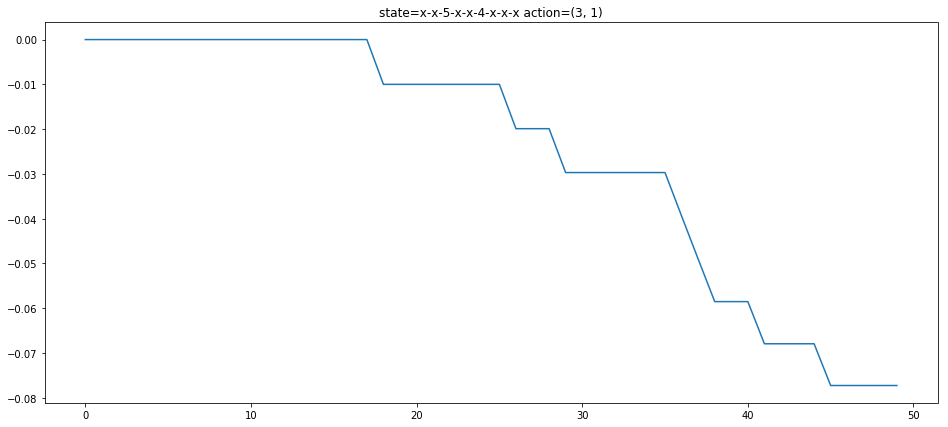

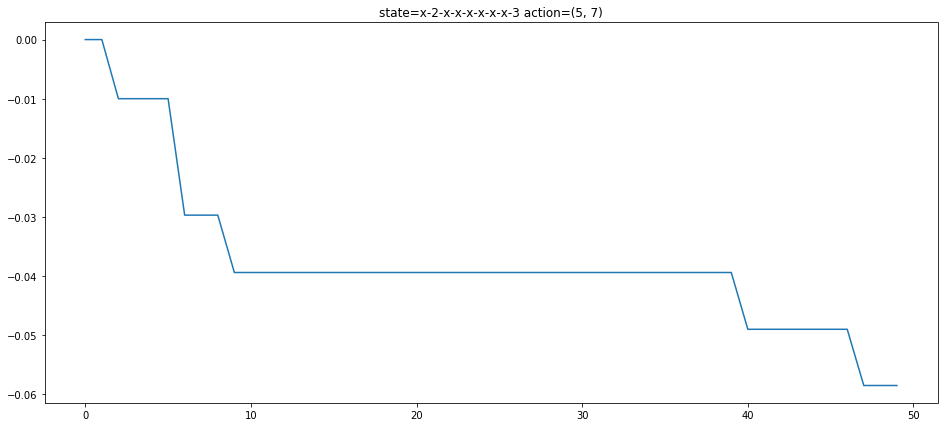

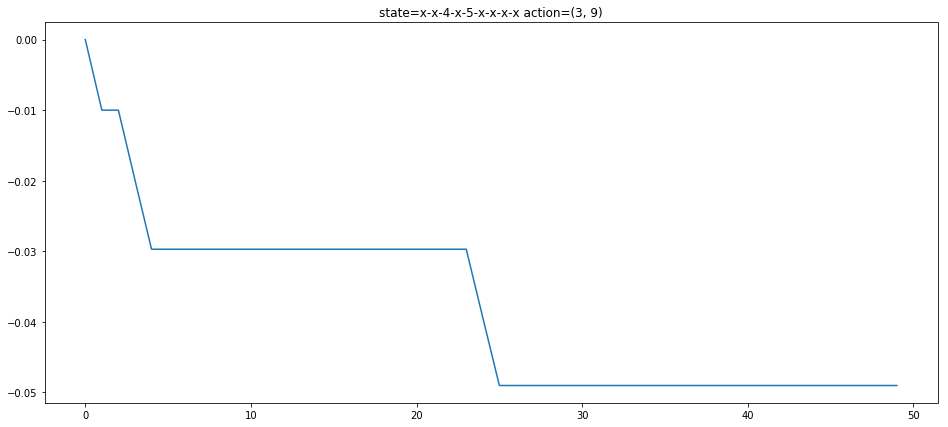

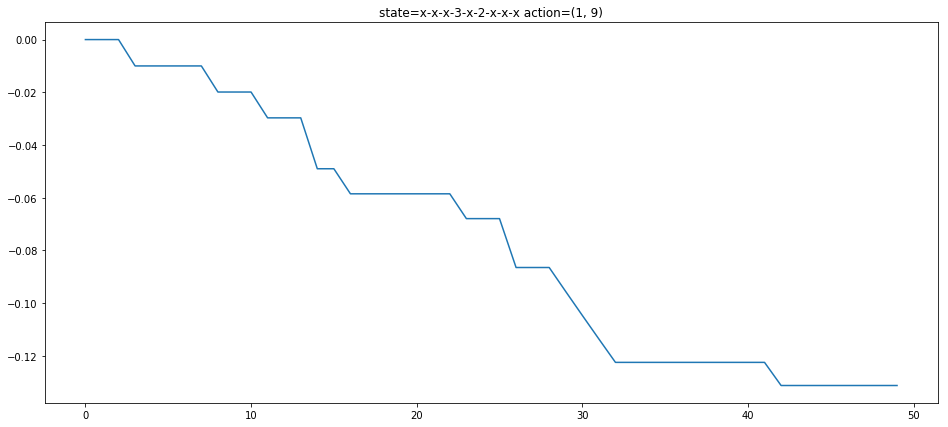

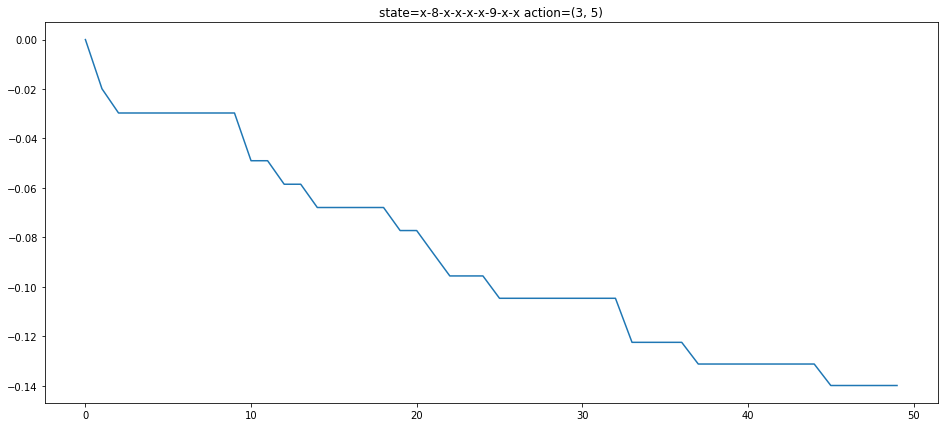

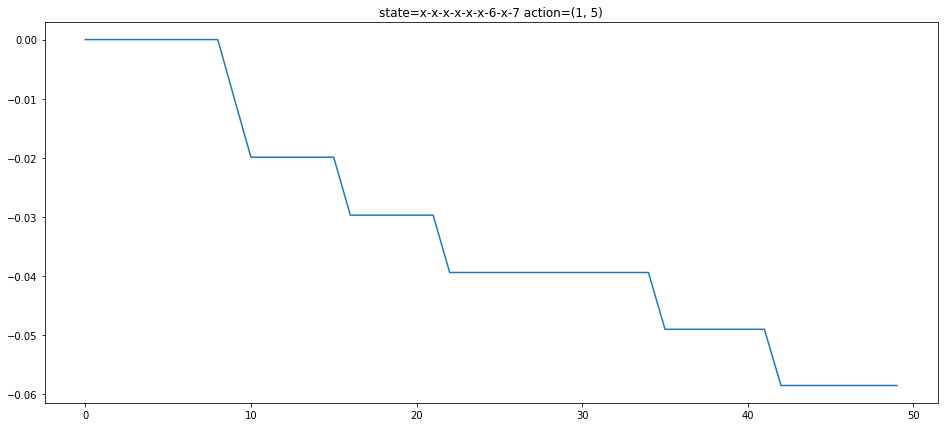

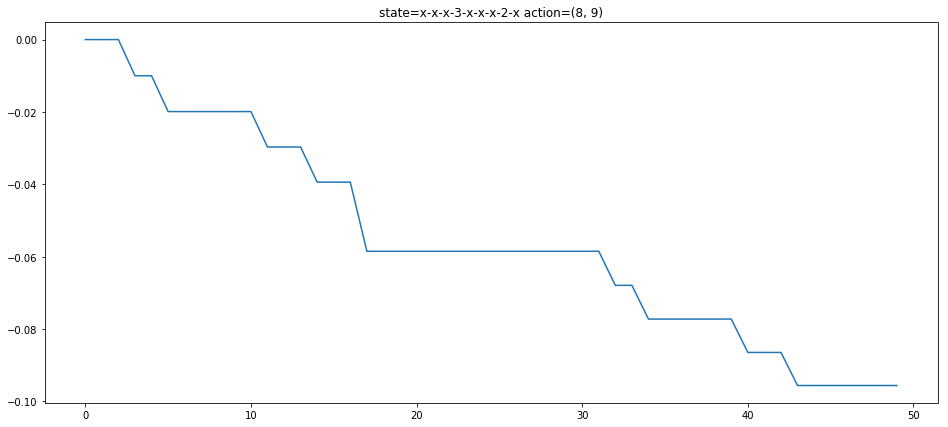

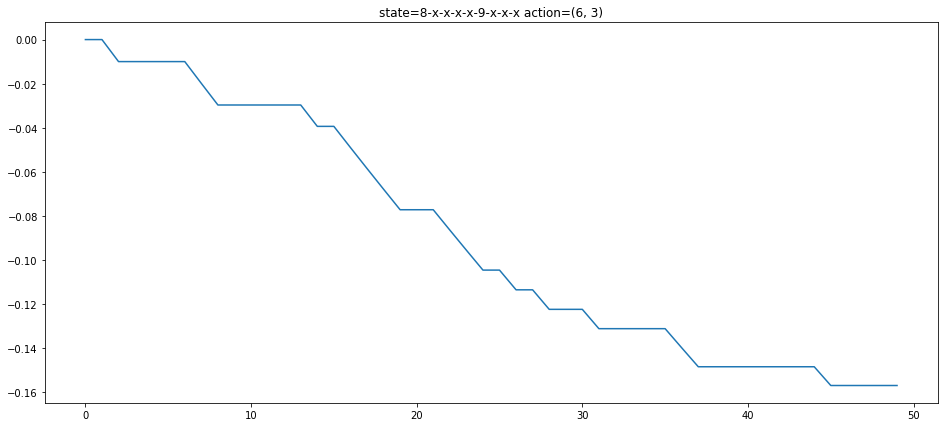

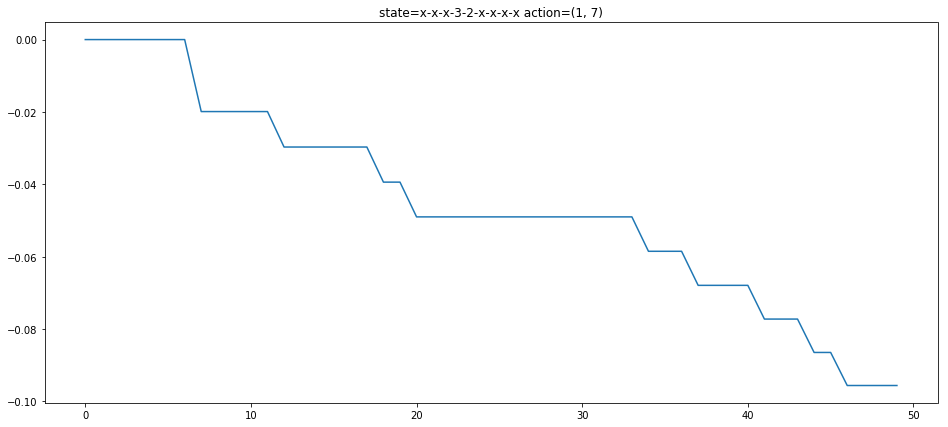

In [23]:

#print(type(xaxis))


j = 0

for i in range(1, 10):
    plt.figure(j, figsize=(16, 7))
    state1 = sample_q_values[i][0]
    action1 = sample_q_values[i][1]
    xaxis = np.asarray(range(0, len(States_track[state1][action1])))
    plt.title('state={0} action={1}'.format(state1, action1))
    plt.plot(xaxis,np.asarray(States_track[state1][action1]))
    j = (j + 1) % 9
    plt.show()

### Epsilon - decay check

In [21]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

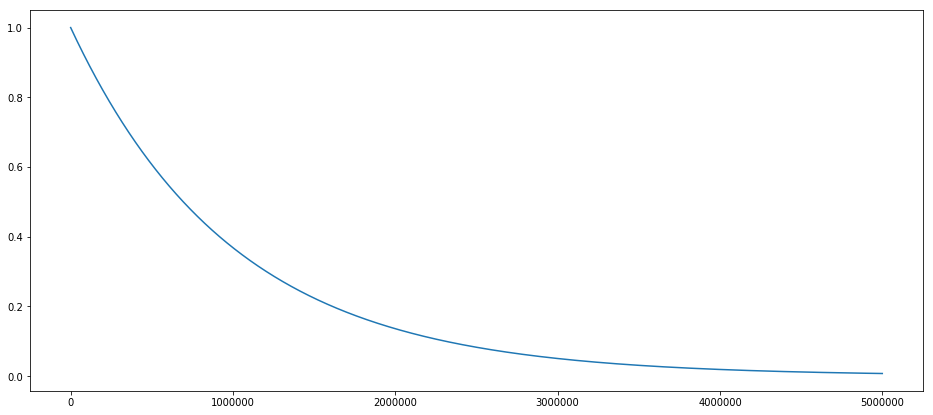

In [22]:
plt.plot(time, epsilon)
plt.show()